In [257]:
#Some imports
import numpy as np
import matplotlib.pyplot as plt
import random
import queue
import time

#Functions that will be very useful for creating/updating mazes

'''
Define the grid to be working with
            **inputs**
-dim = dimension size of the grid
-p = probability that a grid spot will be filled or open
            **returns**
-maze = the grid to be worked with
'''


def grid(dim, p):
    #start with a dim by dim zero array
    maze = np.zeros((dim,dim))
    for item in range(dim):
        for thing in range(dim):
            #makes sure the top left spot is empty
            if item == 0 and thing == 0:
                pass
            #makes sure the bottom right spot is empty
            elif item == dim - 1 and thing == dim - 1:
                pass
            #change the cells based off of the value of p and our random number, x
            else:
                x = random.random()
                #if our random number is less than p, then the cell will not be filled
                if p < x:
                    maze[item][thing] = 0
                #if our random number is greater than p, then the cell will  be filled
                else:
                    maze[item][thing] = 1
    #return the grid to be worked with
    return maze


'''
update the state of the maze after moving to the next tile
            **inputs**
-maze = the maze to be updated
-i = which row to update
-j = which column to update
'''


def update(maze, i, j):
    #shades the tile grey to distinguish between open and occupied
    maze[i][j] = 0.5


'''
Euclidean Heuristic (taking the square root resulted in issues regarding rounding float values)
This was resolved by just using the sum of the squares (still gives same results)
            **inputs**
-maze = the maze being worked with
-i = the current row to use in calculation
-j = the current column to use in calculation
            **returns**
-distance = the Euclidean distance
'''


def Euclidean(maze, i, j):
    x = [len(maze) - 1, len(maze) - 1]
    y = [i, j]
    distance = np.sqrt( (y[0]-x[0])**2 + (y[1]-x[1])**2 )
    return distance


'''
Manhattan Heuristic
            **inputs**
-maze = the maze being worked with
-i = the current row to use in calculation
-j = the current column to use in calculation
            **returns**
-distance = the Manhattan distance
'''


def Manhattan(maze, i, j):
    distance = abs(len(maze)-1 - i) + abs(len(maze[0])-1 - j)
    return distance


'''
Create a grid to be worked on with an initial cell on fire
            **inputs**
-dim = the dimension size of the maze
-p = probability that a grid spot will be filled or open
            **returns**
-maze = the grid to be worked with
'''


def firegrid(dim, p):
    #start with a dim by dim zero array
    maze = np.zeros((dim,dim))
    for item in range(dim):
        for thing in range(dim):
            #makes sure the top left spot is empty
            if item == 0 and thing == 0:
                pass
            #makes sure the bottom right spot is empty
            elif item == dim - 1 and thing == dim - 1:
                pass
            #change the cells based off of the value of p and our random number
            else:
                x = random.random()
                #if our random number is less than p, then the cell will not be filled
                if p < x:
                    maze[item][thing] = 0
                #if our random number is greater than p, then the cell will  be filled
                else:
                    maze[item][thing] = 1
    #return the grid to be worked with

    r = random.randrange(0,dim-1,1)
    s = random.randrange(0,dim-1,1)
    if maze[r][s]==0:
        maze[r][s]=0.75
    else:
        while maze[r][s]==1:
            r = random.randrange(0,dim-1,1)
            s = random.randrange(0,dim-1,1)
        maze[r][s]=0.75

    return maze


'''
Count the number of neighbors on fire
            **inputs**
-maze = the maze being worked with
-i = the current row to use in calculation
-j = the current column to use in calculation
-dim = the dimension size of the maze being worked with
            **returns**
-k = the number of neighbors on fire
'''


def countFires(maze, i, j, dim):
    k=0
    if i!= dim-1 and maze[i+1][j]==0.75:
        k+=1
    if j!= dim-1 and maze[i][j+1]==0.75:
        k+=1
    if i!=0 and maze[i-1][j]==0.75:
        k+=1
    if j!=0 and maze[i][j-1]==0.75:
        k+=1
    return k


'''
Probabilistically update the fire state of every cell depending on the number of neighboring cells on fire
            **inputs**
-maze = the maze being worked with
-q = a number between 0 and 1, dictating the rate that the fire spreads
            **returns**
-maze = the updated maze
'''


def updateFire(maze, q, dim):
    for item in range(dim):
        for thing in range(dim):
            k = countFires(maze, item, thing, dim)
            #print(k)
            p = 1-((1-q)**k)
            x = random.random()
            if p > x and maze[item][thing]==0:
                maze[item][thing] = 0.75
    return maze


'''
Fire heuristic that accounts for probability of a cell being on fire 
            **inputs**
-maze = the maze being worked with
-i = the current row to use in calculation
-j = the current column to use in calculation
-q = a number between 0 and 1, dictating the rate that the fire spreads
            **returns**
-distance = the Manhattan distance with added probability a neighboring cell is going to catch on fire
'''


def firemanhattan(maze, i, j, q):
    k = countFires(maze, i, j, len(maze))
    p = 1-((1-q)**k)
    distance = abs(len(maze)-1 - i) + abs(len(maze[0])-1 - j)+(len(maze)*p)
    return distance

In [220]:
'''
BFS Search Algorithm
            **inputs**
-maze = a dim x dim array to be worked with
-video = boolean variable to either show a live update of the maze or not
-show_final = boolean variable to either display the final solution or not
            **returns**
            
-solved = 1 if solved, 0 if not
-solution_length = integer value of the final solution length
x, y = BFS(grid(100, 0.3), video = False, show_final = True) #<----- BFS Example
'''

def BFS(maze, video, show_final):
    #initialize the solved state of the maze to be false and our pointers, i and j, to be at the beginning
    #i controls row and j controls column
    solved = False
    i, j = 0, 0
    #make a copy of the maze to be used to reconstruct the final path once a solution is found
    maze_final = np.copy(maze)
    #create a dictionary called prev to point to previous positions
    prev = {}
    
    #initialize the fringe (a queue) and store the starting point of the maze
    fringe = queue.Queue()
    fringe.put((i, j))
    
    if video == True:
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
    
    #runs until we reach the end
    while solved == False:
        #Is the maze unsolvable?
        if queue.Queue.qsize(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("UNSOLVABLE")
            #set the values of solved and solution_length to be zero
            solved = 0
            solution_length = 0
            break
        
        #gets the current node and update i and j
        current = fringe.get()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, if so, display the end result and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("SOLUTION FOUND")
            #set the values of solved to one and initialize solution_length to be zero
            solved = 1
            solution_length = 0
    
            #start to reconstruct the path back and increment solution_length
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
                
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            break
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringe.queue:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringe.put([i + 1, j])

        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringe.queue:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringe.put([i, j + 1])
        
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringe.queue:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringe.put([i - 1, j])
        
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringe.queue:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringe.put([i, j - 1])
        
        
        #after done checking, update the maze and keep going
        update(maze, i, j)
    
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
    
    if show_final == True:
           plt.figure(figsize=(10,10))
           plt.title("BFS", fontsize = 40)
           plt.imshow(maze_final, cmap=plt.cm.binary)
           plt.show()
    
    return solved, solution_length

In [ ]:
x, y = BFS(grid(75, 0.3), video = False, show_final = True)

In [221]:
'''
DFS Search Algorithm
            **inputs**
-maze = a dim x dim array to be worked with
-video = boolean variable to either show a live update of the maze or not
-show_final = boolean variable to either display the final solution or not
            **returns**
            
-solved = 1 if solved, 0 if not
-solution_length = integer value of the final solution length
-maxf = maximum size of the fringe during the search, to be used for local search
x, y, z = DFS(grid(100, 0.3), video = False, show_final = True) #<----- DFS Example
'''

def DFS(maze, video, show_final):
    ##########this is for local search only; if we enter in an unsolvable maze return 0##########
    if len(maze) == 0:
        return 0

    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    solved = False
    i, j = 0, 0
    #make a copy of the maze to be used to reconstruct the final path once a solution is found
    maze_final = np.copy(maze)
    #create a dictionary called prev to point to previous positions
    prev = {}
    #largest size of fringe; initialize to 0 
    maxf = 0 
    
    #initialize the fringe (a stack) and store the starting point of the maze
    fringe = []
    fringe.append((i, j))
    
    if video == True:
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
    
    #runs until we reach the end
    while solved == False:
        #update the max length of the fringe
        if len(fringe) > maxf: 
            maxf = len(fringe)
        else: 
            pass
        
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("UNSOLVABLE")
            #set the values of solved and solution_length to be zero
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, if so, display the end result and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("SOLUTION FOUND")
            #set the values of solved to one and initialize solution_length to be zero
            solved = 1
            solution_length = 0
            
            #start to reconstruct the path back and increment solution_length
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            break
            
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringe:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringe.append([i, j - 1])
                    
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringe:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringe.append([i - 1, j])
                    
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringe:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringe.append([i, j + 1])
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringe:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringe.append([i + 1, j])        
        
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
        
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)

    if video == True:
        plt.show()
        
    if show_final == True:
           plt.figure(figsize=(10,10))
           plt.title("DFS", fontsize = 40)
           plt.imshow(maze_final, cmap=plt.cm.binary)
           plt.show()
        
    return solved, solution_length, maxf

In [ ]:
x, y, z = DFS(grid(75, 0.3), video = False, show_final = True)

In [222]:
'''
BiBFS Search Algorithm
            **inputs**
-maze = a dim x dim array to be worked with
-video = boolean variable to either show a live update of the maze or not
-show_final = boolean variable to either display the final solution or not
            **returns**
            
-solved = 1 if solved, 0 if not
-solution_length = integer value of the final solution length
x, y = BiBFS(grid(100, 0.3), video = False, show_final = True) #<----- BiBFS Example
'''

def BiBFS(maze, video, show_final):
    #initialized state is set to false
    #i,j-->row,column from start m,n-->row,column from end
    solved=False
    i,j=0,0
    m,n=len(maze)-1,len(maze[0])-1
    #make a copy of the maze to be used to reconstruct the final path once a solution is found
    maze_final=np.copy(maze)
    #create two dictionaries, one to backtrack one way, one to backtrack the other way
    prev={}
    prev2={}
    
    #initialize fringe for starting point and fringe for ending point
    fringeStart=queue.Queue()
    fringeStart.put([i,j])
    fringeEnd=queue.Queue()
    fringeEnd.put([m,n])
    
    #run loop until start and end meet or no solution
    while solved==False:
        #if maze is still unsolved and there are no more children left in fringe, maze is unsolvable
        if (queue.Queue.qsize(fringeStart)==0 or queue.Queue.qsize(fringeEnd)==0):
            #update state of maze, display result, then break loop
            update(maze,i,j)
            update(maze,m,n)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("UNSOLVABLE")
            #set the values of solved and solution_length to be zero
            solved = 0
            solution_length = 0
            break
            
        #gets current node and updates i,j and m,n
        currentStart=fringeStart.get()
        currentEnd=fringeEnd.get()
        i,j=currentStart[0],currentStart[1]
        m,n=currentEnd[0],currentEnd[1]
        
        #check if start and end meet in middle, if so, display result and break loop
        if (i+1,j) in prev2:
            m, n = i+1, j
            solved = True
            
        if (i,j+1) in prev2:
            m, n = i, j+1
            solved = True
            
        if (i-1,j) in prev2:
            m, n = i-1, j
            solved = True
            
        if (i,j-1) in prev2:
            m,n = i, j-1
            solved = True
        
        if solved == True:
            update(maze,i,j)
            update(maze,m,n)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("SOLUTION FOUND")
            #set the values of solved to one and initialize solution_length
            solved = 1
            solution_length = 1
            
            #start to reconstruct the path back and increment solution_length
            update(maze_final,i,j)
            update(maze_final,m,n)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)

            while True:
                if i==0 and j==0 and m==len(maze)-1 and n==len(maze[0])-1:
                    break

                #Conditions to make sure maze reconstructs properly
                
                if (i,j) == (0,0):
                    y=prev2[(m,n)]
                    m,n=y[0],y[1]
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 1
                    
                elif (m,n) == (len(maze)-1, len(maze[0])-1):
                    x=prev[(i,j)]
                    i,j=x[0],x[1]
                    update(maze_final,i,j)
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 1
                    
                else:
                    x=prev[(i,j)]
                    y=prev2[(m,n)]
                    i,j=x[0],x[1]
                    m,n=y[0],y[1]
                    update(maze_final,i,j)
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 2
                        

            update(maze_final,0,0)
            update(maze_final,len(maze)-1,len(maze[0])-1)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)

            break
            
        #check down position of i,j
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringeStart.queue:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringeStart.put([i + 1, j])
                    
        #check up position of m,n
        if m - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m - 1][n] == 1 or maze[m - 1][n] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m - 1, n] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m - 1, n)] = (m, n)
                    fringeEnd.put([m - 1, n])
                    
        #check right position of i,j
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringeStart.queue:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringeStart.put([i, j + 1])
                    
        #check left position of m,n
        if n - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m][n - 1] == 1 or maze[m][n - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m, n - 1] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m, n - 1)] = (m, n)
                    fringeEnd.put([m, n - 1])
                    
        #check up position of i,j
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringeStart.queue:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringeStart.put([i - 1, j])
                    
        #check down position of m,n
        if m + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m + 1][n] == 1 or maze[m + 1][n] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m + 1, n] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m + 1, n)] = (m, n)
                    fringeEnd.put([m + 1, n])
                    
        #check left position of i,j
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringeStart.queue:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringeStart.put([i, j - 1])
                    
        #check right position of m,n
        if n + 1 >= len(maze[m]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m][n + 1] == 1 or maze[m][n + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m, n + 1] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m, n + 1)] = (m, n)
                    fringeEnd.put([m, n + 1])
                    
        #after done checking, update maze and keep going
        update(maze, i, j)
        update(maze,m,n)
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
    if video == True:        
        plt.show()
    
    if show_final == True:
           plt.figure(figsize=(10,10))
           plt.title("BiBFS", fontsize = 40)
           plt.imshow(maze_final, cmap=plt.cm.binary)
           plt.show()
    
    return solved, solution_length

In [ ]:
x, y = BiBFS(grid(75, 0.3), video = False, show_final = True)

In [266]:
'''
A* Euclidean Search Algorithm
            **inputs**
-maze = a dim x dim array to be worked with
-video = boolean variable to either show a live update of the maze or not
-show_final = boolean variable to either display the final solution or not
            **returns**
            
-solved = 1 if solved, 0 if not
-solution_length = integer value of the final solution length
x, y = AstarE(grid(100, 0.3), video = False, show_final = True) #<----- AstarE Example
'''

def AstarE(maze, video, show_final):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    solved = False
    i, j = 0, 0
    #make a copy of the maze to be used to reconstruct the final path once a solution is found
    maze_final = np.copy(maze)
    #create a dictionary called prev to point to previous positions
    prev = {}
    #establish a counter to keep track of the number of moves made so far (is g(n))
    counter = 0
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append((i, j, counter + Euclidean(maze, i, j)))
    
    if video == True:
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
        
    #runs until we reach the end
    while solved == False:    
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.show()
            print("UNSOLVABLE")
            #set the values of solved and solution_length to be zero
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        counter = current[2] - Euclidean(maze, i, j) + 1
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            moves = current[2]
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("SOLUTION FOUND")
            #set the values of solved to one and initialize solution_length to be zero
            solved = 1
            solution_length = 0
            
            #start to reconstruct the path back and increment solution_length
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j, moves]
                i, j, moves = x[0], x[1], x[2]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
                
            break
       
        #check left solution
        
        #are we outside?
        
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                #If so, move on
                pass
            else:
                #check if already in fringe
                if (i, j - 1, counter + Euclidean(maze, i, j - 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j - 1, counter + Euclidean(maze, i, j - 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                        fringe.append((i, j - 1, counter + Euclidean(maze, i, j - 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i, j - 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j - 1, counter + Euclidean(maze, i, j - 1)))
                                    prev[(i, j - 1, counter + Euclidean(maze, i, j - 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                else:
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j - 1, counter + Euclidean(maze, i, j - 1)))
                                prev[(i, j - 1, counter + Euclidean(maze, i, j - 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                break 
                    
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i - 1, j, counter + Euclidean(maze, i - 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i - 1, j, counter + Euclidean(maze, i - 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                        fringe.append((i - 1, j, counter + Euclidean(maze, i - 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i - 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i - 1, j, counter + Euclidean(maze, i - 1, j)))
                                    prev[(i - 1, j, counter + Euclidean(maze, i - 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i - 1, j, counter + Euclidean(maze, i - 1, j)))
                                prev[(i - 1, j, counter + Euclidean(maze, i - 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                break
                                
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i, j + 1, counter + Euclidean(maze, i, j + 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j + 1, counter + Euclidean(maze, i, j + 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                        fringe.append((i, j + 1, counter + Euclidean(maze, i, j + 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i, j + 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j + 1, counter + Euclidean(maze, i, j + 1)))
                                    prev[(i, j + 1, counter + Euclidean(maze, i, j + 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j + 1, counter + Euclidean(maze, i, j + 1)))
                                prev[(i, j + 1, counter + Euclidean(maze, i, j + 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                break
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i + 1, j, counter + Euclidean(maze, i + 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i + 1, j, counter + Euclidean(maze, i + 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                        fringe.append((i + 1, j, counter + Euclidean(maze, i + 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i + 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i + 1, j, counter + Euclidean(maze, i + 1, j)))
                                    prev[(i + 1, j, counter + Euclidean(maze, i + 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i + 1, j, counter + Euclidean(maze, i + 1, j)))
                                prev[(i + 1, j, counter + Euclidean(maze, i + 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                break        
        
        #after done checking, update the maze and keep going
        update(maze, i, j)
        
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)

    if show_final == True:
           plt.figure(figsize=(10,10))
           plt.title("AstarE", fontsize = 40)
           plt.imshow(maze_final, cmap=plt.cm.binary)
           plt.show()
        
    return solved, solution_length

SOLUTION FOUND


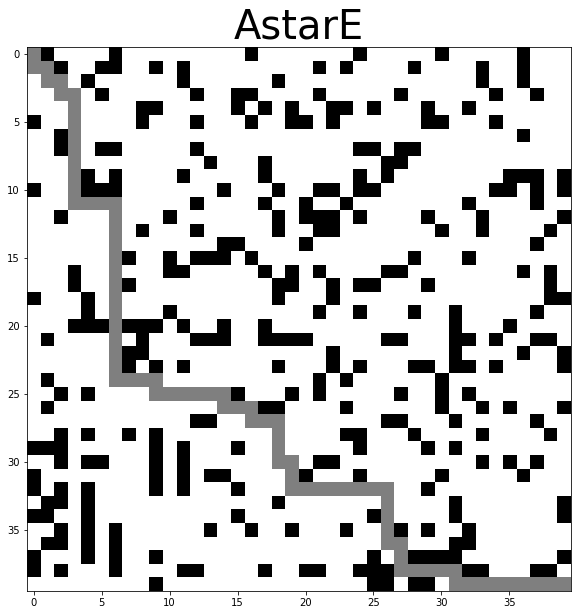

In [269]:
x, y = AstarE(grid(40, 0.2), video = False, show_final = True)

In [224]:
'''
A* Manhattan Search Algorithm
            **inputs**
-maze = a dim x dim array to be worked with
-video = boolean variable to either show a live update of the maze or not
-show_final = boolean variable to either display the final solution or not
            **returns**
            
-solved = 1 if solved, 0 if not
-solution_length = integer value of the final solution length
-maxNode = the total number of nodes expanded, to be used for local search
x, y, z = AstarM(grid(100, 0.3), video = False, show_final = True) #<----- AstarM Example
'''

def AstarM(maze, video, show_final):
    ##########this is for local search only; if we enter in an unsolvable maze return 0##########
    if len(maze) == 0:
        return 0       
    
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    solved = False
    i, j = 0, 0
    #make a copy of the maze to be used to reconstruct the final path once a solution is found
    maze_final = np.copy(maze)
    #create a dictionary called prev to point to previous positions
    prev = {}
    #establish a counter to keep track of the number of moves made so far (is g(n))
    counter = 0
    #all nodes explored. initialize to 0 
    maxNode=0
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append((i, j, counter + Manhattan(maze, i, j)))
    
    if video == True:
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
        
    #runs until we reach the end
    while solved == False:
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("UNSOLVABLE")
            #set the values of solved and solution_length to be zero
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j; update counter
        current = fringe.pop()
        #every time a node is explored, increase maxNode by 1 
        maxNode += 1
        i, j = current[0], current[1]
        counter = current[2] - Manhattan(maze, i, j) + 1
        
        #check if we have reached a solution, if so, display the end result and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            moves = current[2]
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            print("SOLUTION FOUND")
            #set the values of solved to one and initialize solution_length to be zero
            solved = 1
            solution_length = 0
            
            #start to reconstruct the path back and increment solution_length
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j, moves]
                i, j, moves = x[0], x[1], x[2]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
                
            break
       
        #check left solution
        
        #are we outside?
        
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                #If so, move on
                pass
            else:
                #check if already in fringe
                if (i, j - 1, counter + Manhattan(maze, i, j - 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j - 1, counter + Manhattan(maze, i, j - 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                        fringe.append((i, j - 1, counter + Manhattan(maze, i, j - 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i, j - 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j - 1, counter + Manhattan(maze, i, j - 1)))
                                    prev[(i, j - 1, counter + Manhattan(maze, i, j - 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                else:
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j - 1, counter + Manhattan(maze, i, j - 1)))
                                prev[(i, j - 1, counter + Manhattan(maze, i, j - 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                break
        
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i - 1, j, counter + Manhattan(maze, i - 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i - 1, j, counter + Manhattan(maze, i - 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                        fringe.append((i - 1, j, counter + Manhattan(maze, i - 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i - 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i - 1, j, counter + Manhattan(maze, i - 1, j)))
                                    prev[(i - 1, j, counter + Manhattan(maze, i - 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i - 1, j, counter + Manhattan(maze, i - 1, j)))
                                prev[(i - 1, j, counter + Manhattan(maze, i - 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                break
                                
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i, j + 1, counter + Manhattan(maze, i, j + 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j + 1, counter + Manhattan(maze, i, j + 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                        fringe.append((i, j + 1, counter + Manhattan(maze, i, j + 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i, j + 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j + 1, counter + Manhattan(maze, i, j + 1)))
                                    prev[(i, j + 1, counter + Manhattan(maze, i, j + 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j + 1, counter + Manhattan(maze, i, j + 1)))
                                prev[(i, j + 1, counter + Manhattan(maze, i, j + 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                break
                                
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i + 1, j, counter + Manhattan(maze, i + 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i + 1, j, counter + Manhattan(maze, i + 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                        fringe.append((i + 1, j, counter + Manhattan(maze, i + 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i + 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i + 1, j, counter + Manhattan(maze, i + 1, j)))
                                    prev[(i + 1, j, counter + Manhattan(maze, i + 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i + 1, j, counter + Manhattan(maze, i + 1, j)))
                                prev[(i + 1, j, counter + Manhattan(maze, i + 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                break        
        
    
        #after done checking, update the maze and keep going
        update(maze, i, j)
        
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
        
    if show_final == True:
           plt.figure(figsize=(10,10))
           plt.title("AstarM", fontsize = 40)
           plt.imshow(maze_final, cmap=plt.cm.binary)
           plt.show()
        
    return solved, solution_length, maxNode

In [ ]:
x, y, z = AstarM(grid(75, 0.3), video = False, show_final = True)

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5


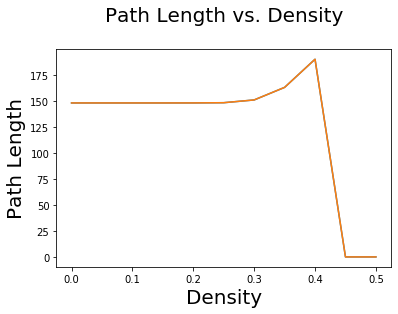

In [185]:
prob = np.linspace(0,0.5,11)
lenBFS=[]
ListtempB=[]
lenAstarM=[]
ListtempM=[]
for item in prob:
    for x in range(0,100):
        mazeB = grid(75, item)
        mazeM = np.copy(mazeB)
        
        tempB = BFS(mazeB, video=False, show_final = False)
        tempM = AstarM(mazeM, video=False, show_final = False)
        
        if tempB[0] == 0:
            pass
        else:
            ListtempB.append(tempB[1])
            
        if tempM[0] == 0:
            pass
        else:
            ListtempM.append(tempM[1])
            
            
    if len(ListtempB) == 0:
        lenBFS.append(0)
    else:
        lenBFS.append(sum(ListtempB)/len(ListtempB))
        
    if len(ListtempM) == 0:
        lenAstarM.append(0)
    else:
        lenAstarM.append(sum(ListtempM)/len(ListtempM))
        
    ListtempB=[]
    ListtempM=[]

    print(item)
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.xlabel('Density',fontsize=20)
plt.ylabel('Path Length',fontsize=20)
plt.title("Path Length vs. Density\n", fontsize = 20)
plt.plot(prob, lenBFS,linewidth=1.5, label = 'BFS')
plt.plot(prob, lenAstarM,linewidth=1.5, label = 'AstarM')
plt.legend(loc='upper right')
plt.show()



In [ ]:
prob = np.linspace(0,0.5,11)
lenAstarM=[]
Listtemp=[]
start_time = time.time()
for item in prob:
    for x in range(0,100):
        temp = AstarM(grid(100, item), video=False)
        if temp[0] == 0:
            pass
        else:
            Listtemp.append(temp[1])
    if len(Listtemp) == 0:
        lenAstarM.append(0)
    else:
        lenAstarM.append(sum(Listtemp)/len(Listtemp))
    print(item)
    Listtemp=[]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.xlabel('Density',fontsize=20)
plt.ylabel('Path Length',fontsize=20)
plt.title("Path Length vs. Density\n", fontsize = 20)
plt.plot(prob, lenAstarM,linewidth=1.5)
plt.show()
print("Time took:", (time.time() - start_time))

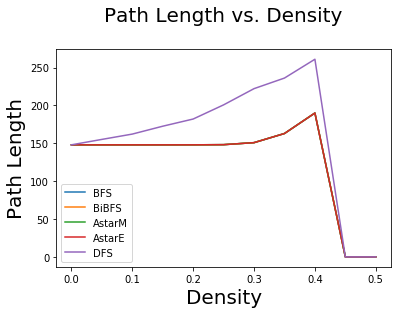

In [190]:
plt.xlabel('Density',fontsize=20)
plt.ylabel('Path Length',fontsize=20)
plt.title("Path Length vs. Density\n", fontsize = 20)
#plt.plot(prob, lenAstarM, label = 'A*M')
#plt.plot(prob, lenAstarE, label = 'A*E')
plt.plot(prob, lenBFS, label = 'BFS')
plt.plot(prob, lenBFS, label = 'BiBFS')
plt.plot(prob, lenBFS, label = 'AstarM')
plt.plot(prob, lenBFS, label = 'AstarE')

plt.plot(prob, lenDFS, label = 'DFS')
#plt.plot(prob, lenBiBFS, label = 'BiBFS')
plt.legend(loc='lower left')
plt.show()

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5


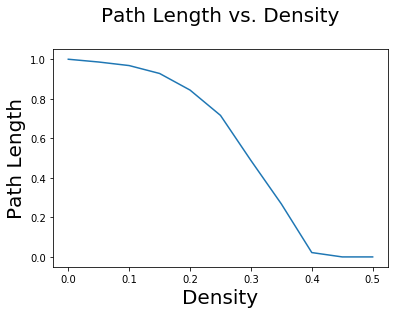

In [192]:
prob = np.linspace(0,0.5,11)
solvAstarM=[]
Listtemp=[]
for item in prob:
    for x in range(0,500):
        temp = AstarM(grid(75, item), video=False, show_final = False)
        Listtemp.append(temp[0])
    
    solvAstarM.append(sum(Listtemp)/len(Listtemp))
    print(item)
    Listtemp=[]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.xlabel('Density',fontsize=20)
plt.ylabel('Path Length',fontsize=20)
plt.title("Path Length vs. Density\n", fontsize = 20)
plt.plot(prob, solvAstarM,linewidth=1.5)
plt.show()

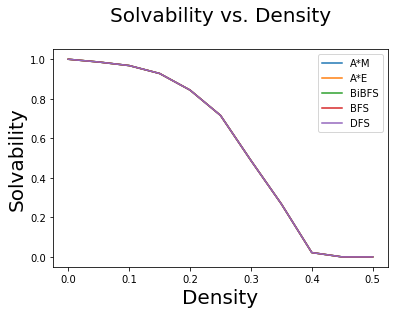

In [193]:
plt.xlabel('Density',fontsize=20)
plt.ylabel('Solvability',fontsize=20)
plt.title("Solvability vs. Density\n", fontsize = 20)
plt.plot(prob, solvAstarM, label = 'A*M')
plt.plot(prob, solvAstarM, label = 'A*E')
plt.plot(prob, solvAstarM, label = 'BiBFS')
plt.plot(prob, solvAstarM, label = 'BFS')
plt.plot(prob, solvAstarM, label = 'DFS')
plt.legend(loc='upper right')
plt.show()


In [272]:
dim = [10,20,30,40,50,60,70]
timeAstarM=[]
timeAstarE=[]
ListtempM=[]
ListtempE=[]

for item in dim:
    for x in range(0,20):
        start_time = time.time()
        AstarM(grid(item, 0.2), video=False, show_final = False)
        tempM = time.time() - start_time
        
        start_time = time.time()
        AstarE(grid(item, 0.2), video=False, show_final = False)
        tempE = time.time() - start_time

        ListtempM.append(tempM)
        ListtempE.append(tempE)

    
    timeAstarM.append(sum(ListtempM)/len(ListtempM))
    timeAstarE.append(sum(ListtempE)/len(ListtempE))

    print(item)
    ListtempM=[]
    ListtempE=[]



SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
SOLUTION FOUND
UNSOLVABLE
10
SOLUTION FOUND
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
UNSOLVABLE
SOLUTION FOUND
SOLUTION FOUND
SOLUTION FOUND
SO

KeyError: (13, 19, 50.867962264113174)

[0.0004941344261169434, 0.013182830810546876, 0.0014278888702392578, 0.14921126365661622, 0.1477433919906616, 0.38437228202819823, 0.7758140444755555]
[0.0004064679145812988, 0.0015427470207214355, 0.005782186985015869, 0.014854645729064942, 0.011553490161895752, 0.05136672258377075, 0.03870478868484497]


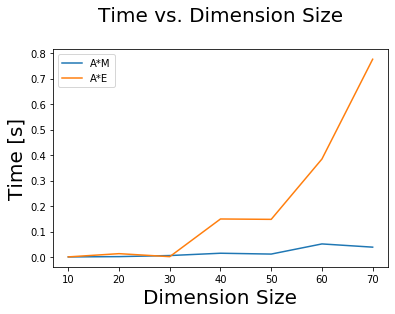

In [251]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

print(timeAstarE)
print(timeAstarM)

plt.xlabel('Dimension Size',fontsize=20)
plt.ylabel('Time [s]',fontsize=20)
plt.title("Time vs. Dimension Size\n", fontsize = 20)
plt.plot(dim, timeAstarM, linewidth=1.5, label = 'A*M')
plt.plot(dim, timeAstarE, linewidth=1.5, label = 'A*E')
plt.legend(loc='upper left')
plt.show()

In [194]:
'''
A* Euclidean Search Algorithm

            **inputs**

-maze = a dim x dim array to be worked with
-video = boolean variable to either show a live update of the maze or not

            **returns**
            
-solved = 1 if solved, 0 if not
-solution_length = integer value of the final solution length
'''

def AstarE(maze, video, show_final):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    solved = False
    i, j = 0, 0
    #make a copy of the maze to be used to reconstruct the final path once a solution is found
    maze_final = np.copy(maze)
    #create a dictionary called prev to point to previous positions
    prev = {}
    #establish a counter to keep track of the number of moves made so far (is g(n))
    counter = 0
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append((i, j, counter + Euclidean(maze, i, j)))
    
    if video == True:
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
        
    #runs until we reach the end
    while solved == False:    
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.show()
            #print("UNSOLVABLE")
            #set the values of solved and solution_length to be zero
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        counter = current[2] - Euclidean(maze, i, j) + 1
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            moves = current[2]
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("SOLUTION FOUND")
            #set the values of solved to one and initialize solution_length to be zero
            solved = 1
            solution_length = 0
            
            #start to reconstruct the path back and increment solution_length
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j, moves]
                i, j, moves = x[0], x[1], x[2]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
                
            break
       
        #check left solution
        
        #are we outside?
        
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                #If so, move on
                pass
            else:
                #check if already in fringe
                if (i, j - 1, counter + Euclidean(maze, i, j - 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j - 1, counter + Euclidean(maze, i, j - 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                        fringe.append((i, j - 1, counter + Euclidean(maze, i, j - 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i, j - 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j - 1, counter + Euclidean(maze, i, j - 1)))
                                    prev[(i, j - 1, counter + Euclidean(maze, i, j - 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                else:
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j - 1, counter + Euclidean(maze, i, j - 1)))
                                prev[(i, j - 1, counter + Euclidean(maze, i, j - 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                break 
                    
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i - 1, j, counter + Euclidean(maze, i - 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i - 1, j, counter + Euclidean(maze, i - 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                        fringe.append((i - 1, j, counter + Euclidean(maze, i - 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i - 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i - 1, j, counter + Euclidean(maze, i - 1, j)))
                                    prev[(i - 1, j, counter + Euclidean(maze, i - 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i - 1, j, counter + Euclidean(maze, i - 1, j)))
                                prev[(i - 1, j, counter + Euclidean(maze, i - 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                break
                                
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i, j + 1, counter + Euclidean(maze, i, j + 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j + 1, counter + Euclidean(maze, i, j + 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                        fringe.append((i, j + 1, counter + Euclidean(maze, i, j + 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i, j + 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j + 1, counter + Euclidean(maze, i, j + 1)))
                                    prev[(i, j + 1, counter + Euclidean(maze, i, j + 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j + 1, counter + Euclidean(maze, i, j + 1)))
                                prev[(i, j + 1, counter + Euclidean(maze, i, j + 1))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                break
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i + 1, j, counter + Euclidean(maze, i + 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i + 1, j, counter + Euclidean(maze, i + 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                        fringe.append((i + 1, j, counter + Euclidean(maze, i + 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i + 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i + 1, j, counter + Euclidean(maze, i + 1, j)))
                                    prev[(i + 1, j, counter + Euclidean(maze, i + 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i + 1, j, counter + Euclidean(maze, i + 1, j)))
                                prev[(i + 1, j, counter + Euclidean(maze, i + 1, j))] = (i, j, counter - 1 + Euclidean(maze, i, j))
                                break        
        
        #after done checking, update the maze and keep going
        update(maze, i, j)
        
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)

    if show_final == True:
        plt.figure(figsize=(7,7))
        plt.title("A*-Euclidean", fontsize = 40)
        plt.imshow(maze_final, cmap=plt.cm.binary)
        plt.show()
        
    return solved, solution_length

#x, y = AstarE(grid(100, 0.3), video = False) <----- example of how to run AstarE

In [120]:
x, y = AstarE(grid(100, 0.3), video = False)

SOLUTION FOUND


In [195]:
'''
A* Manhattan Search Algorithm

            **inputs**

-maze = a dim x dim array to be worked with
-video = boolean variable to either show a live update of the maze or not

            **returns**
            
-solved = 1 if solved, 0 if not
-solution_length = integer value of the final solution length
-maxNode = the total number of nodes expanded, to be used for local search
'''

def AstarM(maze, video, show_final):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    solved = False
    i, j = 0, 0
    #make a copy of the maze to be used to reconstruct the final path once a solution is found
    maze_final = np.copy(maze)
    #create a dictionary called prev to point to previous positions
    prev = {}
    #establish a counter to keep track of the number of moves made so far (is g(n))
    counter = 0
    #all nodes explored. initialize to 0 
    maxNode=0
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append((i, j, counter + Manhattan(maze, i, j)))
    
    if video == True:
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
        
    #runs until we reach the end
    while solved == False:
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("UNSOLVABLE")
            #set the values of solved and solution_length to be zero
            solved = 0
            solution_length = 0
            break
            
        #gets the current node and update i and j; update counter
        current = fringe.pop()
        #every time a node is explored, increase maxNode by 1 
        maxNode += 1
        i, j = current[0], current[1]
        counter = current[2] - Manhattan(maze, i, j) + 1
        
        #check if we have reached a solution, if so, display the end result and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            moves = current[2]
            update(maze, i , j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("SOLUTION FOUND")
            #set the values of solved to one and initialize solution_length to be zero
            solved = 1
            solution_length = 0
            
            #start to reconstruct the path back and increment solution_length
            update(maze_final, i, j)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j, moves]
                i, j, moves = x[0], x[1], x[2]
                update(maze_final, i, j)
                if video == True:
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                solution_length += 1
            
            update(maze_final, 0, 0)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
                
            break
       
        #check left solution
        
        #are we outside?
        
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                #If so, move on
                pass
            else:
                #check if already in fringe
                if (i, j - 1, counter + Manhattan(maze, i, j - 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j - 1, counter + Manhattan(maze, i, j - 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                        fringe.append((i, j - 1, counter + Manhattan(maze, i, j - 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i, j - 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j - 1, counter + Manhattan(maze, i, j - 1)))
                                    prev[(i, j - 1, counter + Manhattan(maze, i, j - 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                else:
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j - 1, counter + Manhattan(maze, i, j - 1)))
                                prev[(i, j - 1, counter + Manhattan(maze, i, j - 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                break
        
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i - 1, j, counter + Manhattan(maze, i - 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i - 1, j, counter + Manhattan(maze, i - 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                        fringe.append((i - 1, j, counter + Manhattan(maze, i - 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i - 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i - 1, j, counter + Manhattan(maze, i - 1, j)))
                                    prev[(i - 1, j, counter + Manhattan(maze, i - 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i - 1, j, counter + Manhattan(maze, i - 1, j)))
                                prev[(i - 1, j, counter + Manhattan(maze, i - 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                break
                                
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i, j + 1, counter + Manhattan(maze, i, j + 1)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j + 1, counter + Manhattan(maze, i, j + 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                        fringe.append((i, j + 1, counter + Manhattan(maze, i, j + 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i, j + 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j + 1, counter + Manhattan(maze, i, j + 1)))
                                    prev[(i, j + 1, counter + Manhattan(maze, i, j + 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j + 1, counter + Manhattan(maze, i, j + 1)))
                                prev[(i, j + 1, counter + Manhattan(maze, i, j + 1))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                break
                                
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if (i + 1, j, counter + Manhattan(maze, i + 1, j)) in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i + 1, j, counter + Manhattan(maze, i + 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                        fringe.append((i + 1, j, counter + Manhattan(maze, i + 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i + 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i + 1, j, counter + Manhattan(maze, i + 1, j)))
                                    prev[(i + 1, j, counter + Manhattan(maze, i + 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i + 1, j, counter + Manhattan(maze, i + 1, j)))
                                prev[(i + 1, j, counter + Manhattan(maze, i + 1, j))] = (i, j, counter - 1 + Manhattan(maze, i, j))
                                break        
        
    
        #after done checking, update the maze and keep going
        update(maze, i, j)
        
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
        
    if show_final == True:
    #show the final state of the maze whether video is True of False
        plt.figure(figsize=(7,7))
        plt.title("A*-Manhattan", fontsize = 40)
        plt.imshow(maze_final, cmap=plt.cm.binary)
        plt.show()
        
    return solved, solution_length, maxNode

#x, y, z = AstarM(grid(100, 0.3), video = False) <----- example of how to run AstarM

UNSOLVABLE


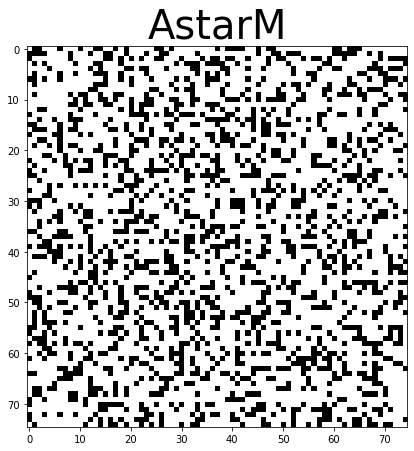

In [145]:
x, y, z = AstarM(grid(75, 0.3), video = False)

In [167]:
'''
BiBFS Search Algorithm

            **inputs**

-maze = a dim x dim array to be worked with
-video = boolean variable to either show a live update of the maze or not

            **returns**
            
-solved = 1 if solved, 0 if not
-solution_length = integer value of the final solution length
'''

def BiBFS(maze, video, show_final):
    #initialized state is set to false
    #i,j-->row,column from start m,n-->row,column from end
    solved=False
    i,j=0,0
    m,n=len(maze)-1,len(maze[0])-1
    #make a copy of the maze to be used to reconstruct the final path once a solution is found
    maze_final=np.copy(maze)
    #create two dictionaries, one to backtrack one way, one to backtrack the other way
    prev={}
    prev2={}
    
    #initialize fringe for starting point and fringe for ending point
    fringeStart=queue.Queue()
    fringeStart.put([i,j])
    fringeEnd=queue.Queue()
    fringeEnd.put([m,n])
    
    #run loop until start and end meet or no solution
    while solved==False:
        #if maze is still unsolved and there are no more children left in fringe, maze is unsolvable
        if (queue.Queue.qsize(fringeStart)==0 or queue.Queue.qsize(fringeEnd)==0):
            #update state of maze, display result, then break loop
            update(maze,i,j)
            update(maze,m,n)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("UNSOLVABLE")
            #set the values of solved and solution_length to be zero
            solved = 0
            solution_length = 0
            break
            
        #gets current node and updates i,j and m,n
        currentStart=fringeStart.get()
        currentEnd=fringeEnd.get()
        i,j=currentStart[0],currentStart[1]
        m,n=currentEnd[0],currentEnd[1]
        
        #check if start and end meet in middle, if so, display result and break loop
        if (i+1,j) in prev2:
            m, n = i+1, j
            solved = True
            
        if (i,j+1) in prev2:
            m, n = i, j+1
            solved = True
            
        if (i-1,j) in prev2:
            m, n = i-1, j
            solved = True
            
        if (i,j-1) in prev2:
            m,n = i, j-1
            solved = True
        
        if solved == True:
            update(maze,i,j)
            update(maze,m,n)
            if video == True:
                plt.imshow(maze, cmap=plt.cm.binary)
                plt.pause(0.05)
            #print("SOLUTION FOUND")
            #set the values of solved to one and initialize solution_length
            solved = 1
            solution_length = 1
            
            #start to reconstruct the path back and increment solution_length
            update(maze_final,i,j)
            update(maze_final,m,n)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)

            while True:
                if i==0 and j==0 and m==len(maze)-1 and n==len(maze[0])-1:
                    break

                #Conditions to make sure maze reconstructs properly
                
                if (i,j) == (0,0):
                    y=prev2[(m,n)]
                    m,n=y[0],y[1]
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 1
                    
                elif (m,n) == (len(maze)-1, len(maze[0])-1):
                    x=prev[(i,j)]
                    i,j=x[0],x[1]
                    update(maze_final,i,j)
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 1
                    
                else:
                    x=prev[(i,j)]
                    y=prev2[(m,n)]
                    i,j=x[0],x[1]
                    m,n=y[0],y[1]
                    update(maze_final,i,j)
                    update(maze_final,m,n)
                    if video == True:
                        plt.imshow(maze_final, cmap=plt.cm.binary)
                        plt.pause(0.05)
                        
                    solution_length += 2
                        

            update(maze_final,0,0)
            update(maze_final,len(maze)-1,len(maze[0])-1)
            if video == True:
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)

            break
            
        #check down position of i,j
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringeStart.queue:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringeStart.put([i + 1, j])
                    
        #check up position of m,n
        if m - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m - 1][n] == 1 or maze[m - 1][n] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m - 1, n] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m - 1, n)] = (m, n)
                    fringeEnd.put([m - 1, n])
                    
        #check right position of i,j
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringeStart.queue:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringeStart.put([i, j + 1])
                    
        #check left position of m,n
        if n - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m][n - 1] == 1 or maze[m][n - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m, n - 1] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m, n - 1)] = (m, n)
                    fringeEnd.put([m, n - 1])
                    
        #check up position of i,j
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringeStart.queue:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringeStart.put([i - 1, j])
                    
        #check down position of m,n
        if m + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m + 1][n] == 1 or maze[m + 1][n] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m + 1, n] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m + 1, n)] = (m, n)
                    fringeEnd.put([m + 1, n])
                    
        #check left position of i,j
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringeStart.queue:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringeStart.put([i, j - 1])
                    
        #check right position of m,n
        if n + 1 >= len(maze[m]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m][n + 1] == 1 or maze[m][n + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m, n + 1] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m, n + 1)] = (m, n)
                    fringeEnd.put([m, n + 1])
                    
        #after done checking, update maze and keep going
        update(maze, i, j)
        update(maze,m,n)
        if video == True:
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
    if video == True:        
        plt.show()
    
    if show_final == True:
        #show the final state of the maze whether video is True of False
        plt.figure(figsize=(7,7))
        plt.title("BiBFS", fontsize = 40)
        plt.imshow(maze_final, cmap=plt.cm.binary)
        plt.show()
    
    return solved, solution_length

#x, y = BiBFS(grid(100, 0.3), video = False) <----- example of how to run BiBFS

SOLUTION FOUND


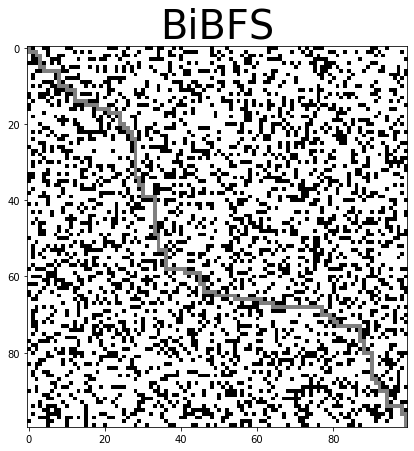

In [148]:
x, y = BiBFS(grid(100, 0.3), video = False)

SOLUTION FOUND


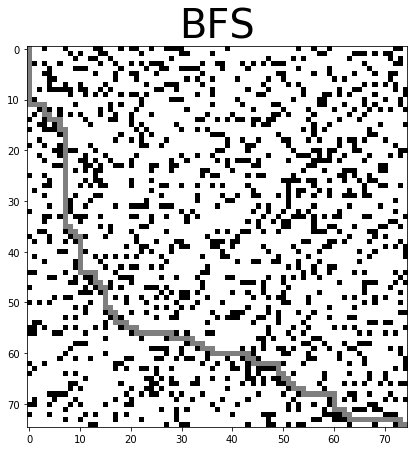

SOLUTION FOUND


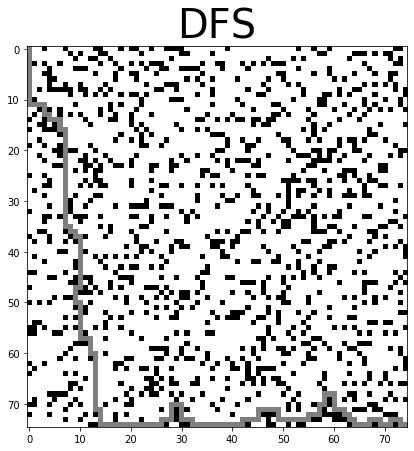

SOLUTION FOUND


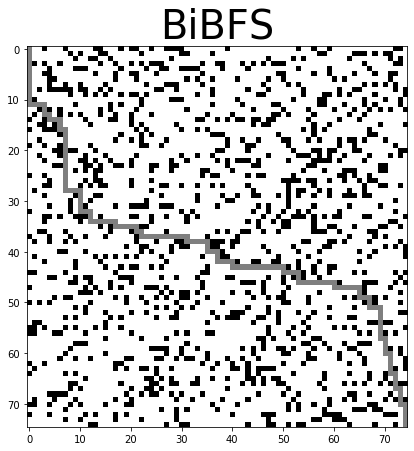

SOLUTION FOUND


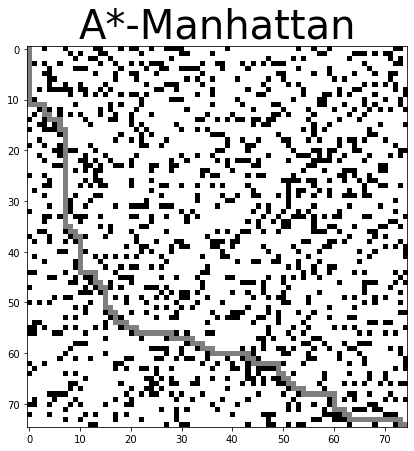

SOLUTION FOUND


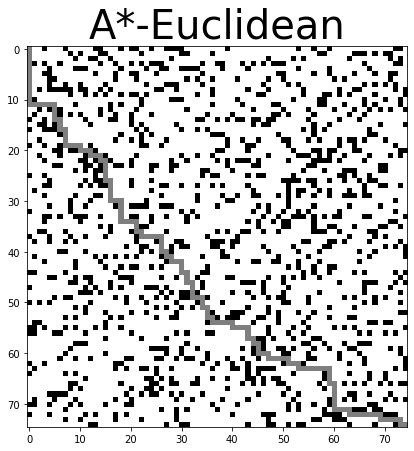

(1, 148)

In [158]:
#code to run final path comparisons
a = grid(75, 0.2)
b = np.copy(a)
c = np.copy(a)
d = np.copy(a)
e = np.copy(a)

BFS(a, video = False, show_final = True)
DFS(b, video = False, show_final = True)
BiBFS(c, video = False)
AstarM(d, video = False)
AstarE(e, video = False)



fails 0
SOLUTION FOUND


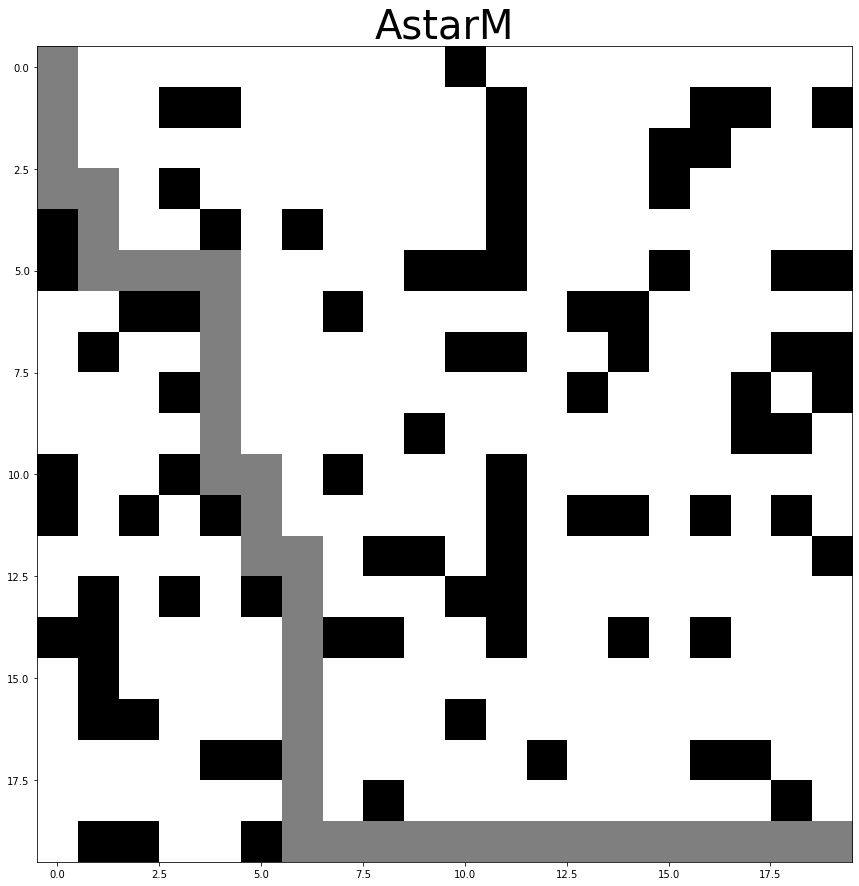

SOLUTION FOUND


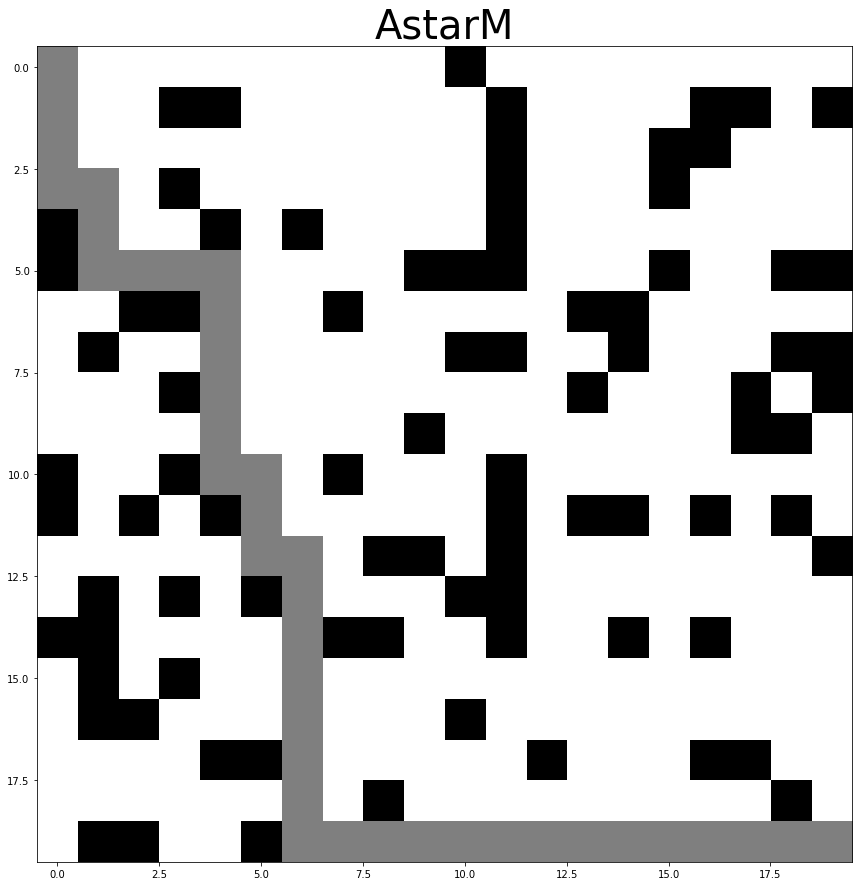

40 40
fails 0
SOLUTION FOUND


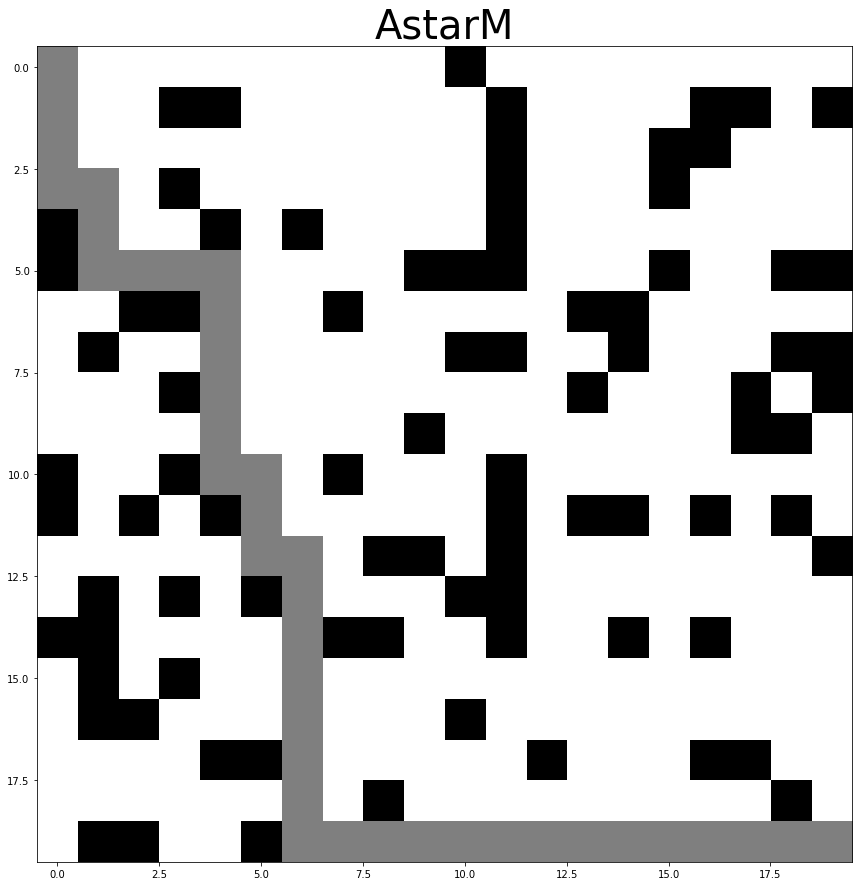

SOLUTION FOUND


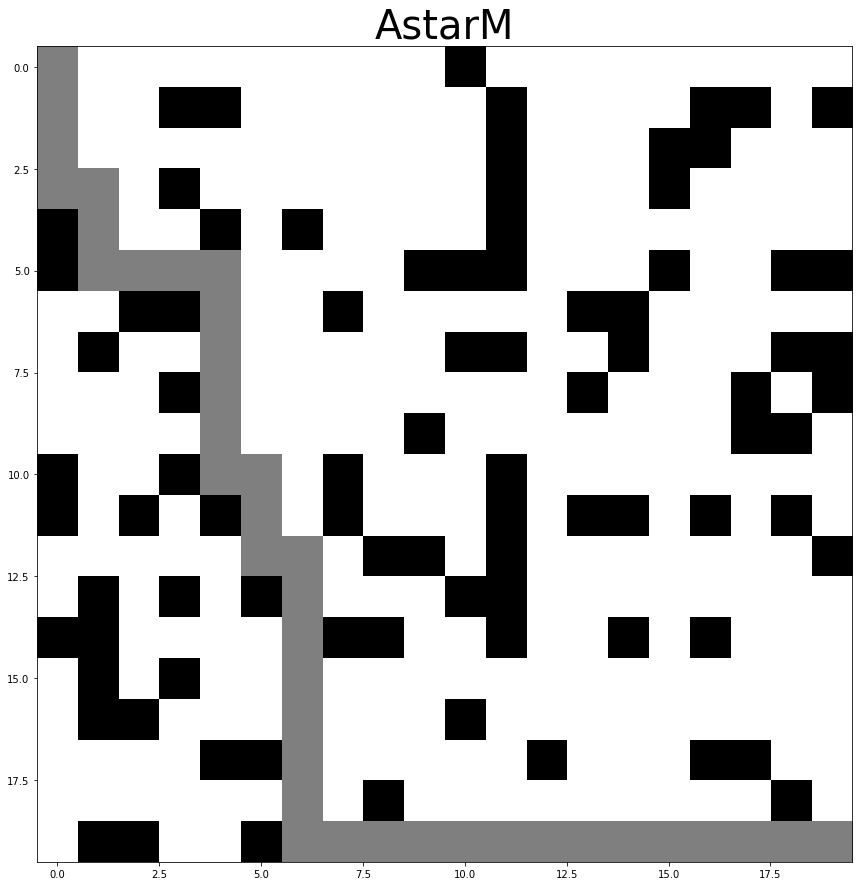

40 40
fails 0
SOLUTION FOUND


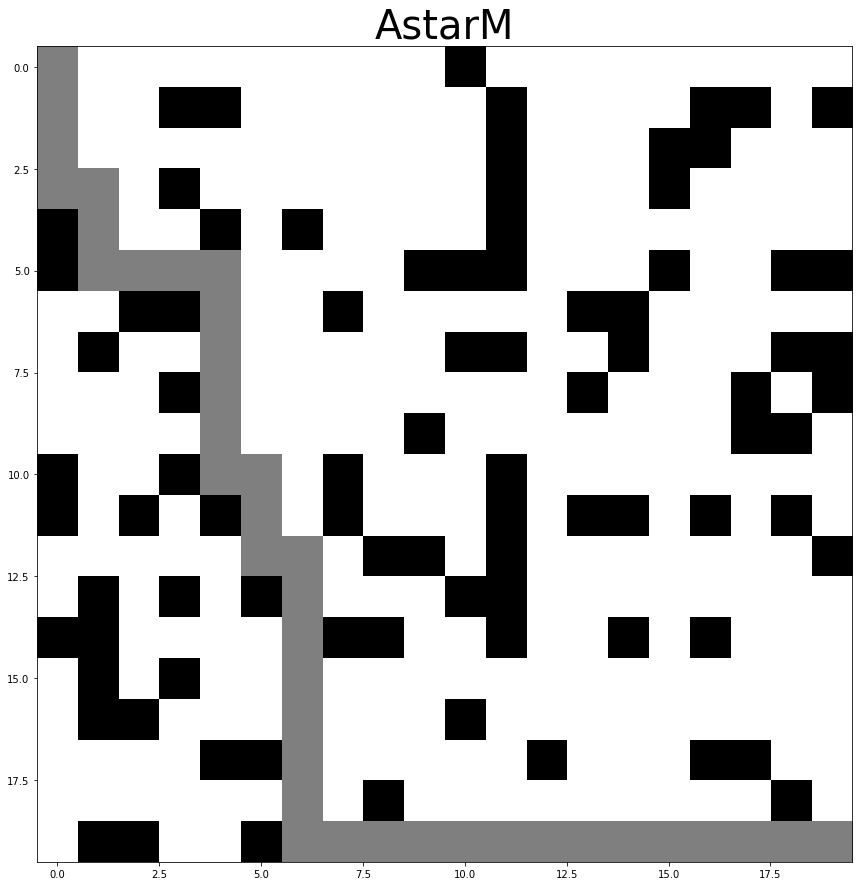

SOLUTION FOUND


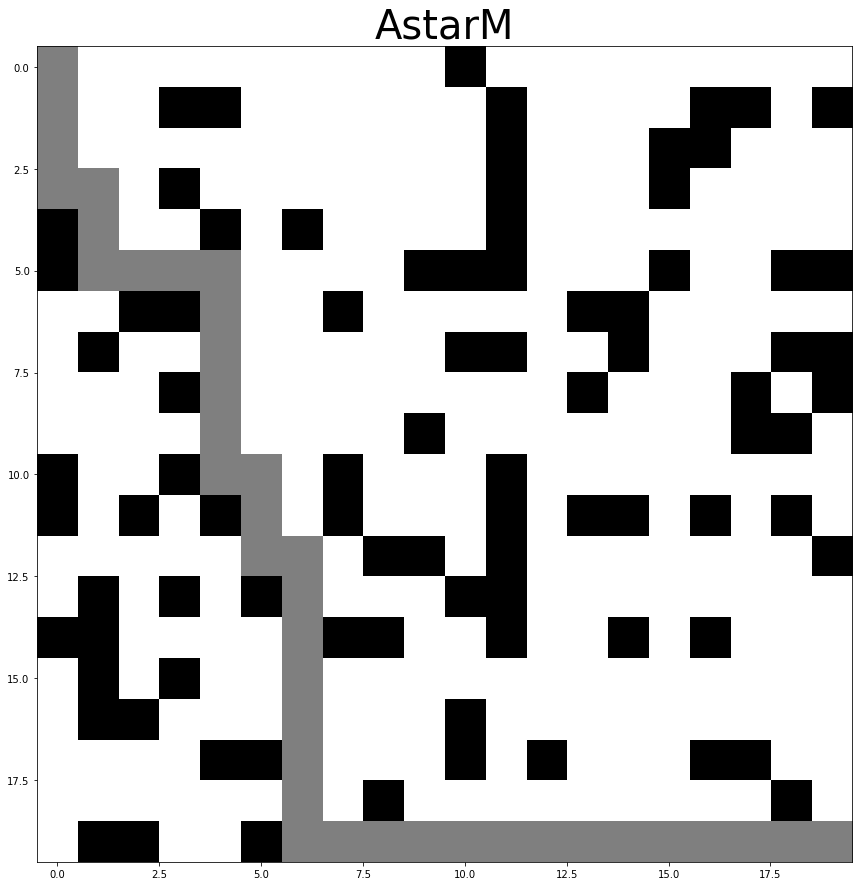

40 40
fails 0
SOLUTION FOUND


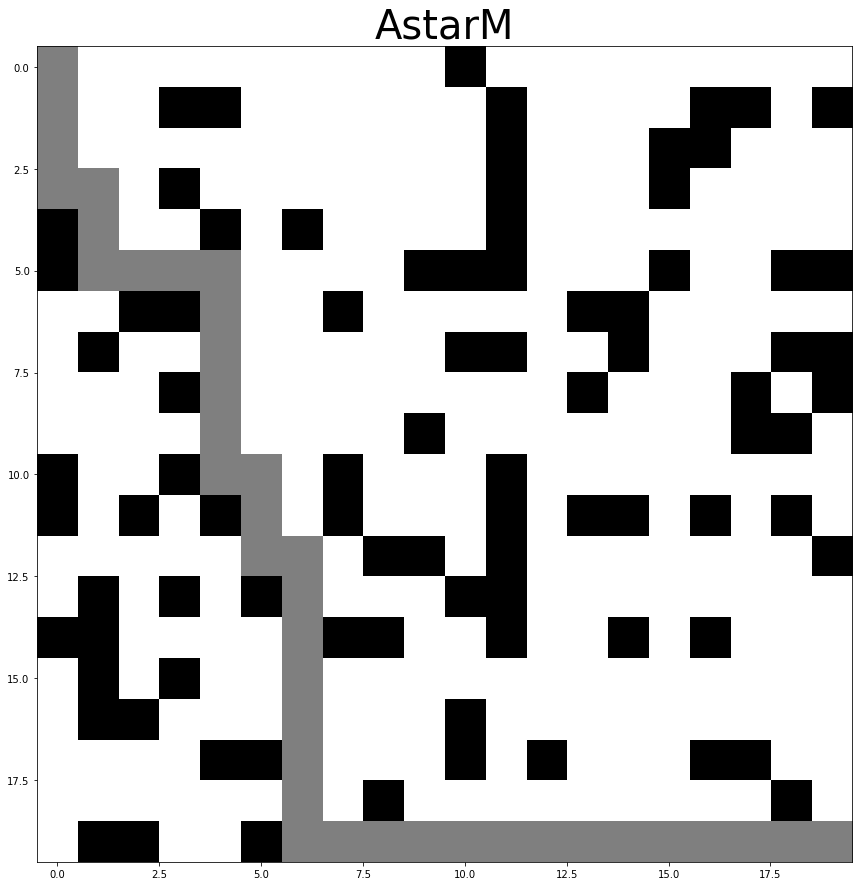

SOLUTION FOUND


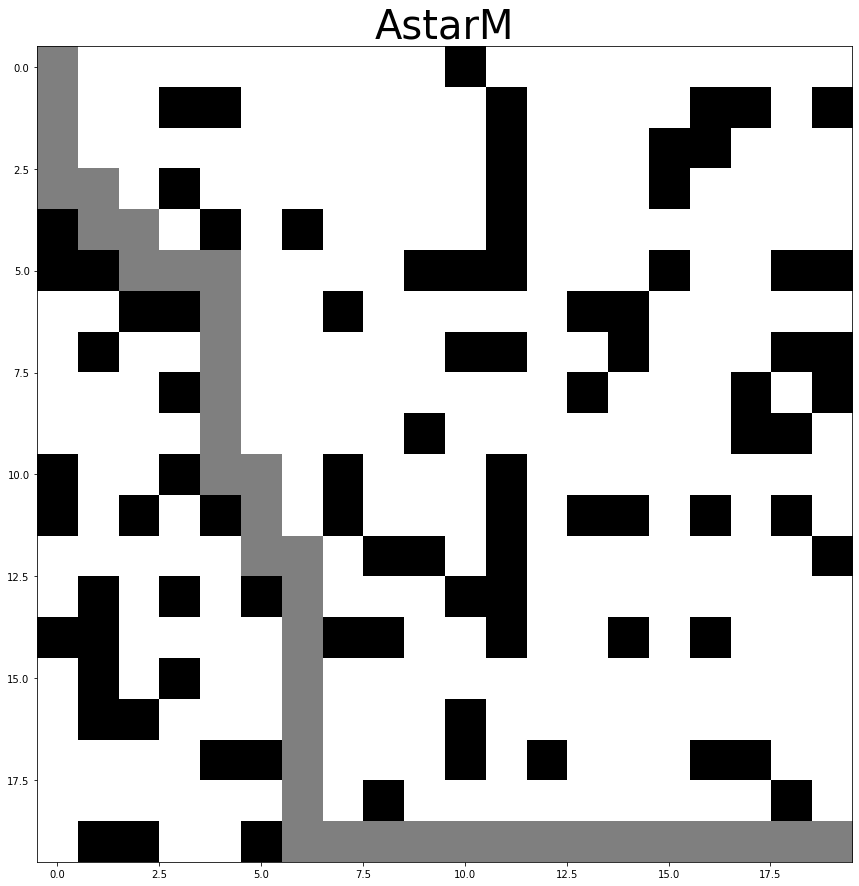

40 39
fails 1
SOLUTION FOUND


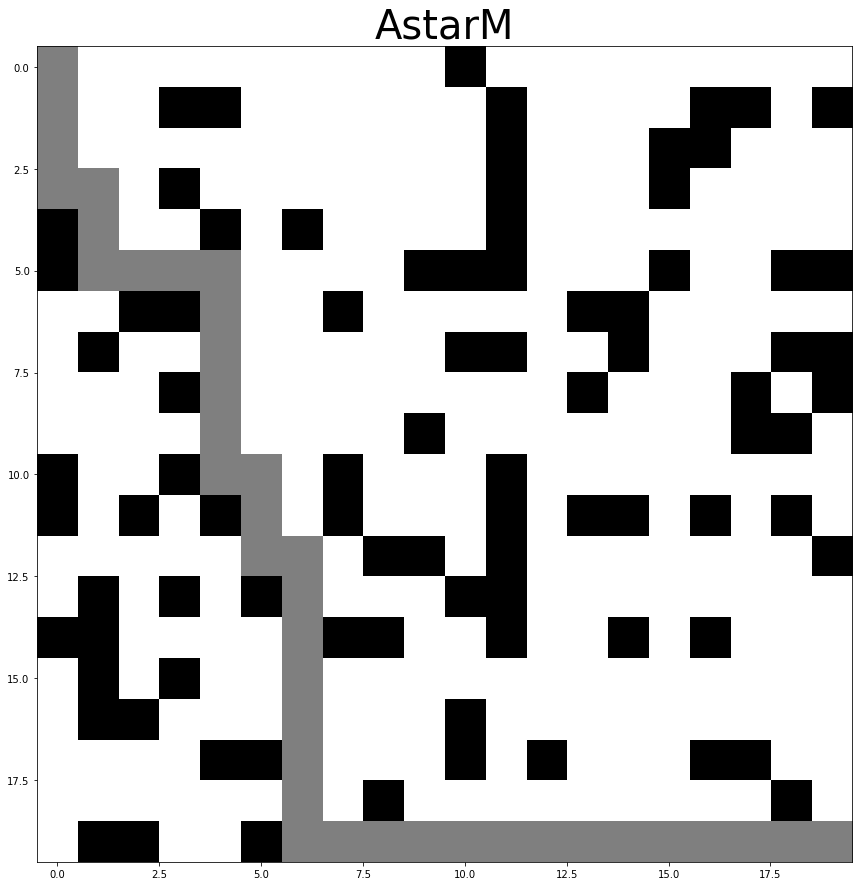

SOLUTION FOUND


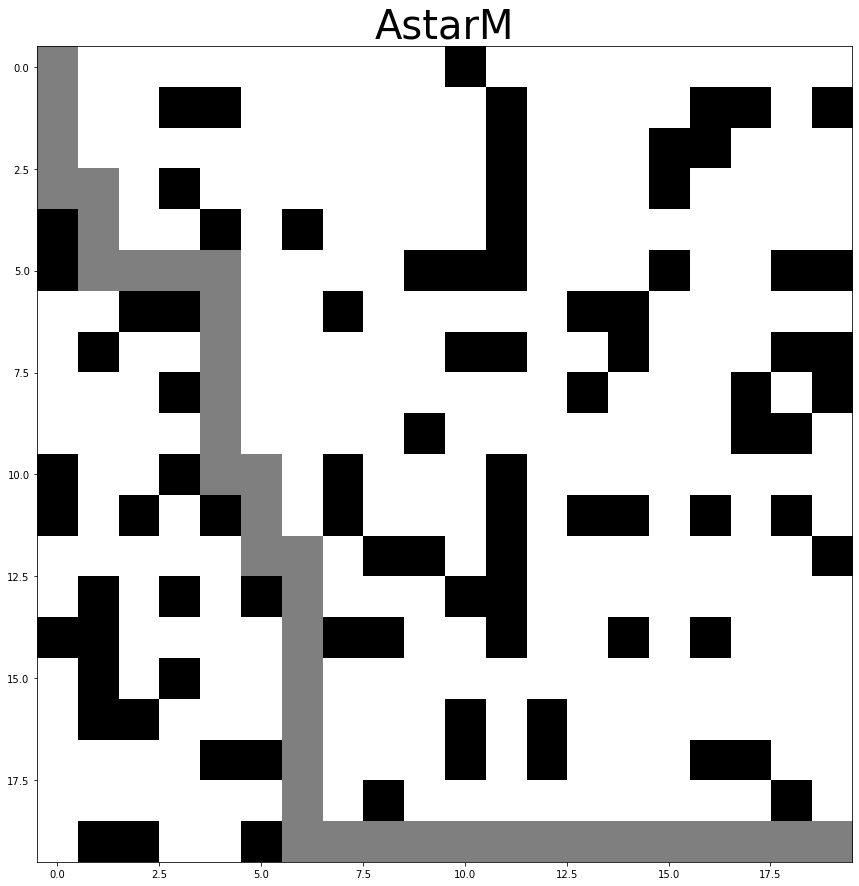

40 40
fails 0
SOLUTION FOUND


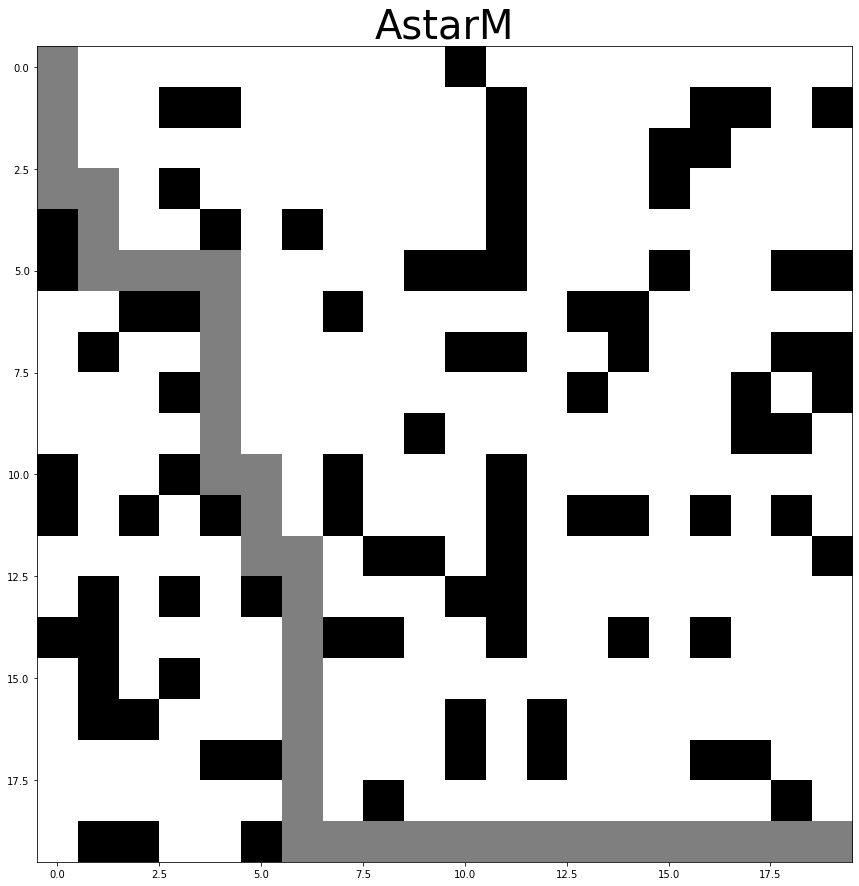

SOLUTION FOUND


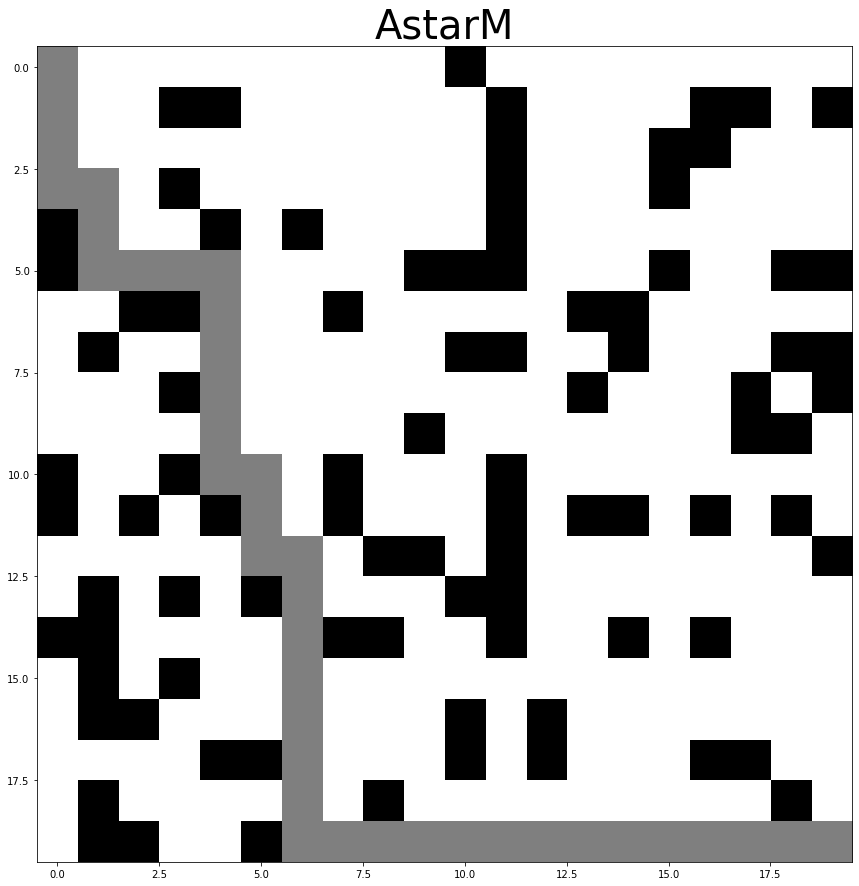

40 40
fails 0
SOLUTION FOUND


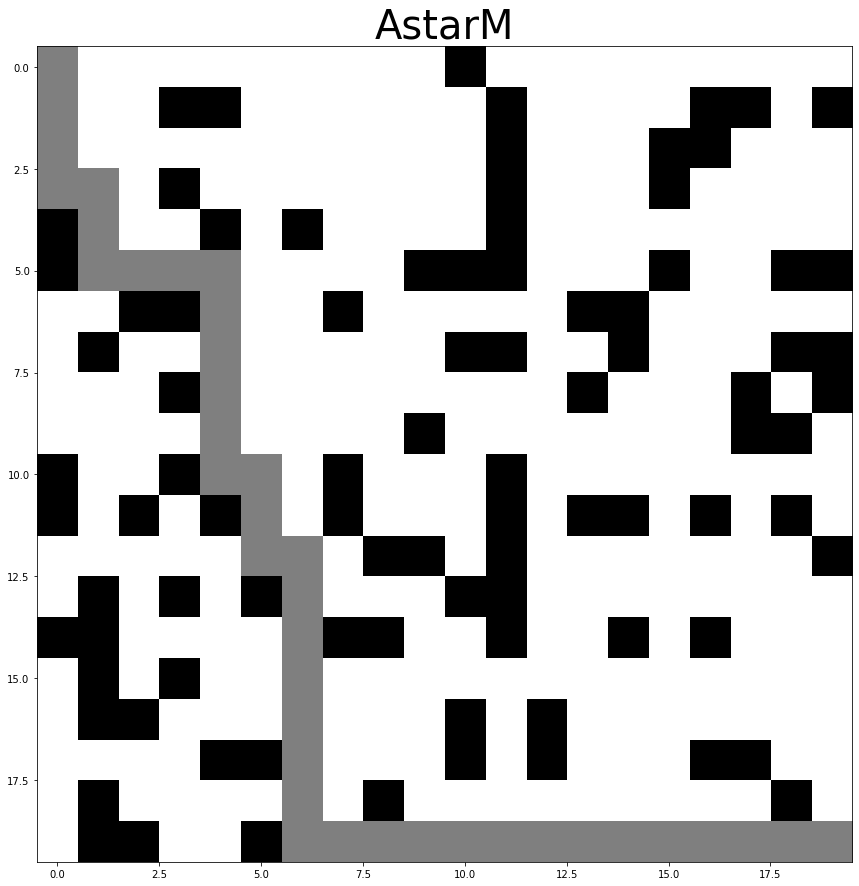

SOLUTION FOUND


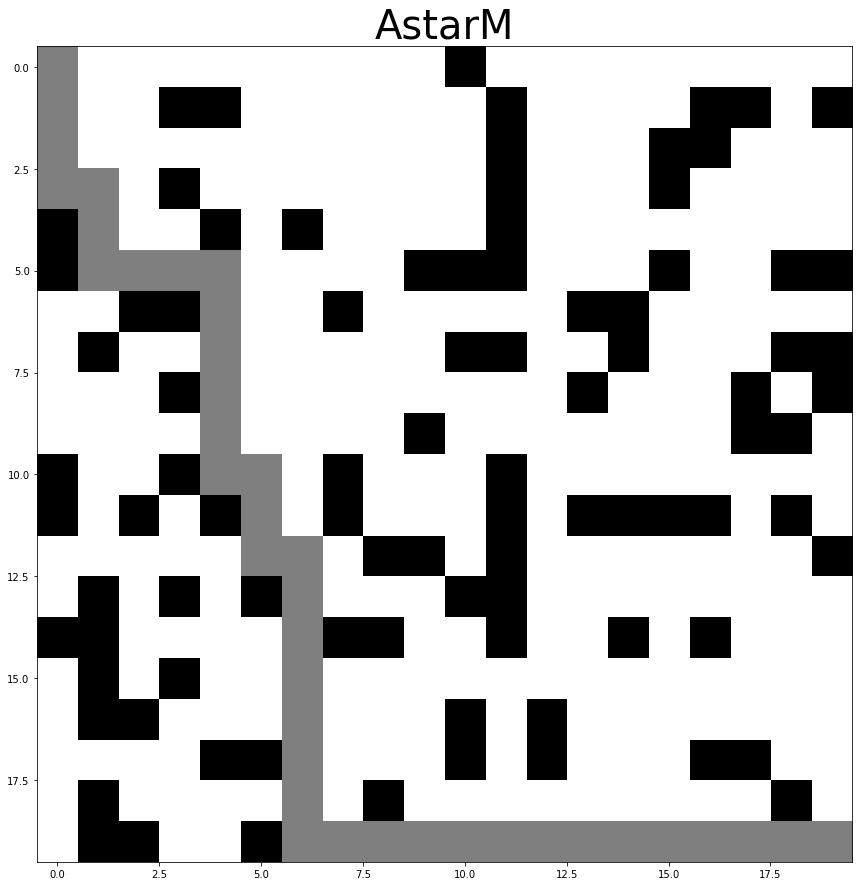

40 40
fails 0
SOLUTION FOUND


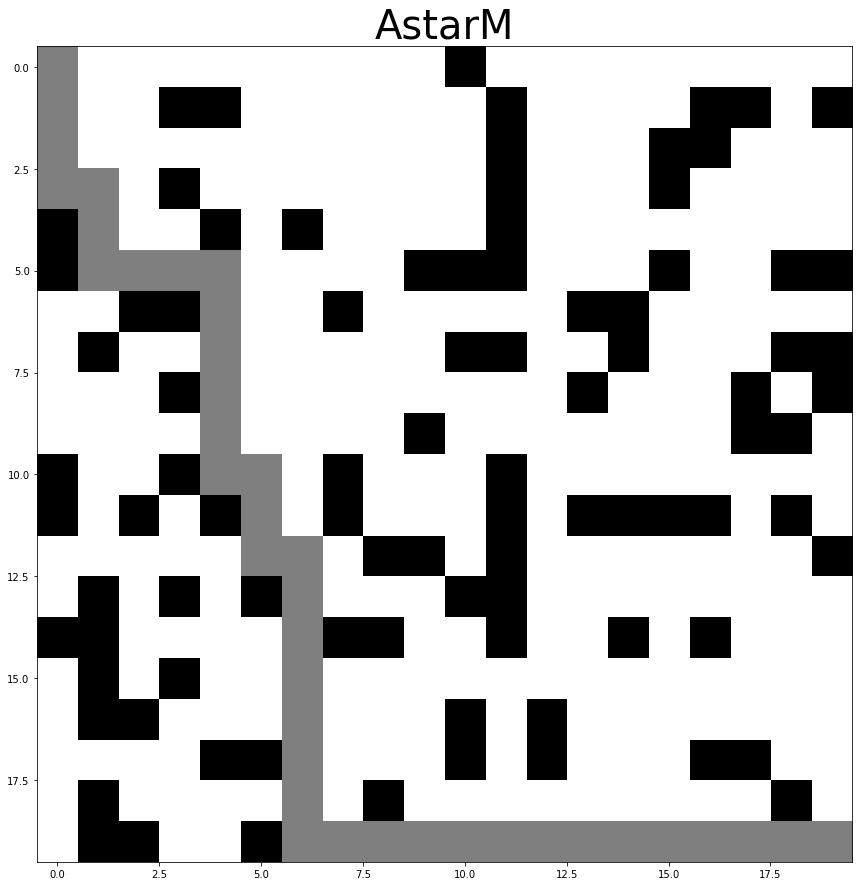

SOLUTION FOUND


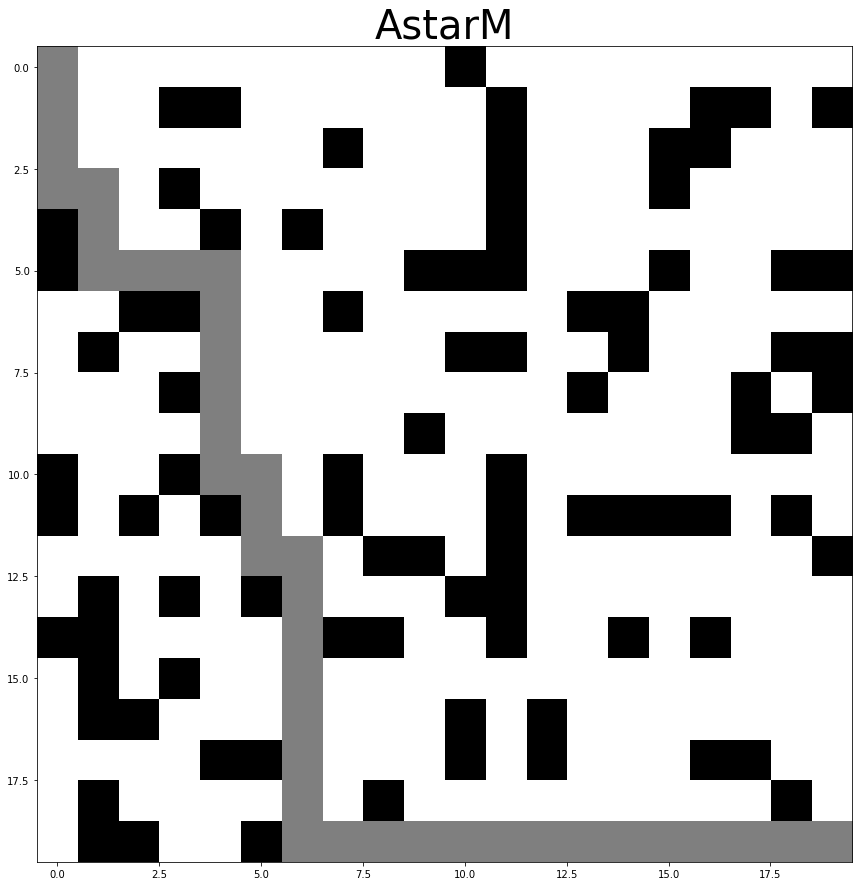

40 40
fails 0
SOLUTION FOUND


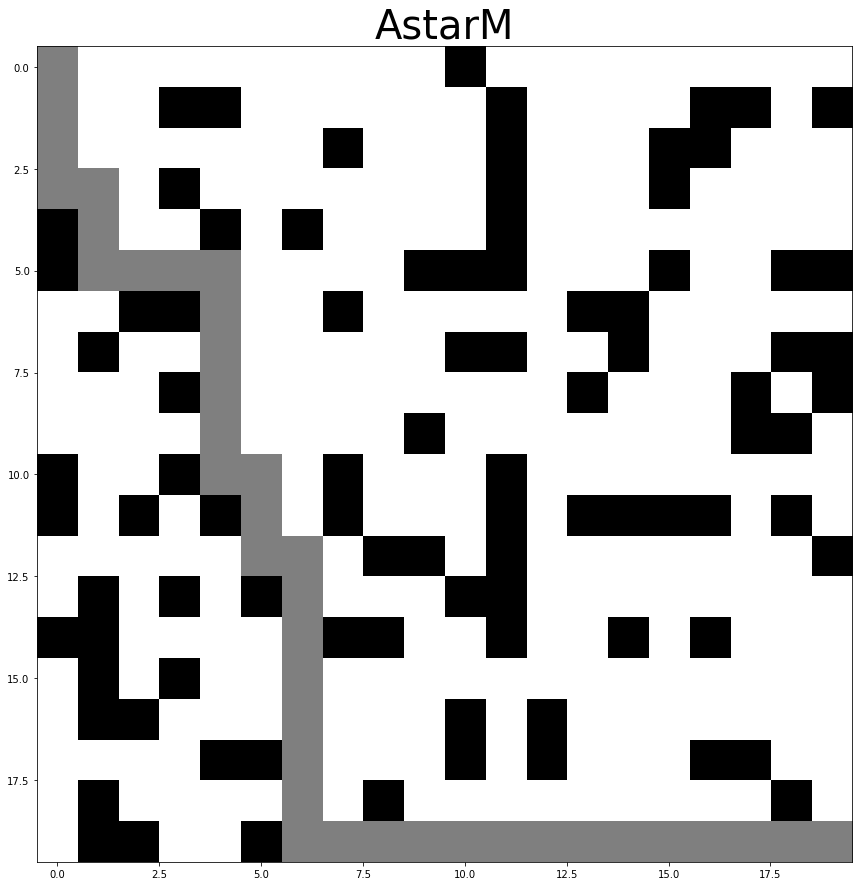

SOLUTION FOUND


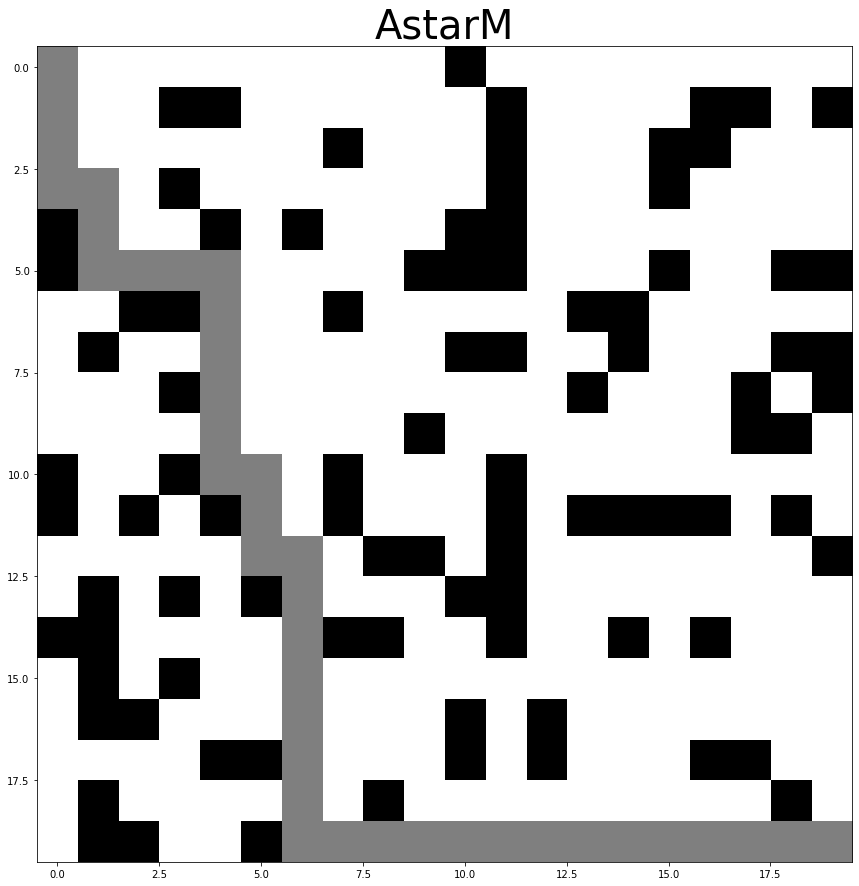

40 40
fails 0
SOLUTION FOUND


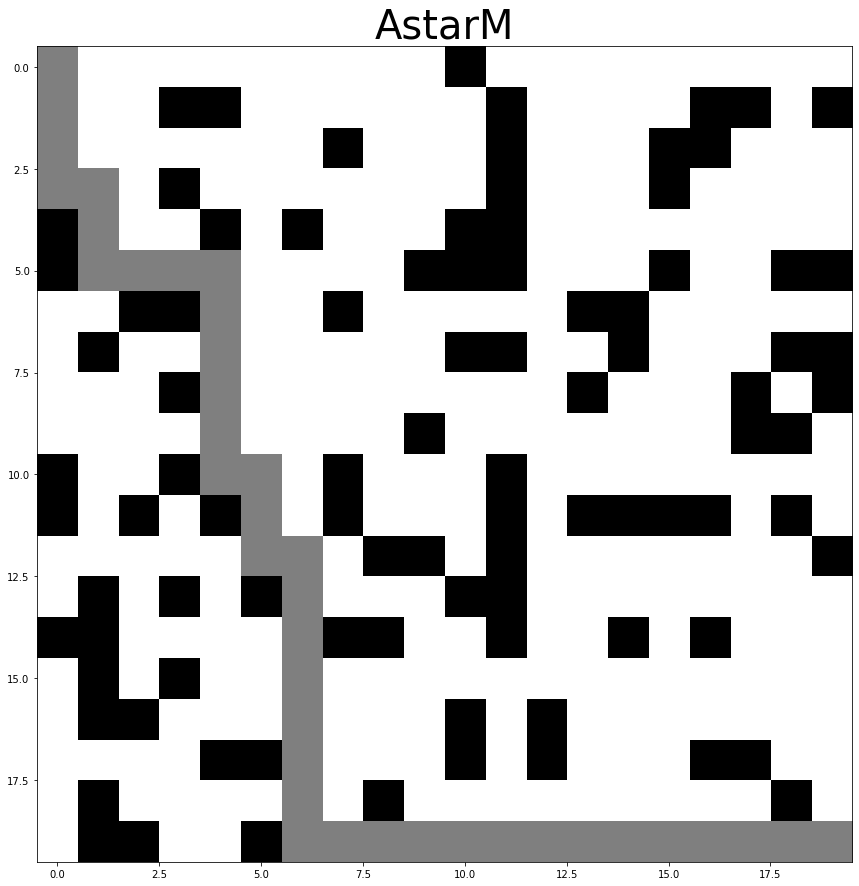

SOLUTION FOUND


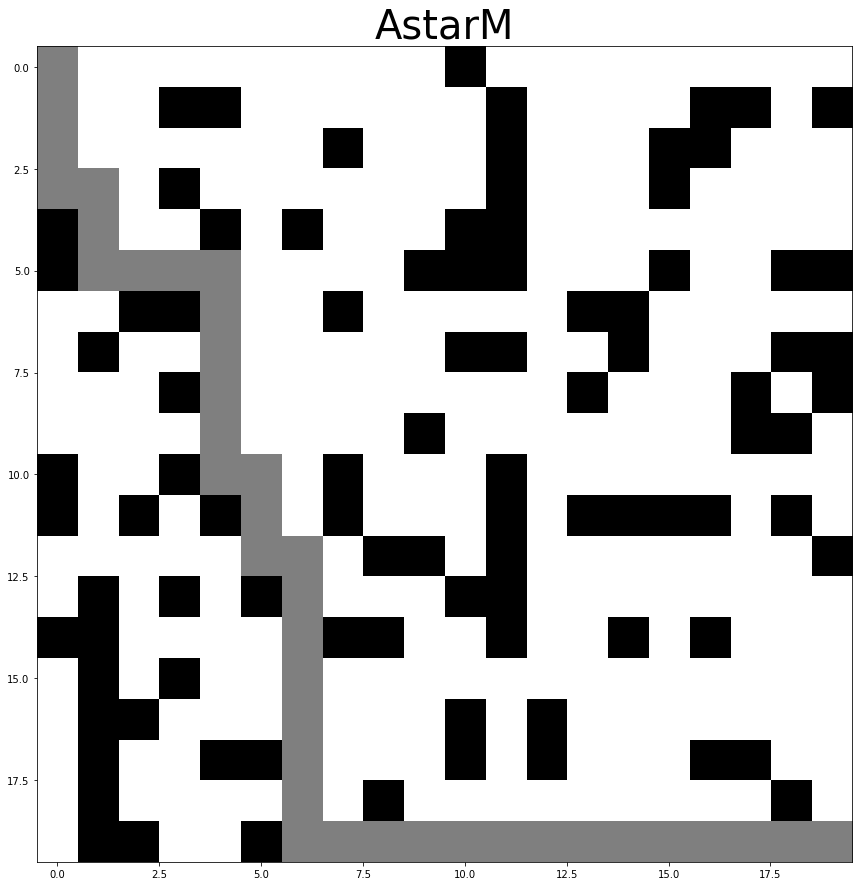

40 40
fails 0
SOLUTION FOUND


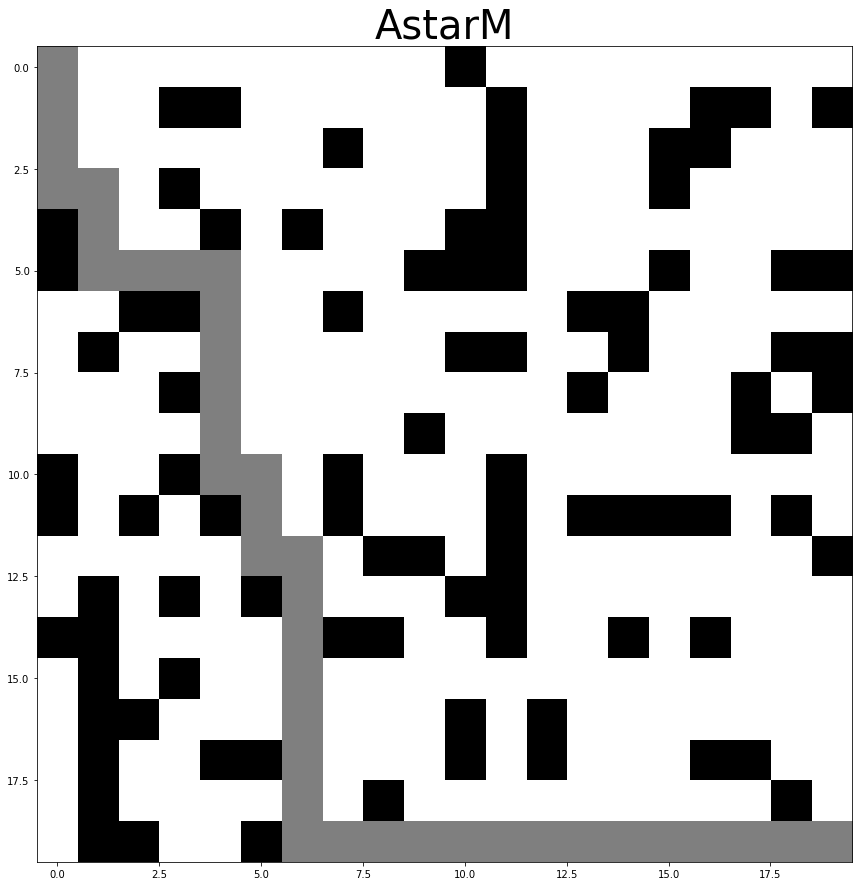

SOLUTION FOUND


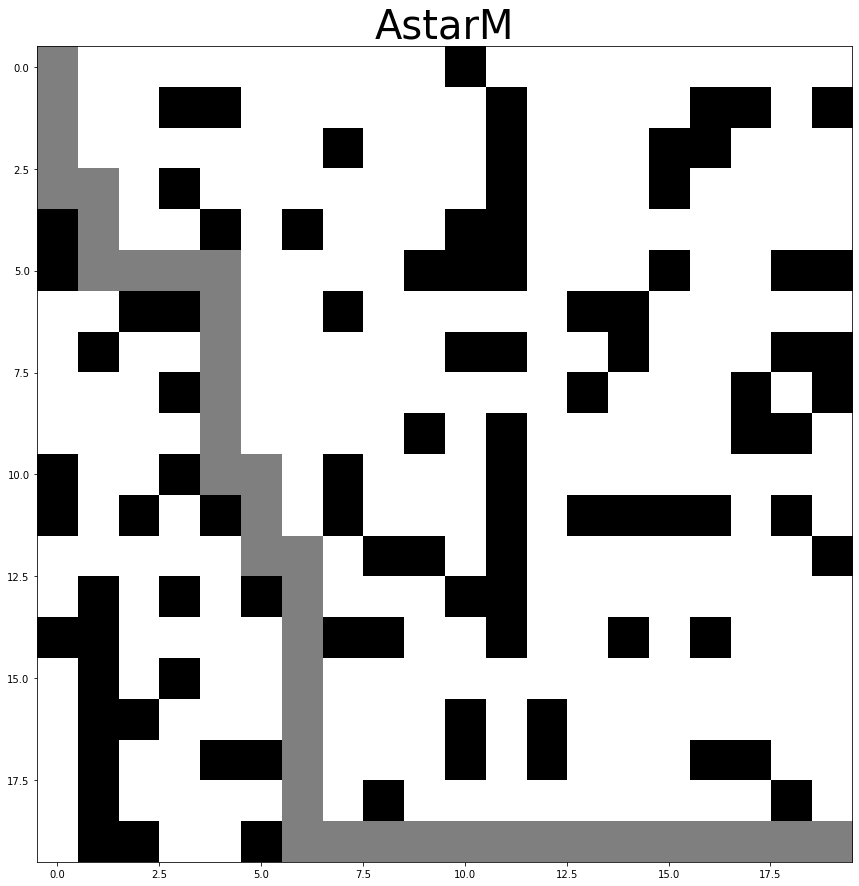

40 40
fails 0
SOLUTION FOUND


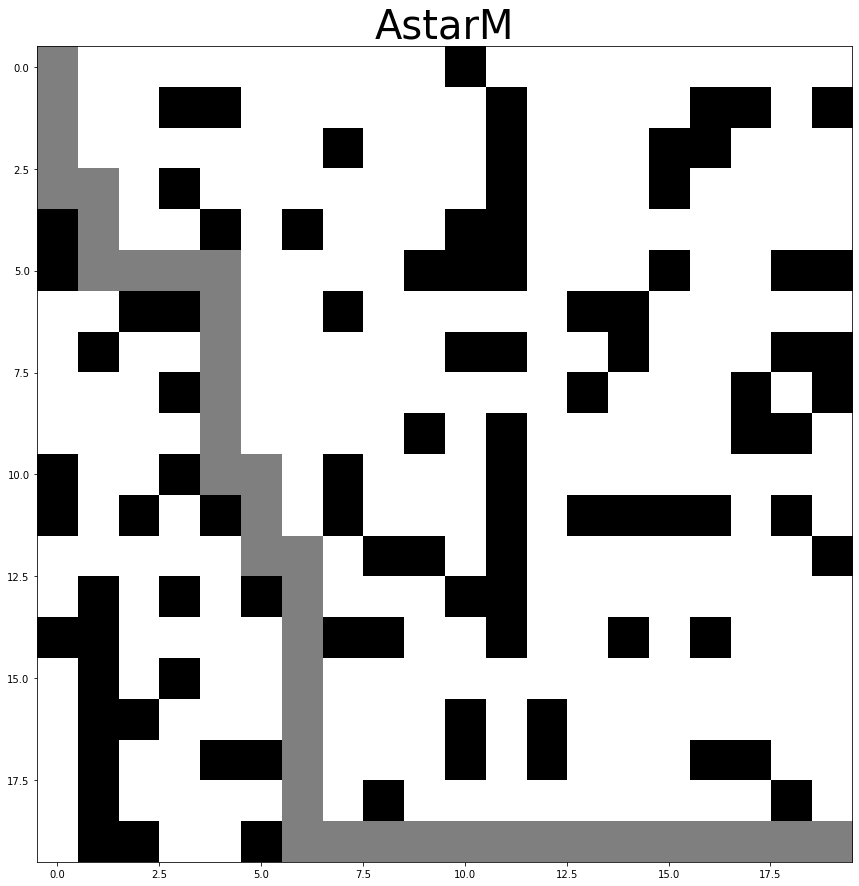

SOLUTION FOUND


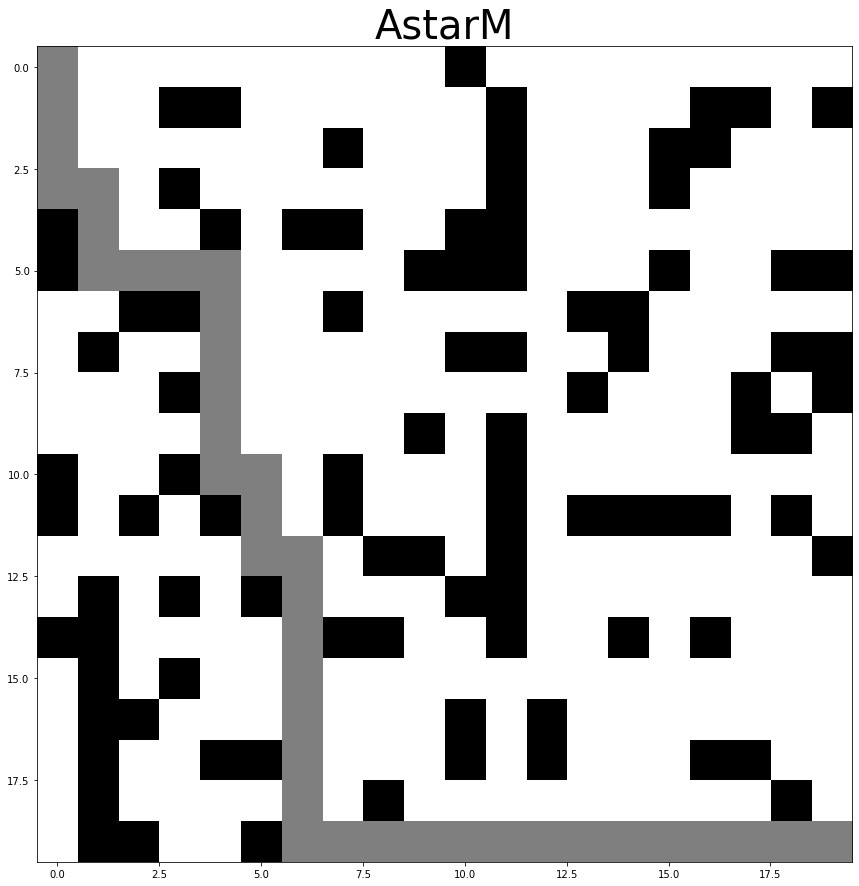

40 40
fails 0
SOLUTION FOUND


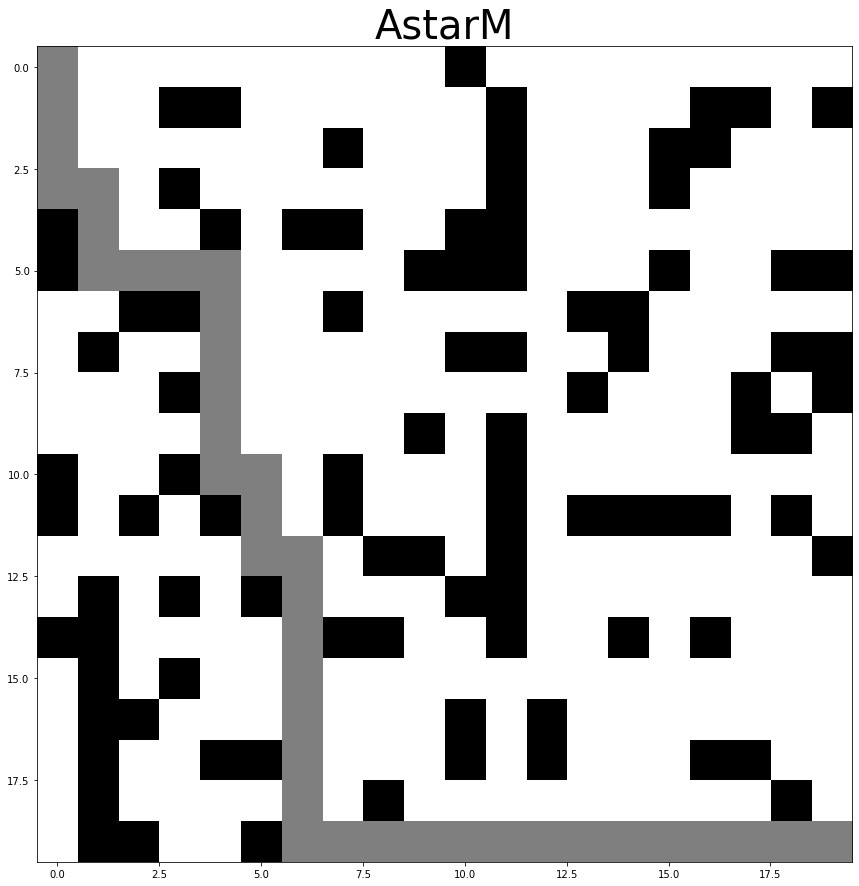

SOLUTION FOUND


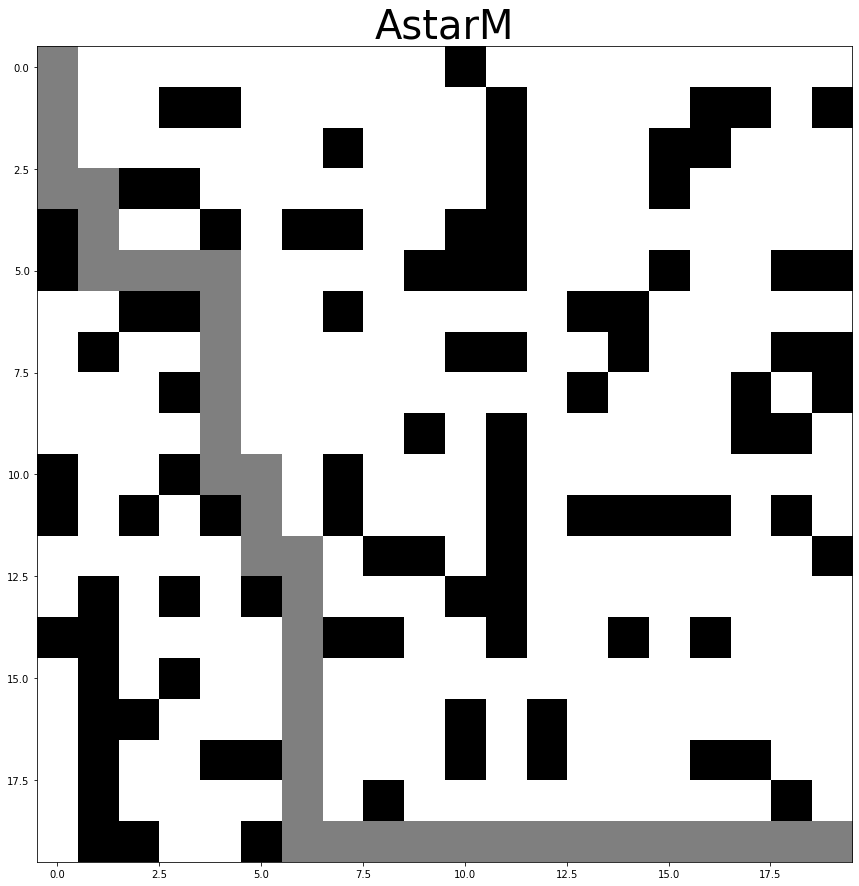

40 40
fails 0
SOLUTION FOUND


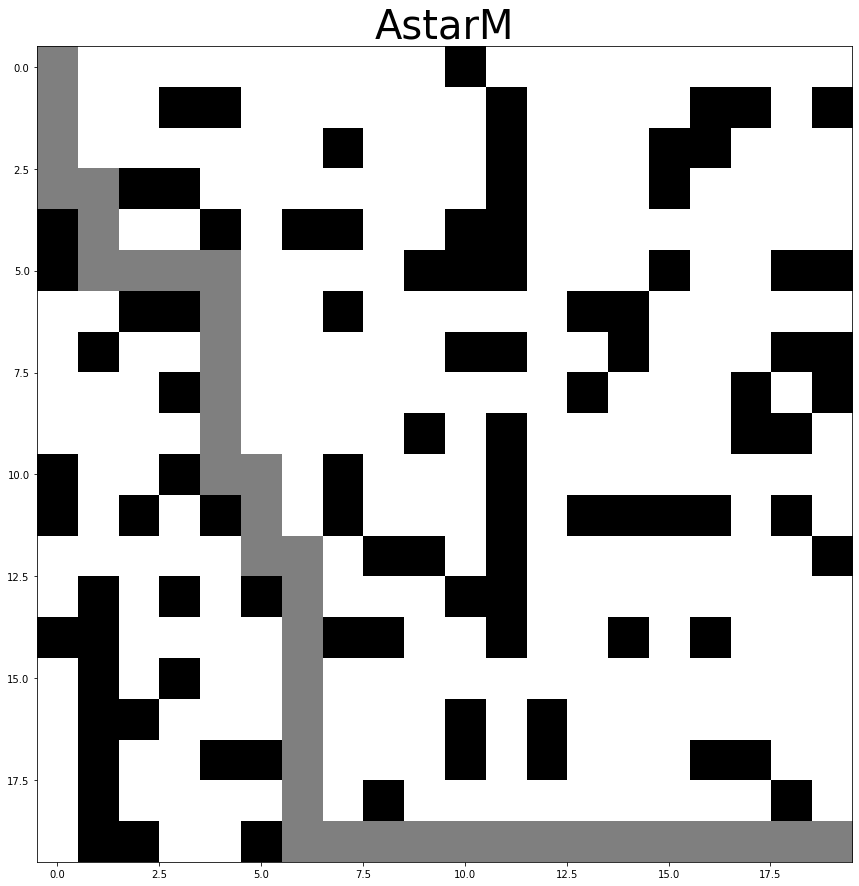

SOLUTION FOUND


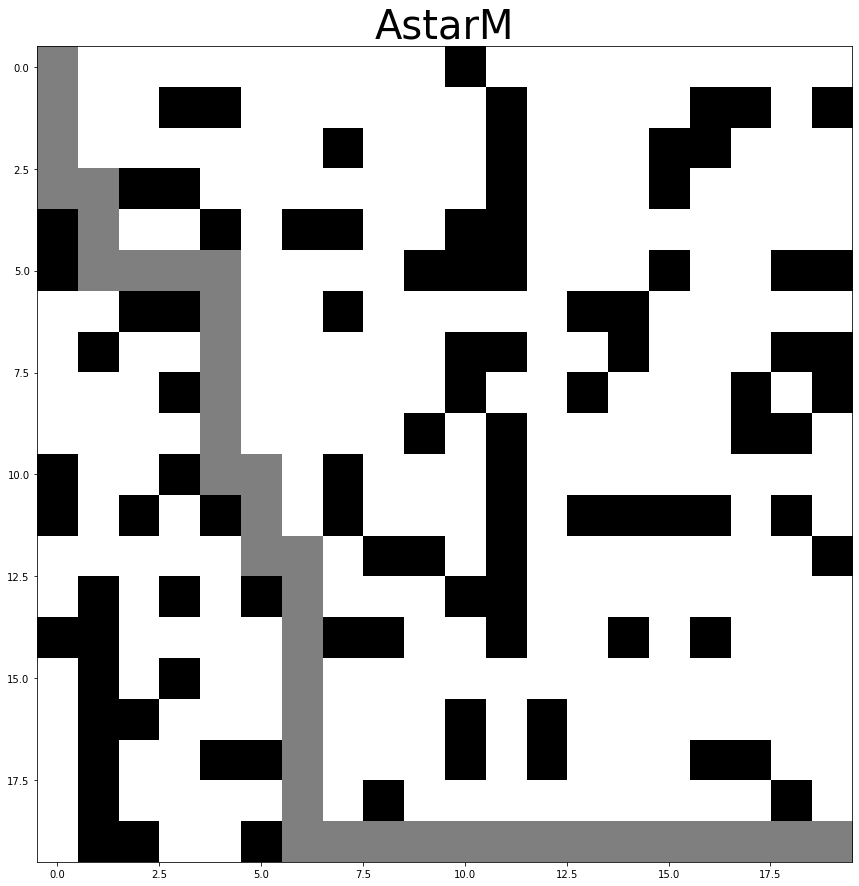

40 40
fails 0
SOLUTION FOUND


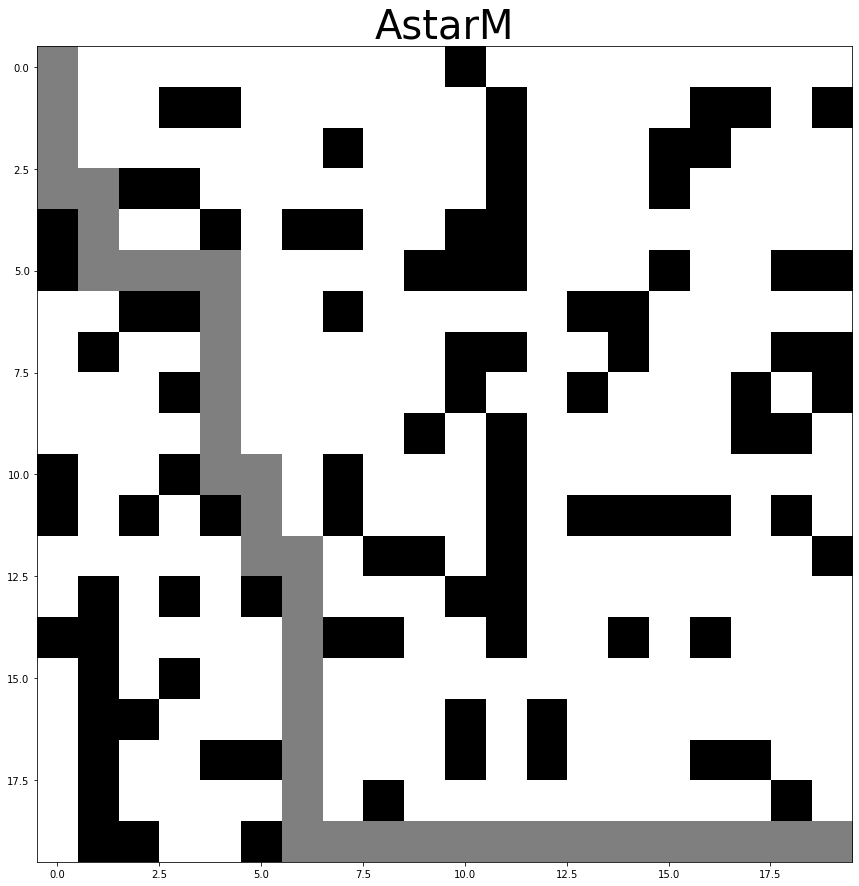

SOLUTION FOUND


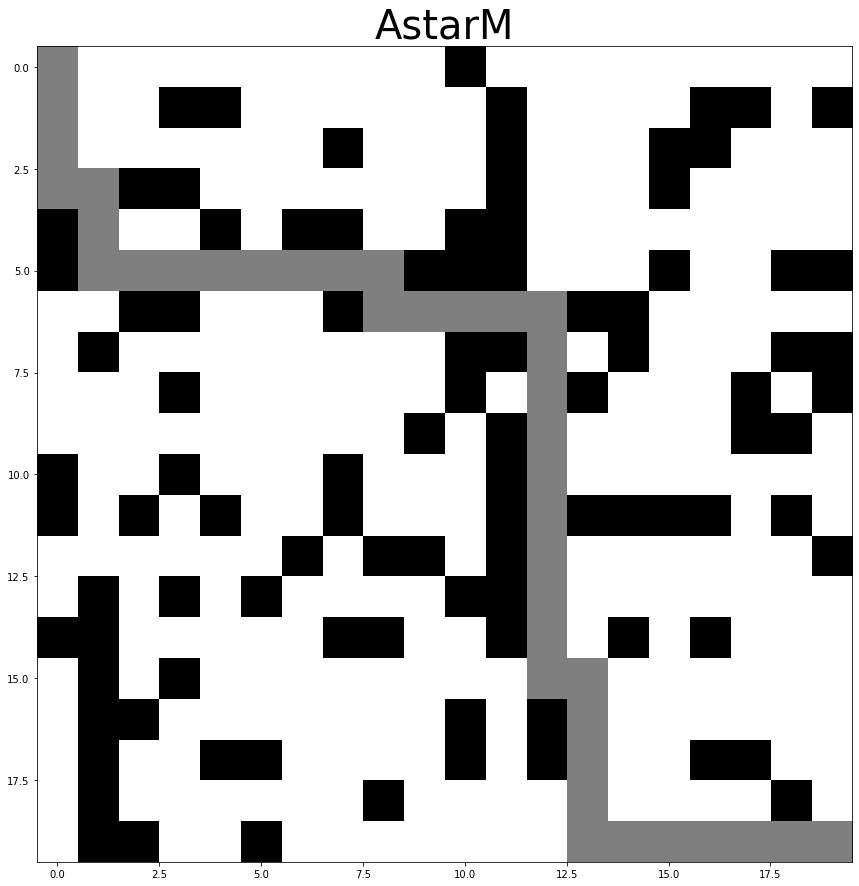

40 73
fails 0
SOLUTION FOUND


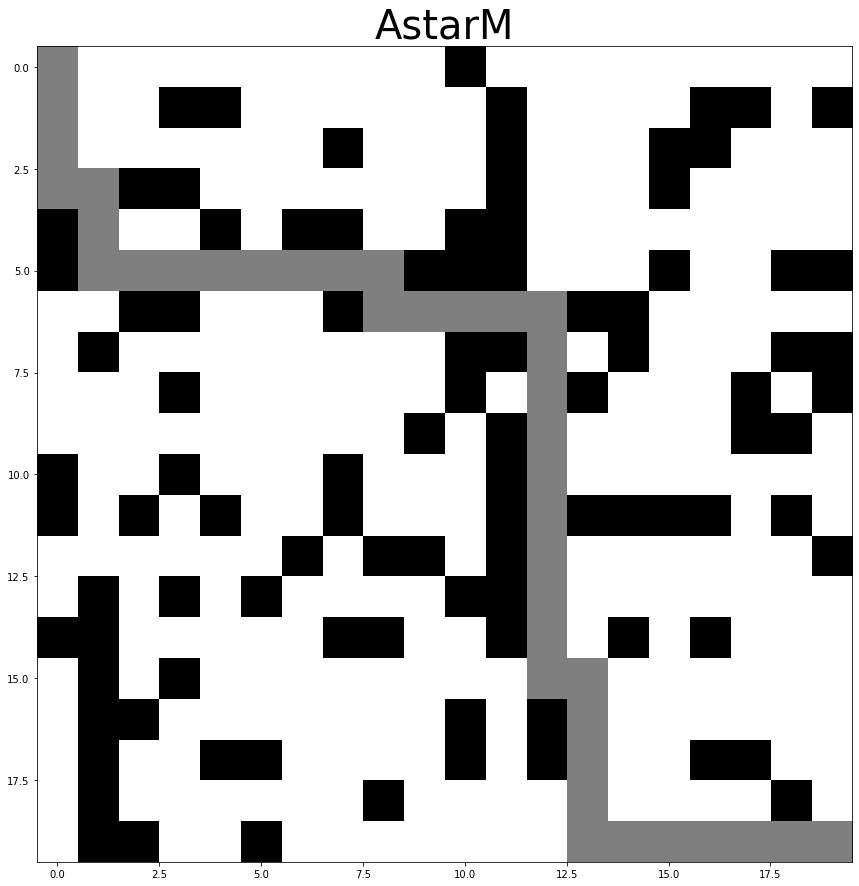

SOLUTION FOUND


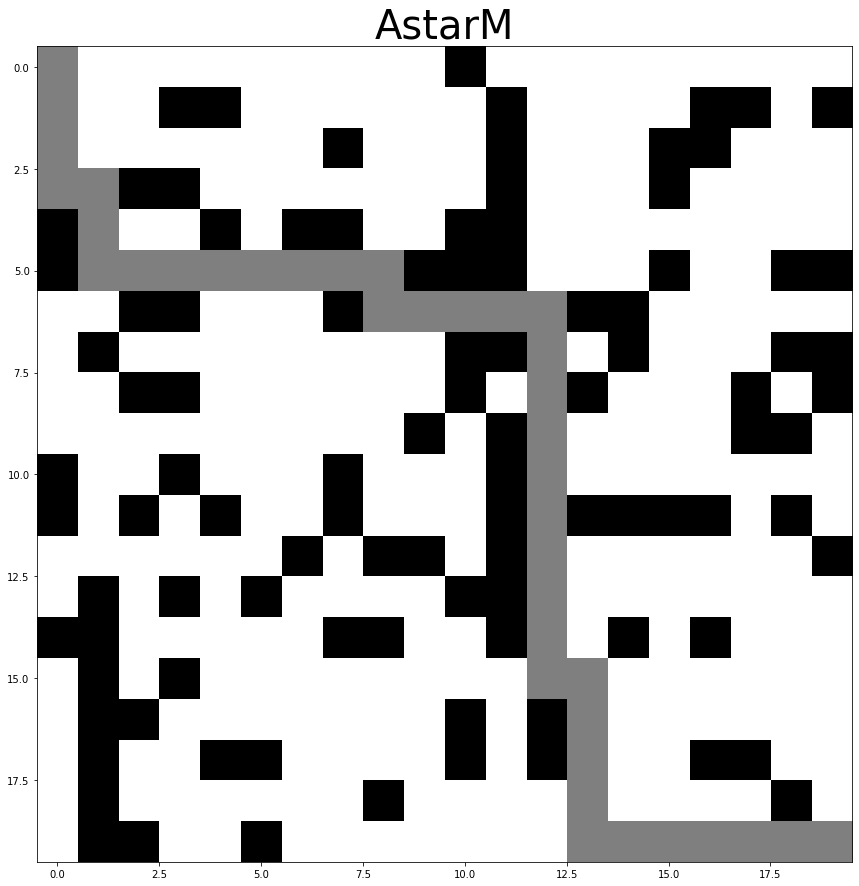

73 73
fails 0
SOLUTION FOUND


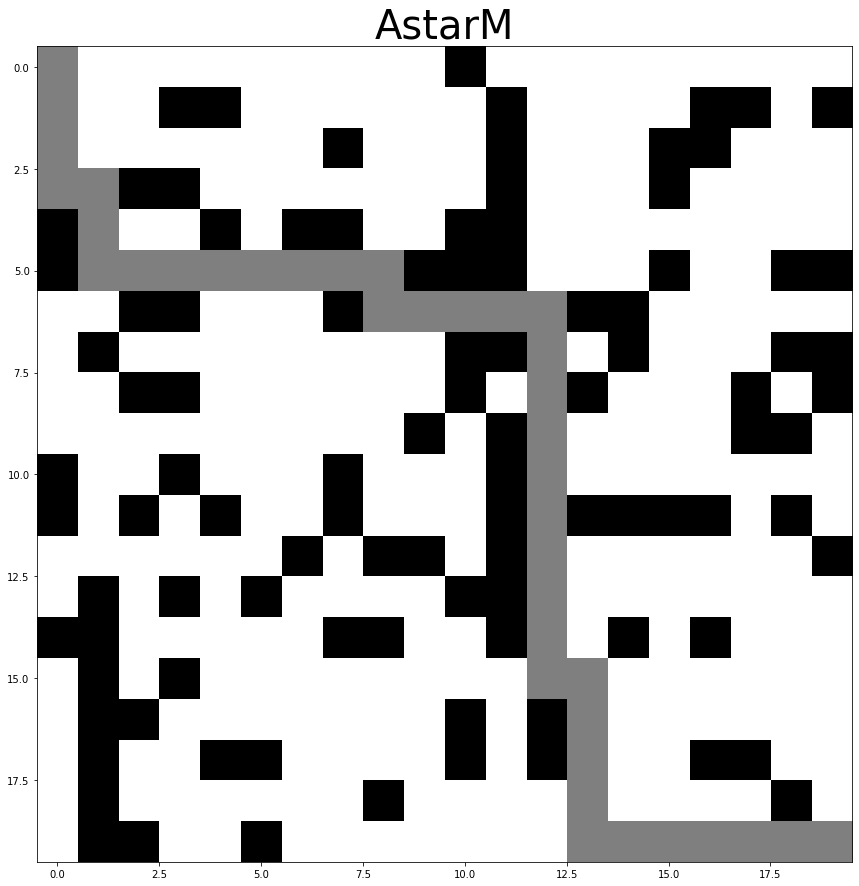

SOLUTION FOUND


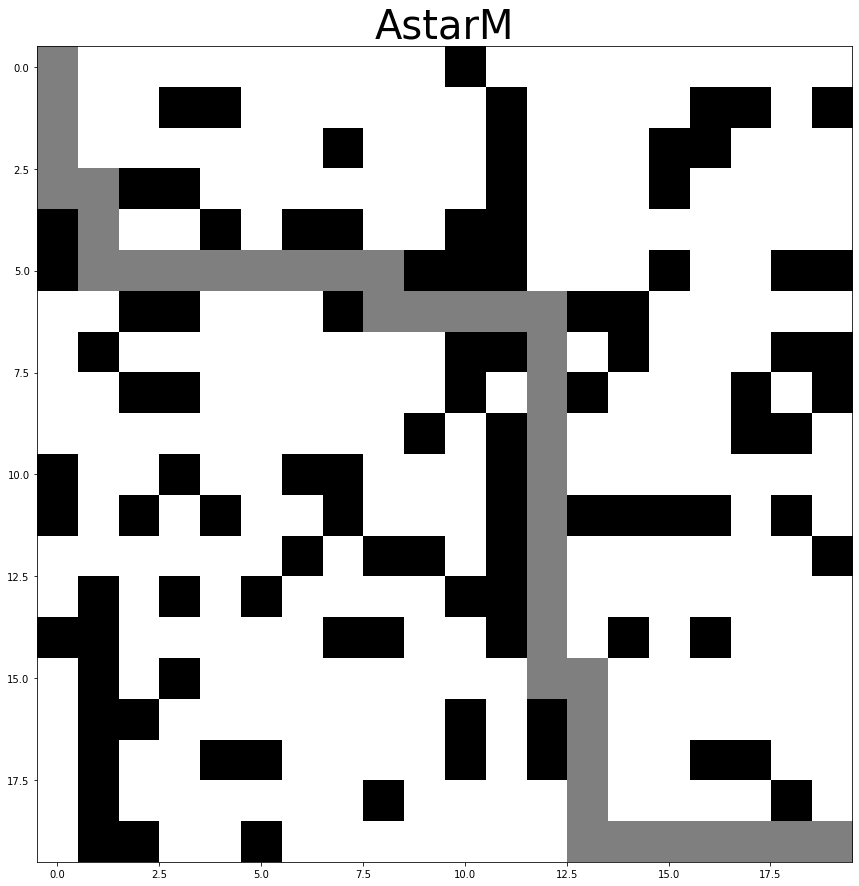

73 72
fails 1
SOLUTION FOUND


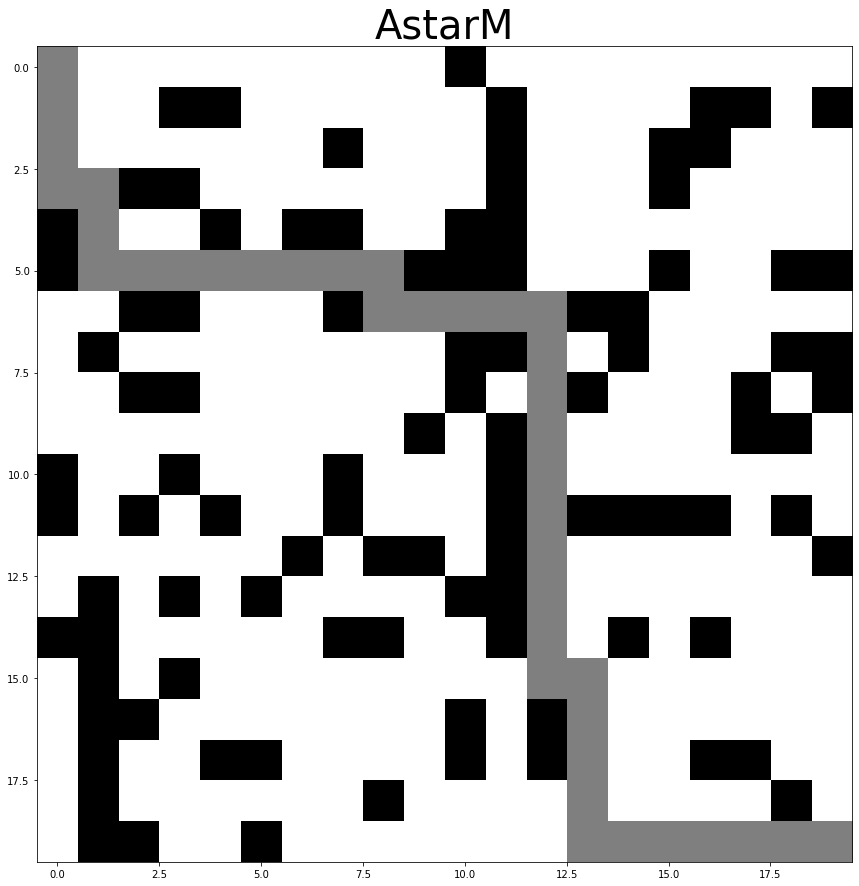

SOLUTION FOUND


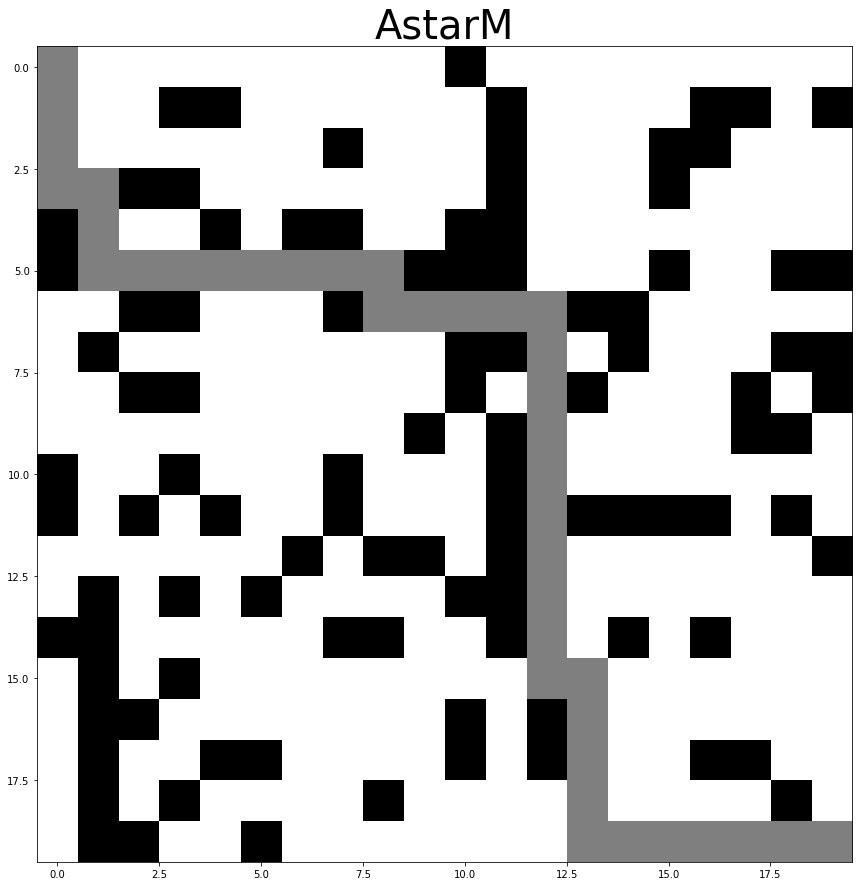

73 73
fails 0
SOLUTION FOUND


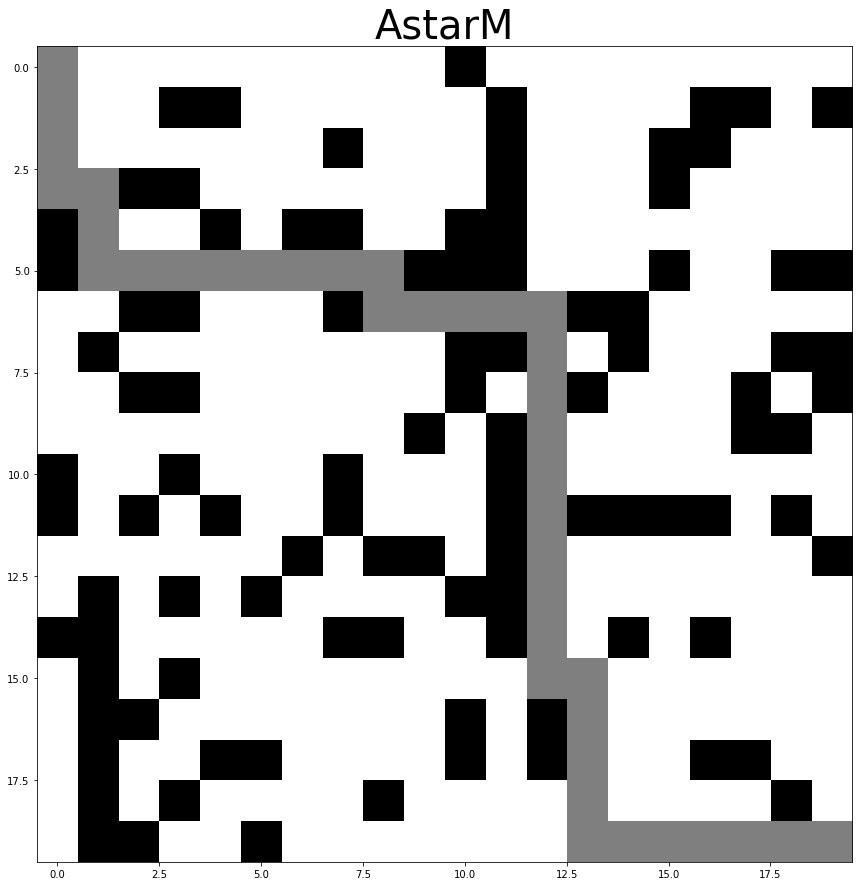

SOLUTION FOUND


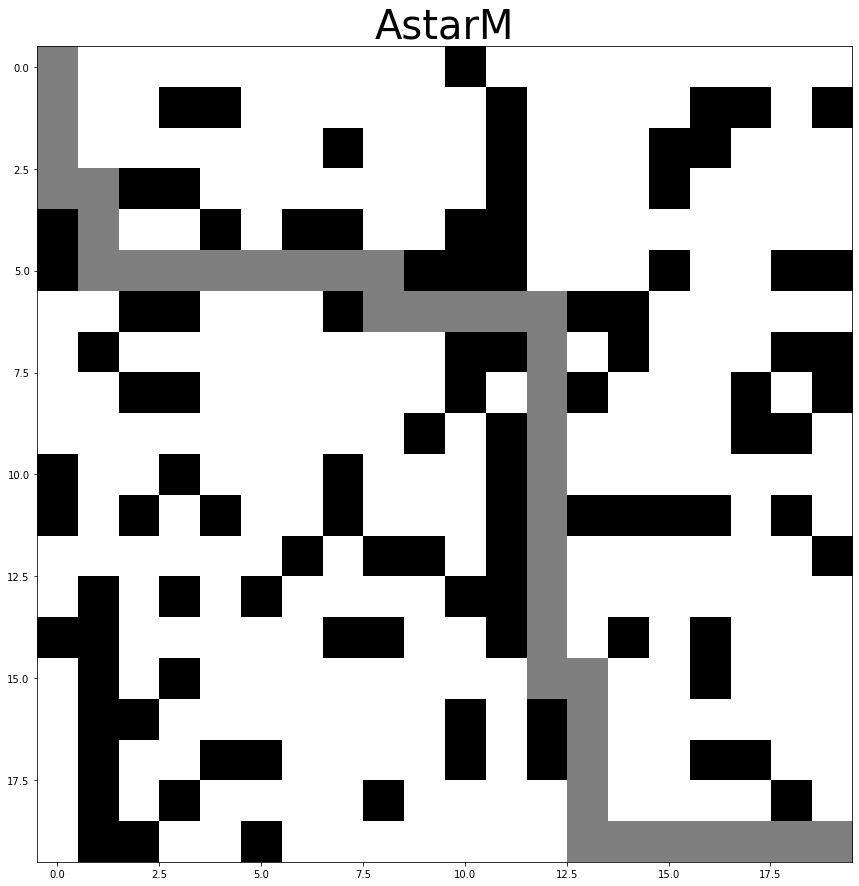

73 73
fails 0
SOLUTION FOUND


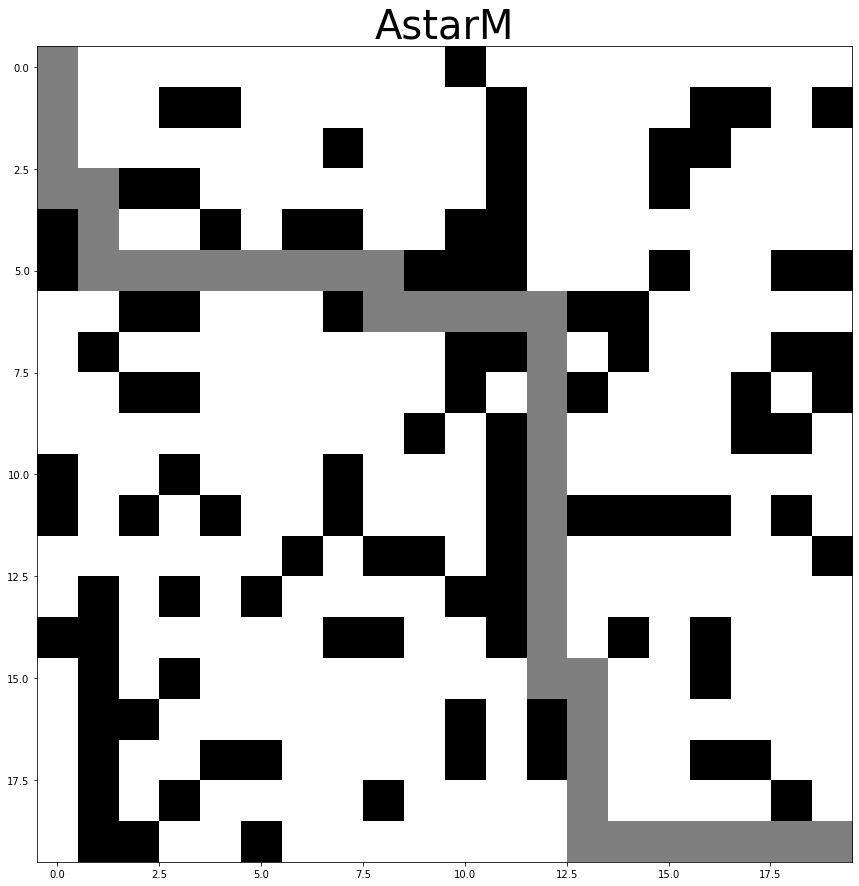

SOLUTION FOUND


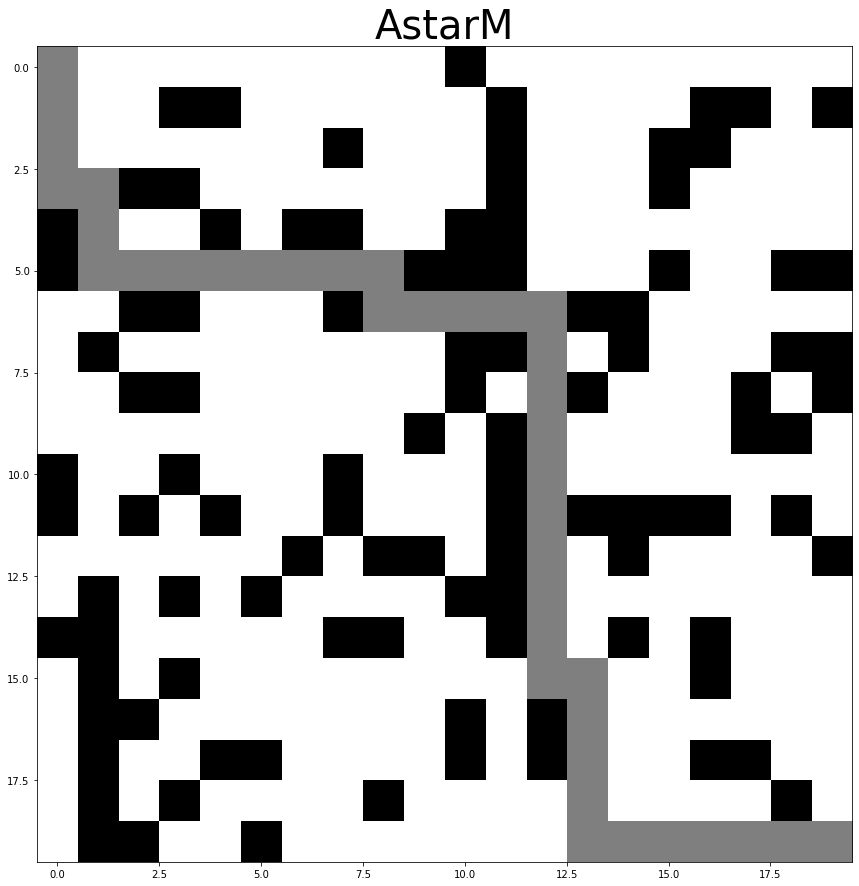

73 73
fails 0
SOLUTION FOUND


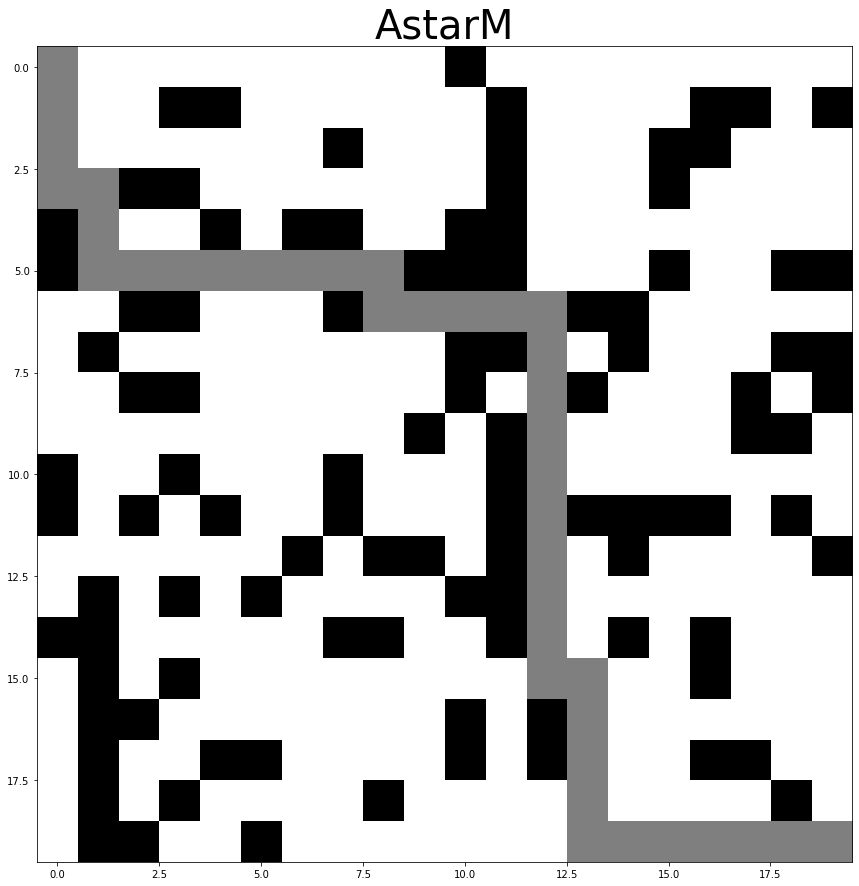

SOLUTION FOUND


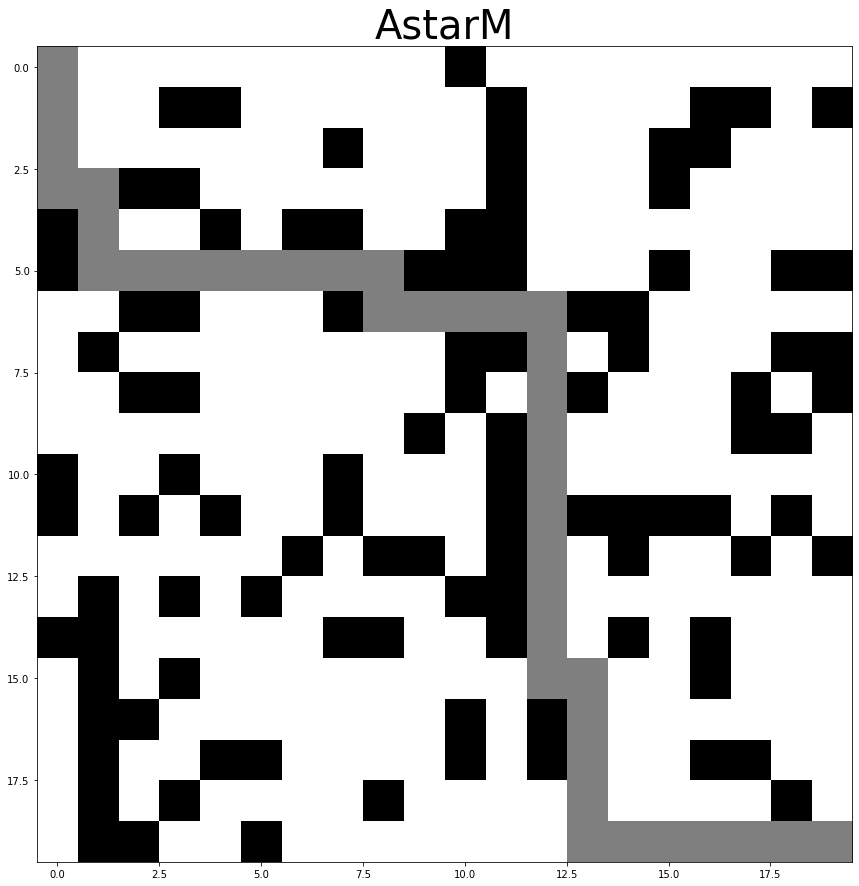

73 73
fails 0
SOLUTION FOUND


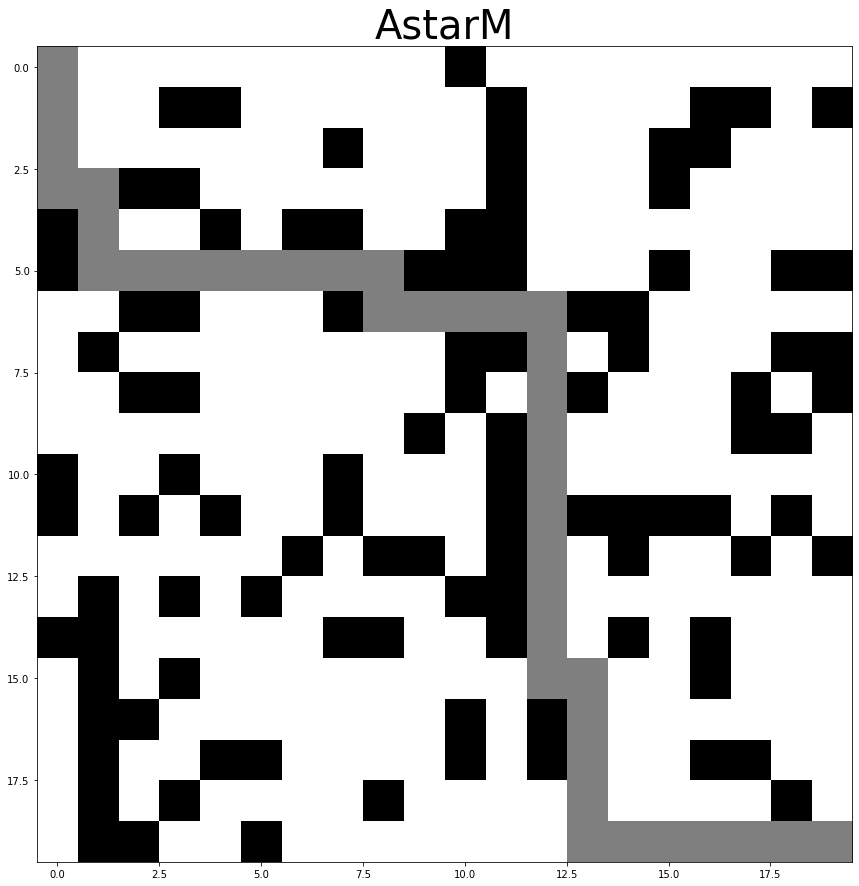

SOLUTION FOUND


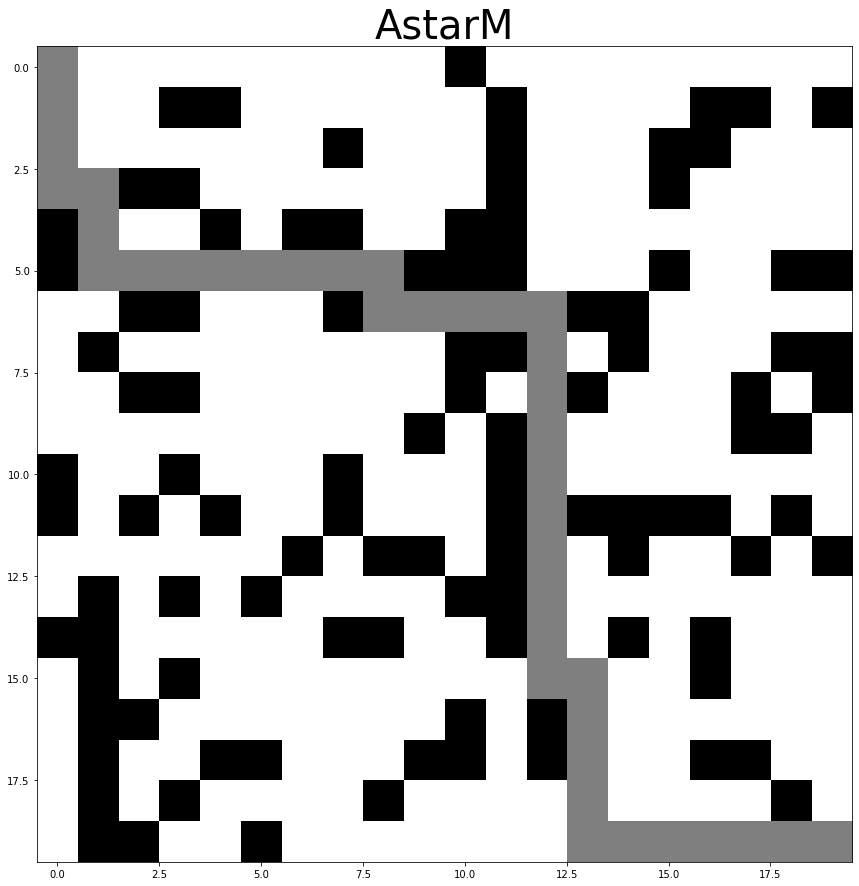

73 73
fails 0
SOLUTION FOUND


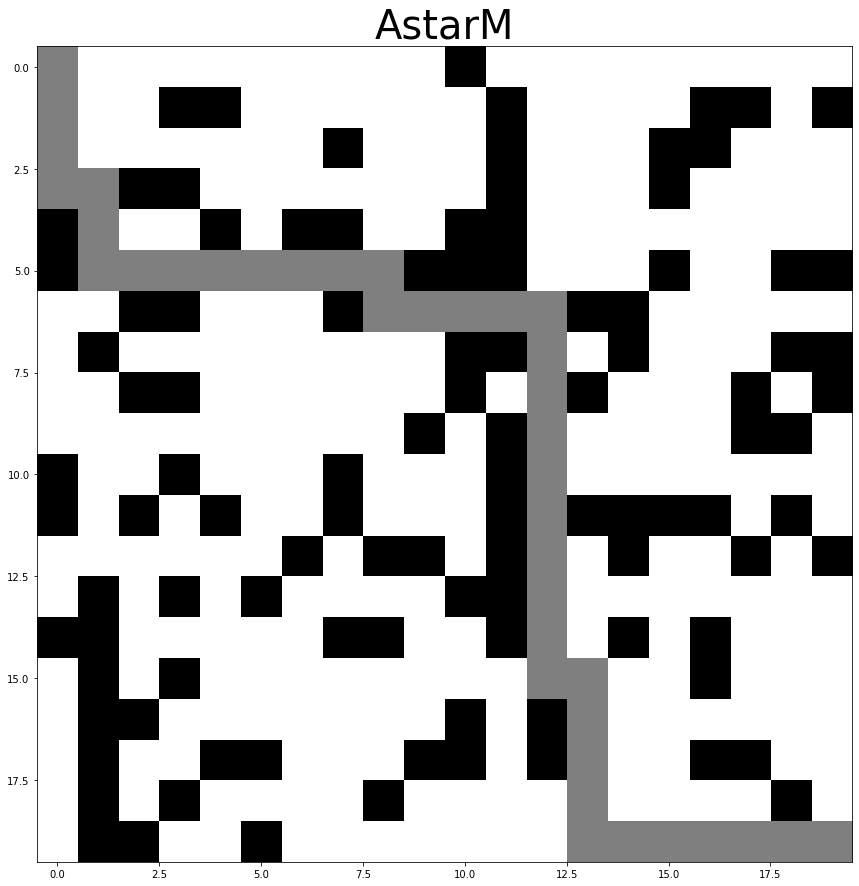

SOLUTION FOUND


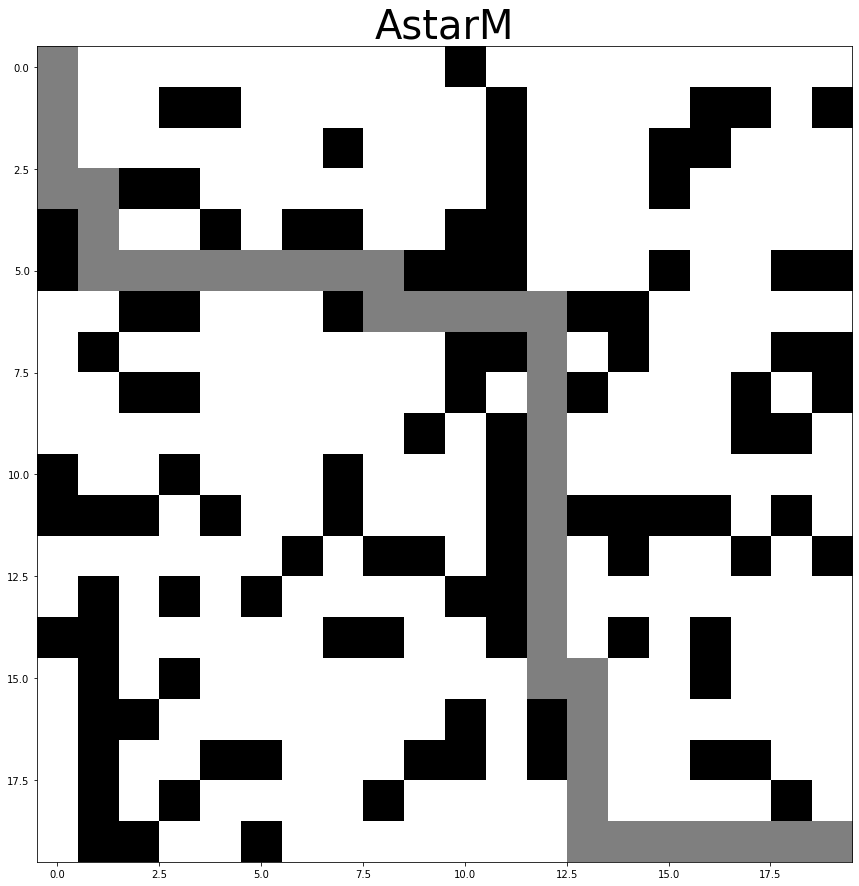

73 73
fails 0
SOLUTION FOUND


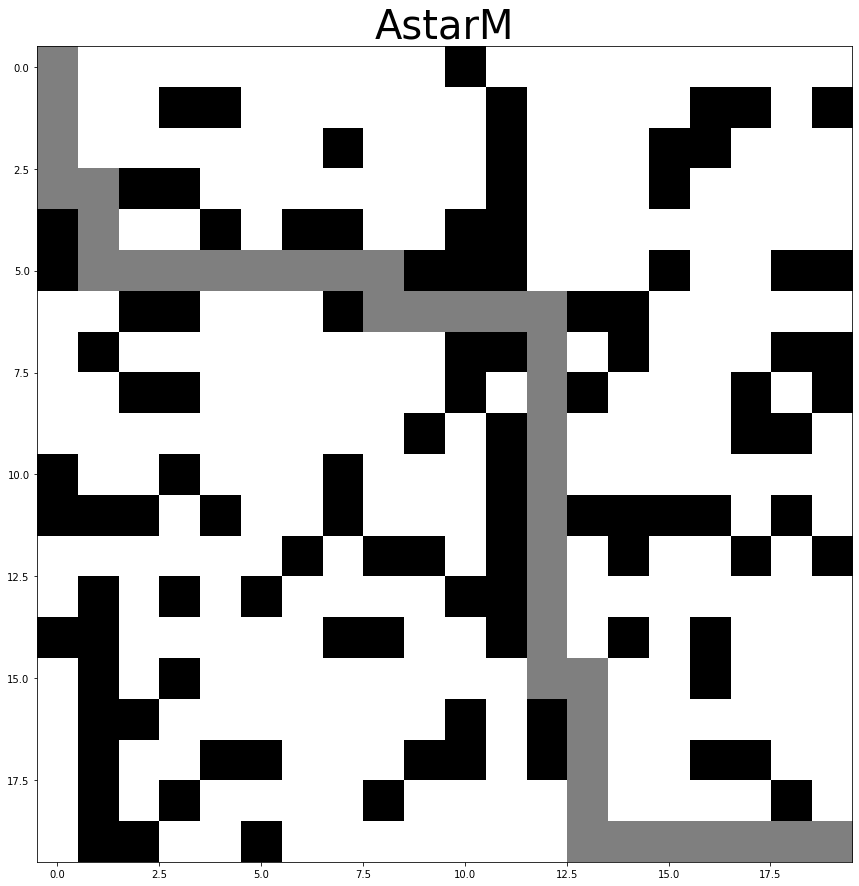

SOLUTION FOUND


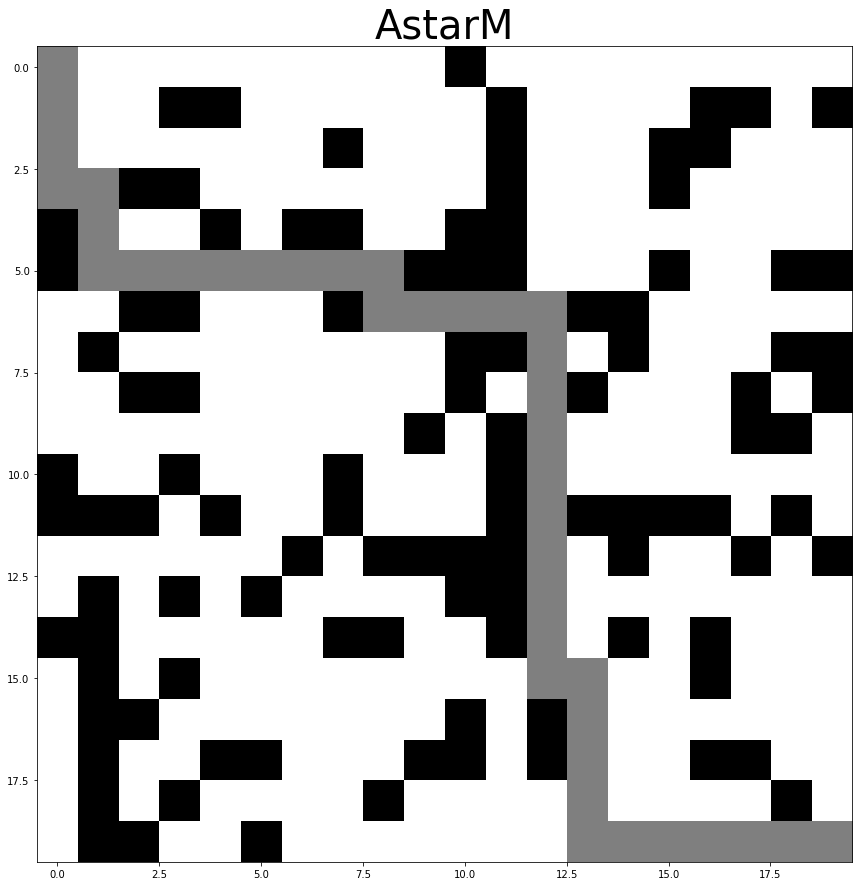

73 72
fails 1
SOLUTION FOUND


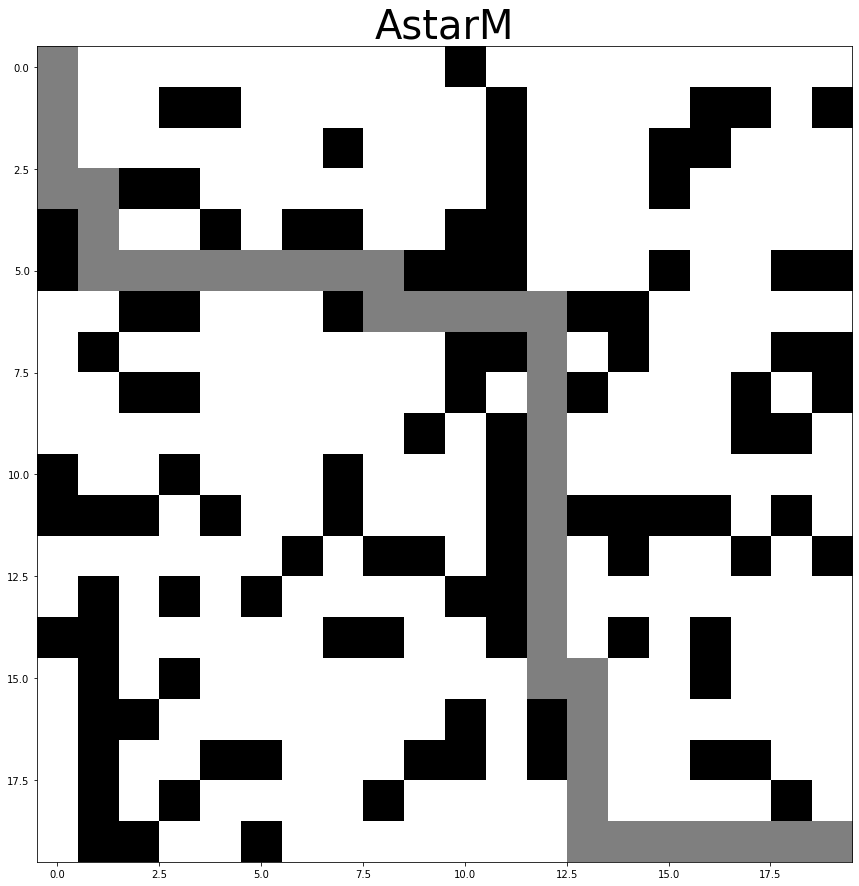

SOLUTION FOUND


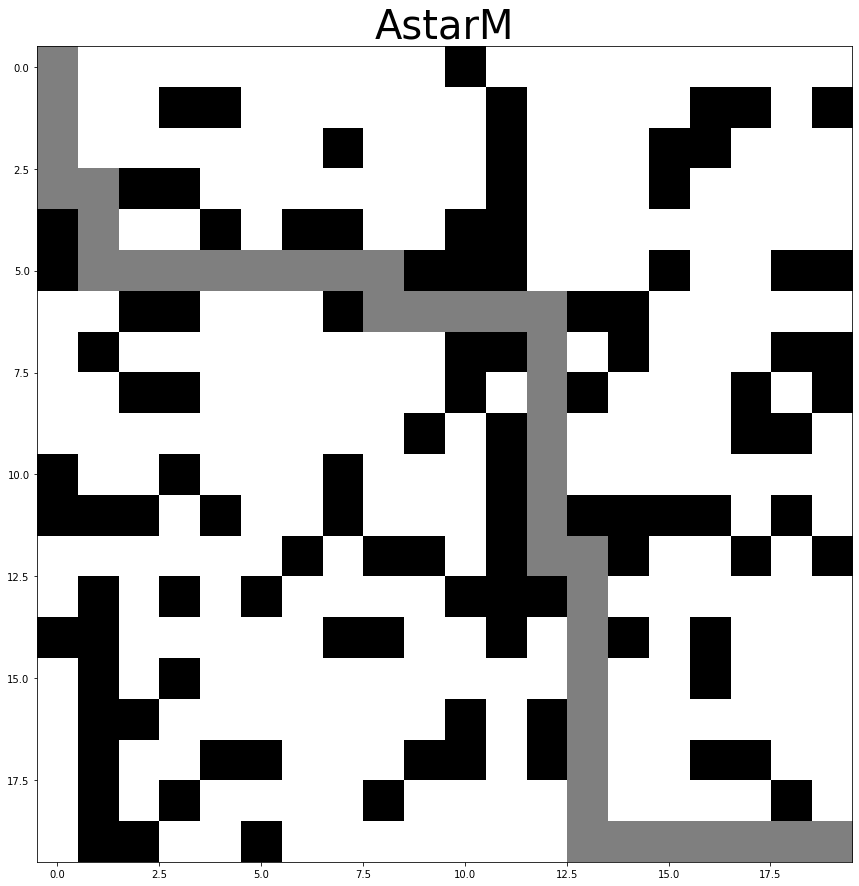

73 73
fails 0
SOLUTION FOUND


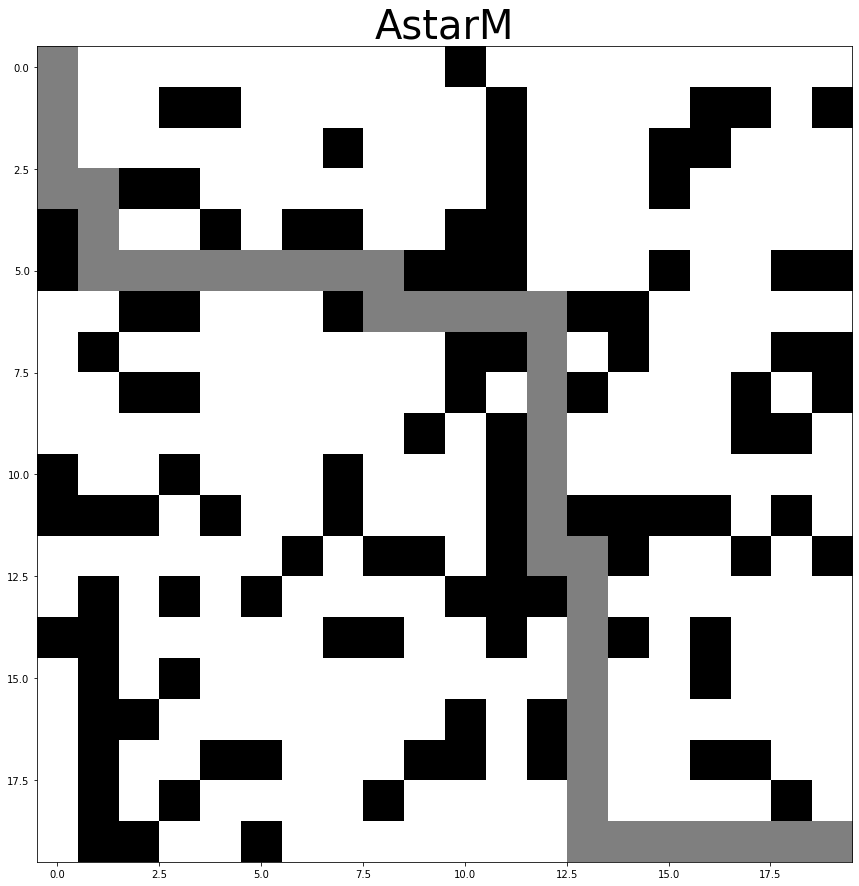

SOLUTION FOUND


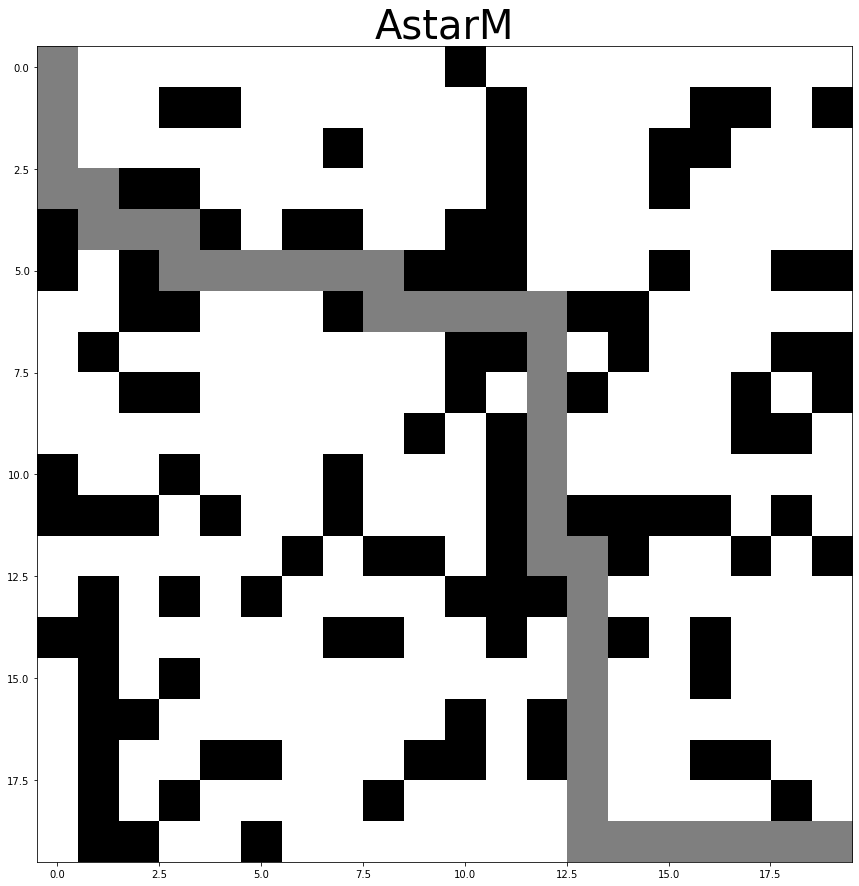

73 74
fails 0
SOLUTION FOUND


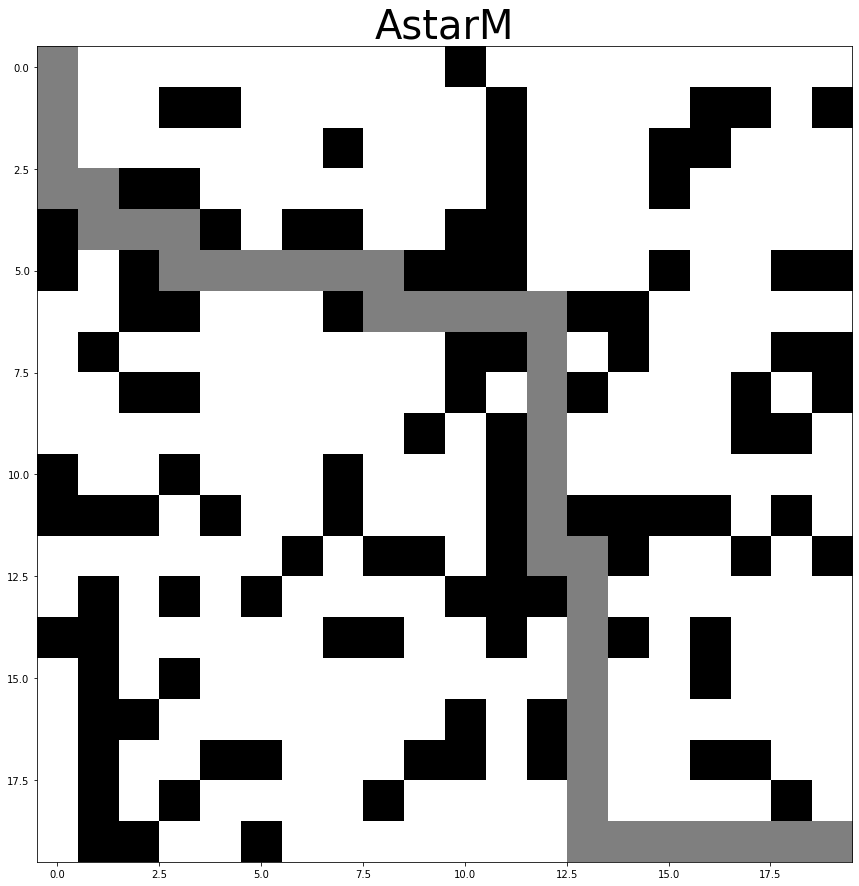

SOLUTION FOUND


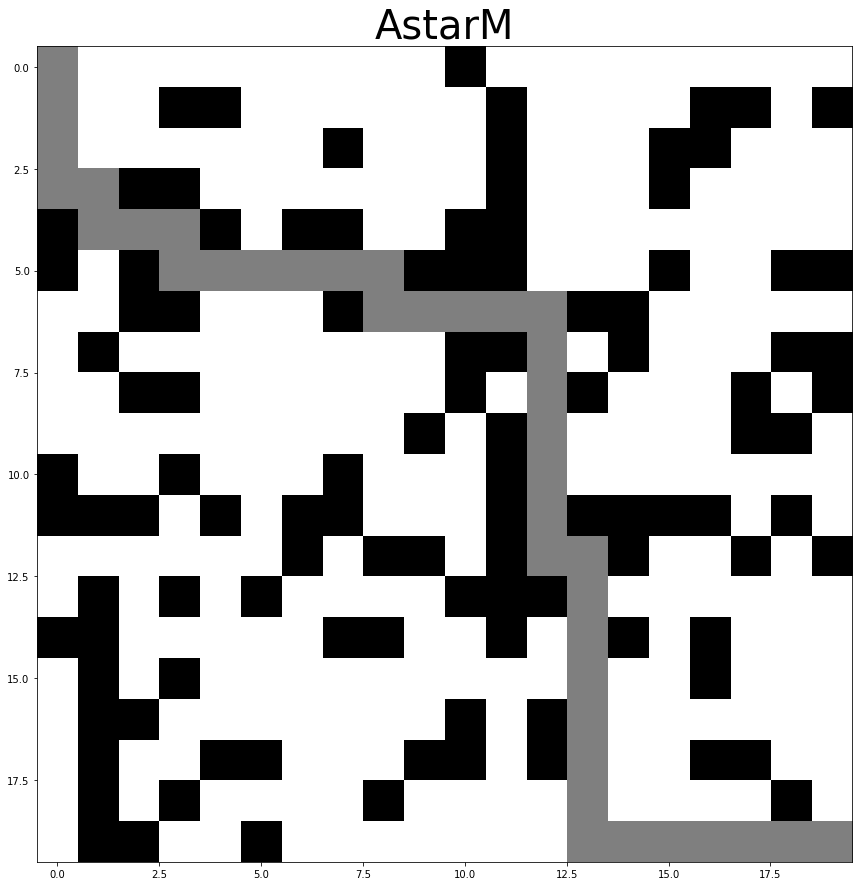

74 73
fails 1
SOLUTION FOUND


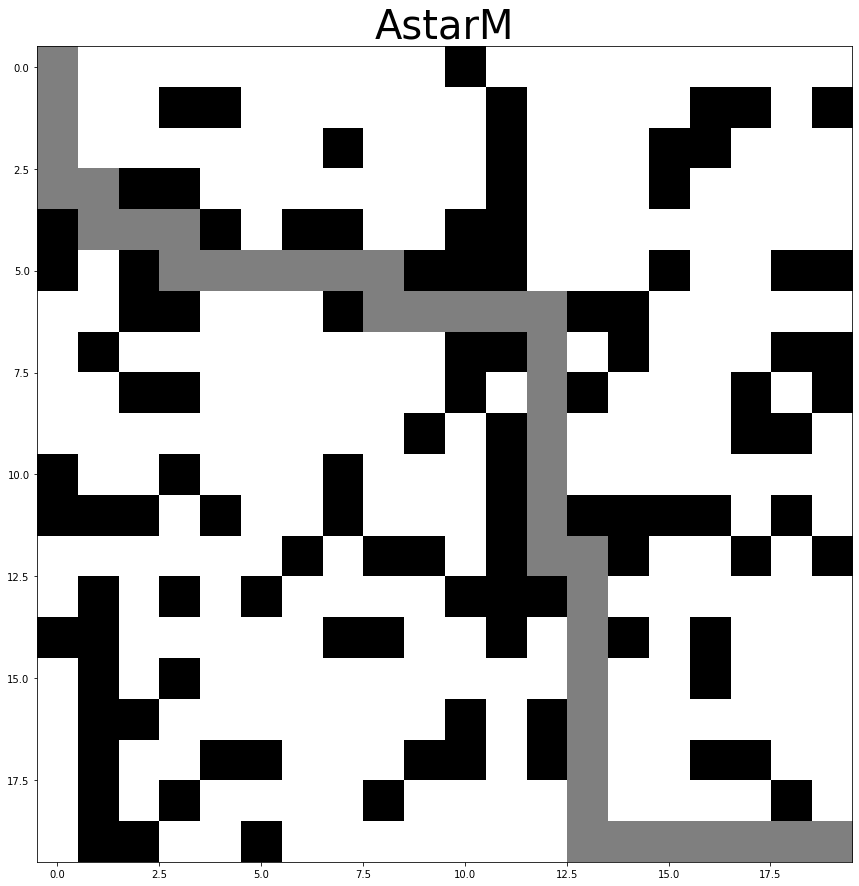

SOLUTION FOUND


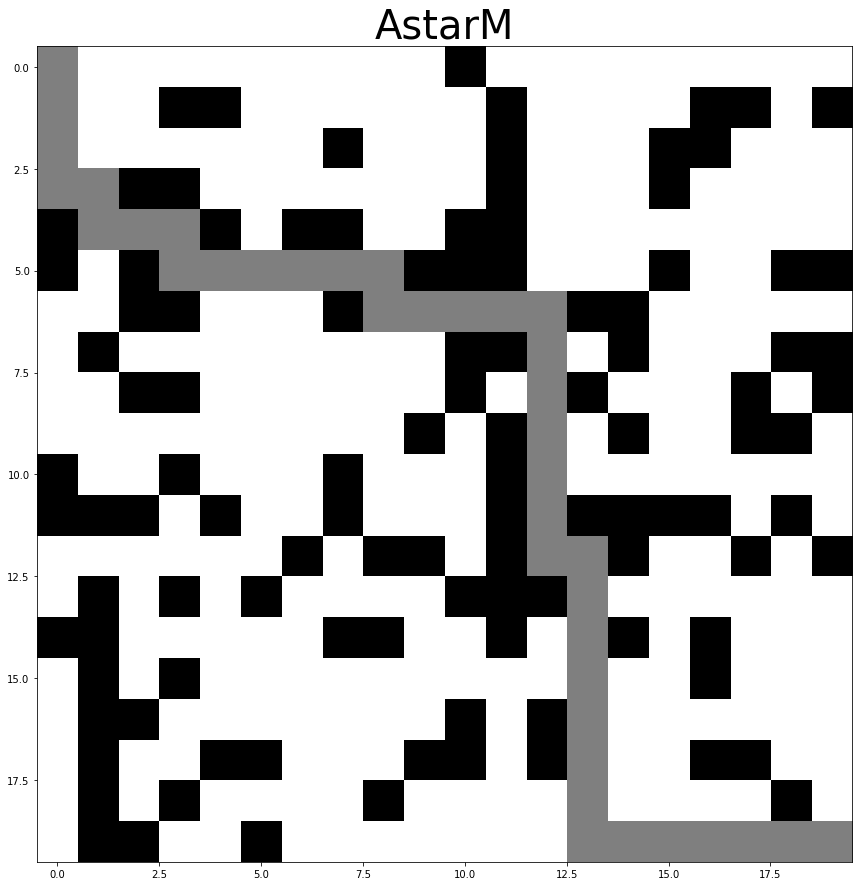

74 74
fails 0
SOLUTION FOUND


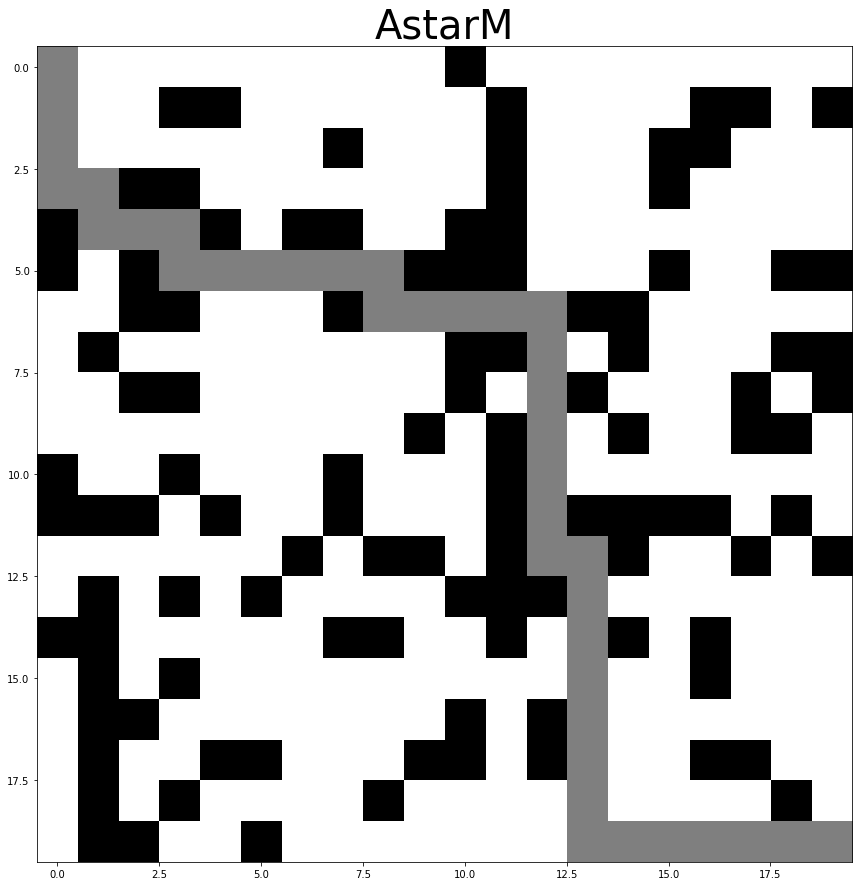

SOLUTION FOUND


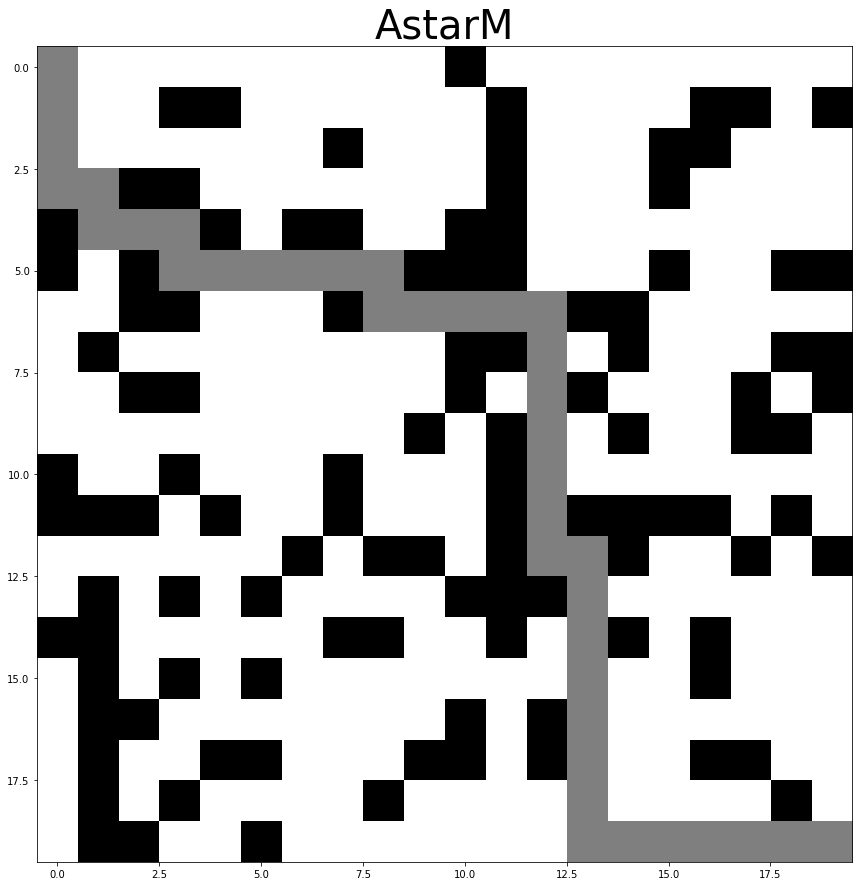

74 74
fails 0
SOLUTION FOUND


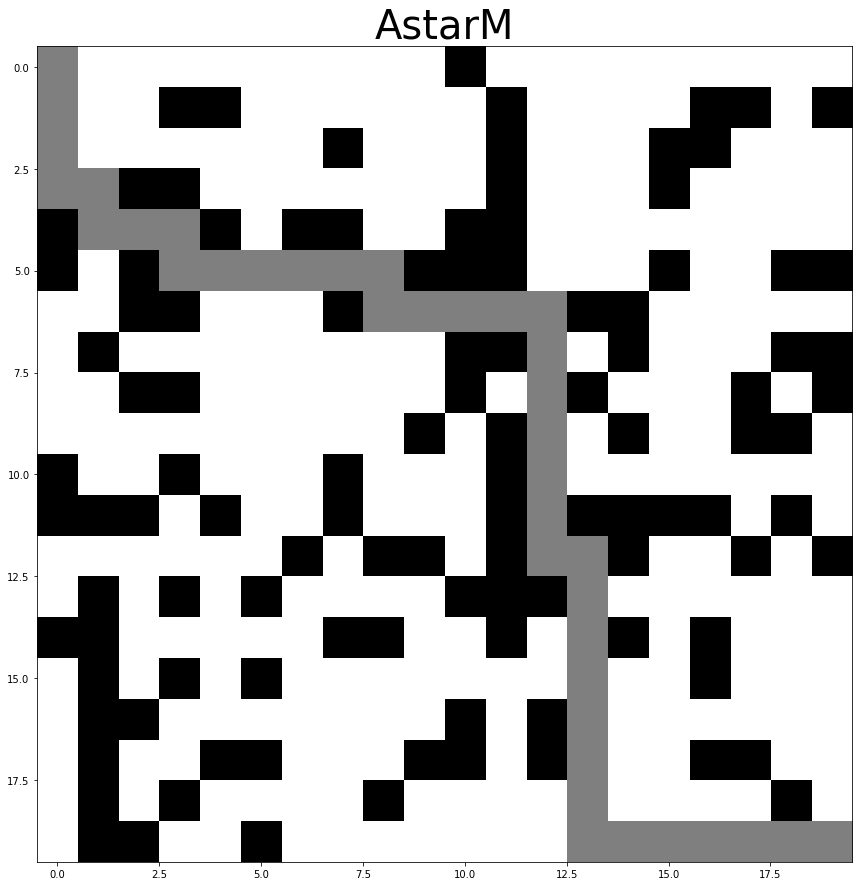

SOLUTION FOUND


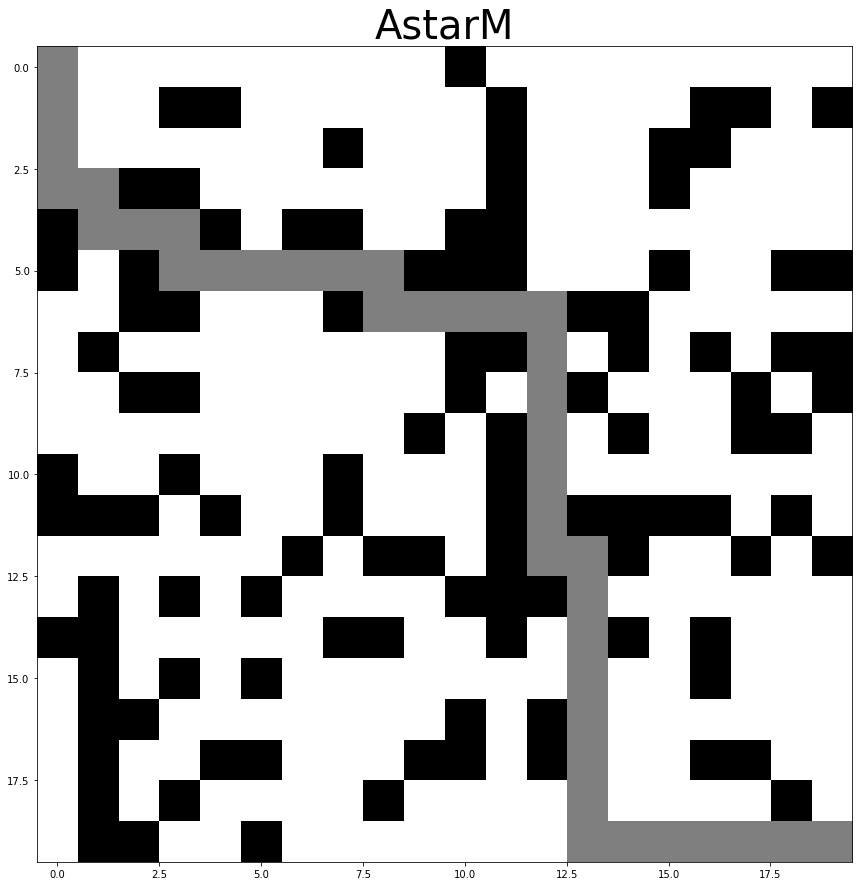

74 74
fails 0
SOLUTION FOUND


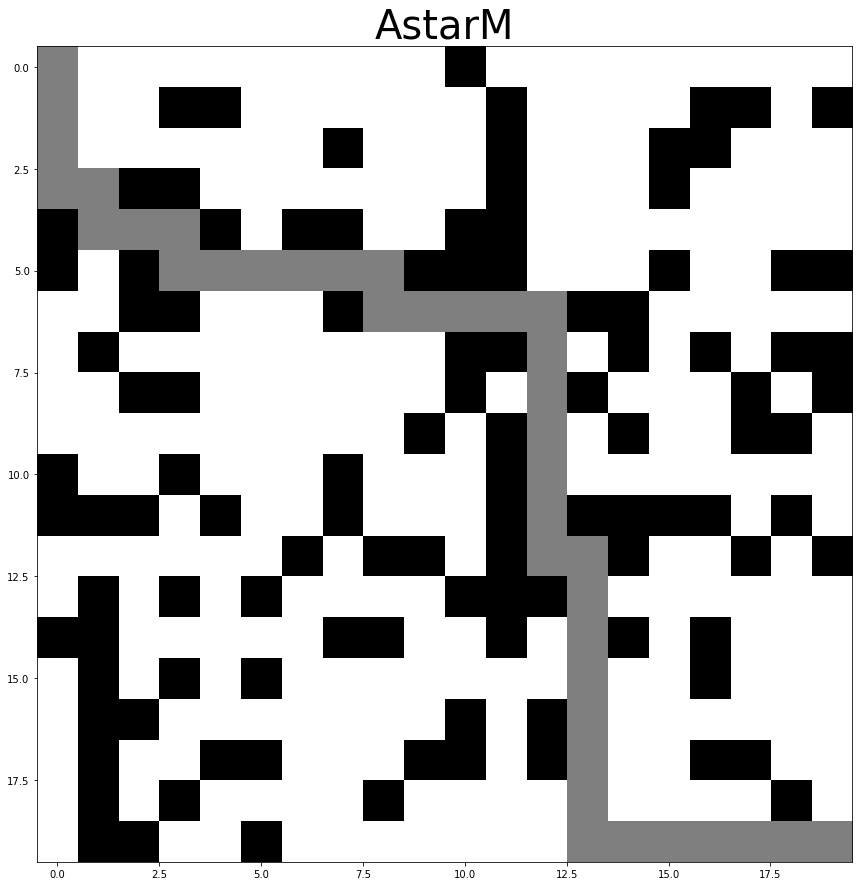

SOLUTION FOUND


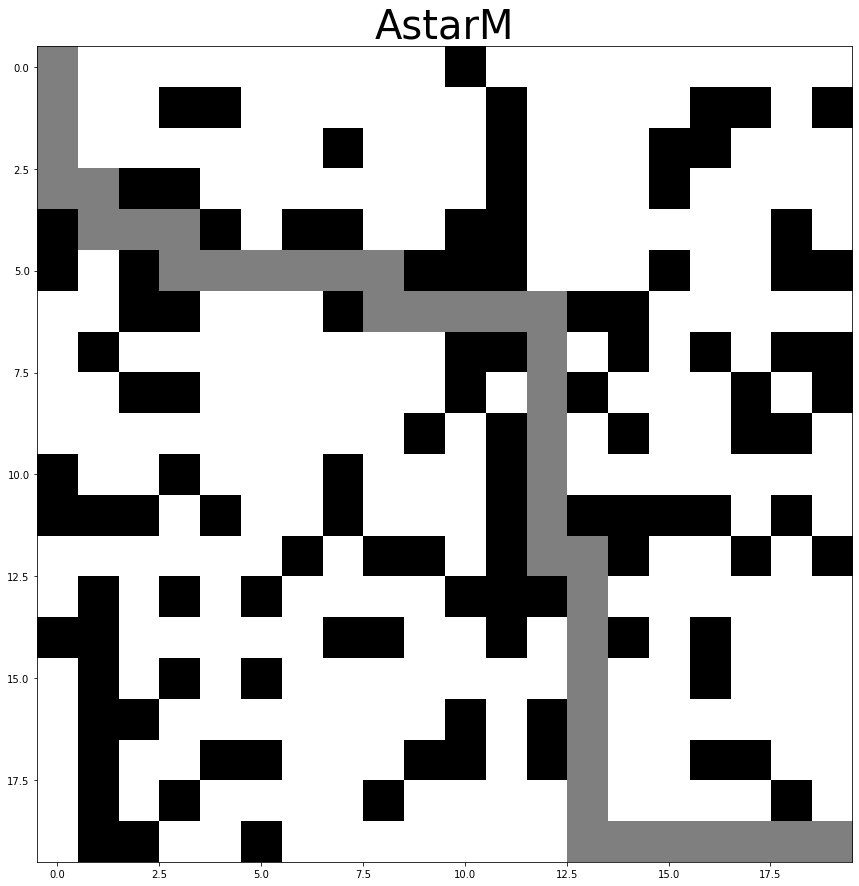

74 74
fails 0
SOLUTION FOUND


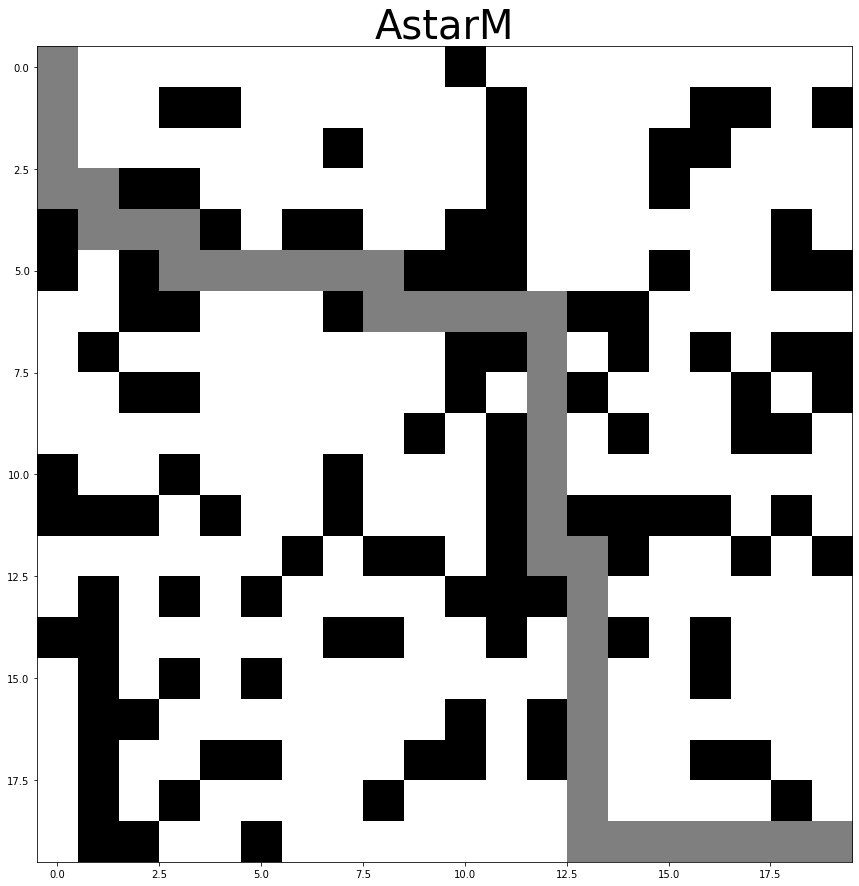

SOLUTION FOUND


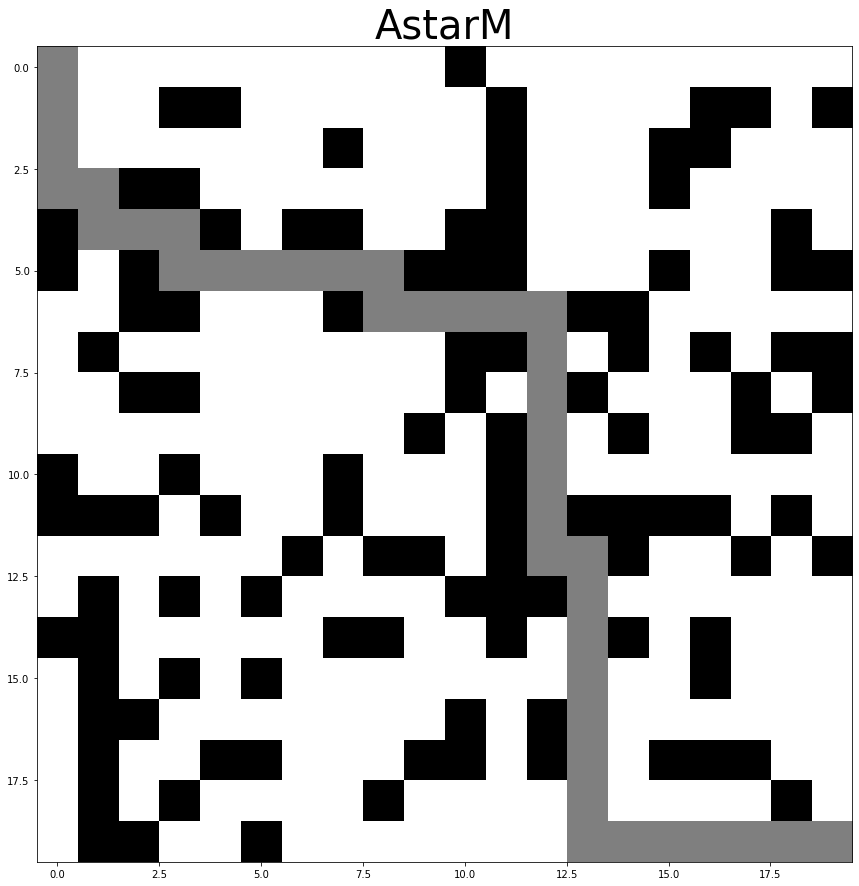

74 74
fails 0
SOLUTION FOUND


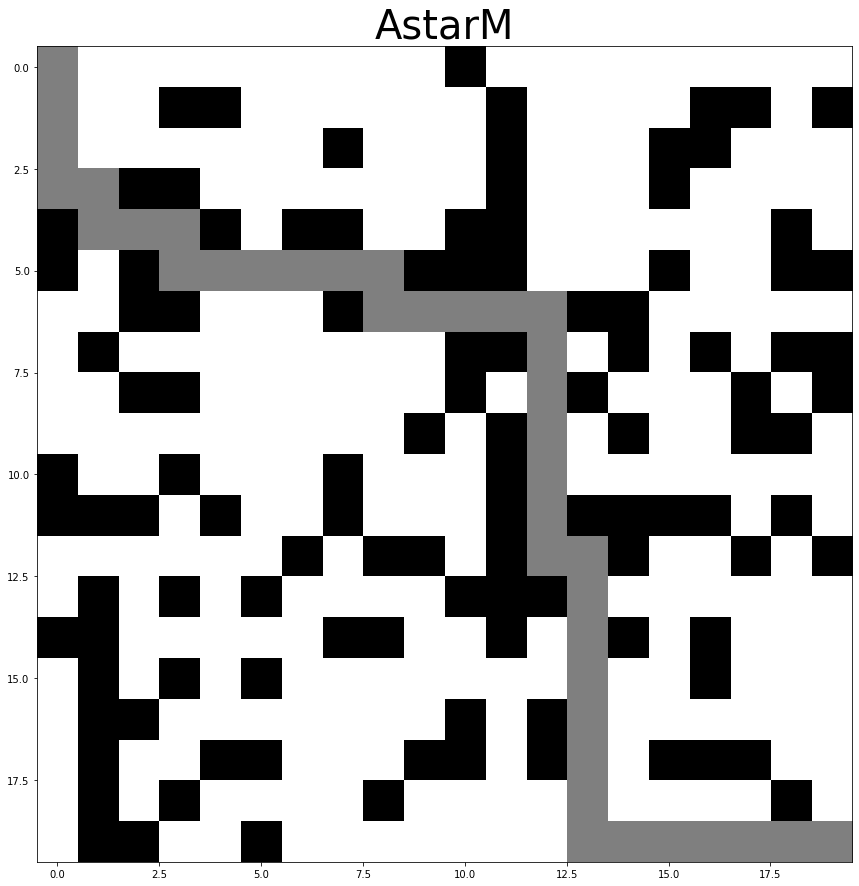

SOLUTION FOUND


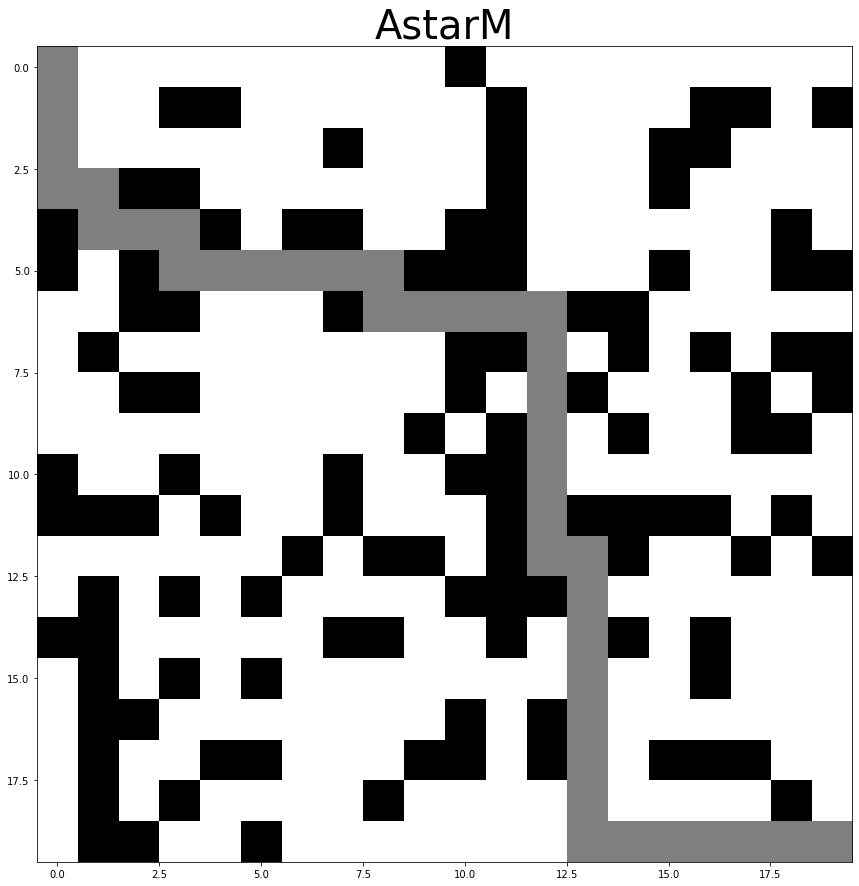

74 73
fails 1
SOLUTION FOUND


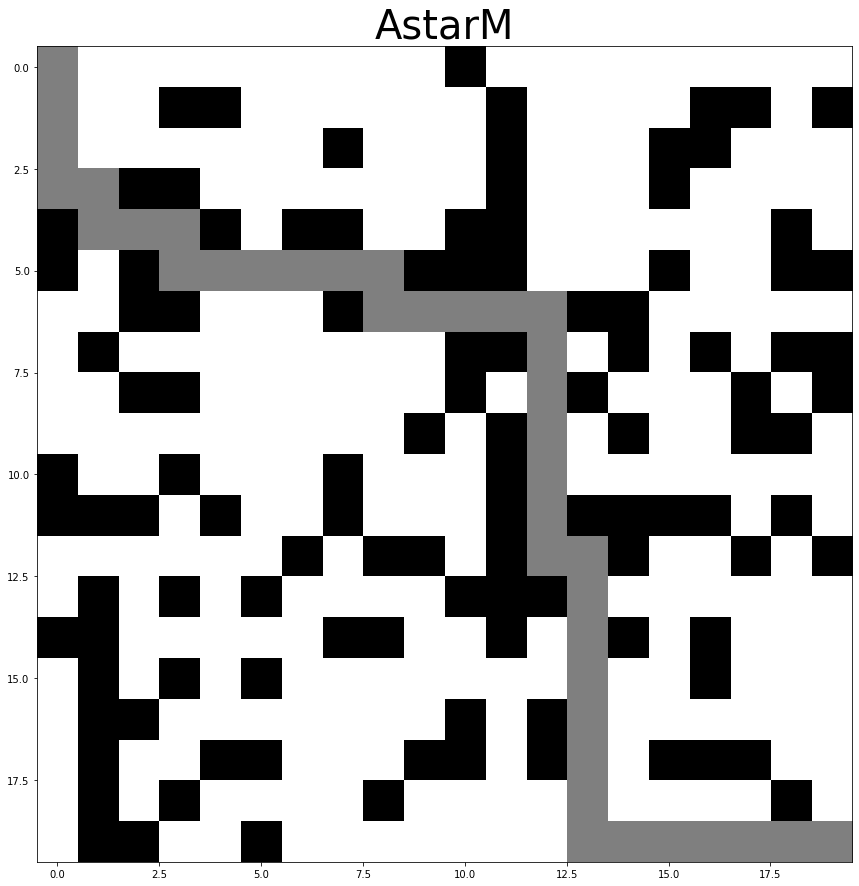

SOLUTION FOUND


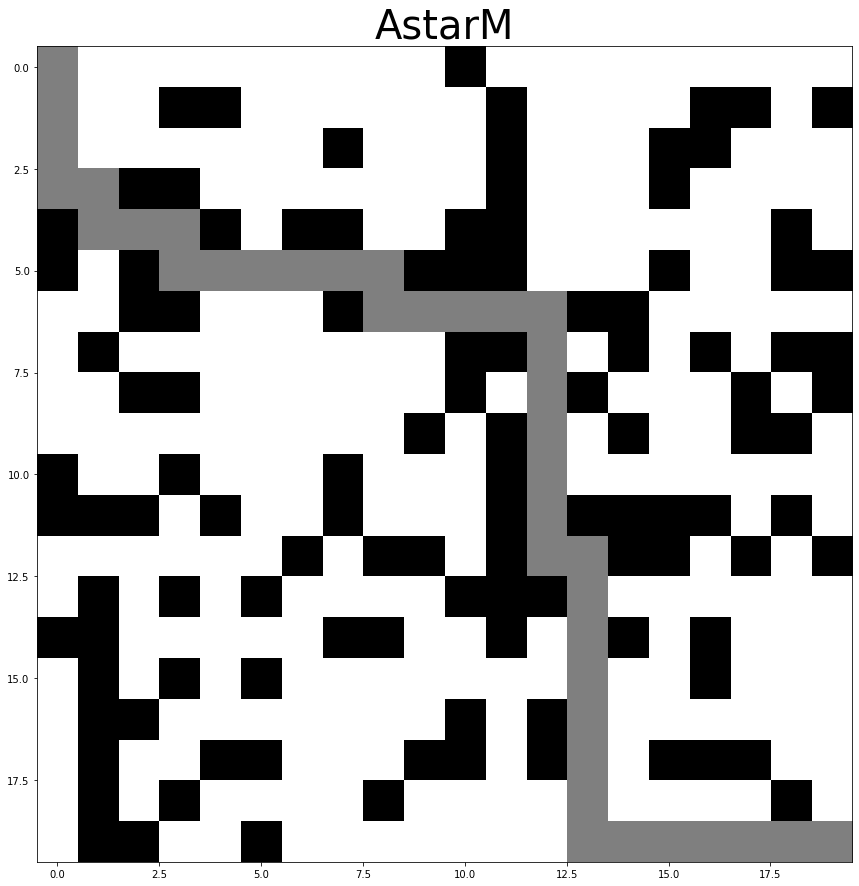

74 74
fails 0
SOLUTION FOUND


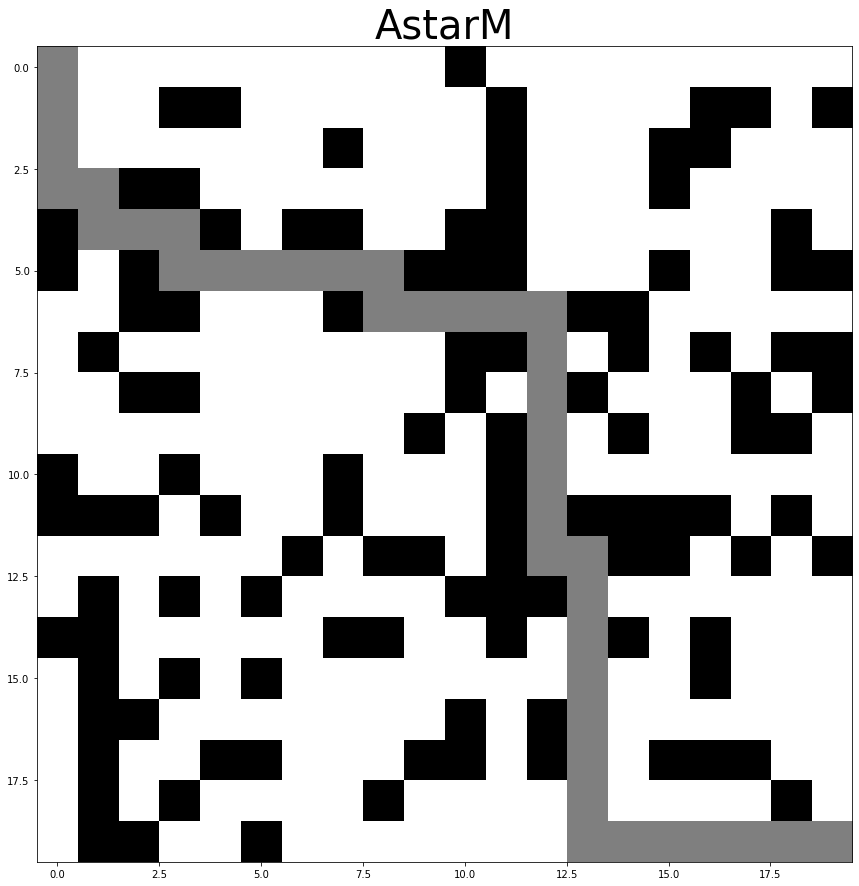

SOLUTION FOUND


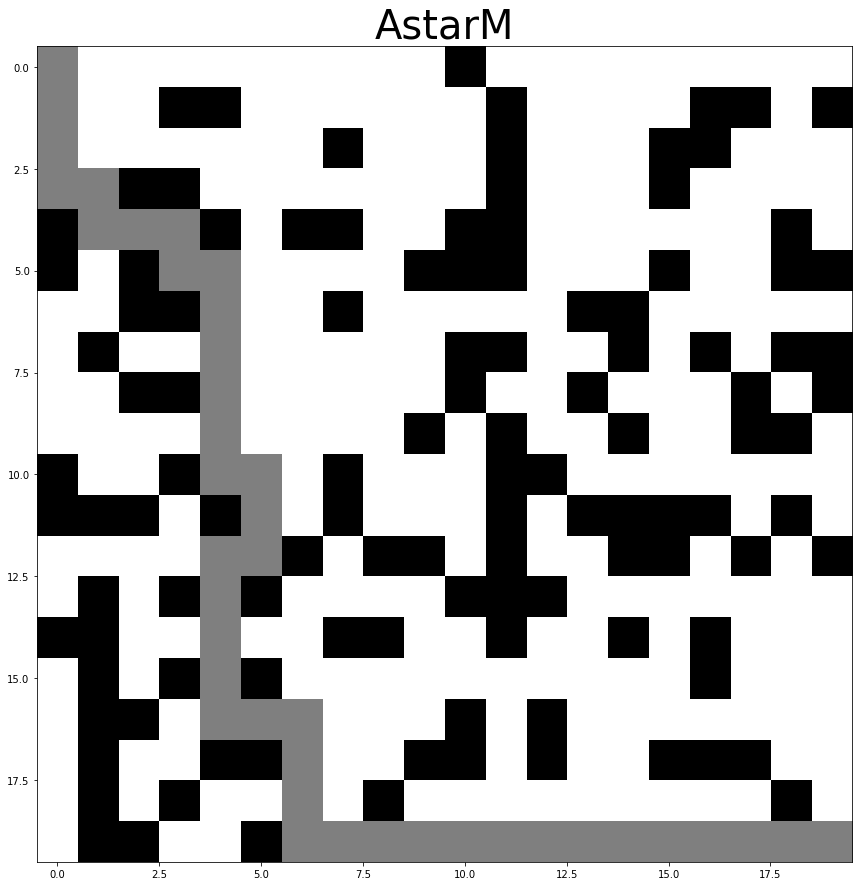

74 174
fails 0
SOLUTION FOUND


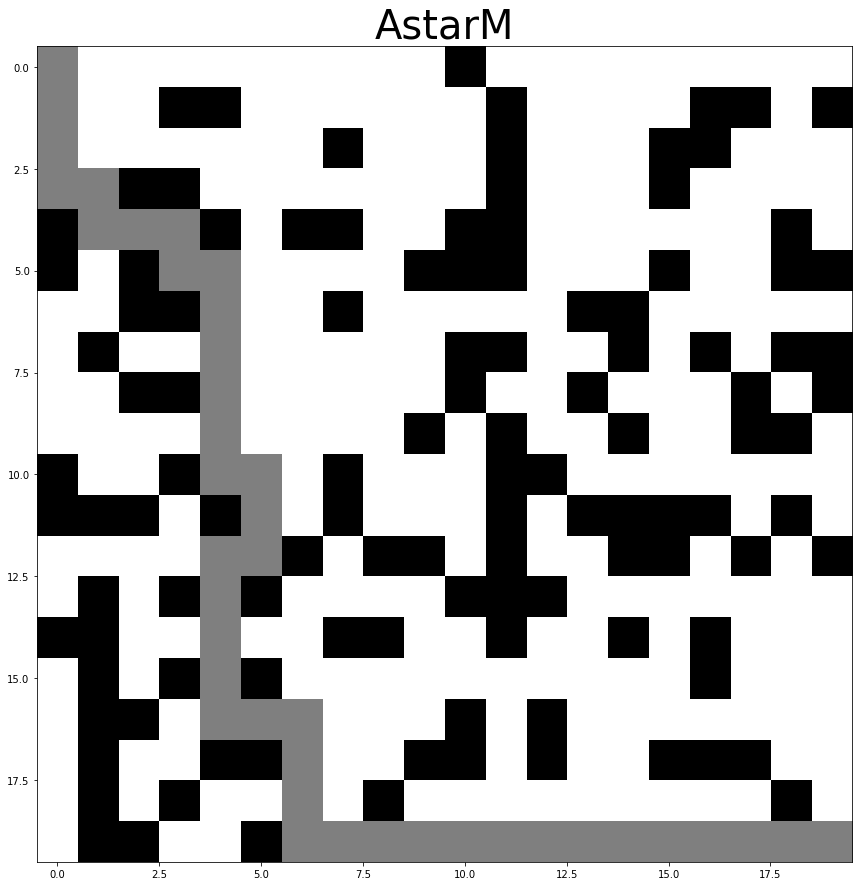

SOLUTION FOUND


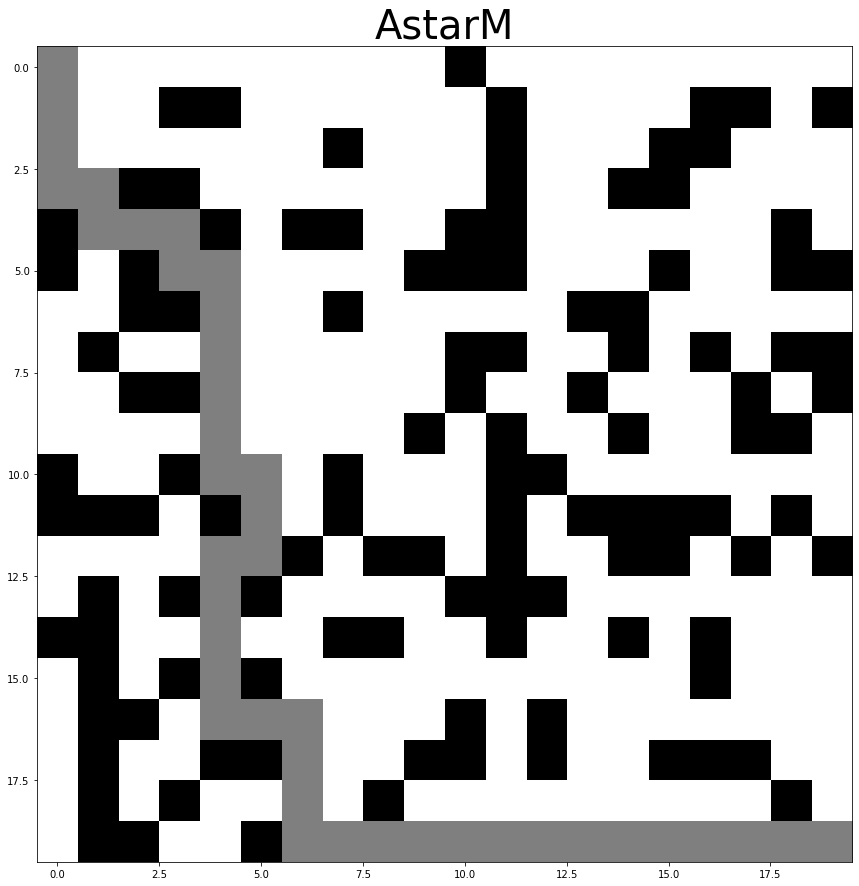

174 174
fails 0
SOLUTION FOUND


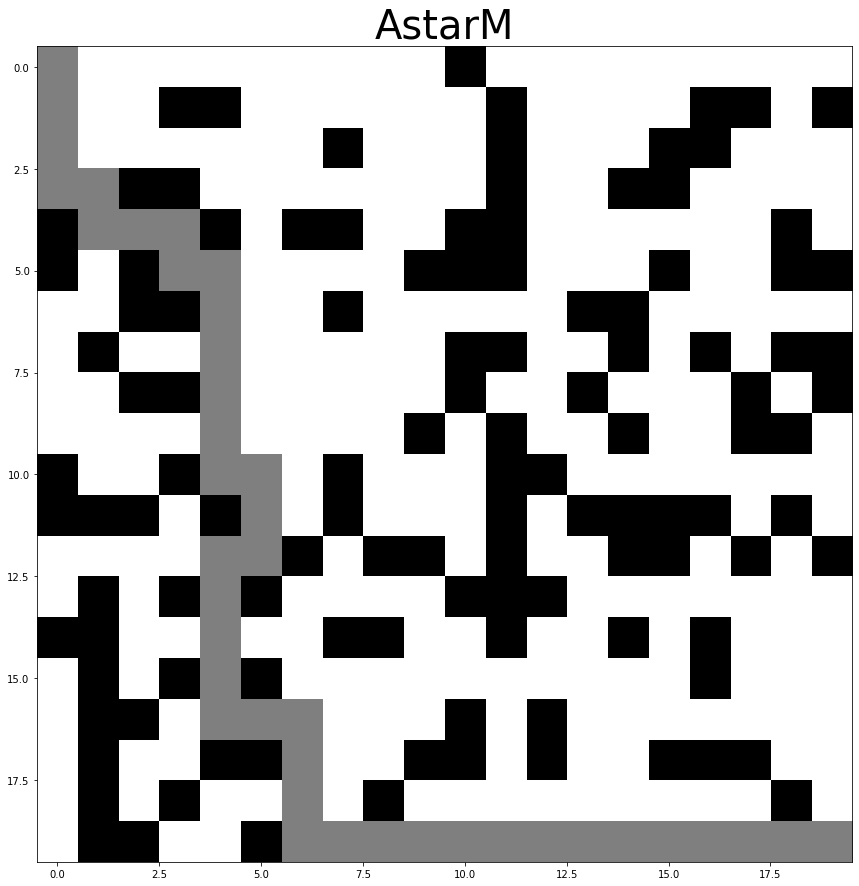

SOLUTION FOUND


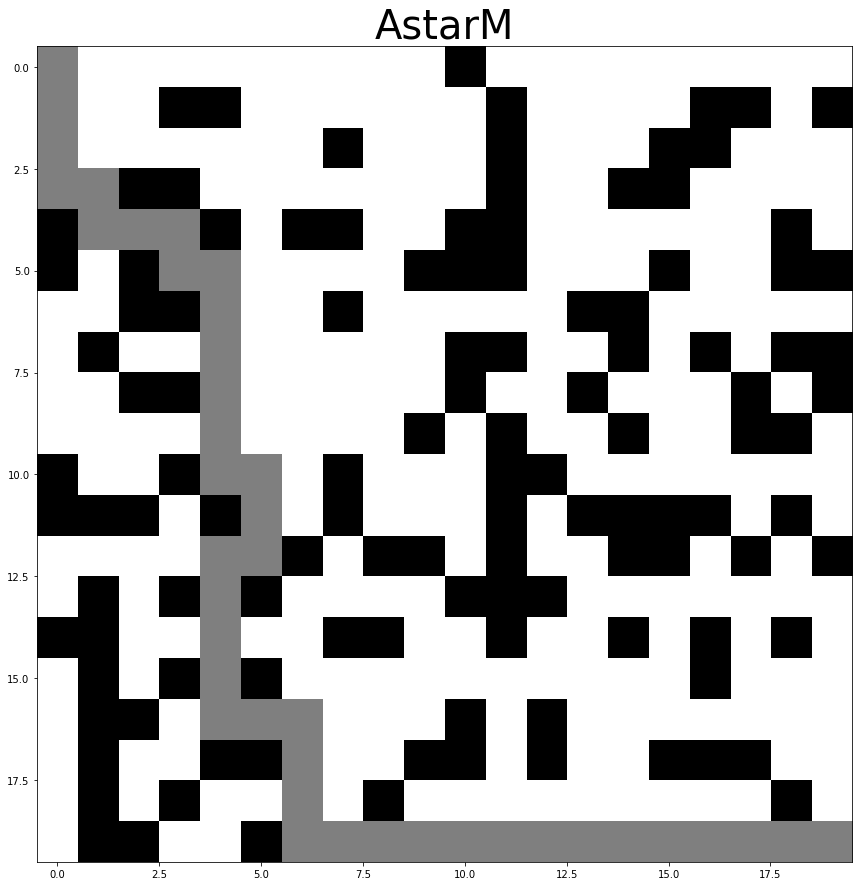

174 174
fails 0
SOLUTION FOUND


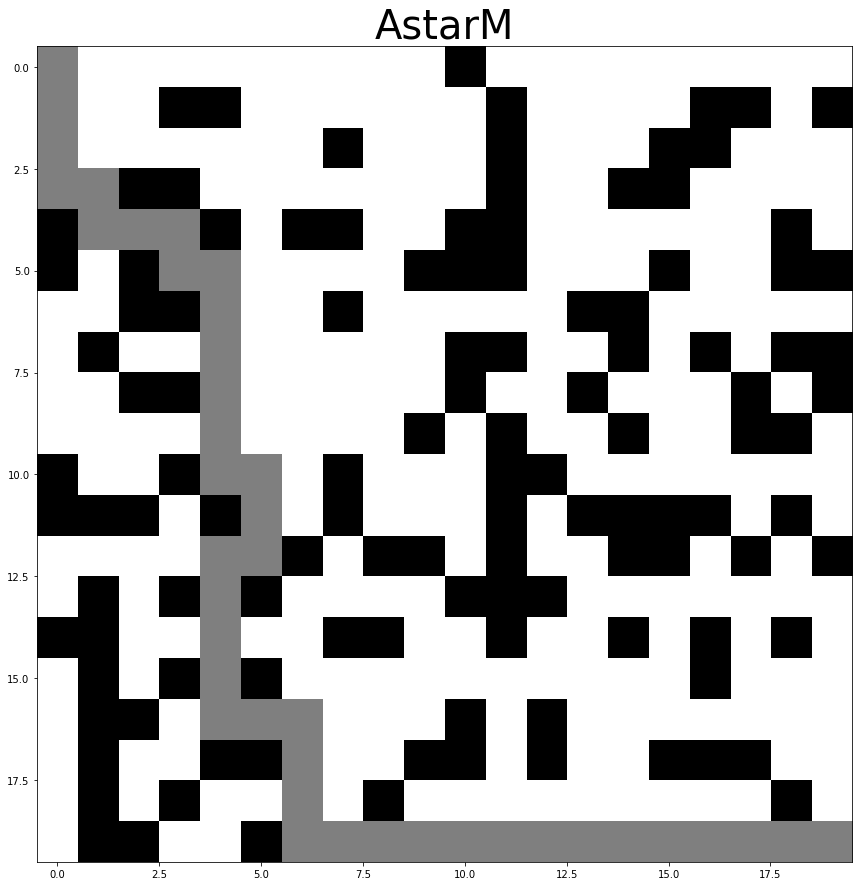

SOLUTION FOUND


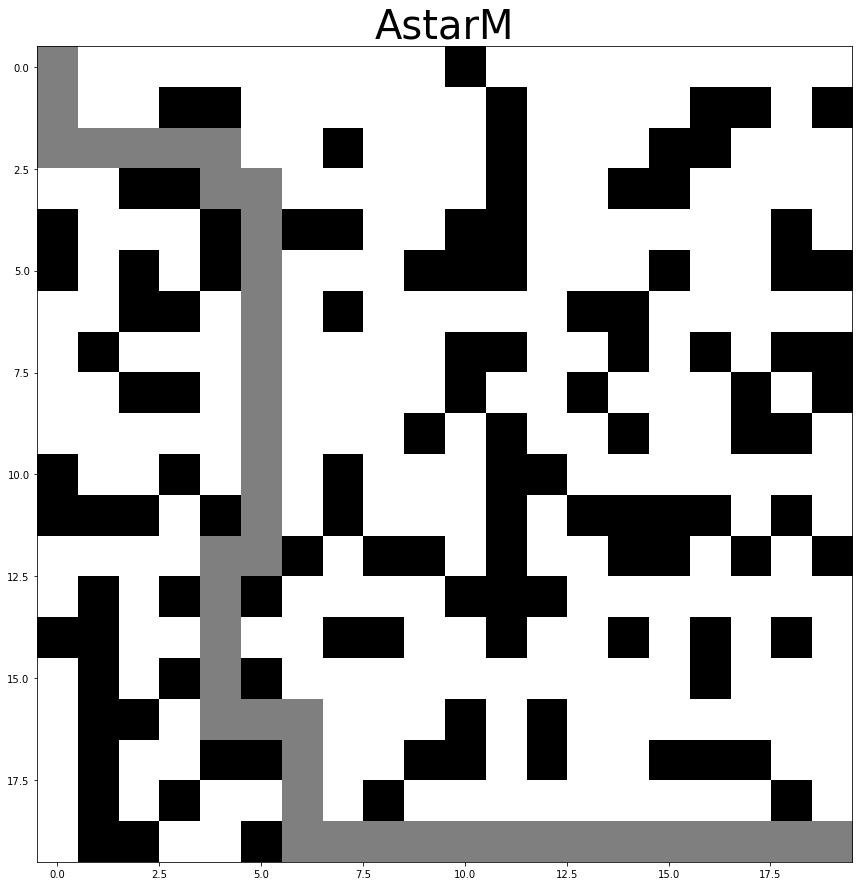

174 160
fails 1
SOLUTION FOUND


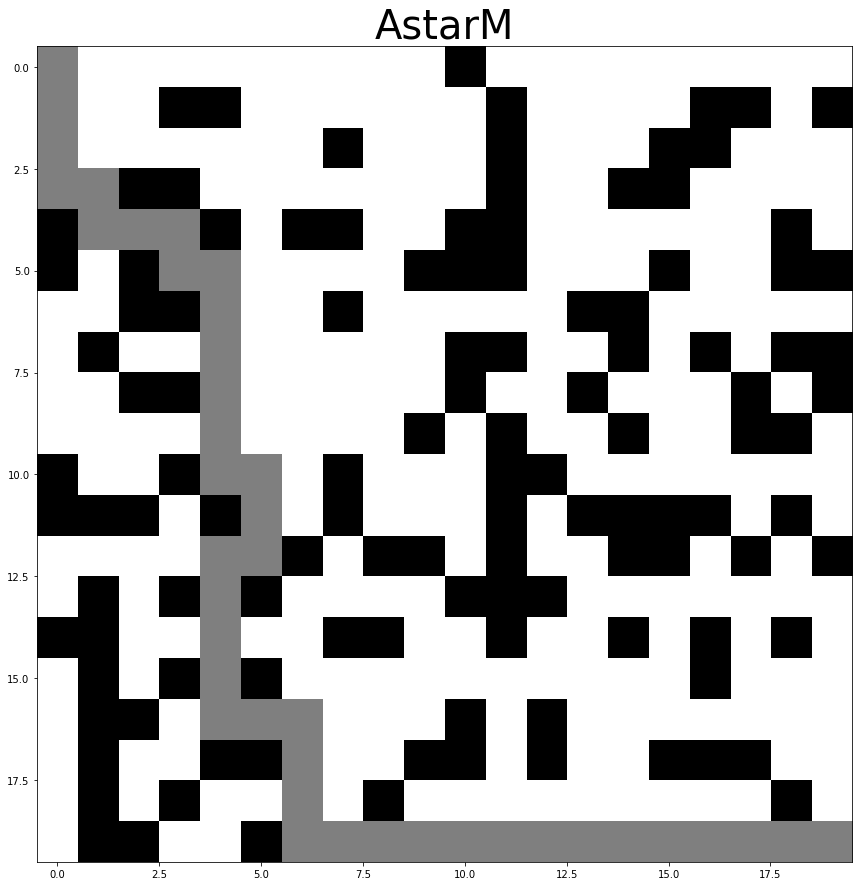

SOLUTION FOUND


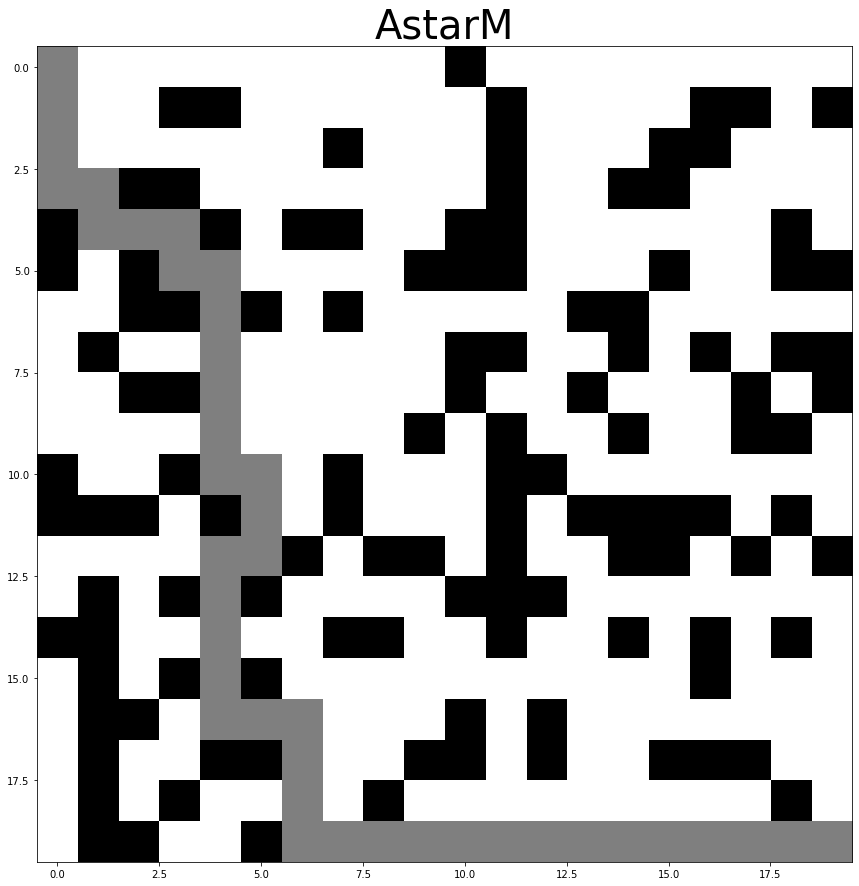

174 170
fails 2
SOLUTION FOUND


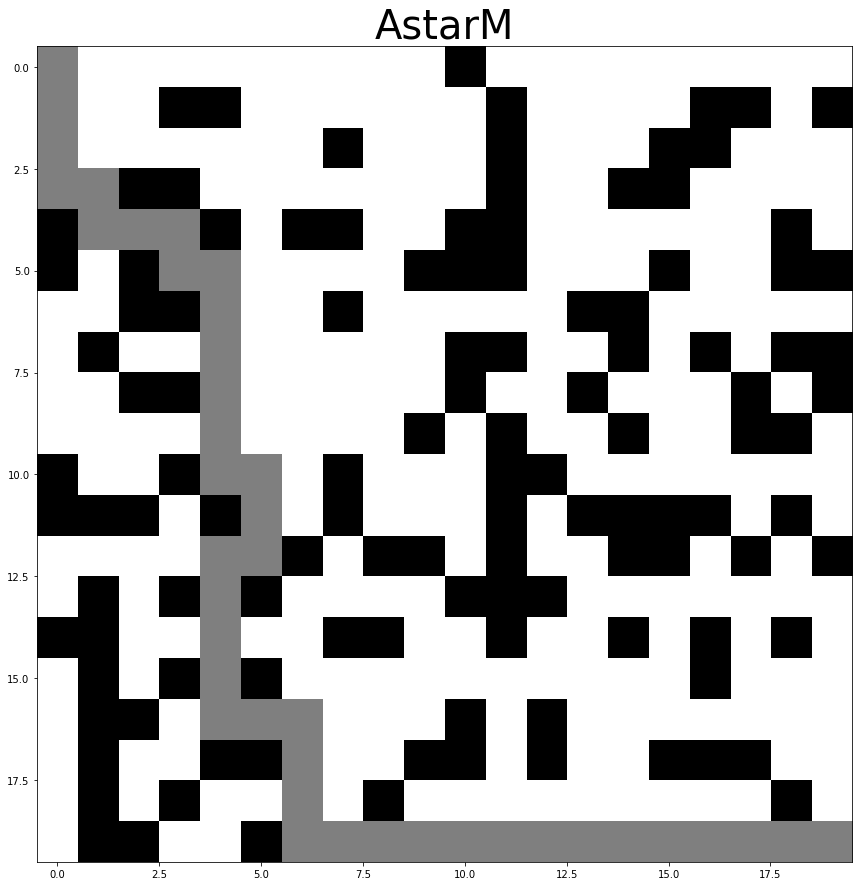

SOLUTION FOUND


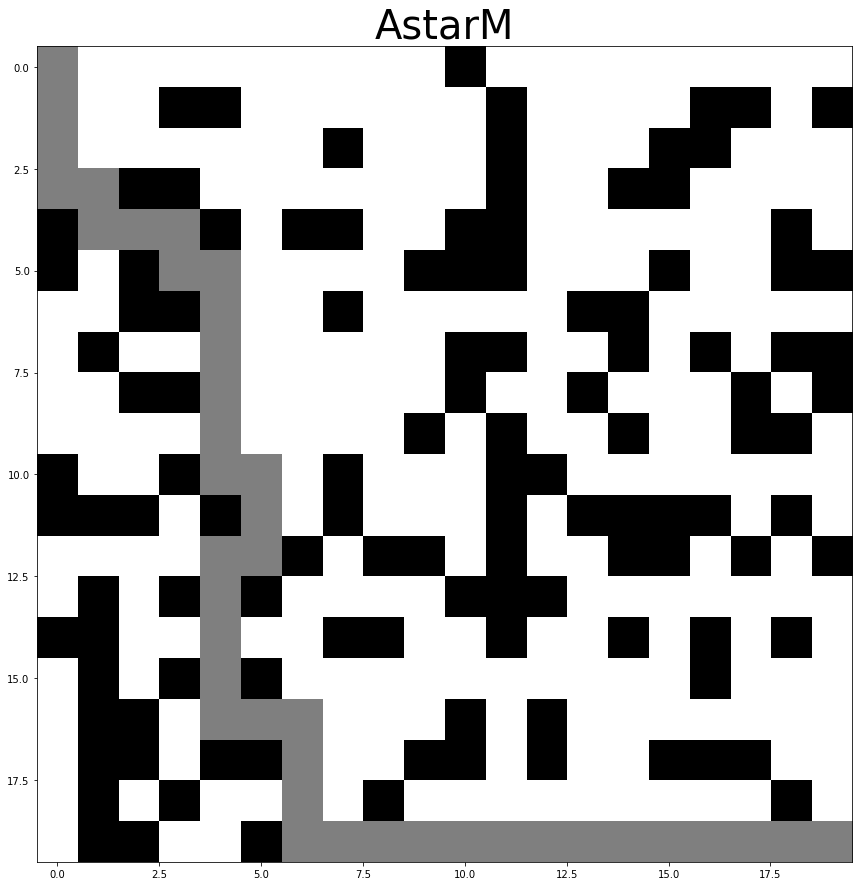

174 174
fails 0
SOLUTION FOUND


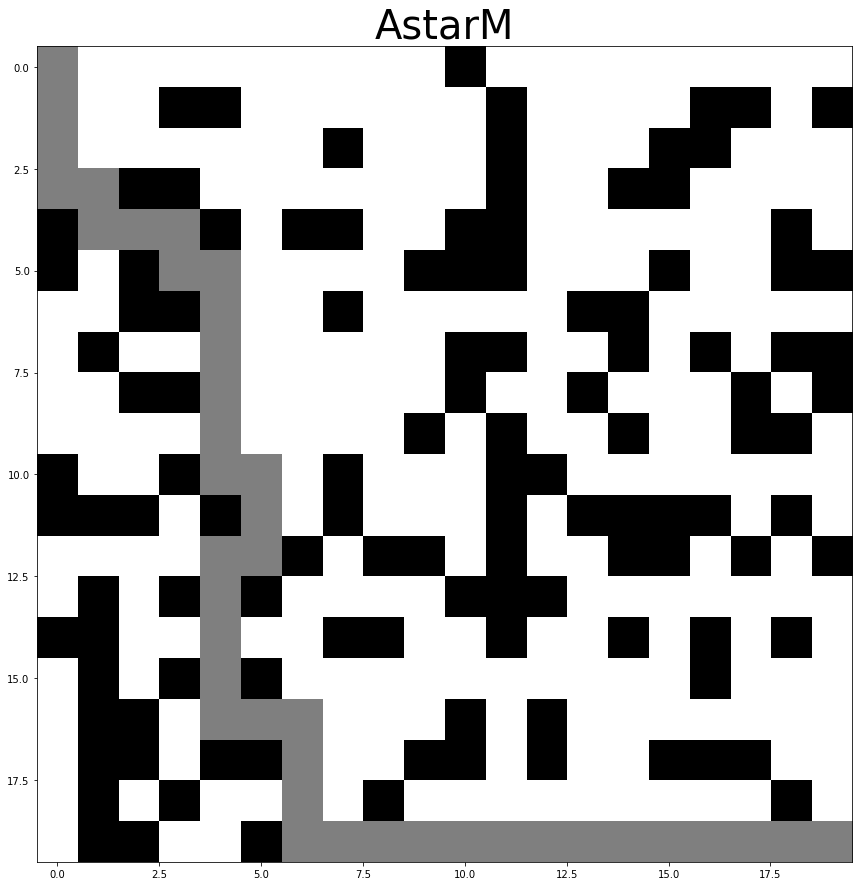

SOLUTION FOUND


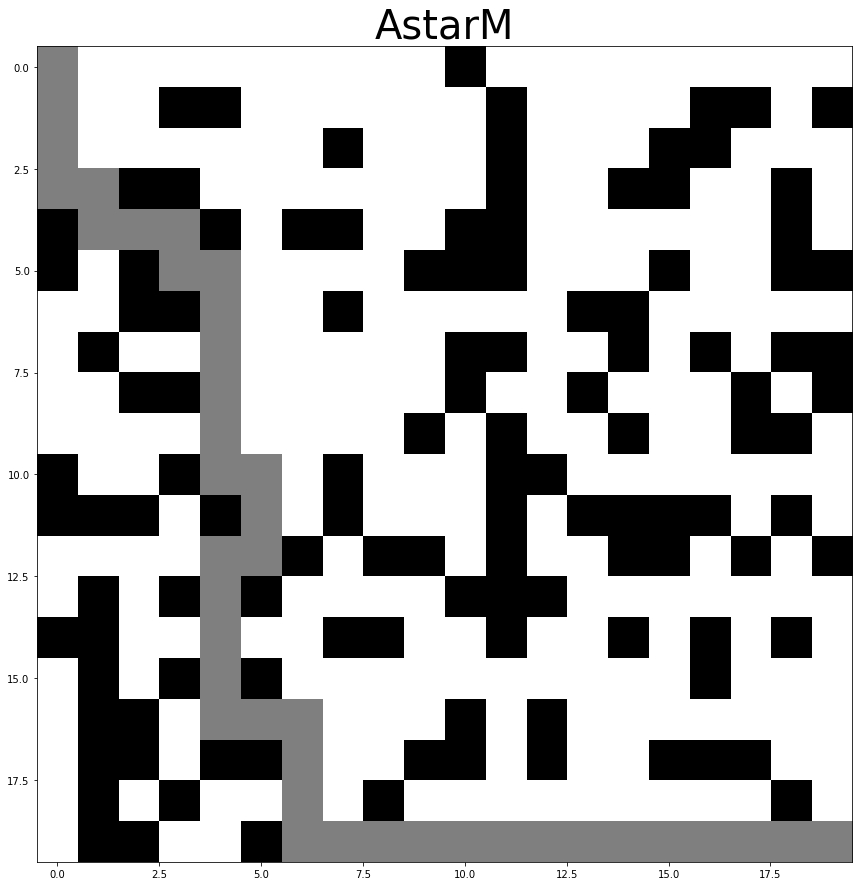

174 174
fails 0
SOLUTION FOUND


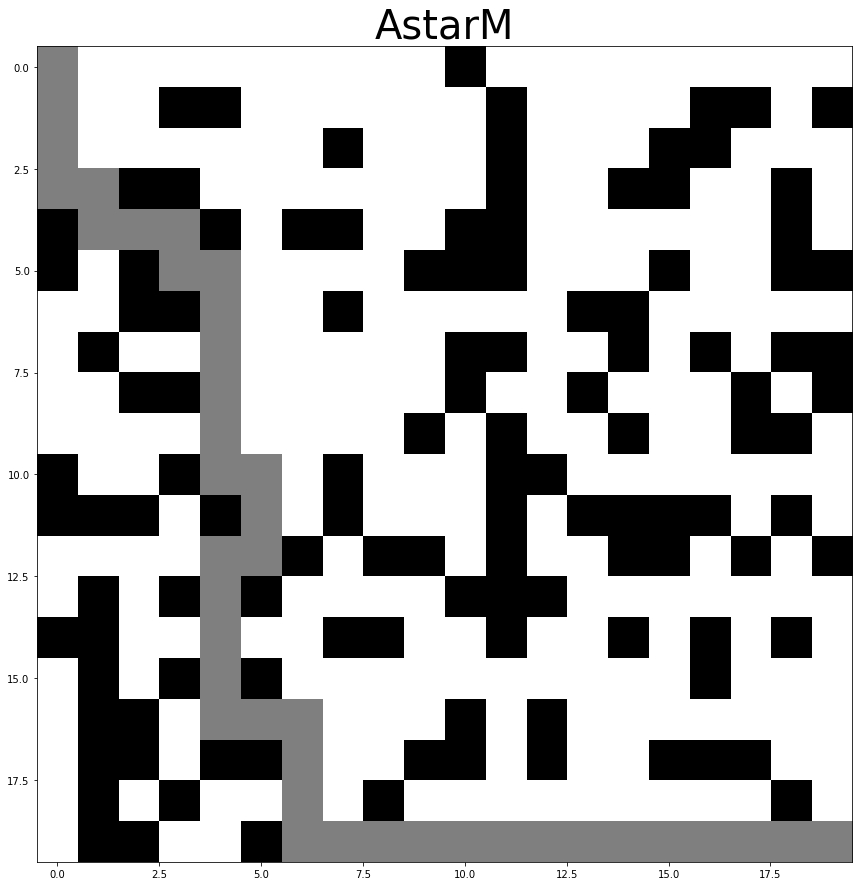

SOLUTION FOUND


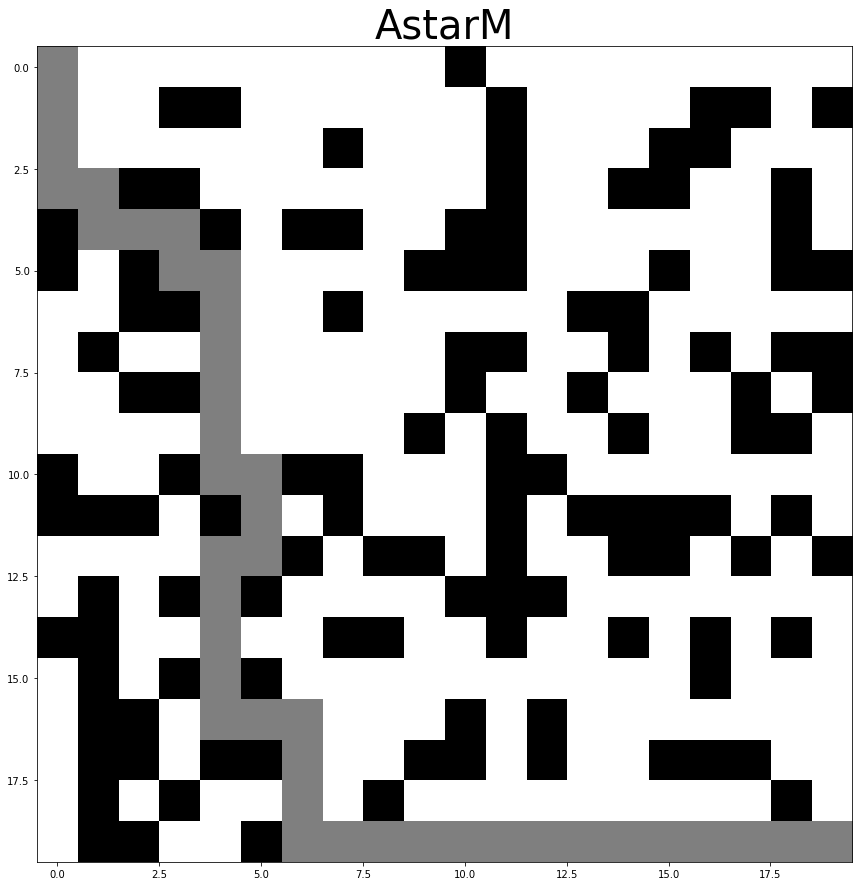

174 171
fails 1
SOLUTION FOUND


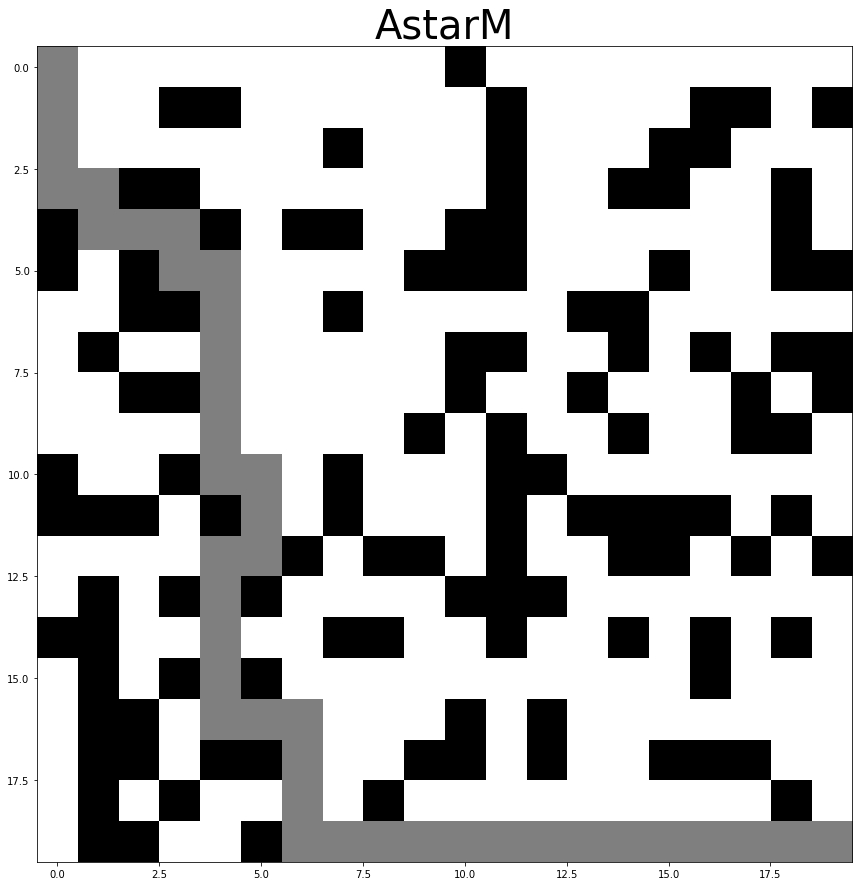

SOLUTION FOUND


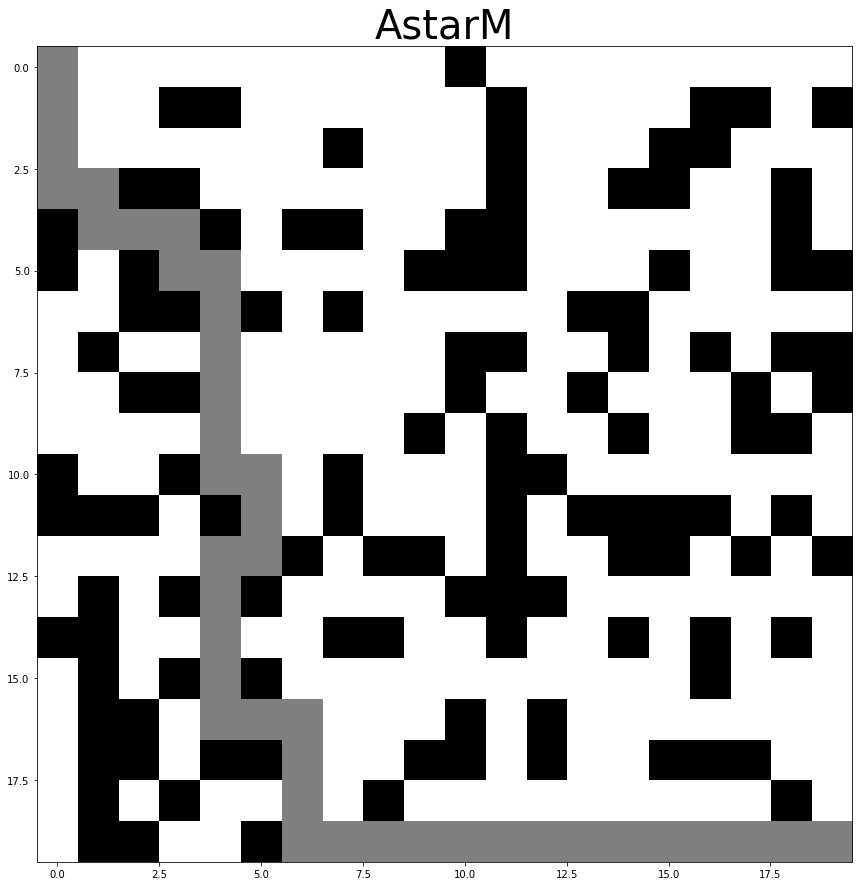

174 170
fails 2
SOLUTION FOUND


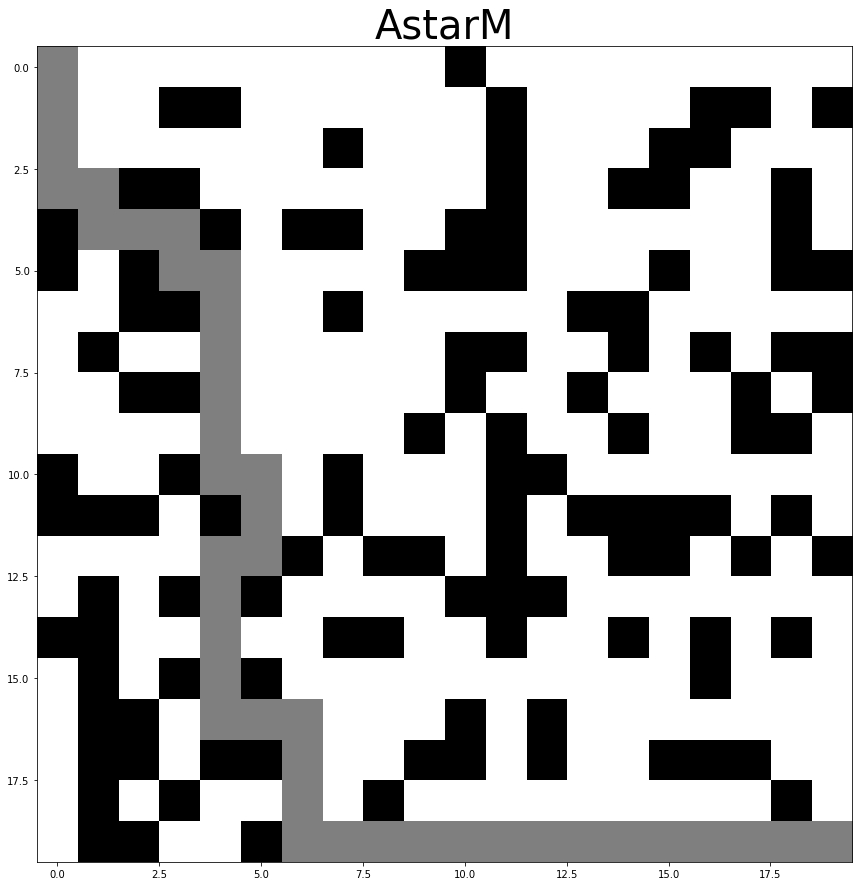

SOLUTION FOUND


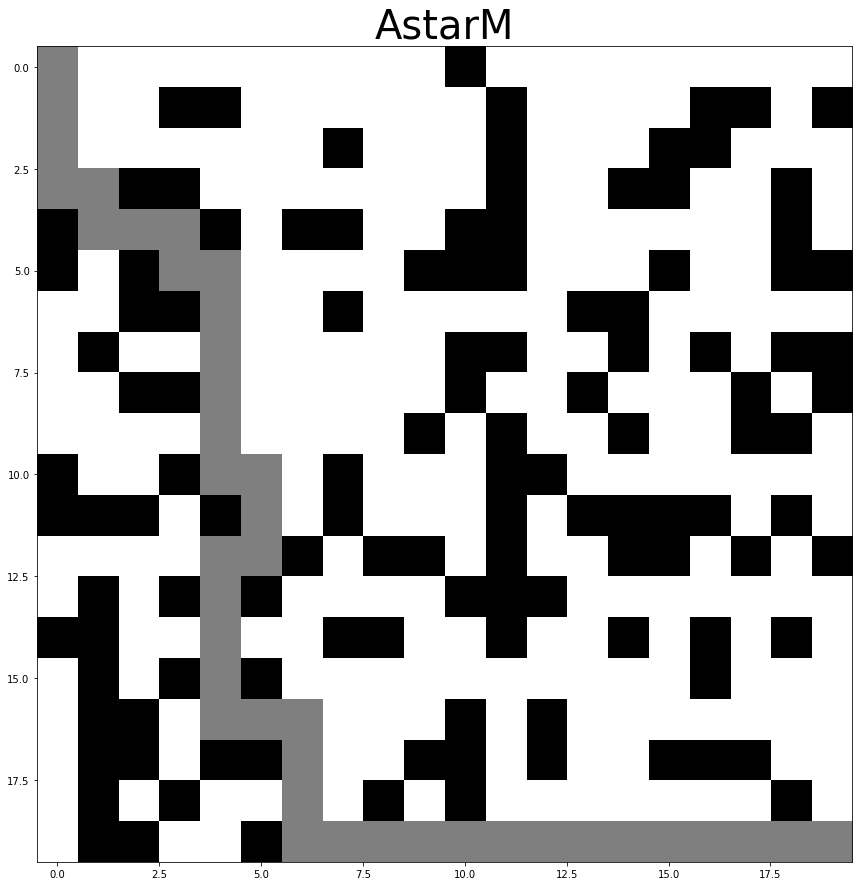

174 174
fails 0
SOLUTION FOUND


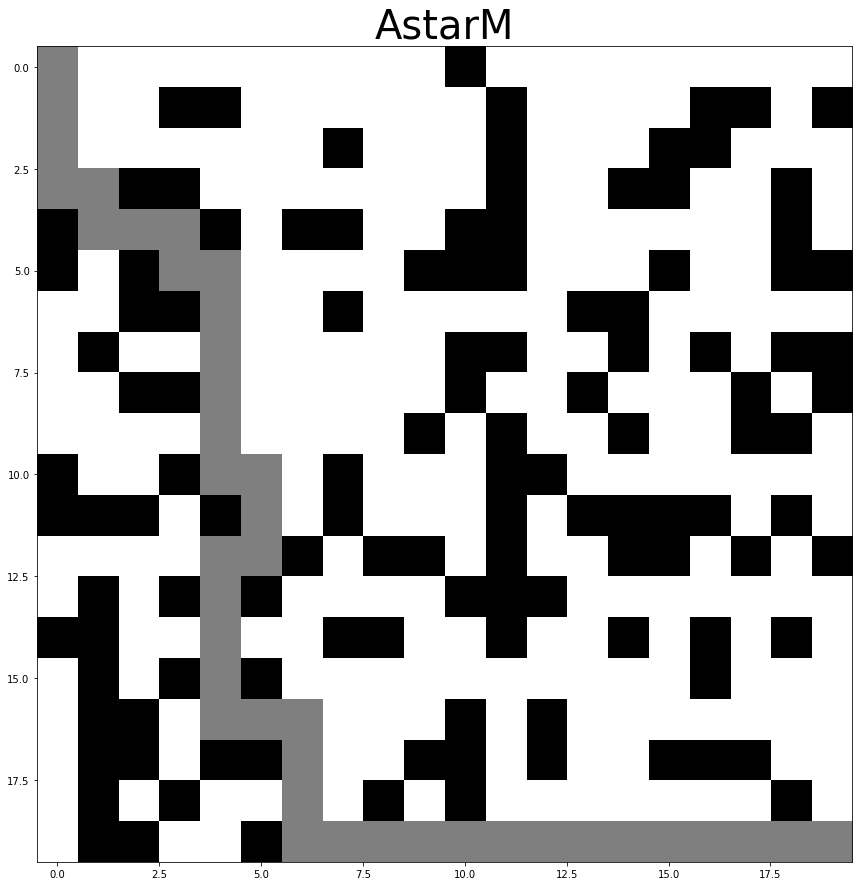

SOLUTION FOUND


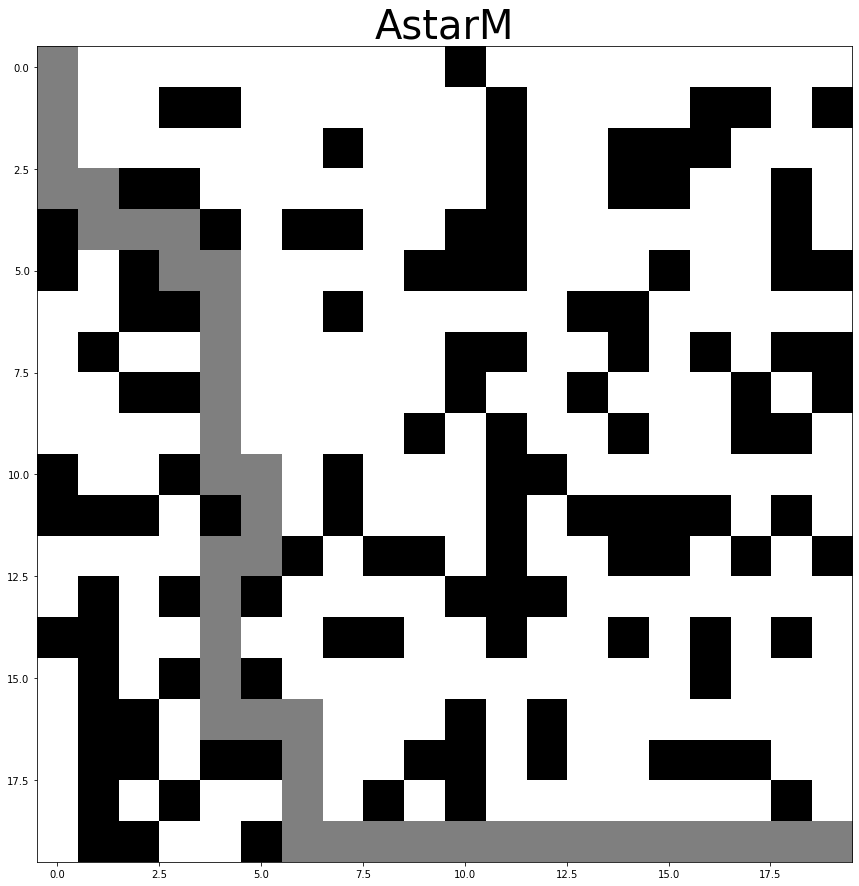

174 174
fails 0
SOLUTION FOUND


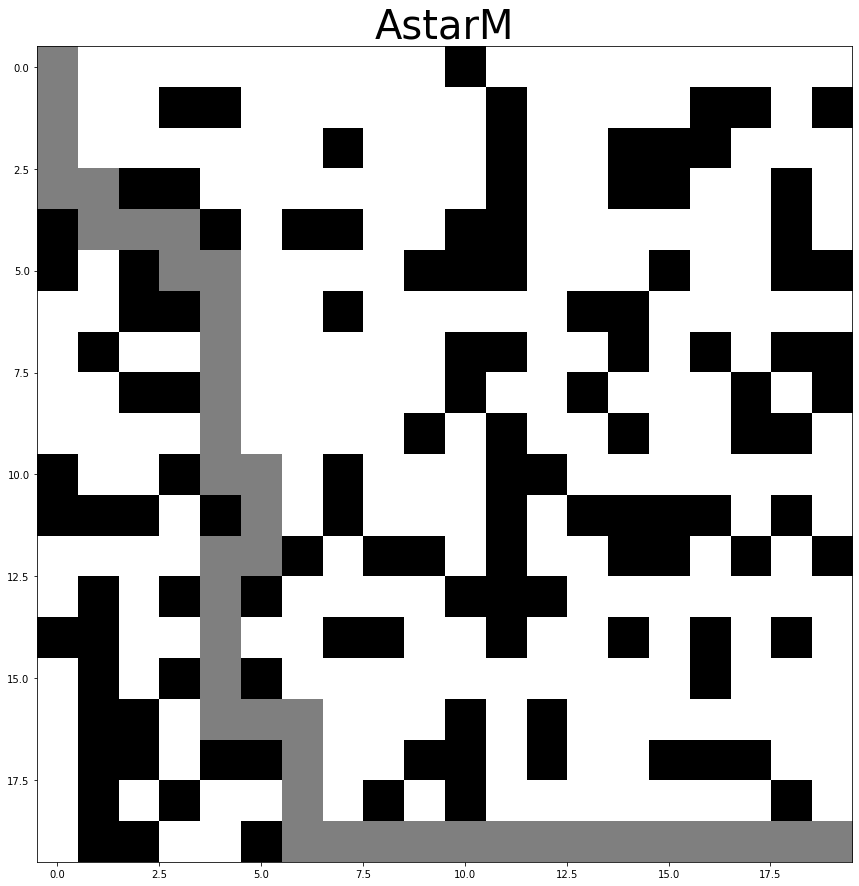

SOLUTION FOUND


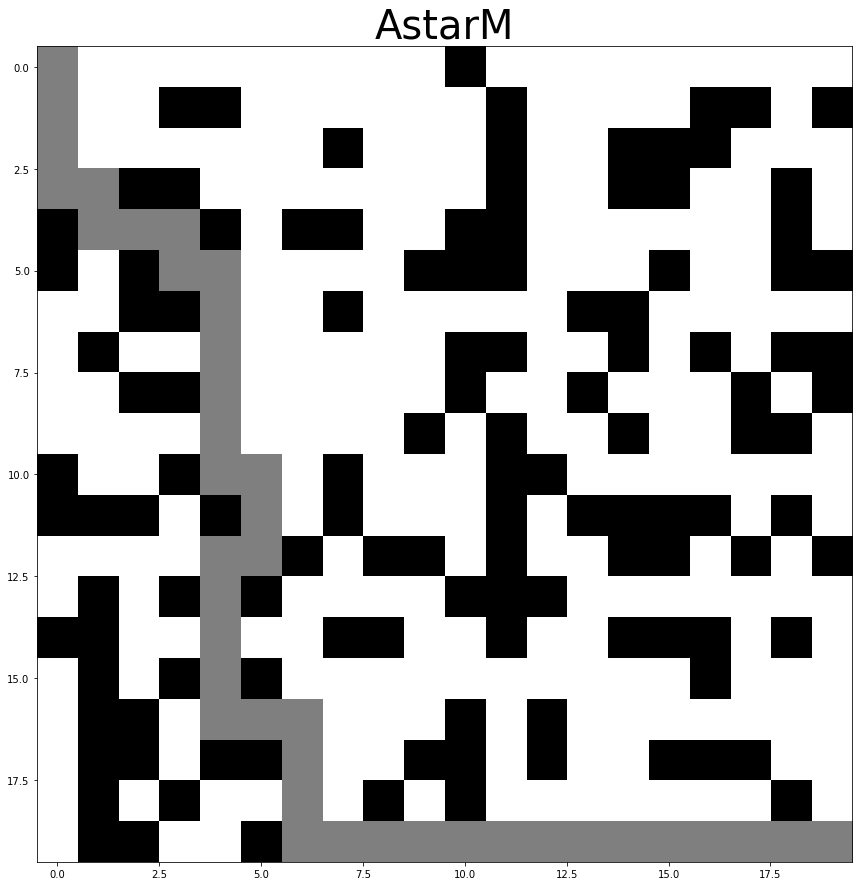

174 174
fails 0
SOLUTION FOUND


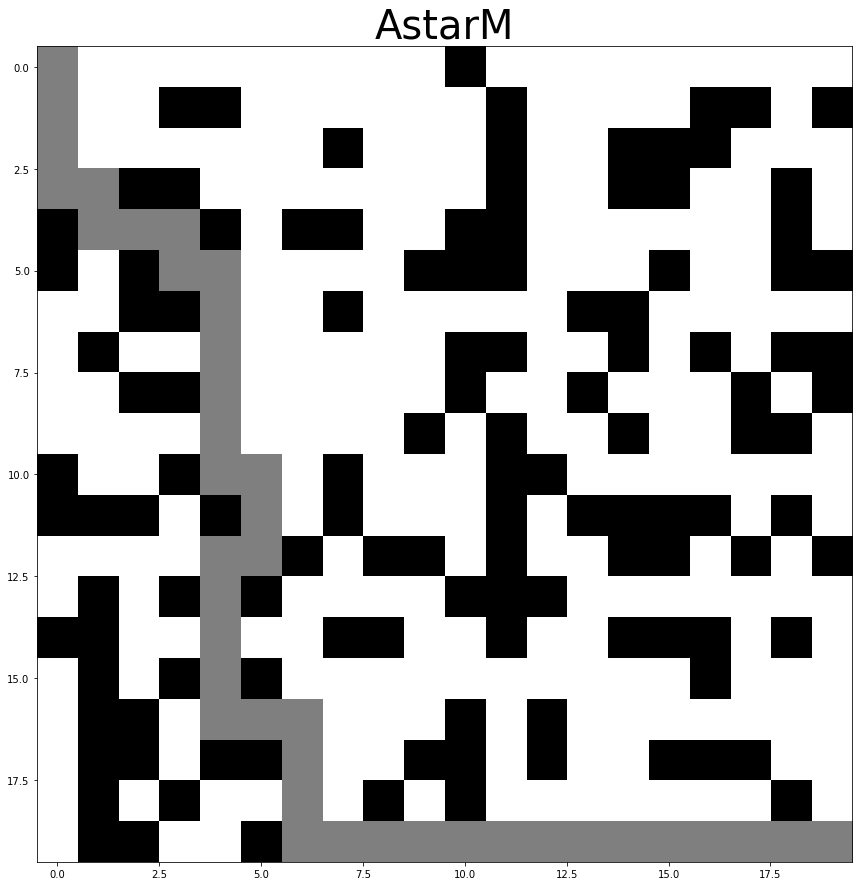

SOLUTION FOUND


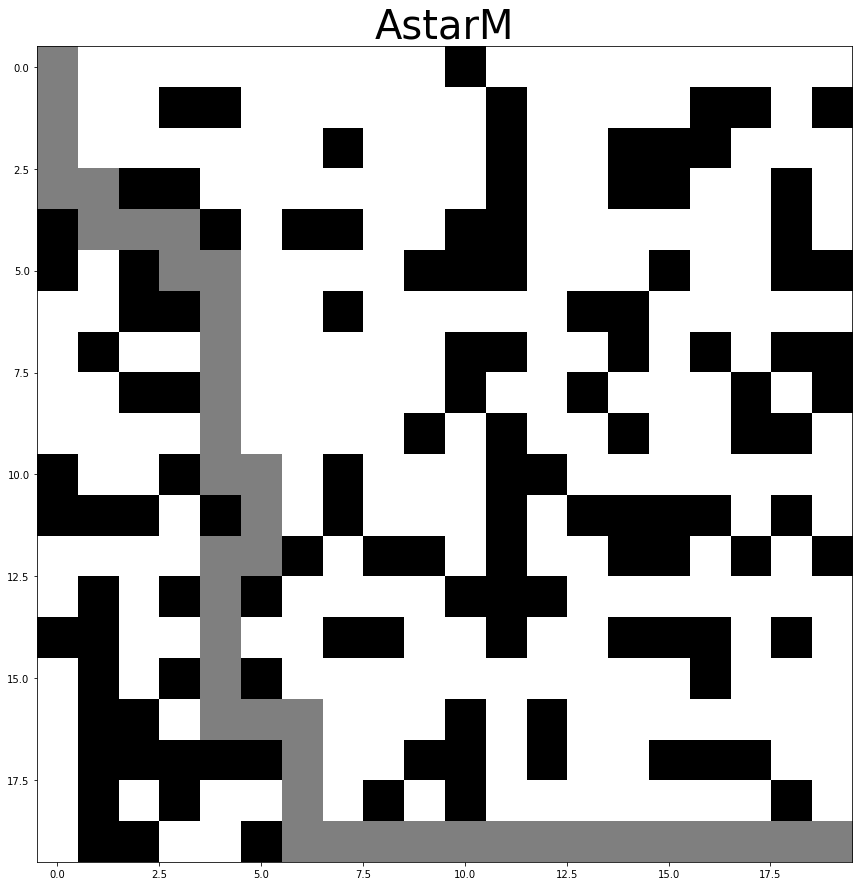

174 174
fails 0
SOLUTION FOUND


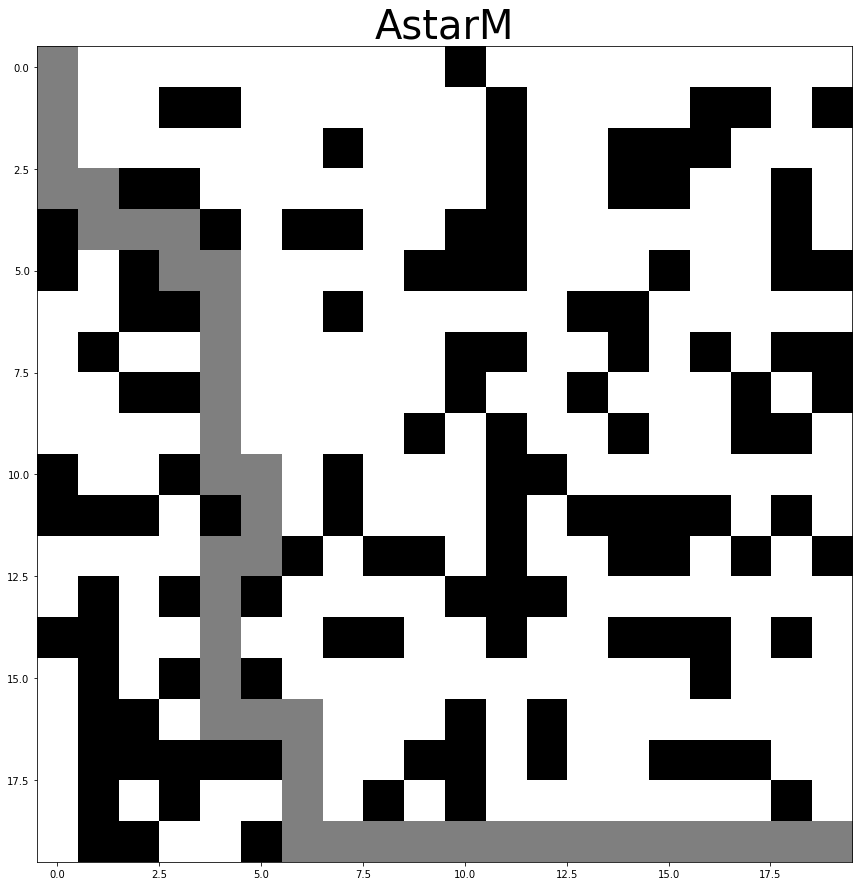

SOLUTION FOUND


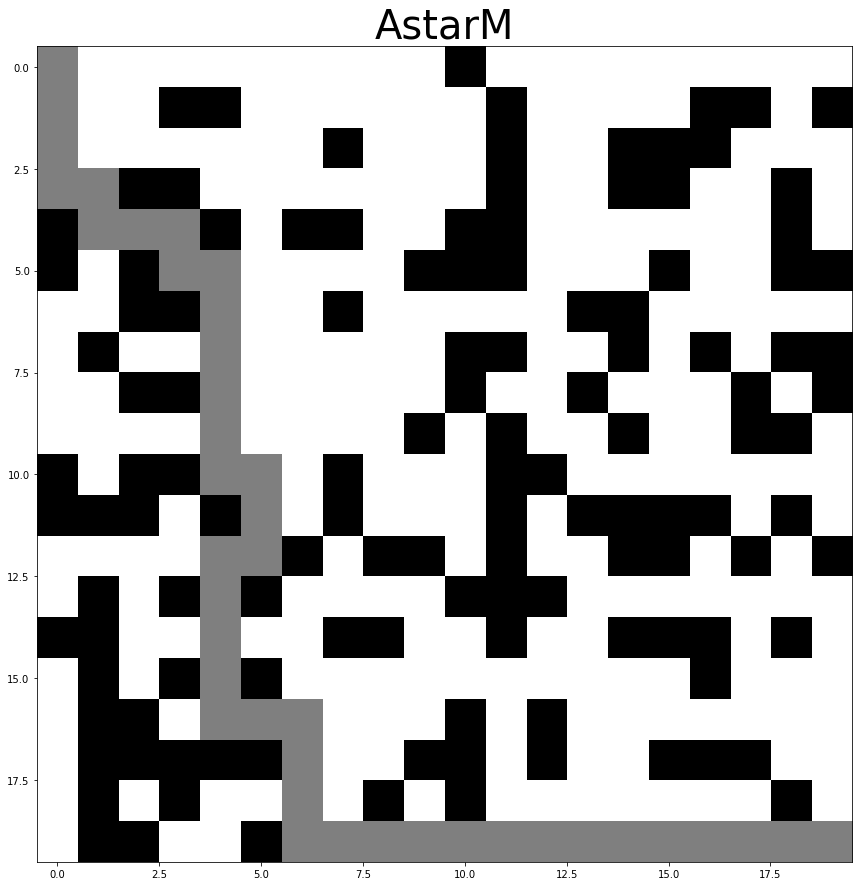

174 174
fails 0
SOLUTION FOUND


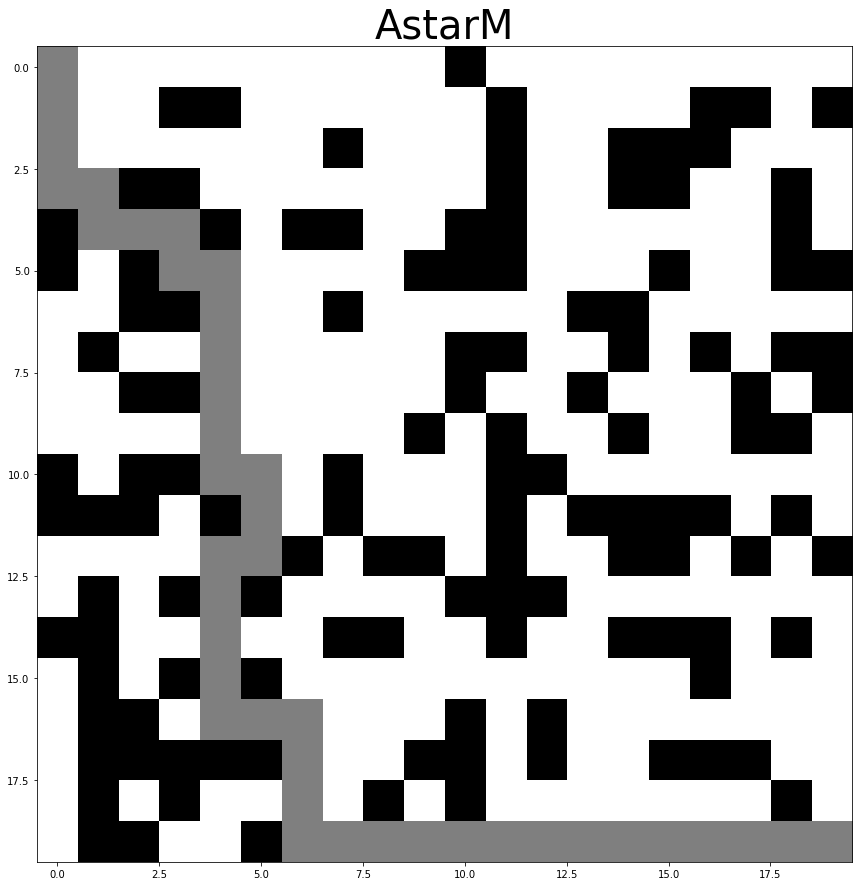

SOLUTION FOUND


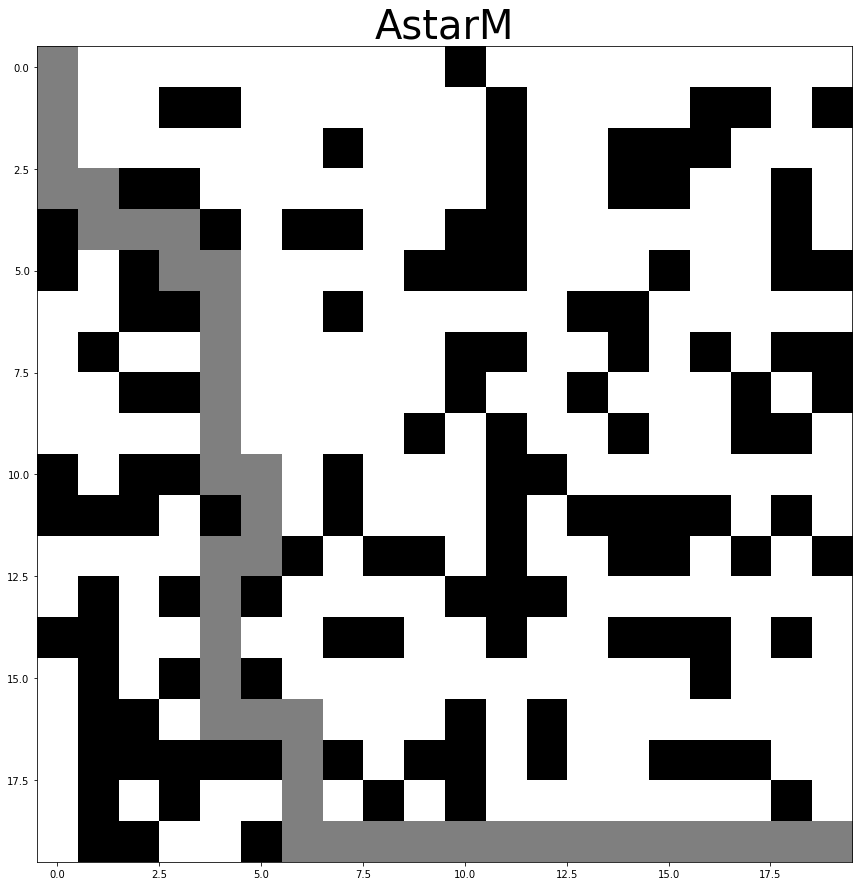

174 174
fails 0
SOLUTION FOUND


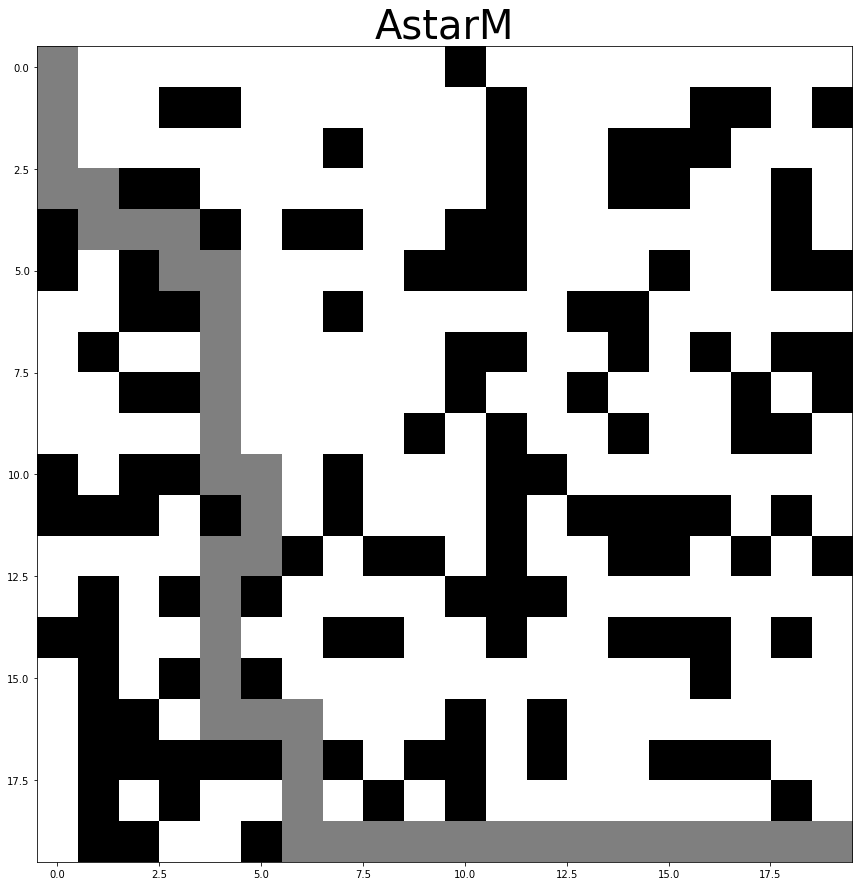

SOLUTION FOUND


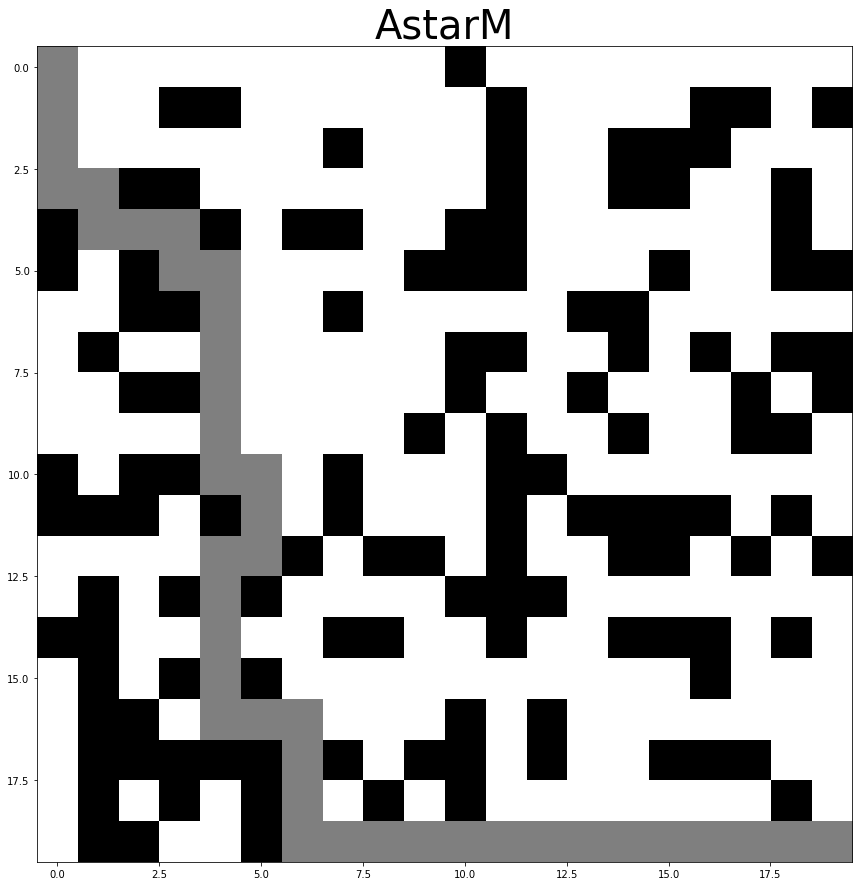

174 174
fails 0
SOLUTION FOUND


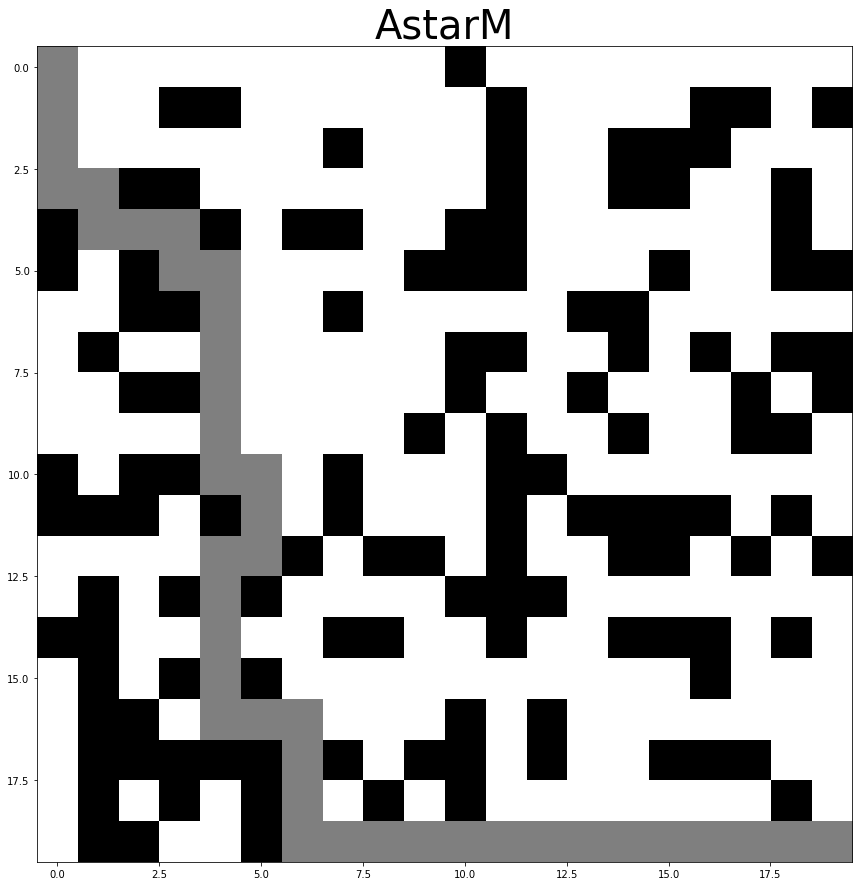

SOLUTION FOUND


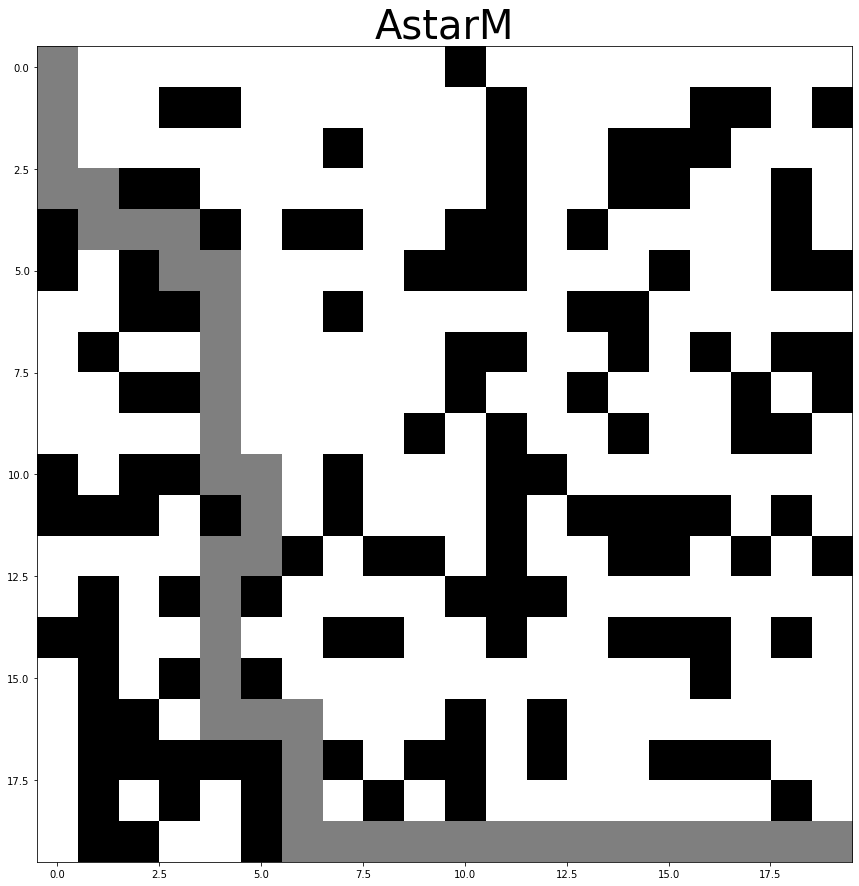

174 174
fails 0
SOLUTION FOUND


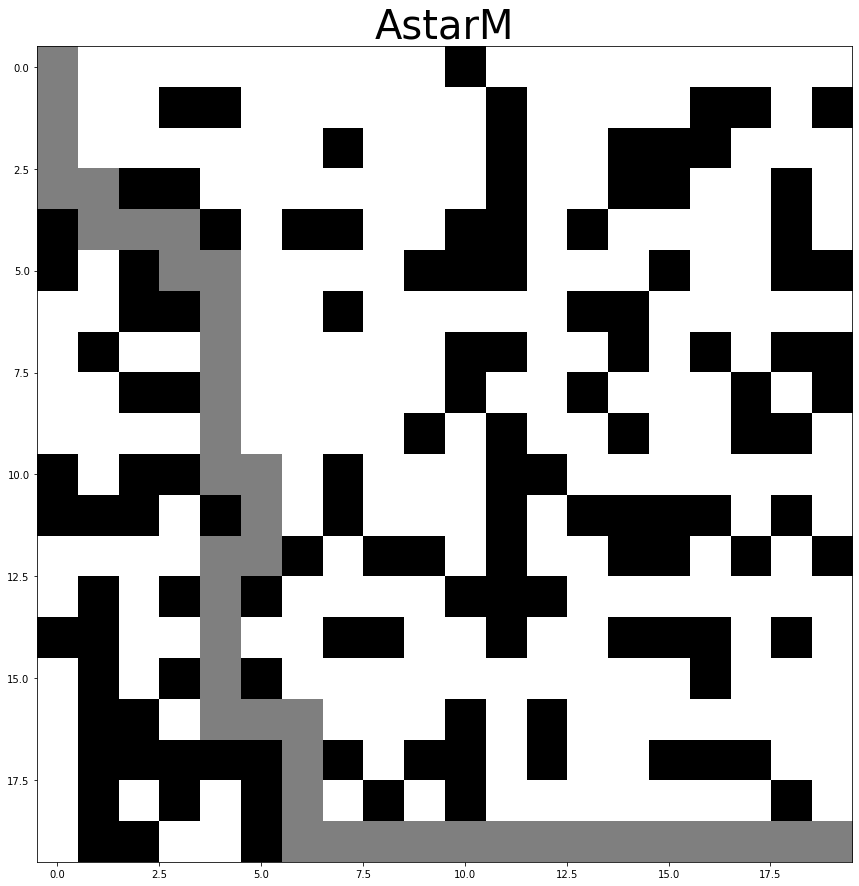

SOLUTION FOUND


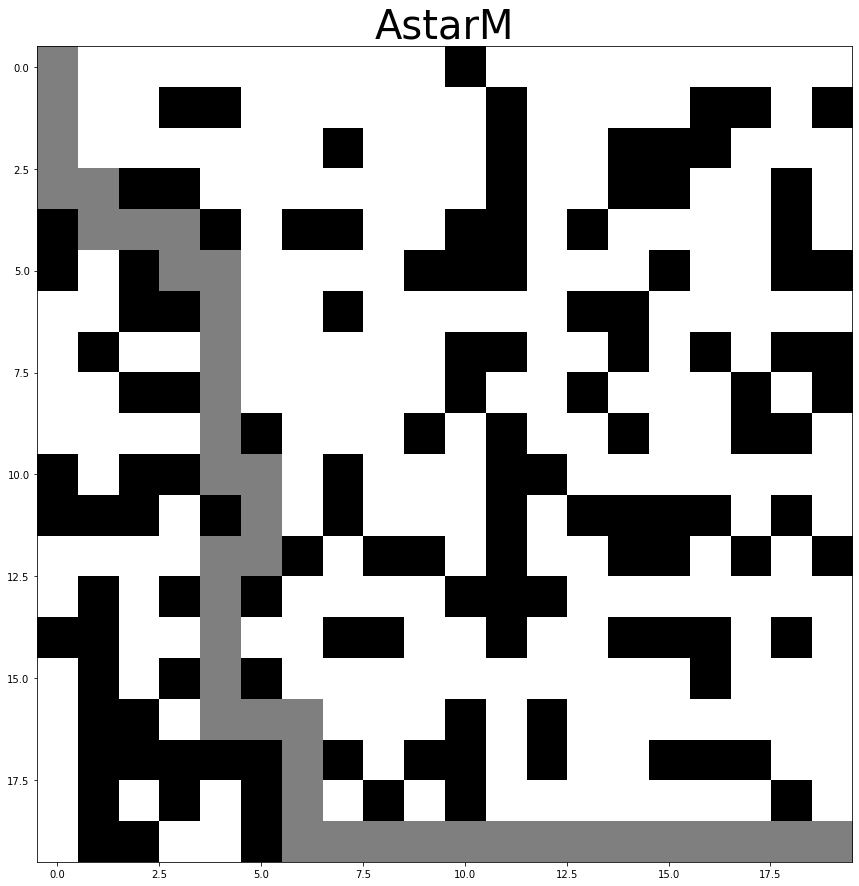

174 171
fails 1
SOLUTION FOUND


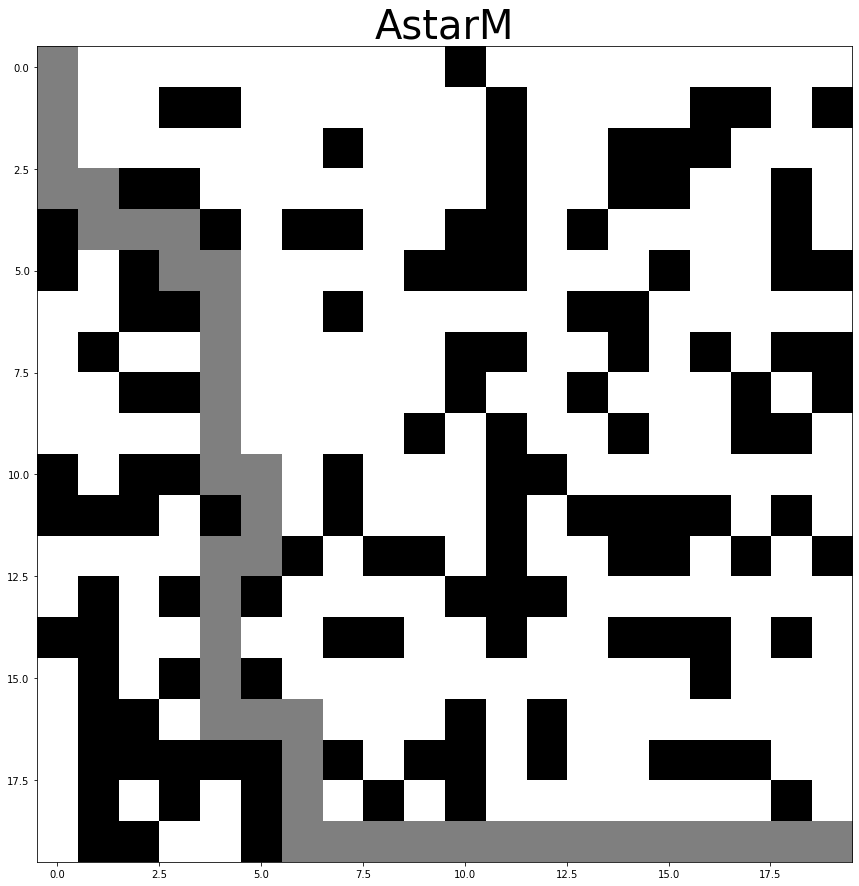

SOLUTION FOUND


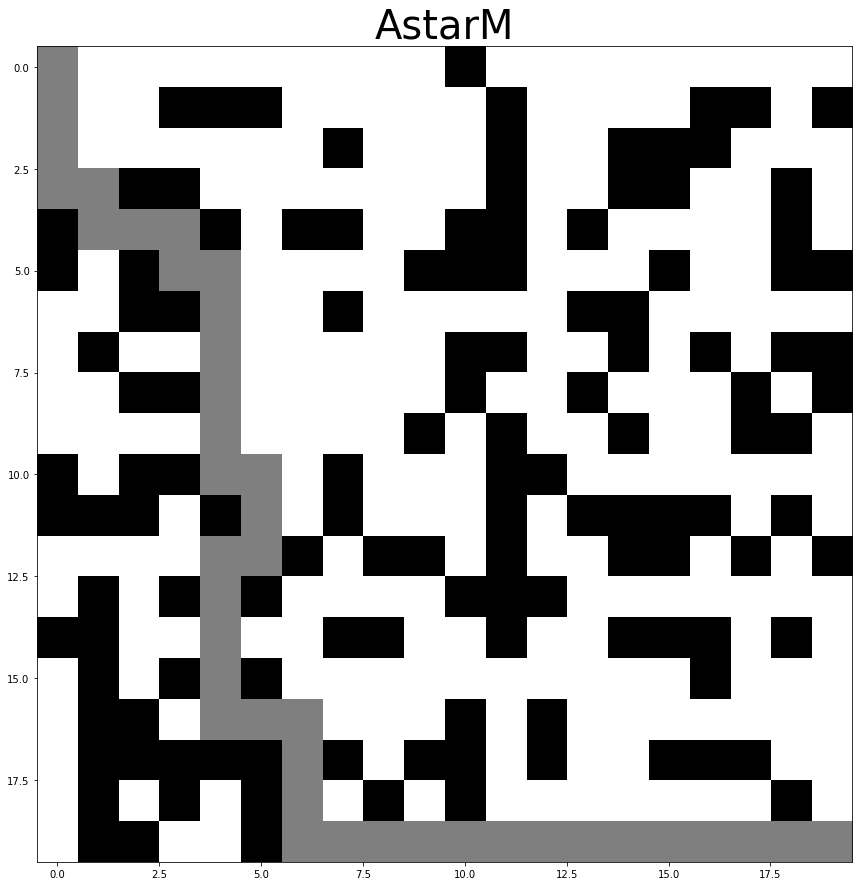

174 171
fails 2
SOLUTION FOUND


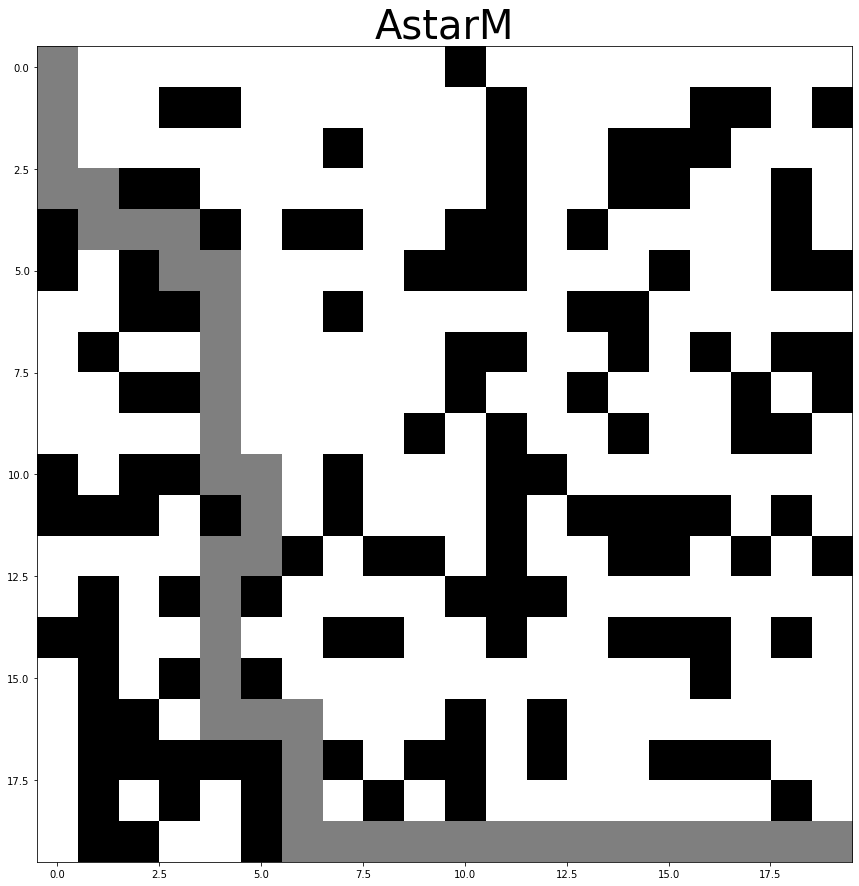

SOLUTION FOUND


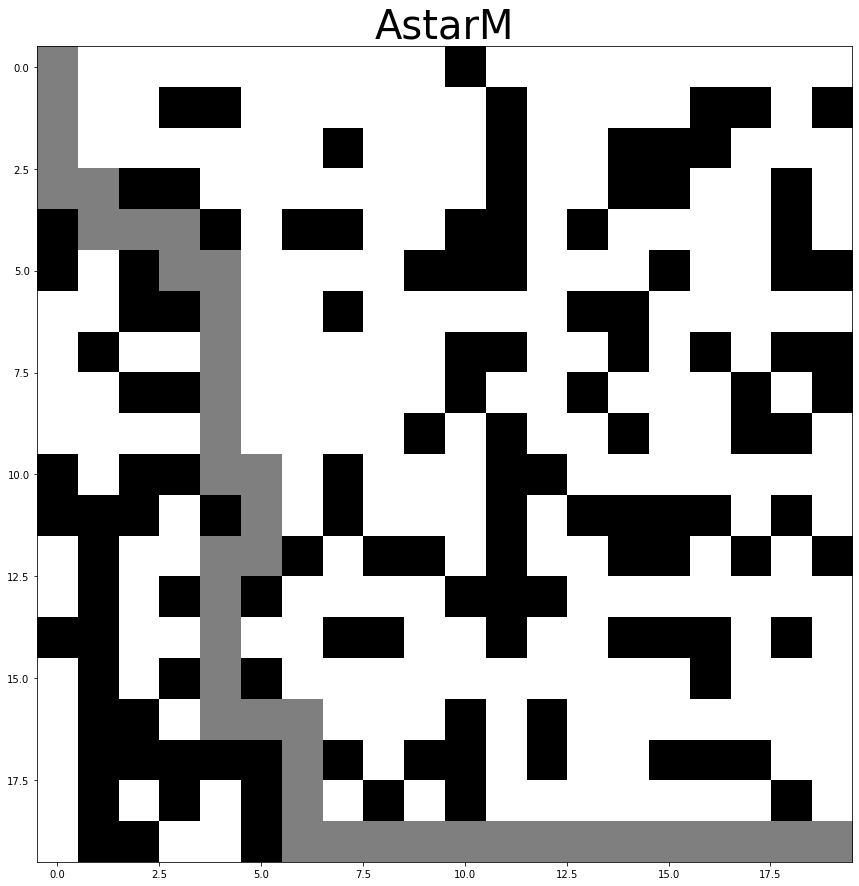

174 174
fails 0
SOLUTION FOUND


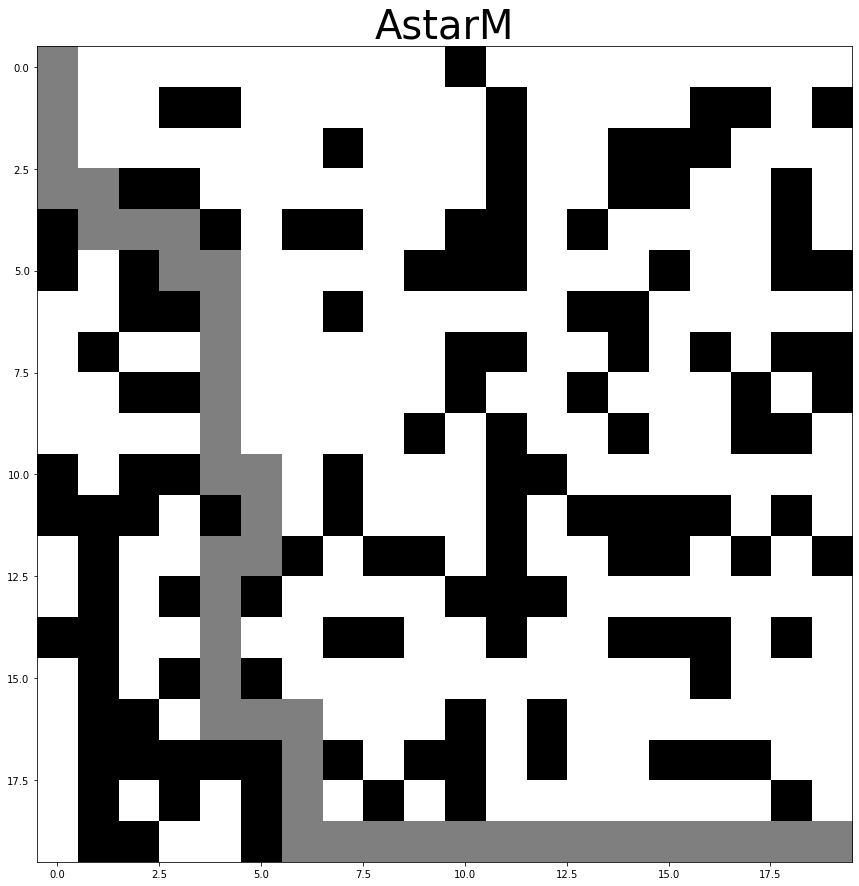

SOLUTION FOUND


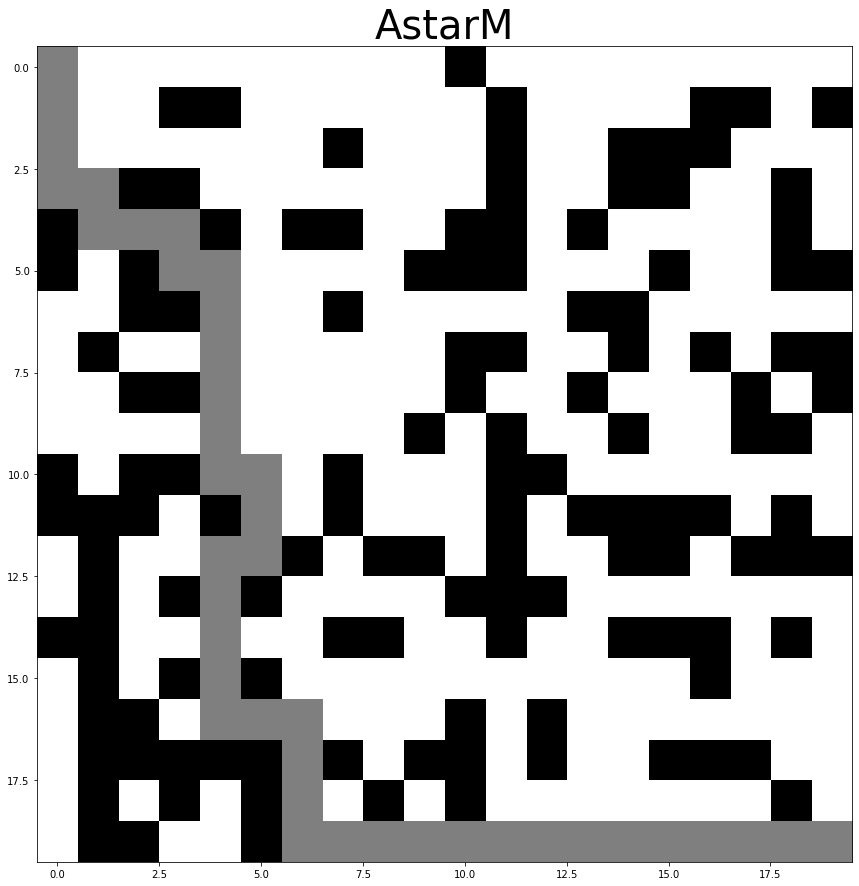

174 174
fails 0
SOLUTION FOUND


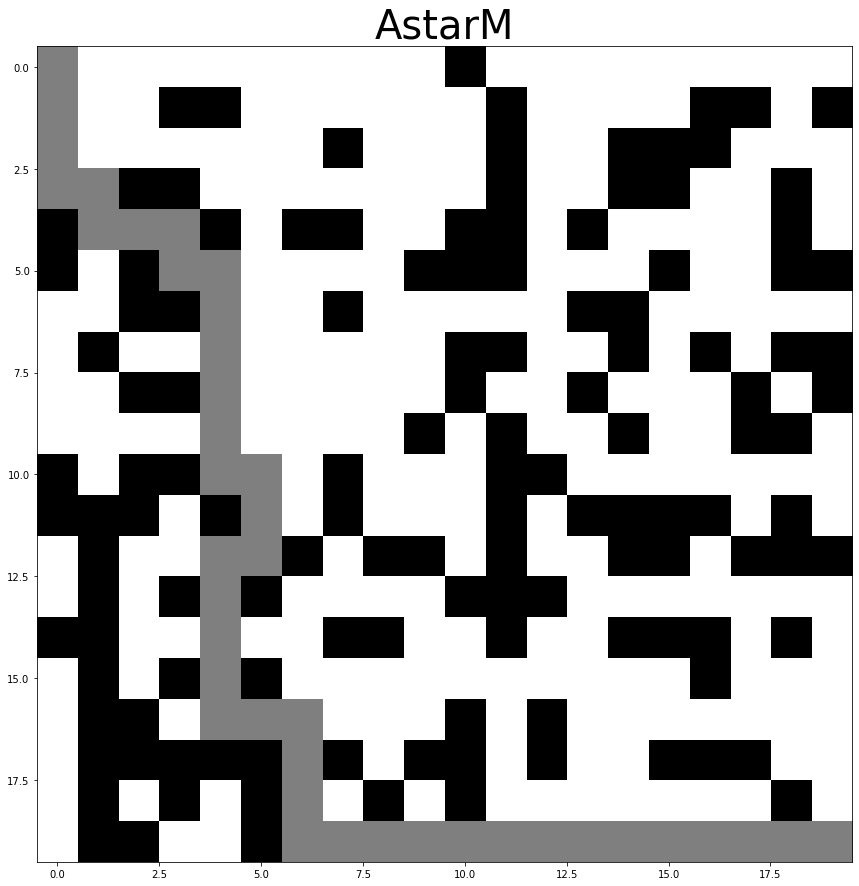

SOLUTION FOUND


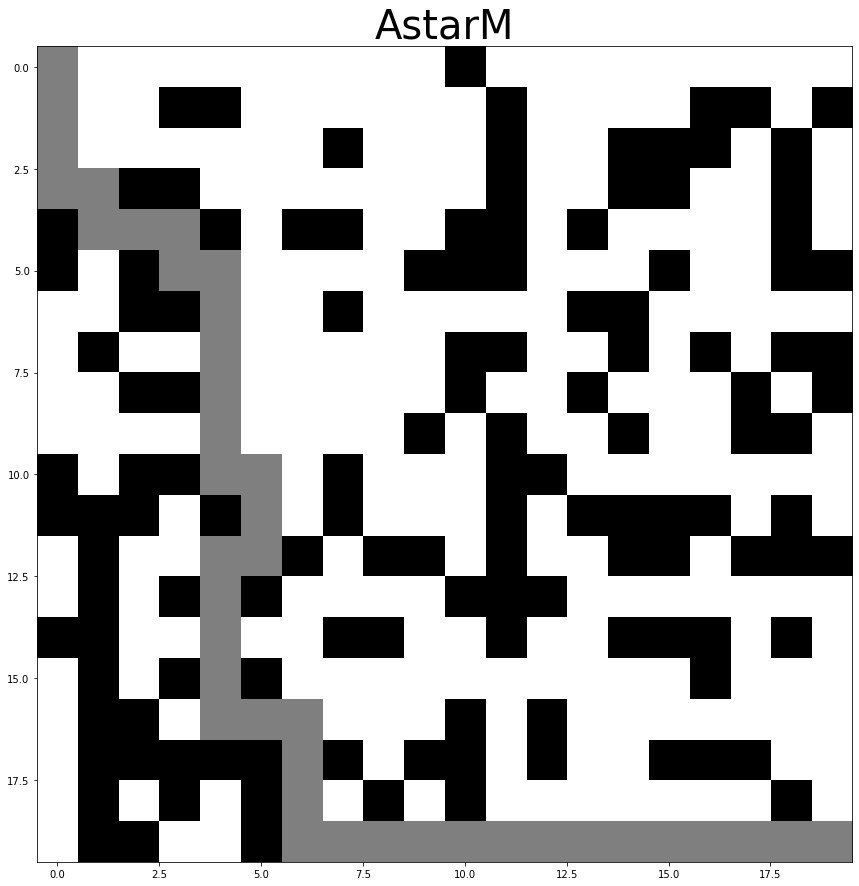

174 174
fails 0
SOLUTION FOUND


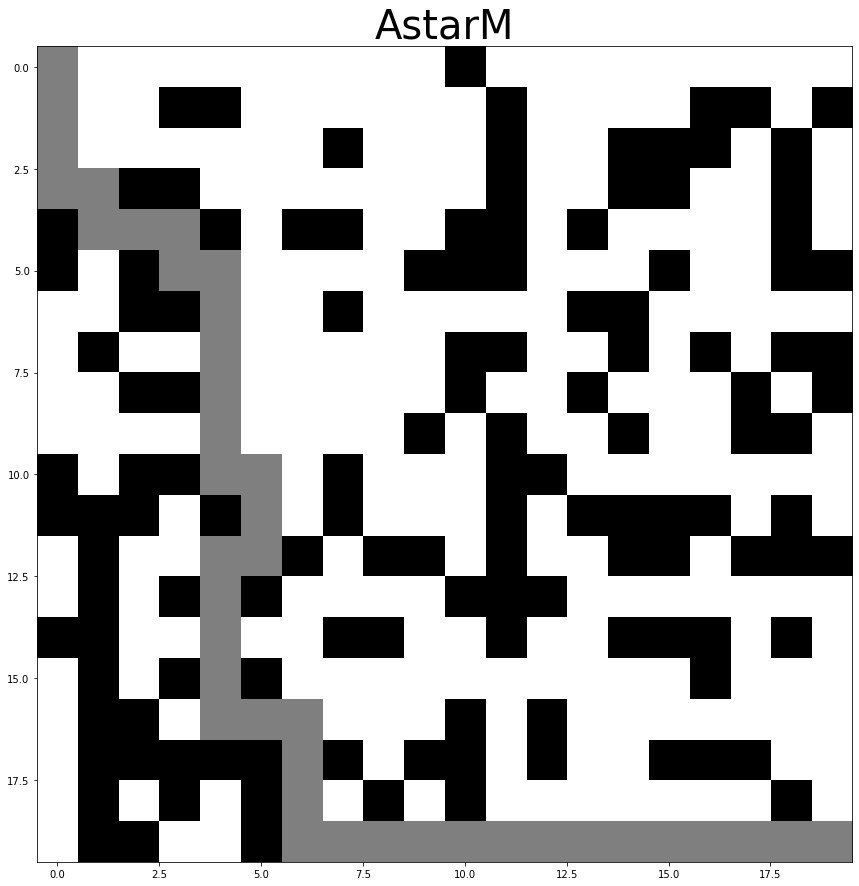

SOLUTION FOUND


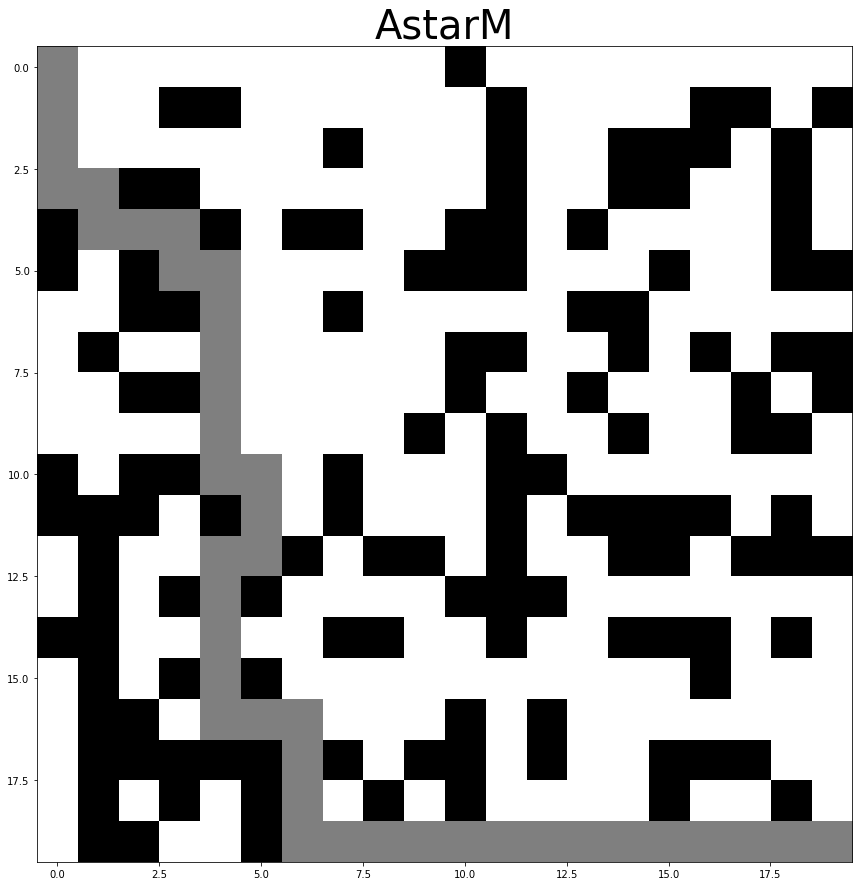

174 174
fails 0
SOLUTION FOUND


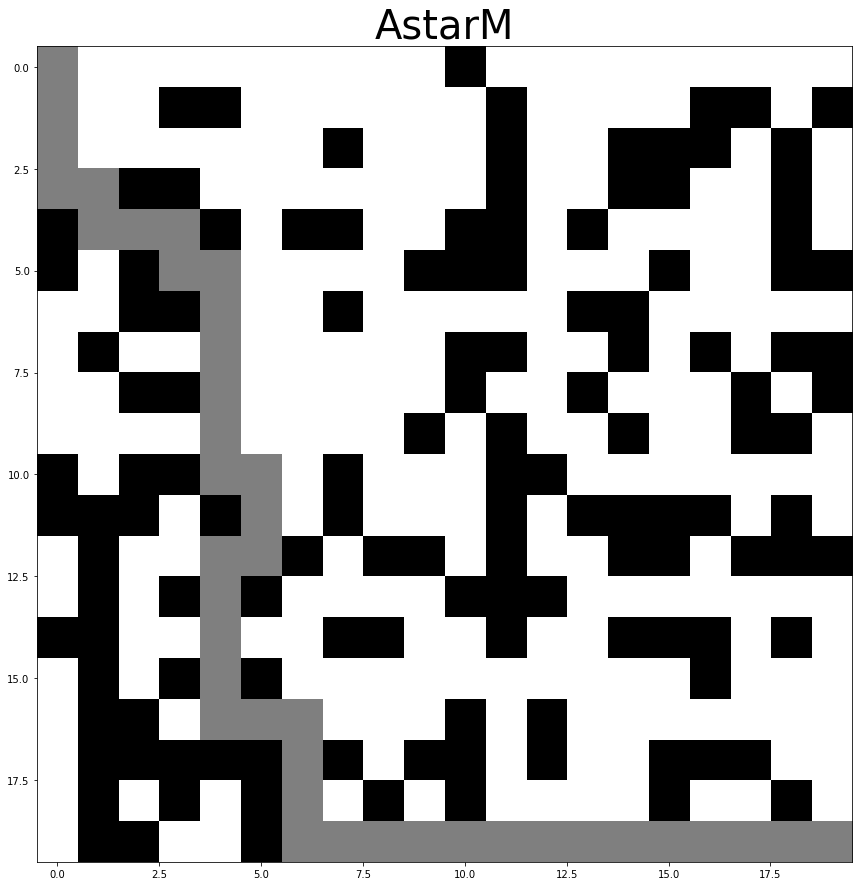

SOLUTION FOUND


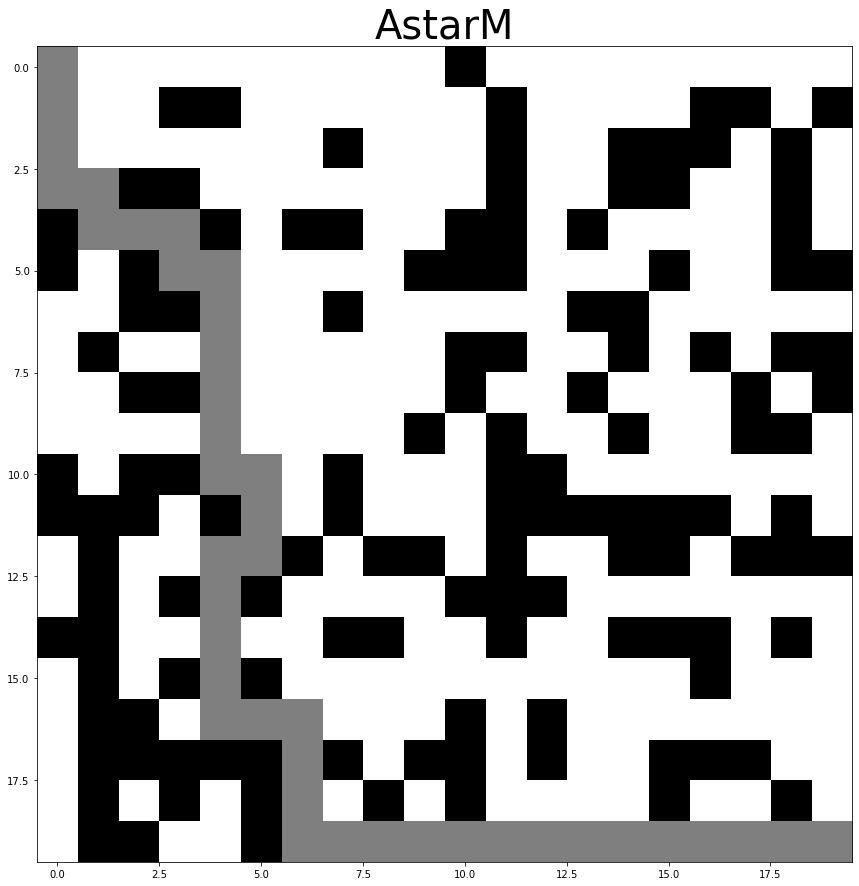

174 174
fails 0
SOLUTION FOUND


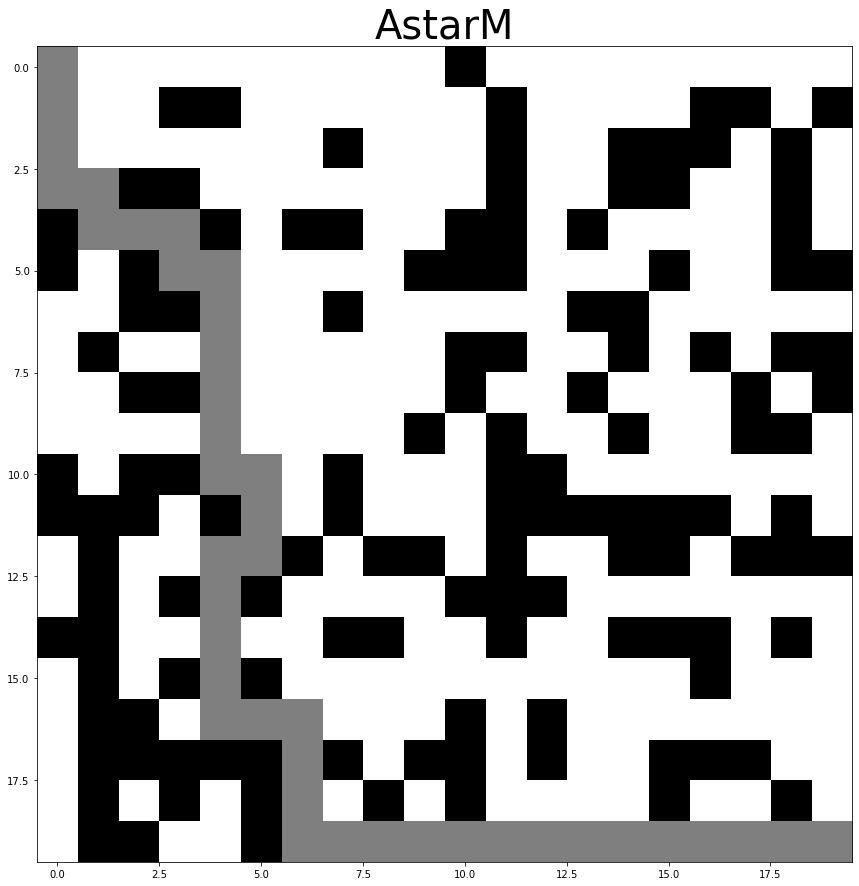

SOLUTION FOUND


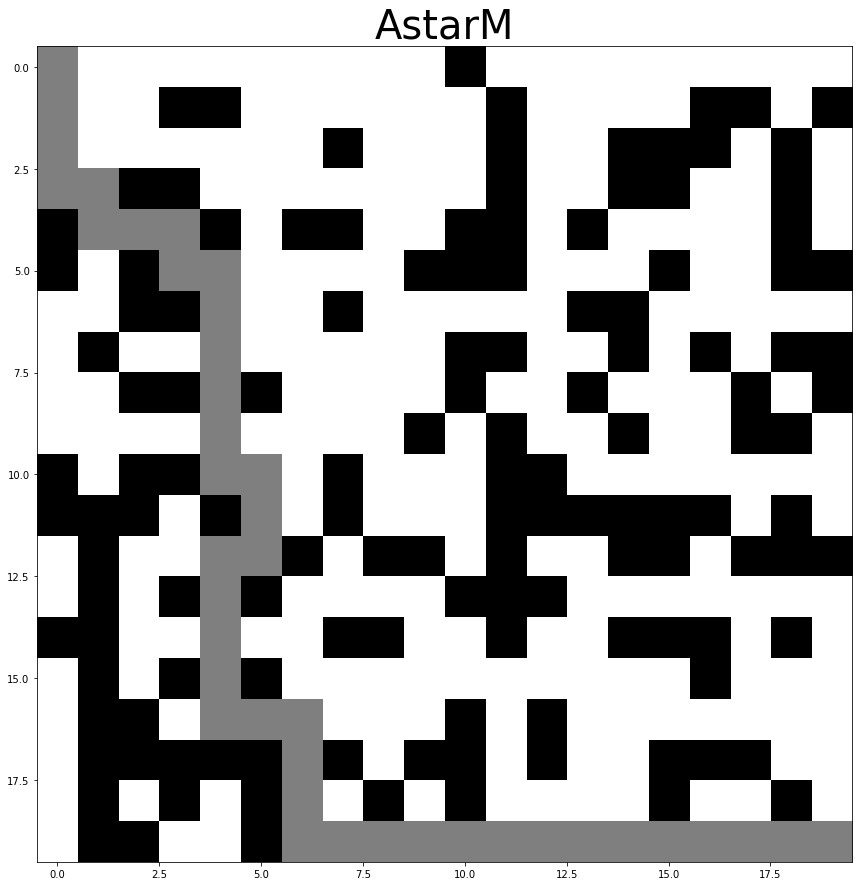

174 170
fails 1
SOLUTION FOUND


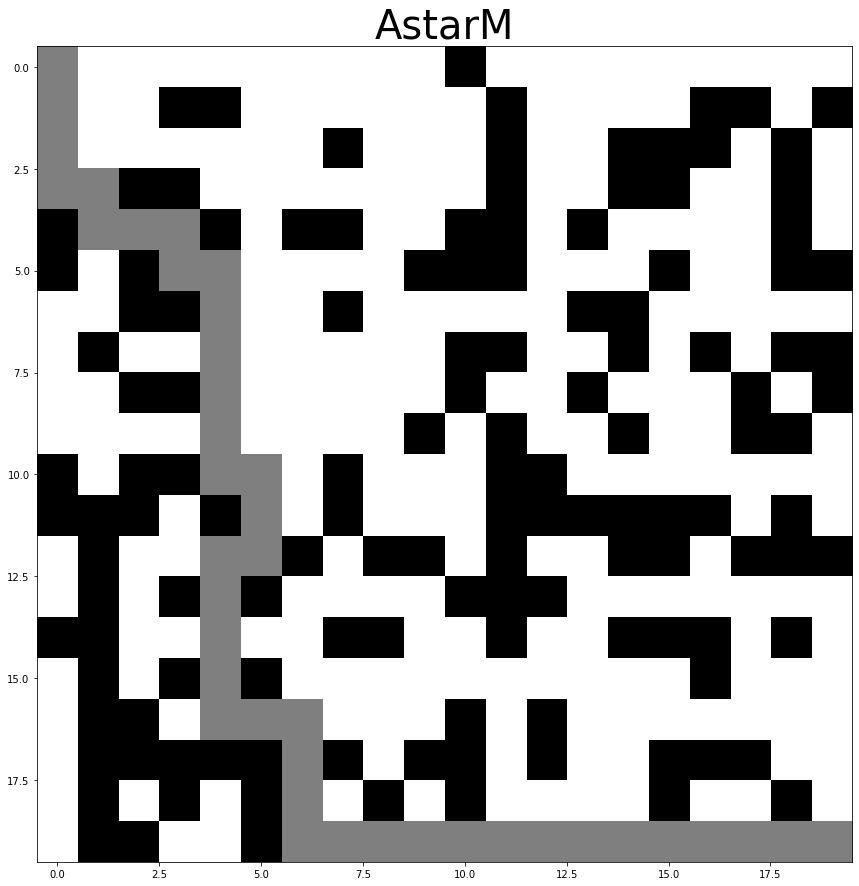

SOLUTION FOUND


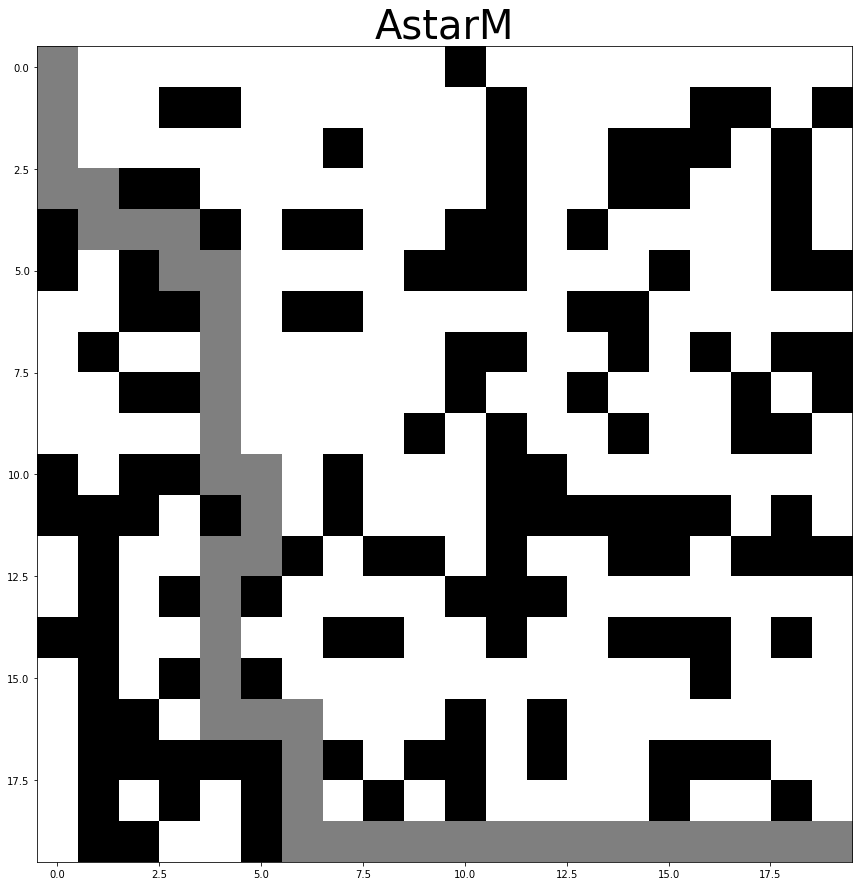

174 171
fails 2
SOLUTION FOUND


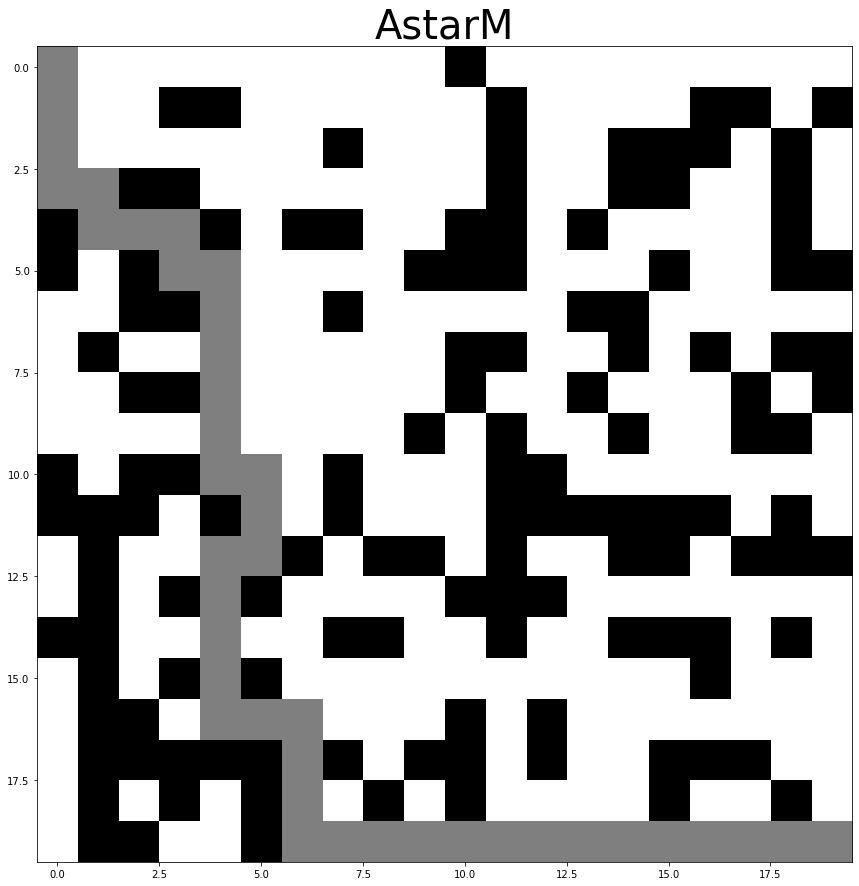

SOLUTION FOUND


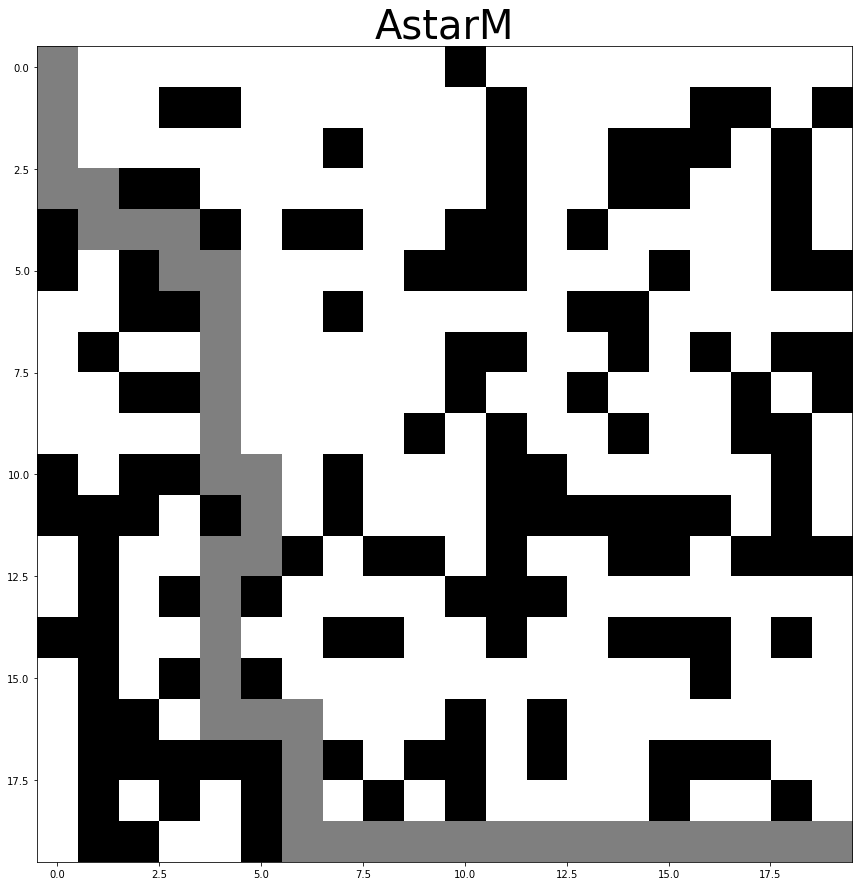

174 170
fails 3
SOLUTION FOUND


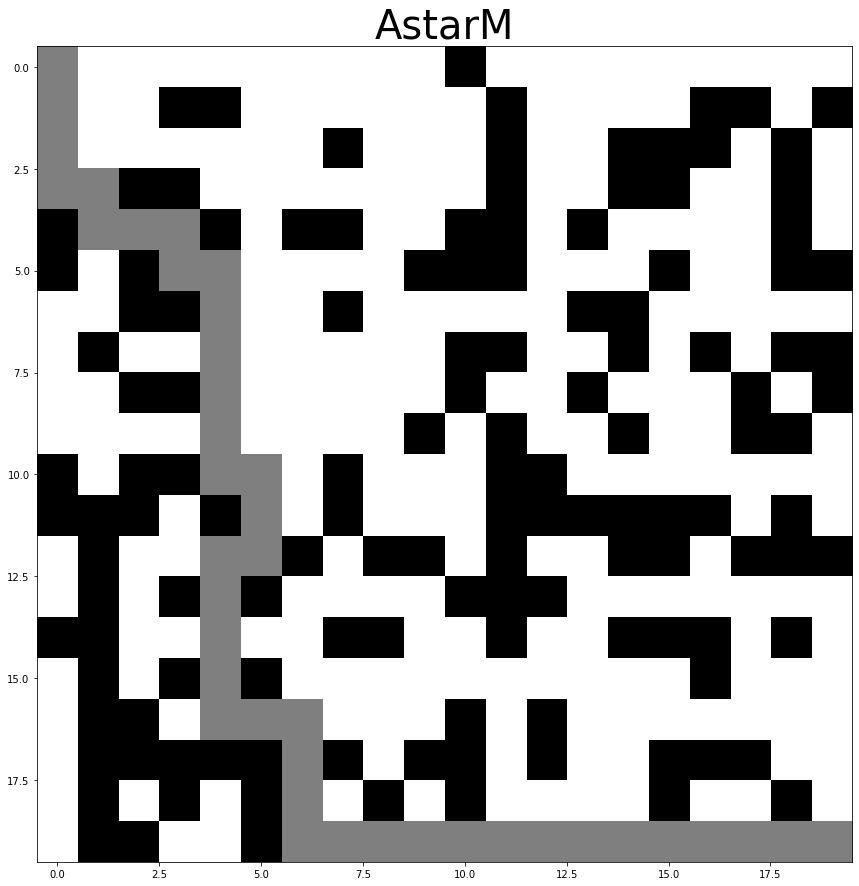

SOLUTION FOUND


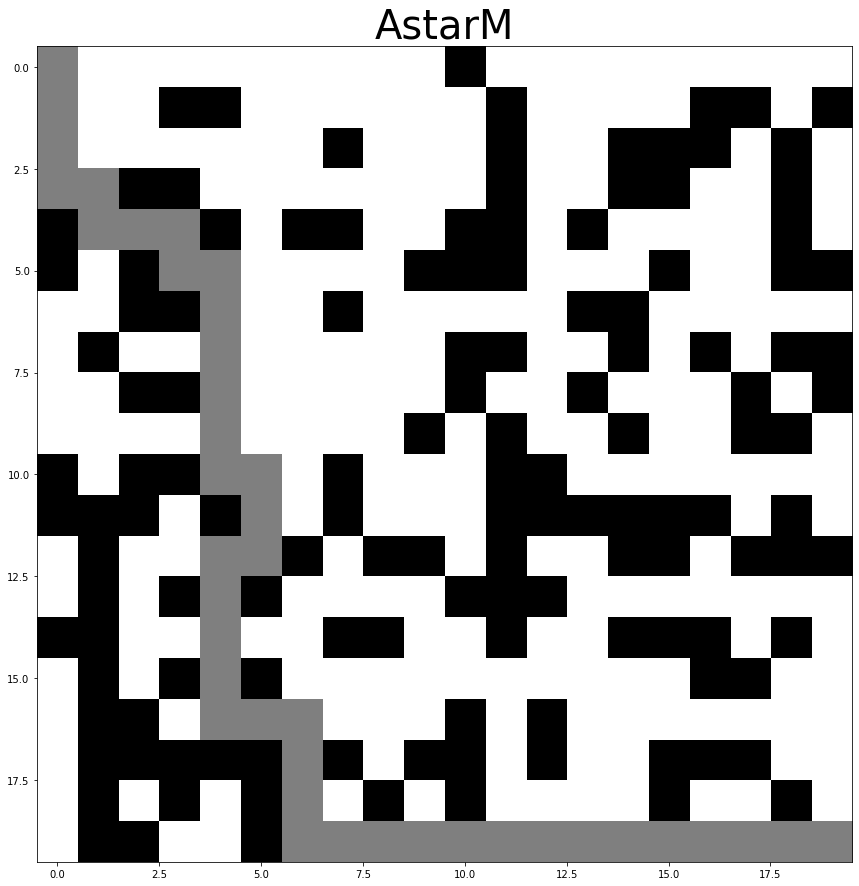

174 174
fails 0
SOLUTION FOUND


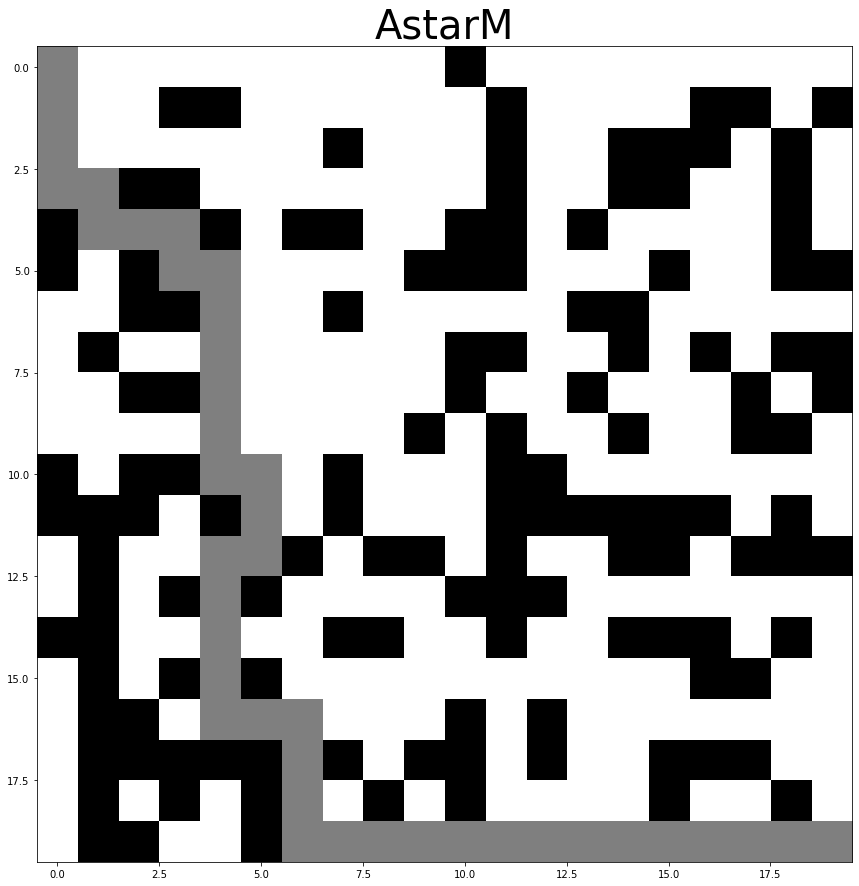

SOLUTION FOUND


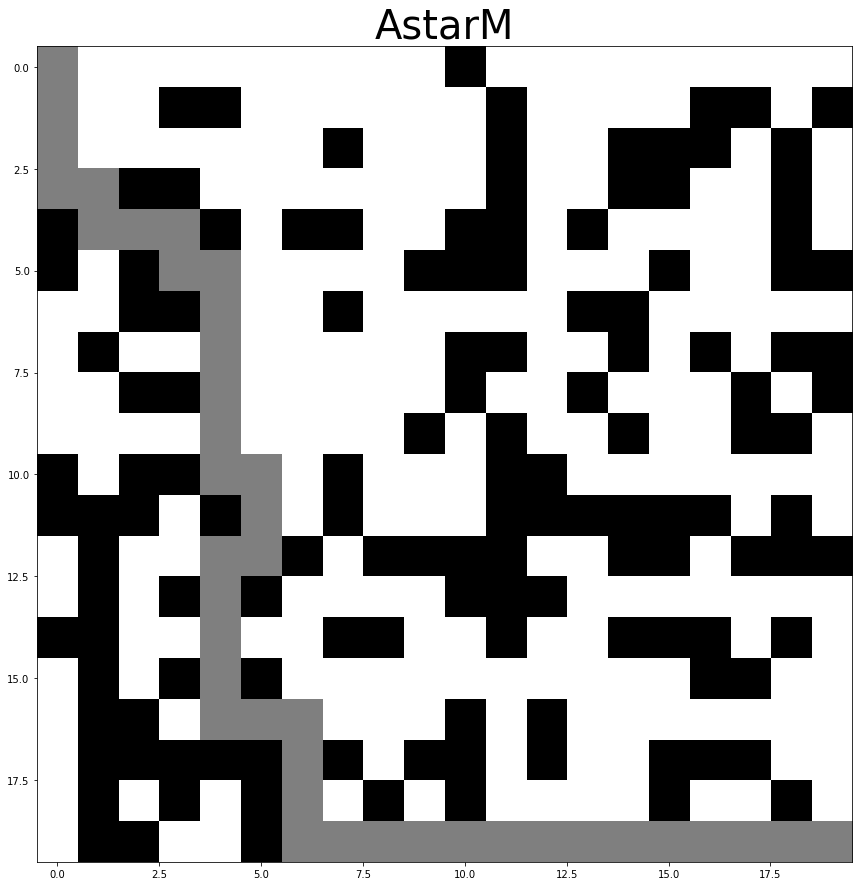

174 173
fails 1
SOLUTION FOUND


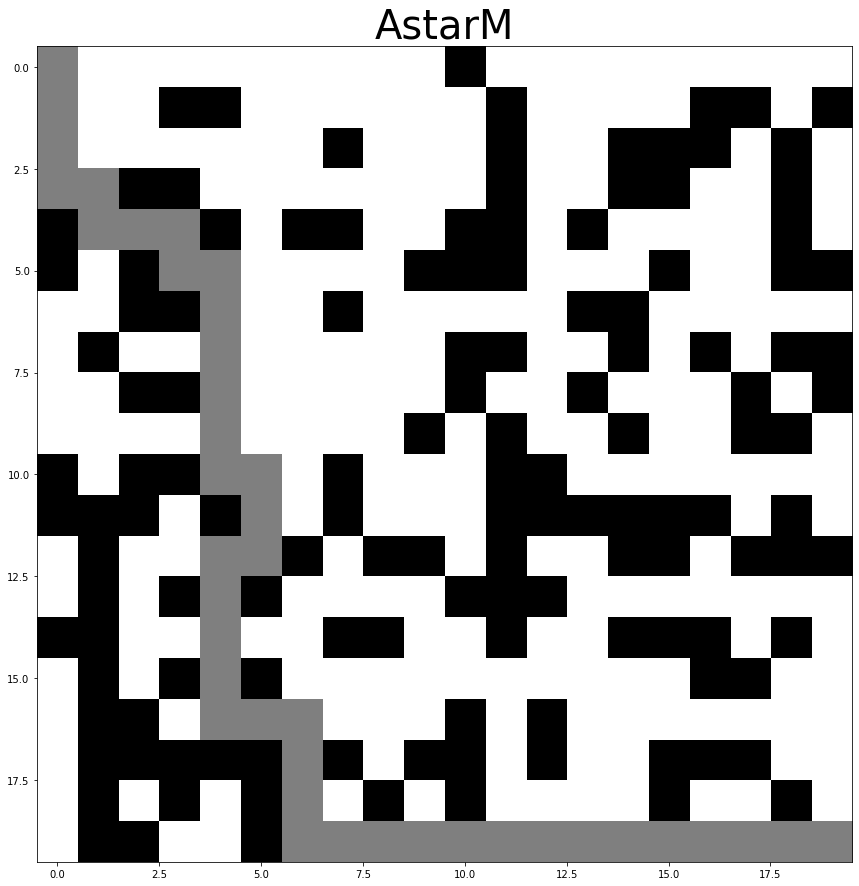

SOLUTION FOUND


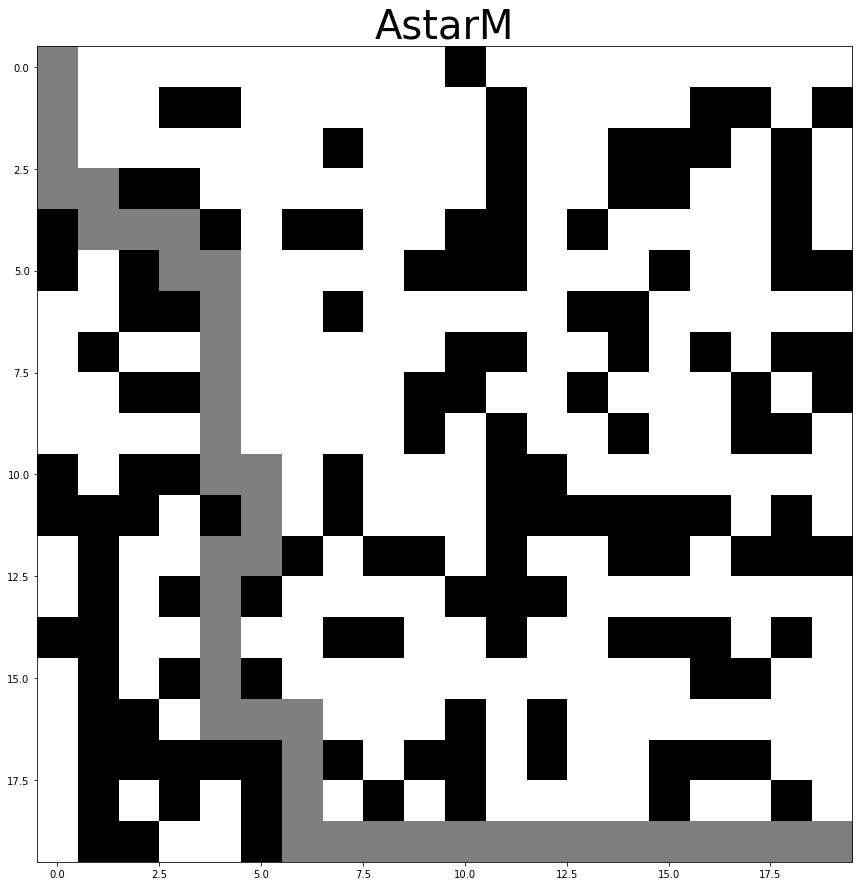

174 172
fails 2
SOLUTION FOUND


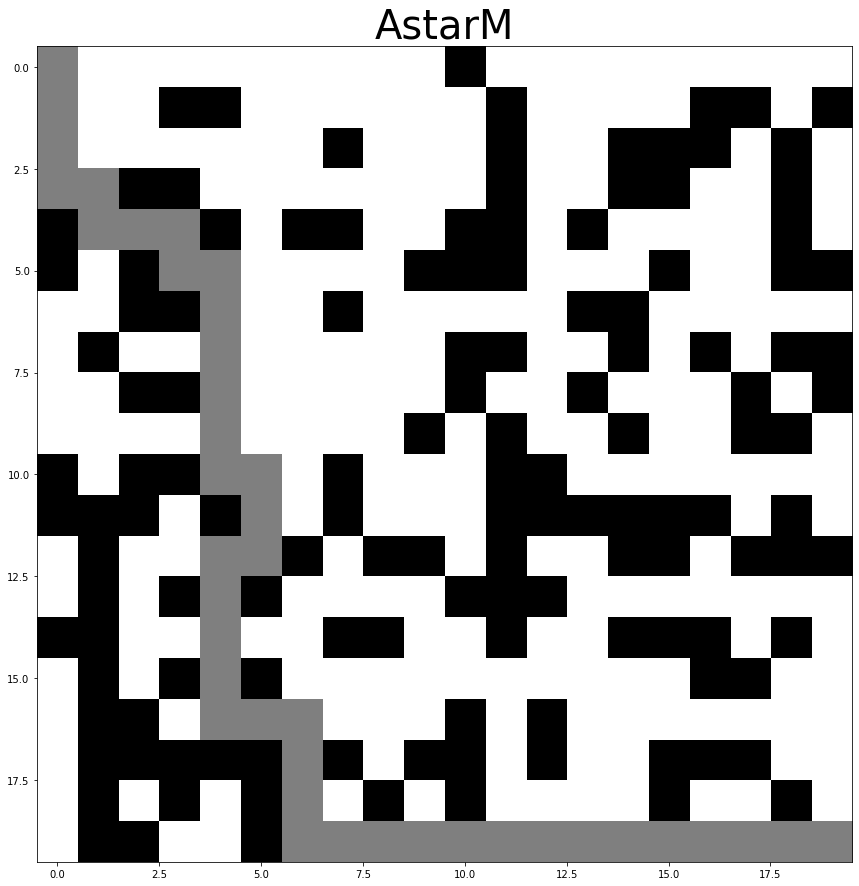

SOLUTION FOUND


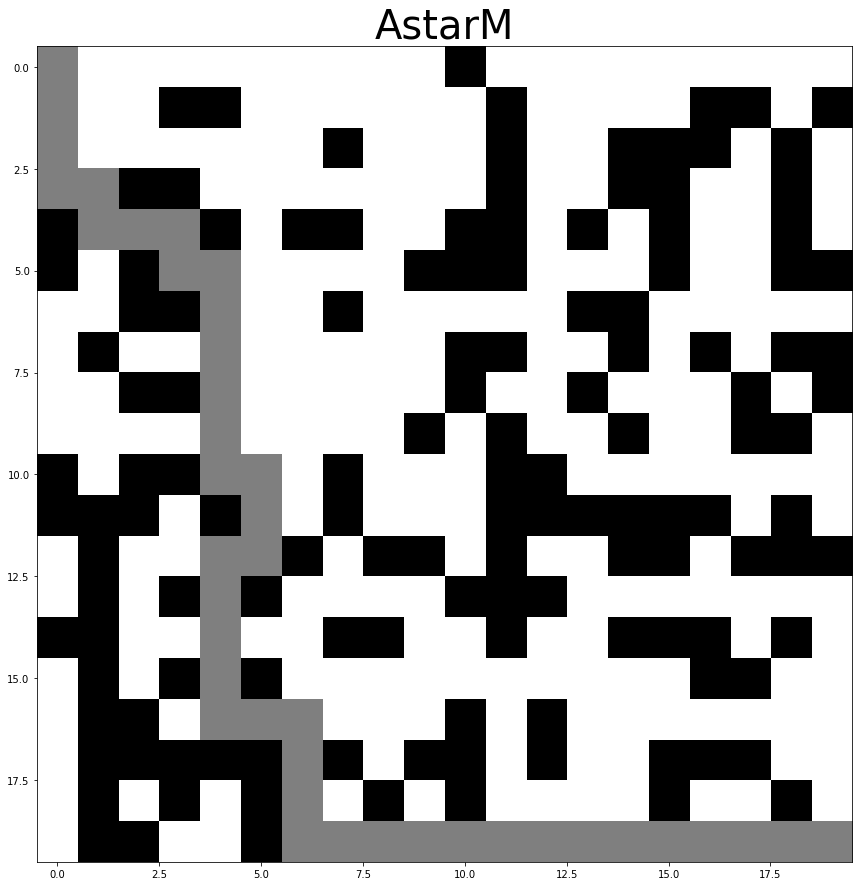

174 174
fails 0
SOLUTION FOUND


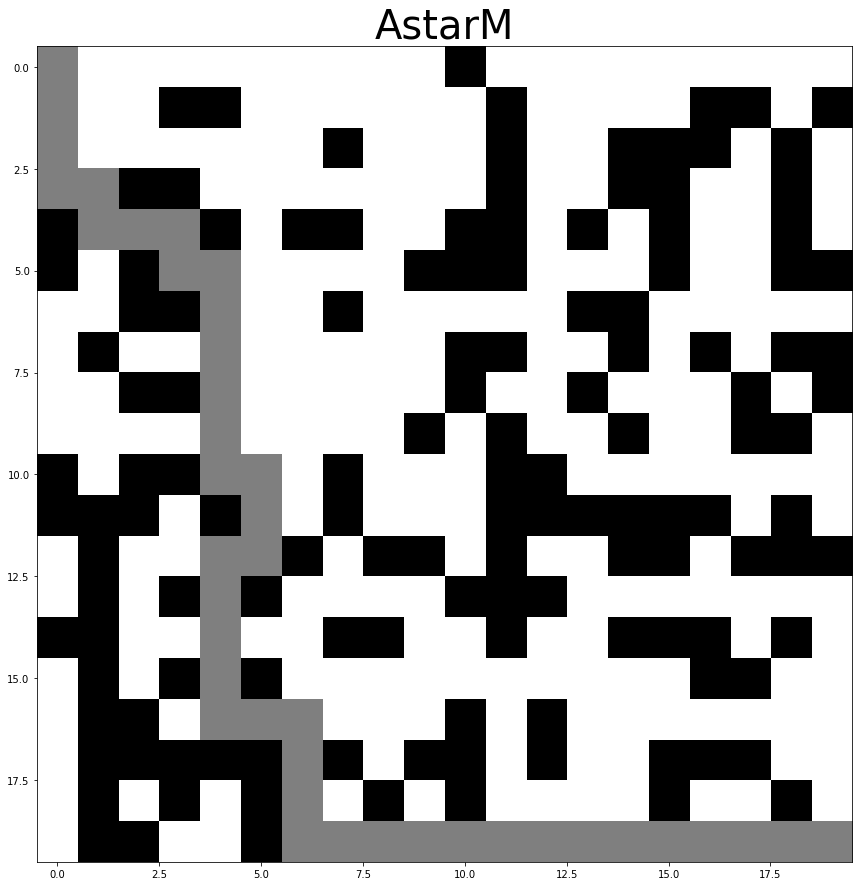

SOLUTION FOUND


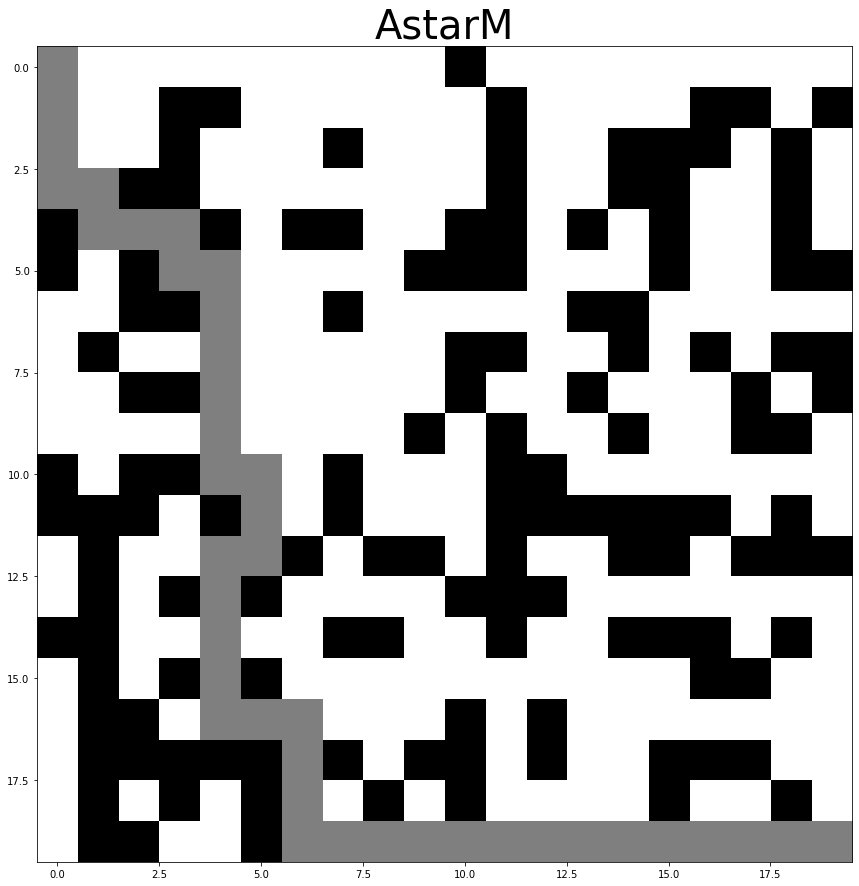

174 171
fails 1
SOLUTION FOUND


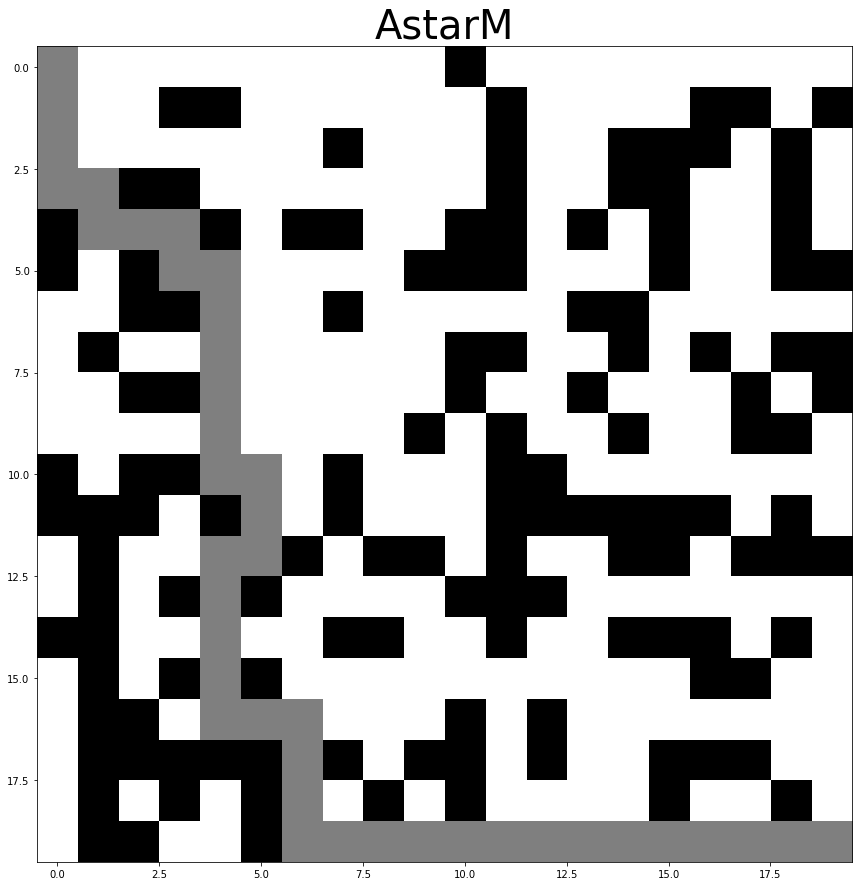

SOLUTION FOUND


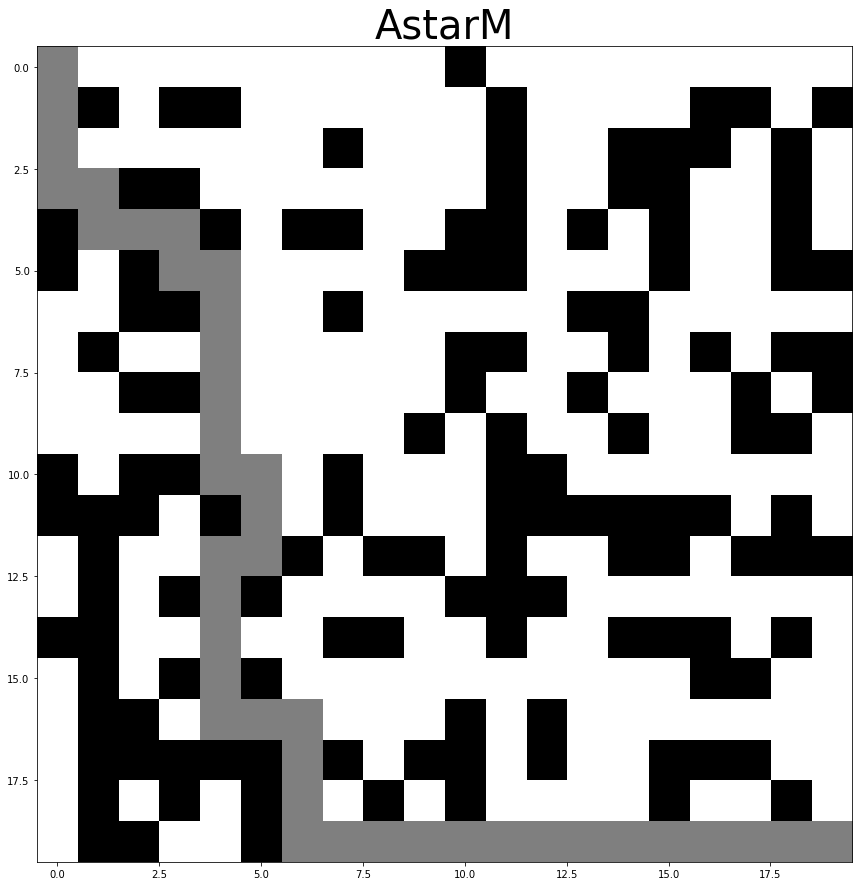

174 170
fails 2
SOLUTION FOUND


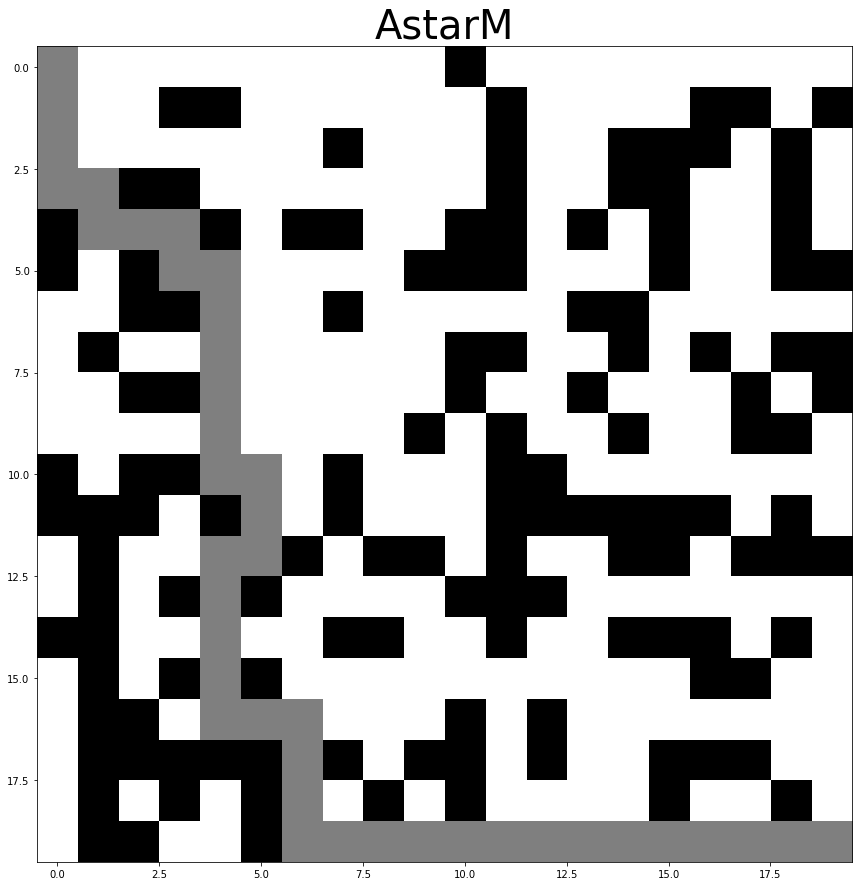

SOLUTION FOUND


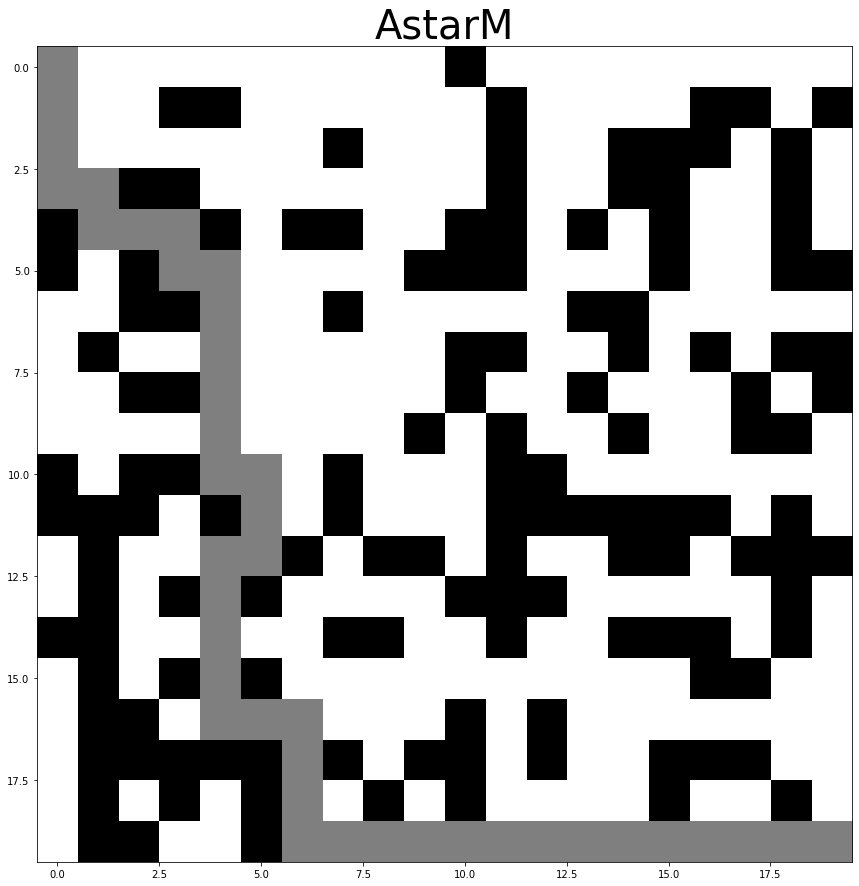

174 174
fails 0
SOLUTION FOUND


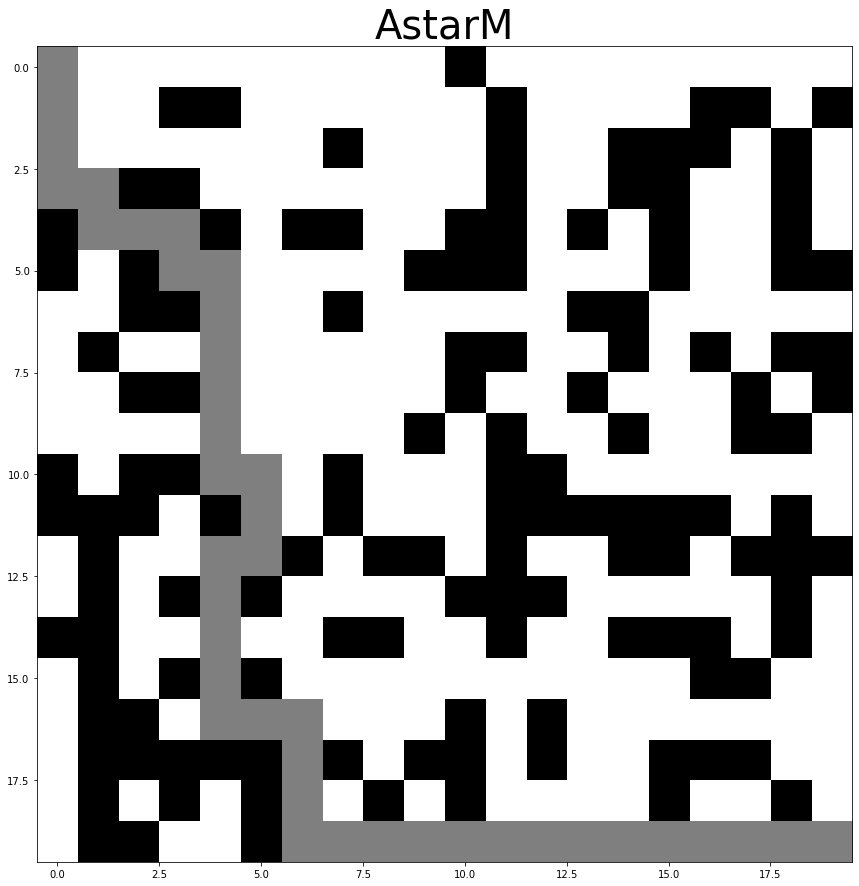

SOLUTION FOUND


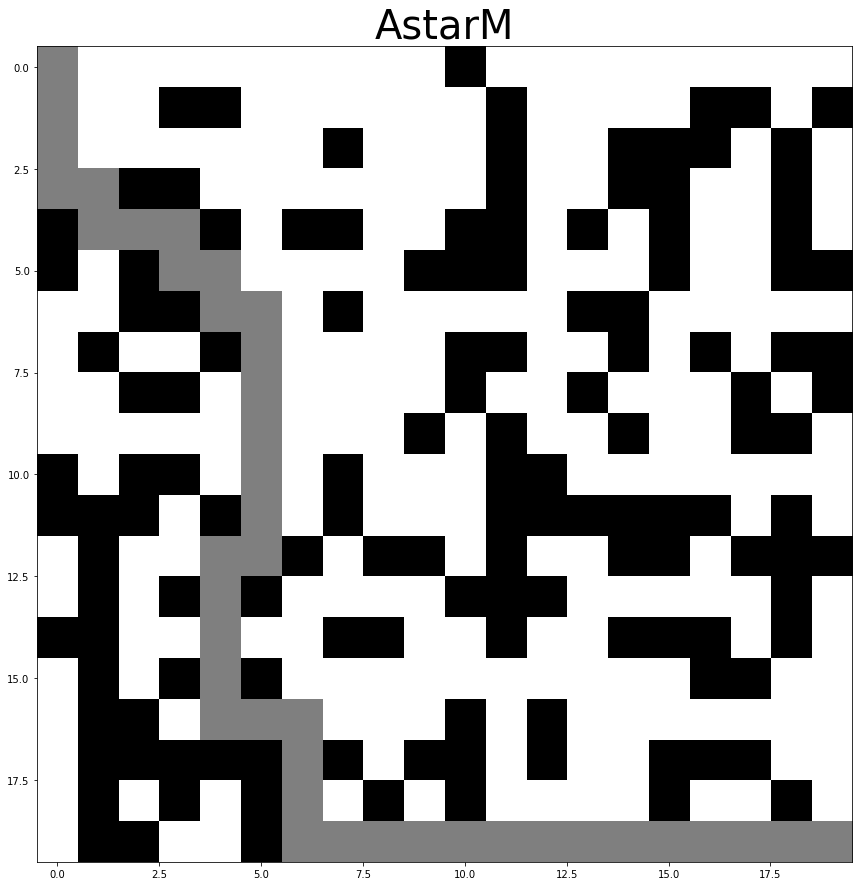

174 166
fails 1
SOLUTION FOUND


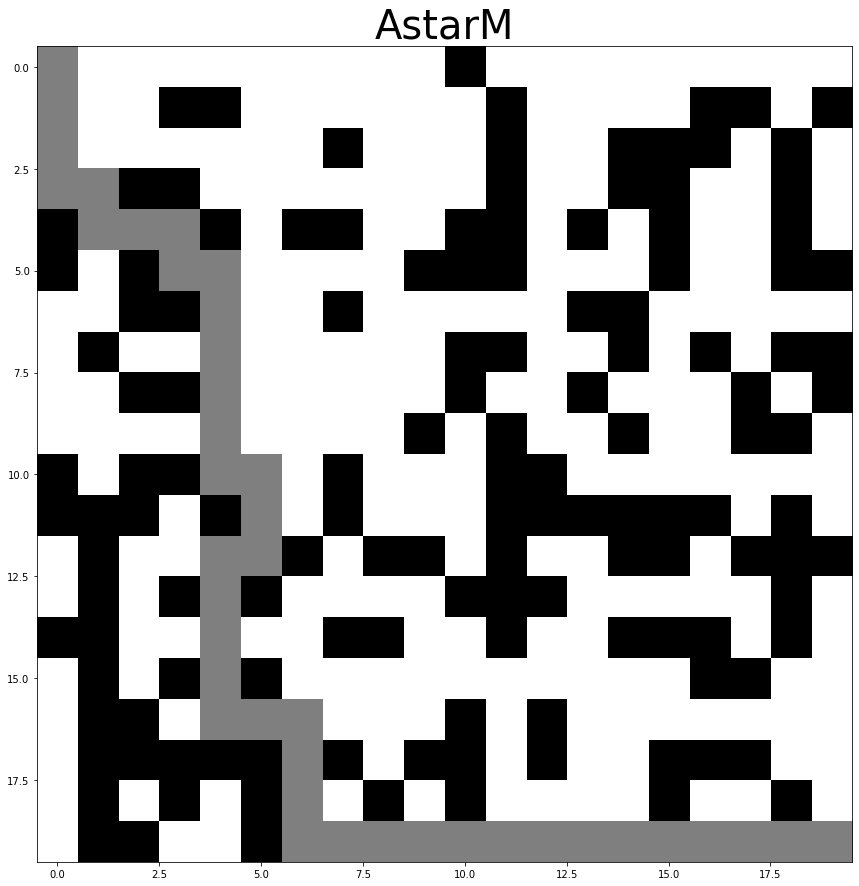

SOLUTION FOUND


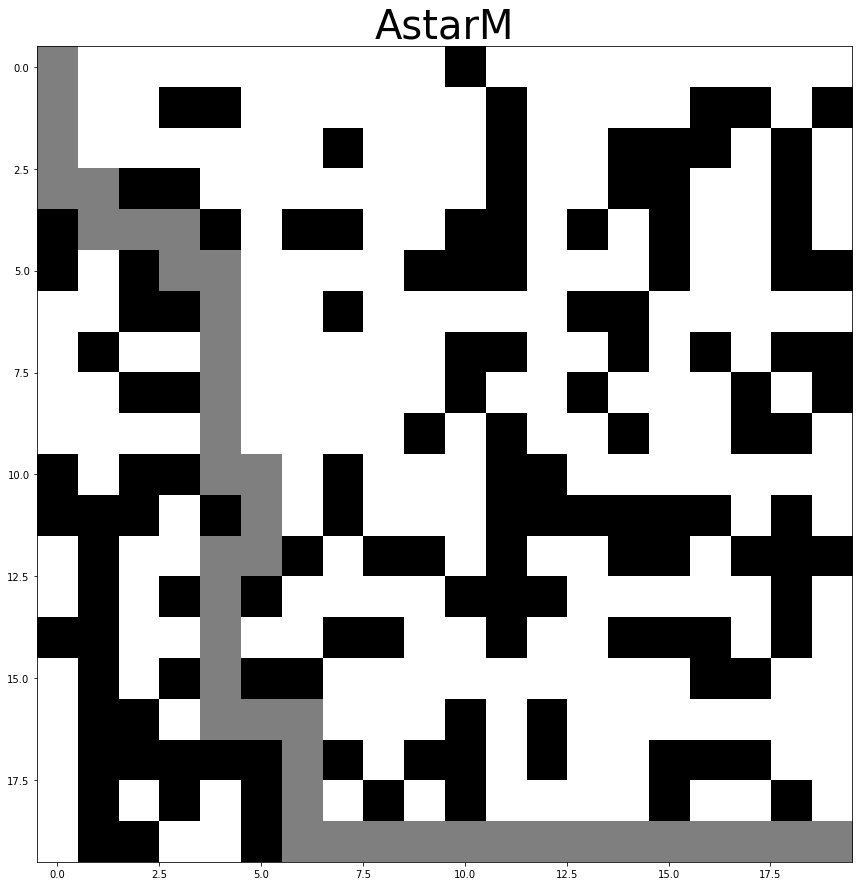

174 174
fails 0
SOLUTION FOUND


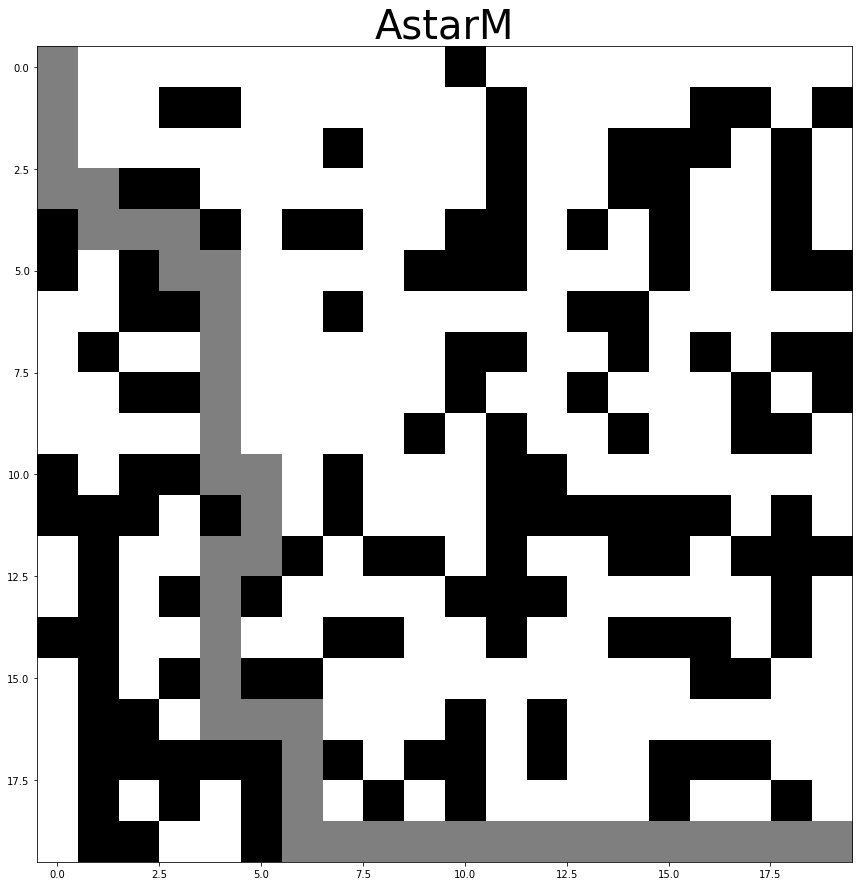

SOLUTION FOUND


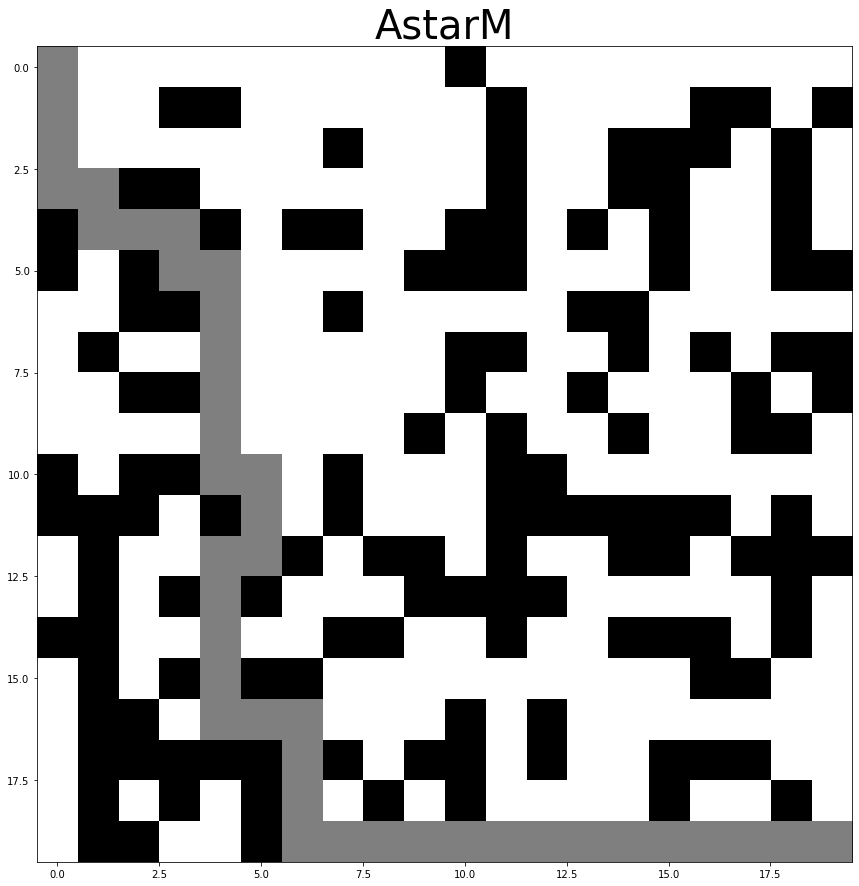

174 174
fails 0
SOLUTION FOUND


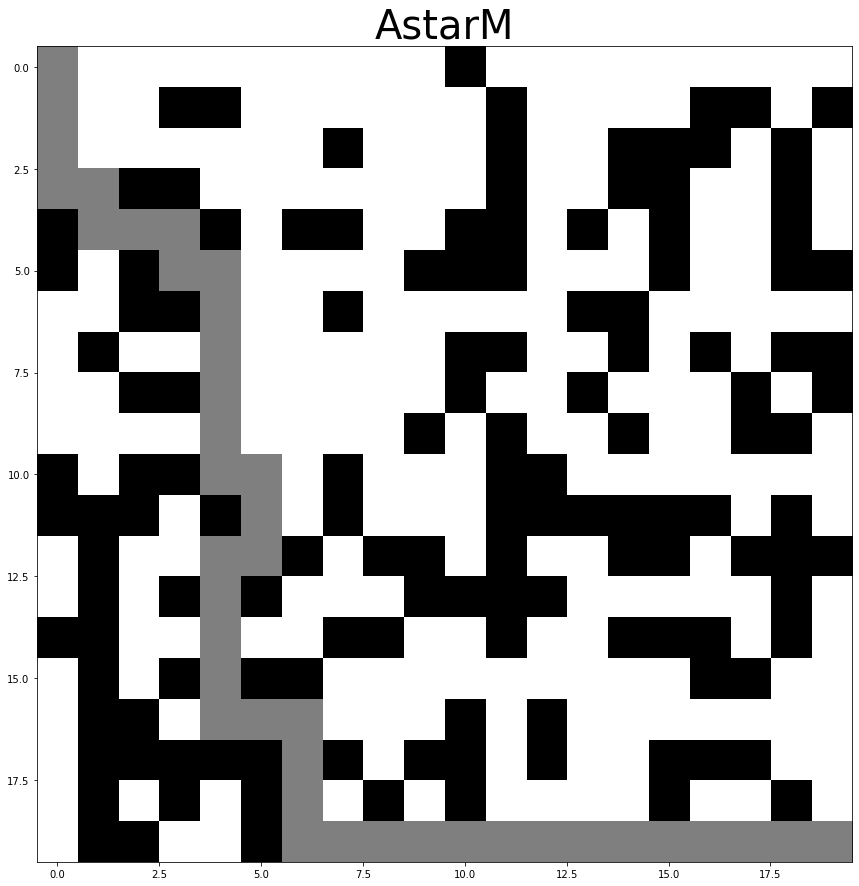

SOLUTION FOUND


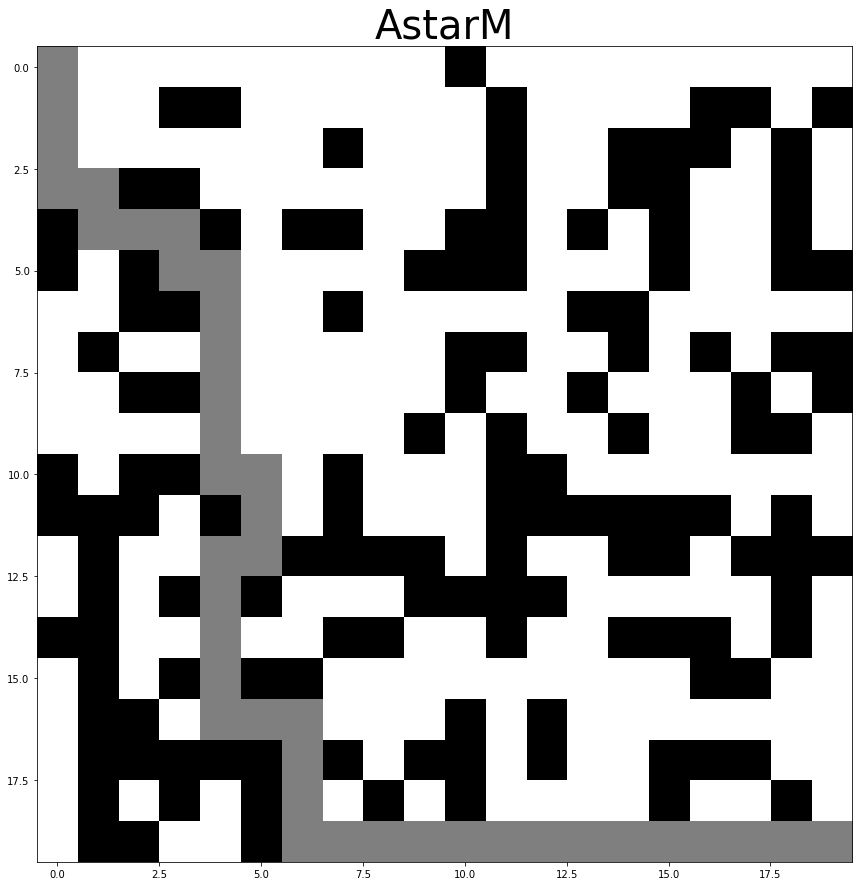

174 174
fails 0
SOLUTION FOUND


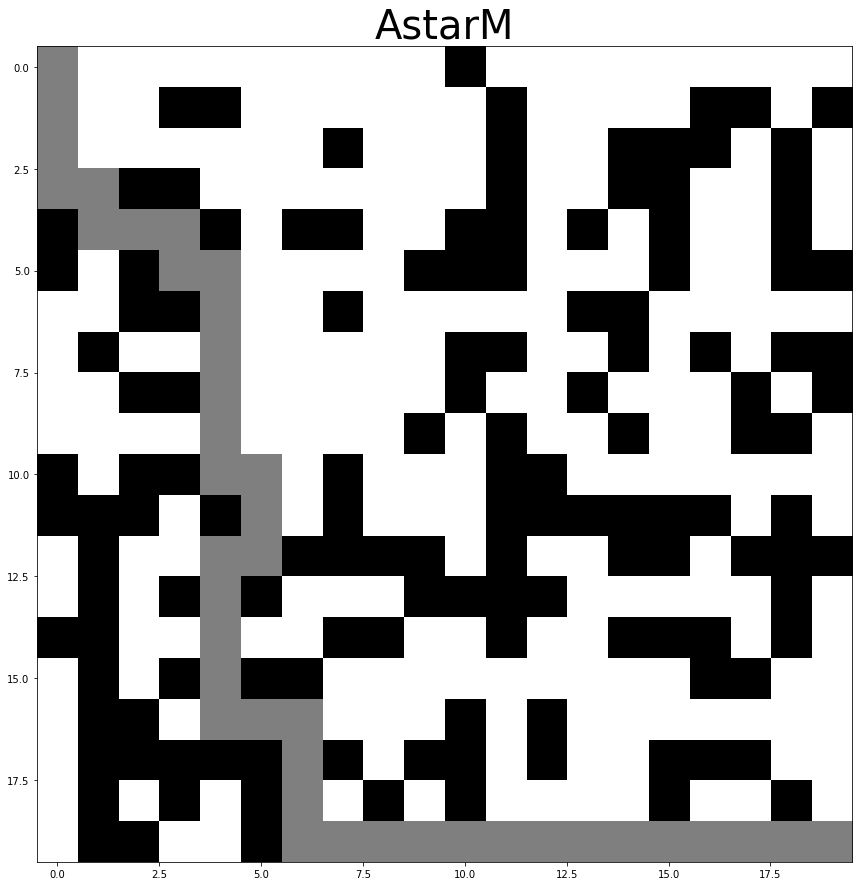

SOLUTION FOUND


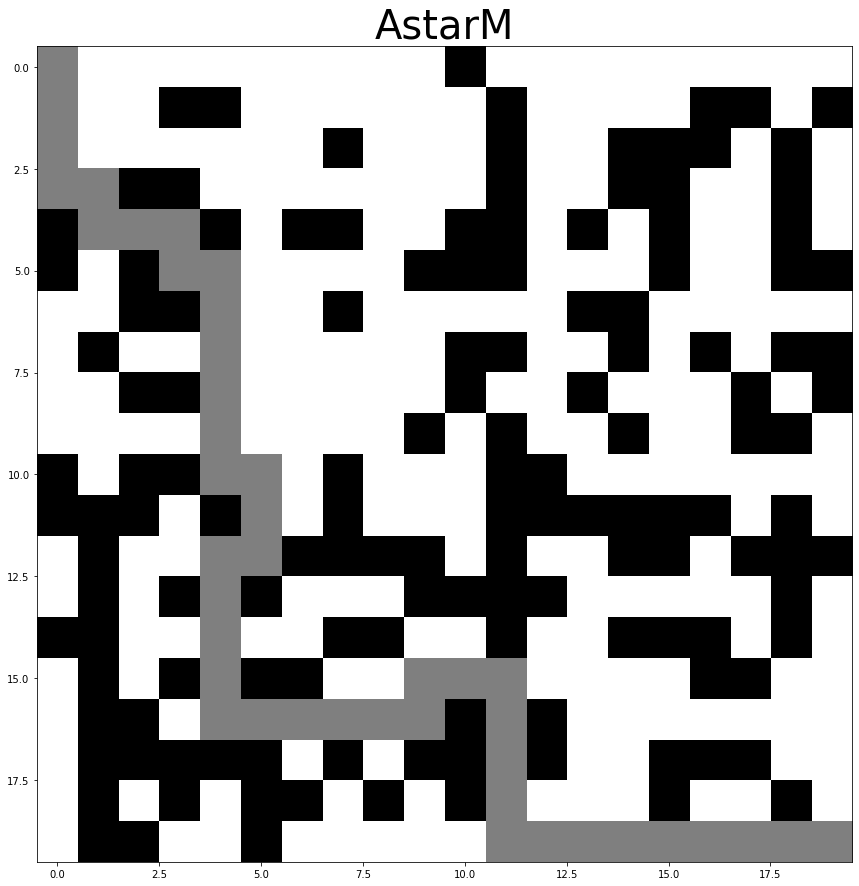

174 198
fails 0
SOLUTION FOUND


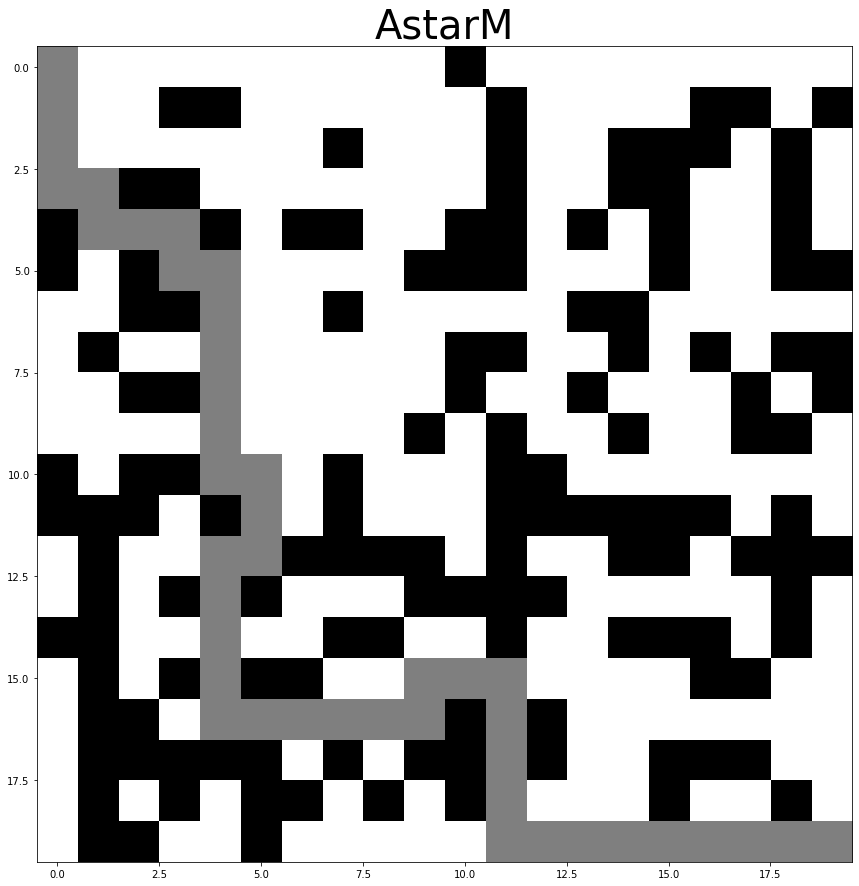

SOLUTION FOUND


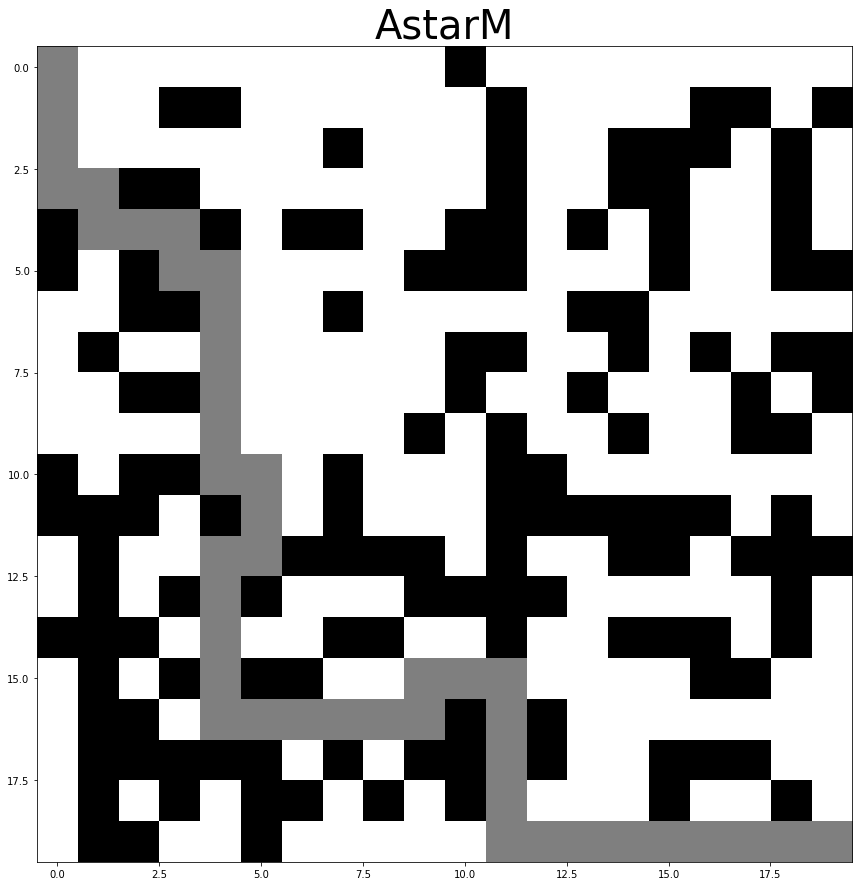

198 198
fails 0
SOLUTION FOUND


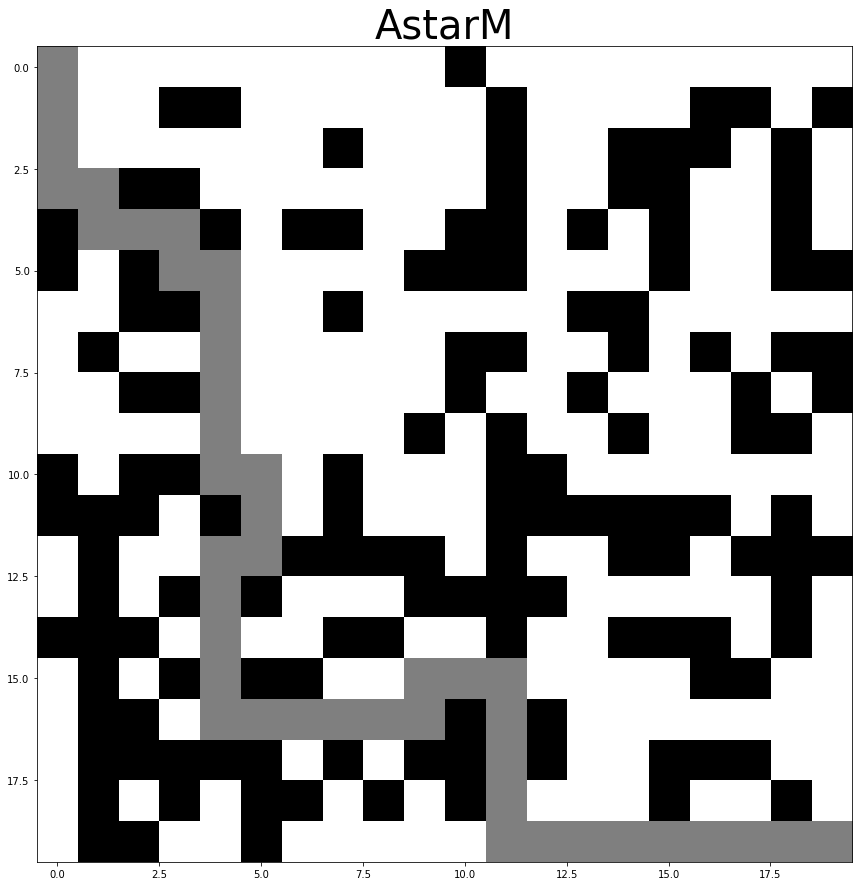

SOLUTION FOUND


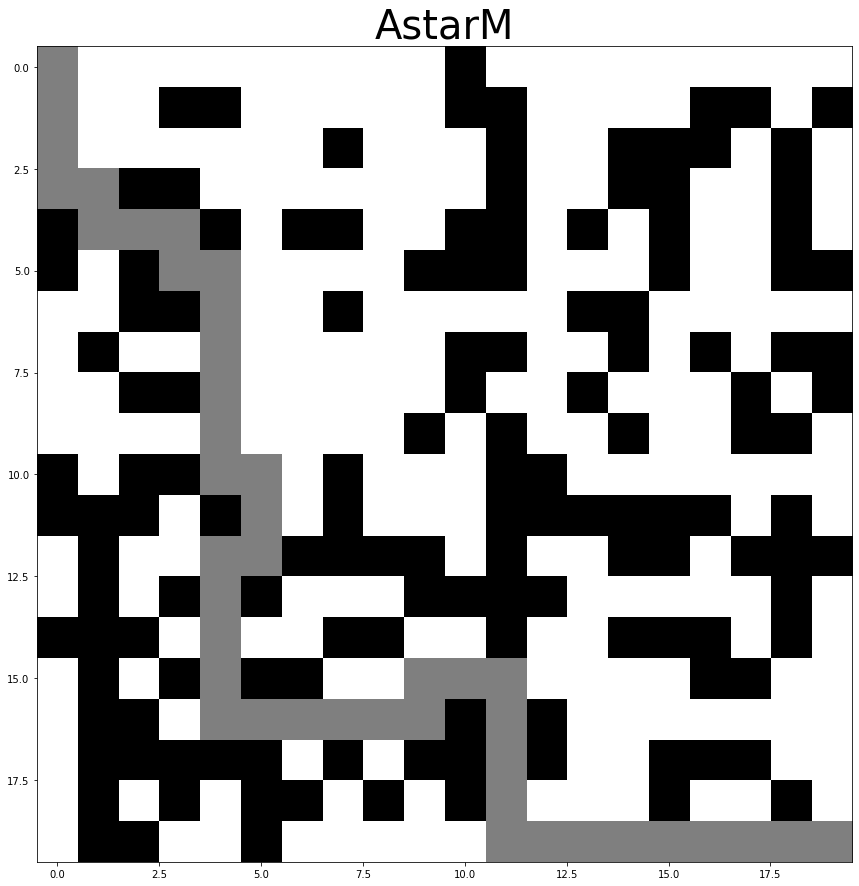

198 196
fails 1
SOLUTION FOUND


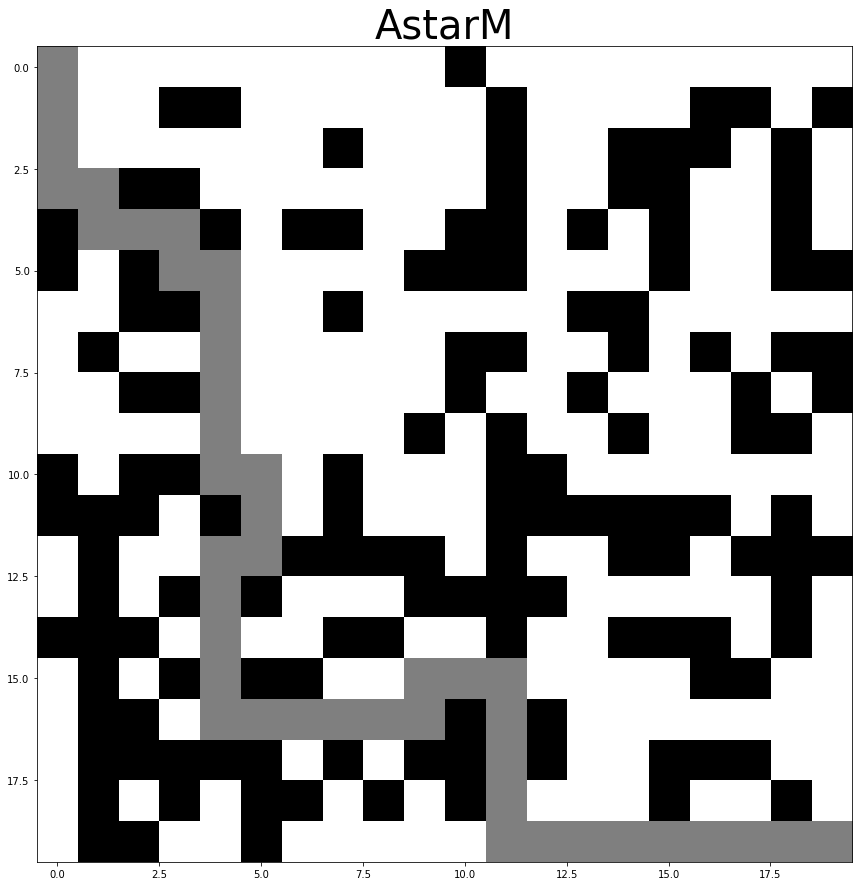

SOLUTION FOUND


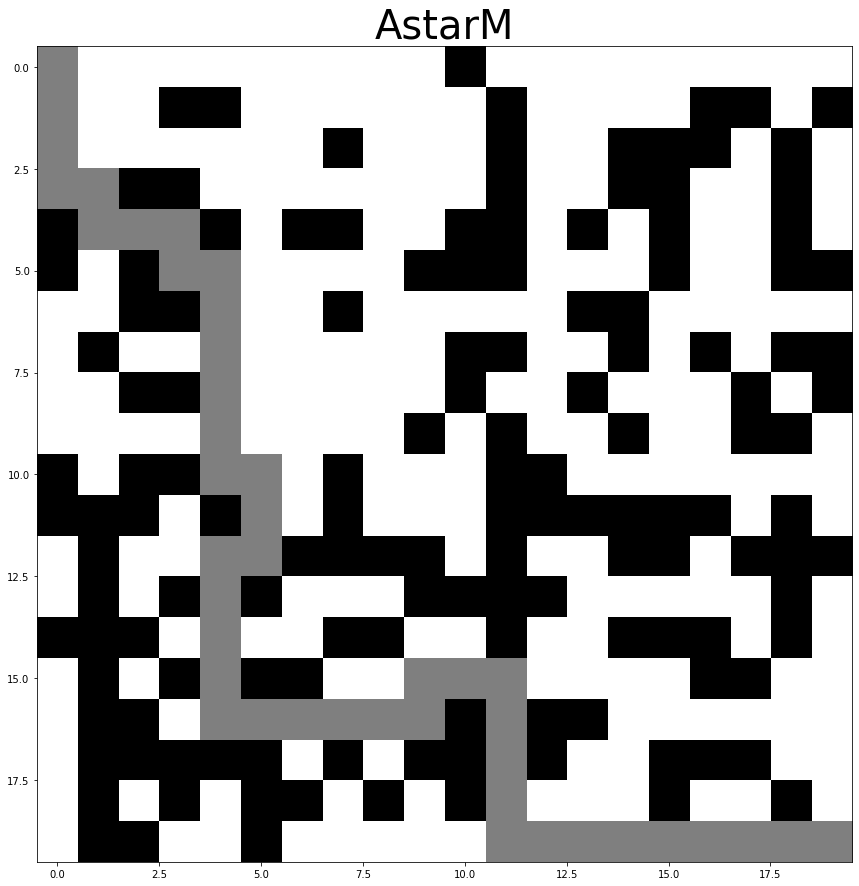

198 198
fails 0
SOLUTION FOUND


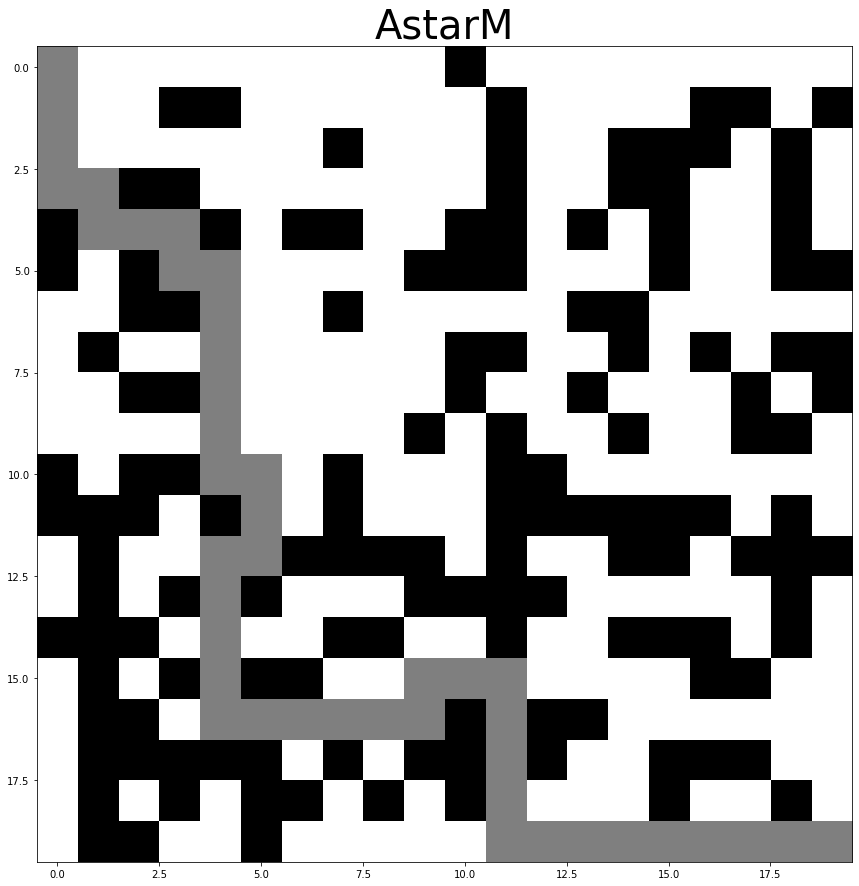

SOLUTION FOUND


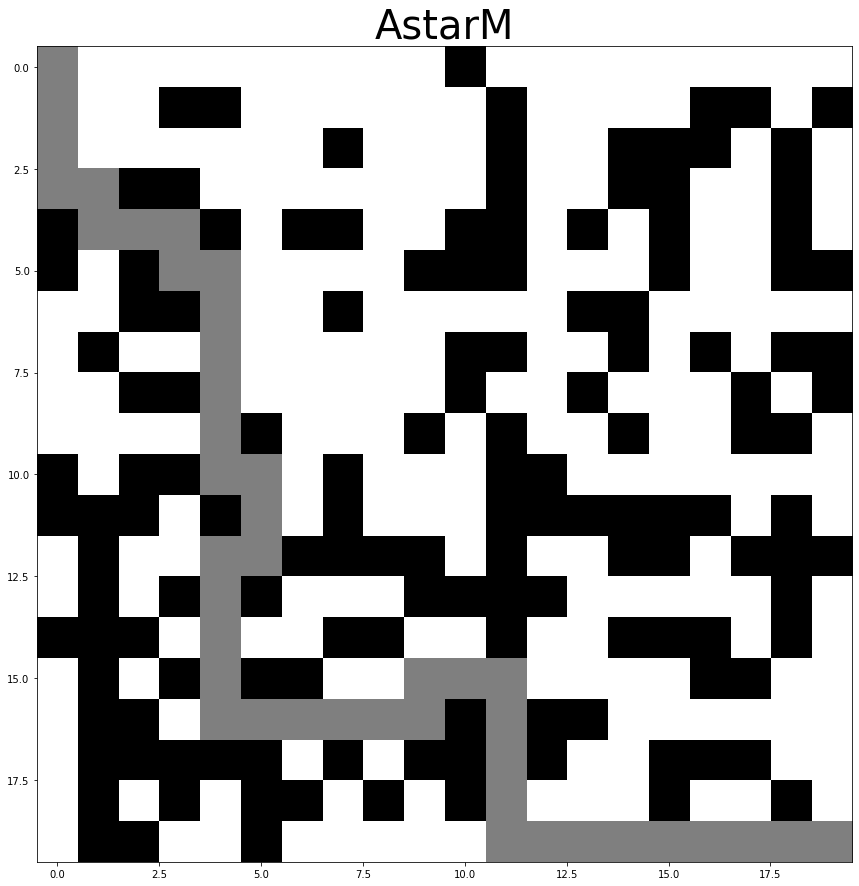

198 194
fails 1
SOLUTION FOUND


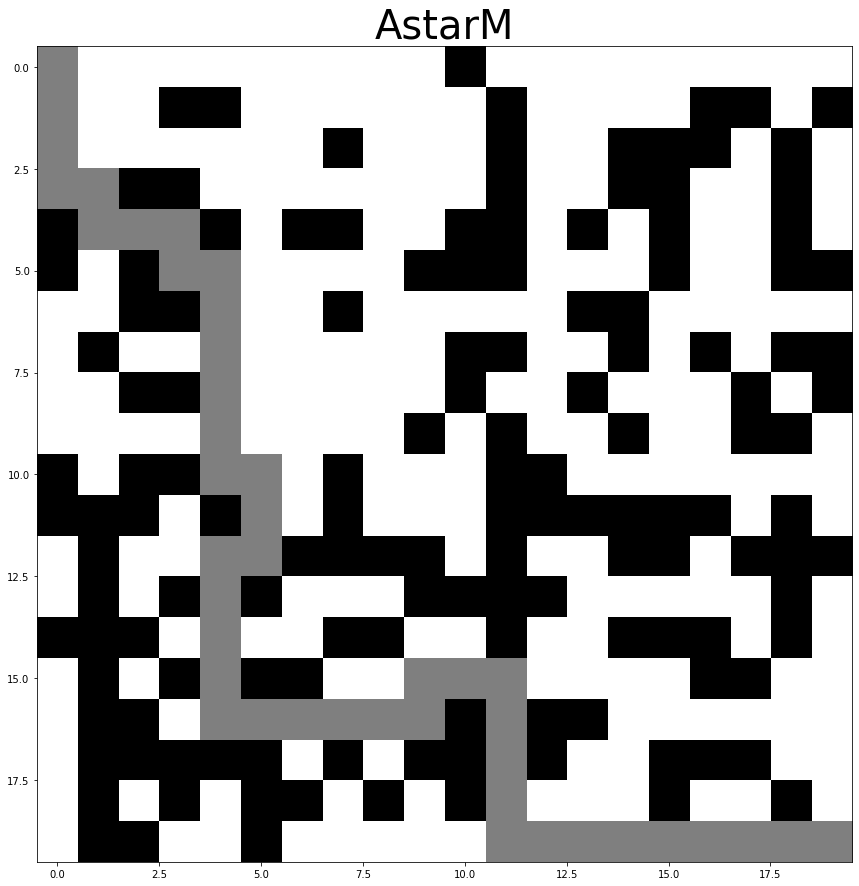

SOLUTION FOUND


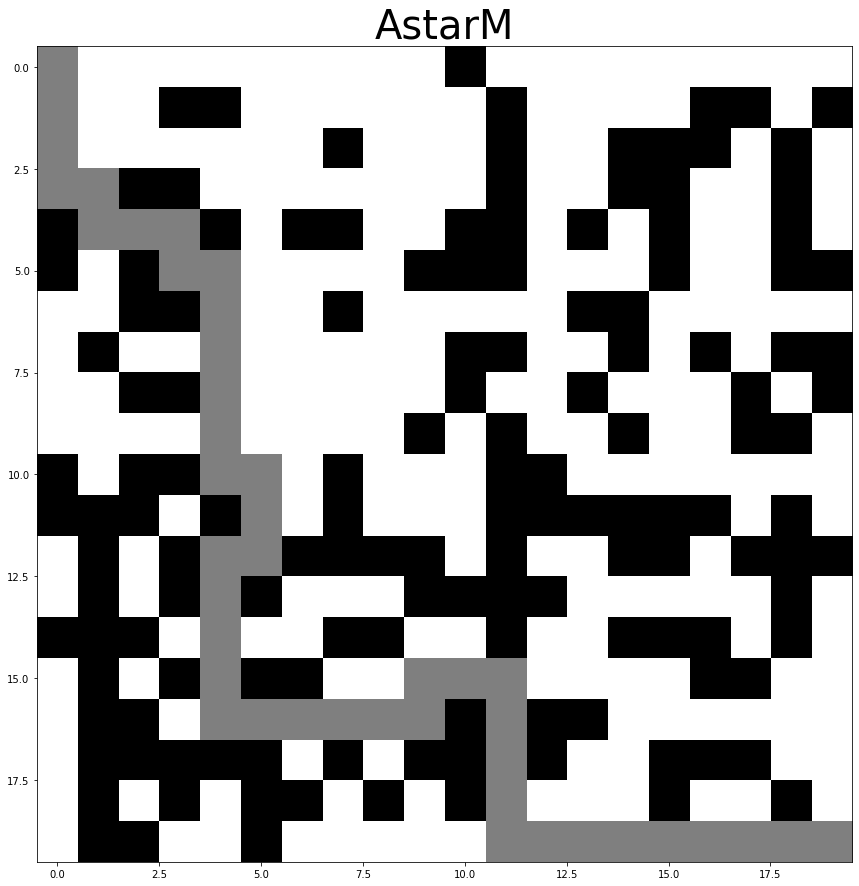

198 198
fails 0
SOLUTION FOUND


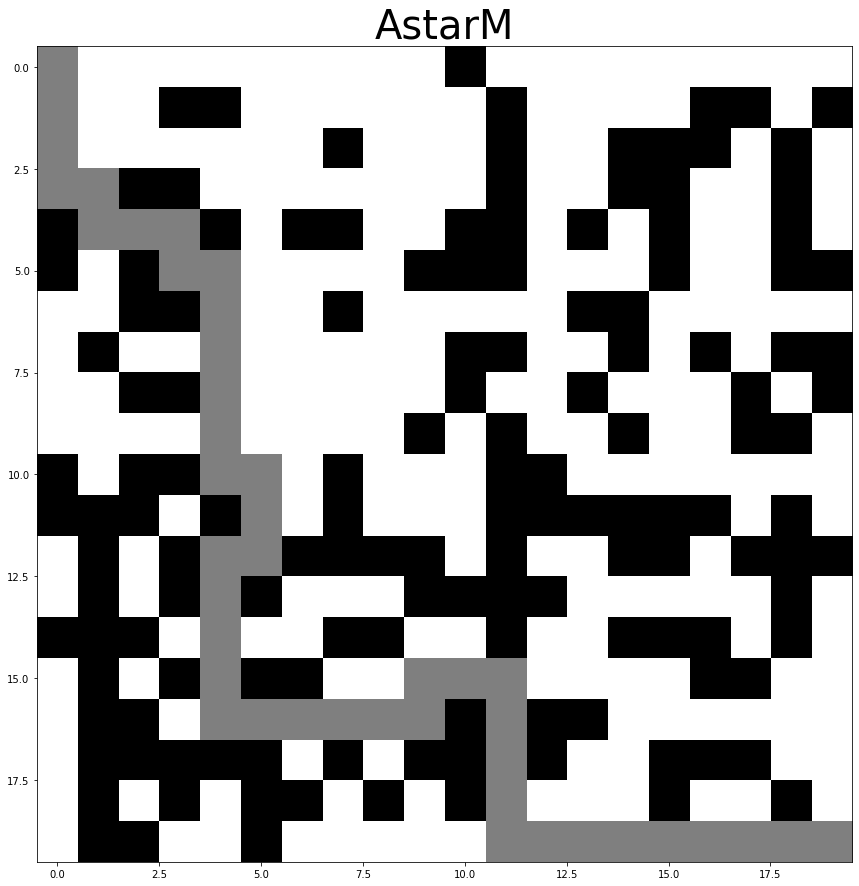

SOLUTION FOUND


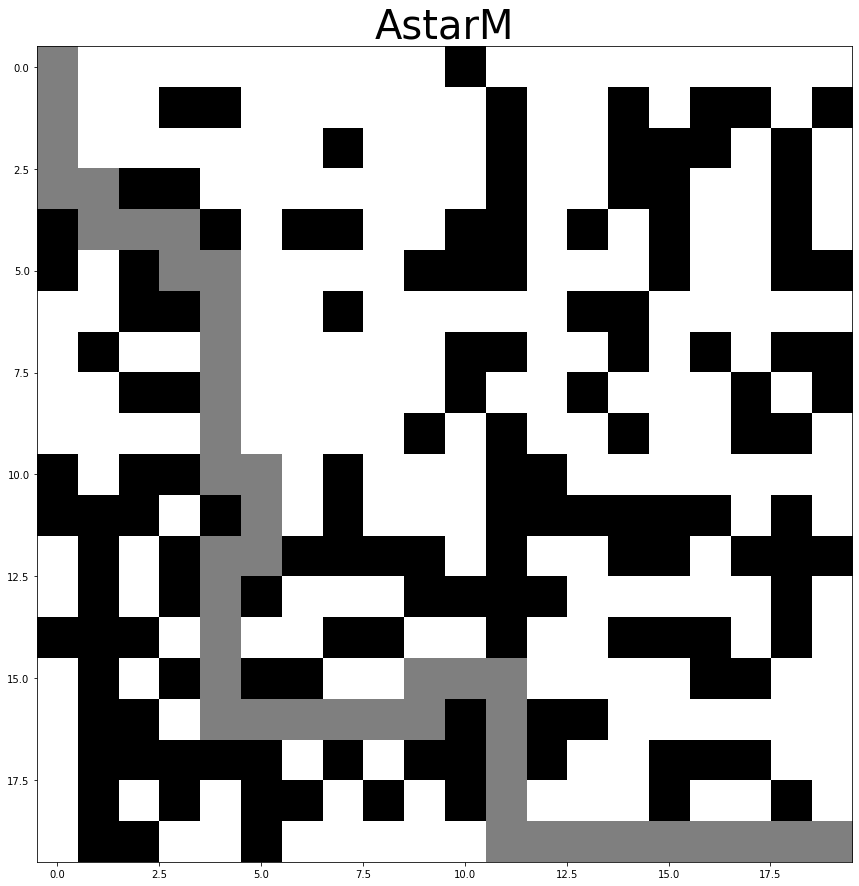

198 198
fails 0
SOLUTION FOUND


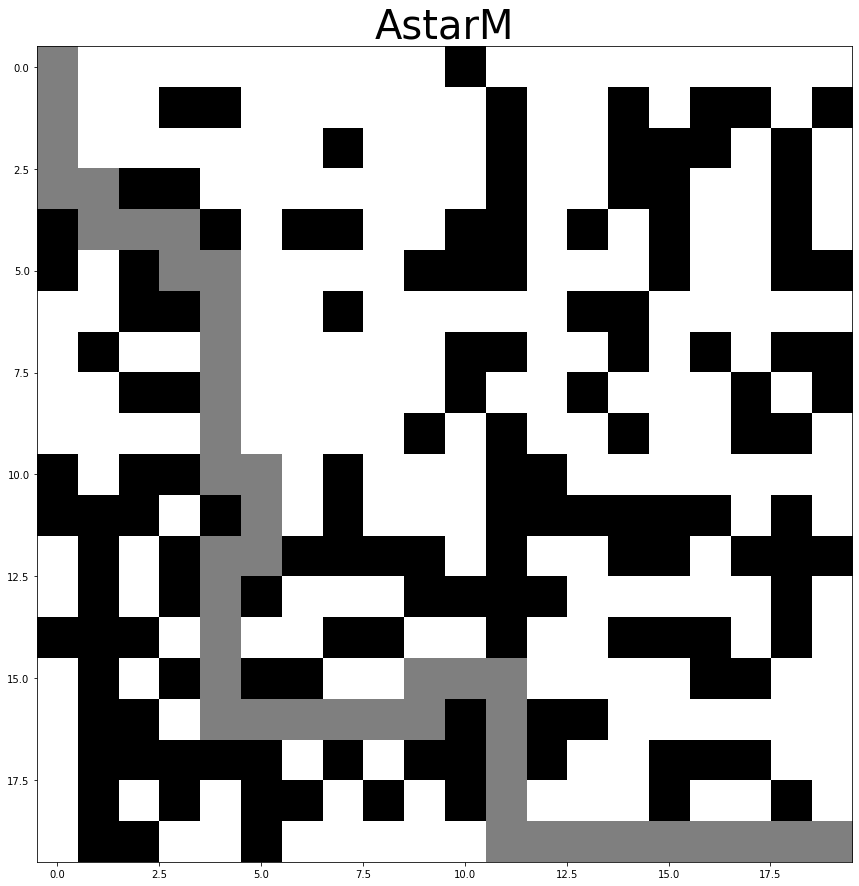

SOLUTION FOUND


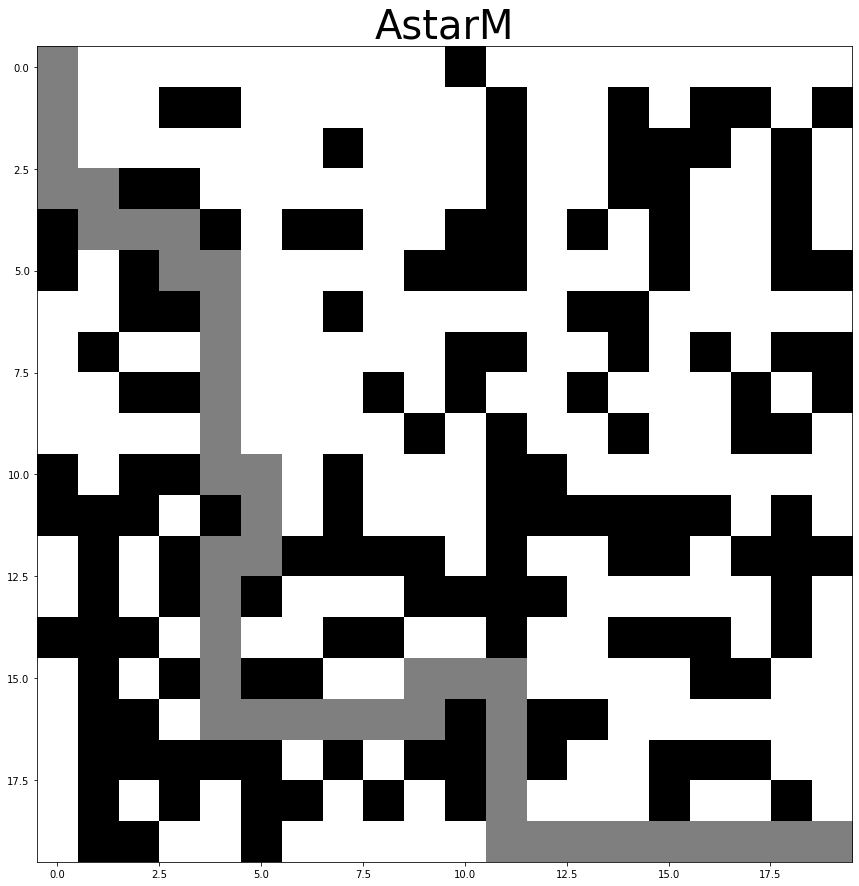

198 194
fails 1
SOLUTION FOUND


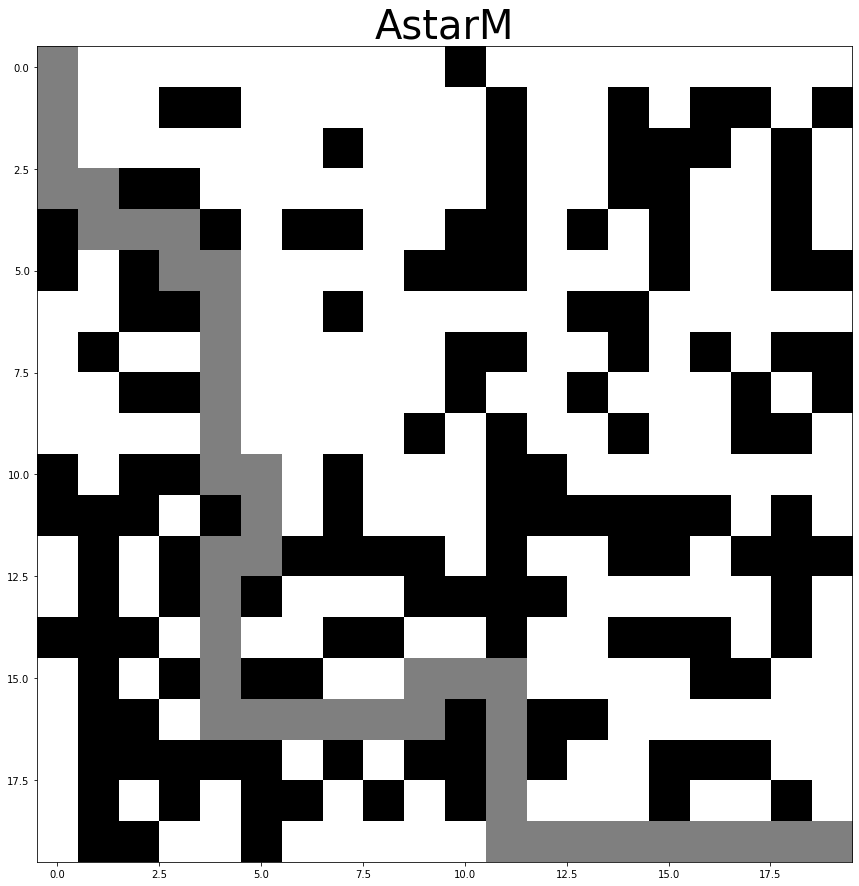

SOLUTION FOUND


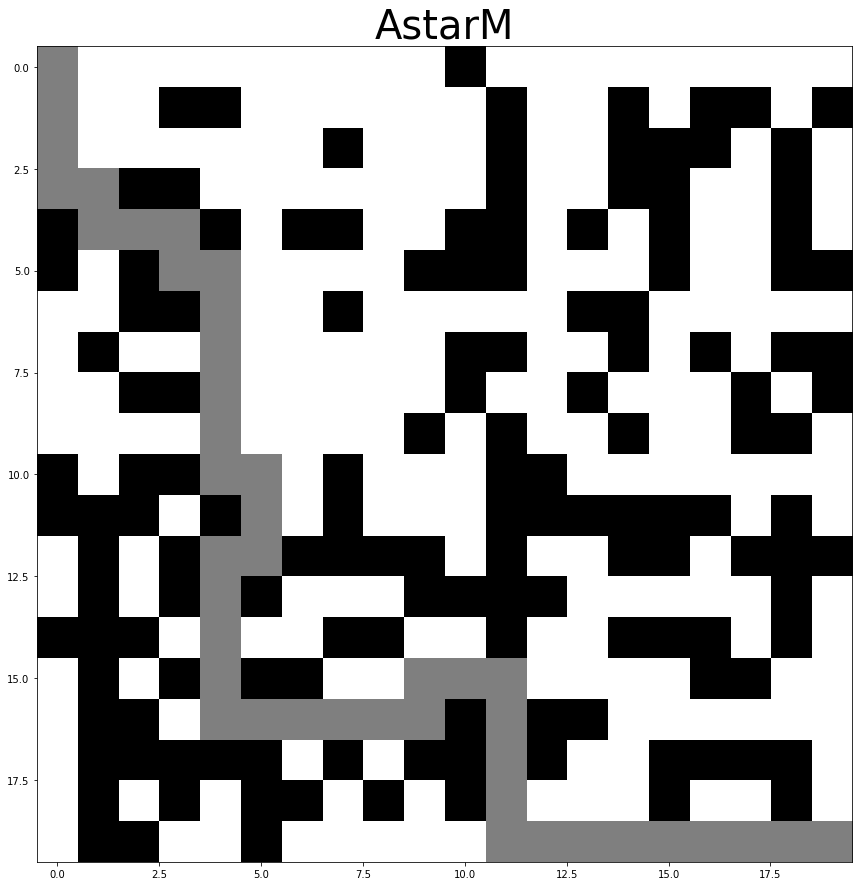

198 198
fails 0
SOLUTION FOUND


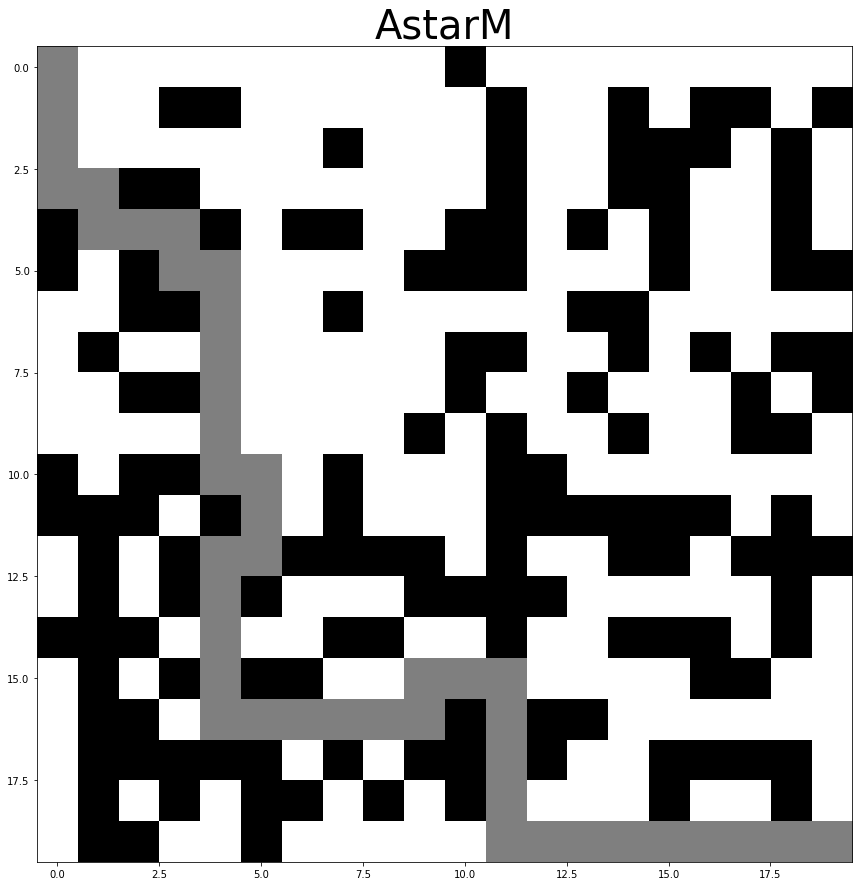

SOLUTION FOUND


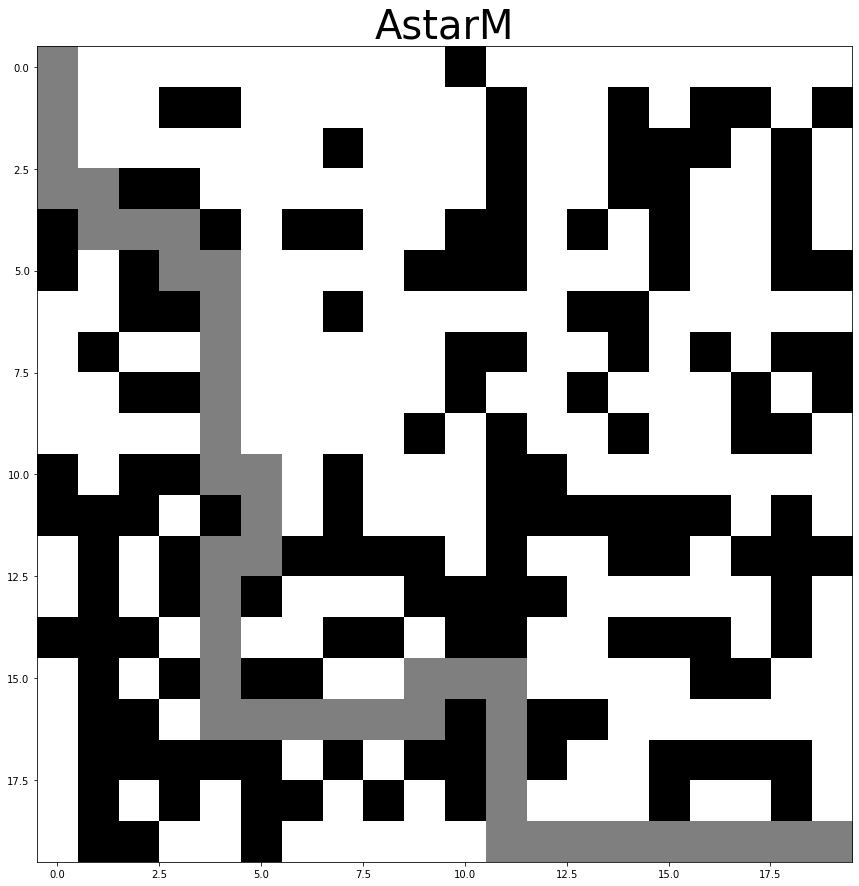

198 198
fails 0
SOLUTION FOUND


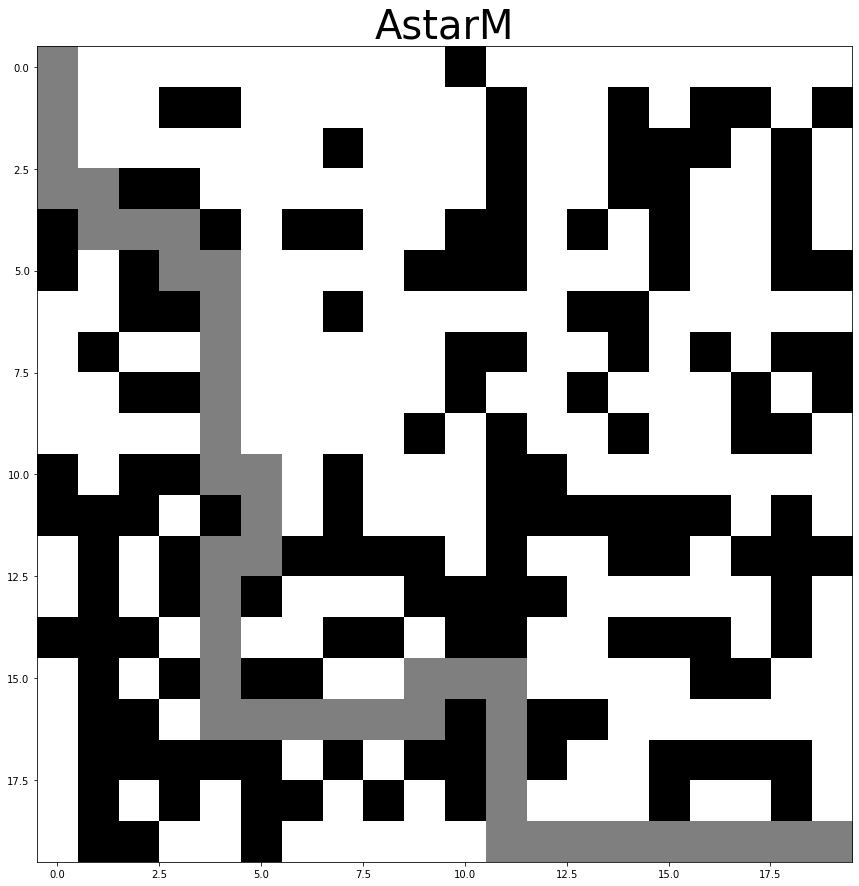

SOLUTION FOUND


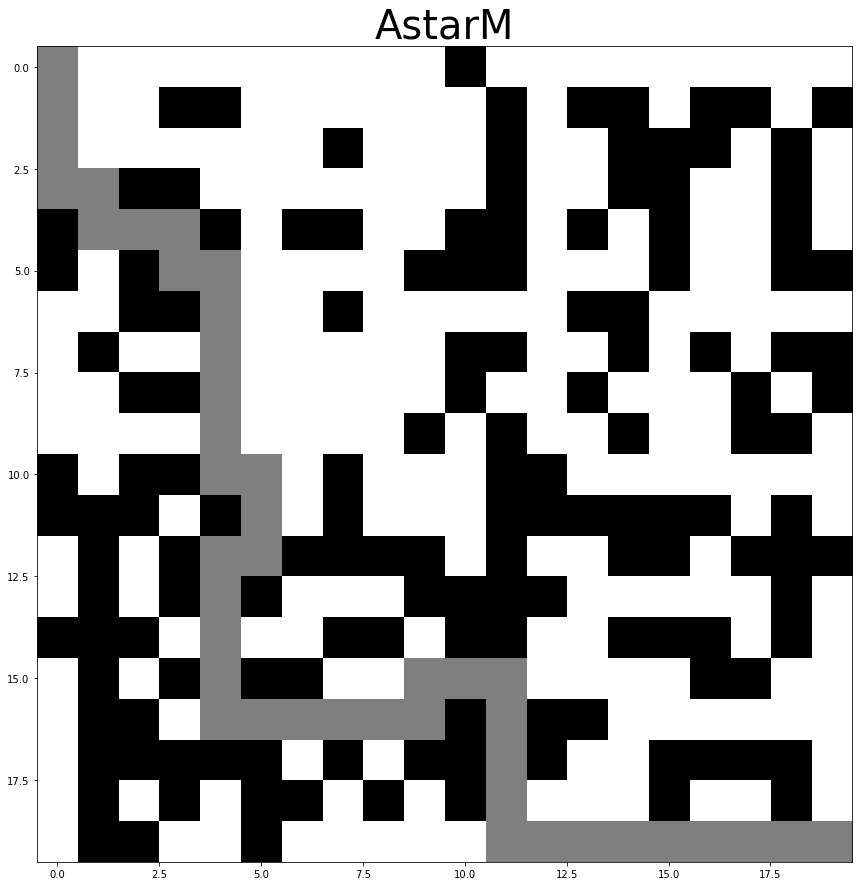

198 198
fails 0
SOLUTION FOUND


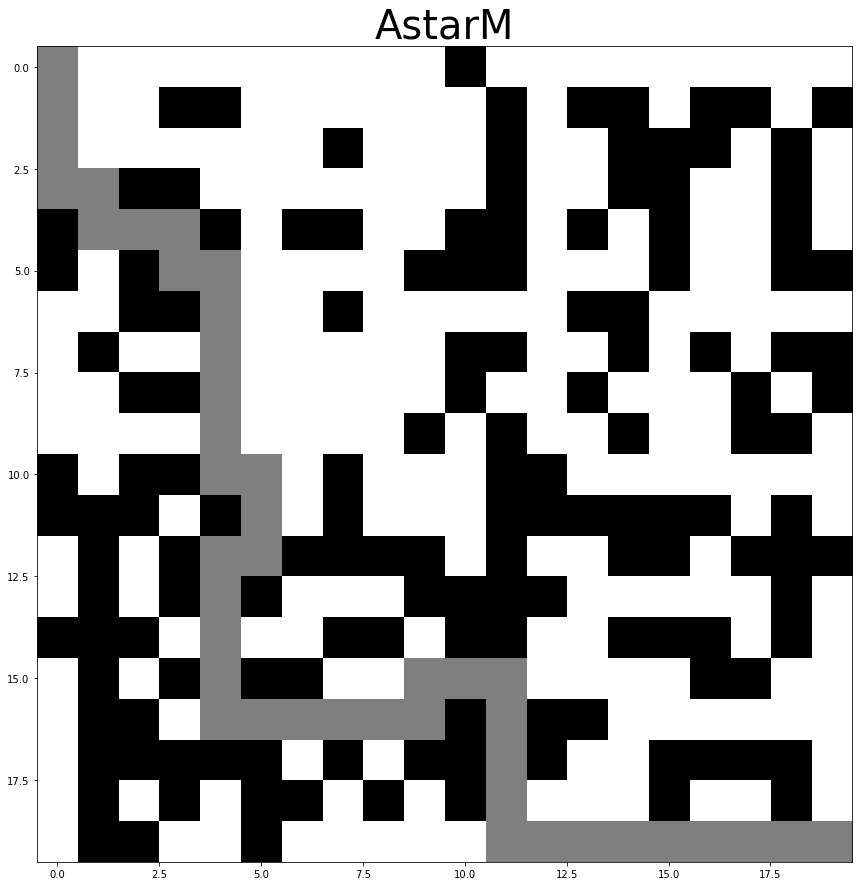

SOLUTION FOUND


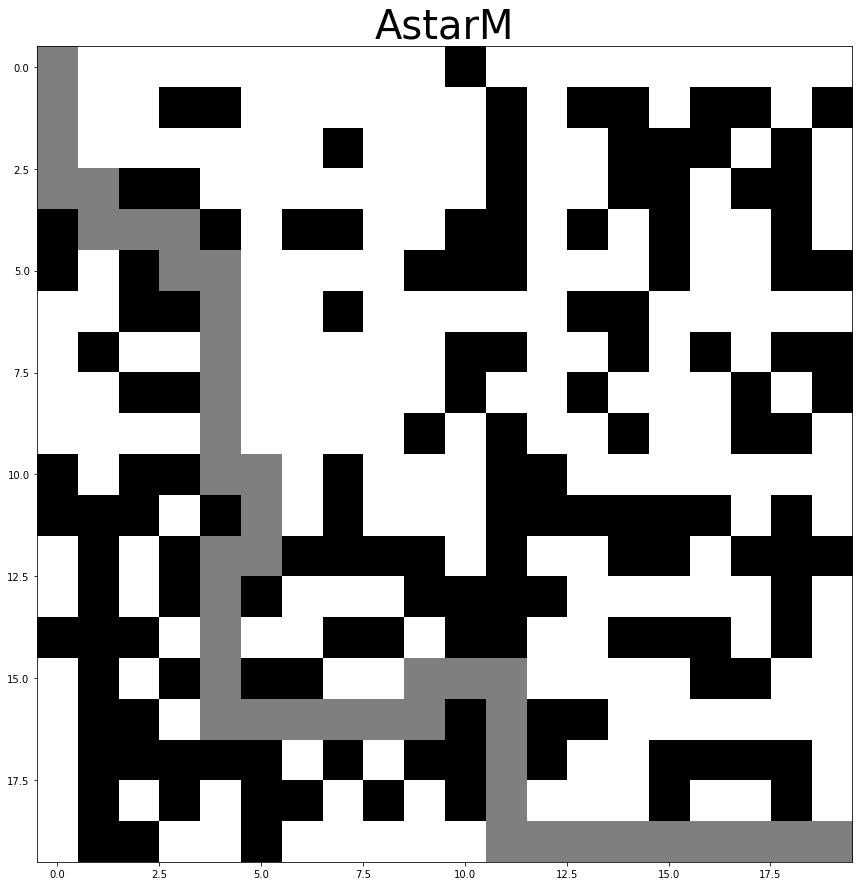

198 198
fails 0
SOLUTION FOUND


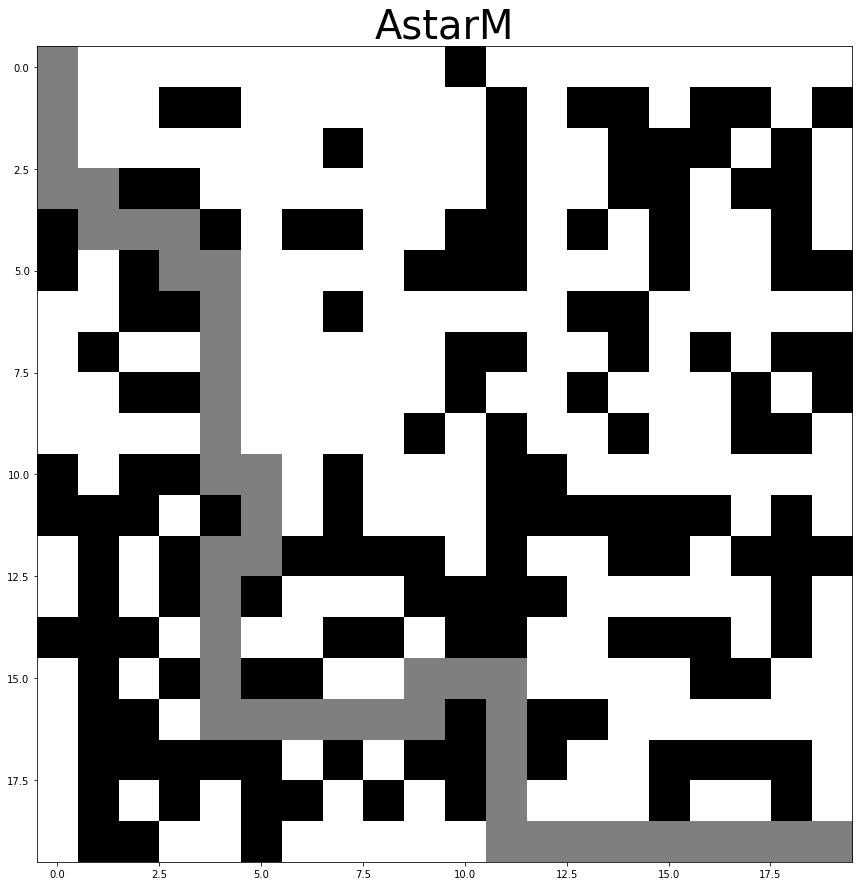

SOLUTION FOUND


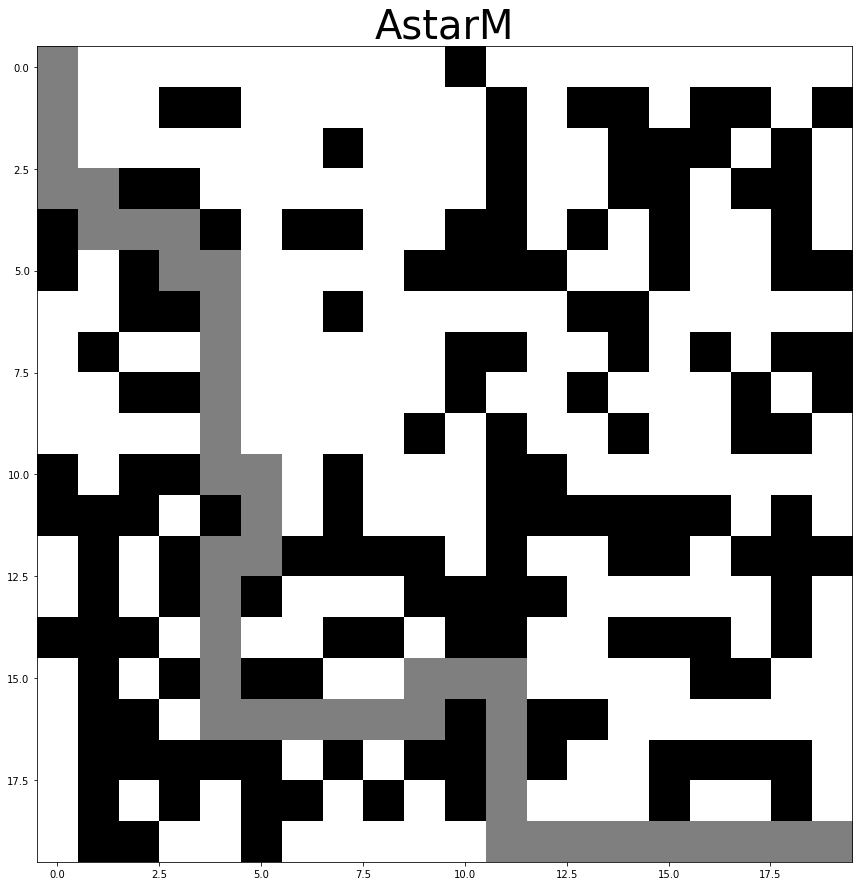

198 195
fails 1
SOLUTION FOUND


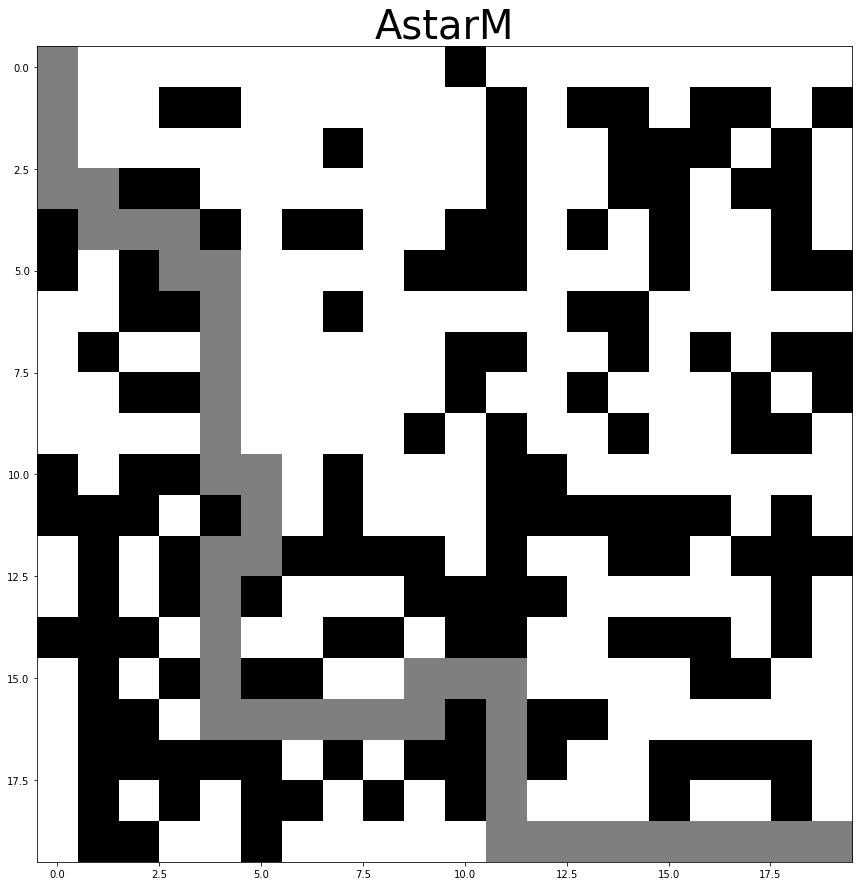

SOLUTION FOUND


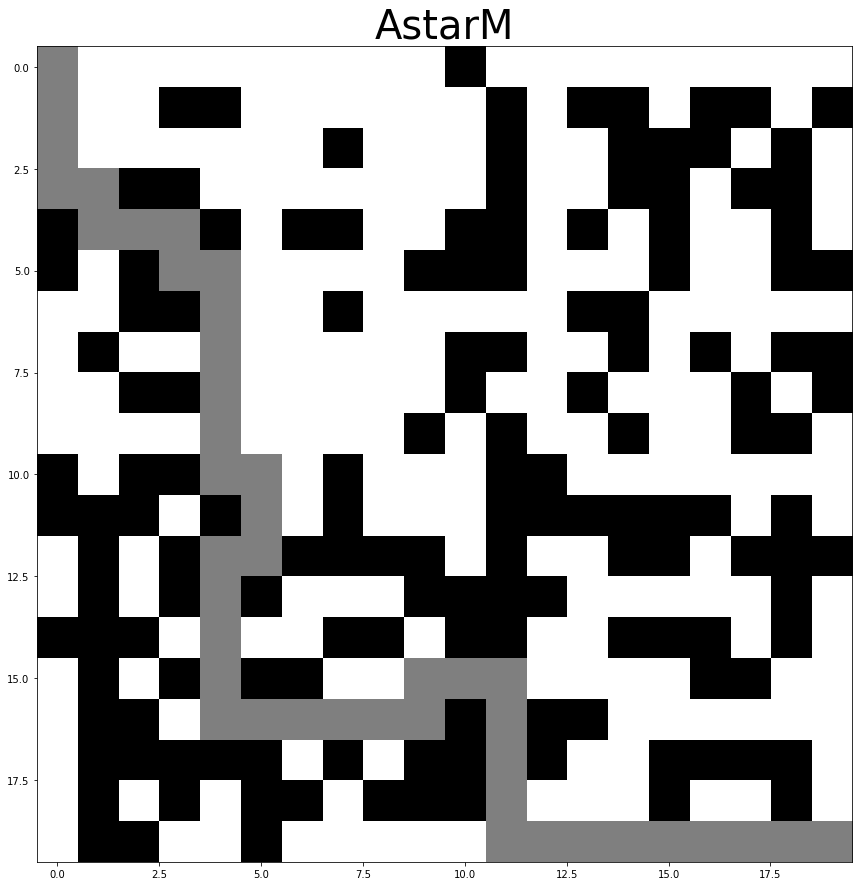

198 198
fails 0
SOLUTION FOUND


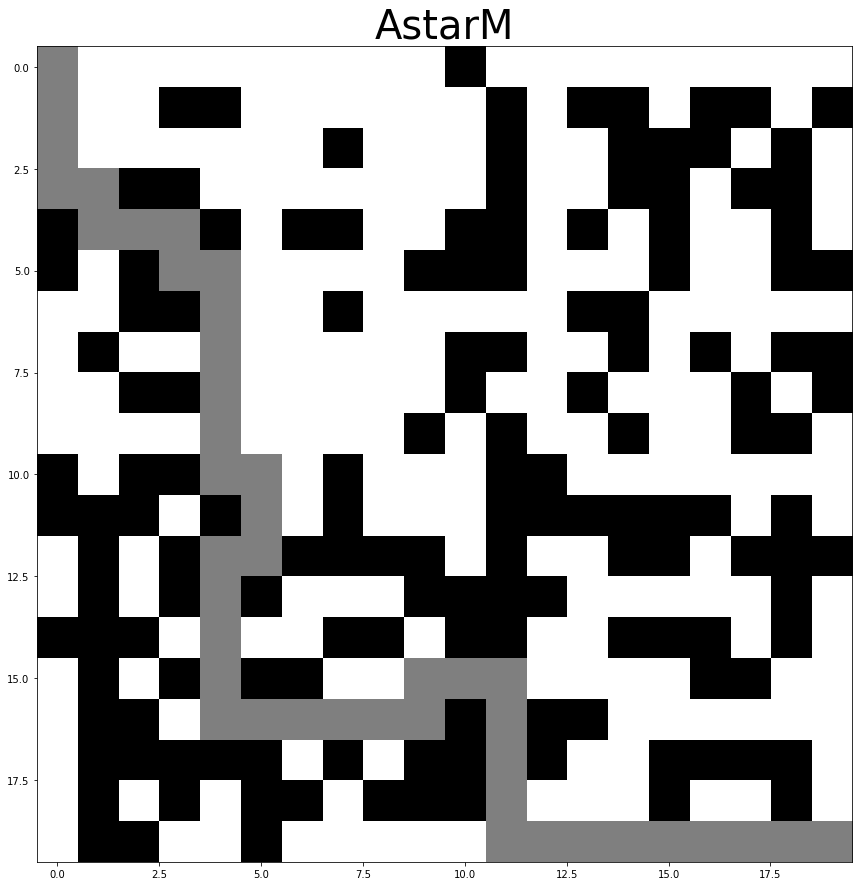

SOLUTION FOUND


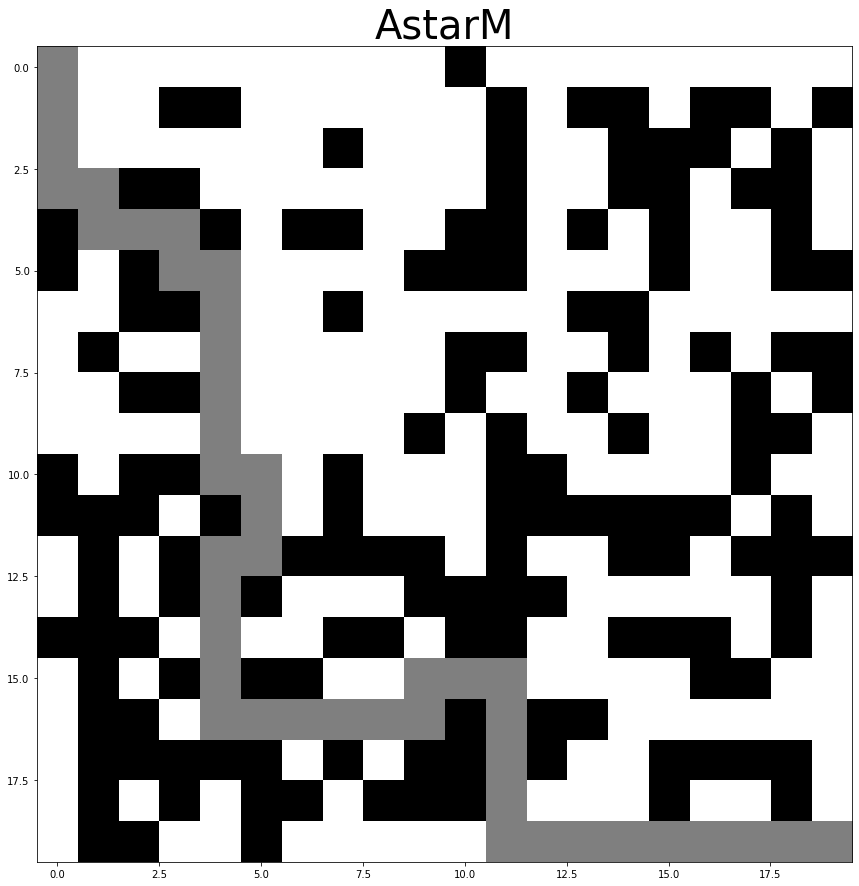

198 192
fails 1
SOLUTION FOUND


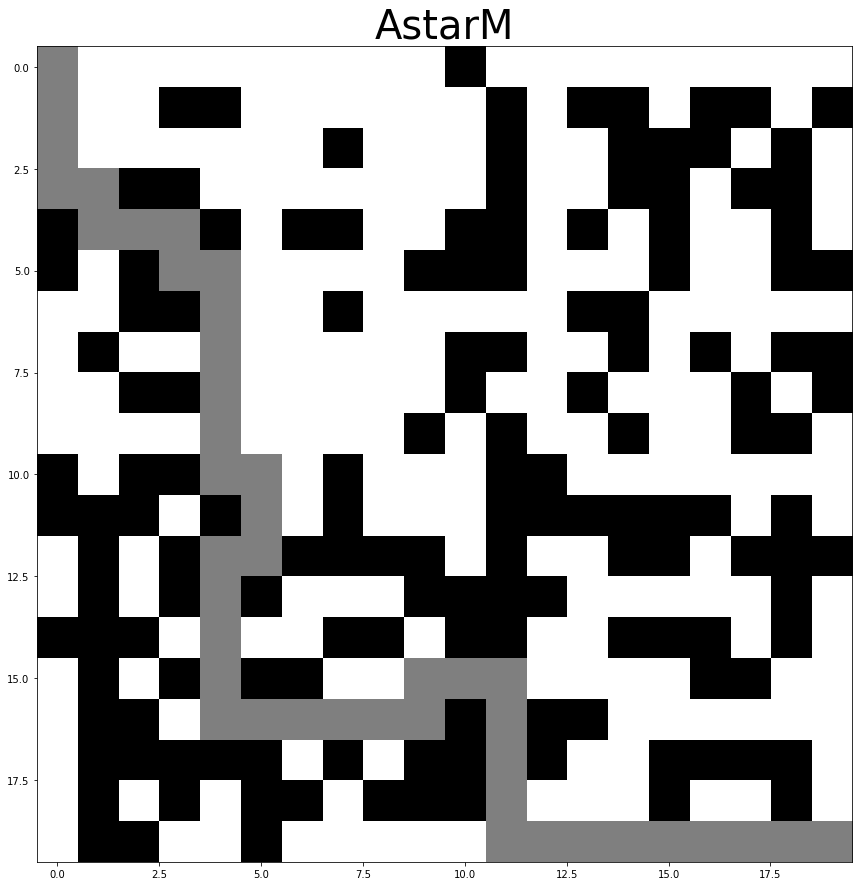

SOLUTION FOUND


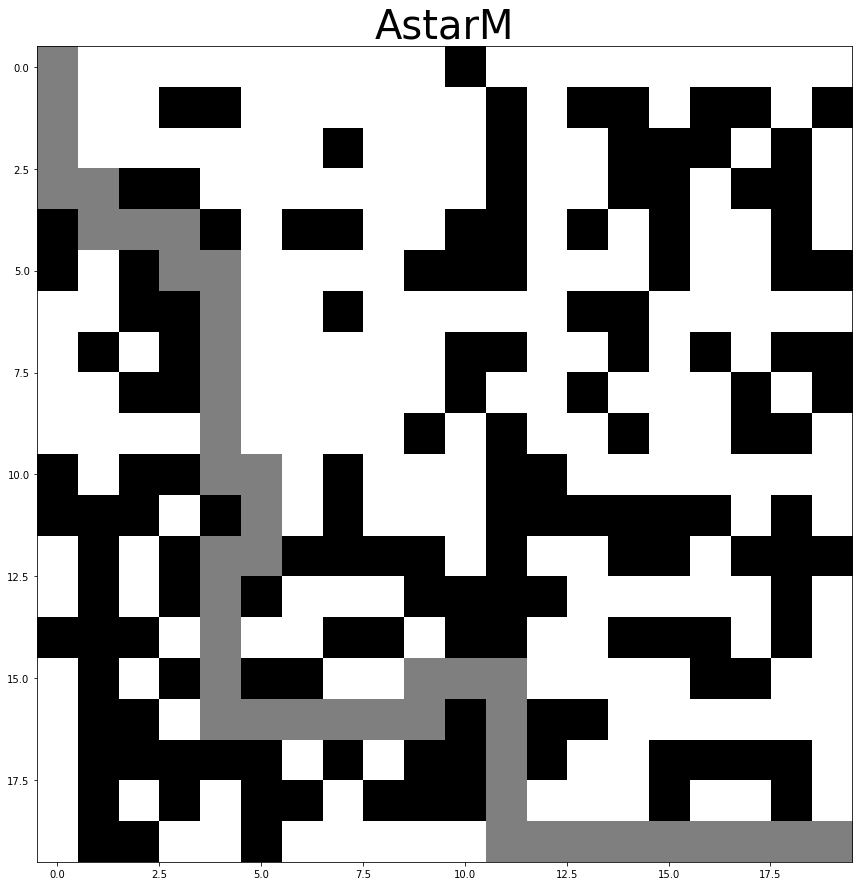

198 196
fails 2
SOLUTION FOUND


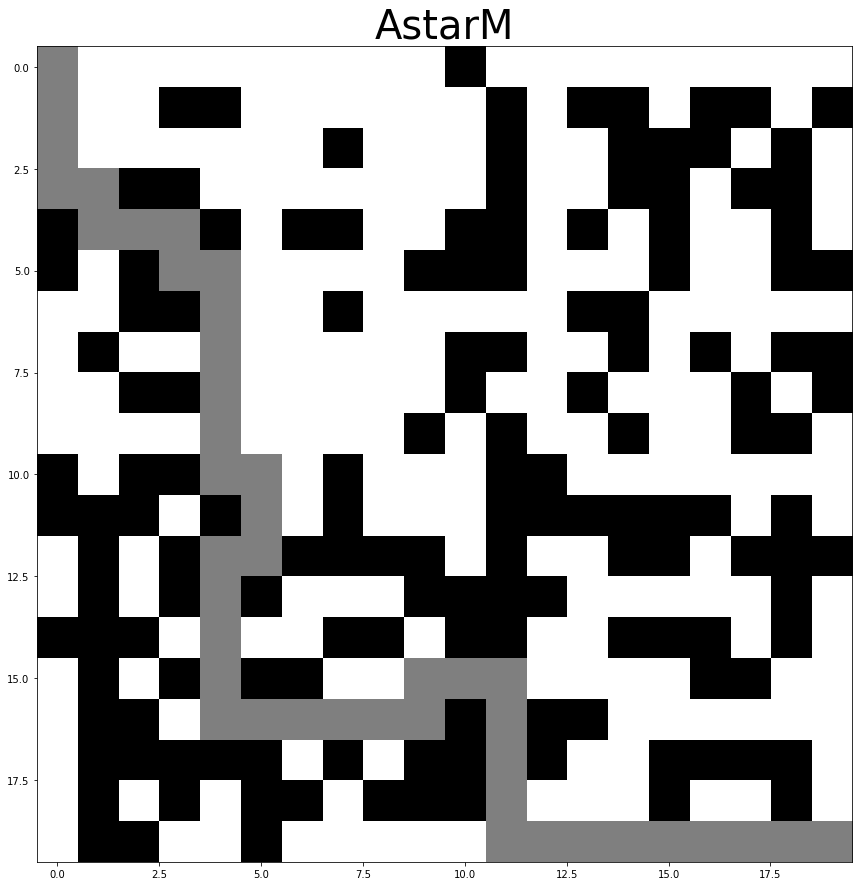

SOLUTION FOUND


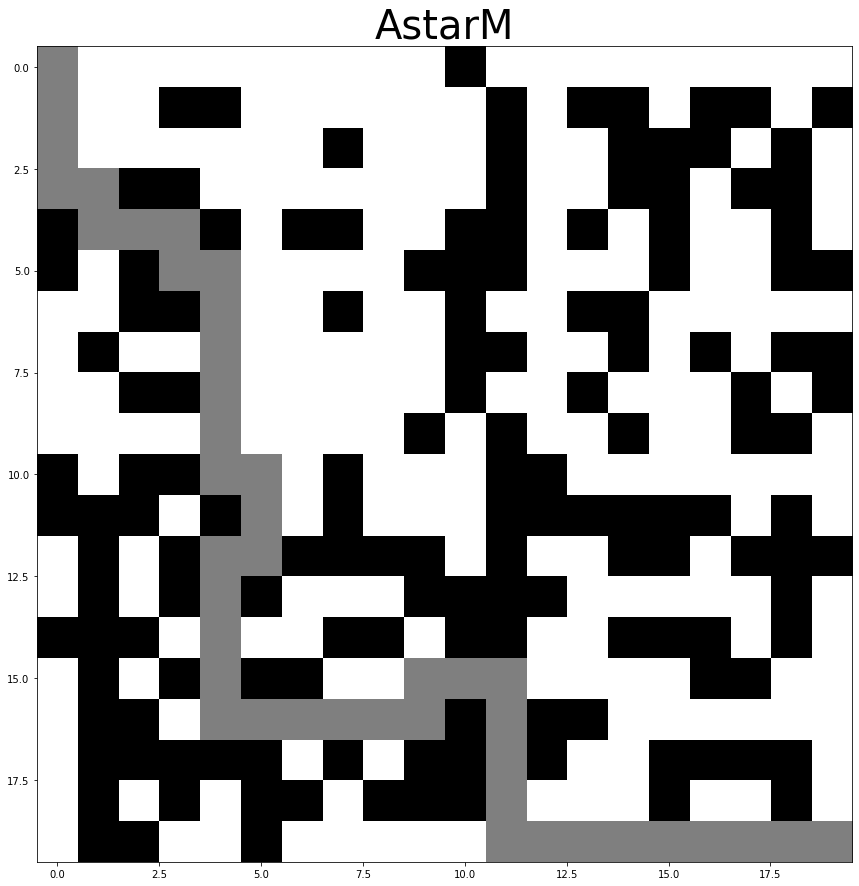

198 174
fails 3
SOLUTION FOUND


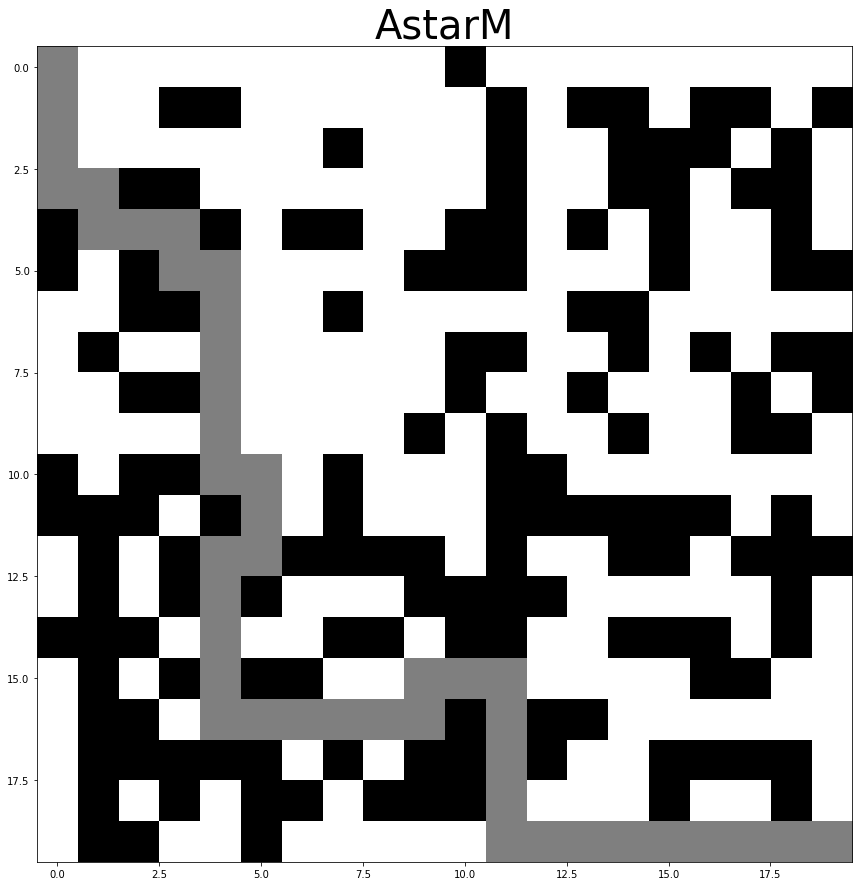

SOLUTION FOUND


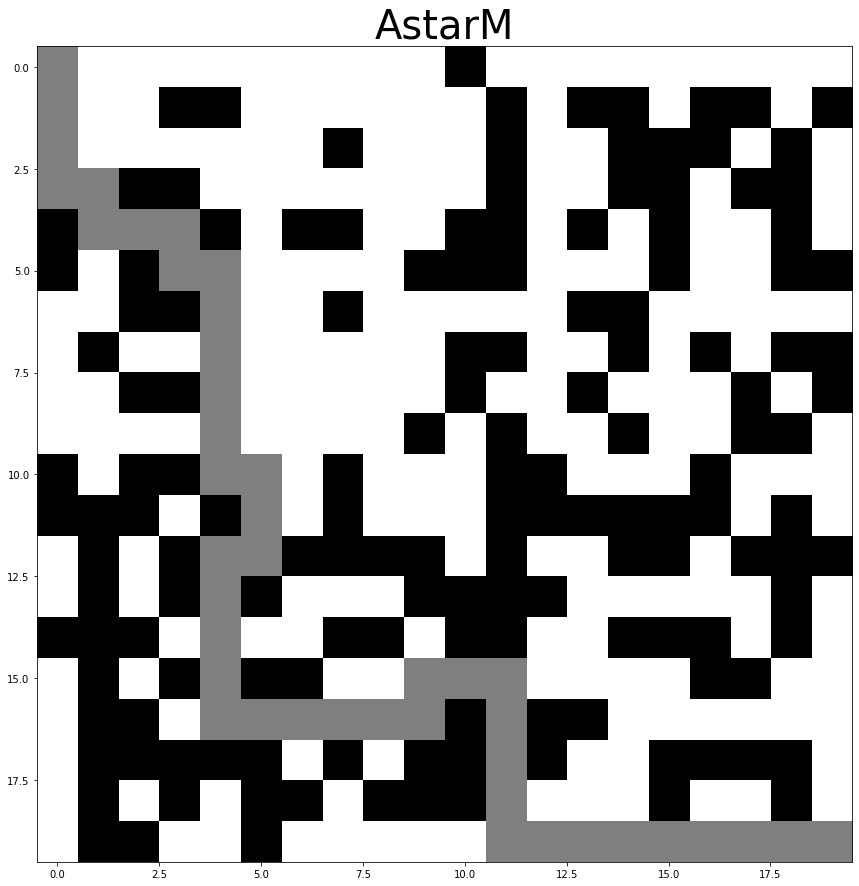

198 191
fails 4
SOLUTION FOUND


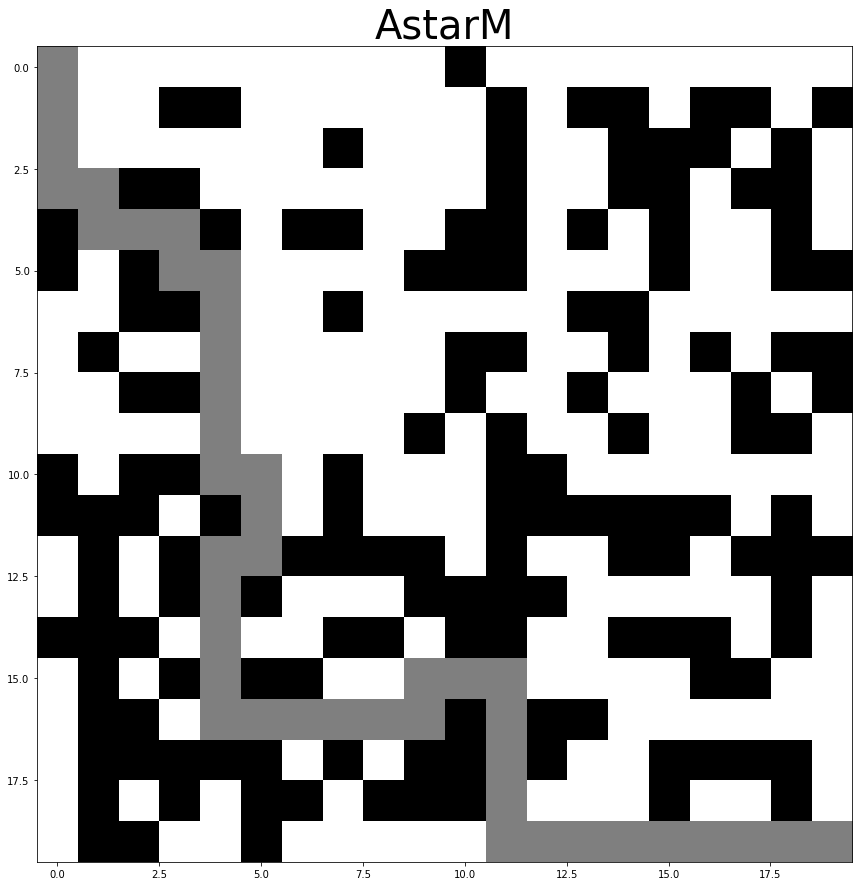

SOLUTION FOUND


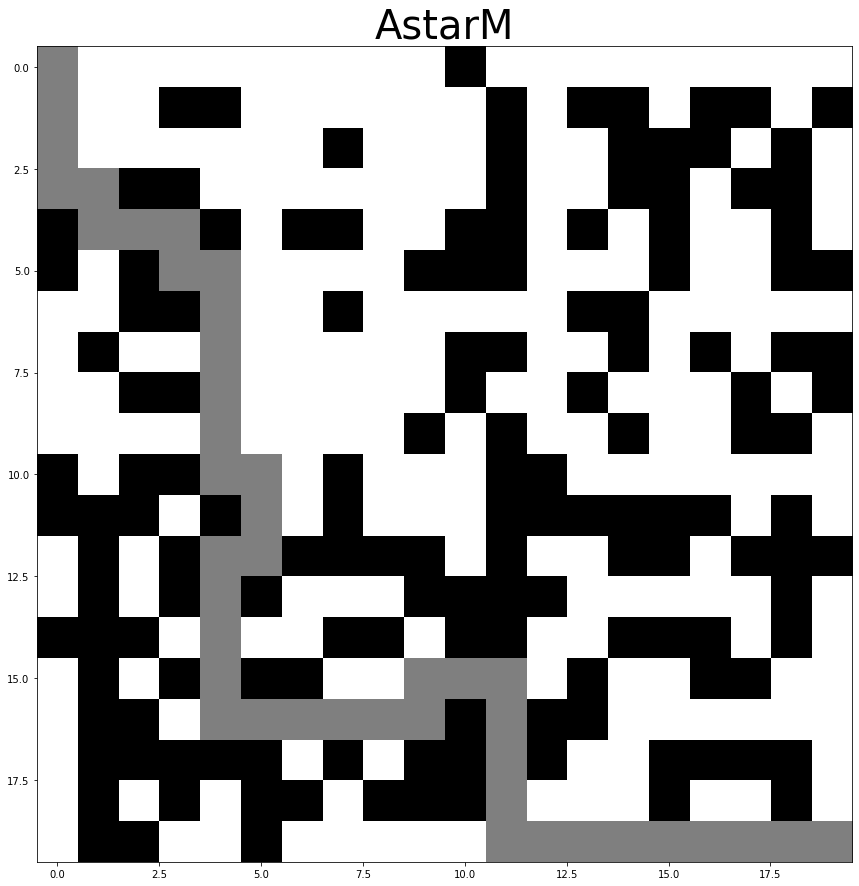

198 198
fails 0
SOLUTION FOUND


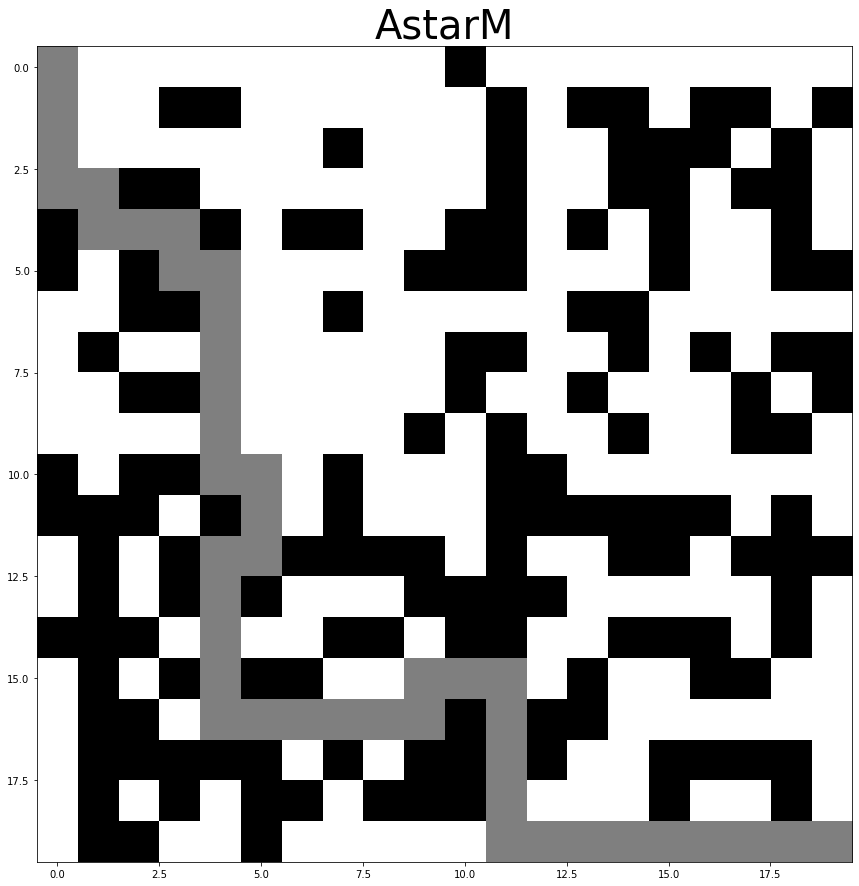

SOLUTION FOUND


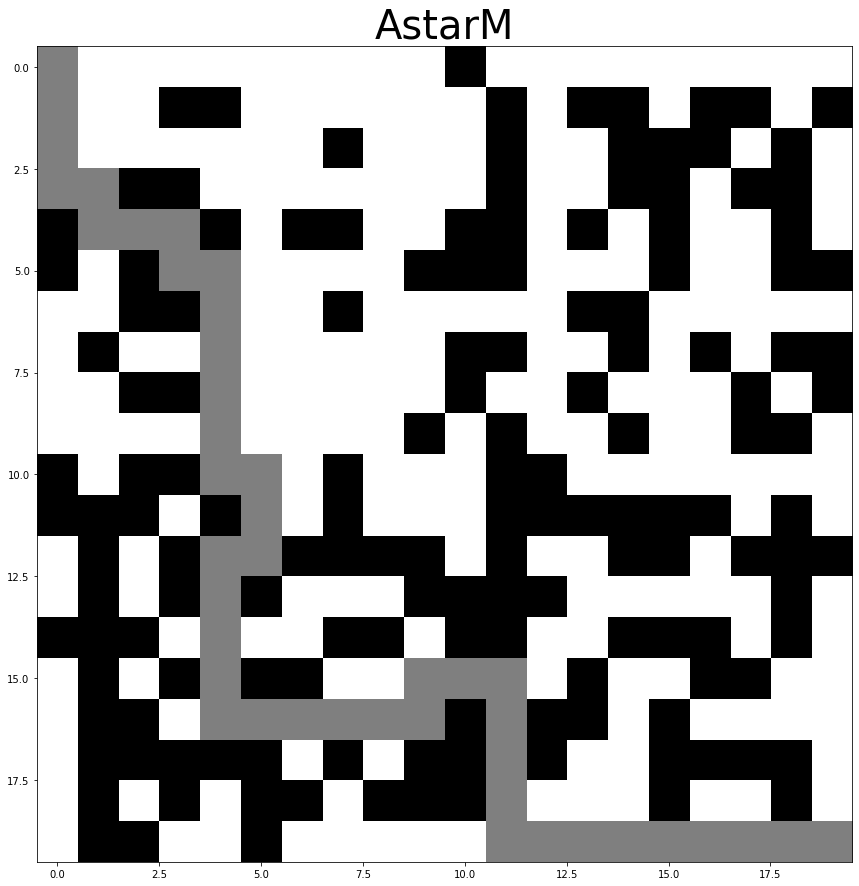

198 198
fails 0
SOLUTION FOUND


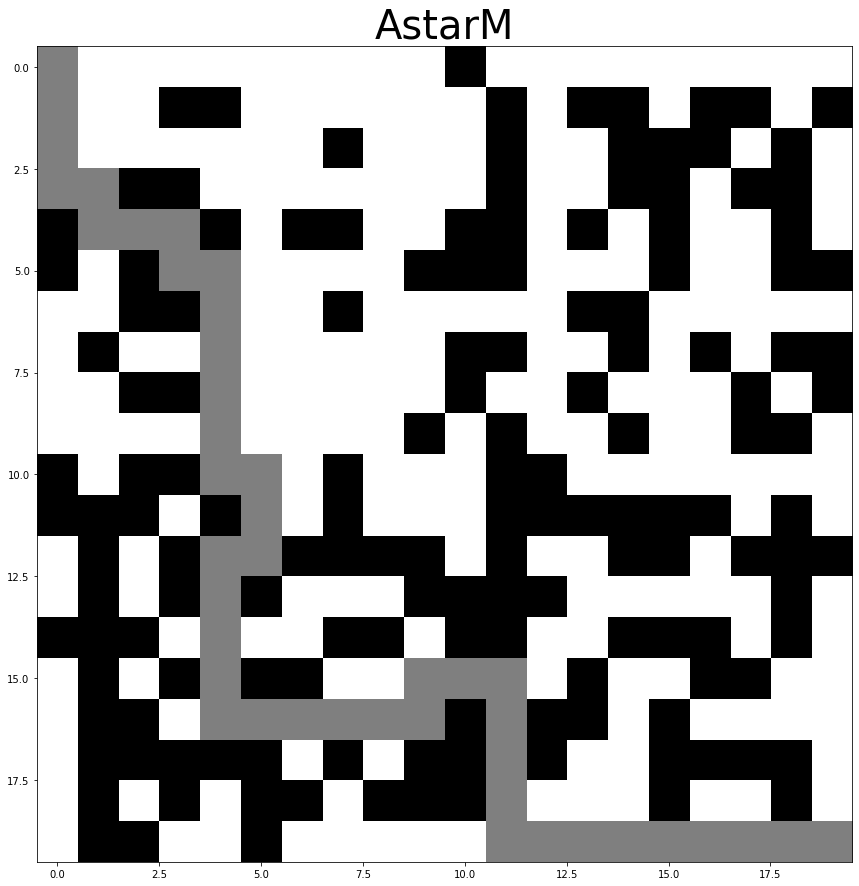

SOLUTION FOUND


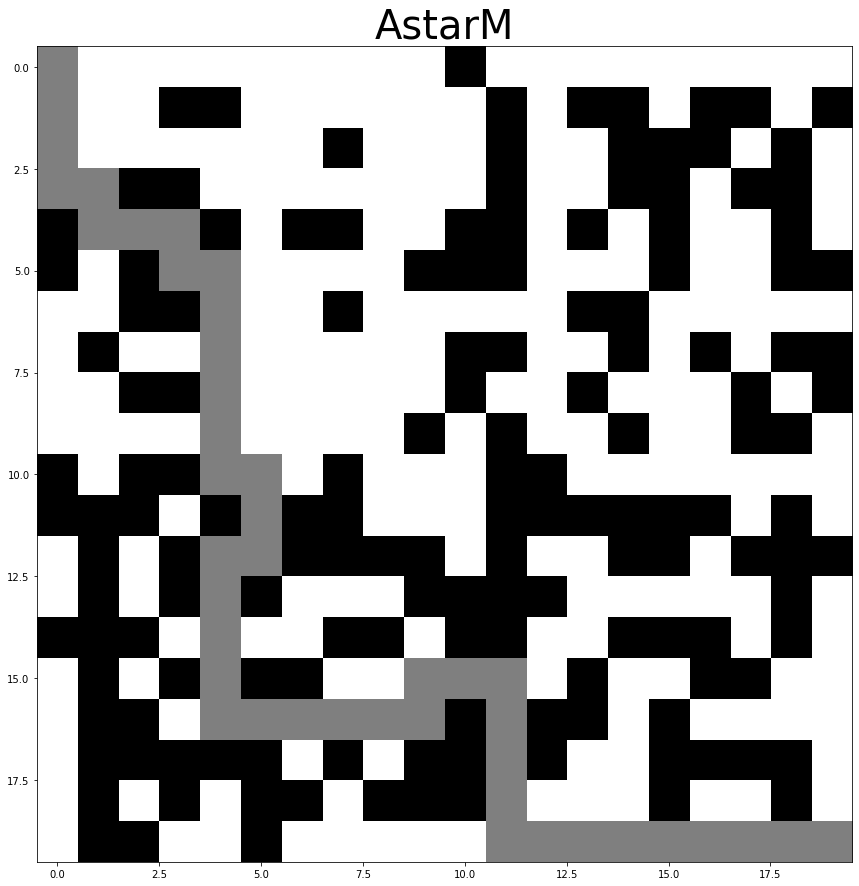

198 196
fails 1
SOLUTION FOUND


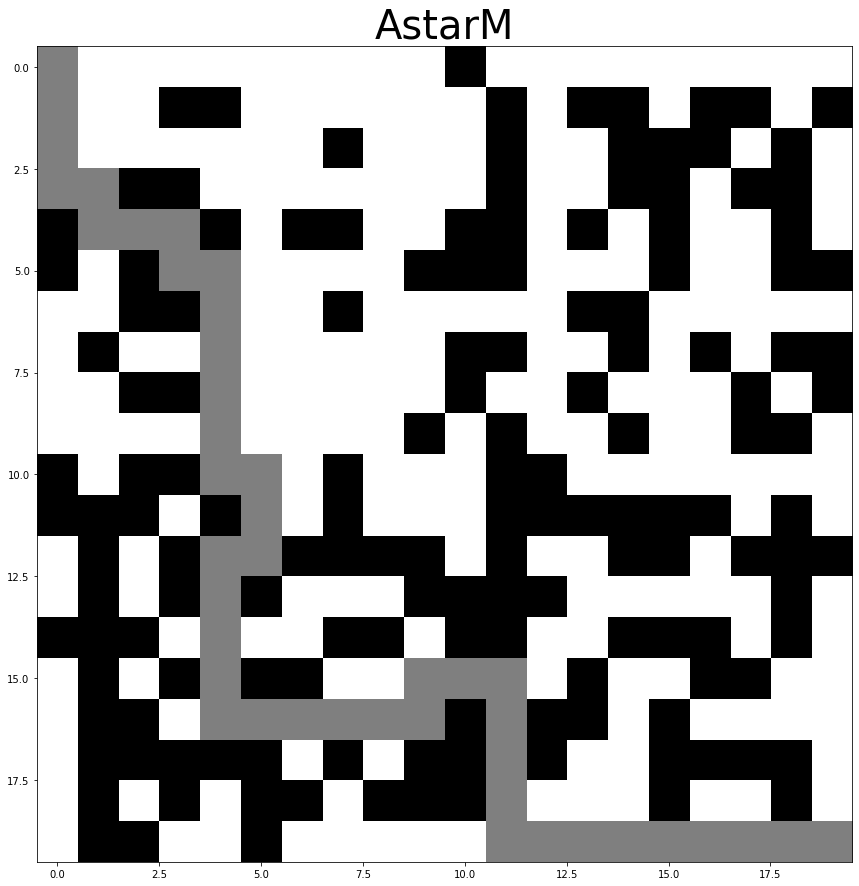

SOLUTION FOUND


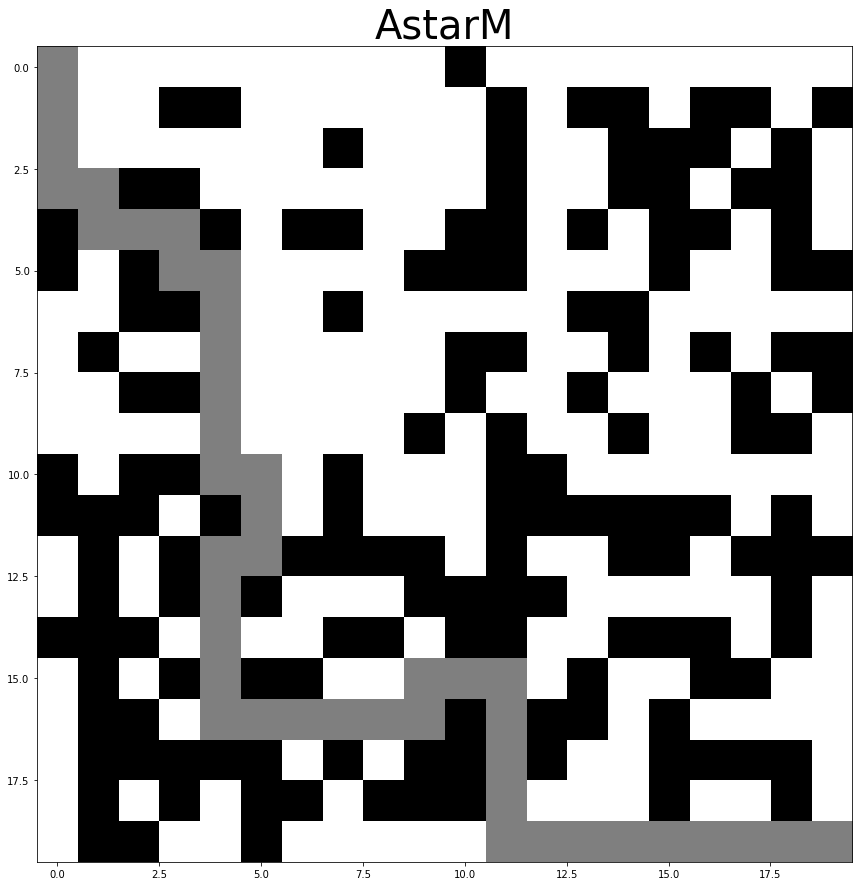

198 198
fails 0
SOLUTION FOUND


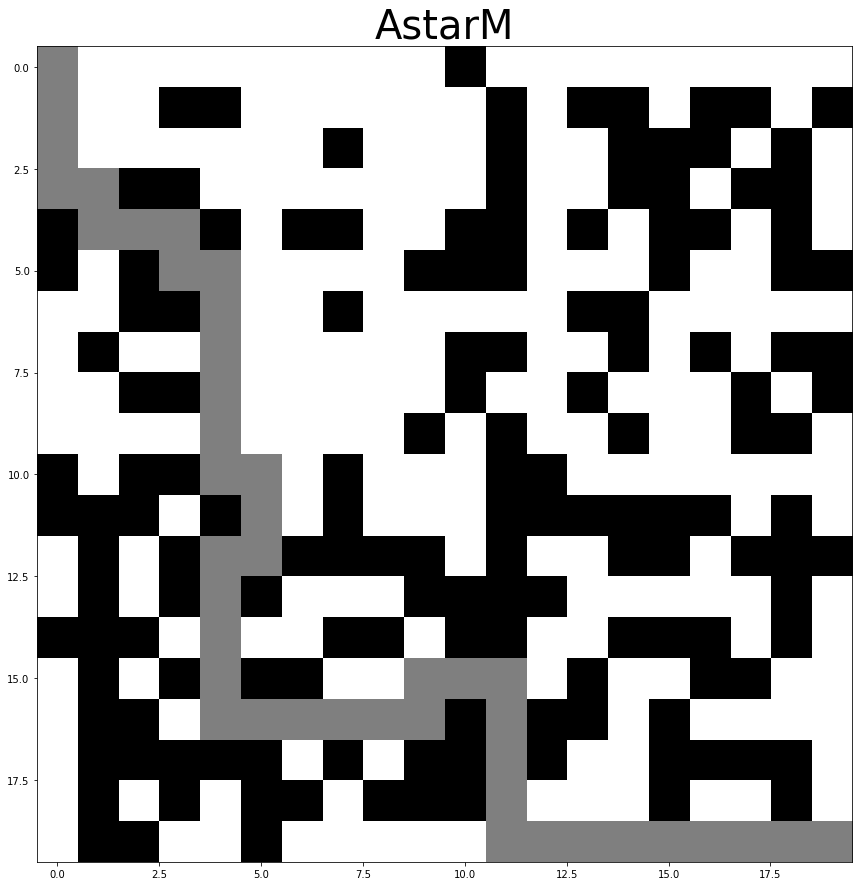

SOLUTION FOUND


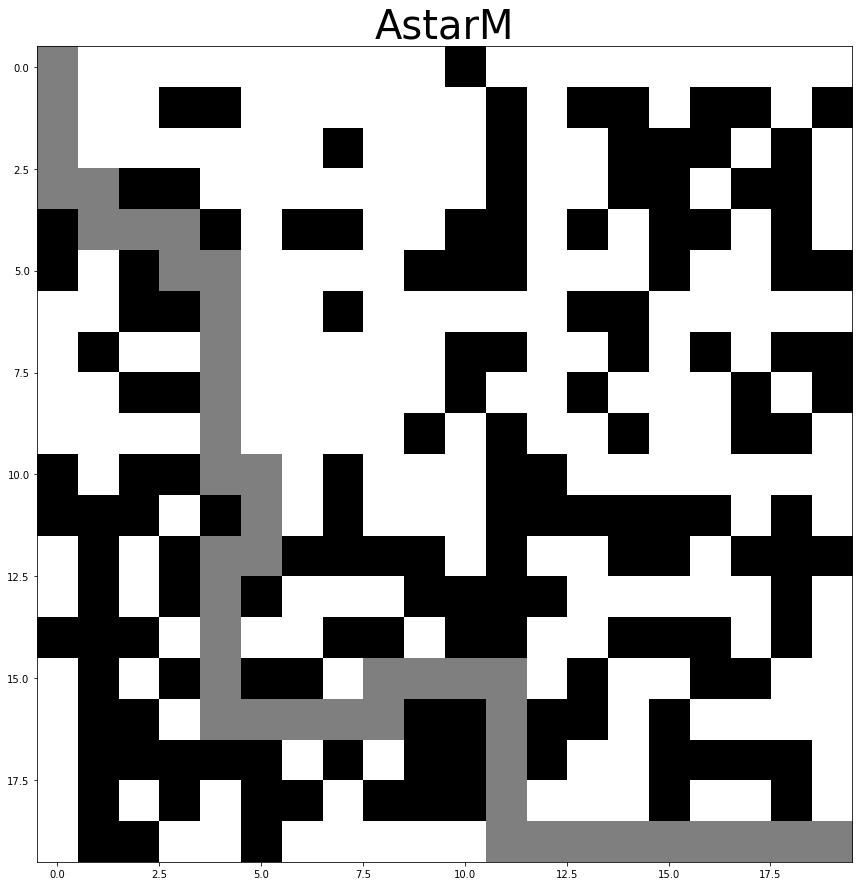

198 198
fails 0
SOLUTION FOUND


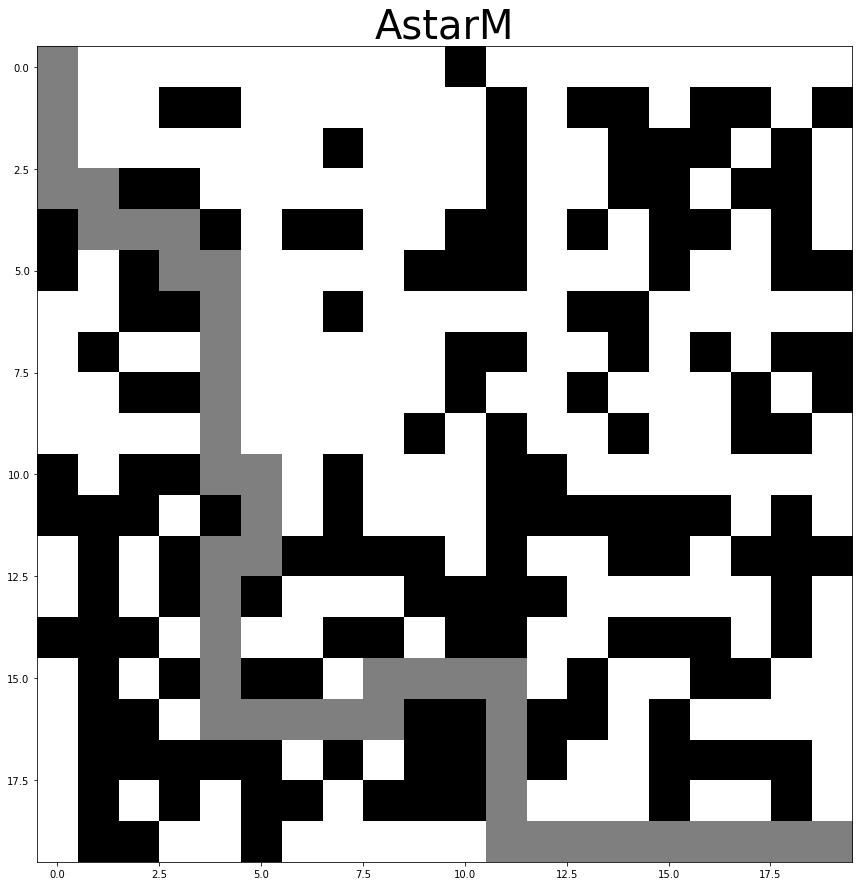

SOLUTION FOUND


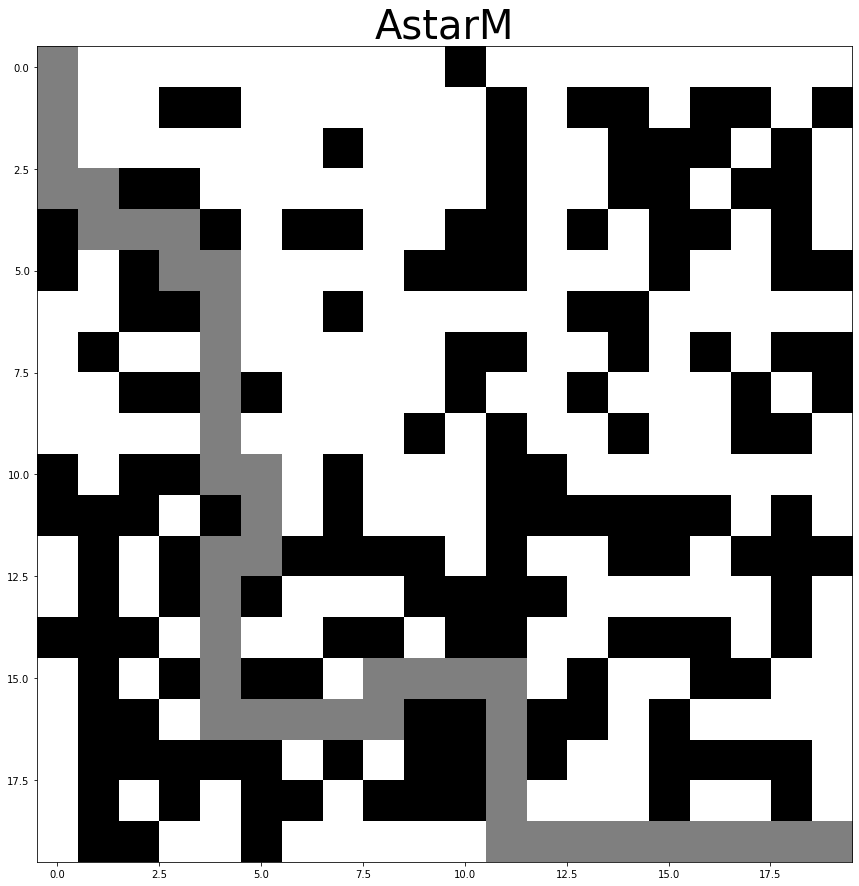

198 194
fails 1
SOLUTION FOUND


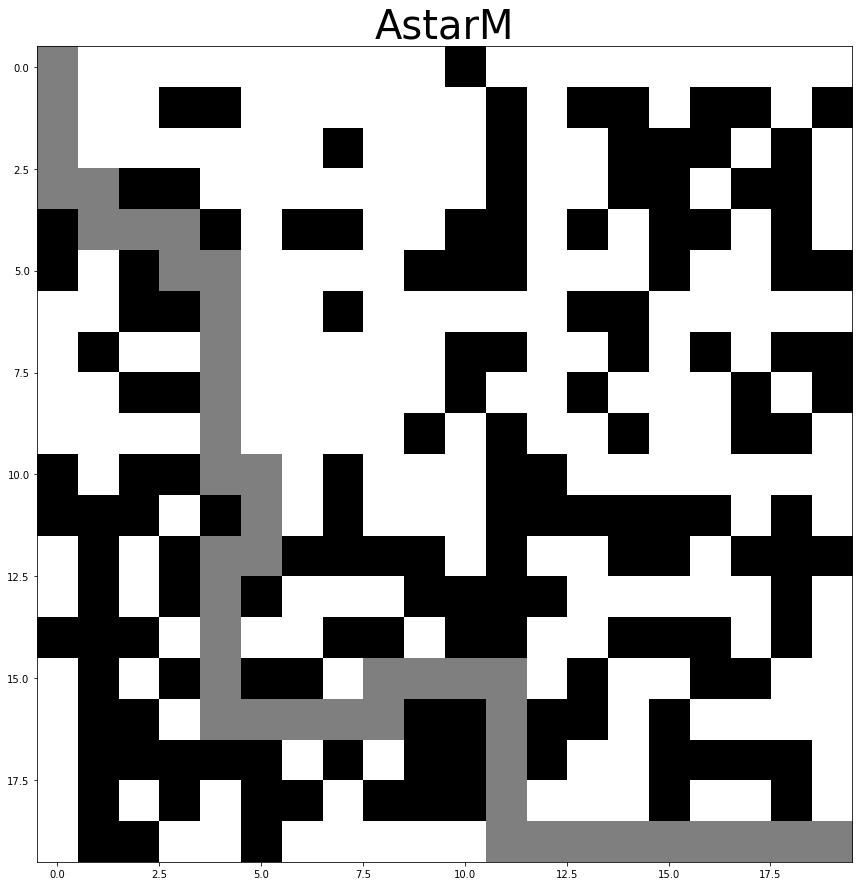

SOLUTION FOUND


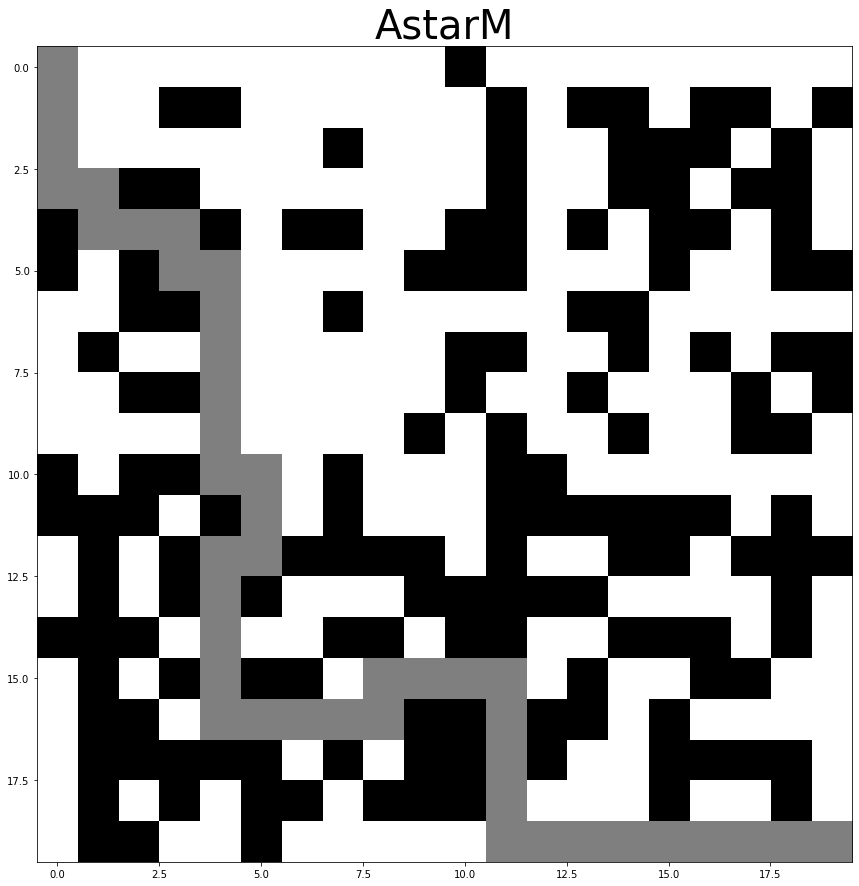

198 198
fails 0
SOLUTION FOUND


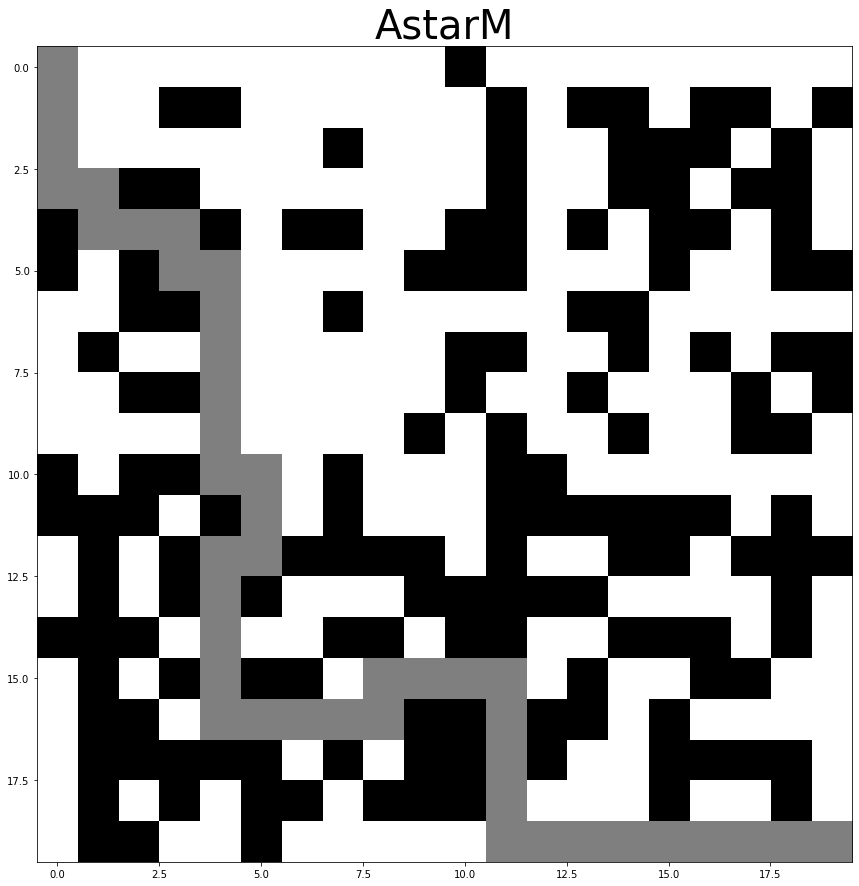

SOLUTION FOUND


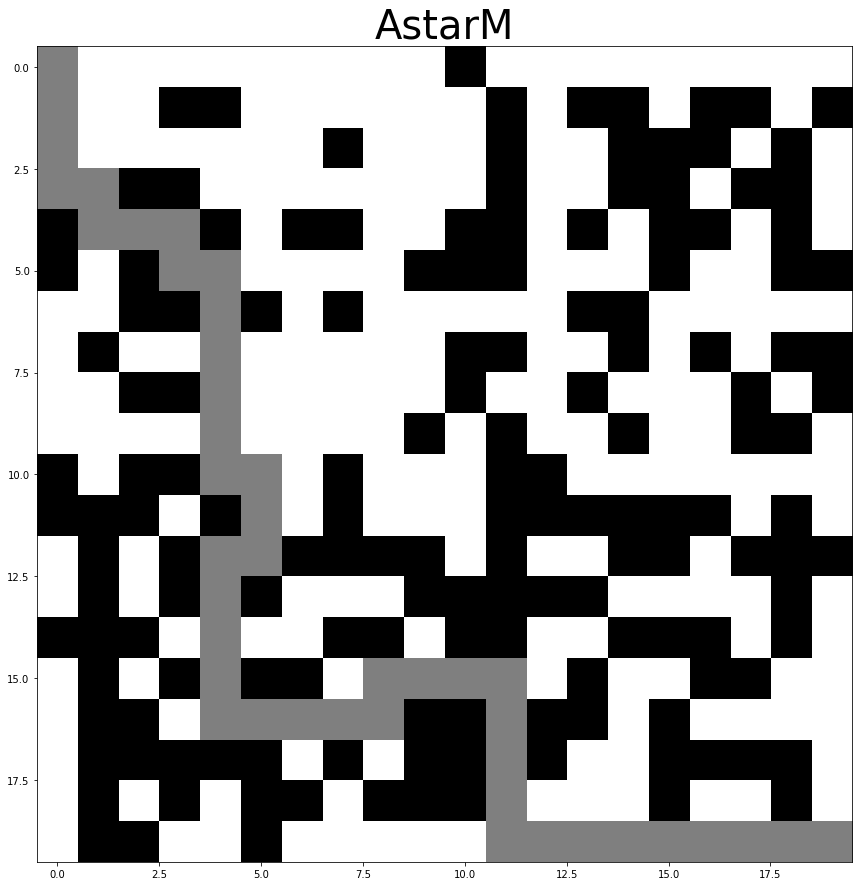

198 194
fails 1
SOLUTION FOUND


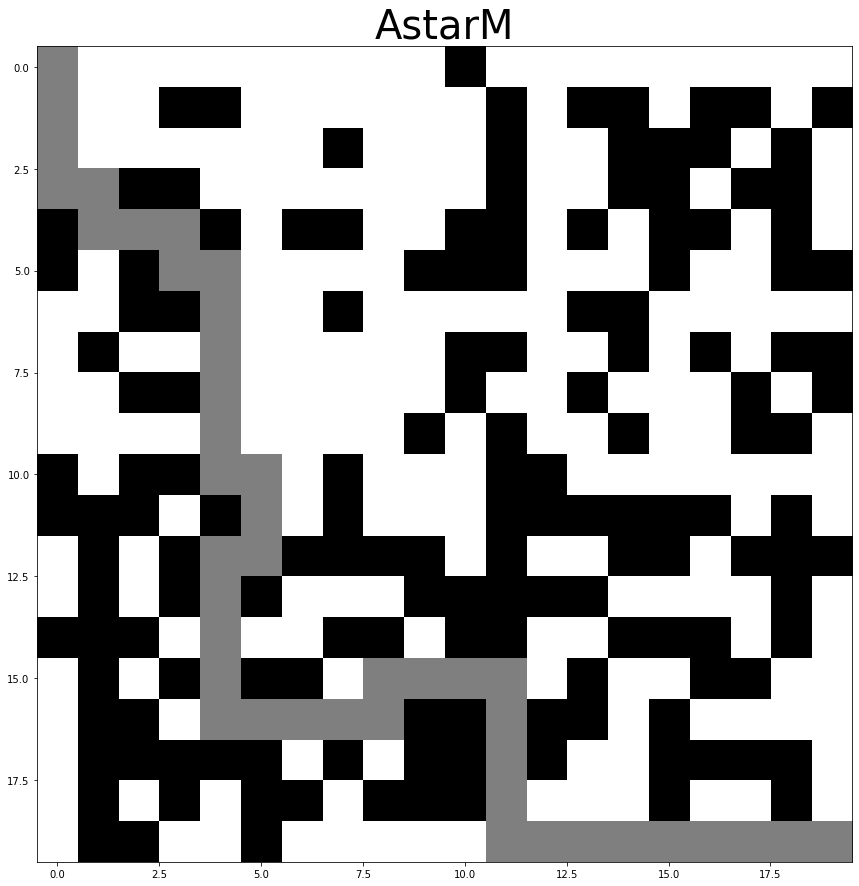

SOLUTION FOUND


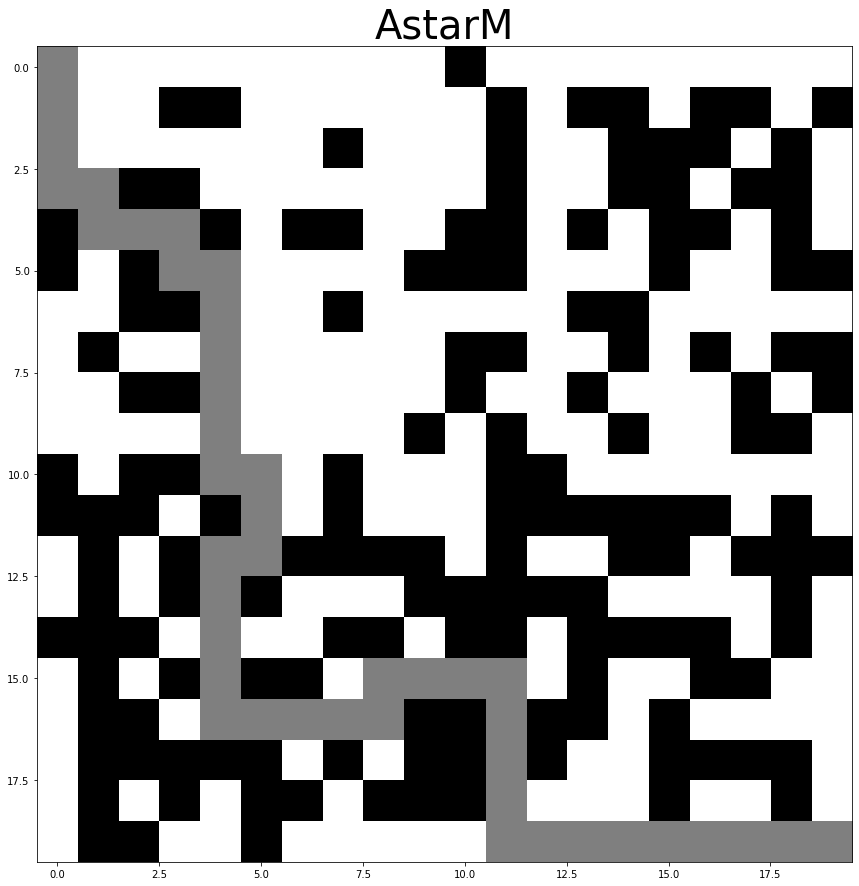

198 198
fails 0
SOLUTION FOUND


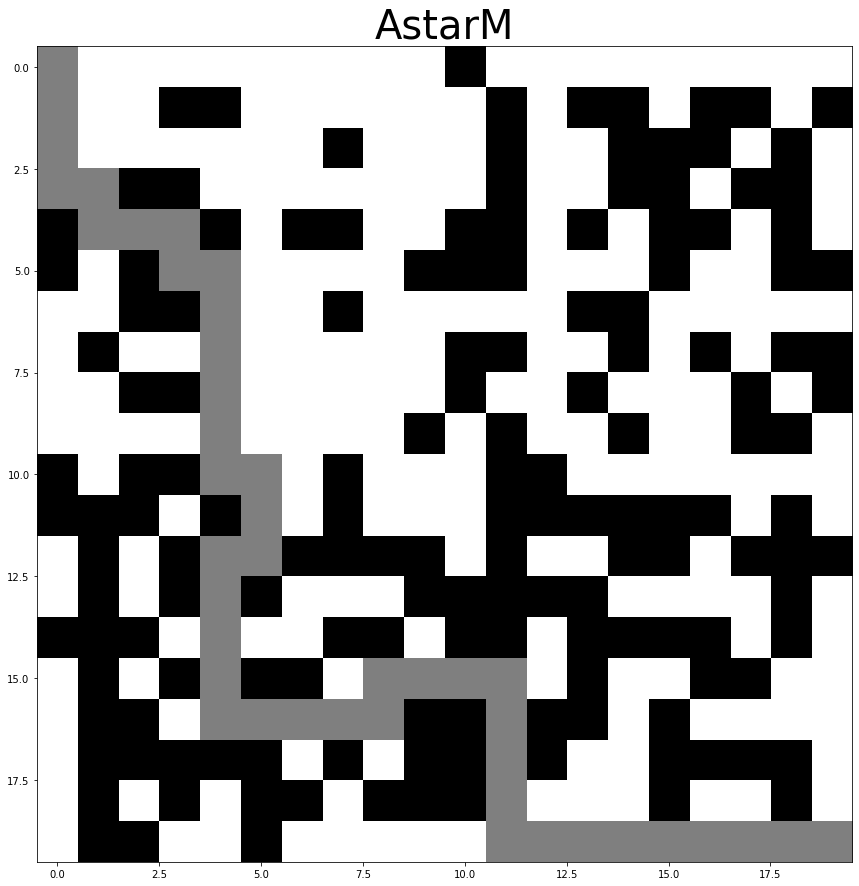

SOLUTION FOUND


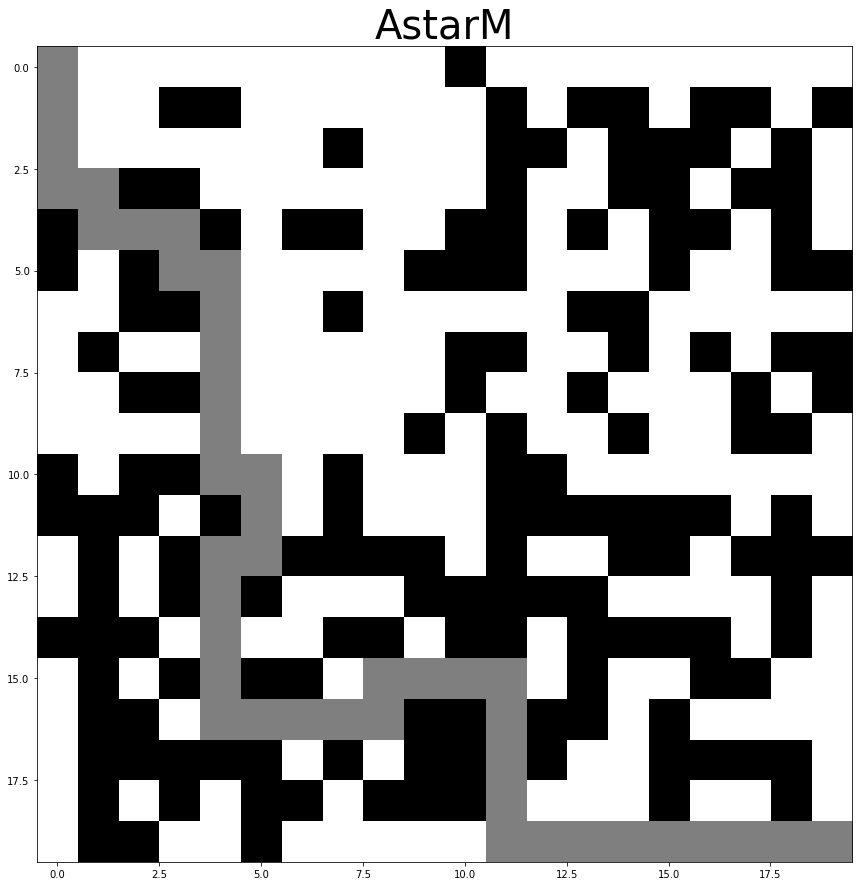

198 198
fails 0
SOLUTION FOUND


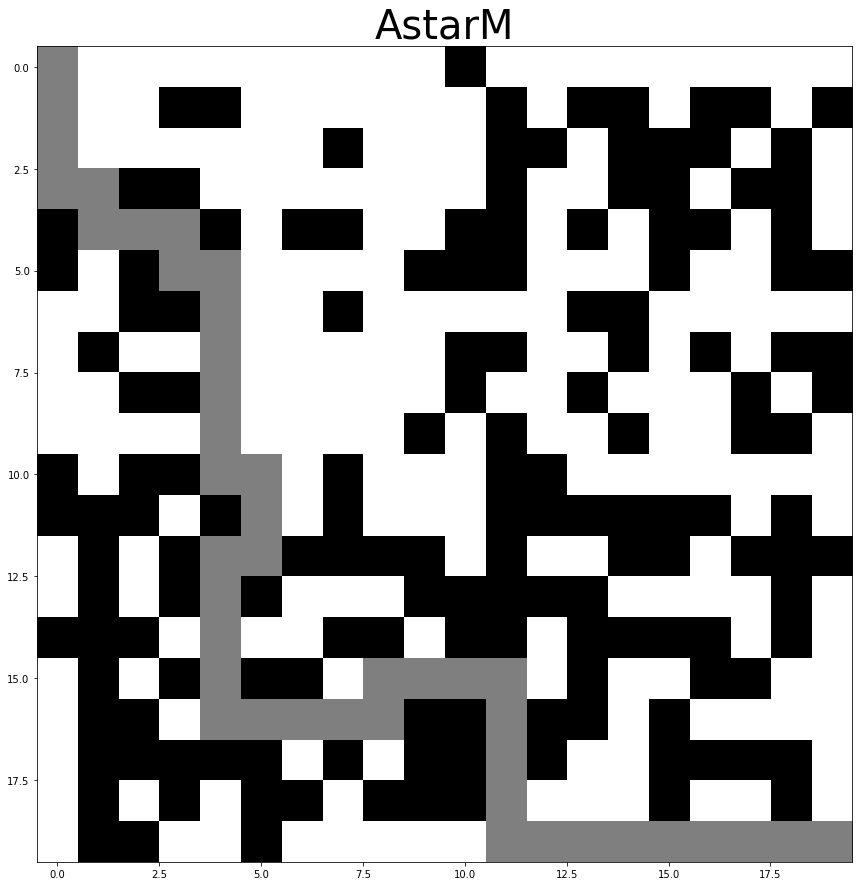

SOLUTION FOUND


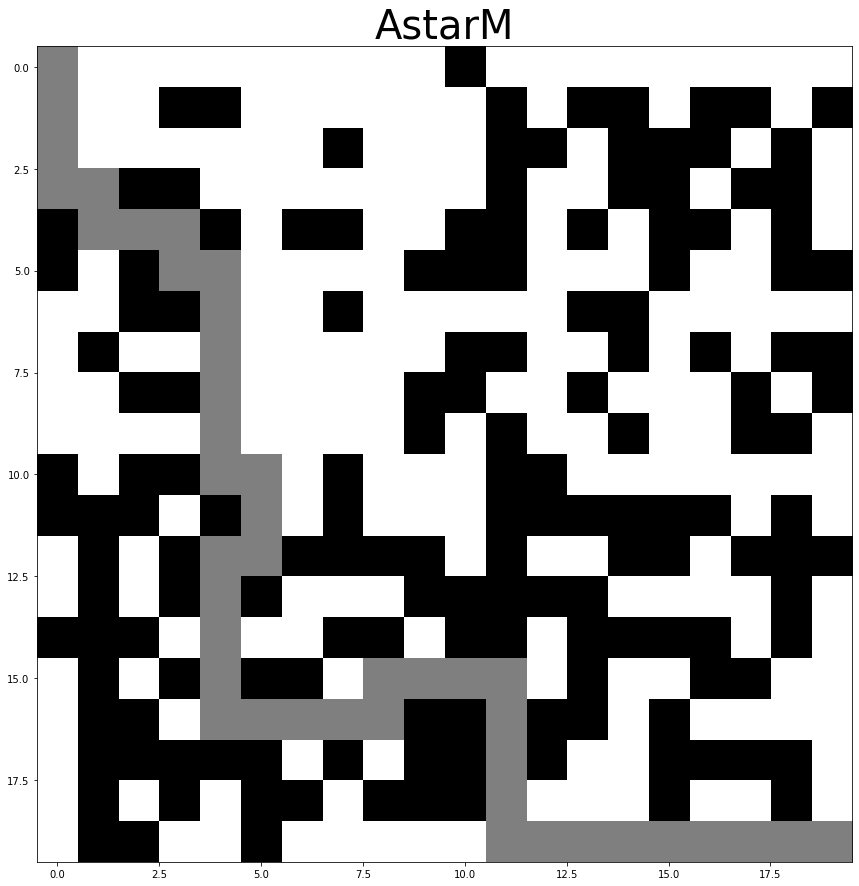

198 196
fails 1
SOLUTION FOUND


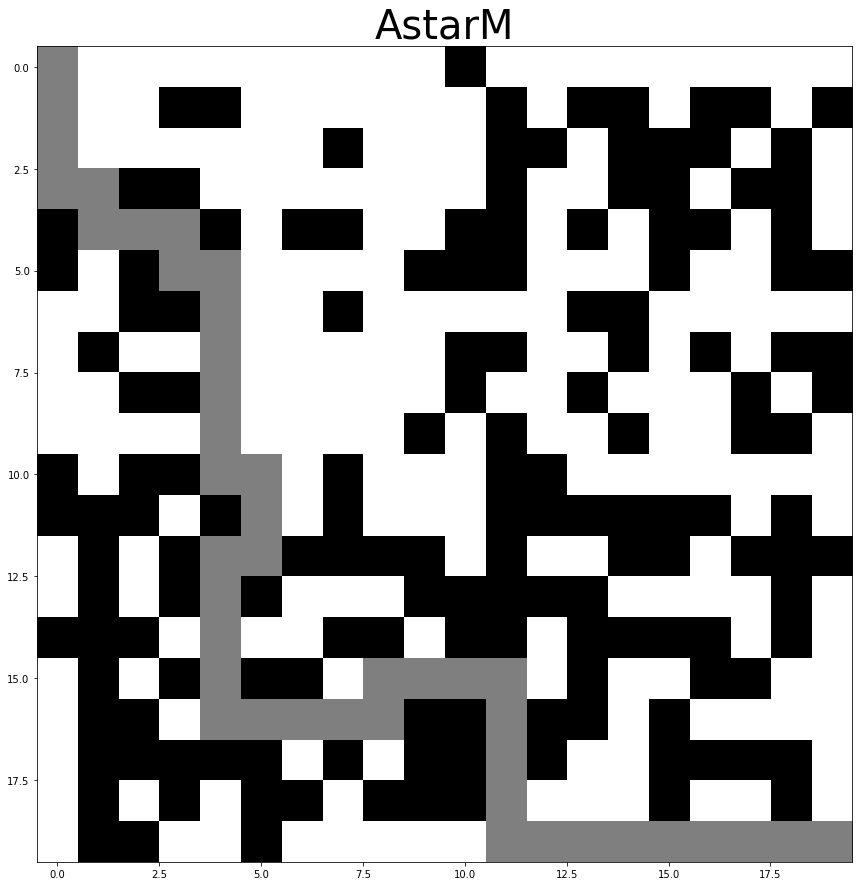

SOLUTION FOUND


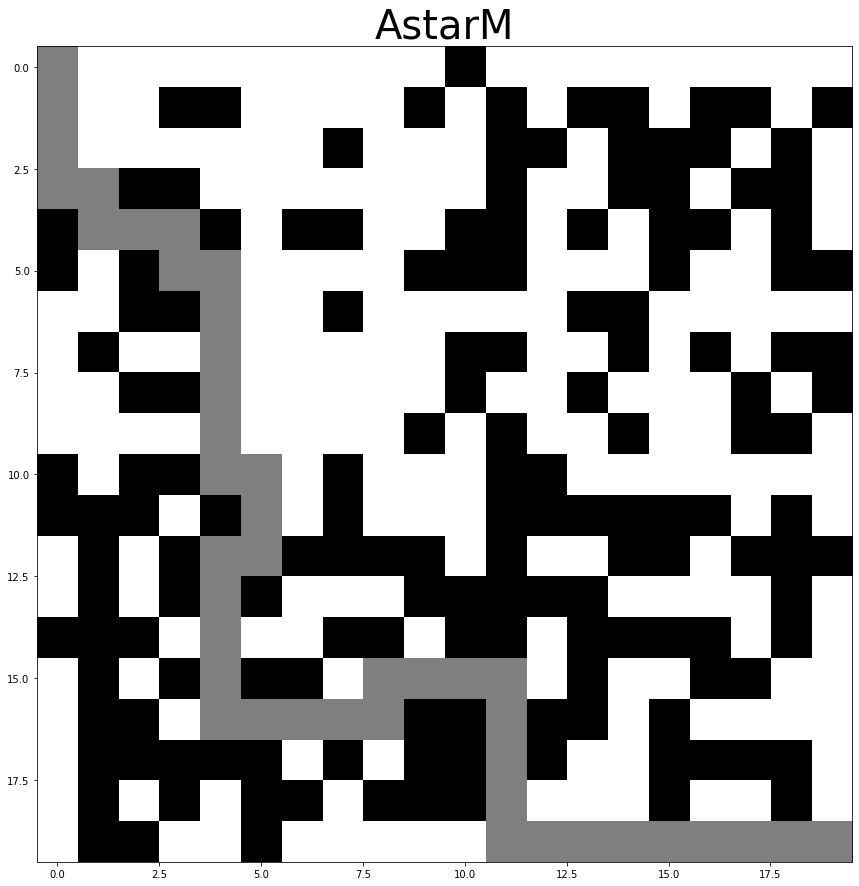

198 194
fails 2
SOLUTION FOUND


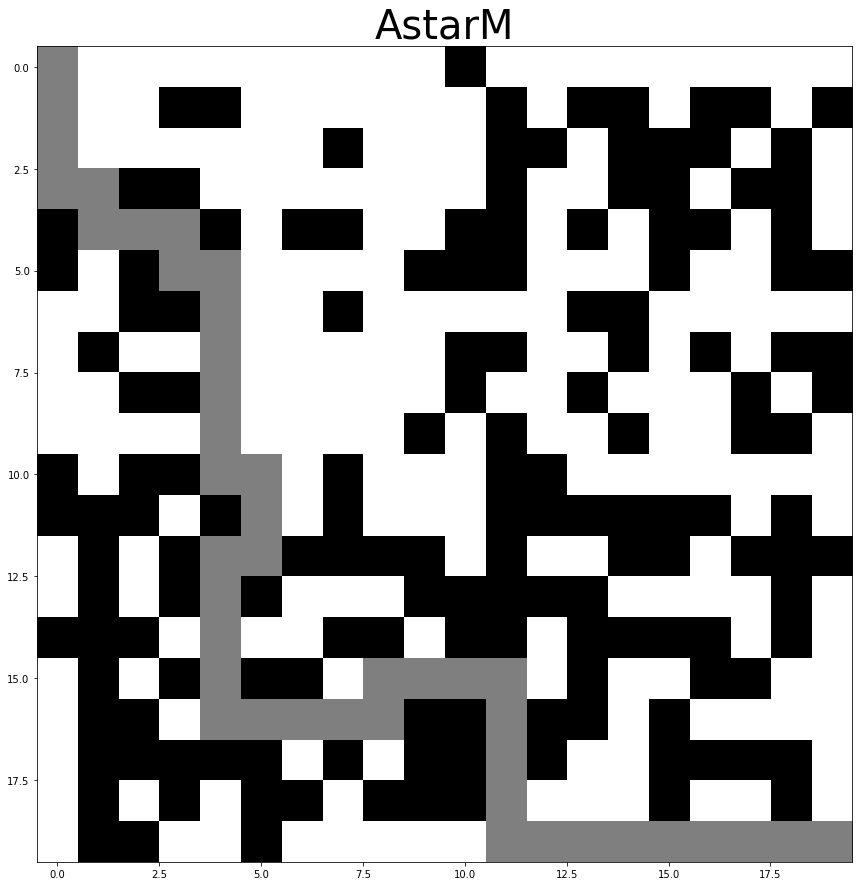

SOLUTION FOUND


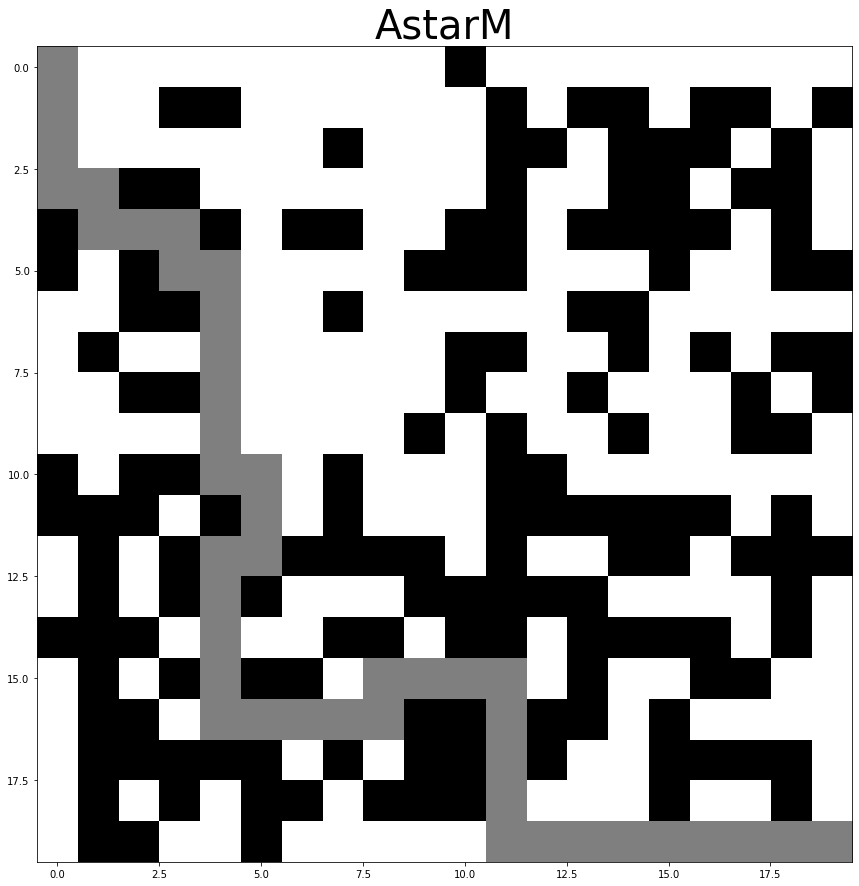

198 198
fails 0
SOLUTION FOUND


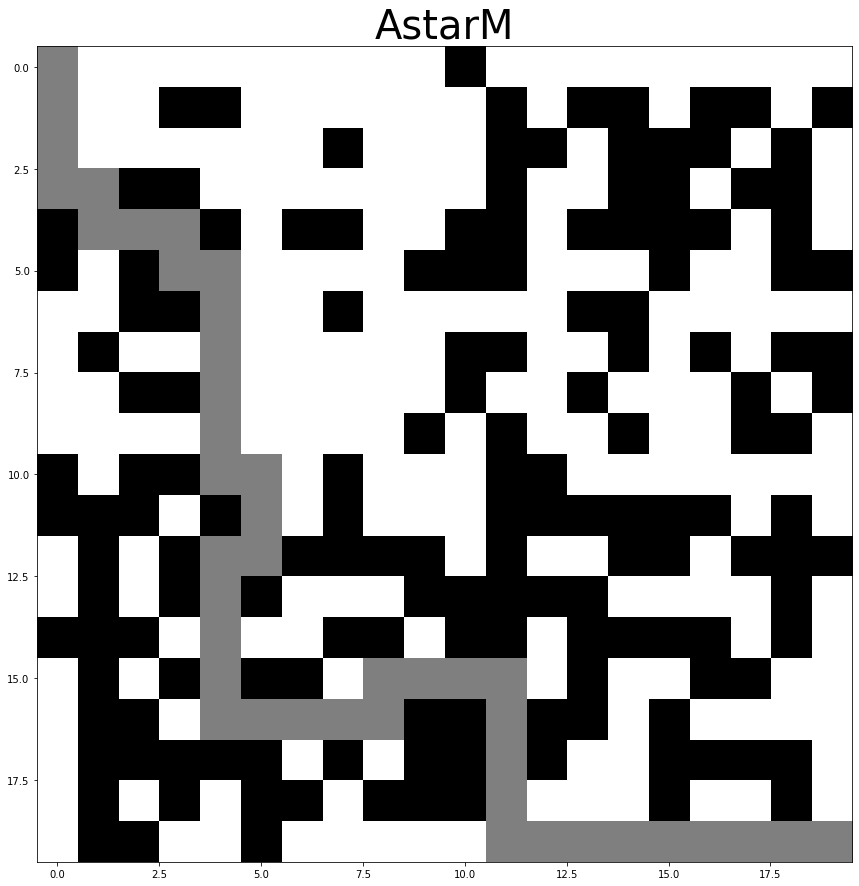

UNSOLVABLE


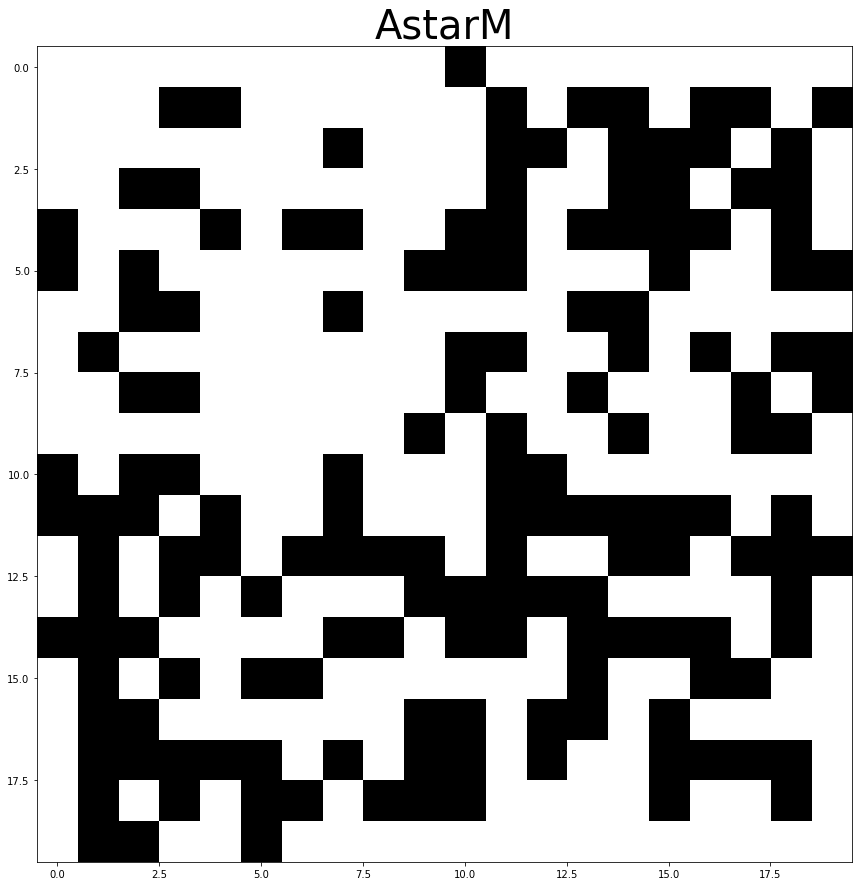

198 185
fails 1
SOLUTION FOUND


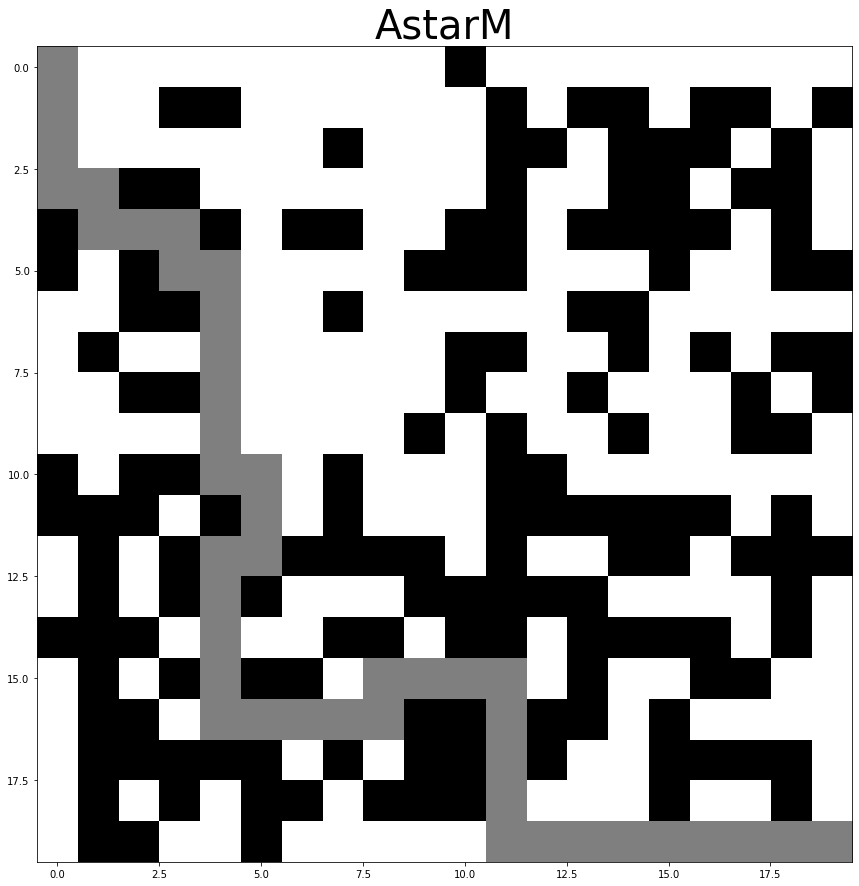

SOLUTION FOUND


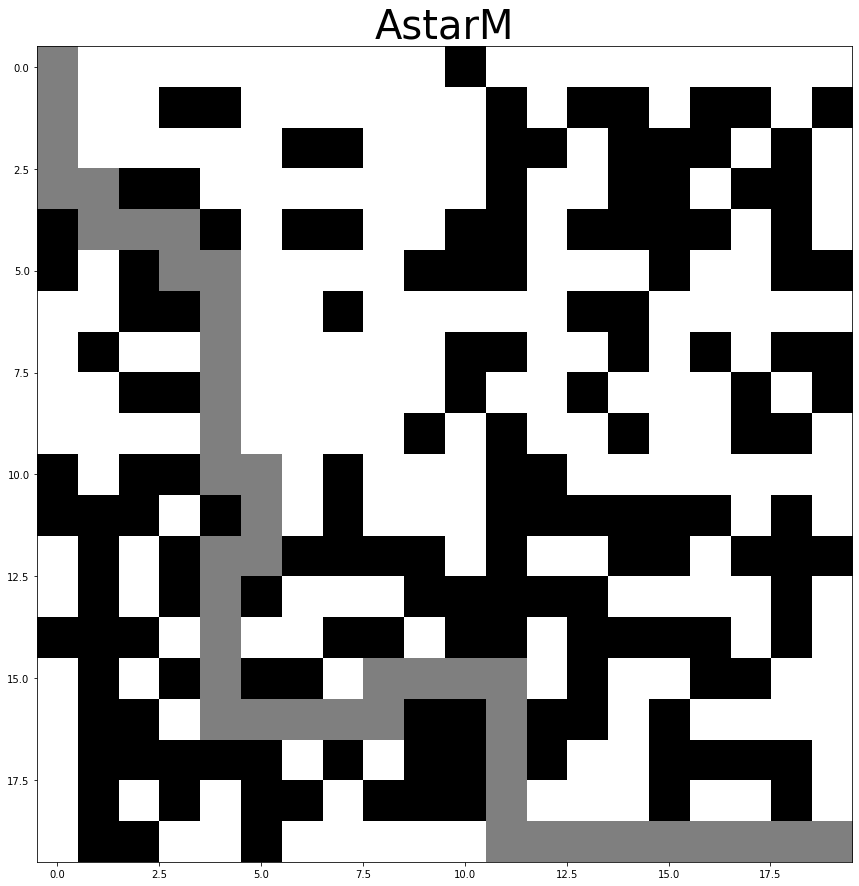

198 195
fails 2
SOLUTION FOUND


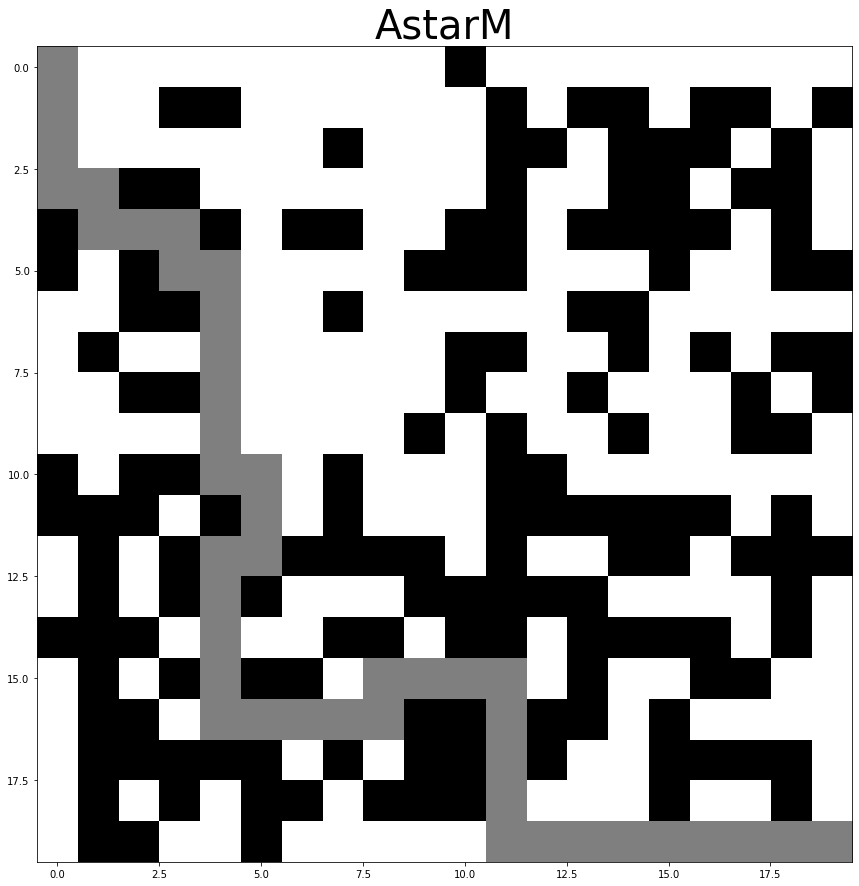

SOLUTION FOUND


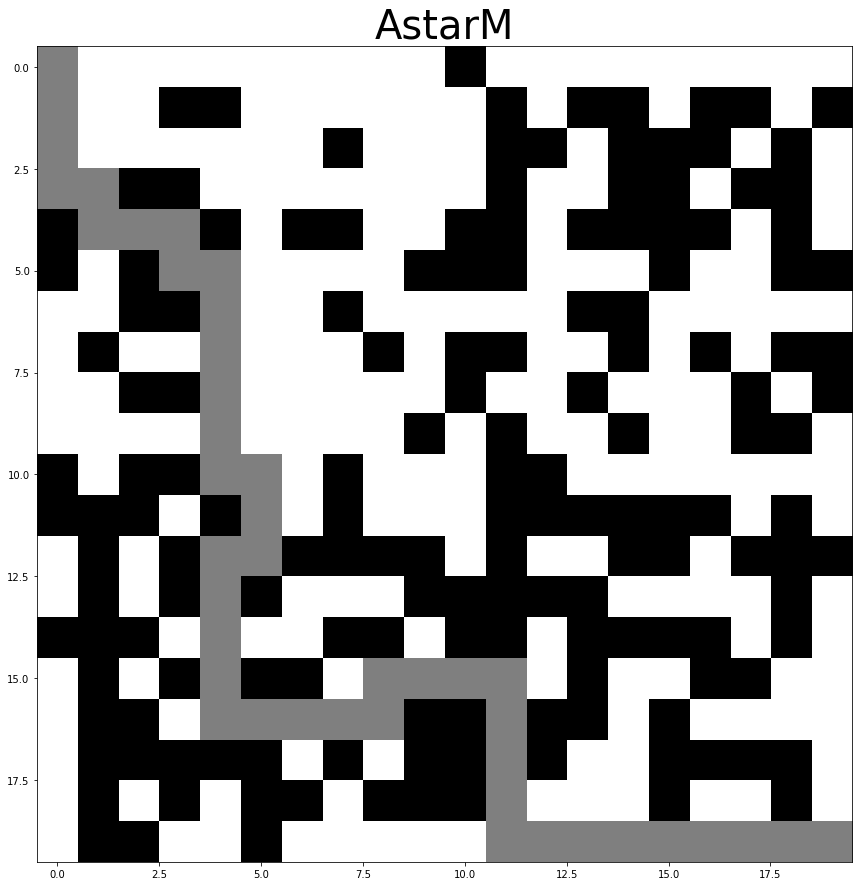

198 194
fails 3
SOLUTION FOUND


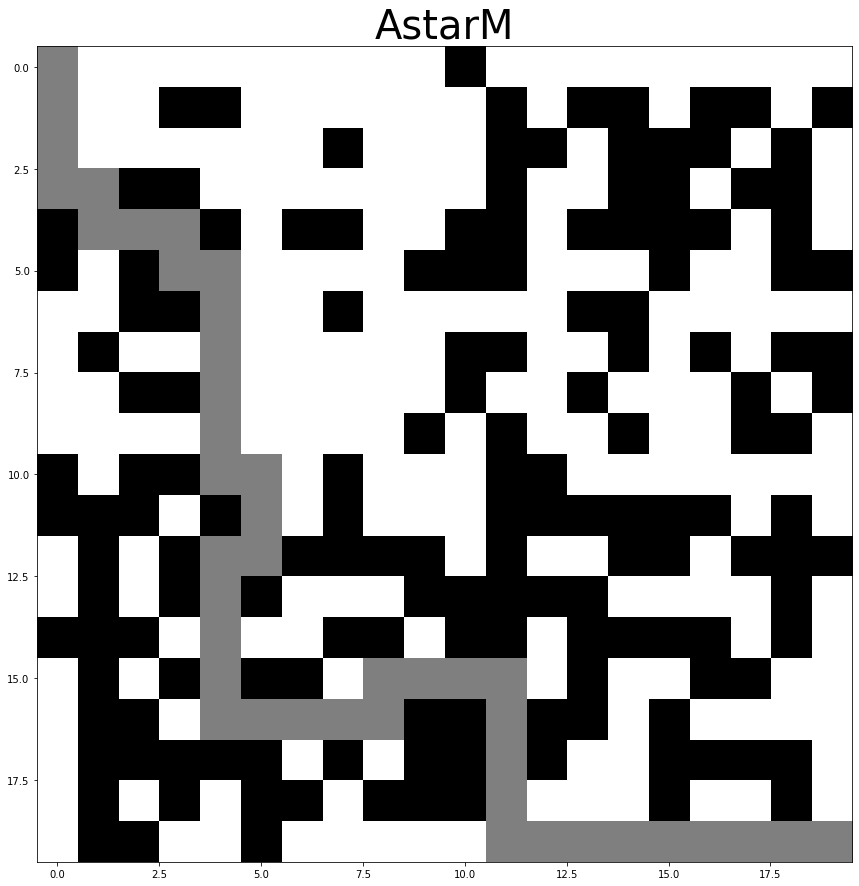

SOLUTION FOUND


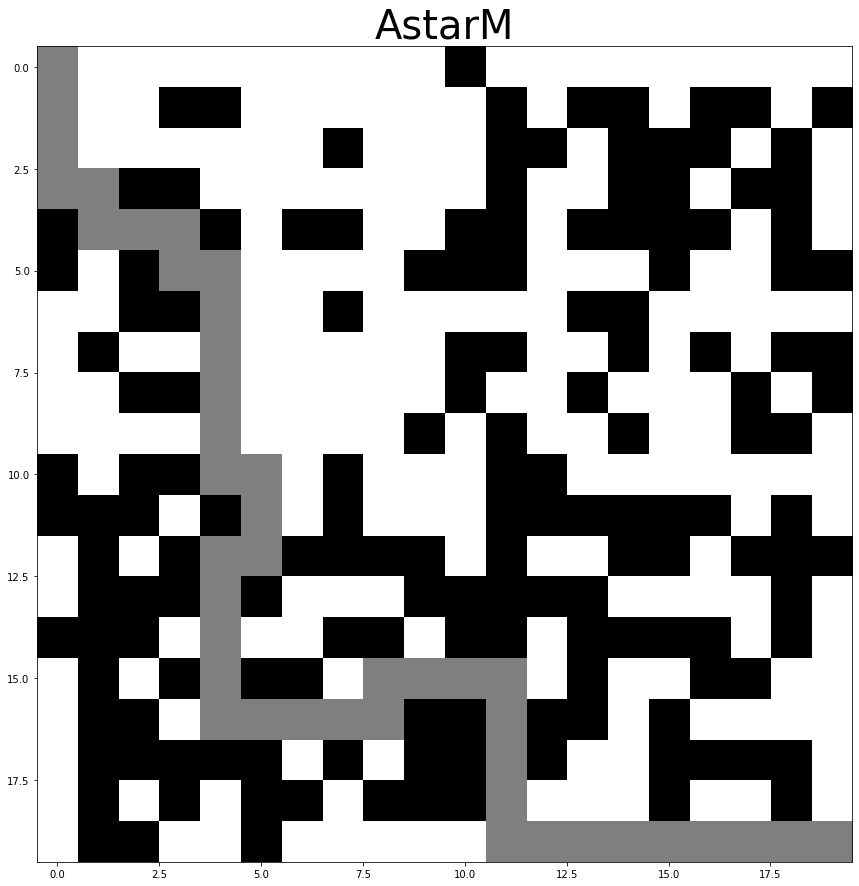

198 198
fails 0
SOLUTION FOUND


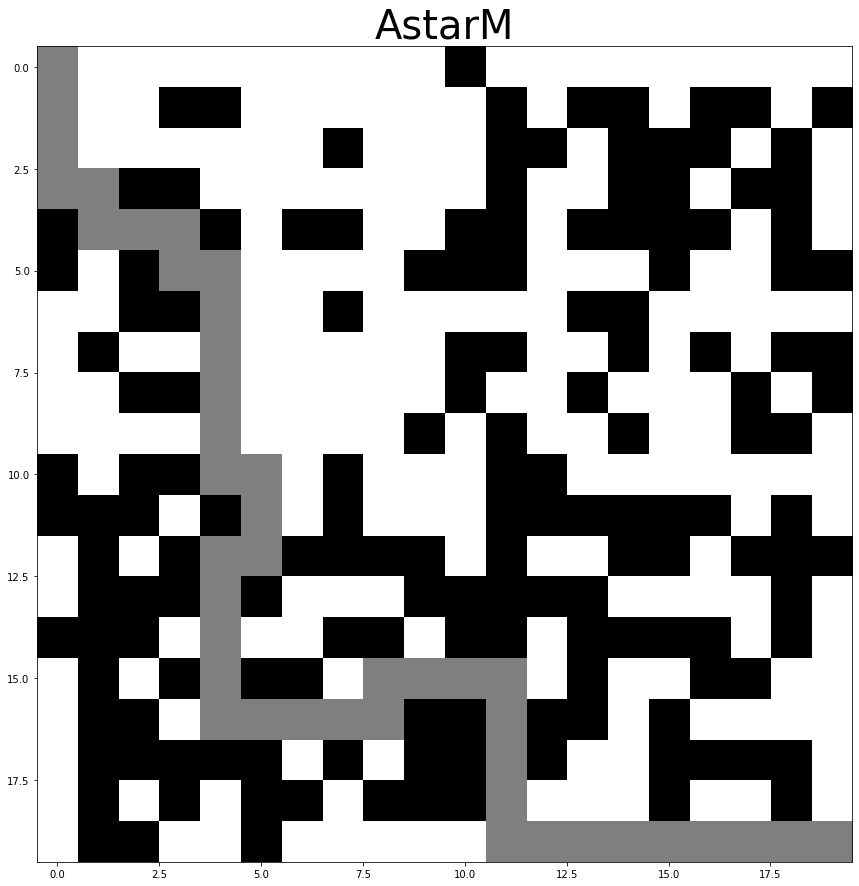

SOLUTION FOUND


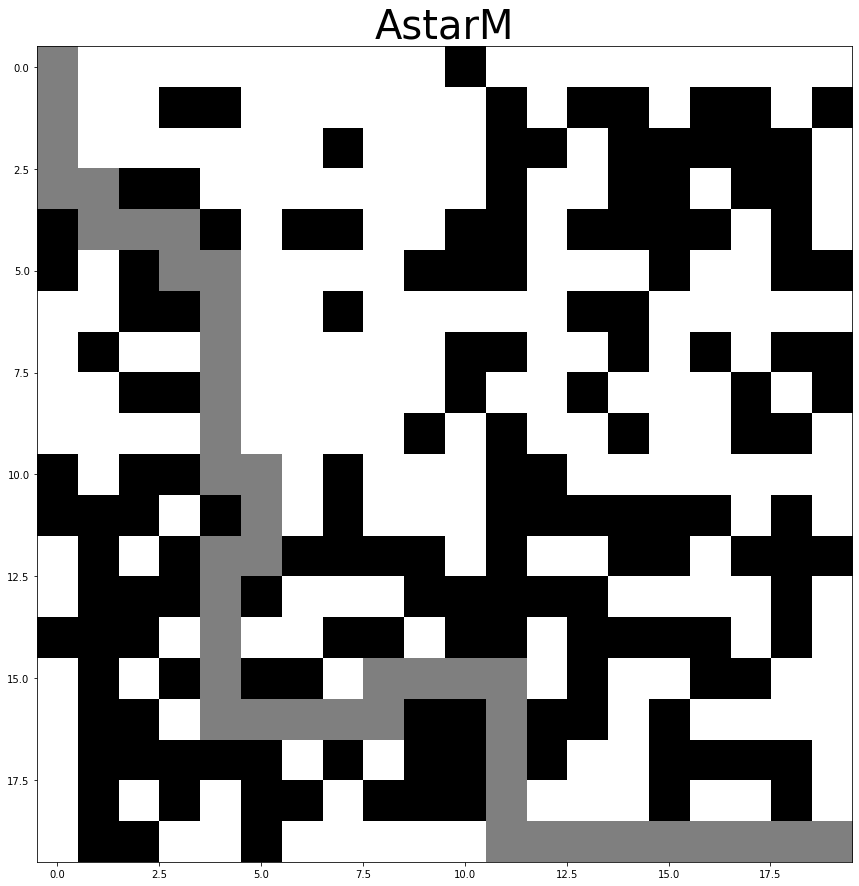

198 198
fails 0
SOLUTION FOUND


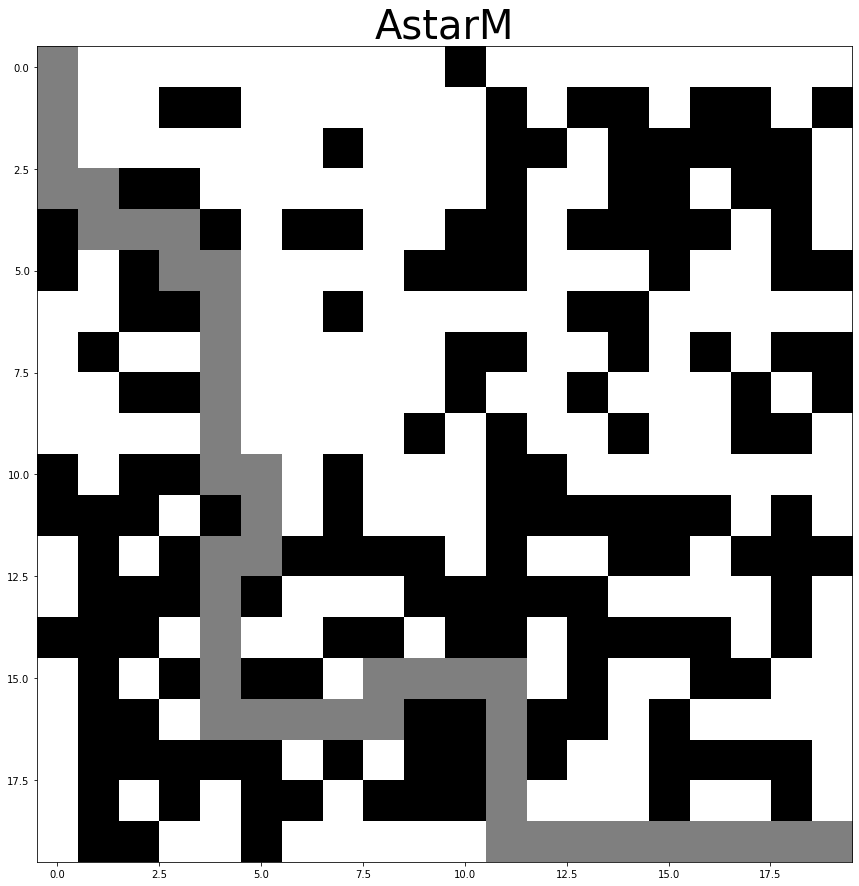

SOLUTION FOUND


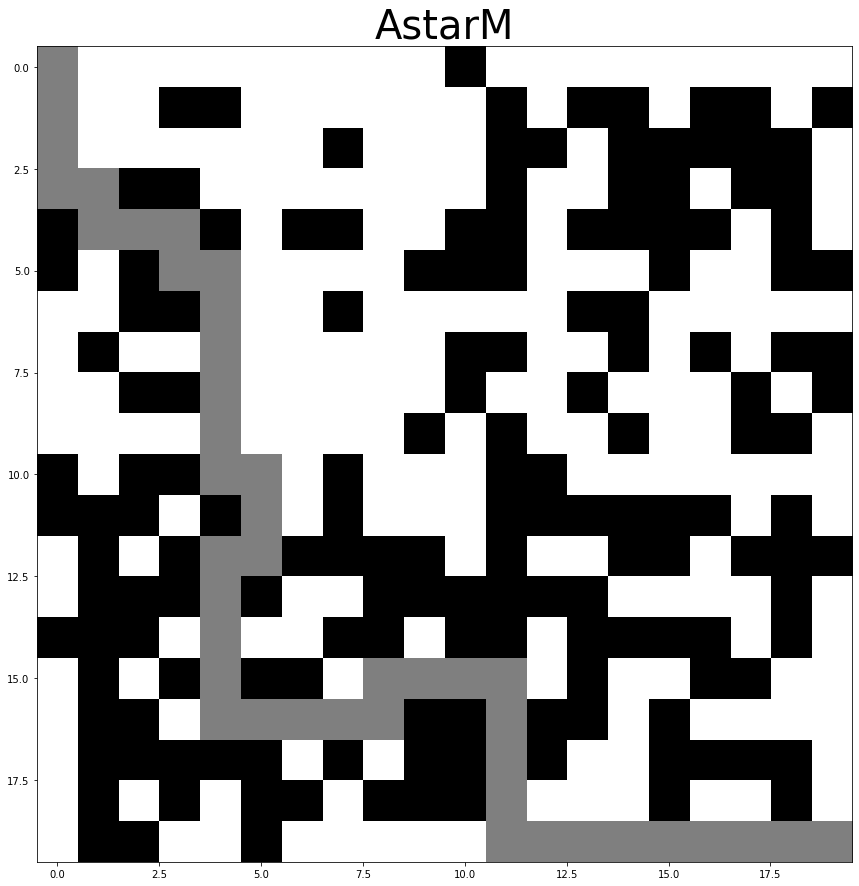

198 197
fails 1
SOLUTION FOUND


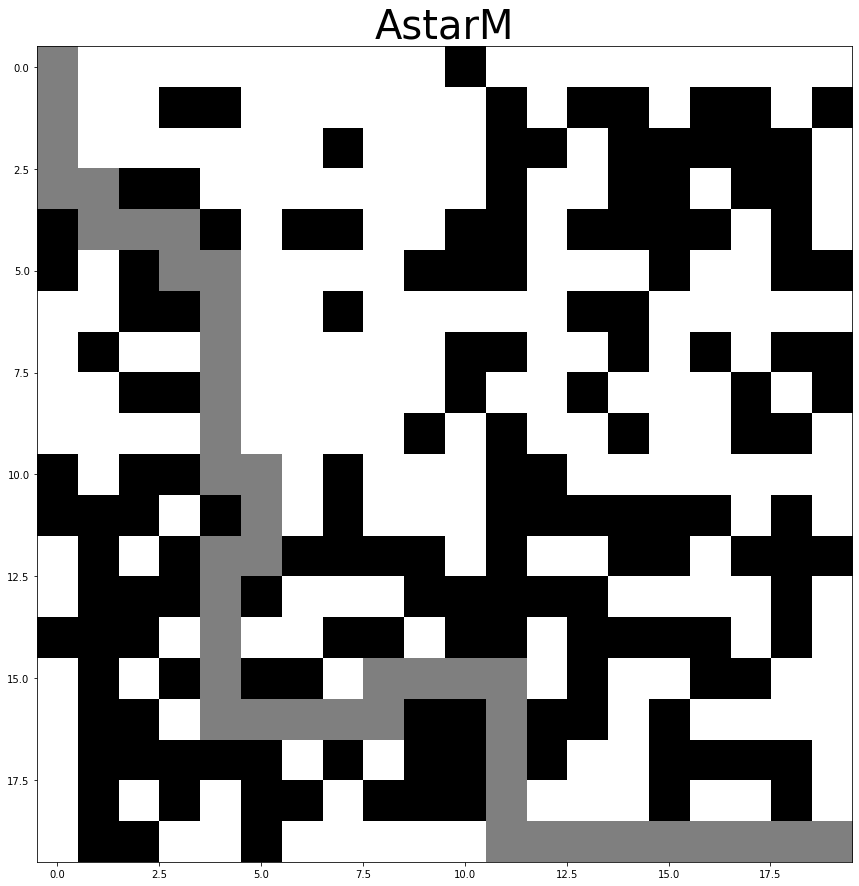

SOLUTION FOUND


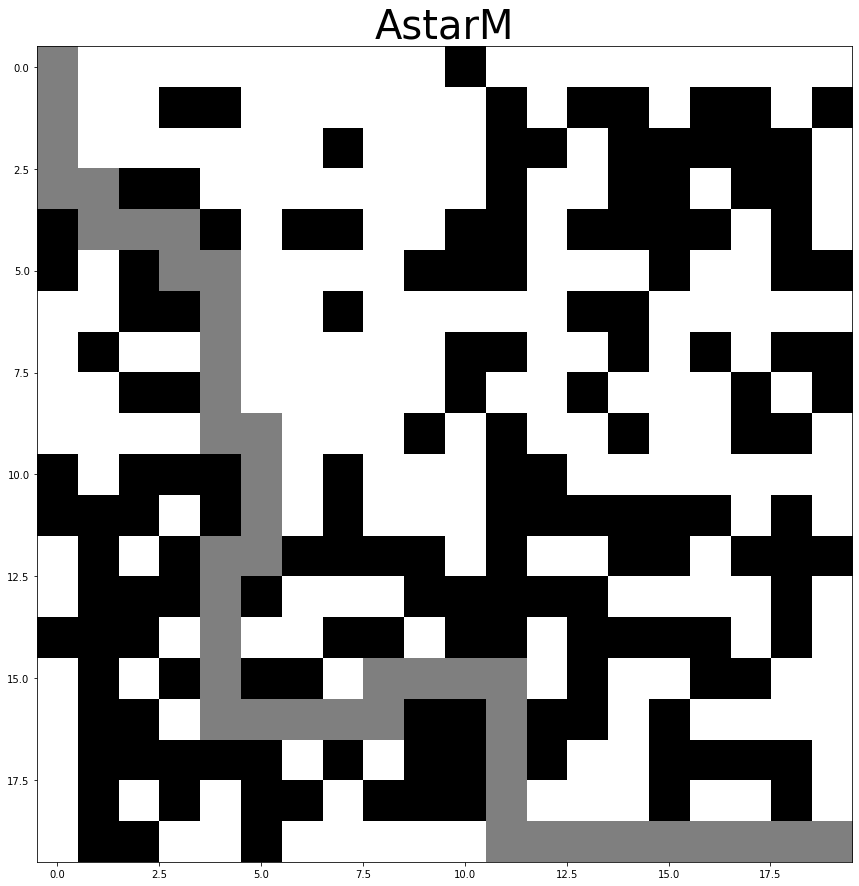

198 196
fails 2
SOLUTION FOUND


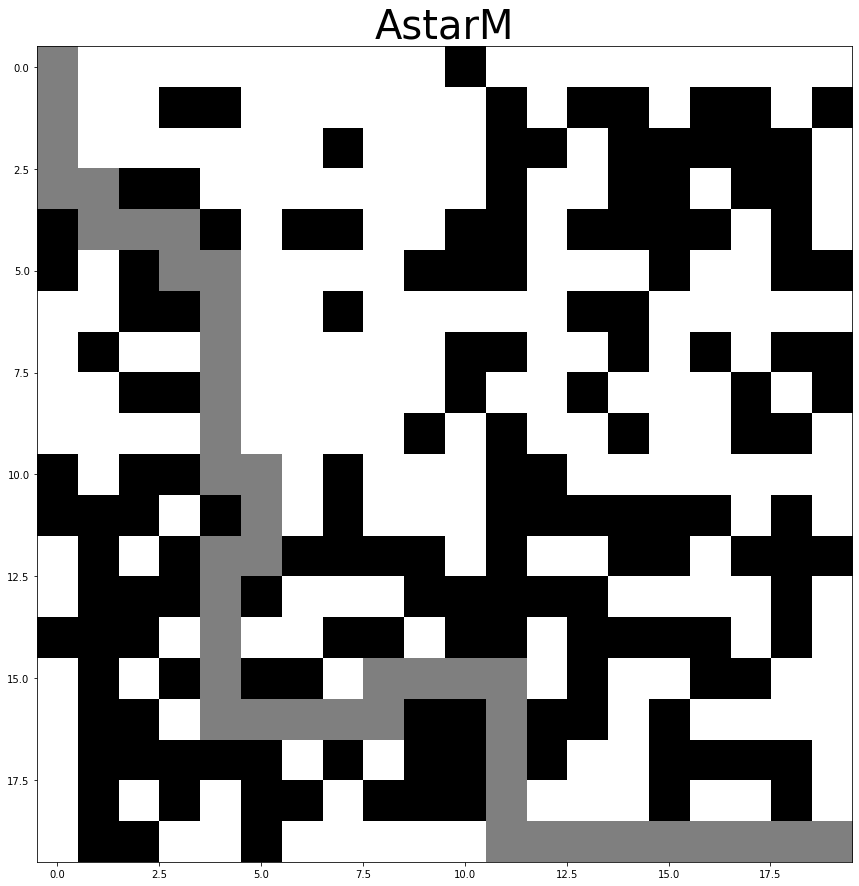

SOLUTION FOUND


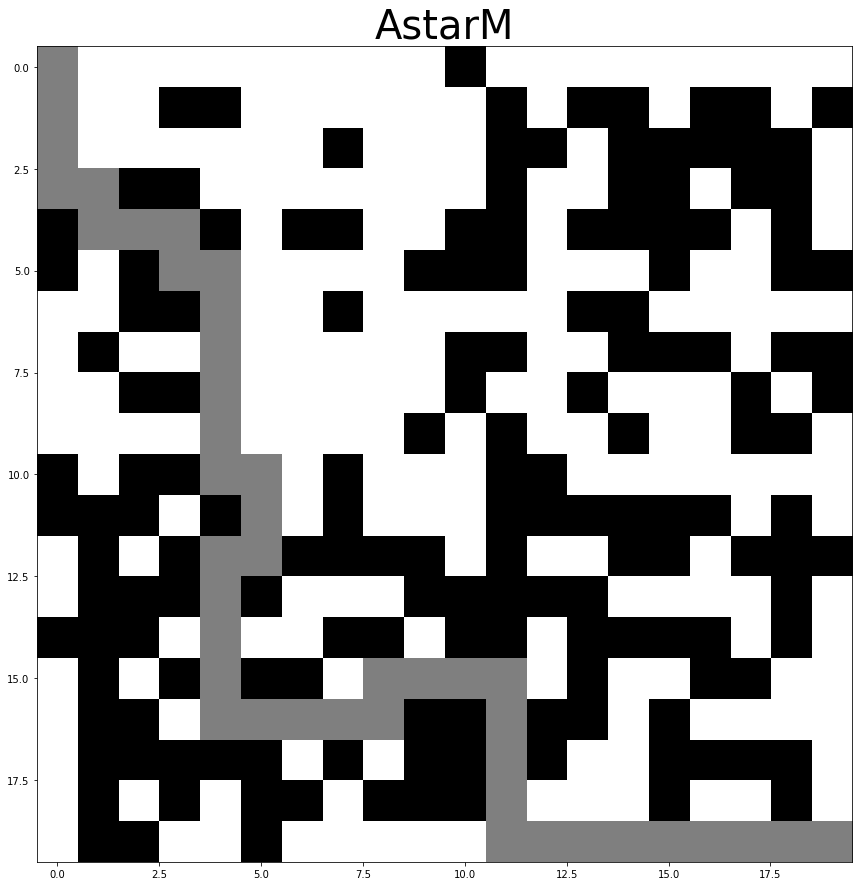

198 198
fails 0
SOLUTION FOUND


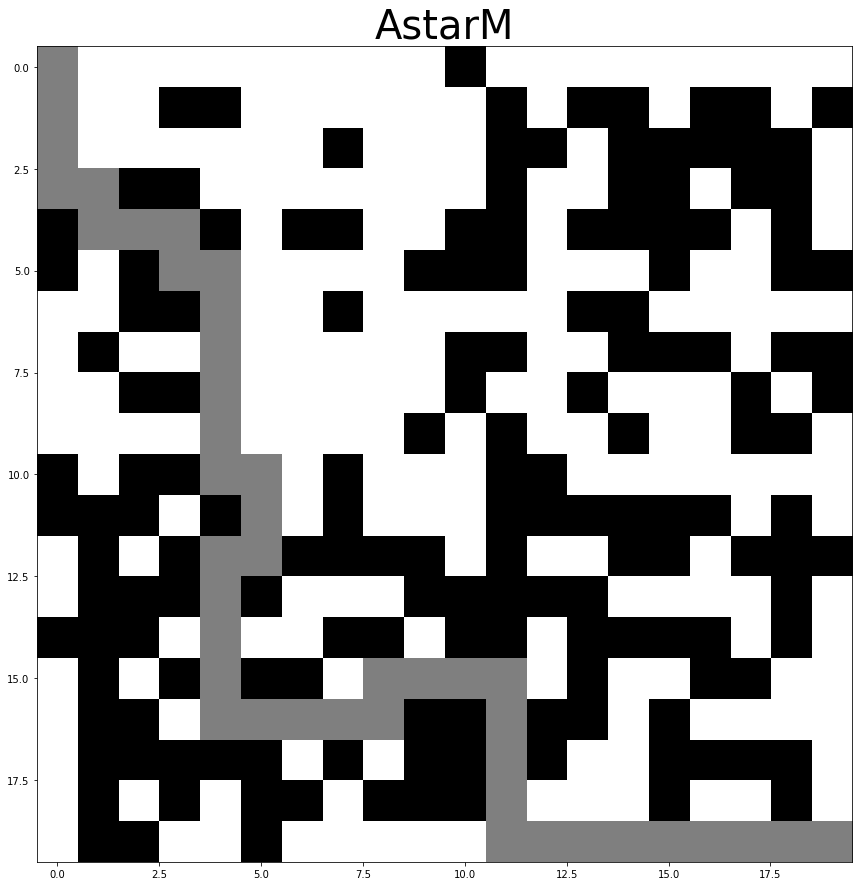

SOLUTION FOUND


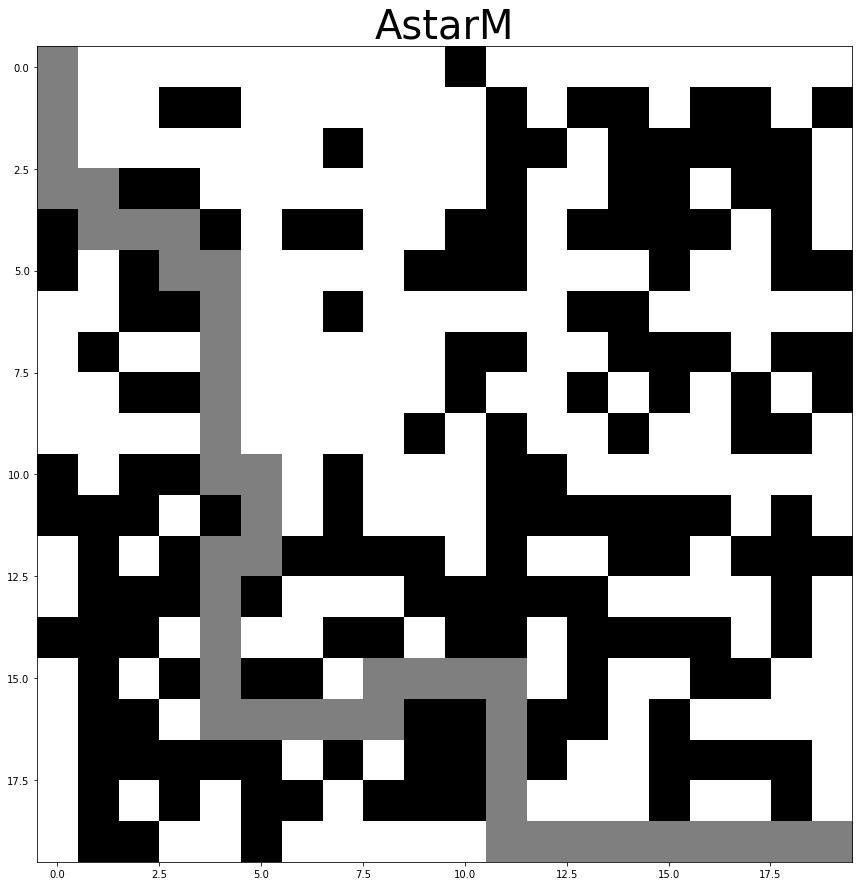

198 198
fails 0
SOLUTION FOUND


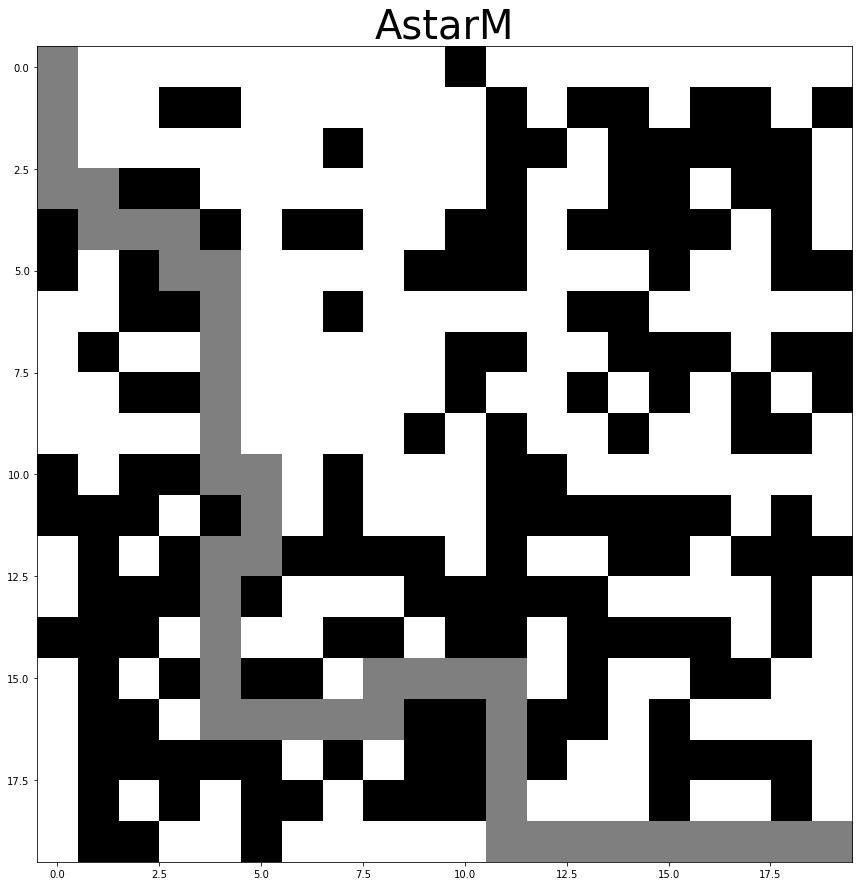

SOLUTION FOUND


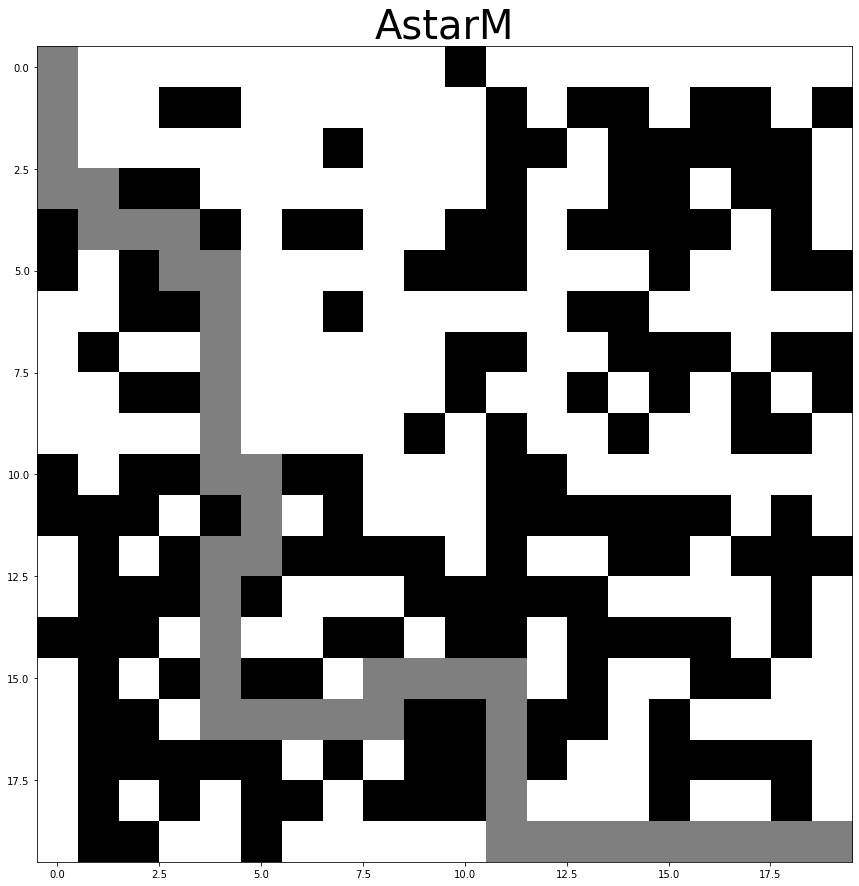

198 195
fails 1
SOLUTION FOUND


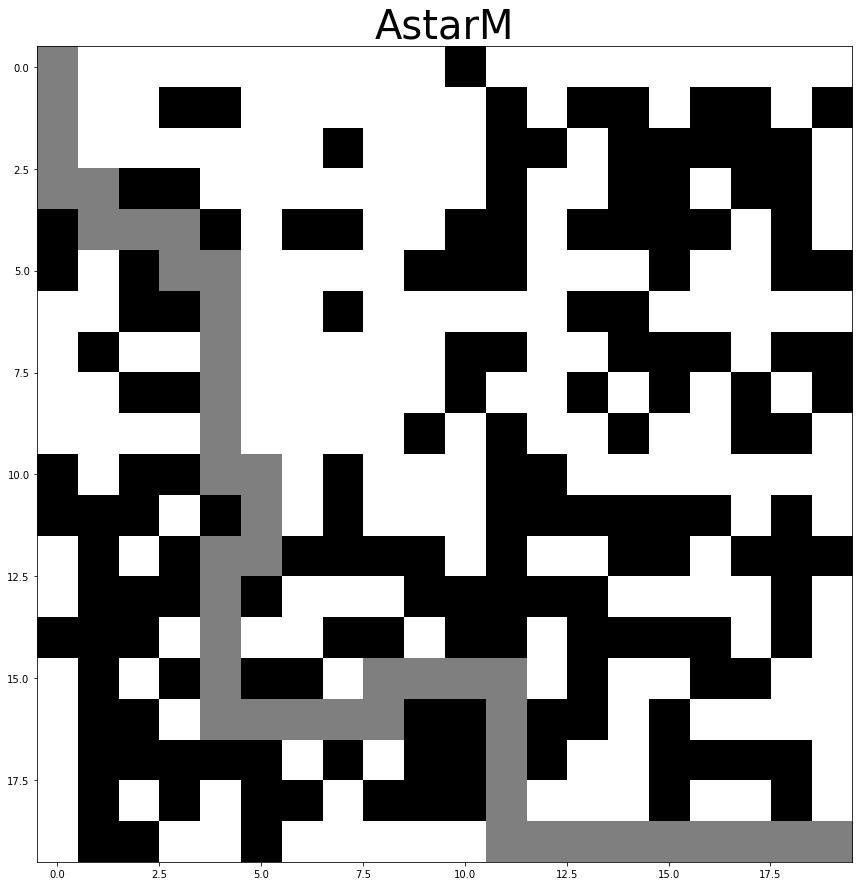

SOLUTION FOUND


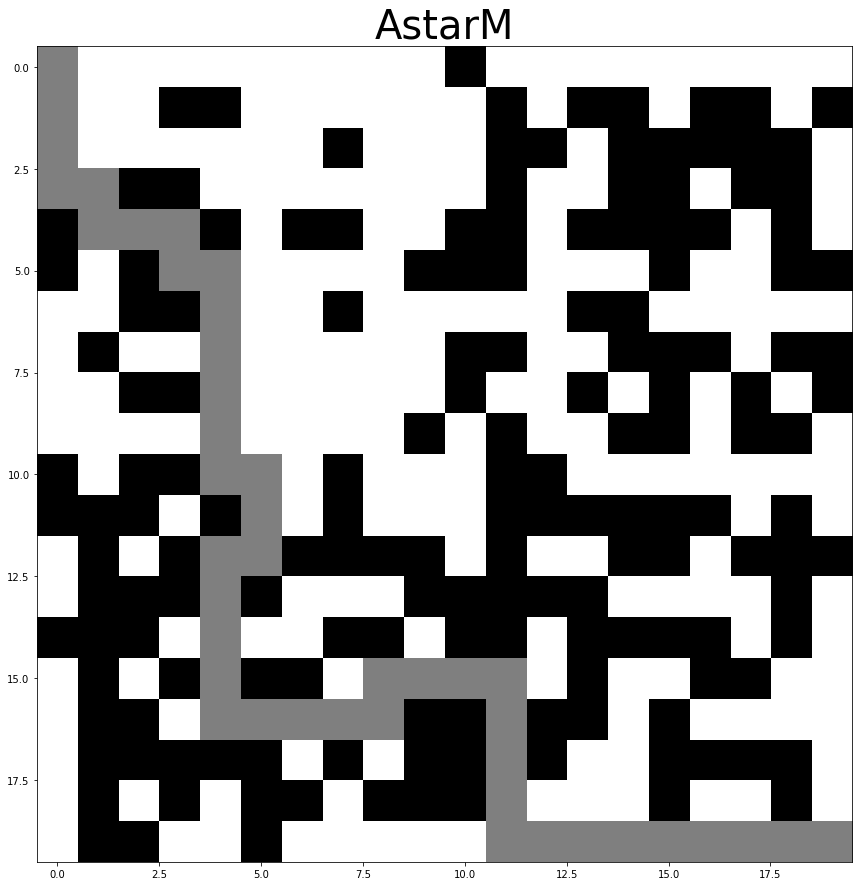

198 197
fails 2
SOLUTION FOUND


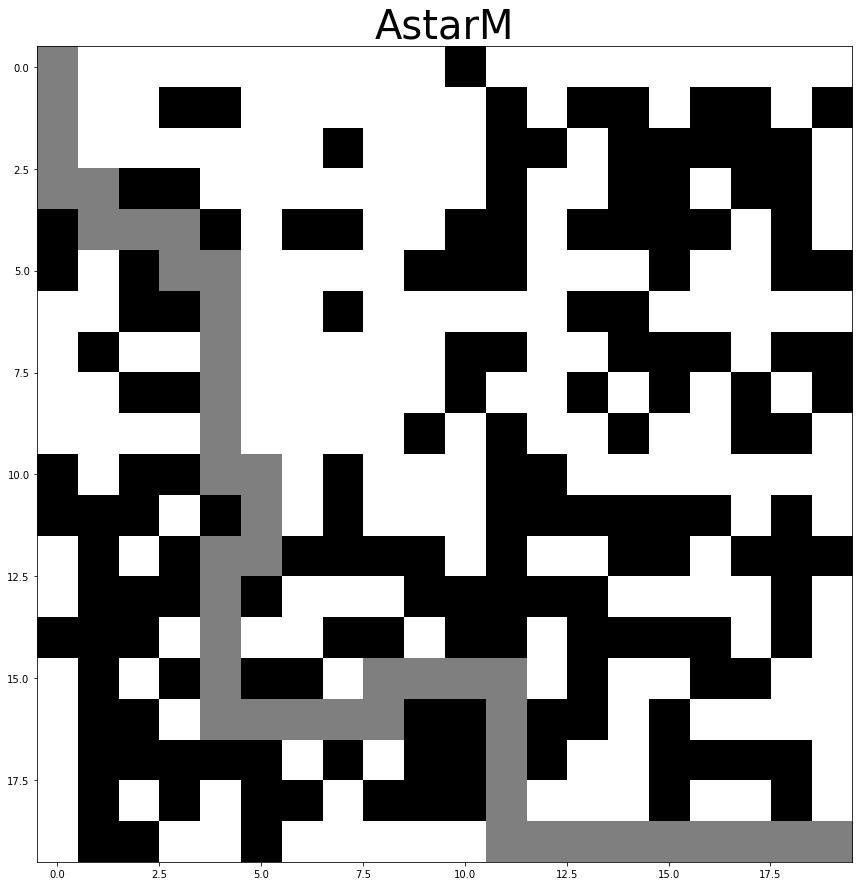

SOLUTION FOUND


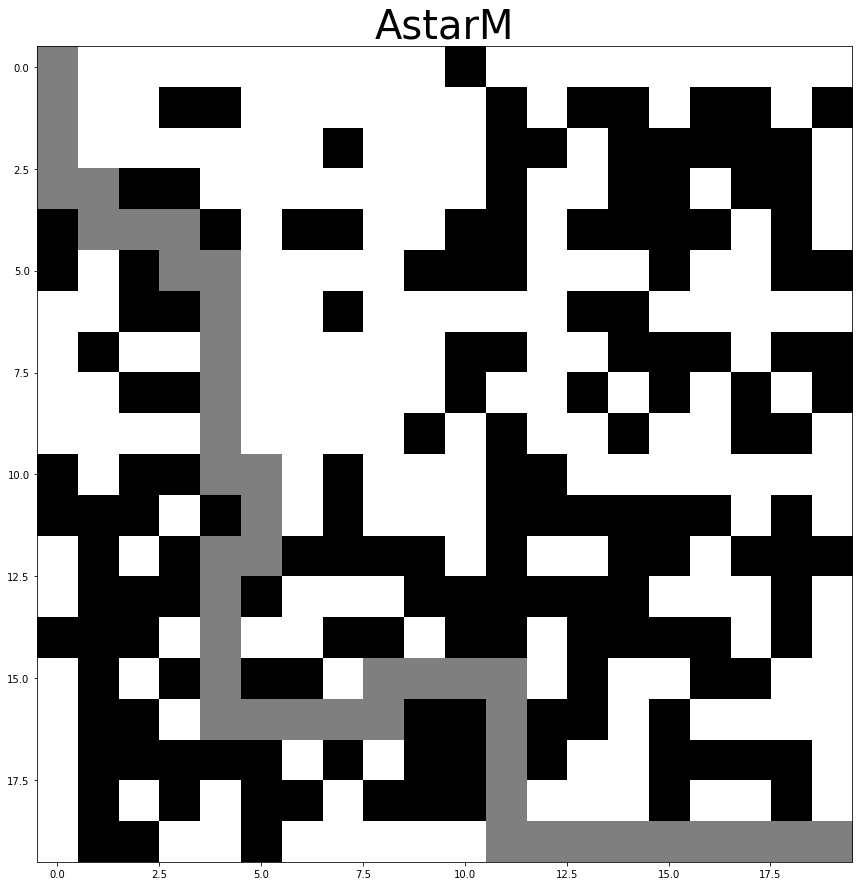

198 198
fails 0
SOLUTION FOUND


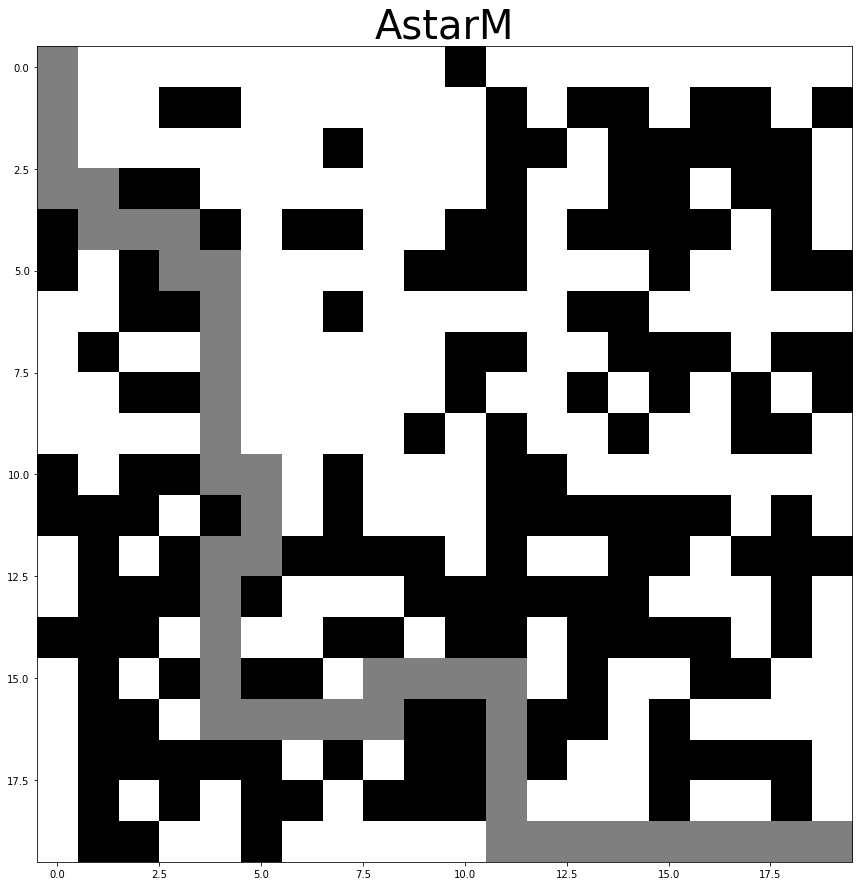

SOLUTION FOUND


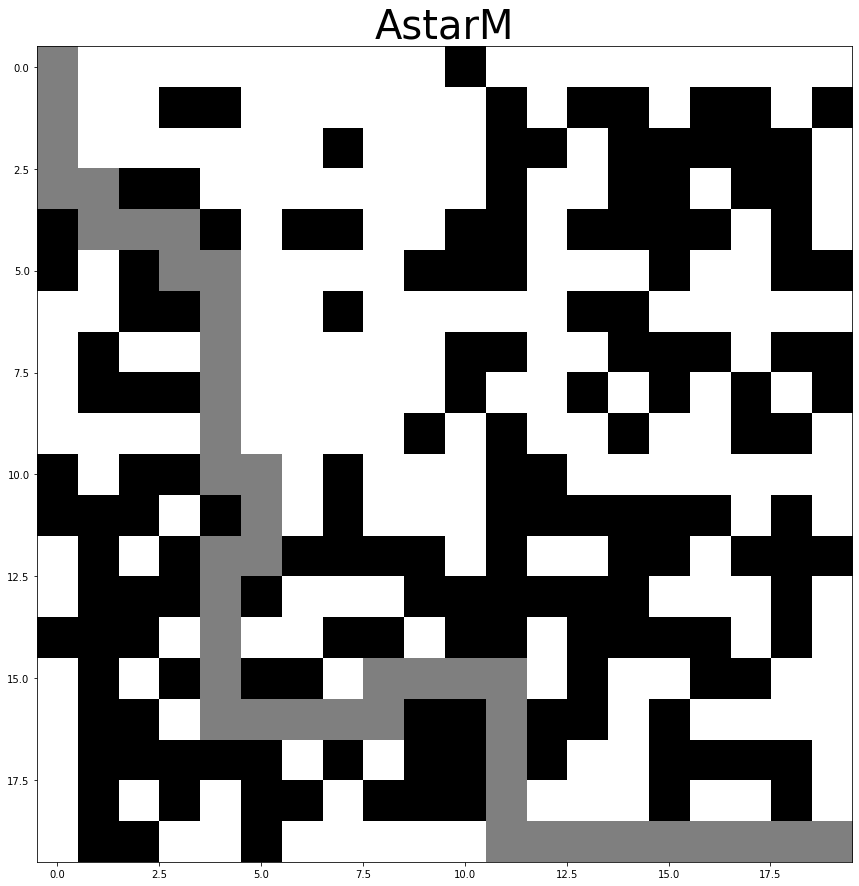

198 196
fails 1
SOLUTION FOUND


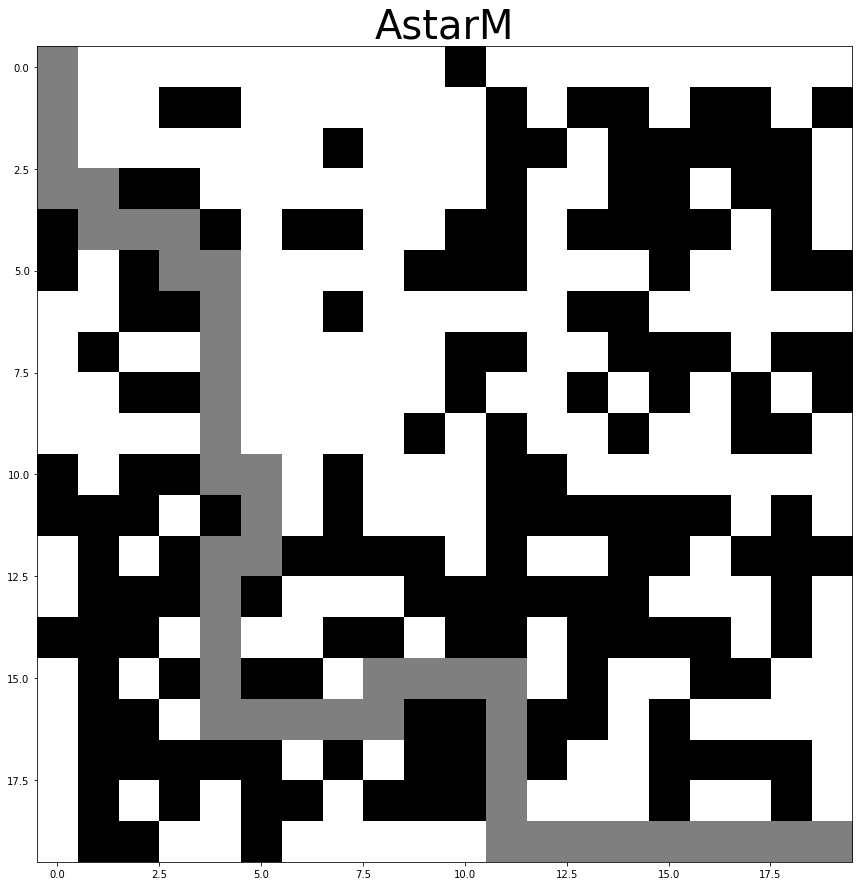

SOLUTION FOUND


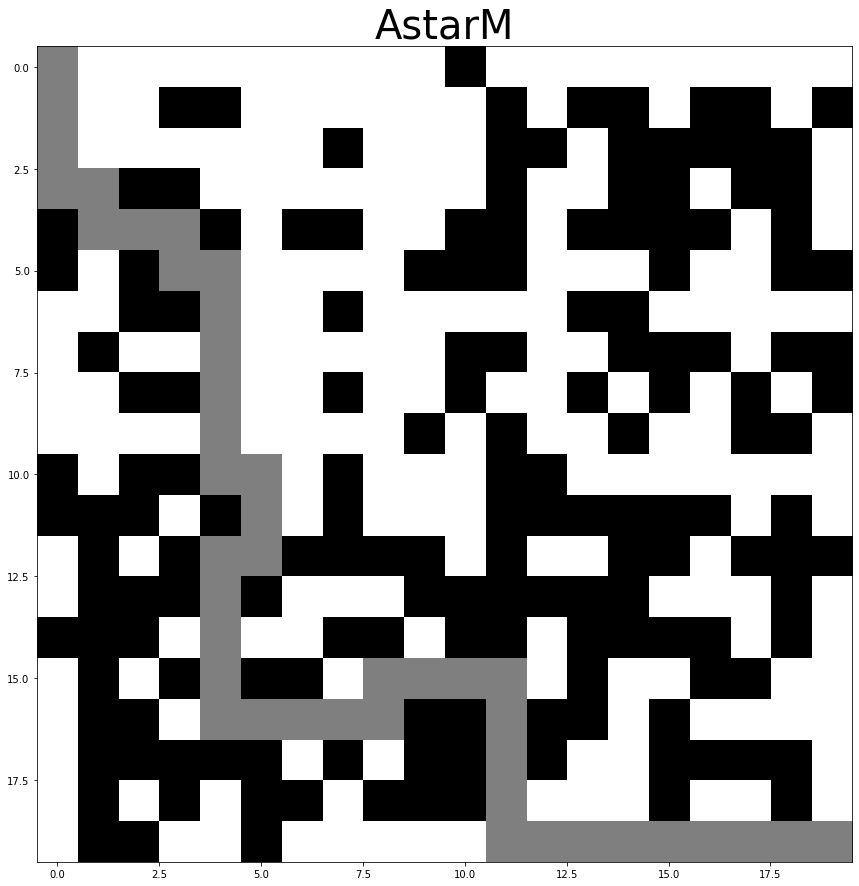

198 194
fails 2
SOLUTION FOUND


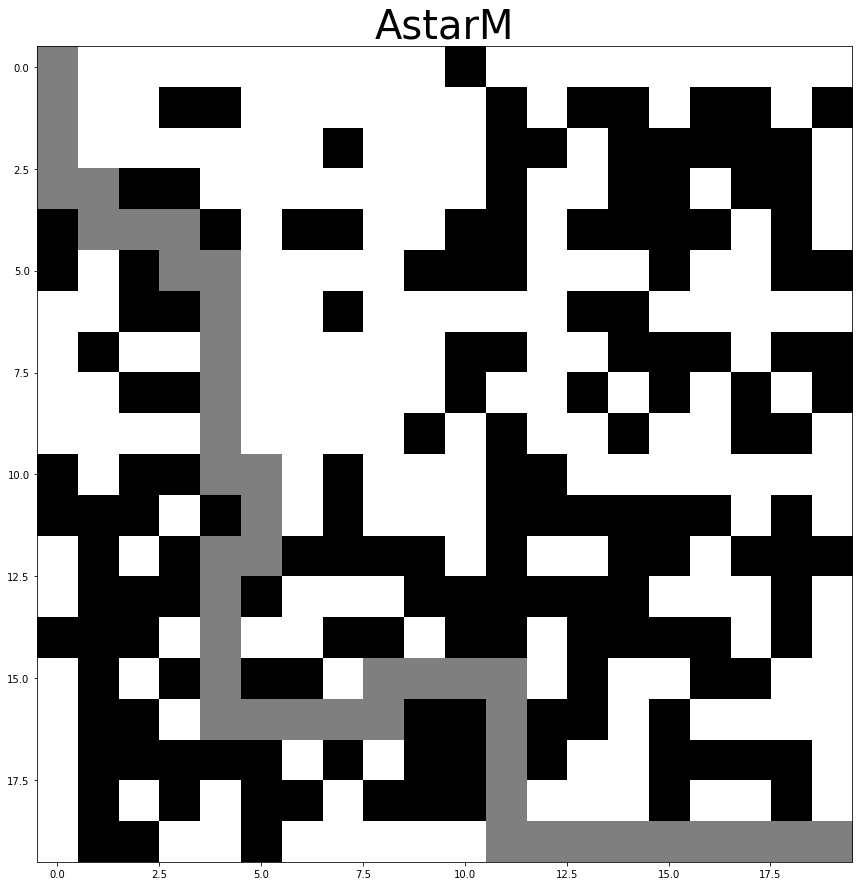

SOLUTION FOUND


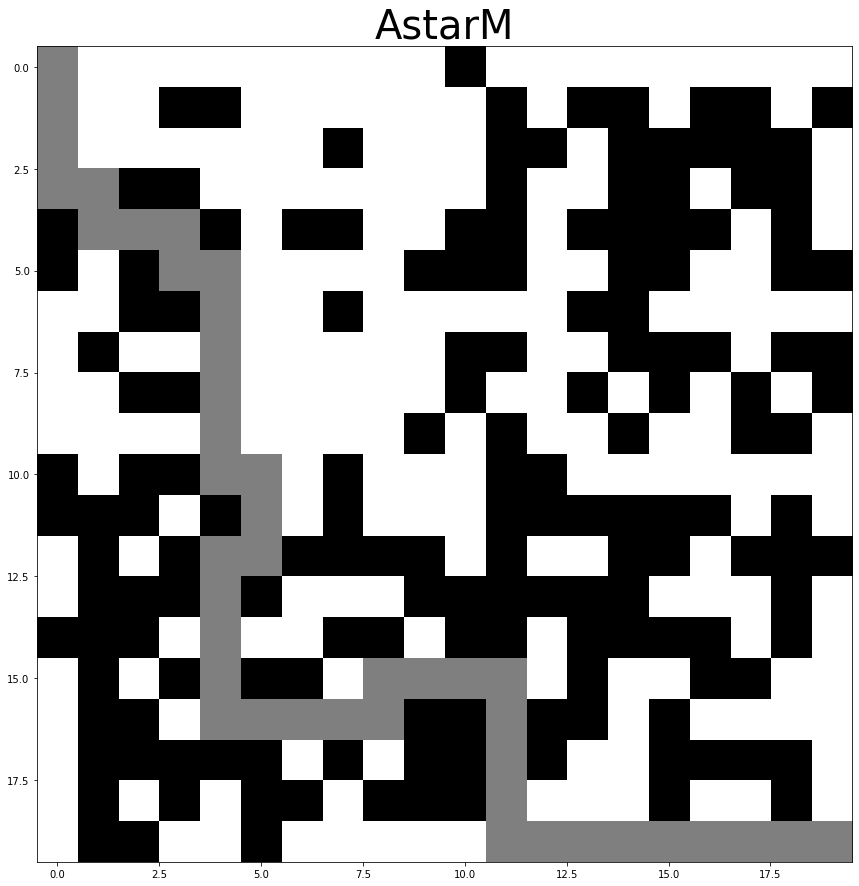

198 197
fails 3
SOLUTION FOUND


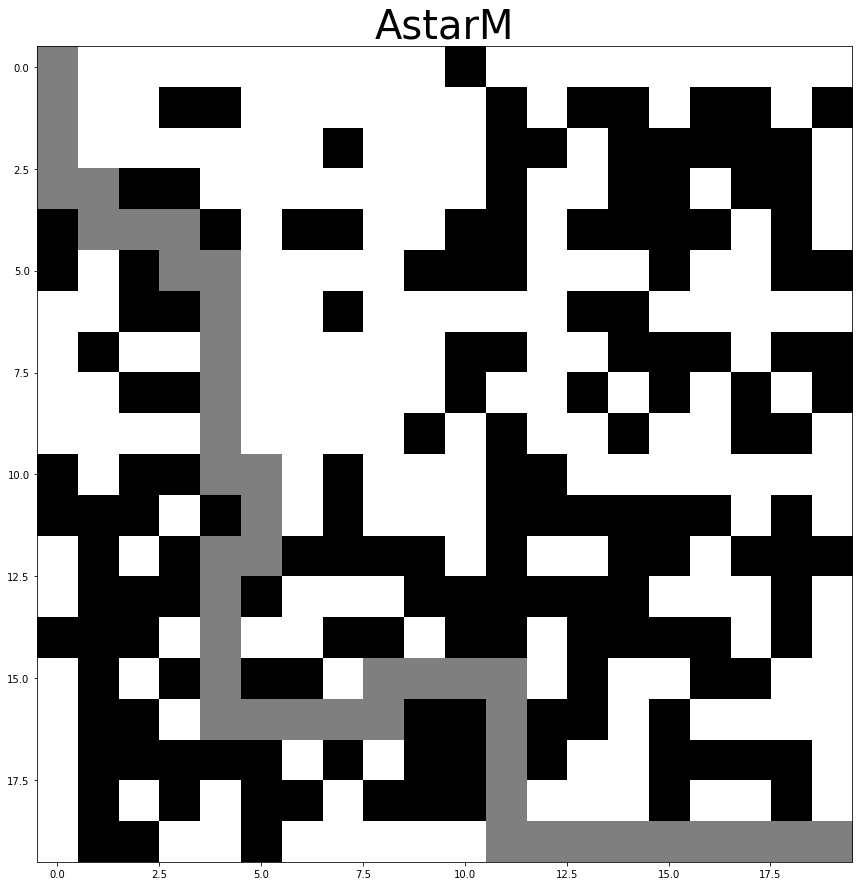

SOLUTION FOUND


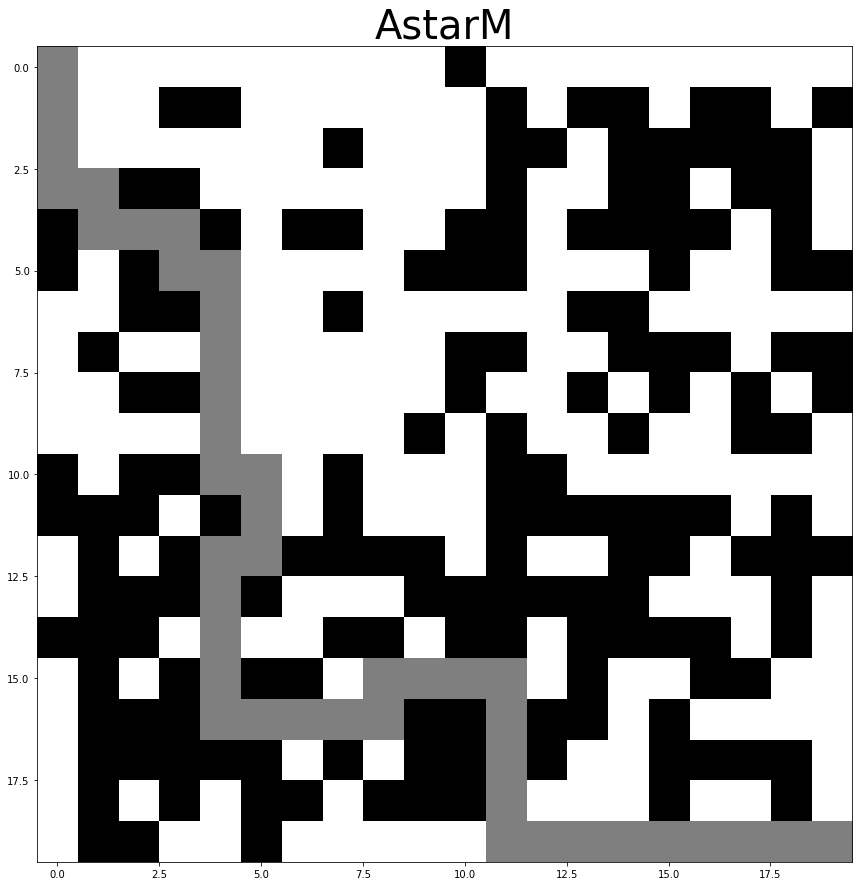

198 198
fails 0
SOLUTION FOUND


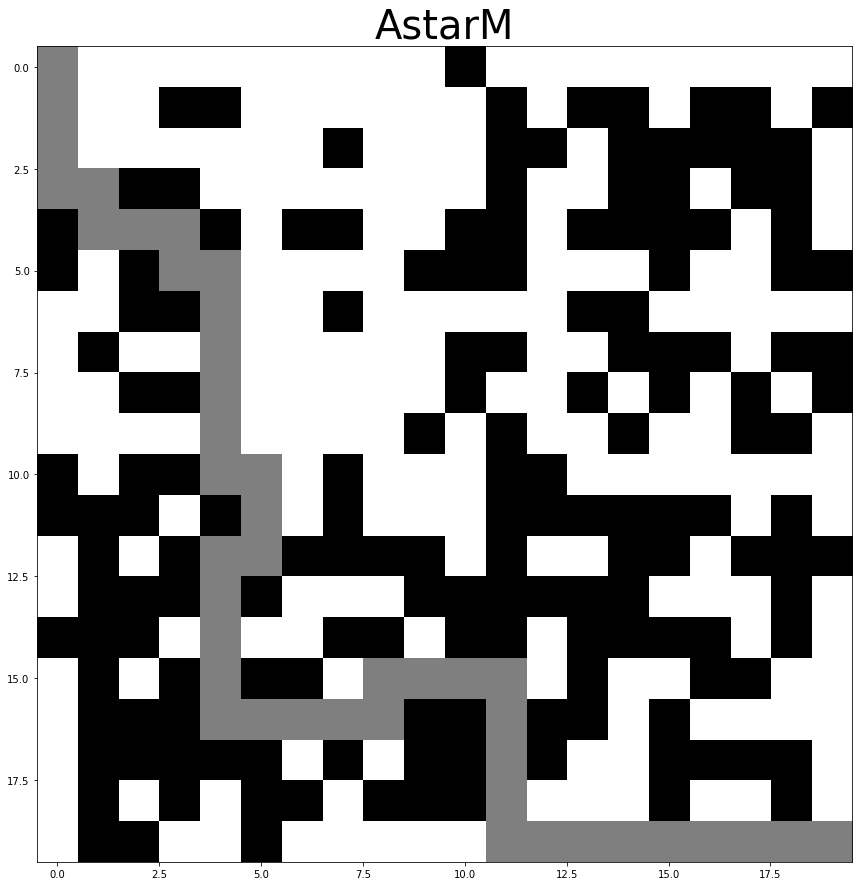

UNSOLVABLE


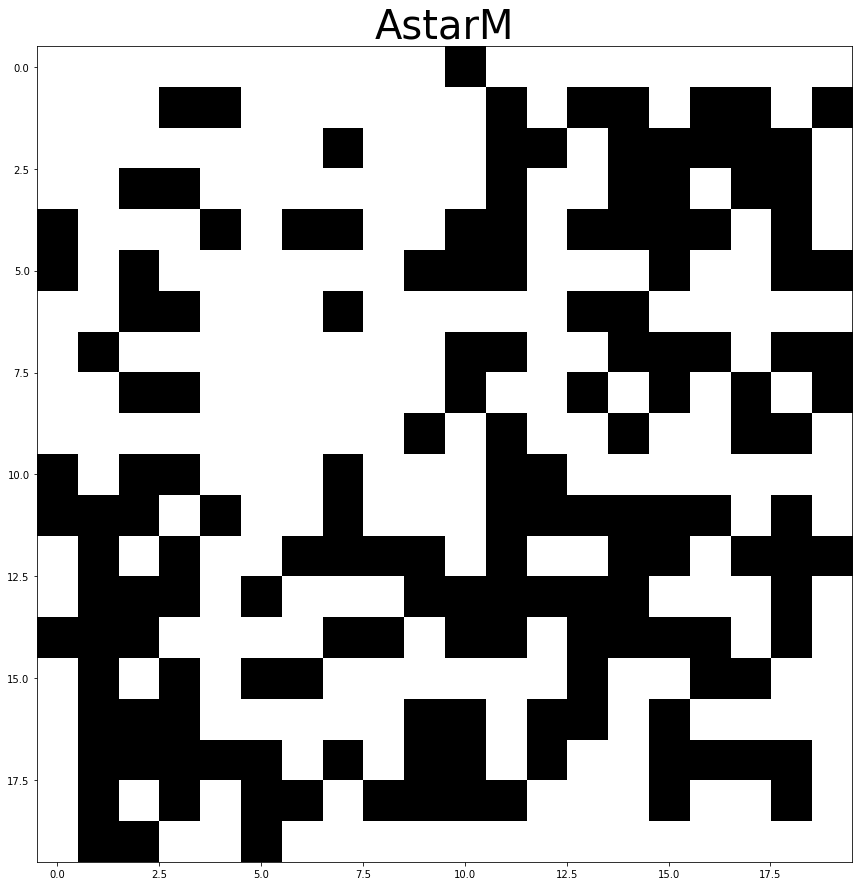

198 200
fails 1
SOLUTION FOUND


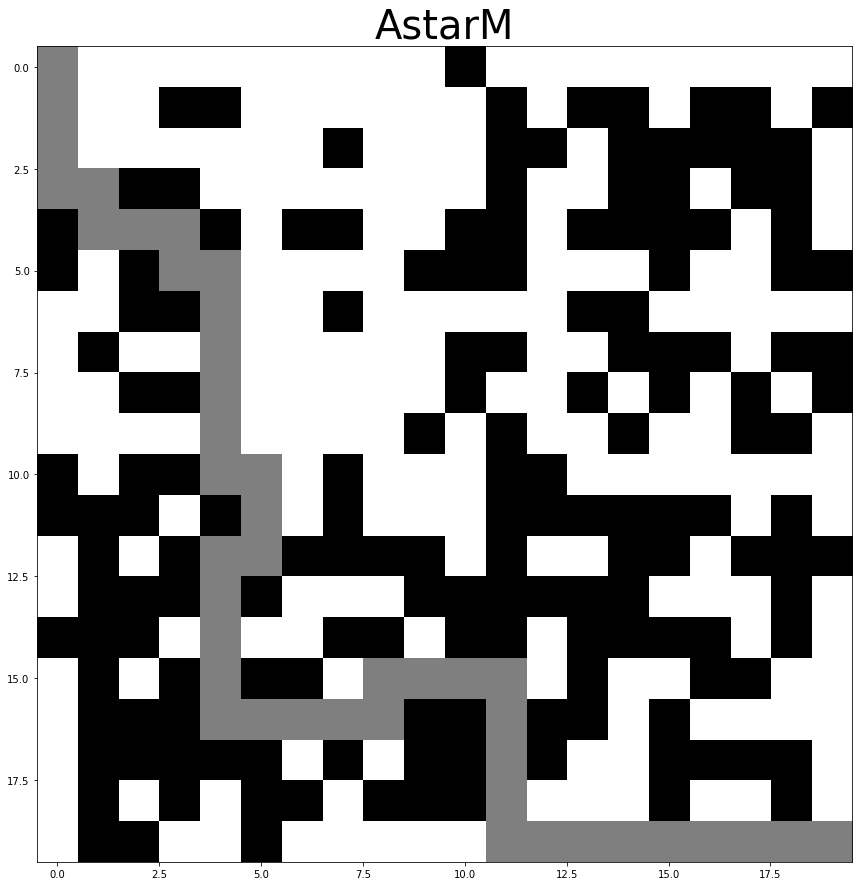

SOLUTION FOUND


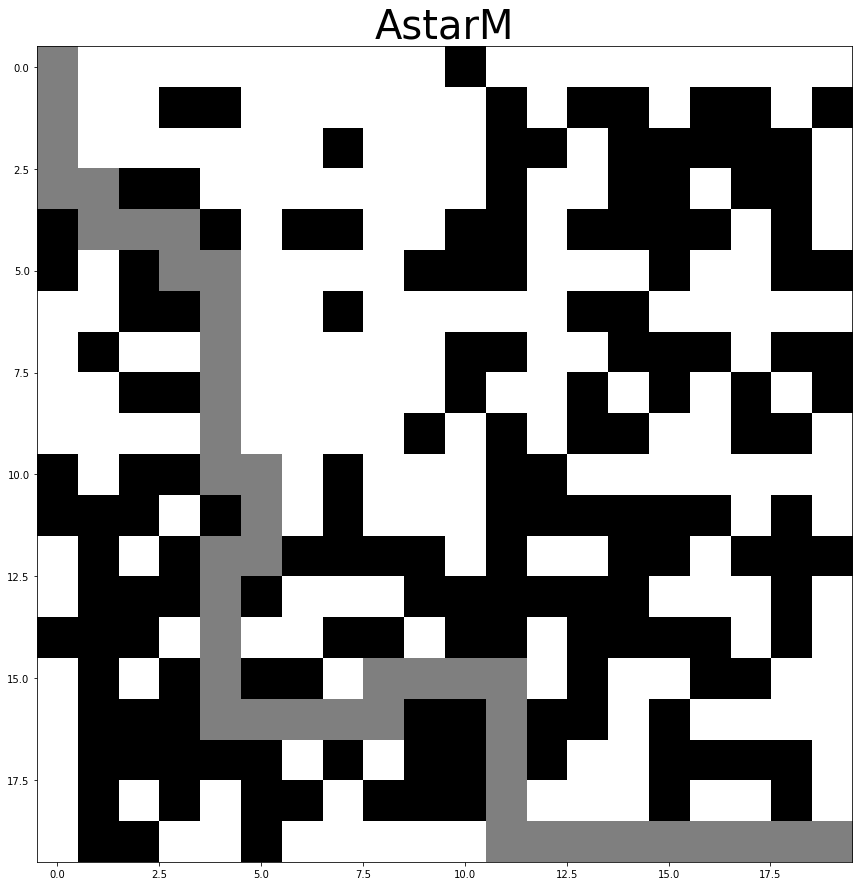

198 185
fails 2
SOLUTION FOUND


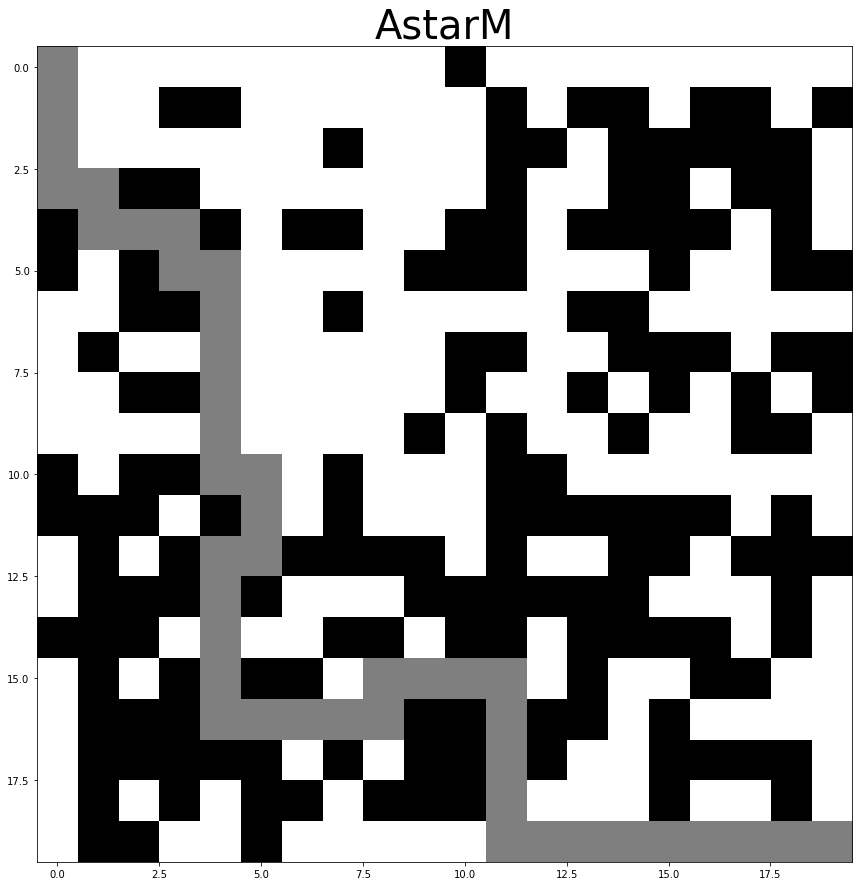

SOLUTION FOUND


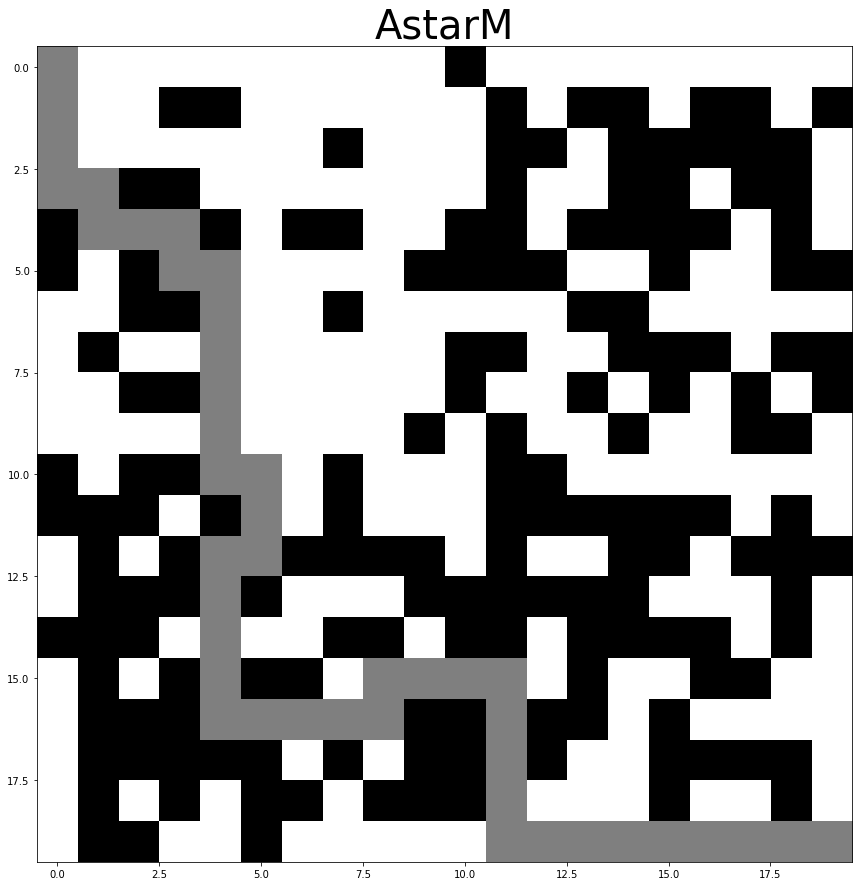

198 195
fails 3
SOLUTION FOUND


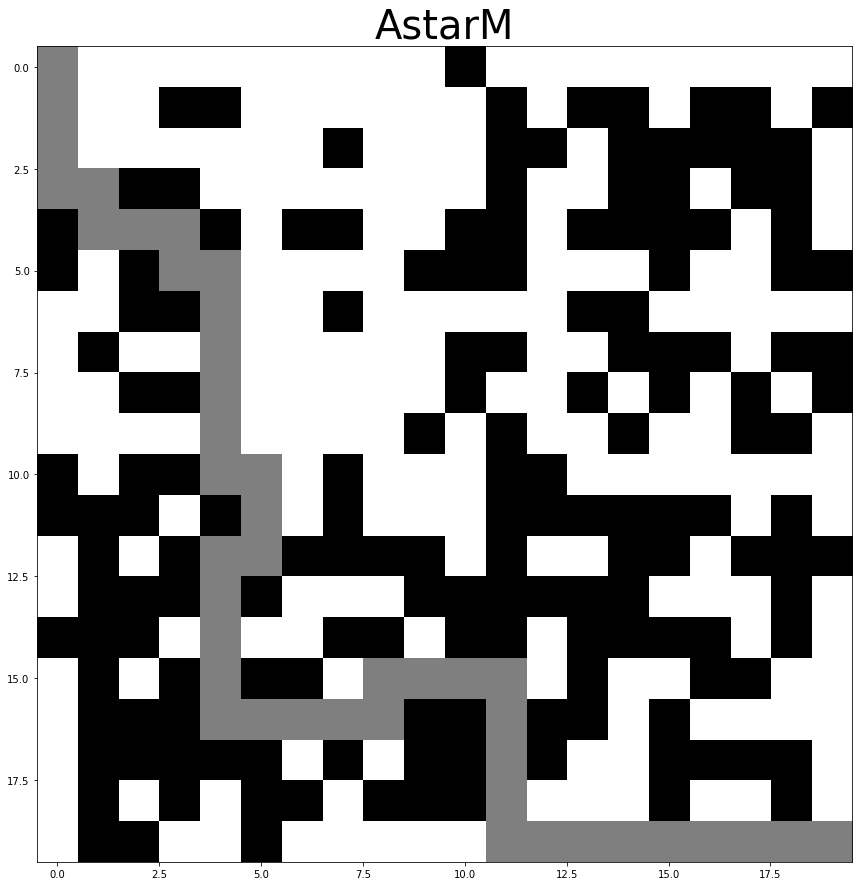

SOLUTION FOUND


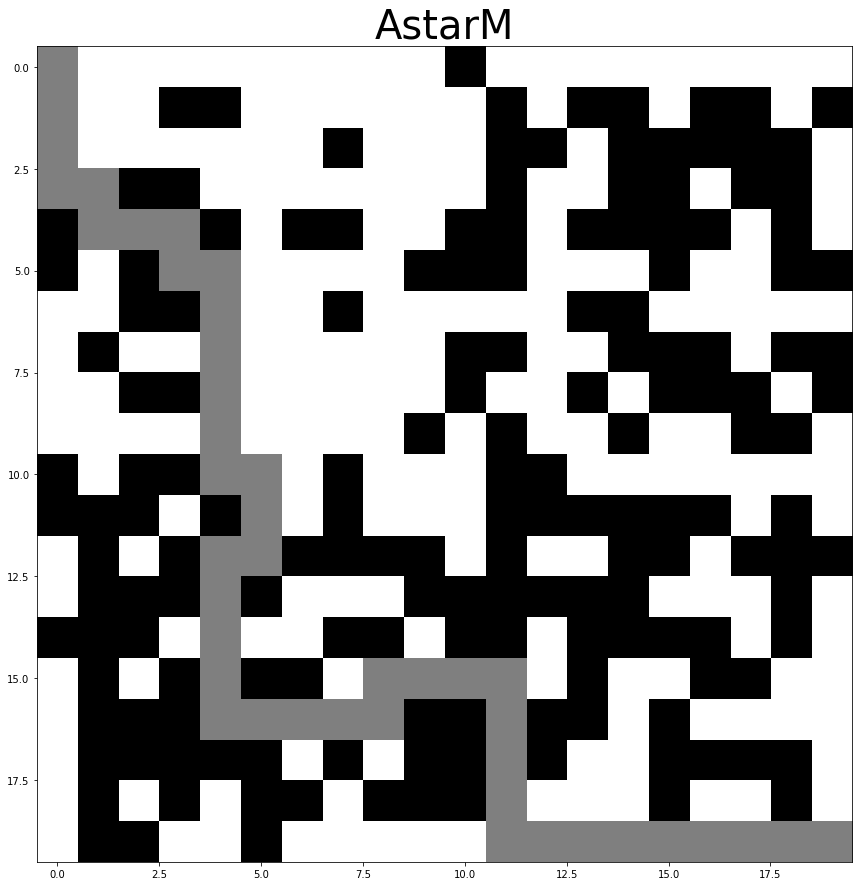

198 198
fails 0
SOLUTION FOUND


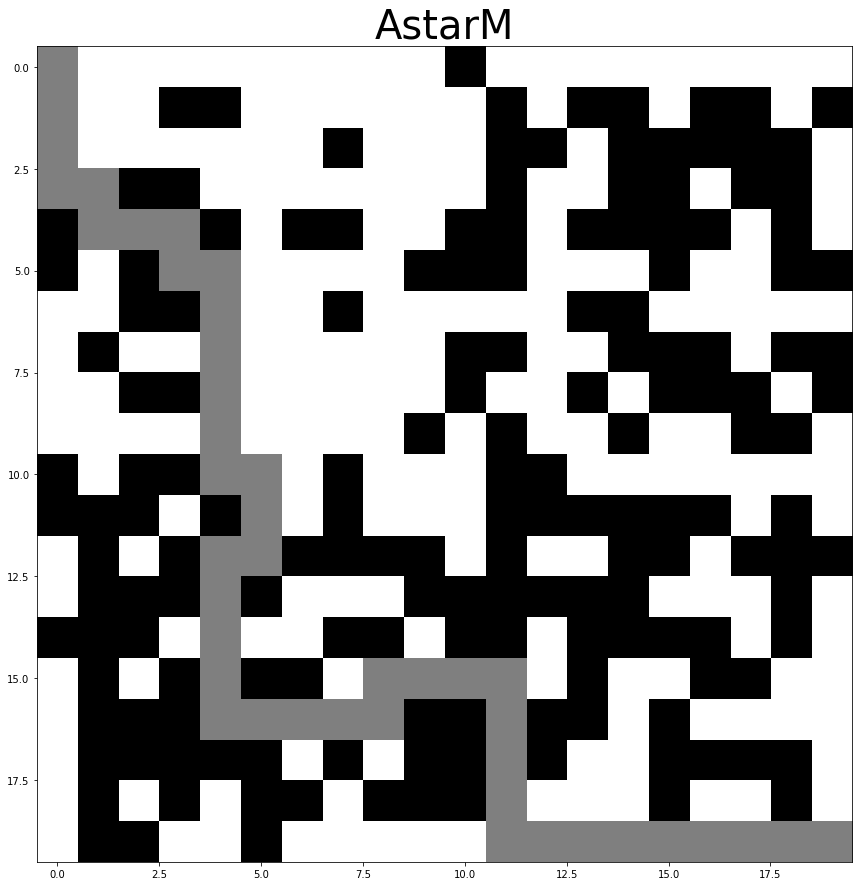

SOLUTION FOUND


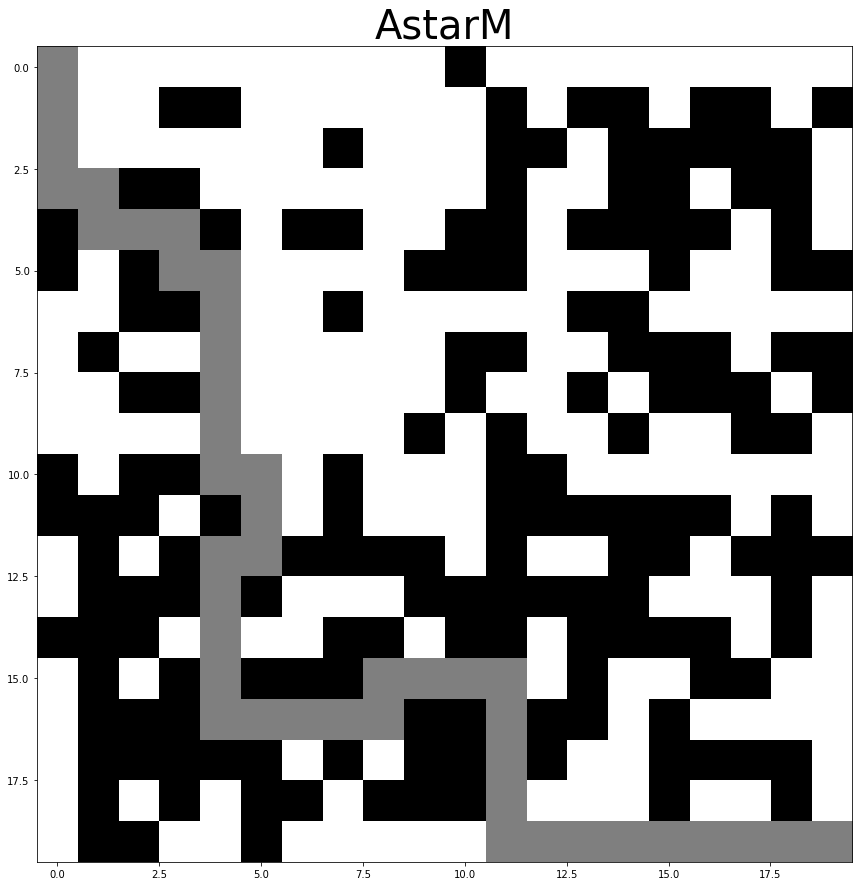

198 198
fails 0
SOLUTION FOUND


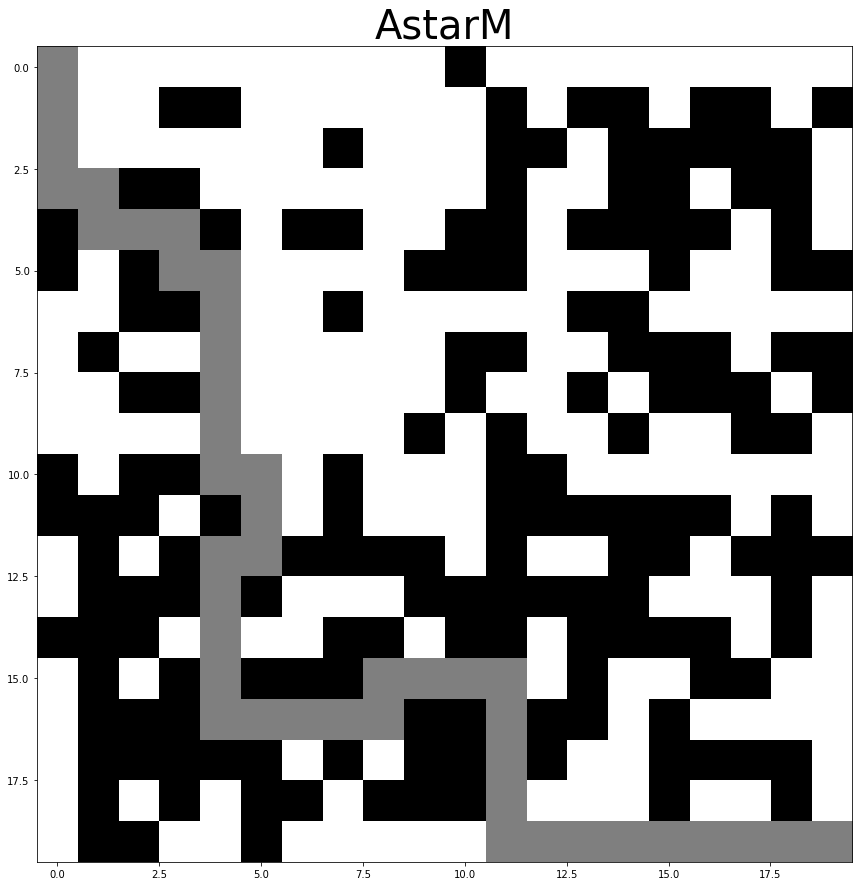

SOLUTION FOUND


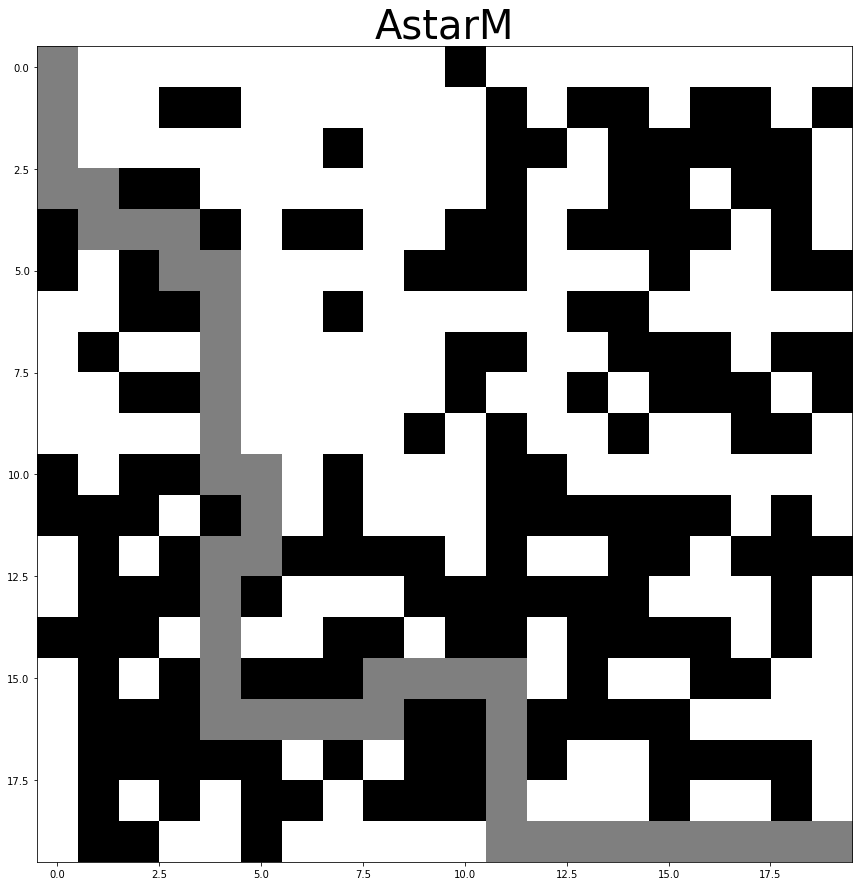

198 198
fails 0
SOLUTION FOUND


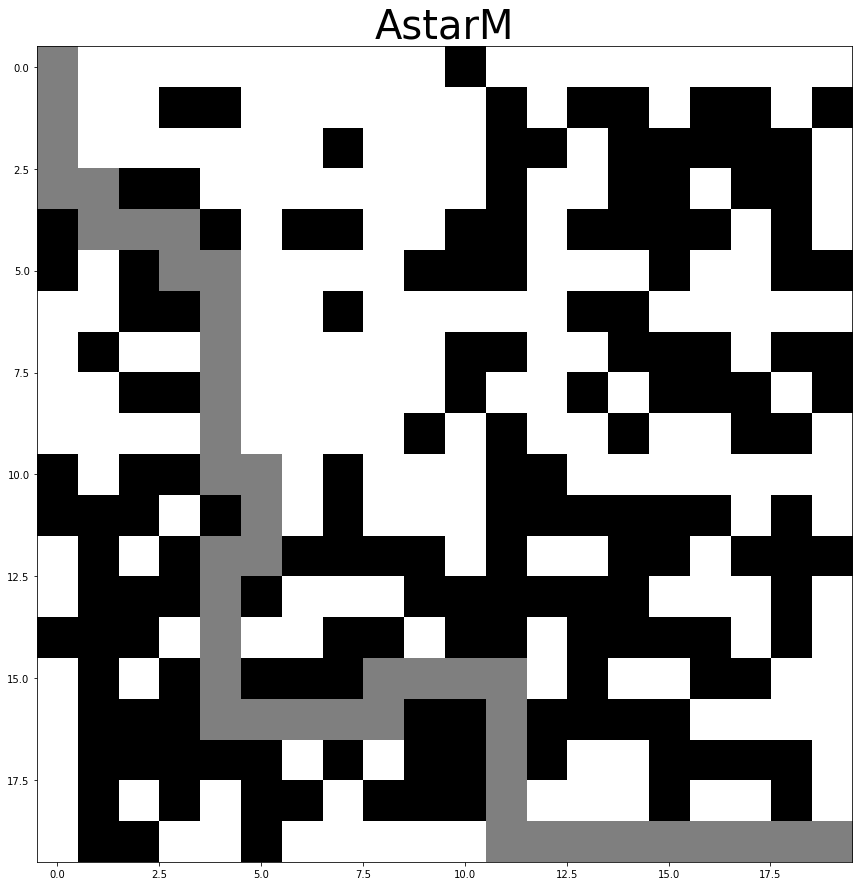

UNSOLVABLE


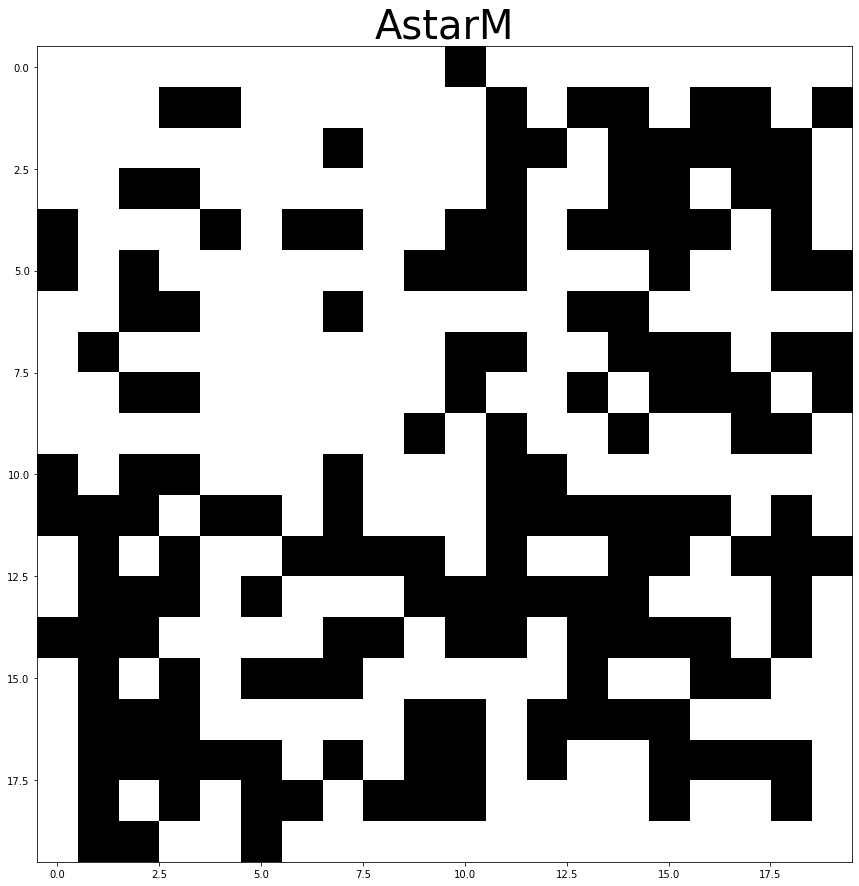

198 168
fails 1
SOLUTION FOUND


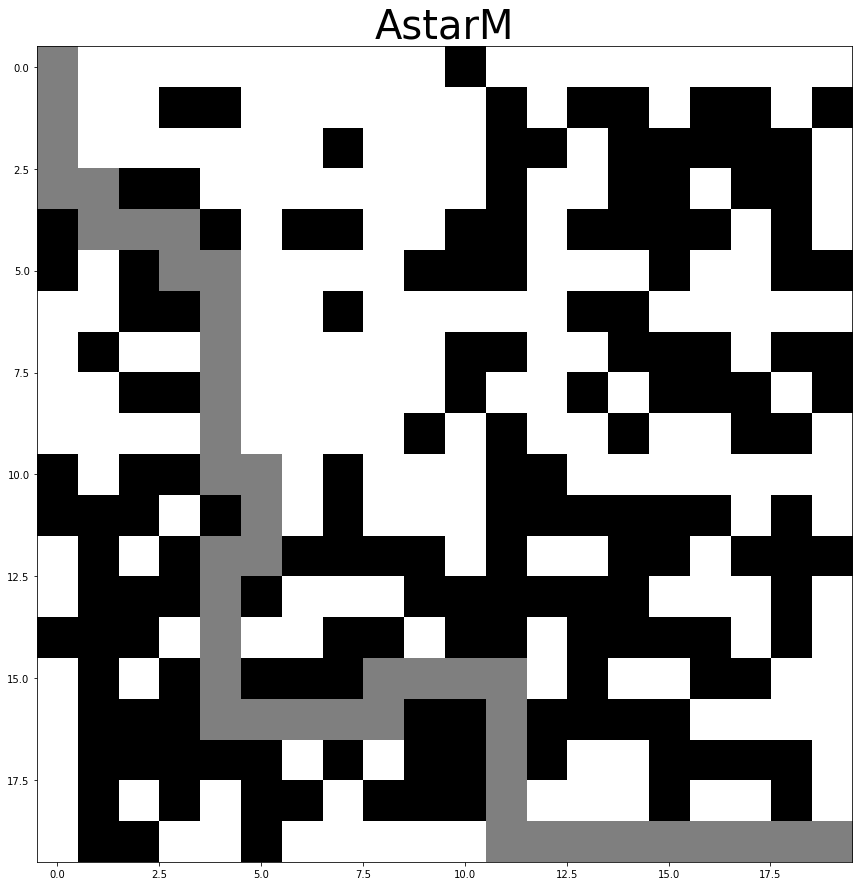

SOLUTION FOUND


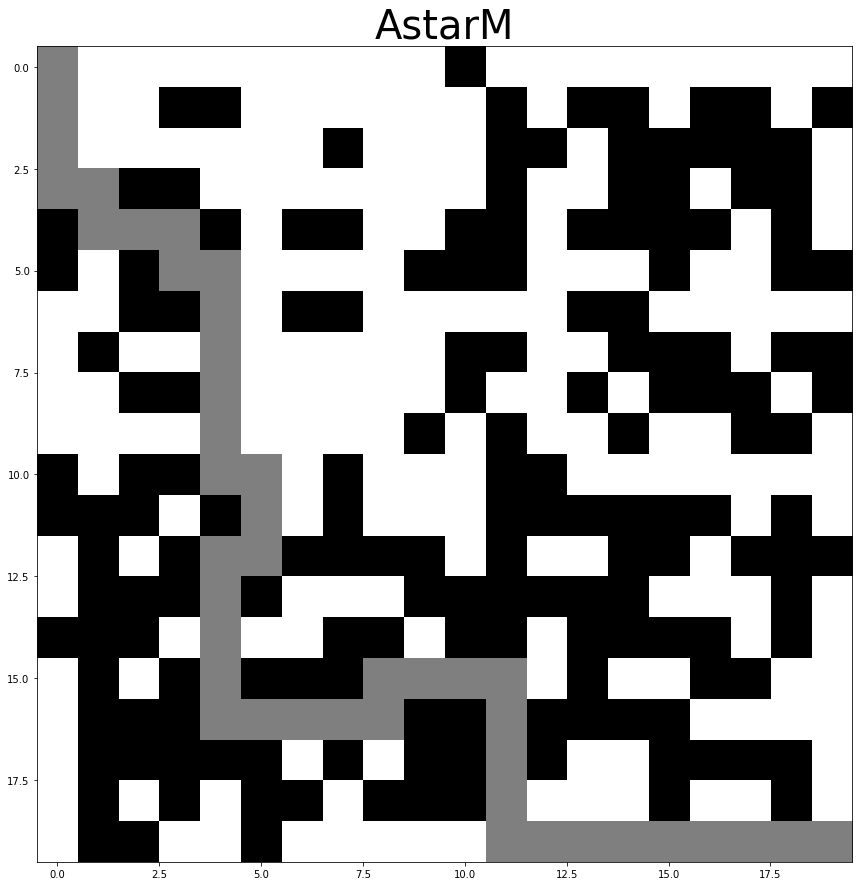

198 195
fails 2
SOLUTION FOUND


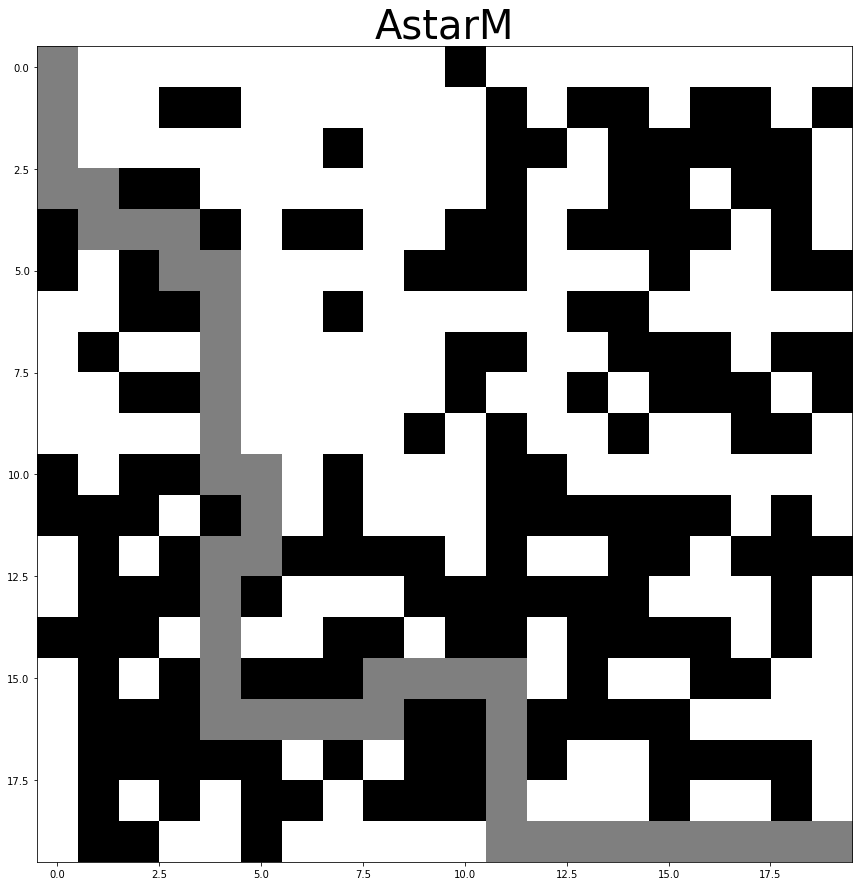

SOLUTION FOUND


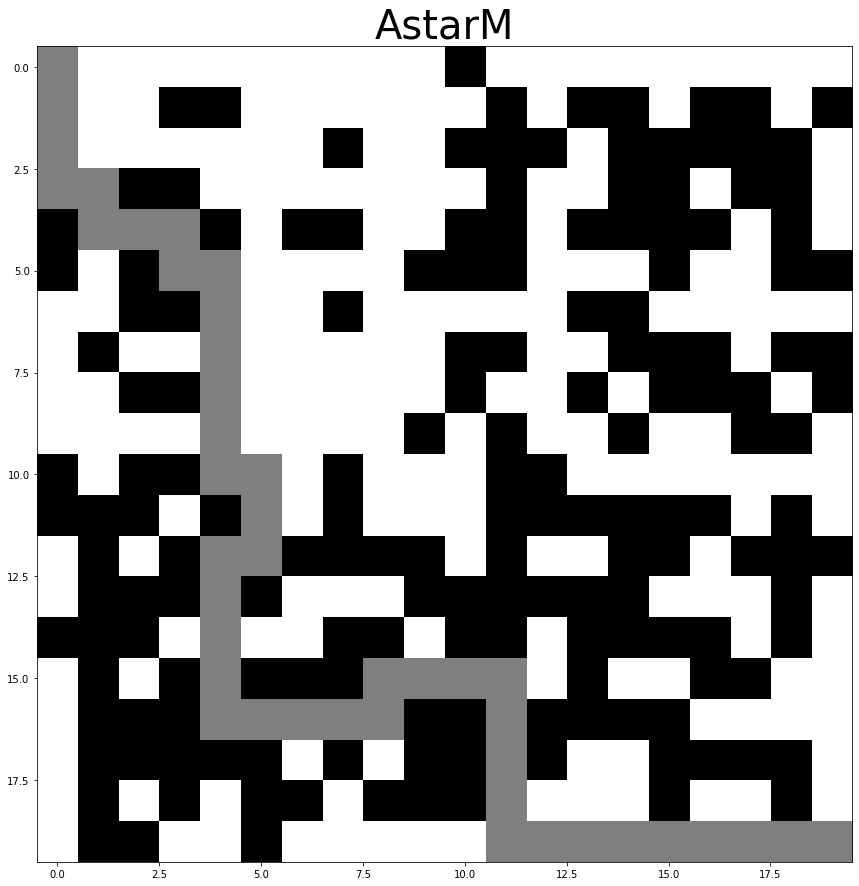

198 195
fails 3
SOLUTION FOUND


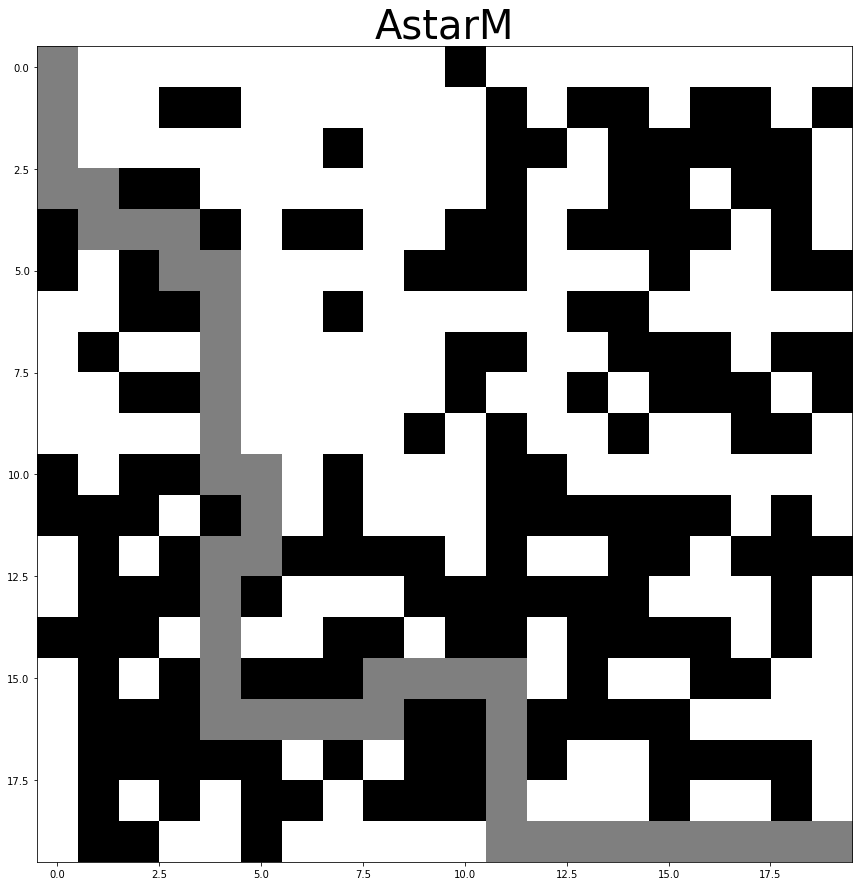

SOLUTION FOUND


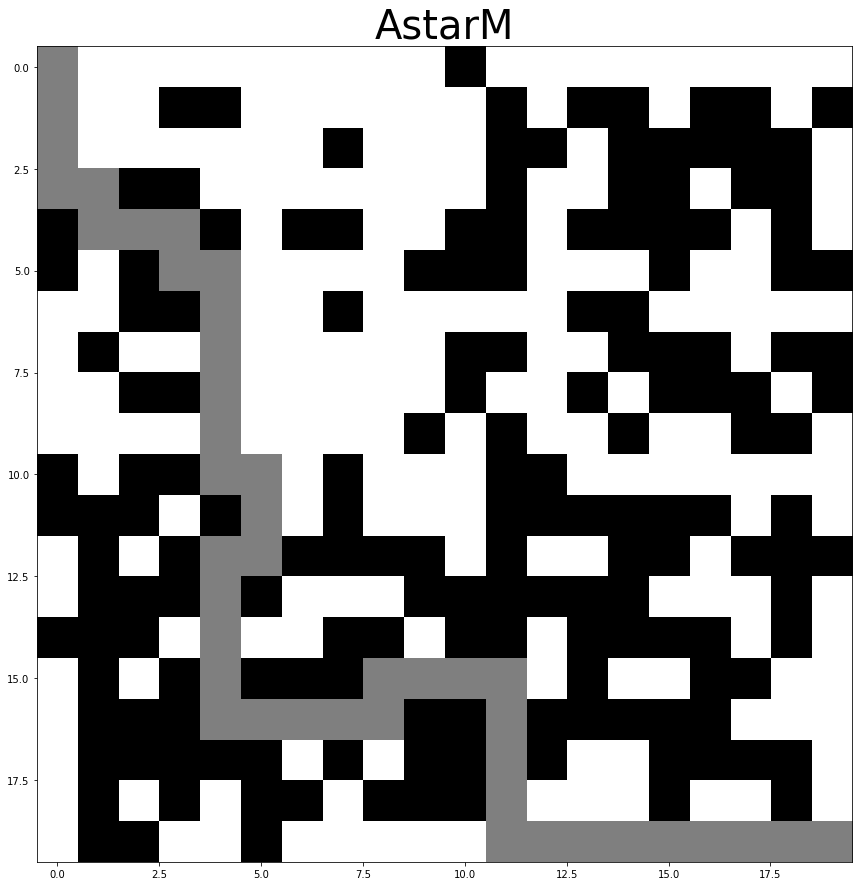

198 198
fails 0
SOLUTION FOUND


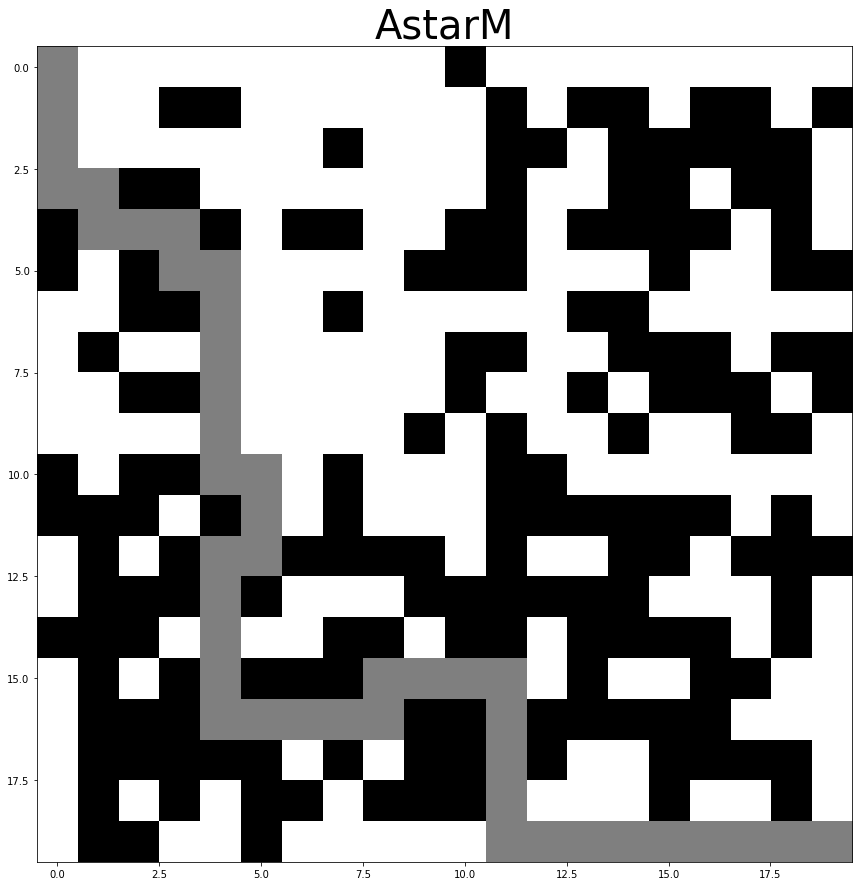

SOLUTION FOUND


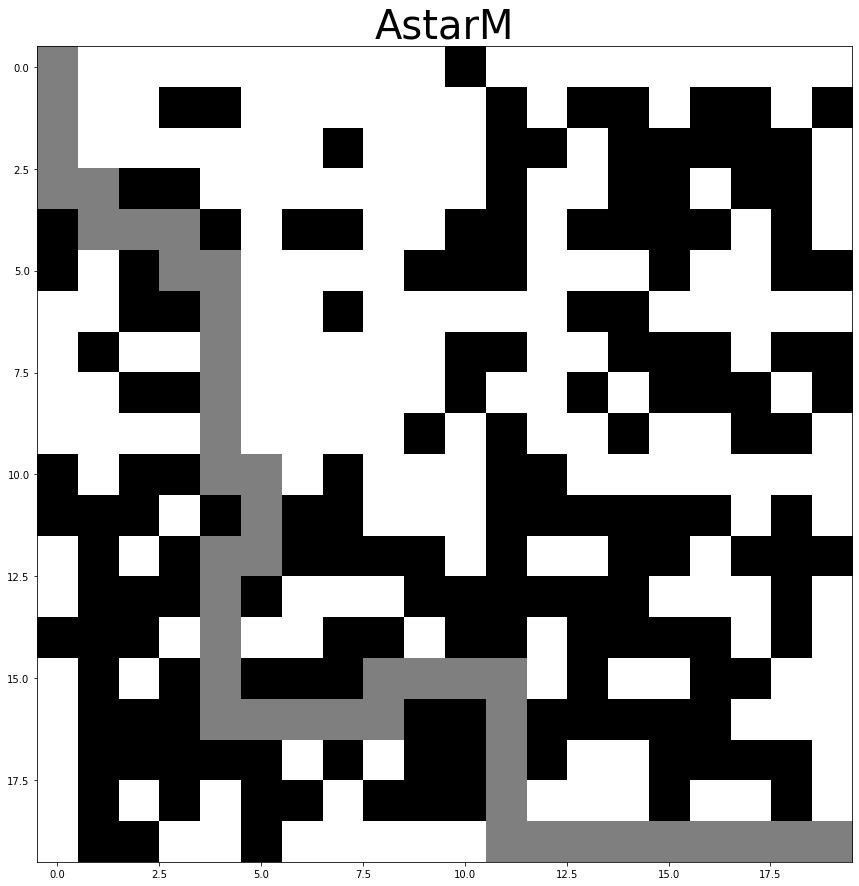

198 196
fails 1
SOLUTION FOUND


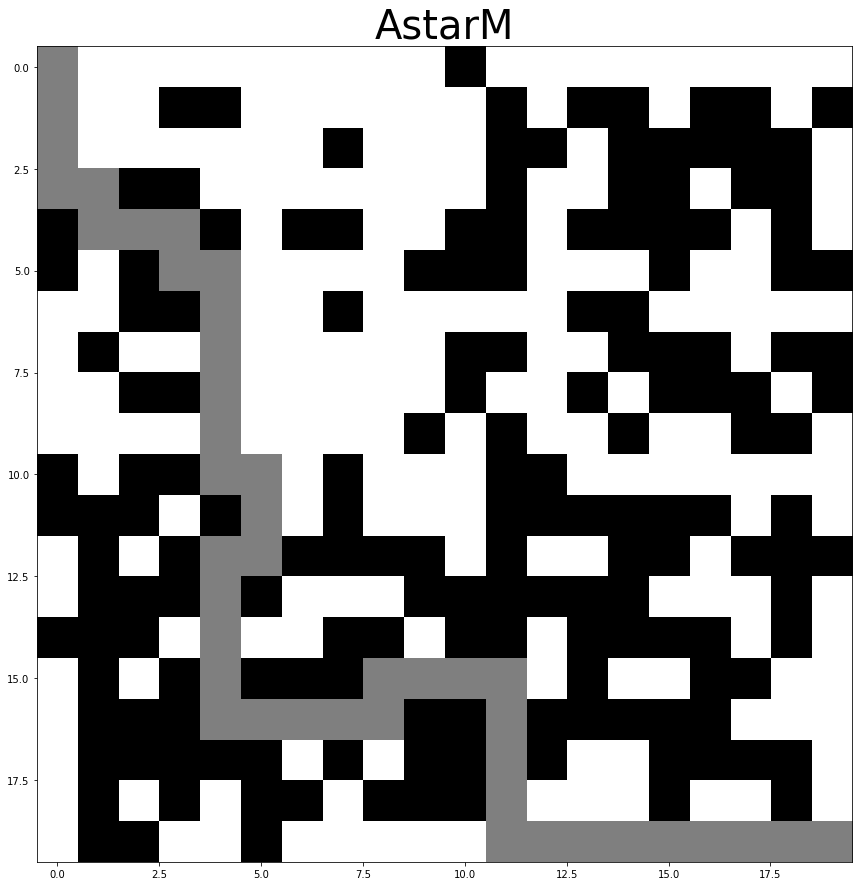

SOLUTION FOUND


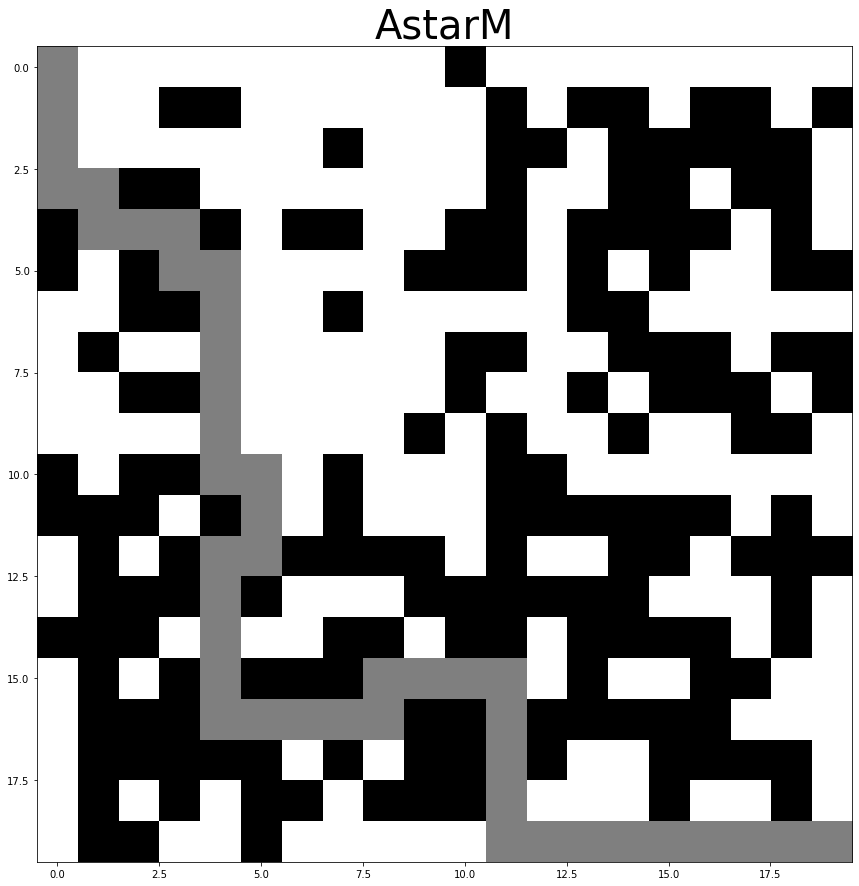

198 196
fails 2
SOLUTION FOUND


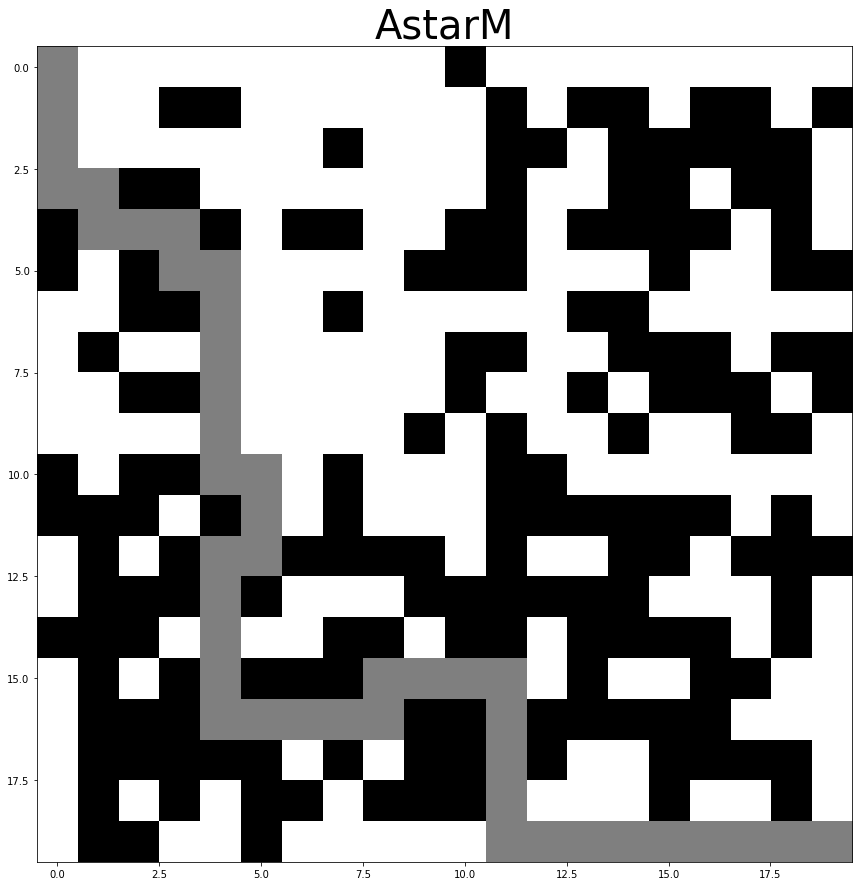

SOLUTION FOUND


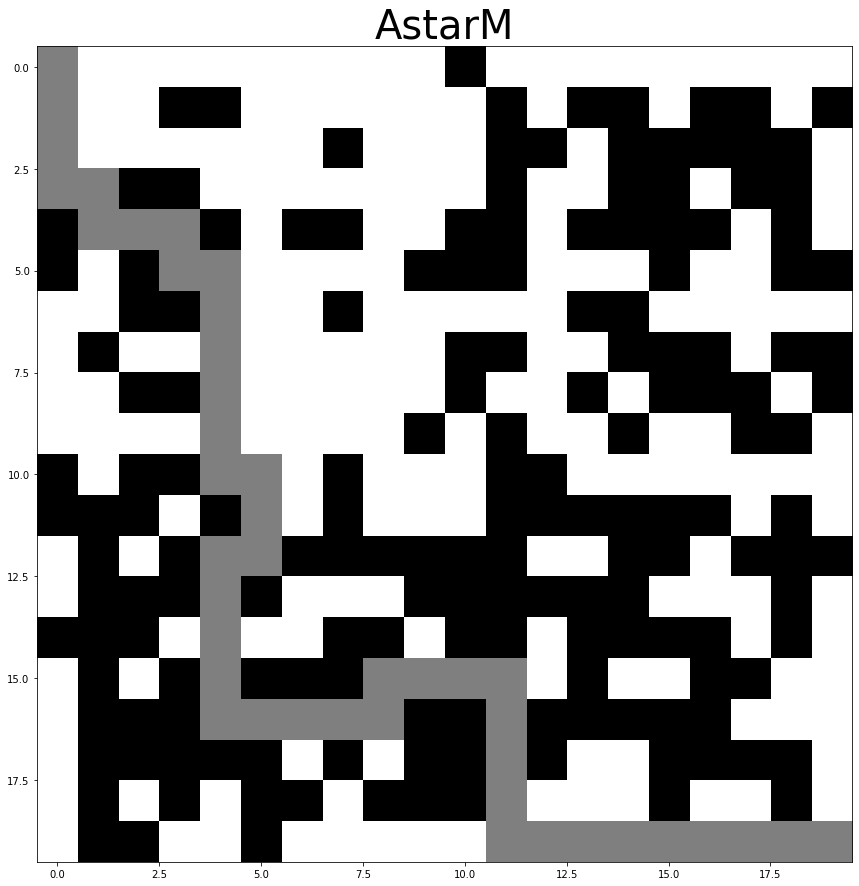

198 197
fails 3
SOLUTION FOUND


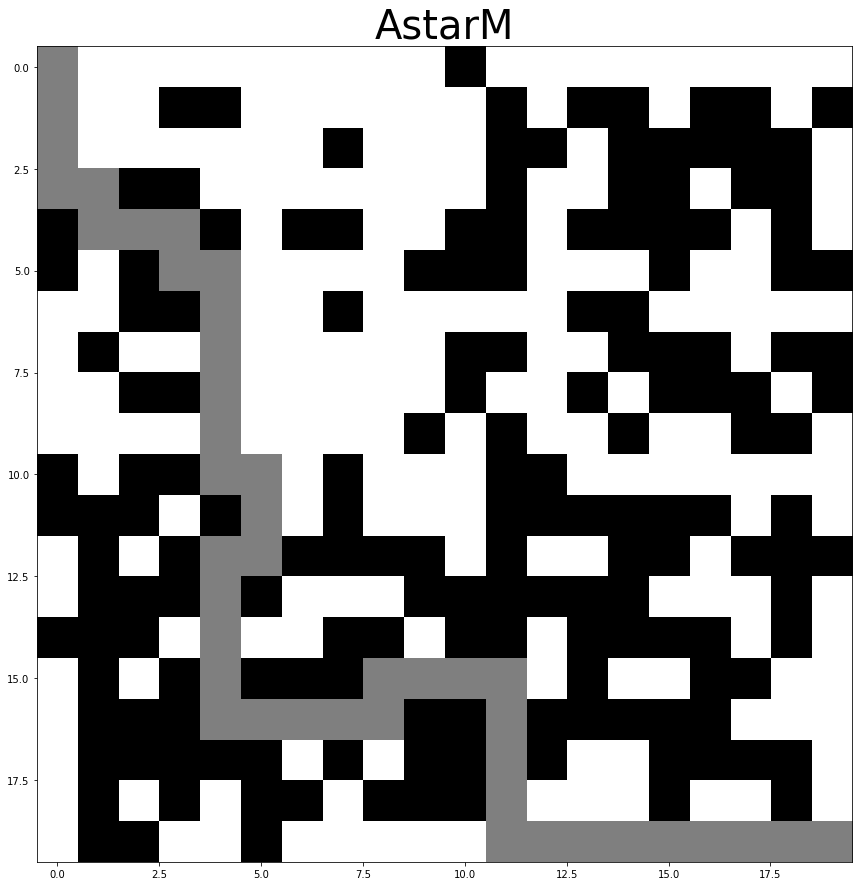

SOLUTION FOUND


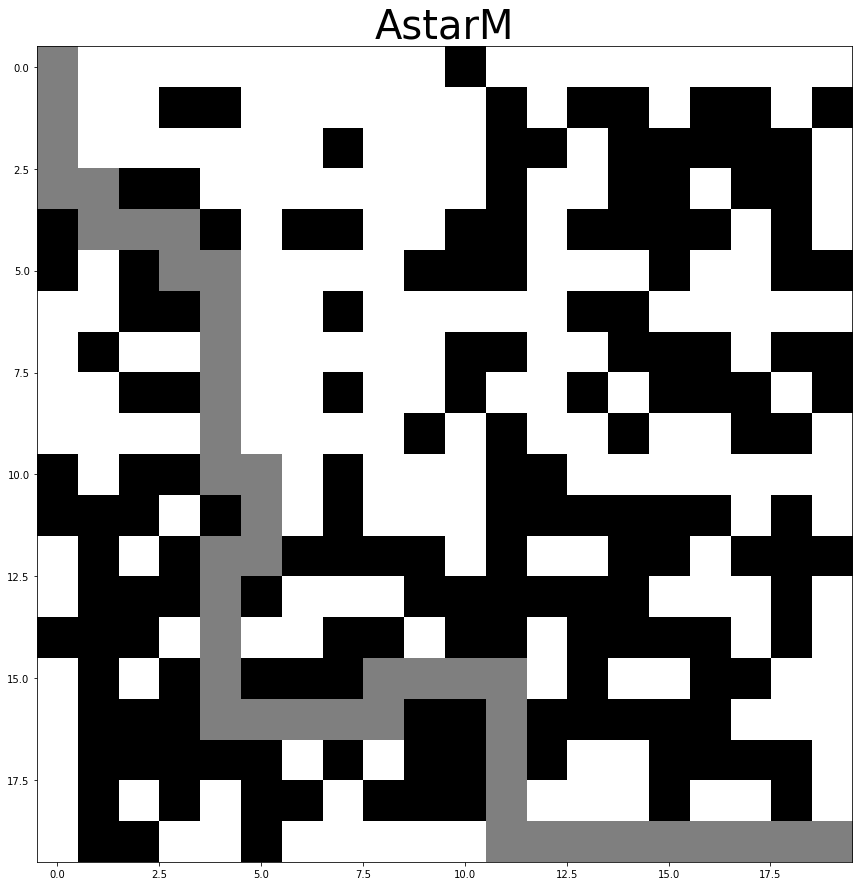

198 194
fails 4
SOLUTION FOUND


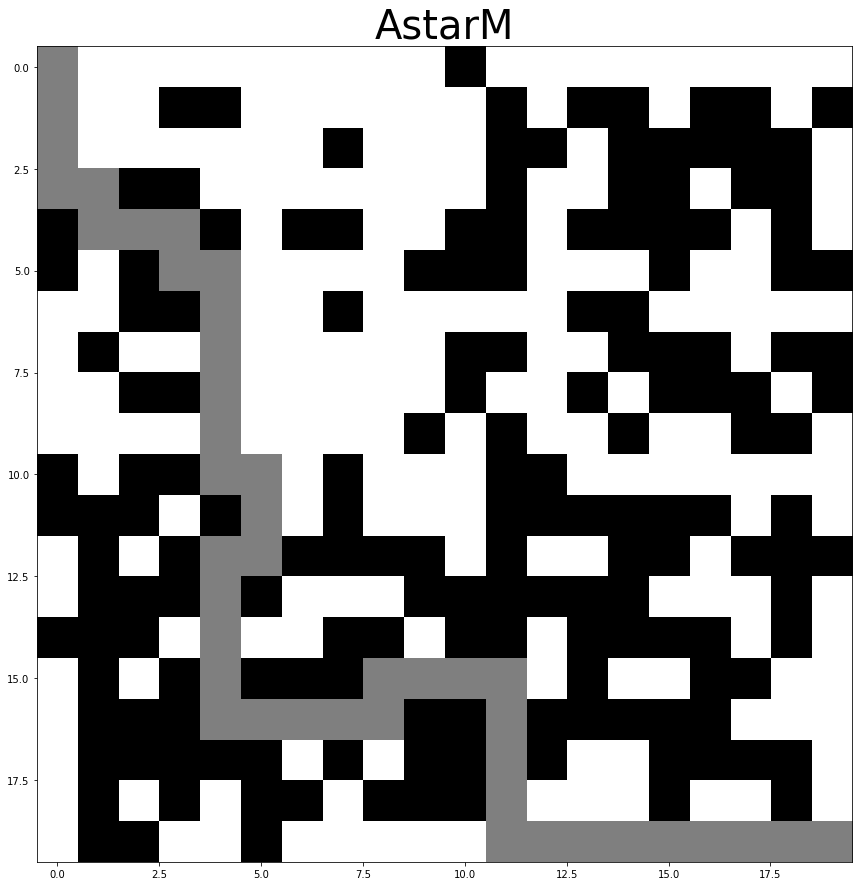

UNSOLVABLE


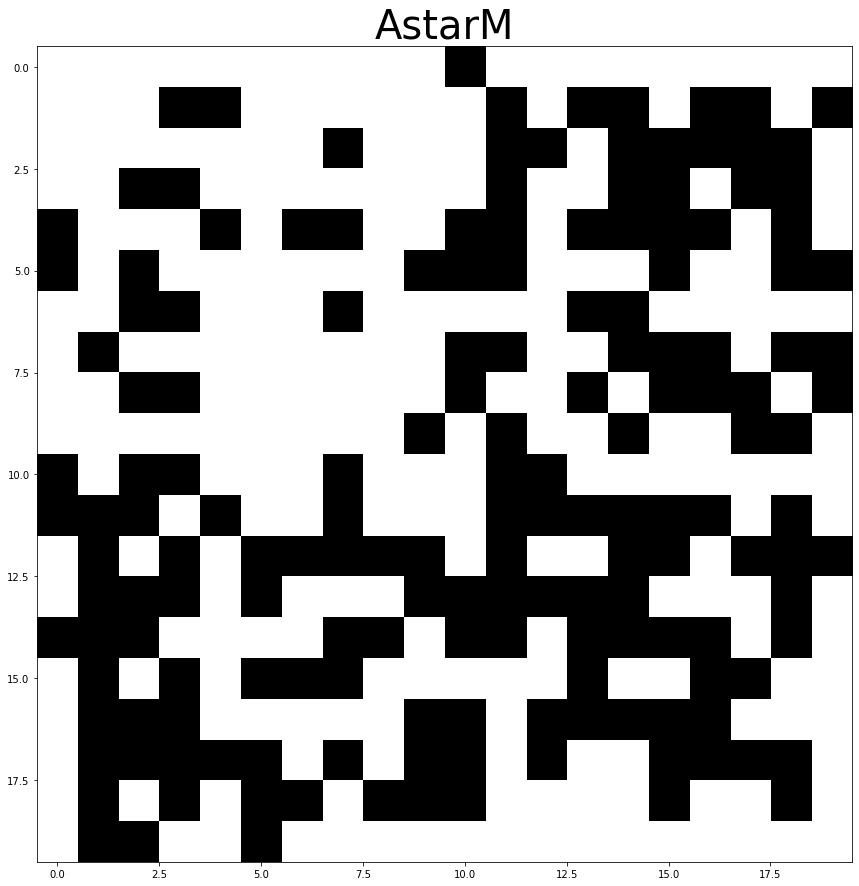

198 170
fails 5
SOLUTION FOUND


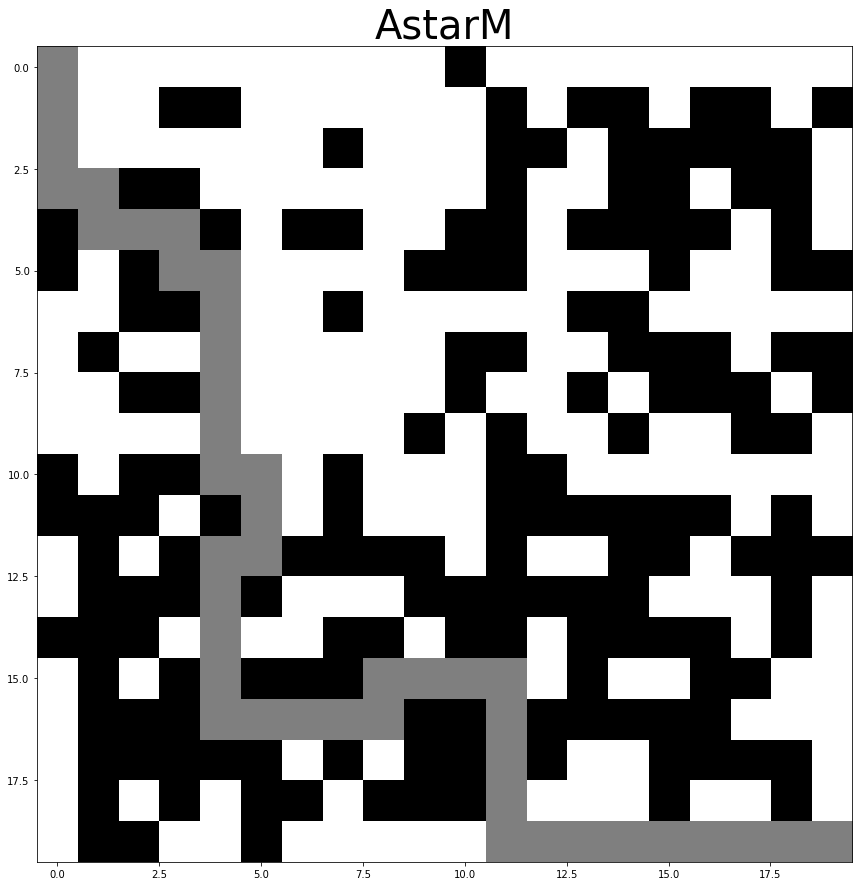

SOLUTION FOUND


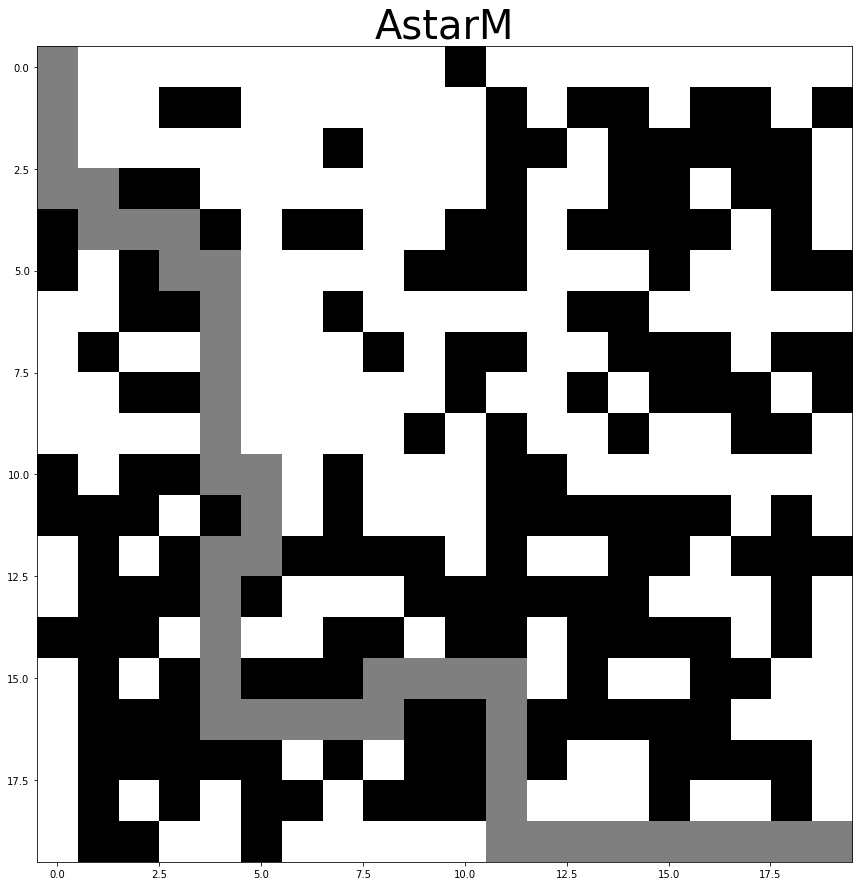

198 194
fails 6
SOLUTION FOUND


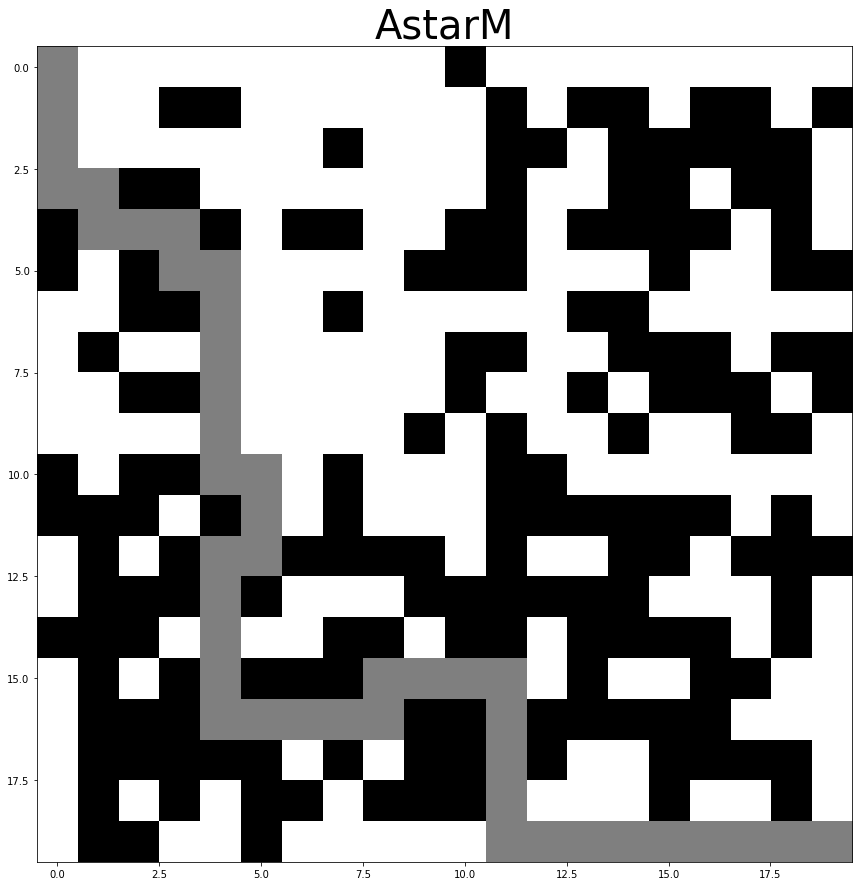

SOLUTION FOUND


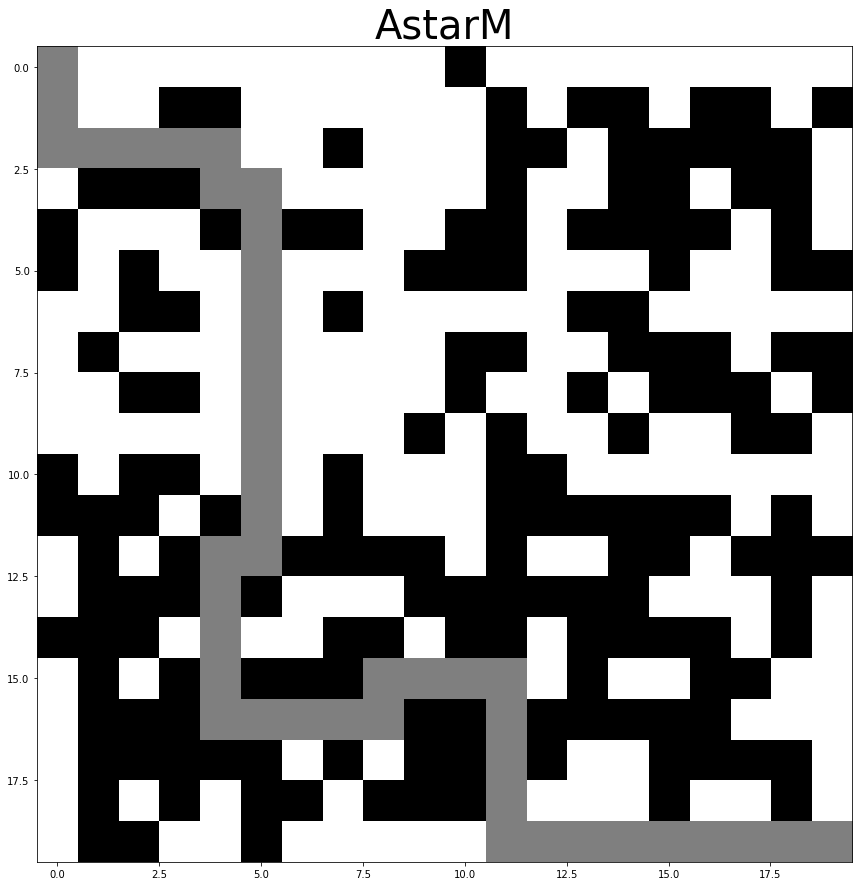

198 179
fails 7
SOLUTION FOUND


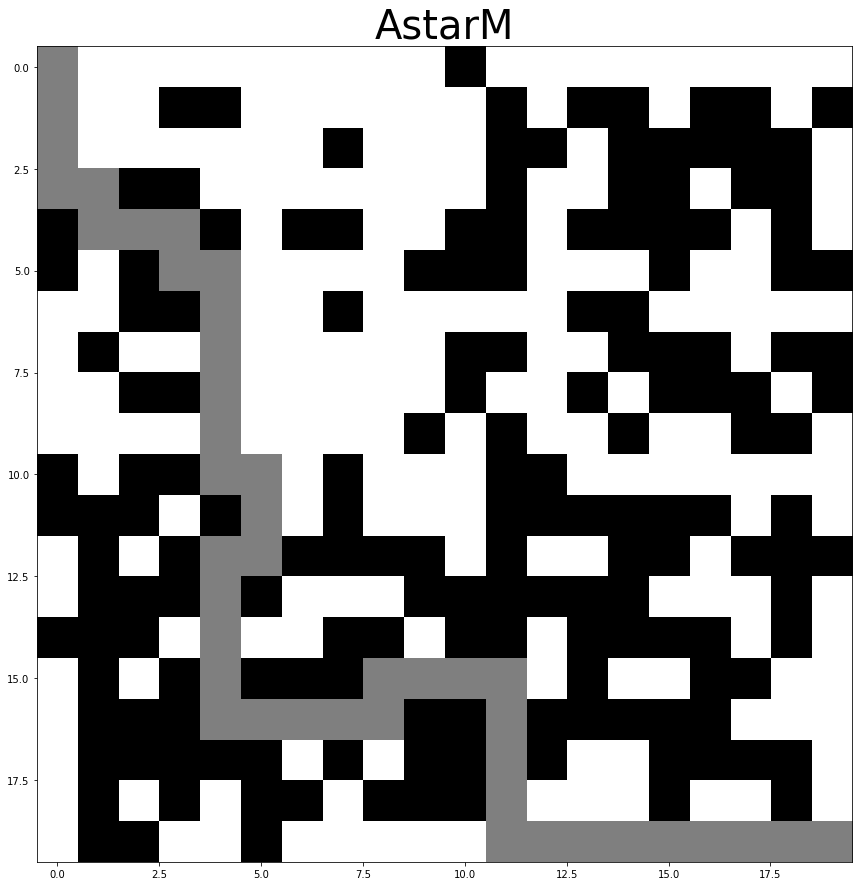

SOLUTION FOUND


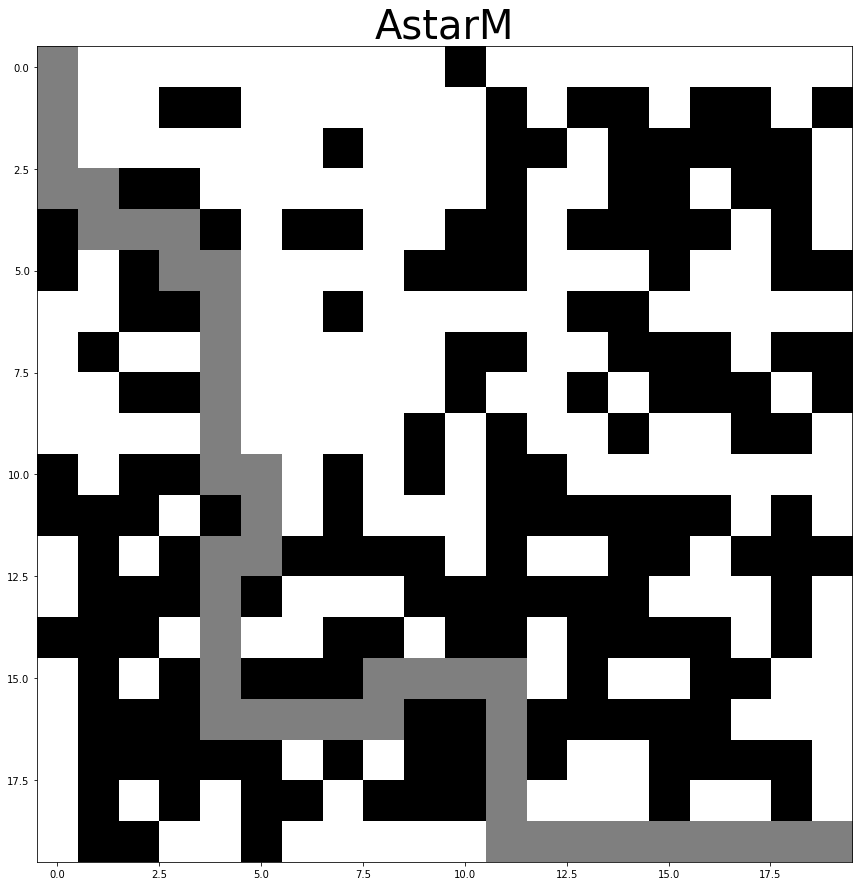

198 194
fails 8
SOLUTION FOUND


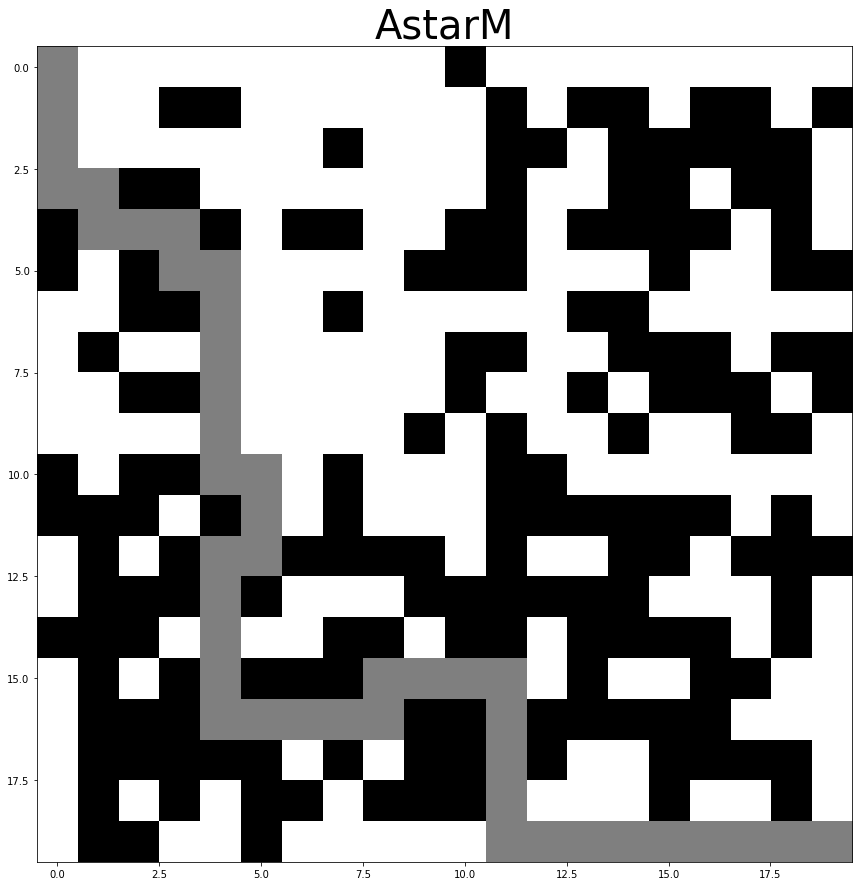

SOLUTION FOUND


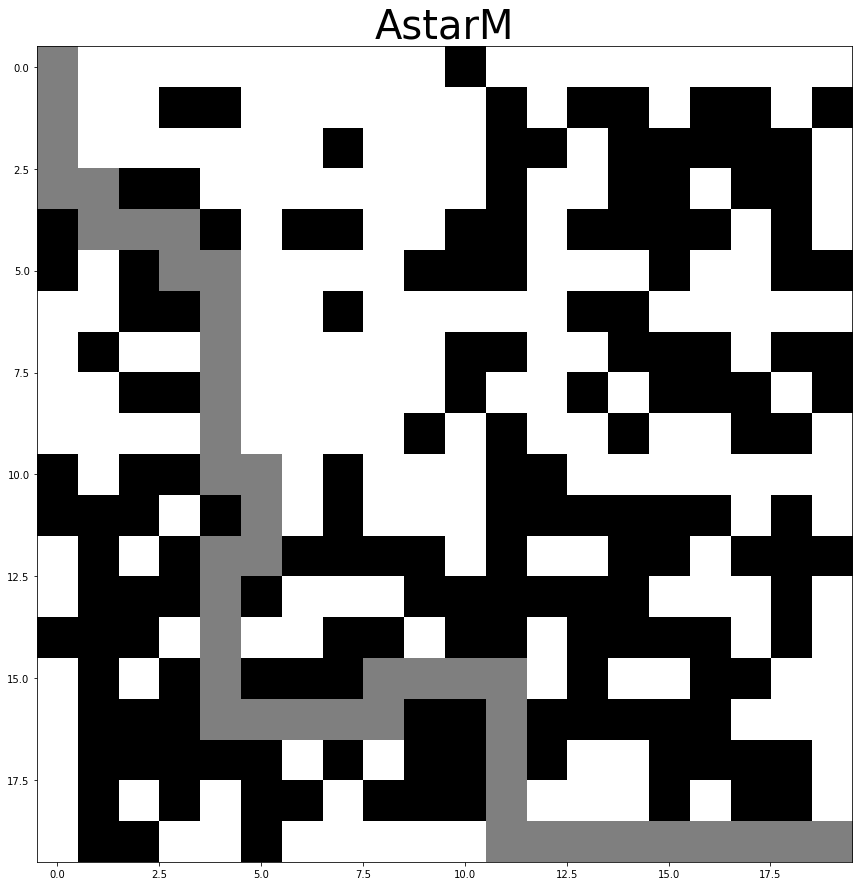

198 198
fails 0
SOLUTION FOUND


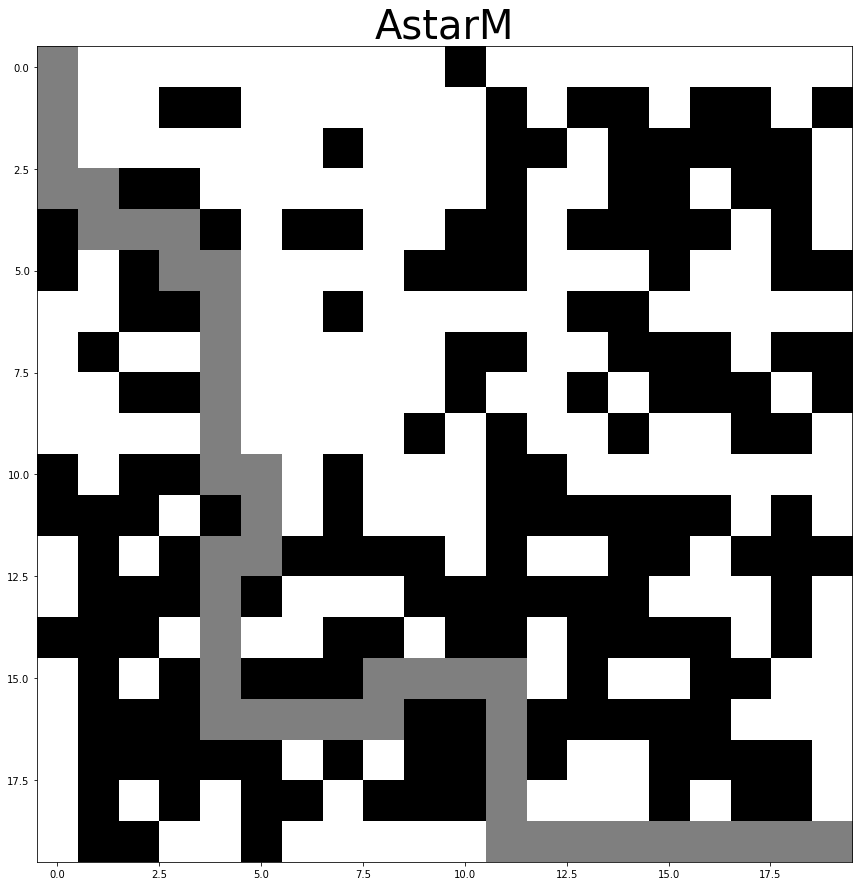

SOLUTION FOUND


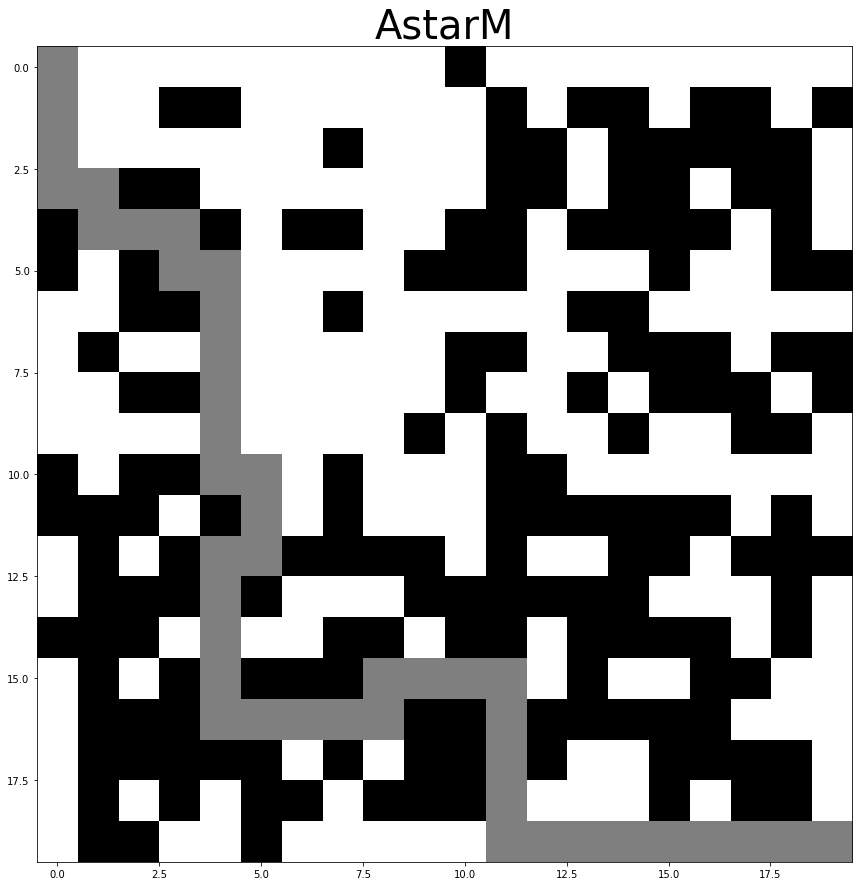

198 198
fails 0
SOLUTION FOUND


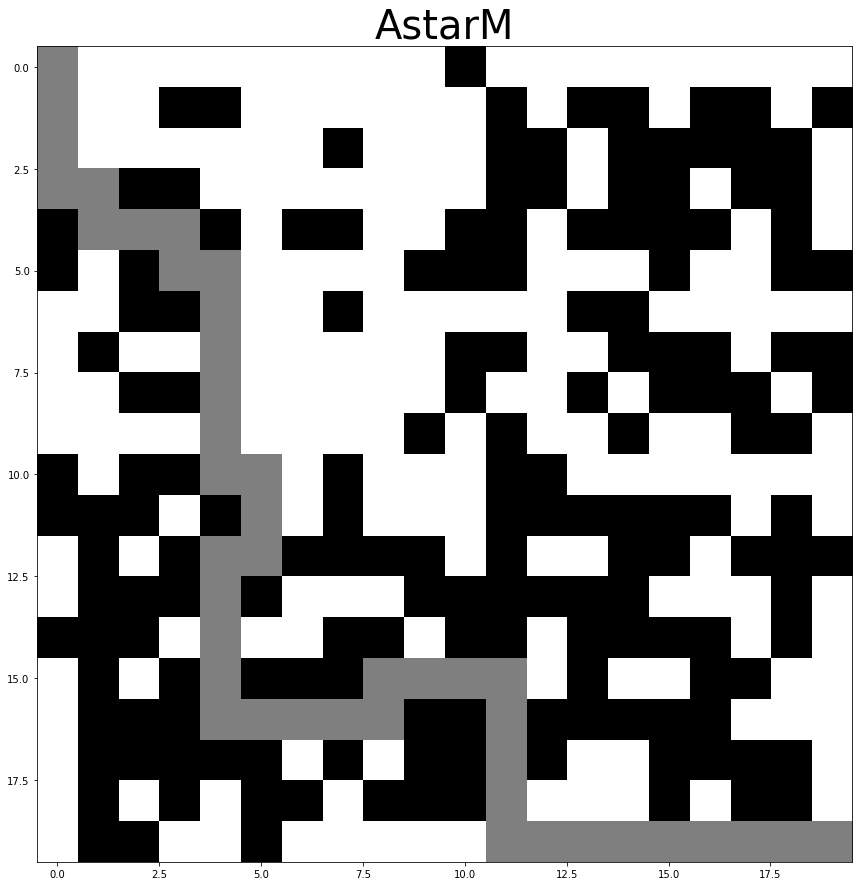

SOLUTION FOUND


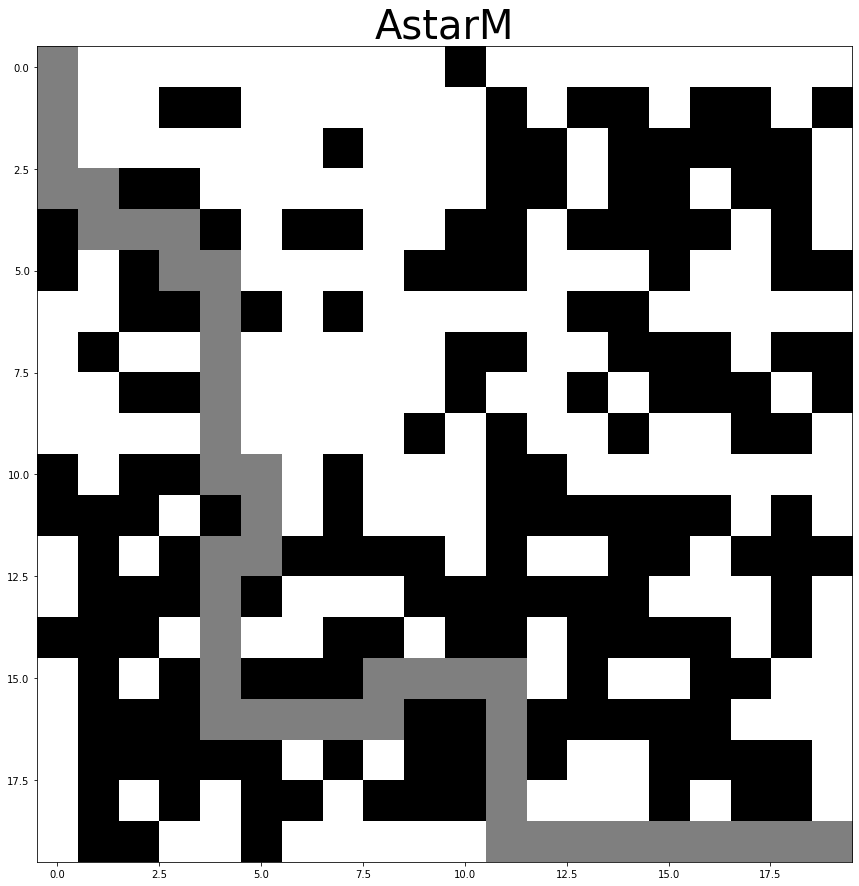

198 194
fails 1
SOLUTION FOUND


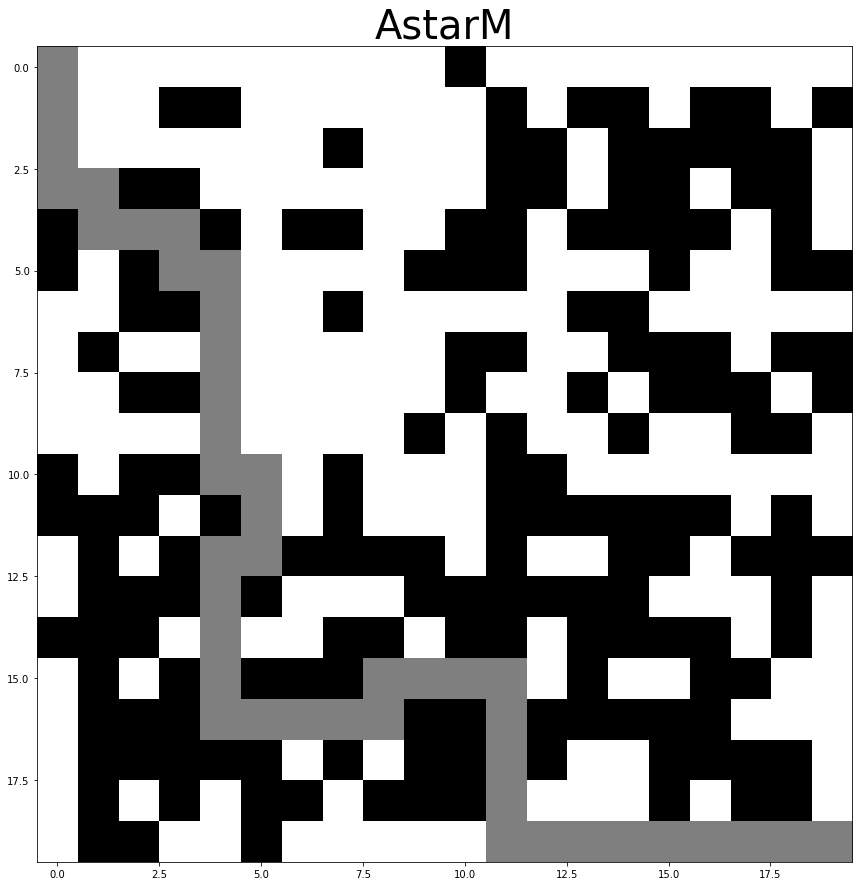

SOLUTION FOUND


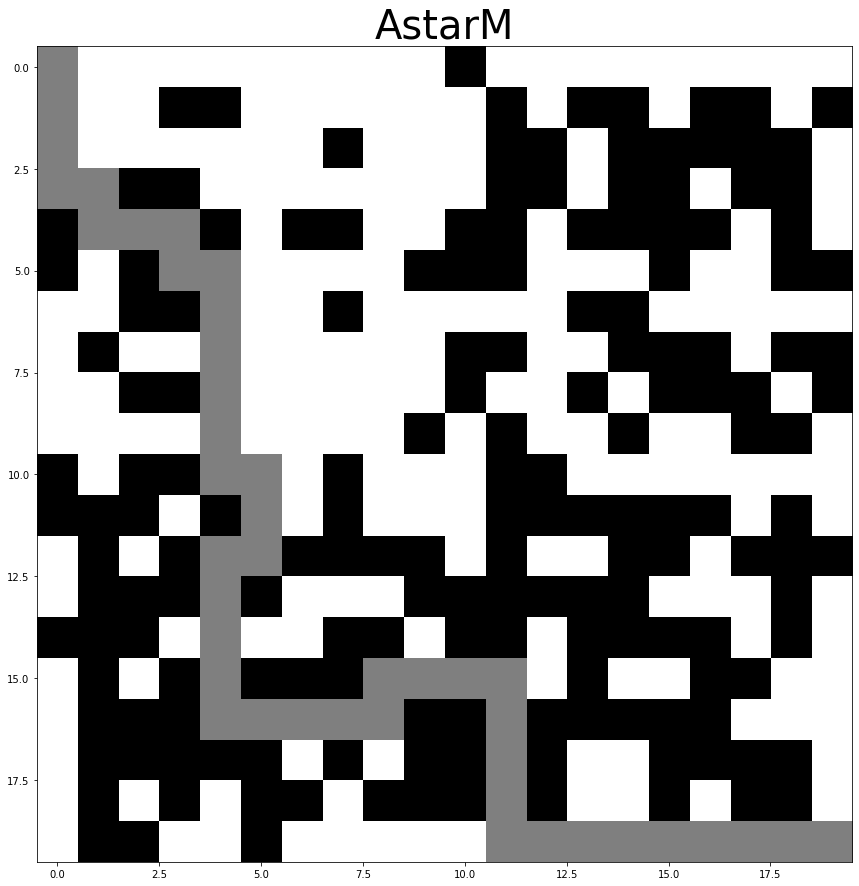

198 198
fails 0
SOLUTION FOUND


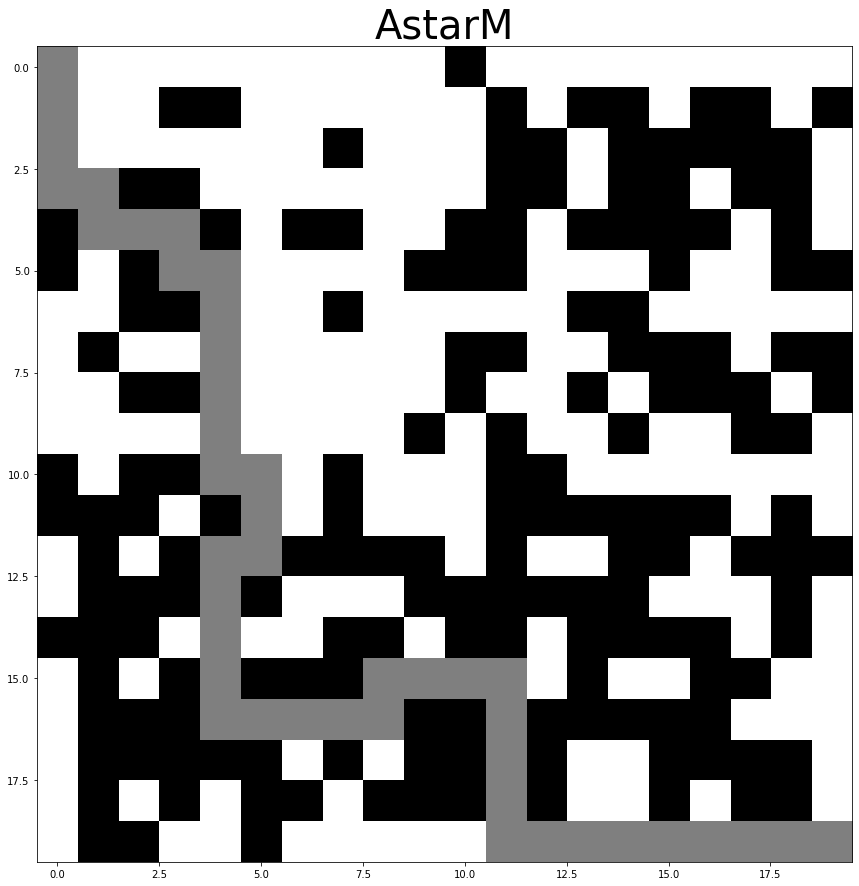

SOLUTION FOUND


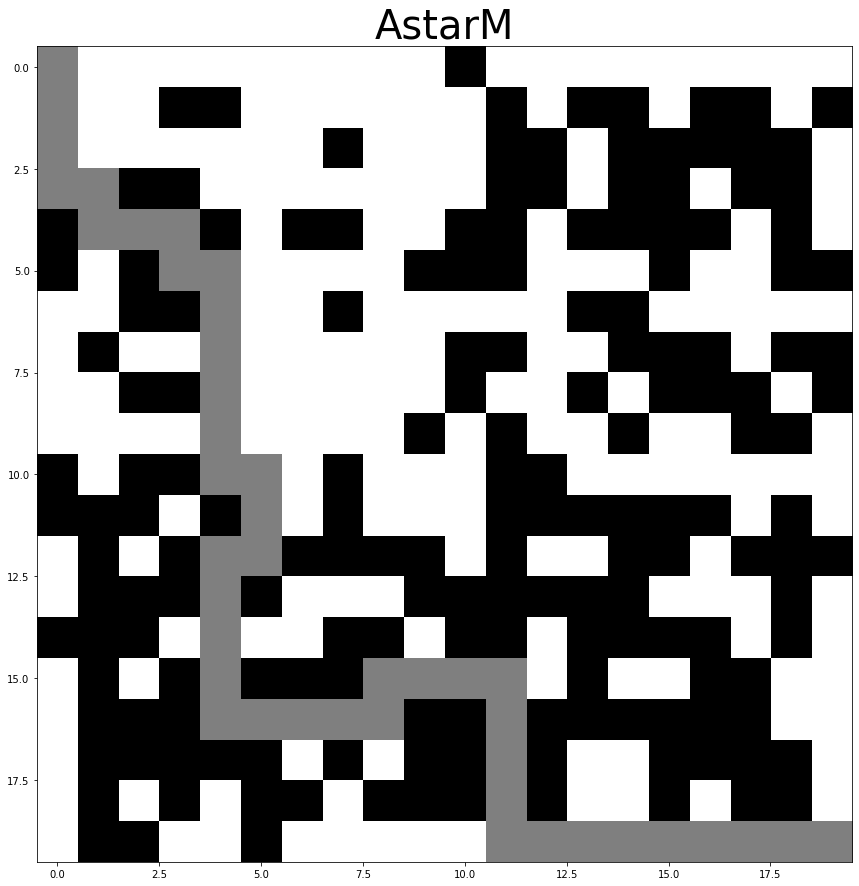

198 198
fails 0
SOLUTION FOUND


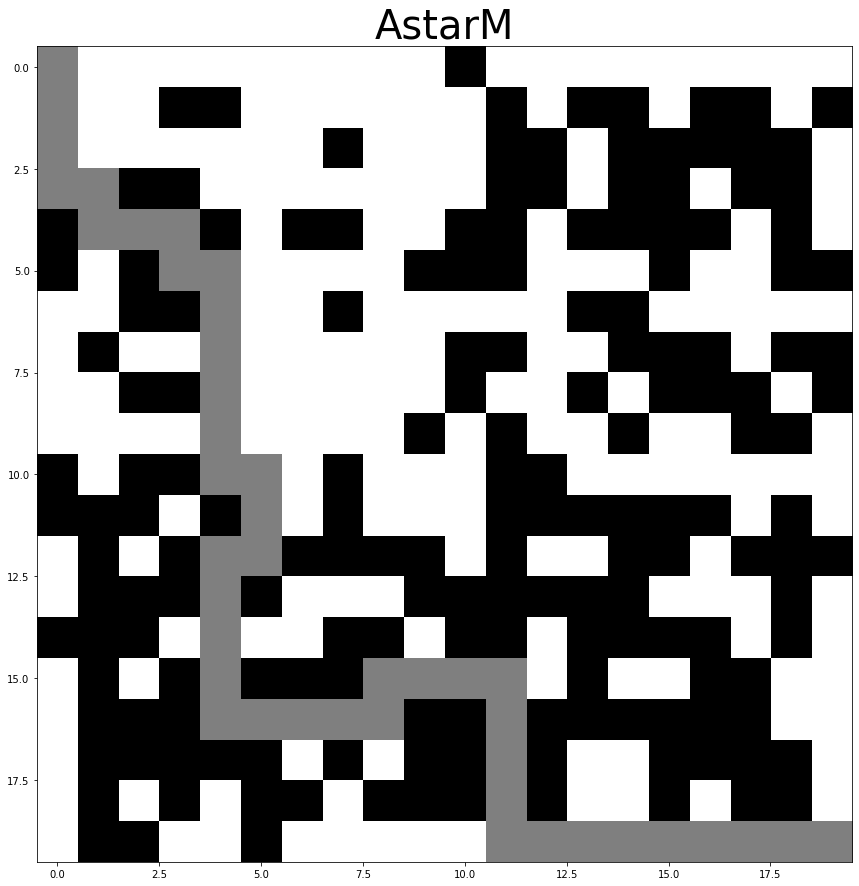

SOLUTION FOUND


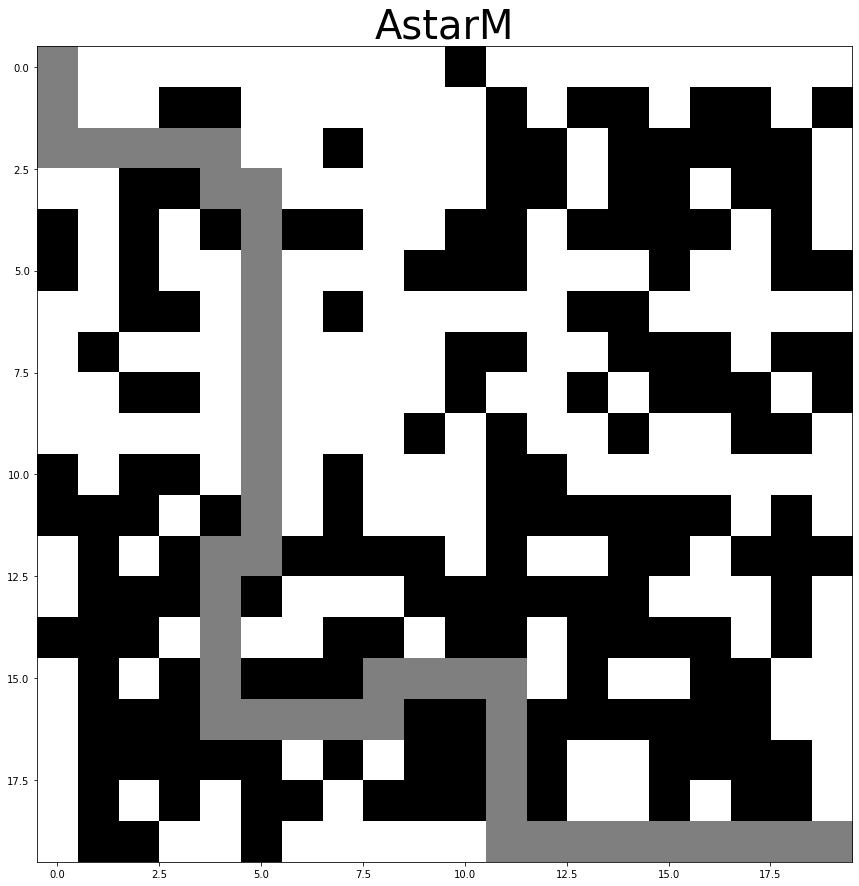

198 194
fails 1
SOLUTION FOUND


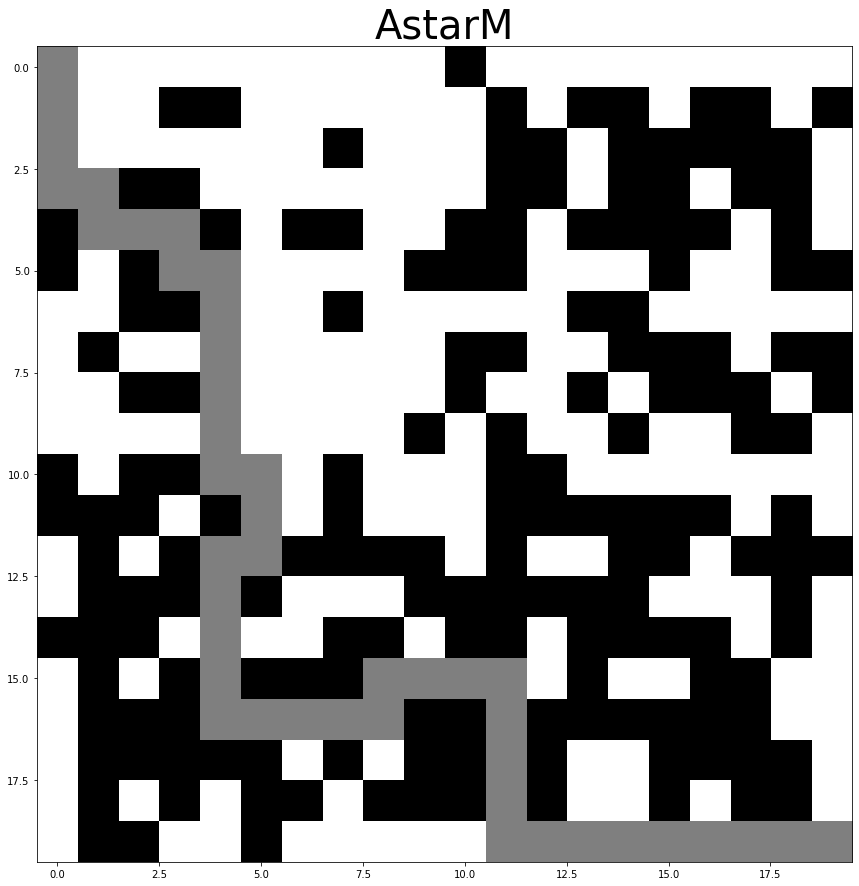

SOLUTION FOUND


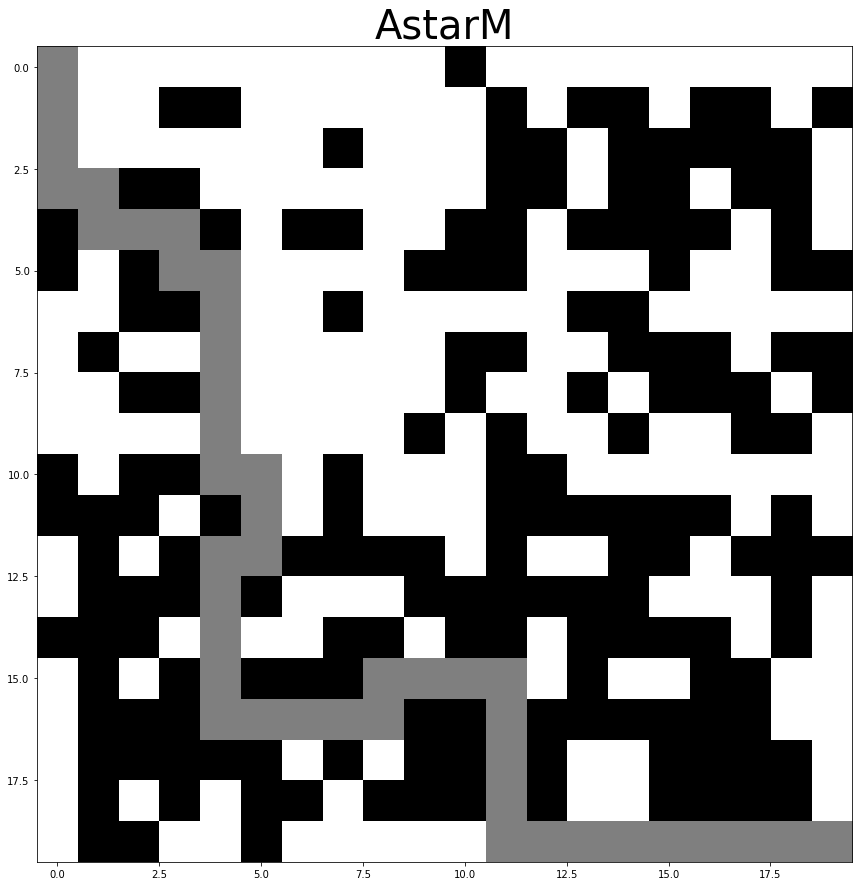

198 198
fails 0
SOLUTION FOUND


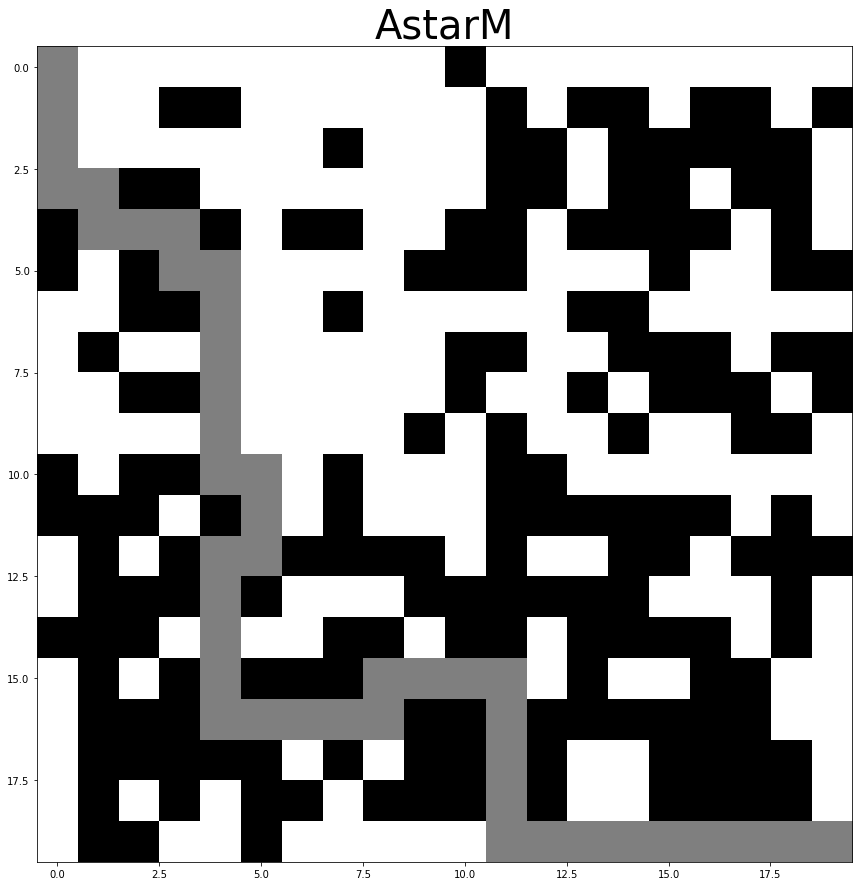

SOLUTION FOUND


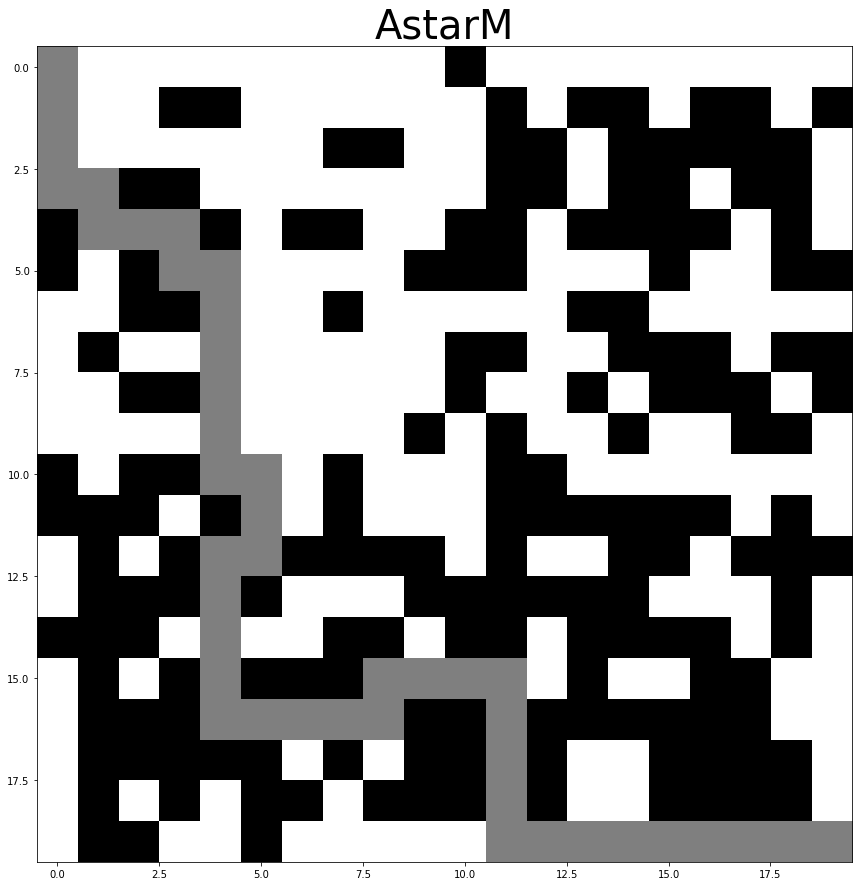

198 195
fails 1
SOLUTION FOUND


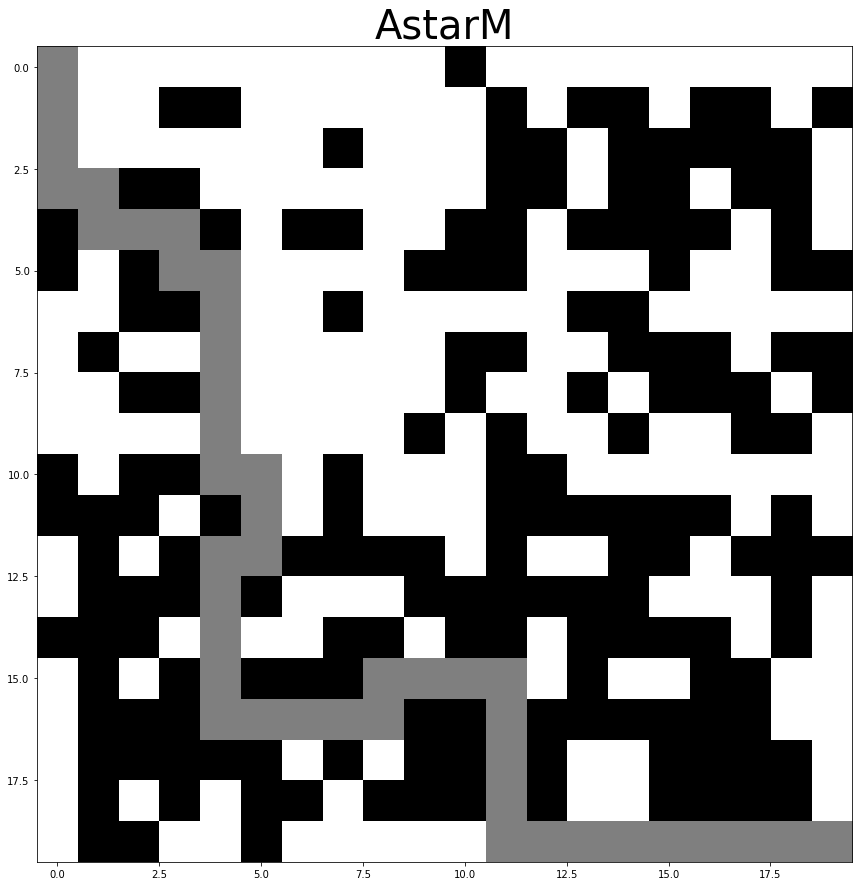

SOLUTION FOUND


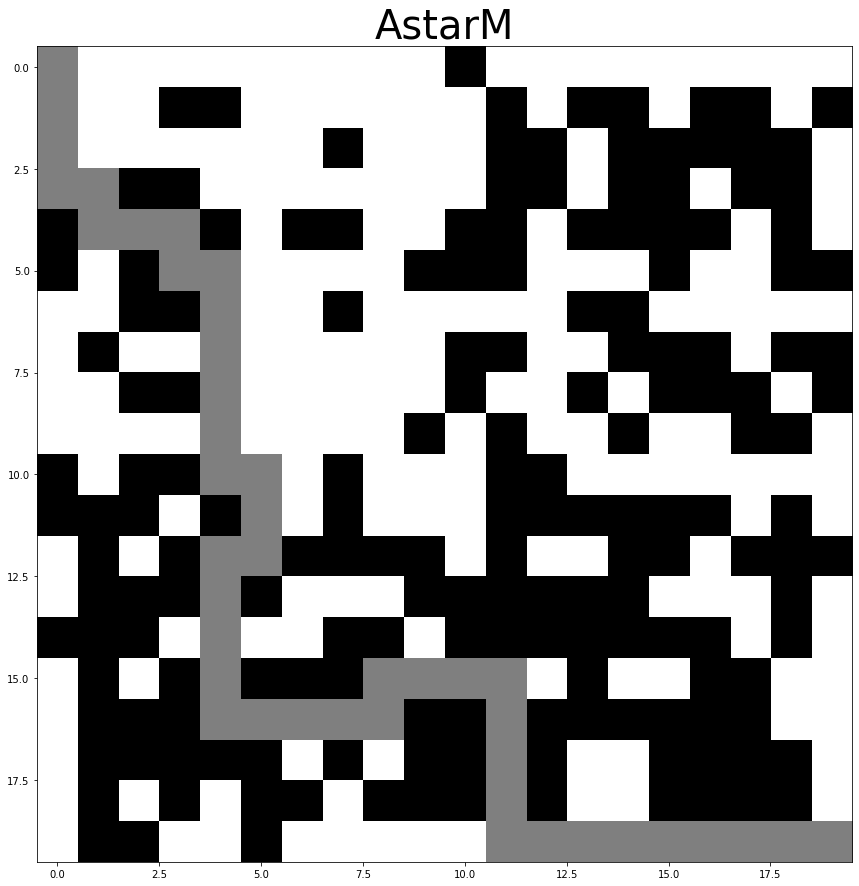

198 198
fails 0
SOLUTION FOUND


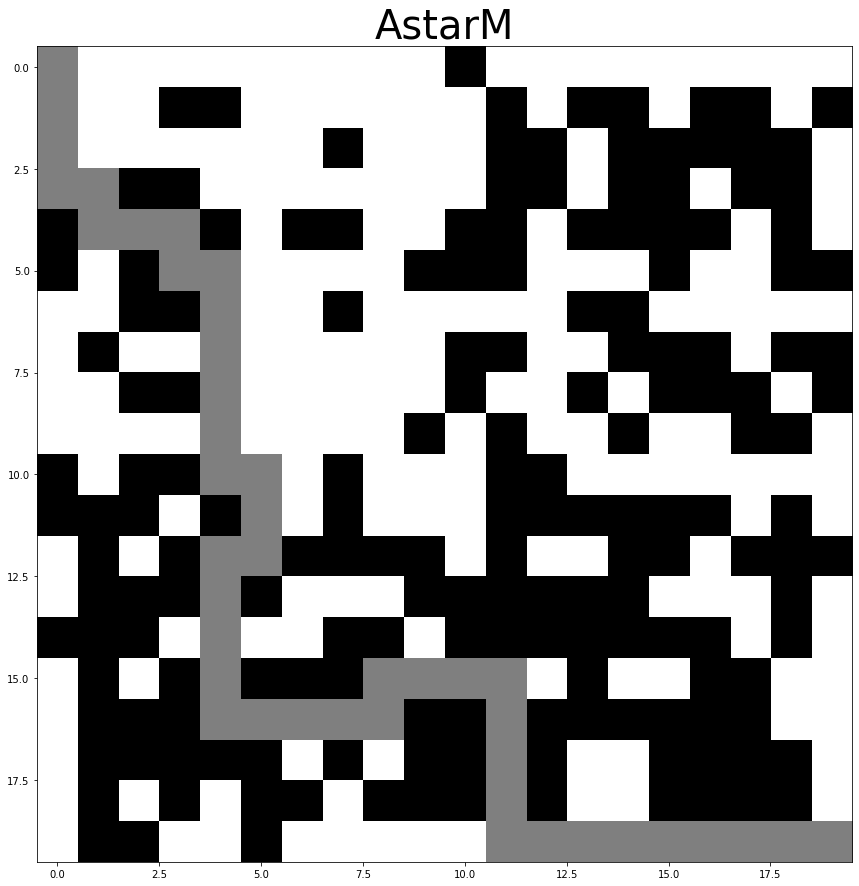

SOLUTION FOUND


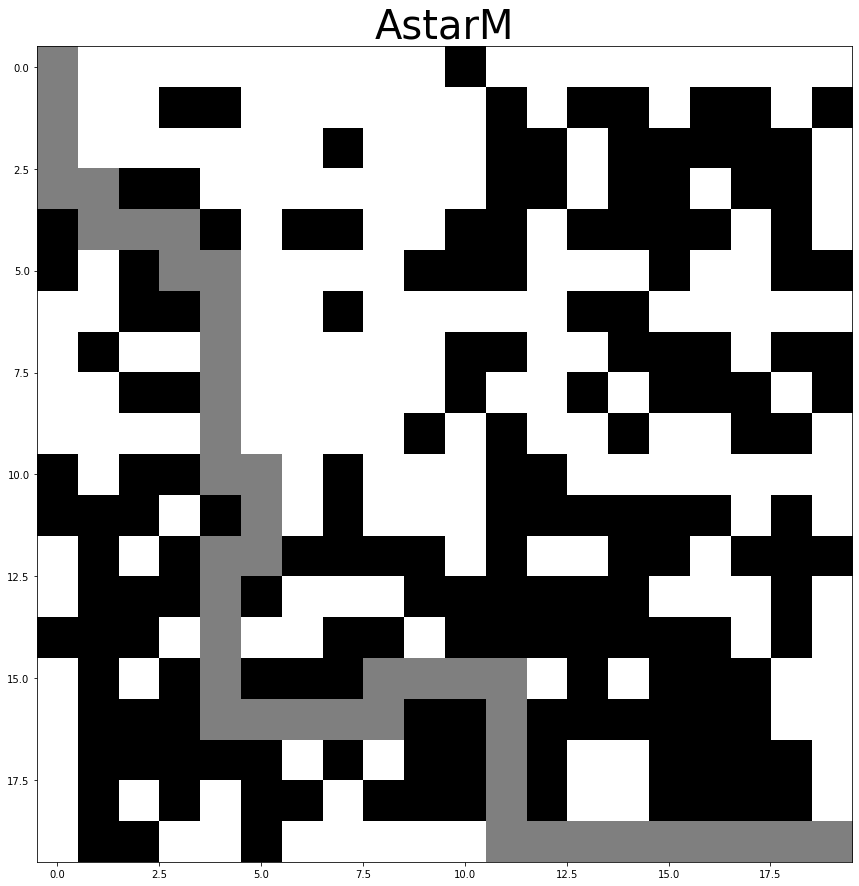

198 198
fails 0
SOLUTION FOUND


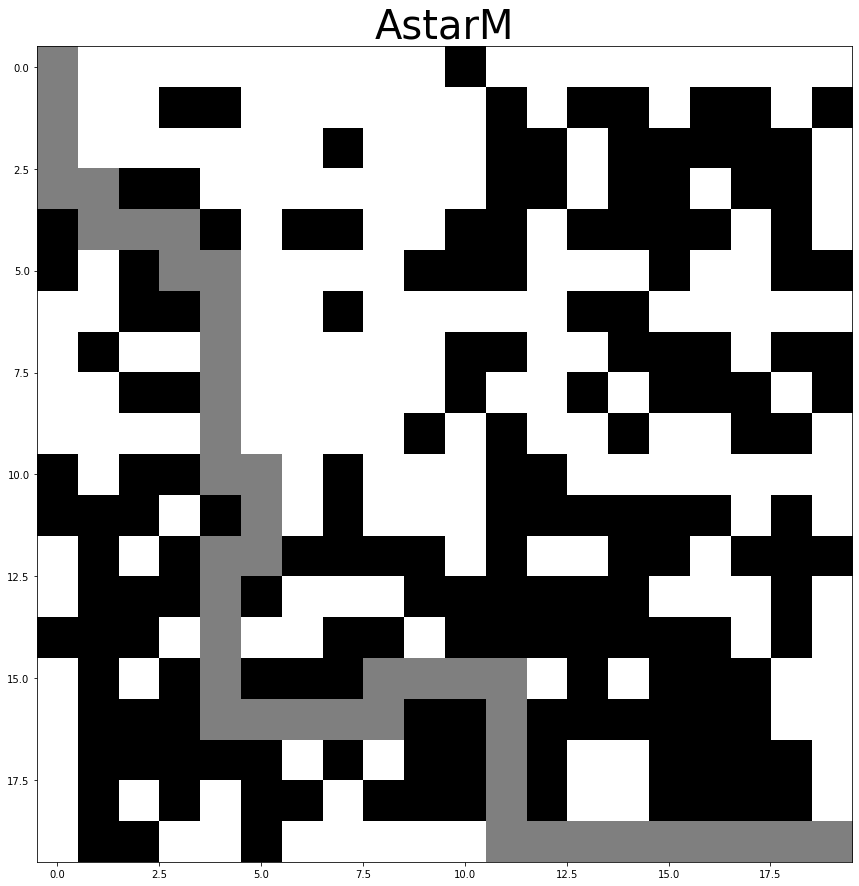

SOLUTION FOUND


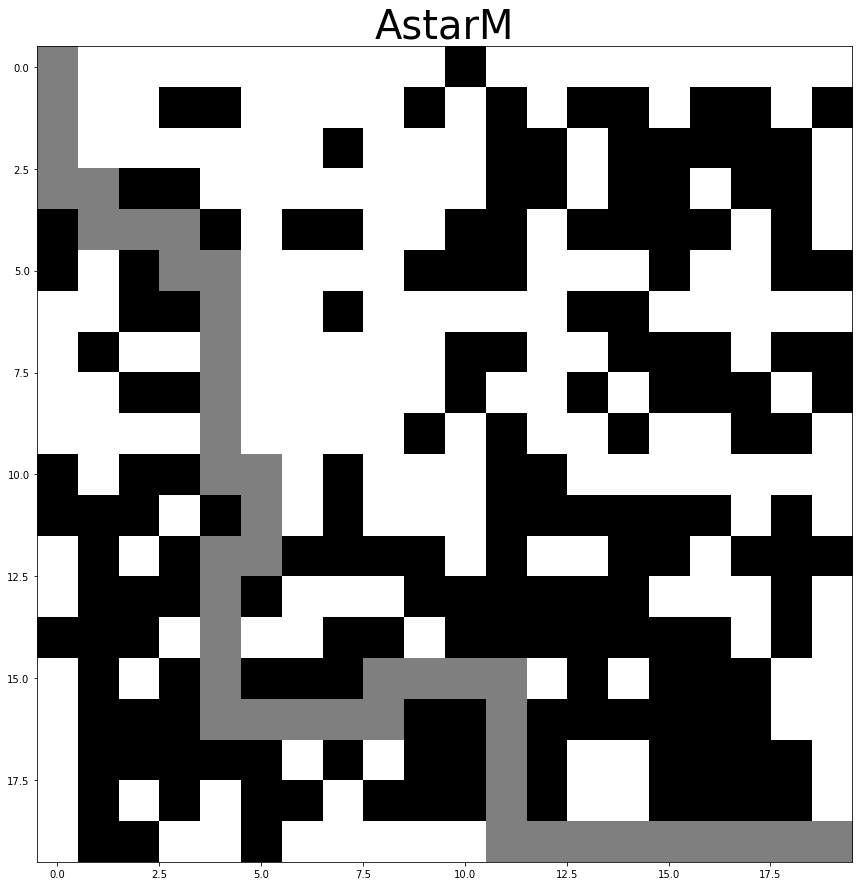

198 194
fails 1
SOLUTION FOUND


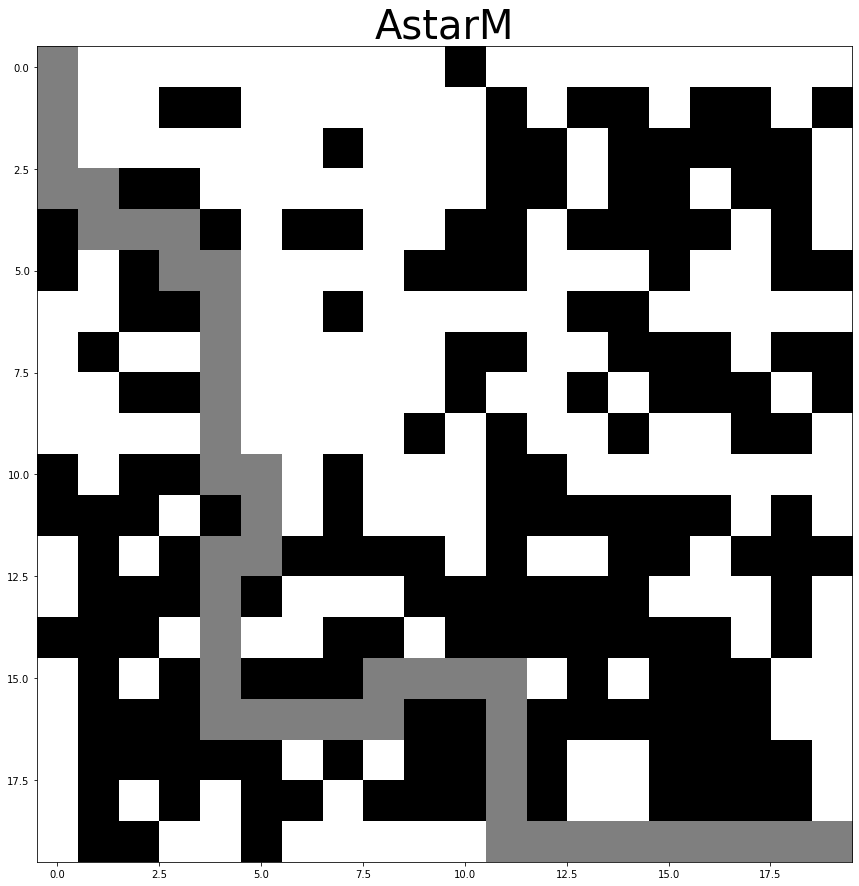

UNSOLVABLE


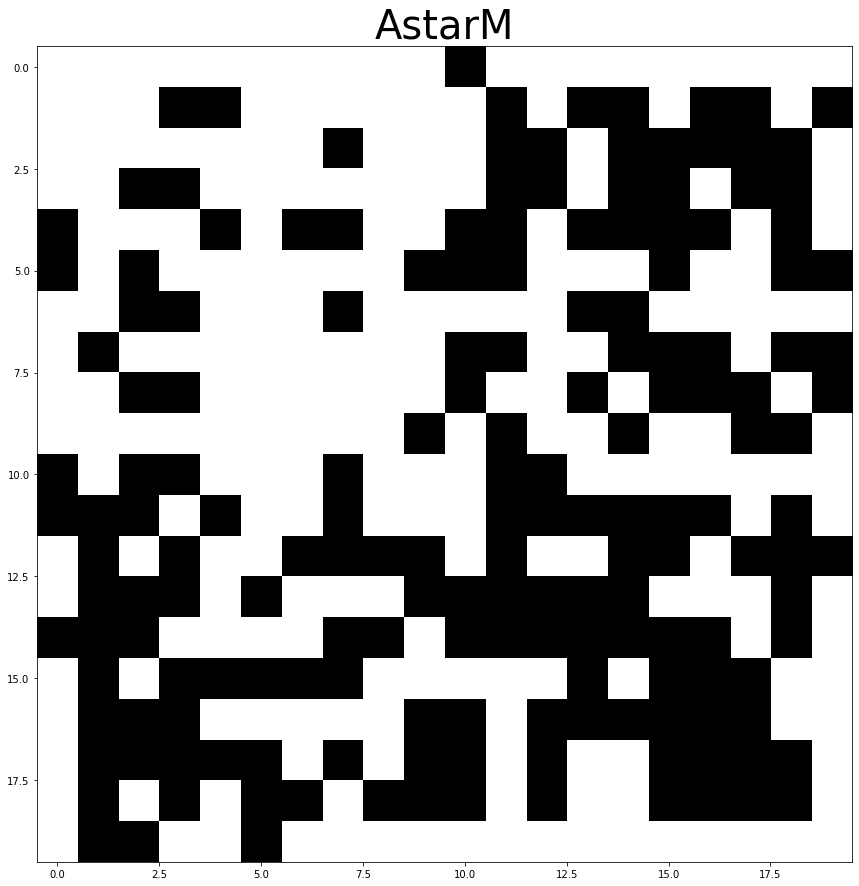

198 177
fails 2
SOLUTION FOUND


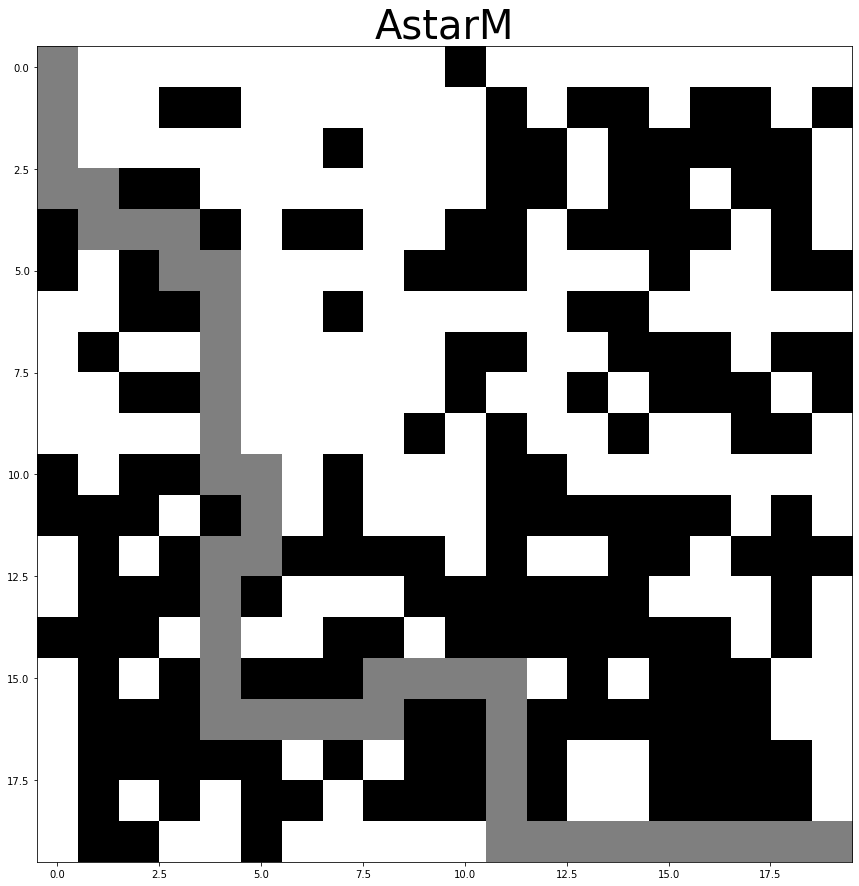

SOLUTION FOUND


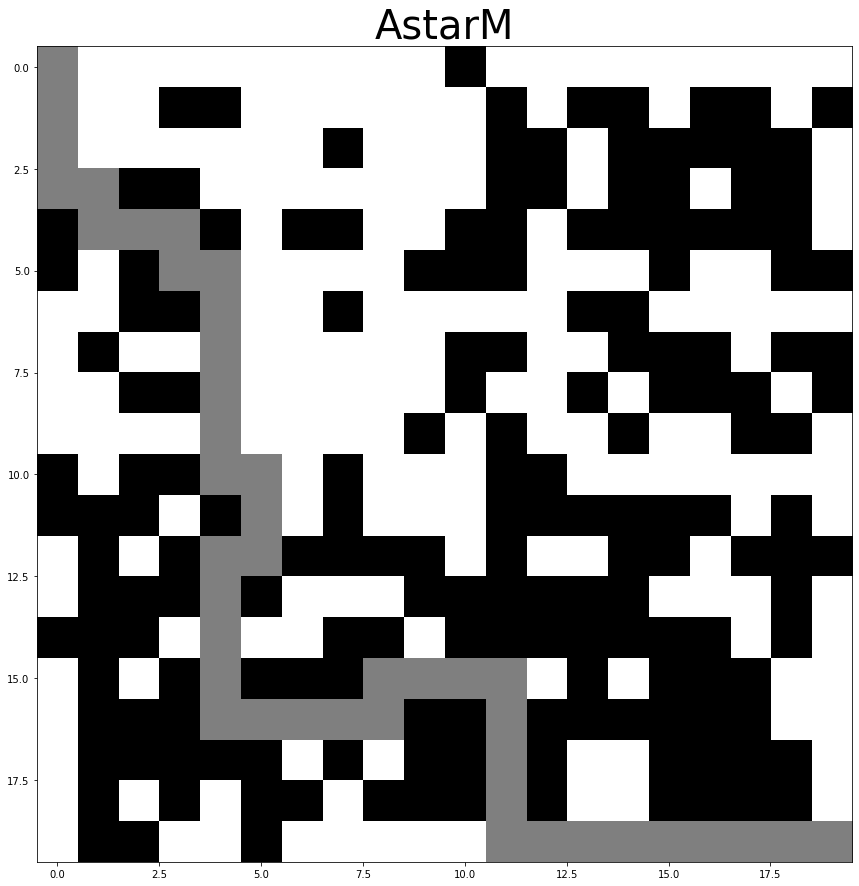

198 198
fails 0
SOLUTION FOUND


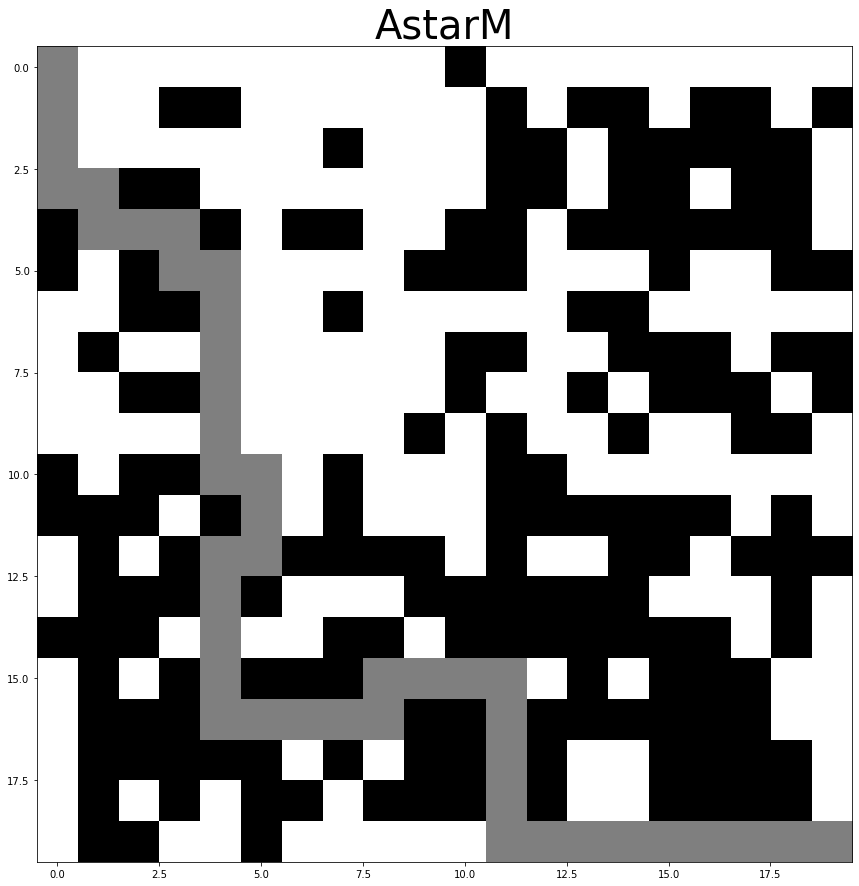

UNSOLVABLE


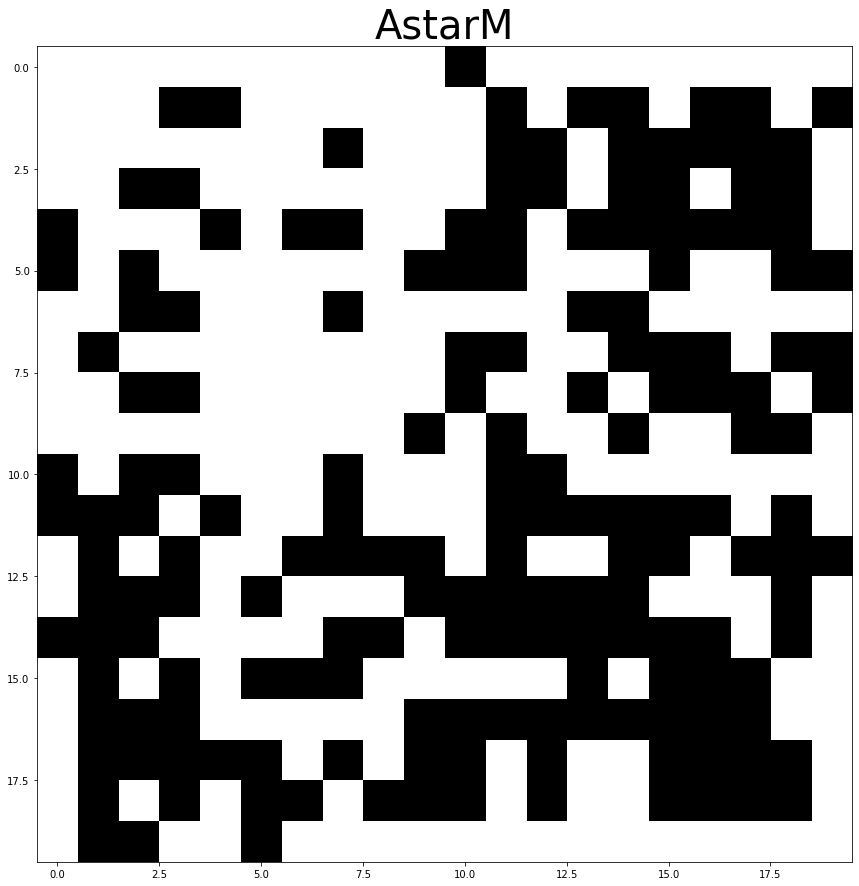

198 191
fails 1
SOLUTION FOUND


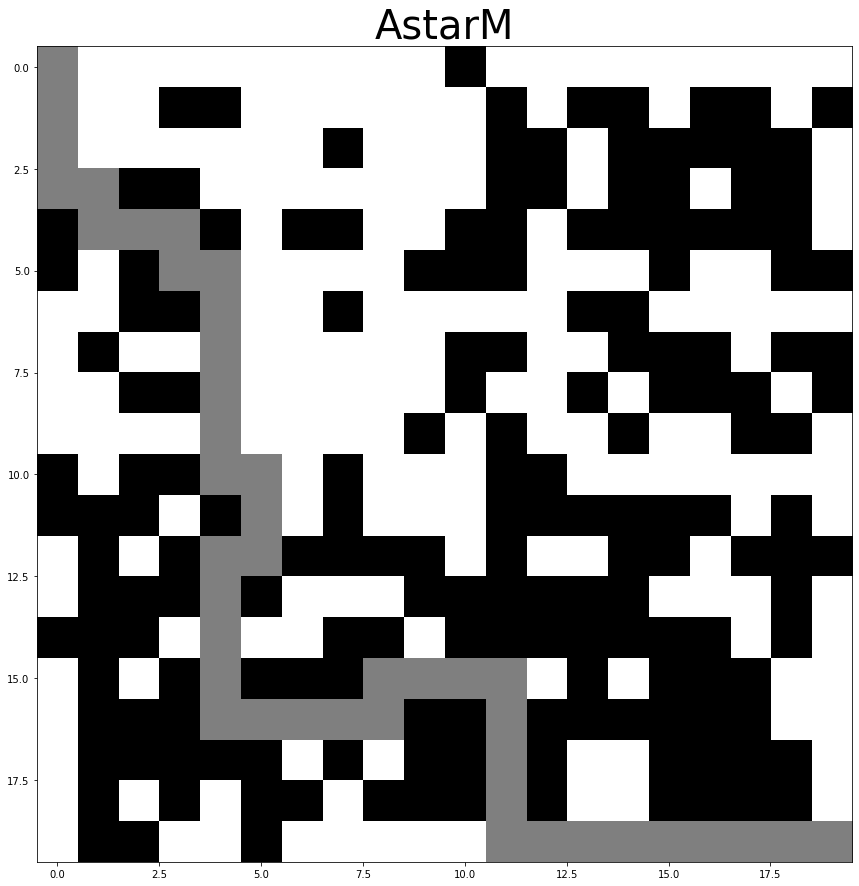

SOLUTION FOUND


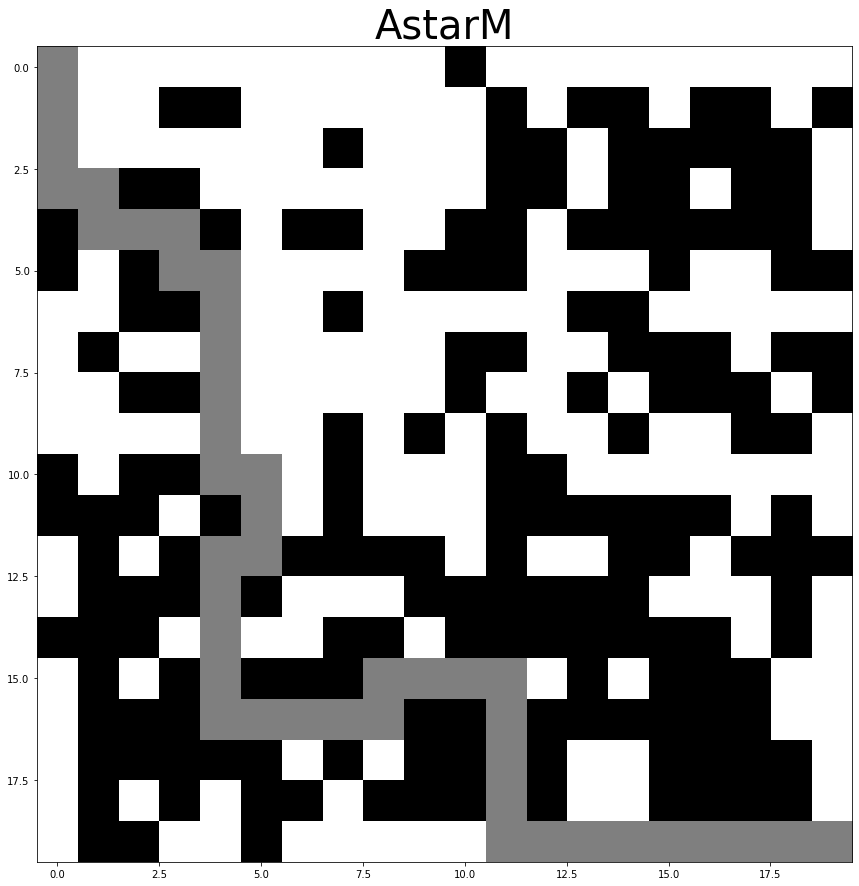

198 195
fails 2
SOLUTION FOUND


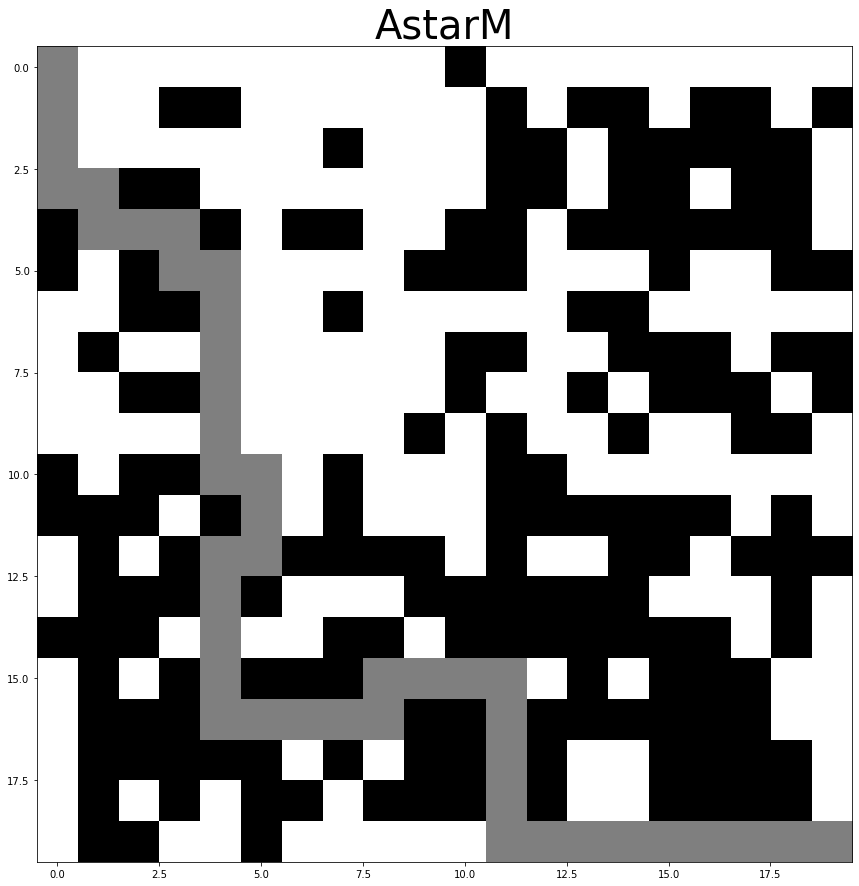

SOLUTION FOUND


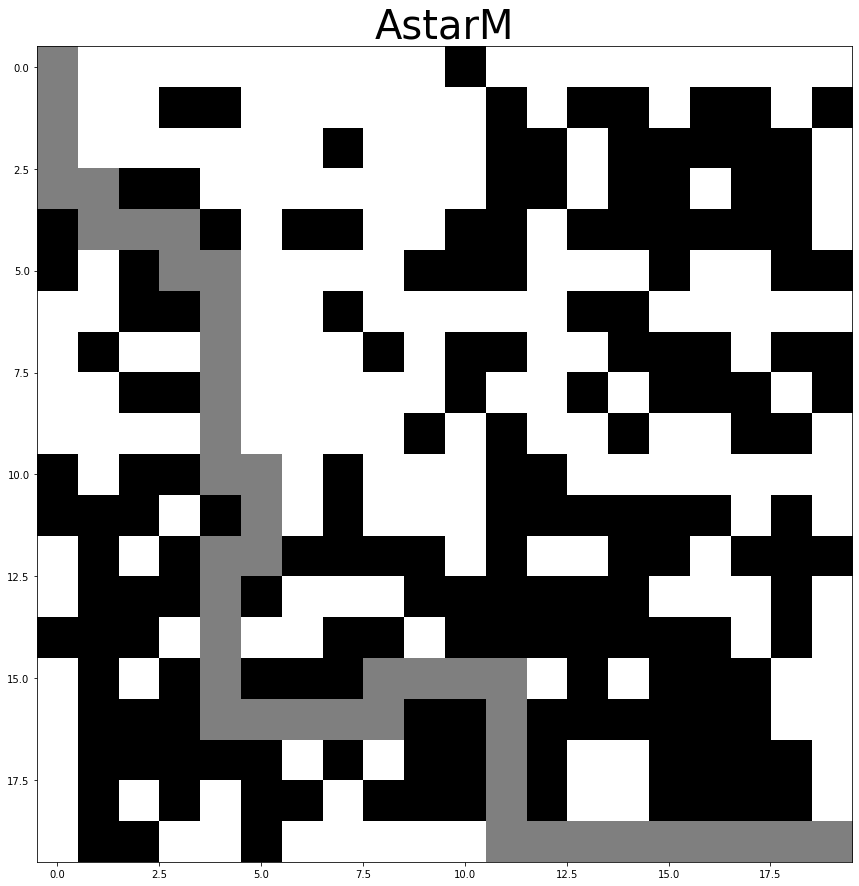

198 194
fails 3
SOLUTION FOUND


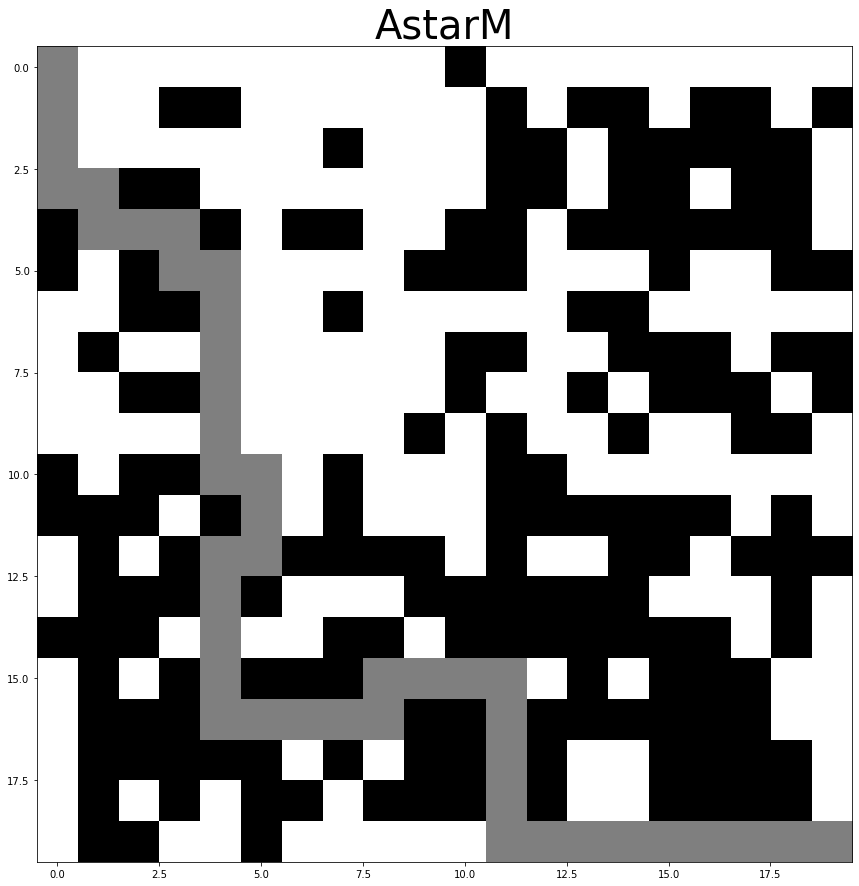

UNSOLVABLE


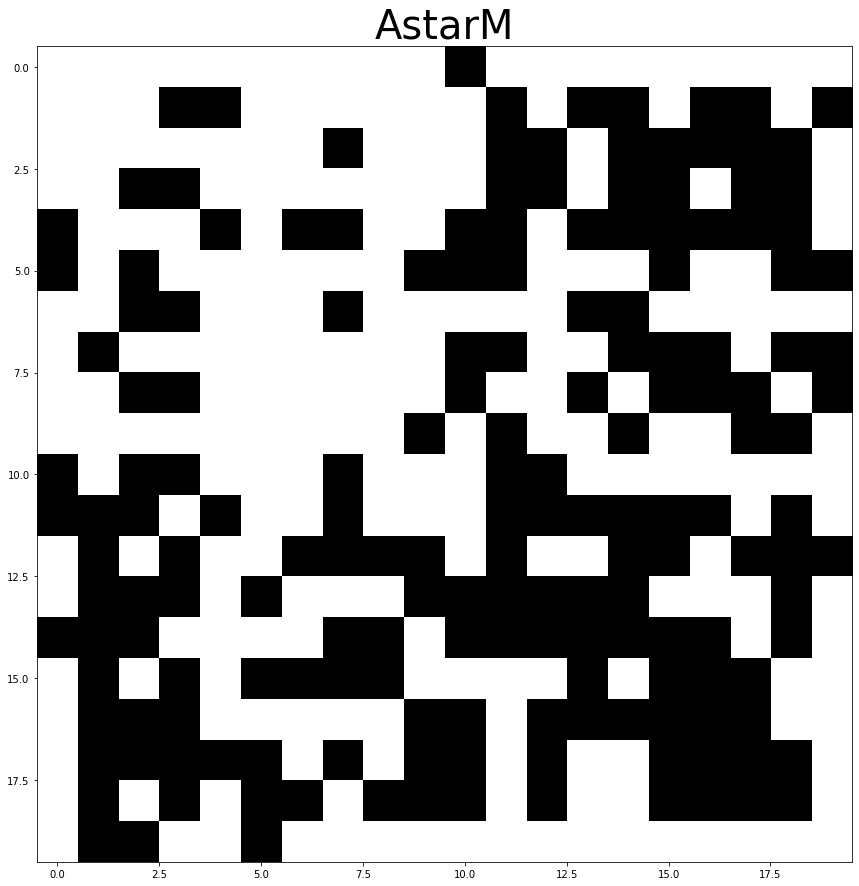

198 185
fails 4
SOLUTION FOUND


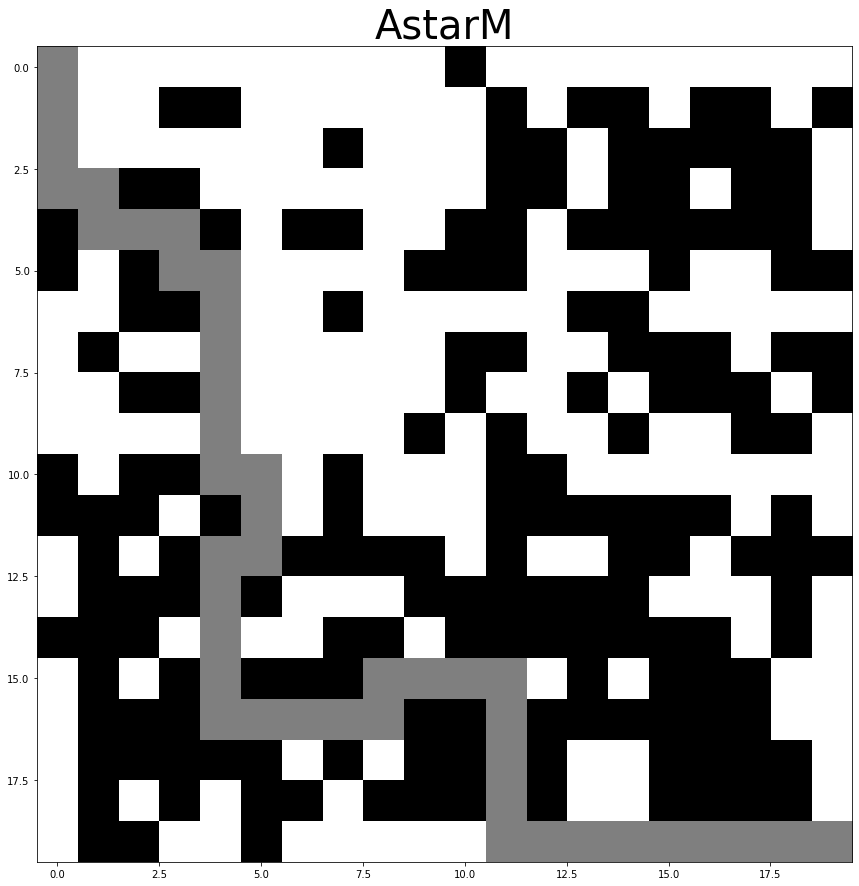

SOLUTION FOUND


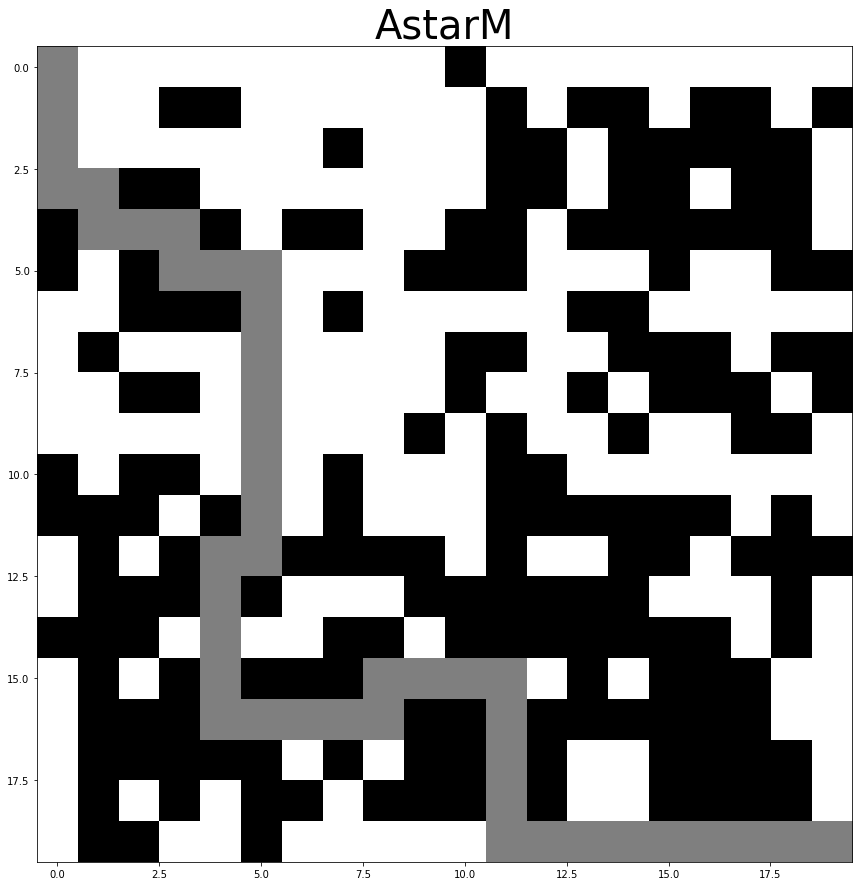

198 194
fails 5
SOLUTION FOUND


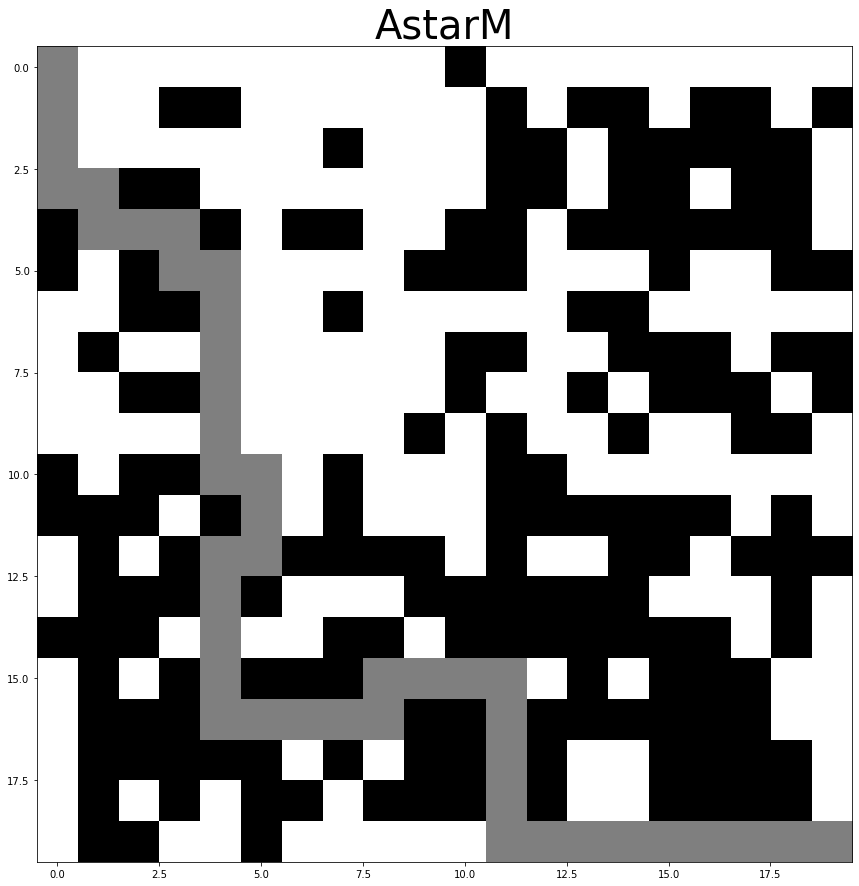

UNSOLVABLE


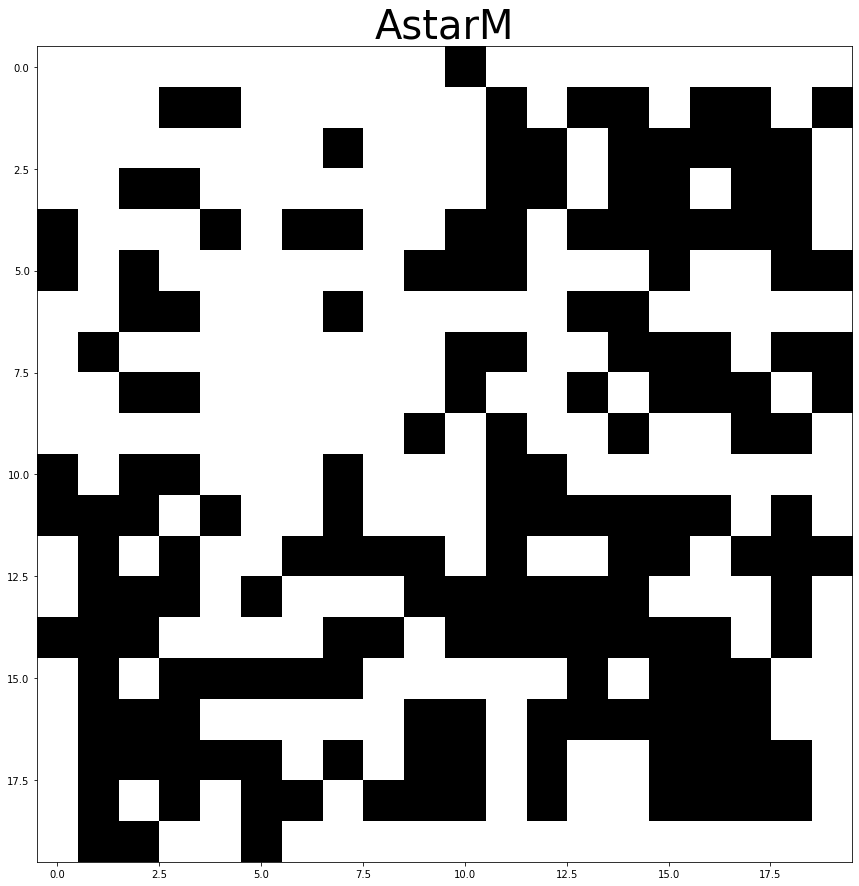

198 177
fails 6
SOLUTION FOUND


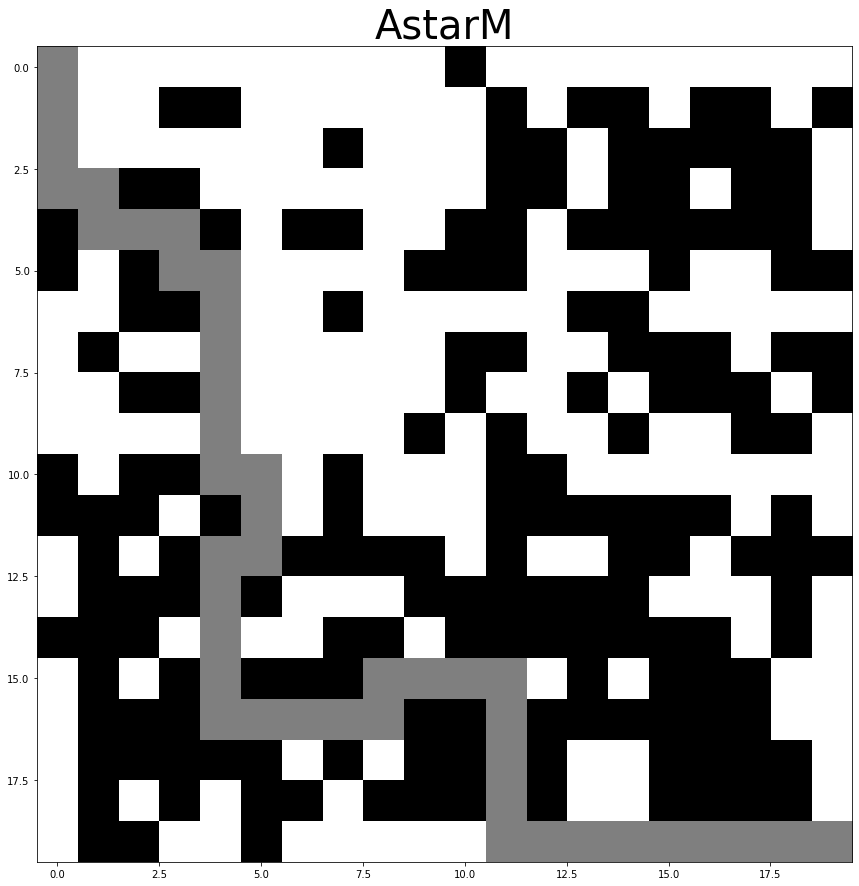

SOLUTION FOUND


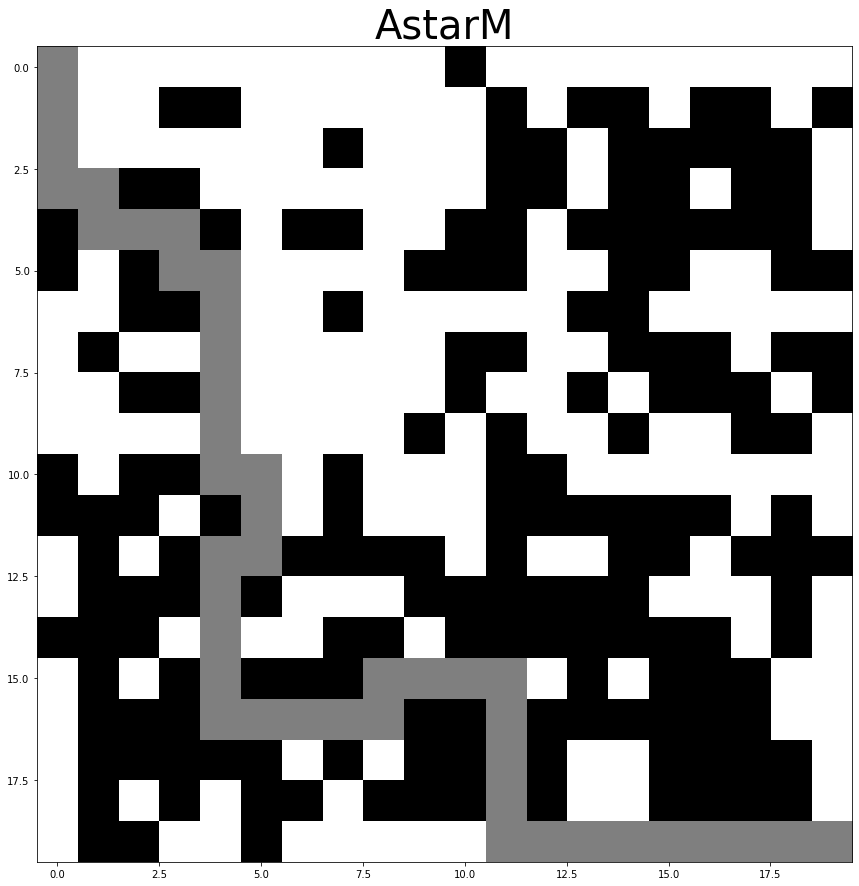

198 197
fails 7
SOLUTION FOUND


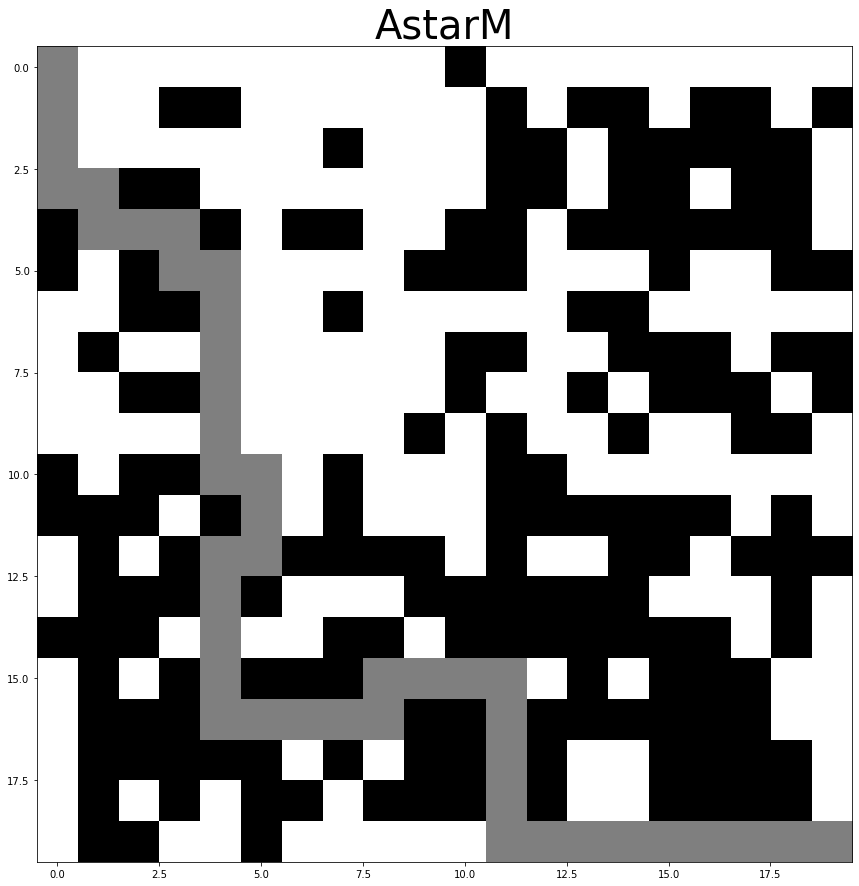

SOLUTION FOUND


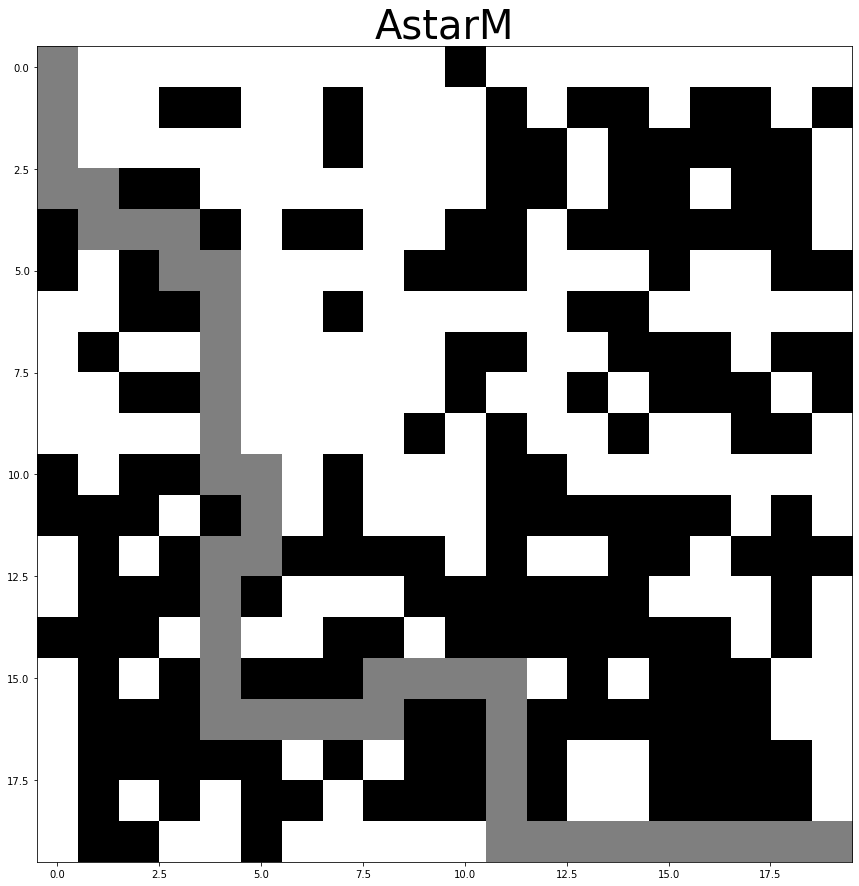

198 195
fails 8
SOLUTION FOUND


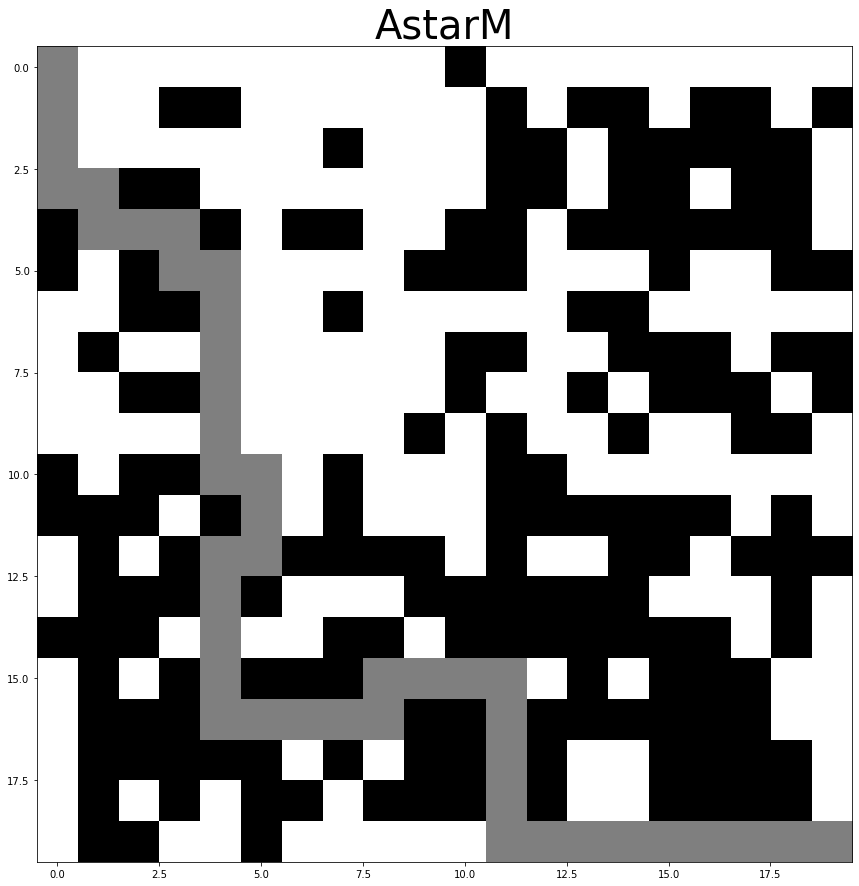

SOLUTION FOUND


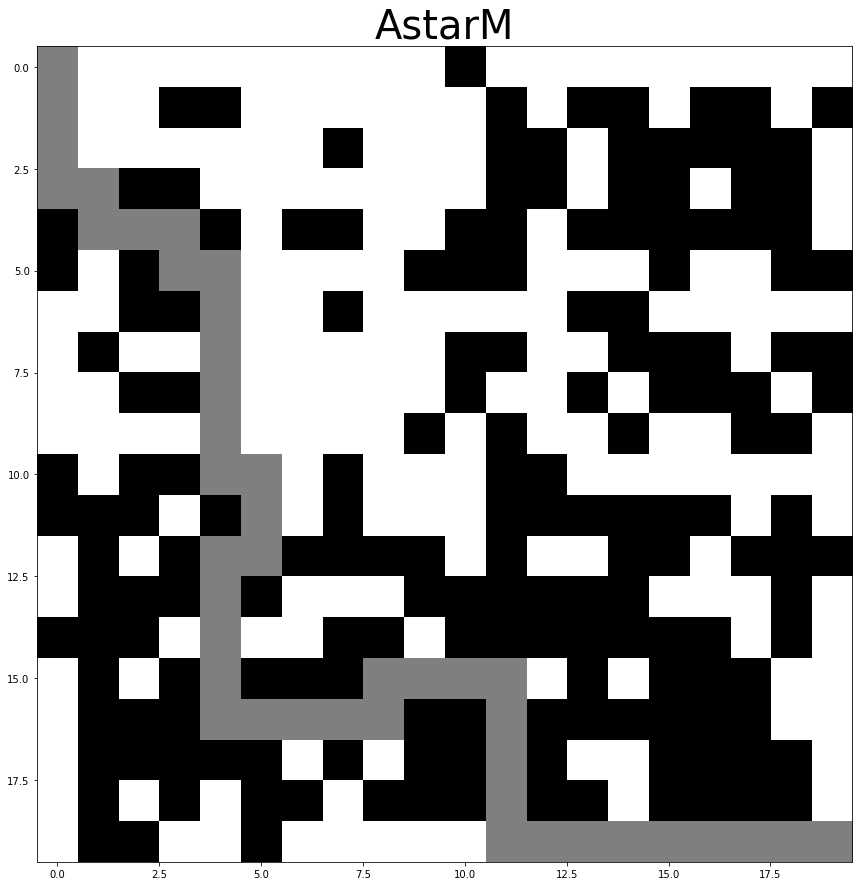

198 198
fails 0
SOLUTION FOUND


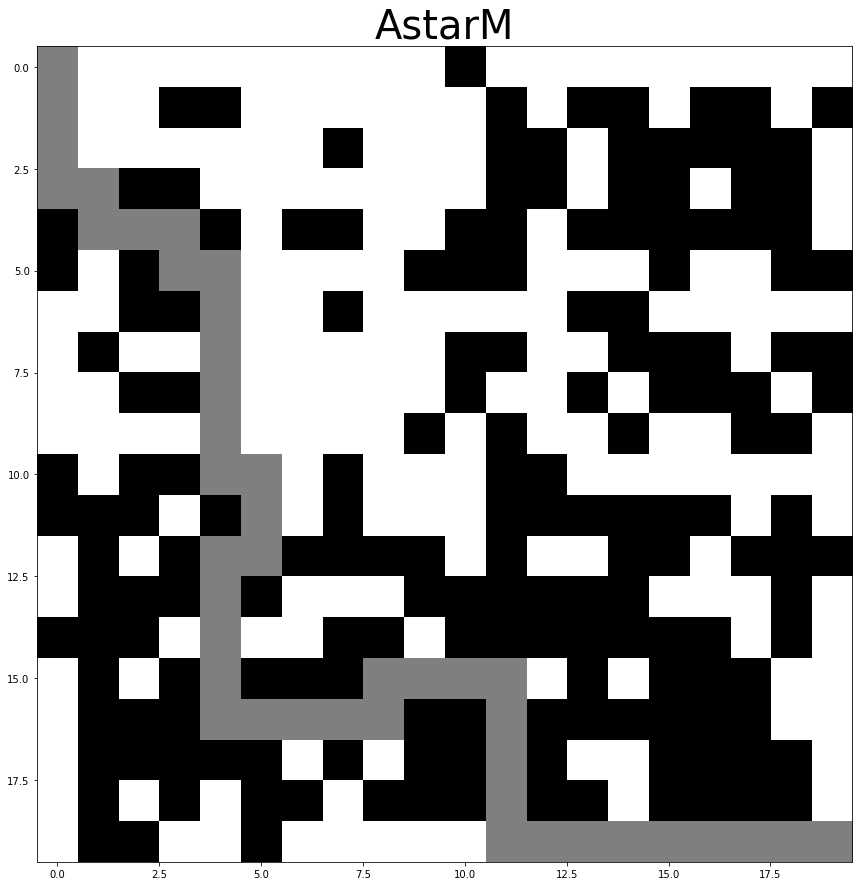

SOLUTION FOUND


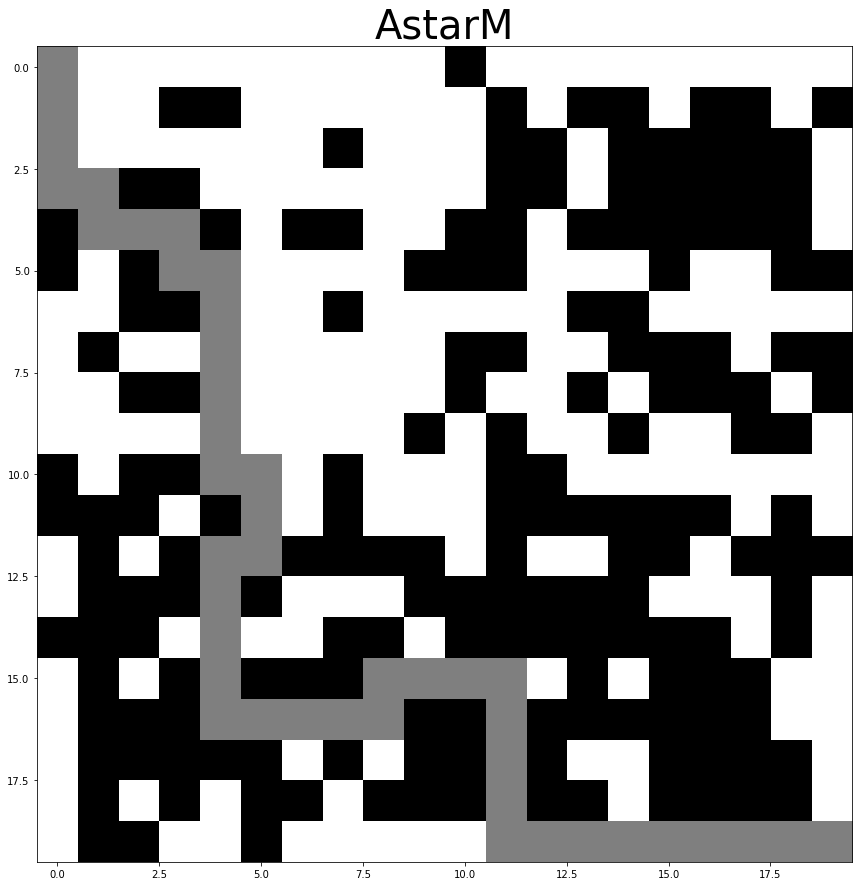

198 198
fails 0
SOLUTION FOUND


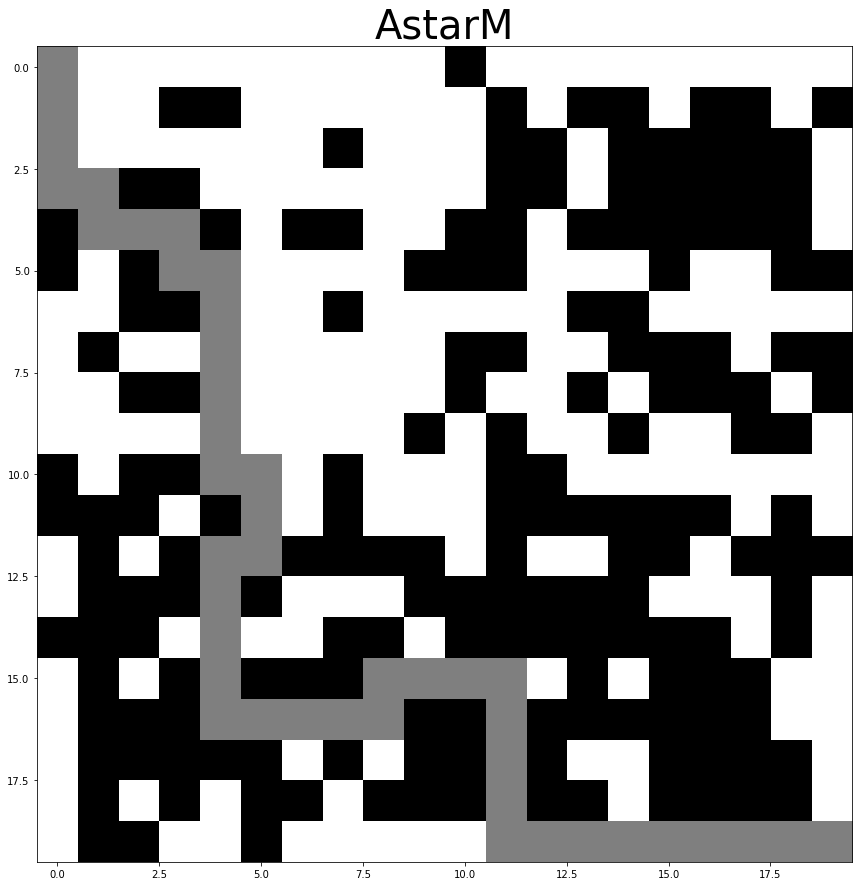

SOLUTION FOUND


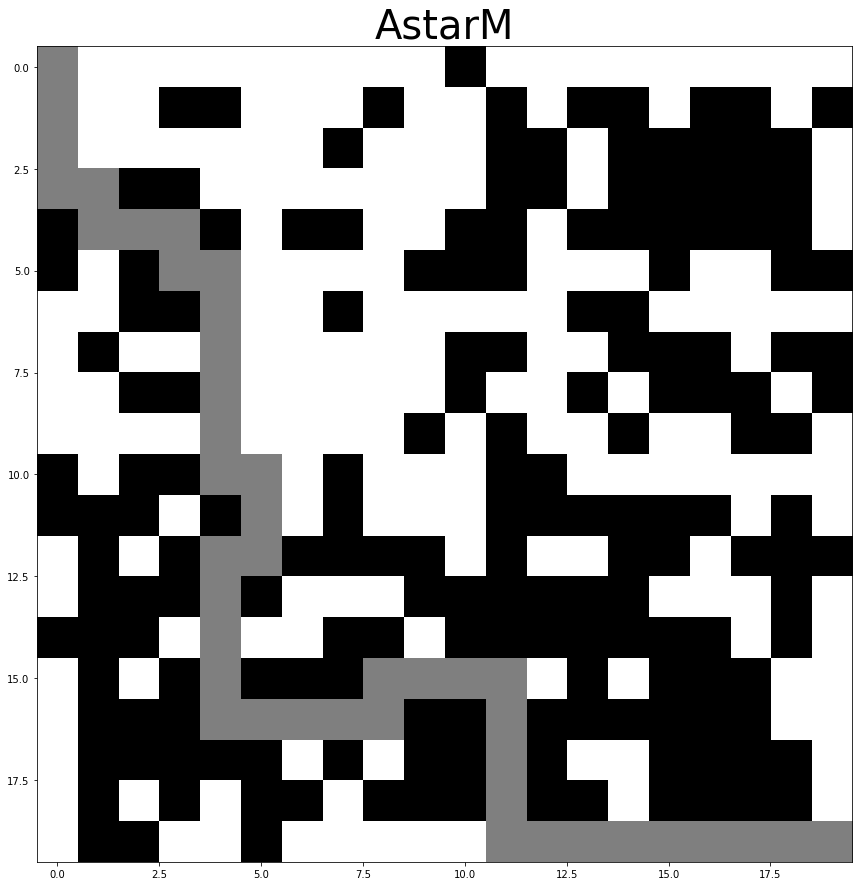

198 193
fails 1
SOLUTION FOUND


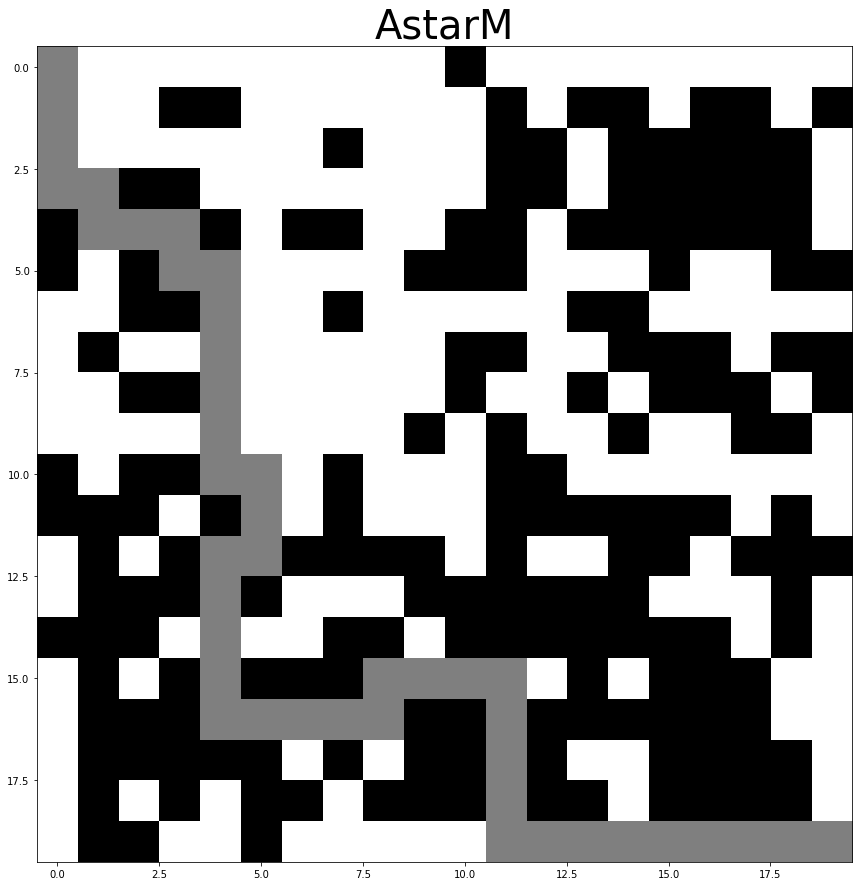

SOLUTION FOUND


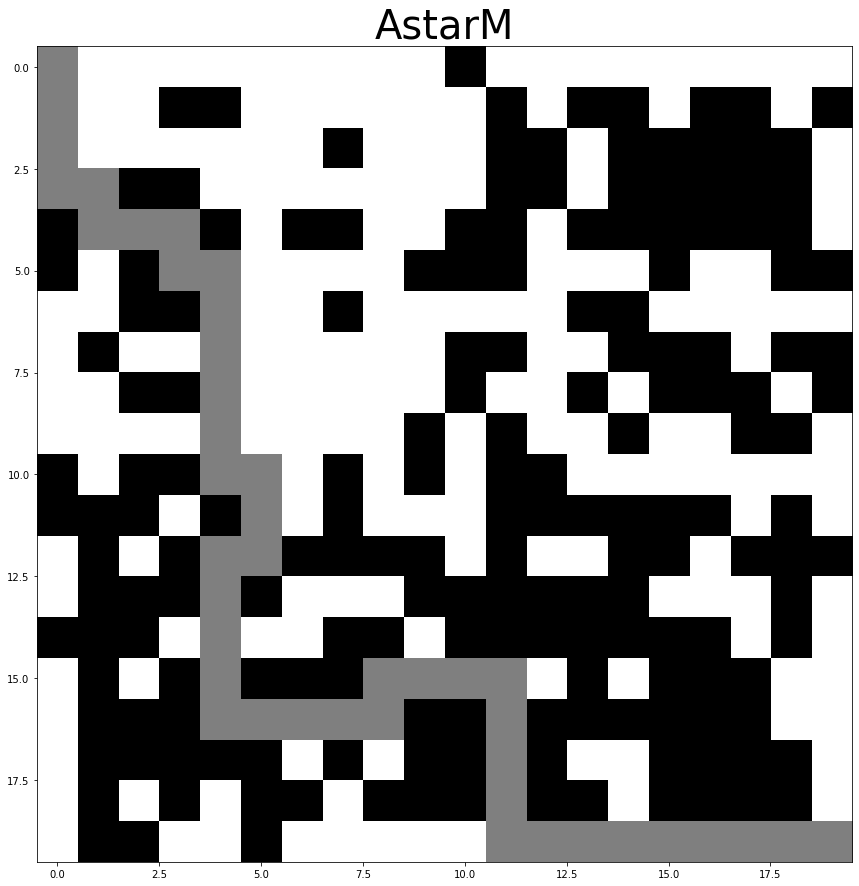

198 194
fails 2
SOLUTION FOUND


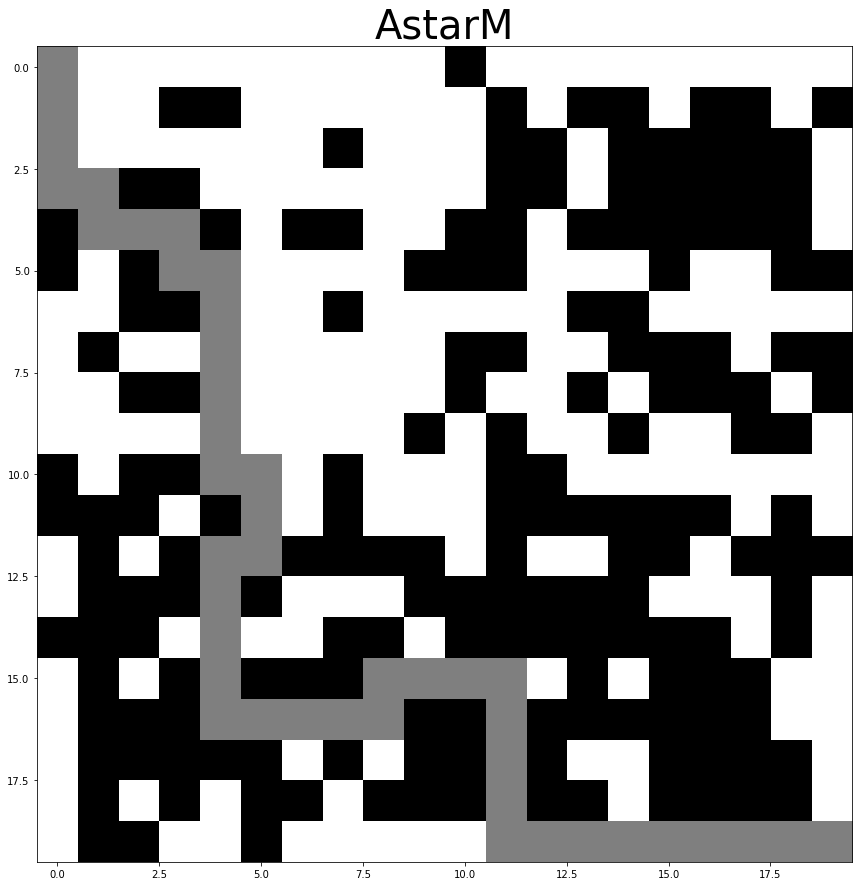

SOLUTION FOUND


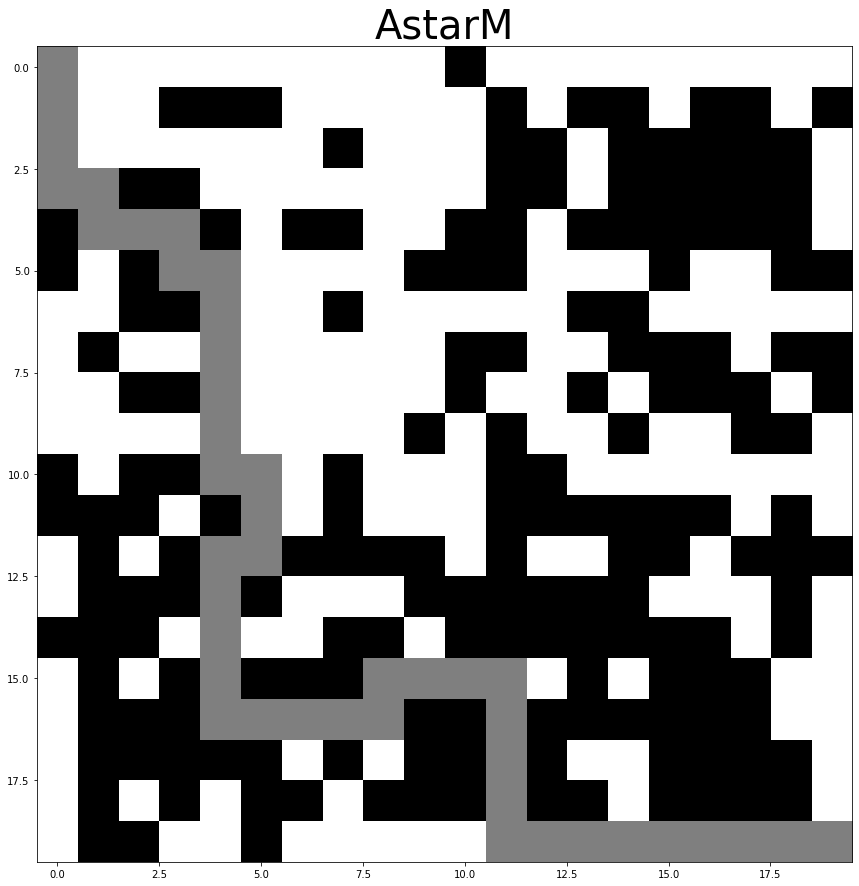

198 195
fails 3
SOLUTION FOUND


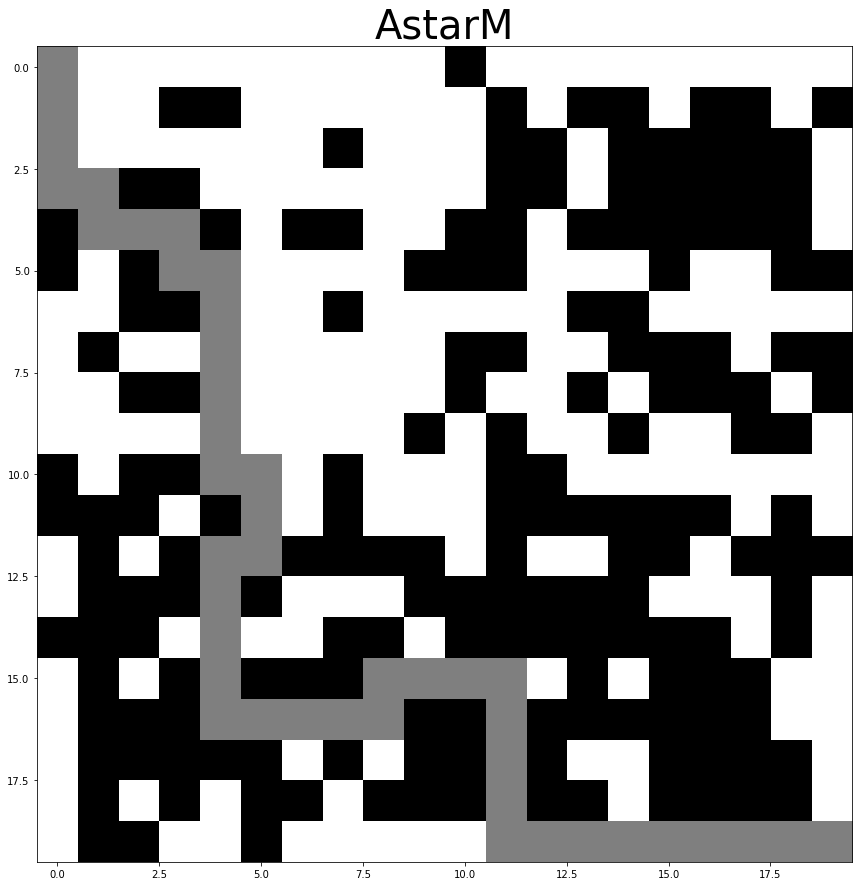

SOLUTION FOUND


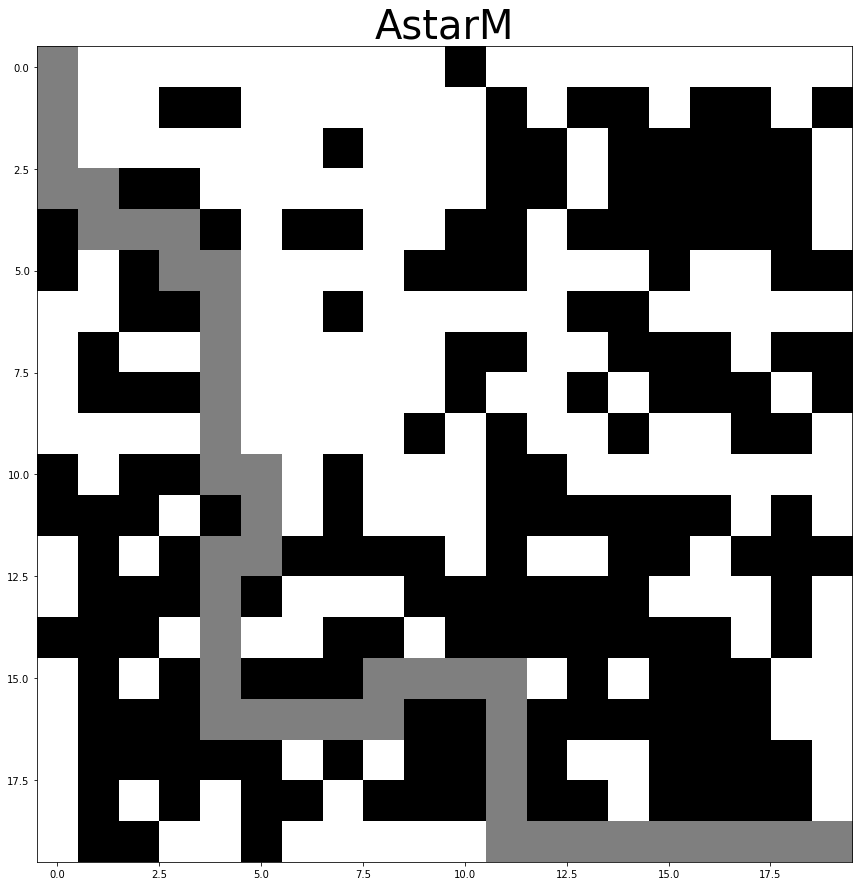

198 196
fails 4
SOLUTION FOUND


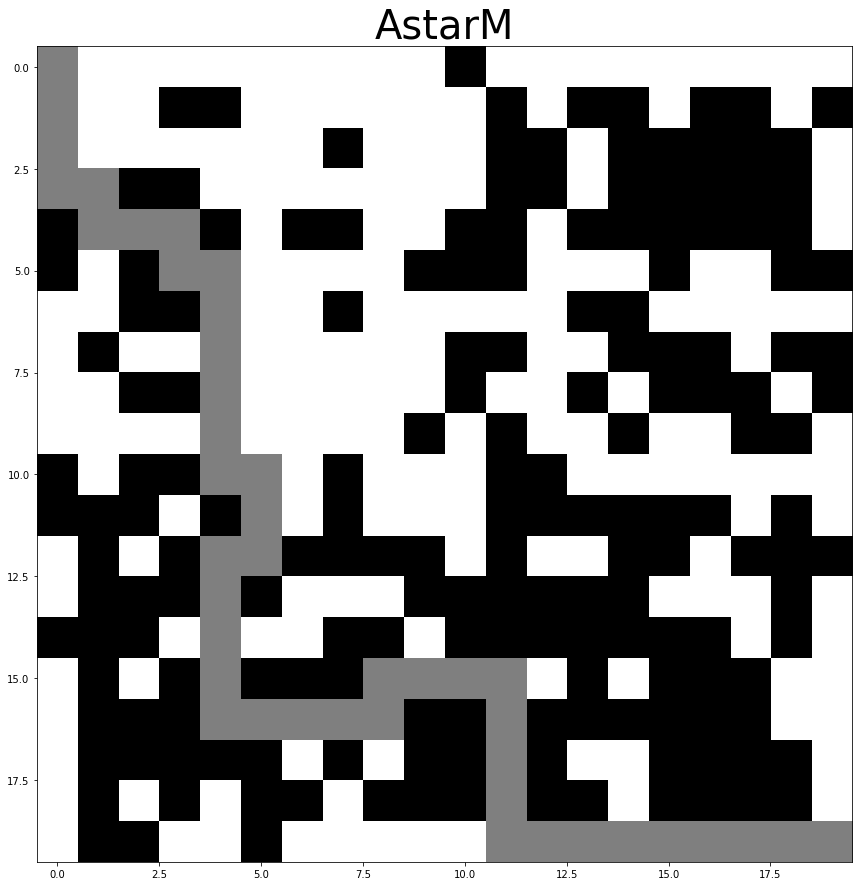

SOLUTION FOUND


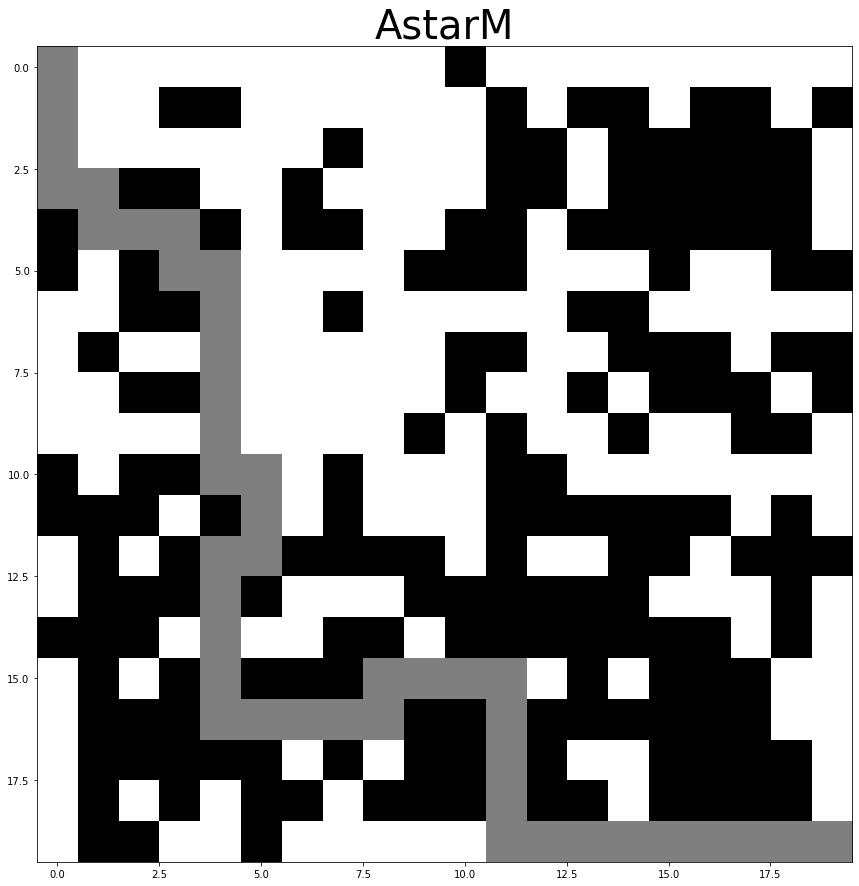

198 195
fails 5
SOLUTION FOUND


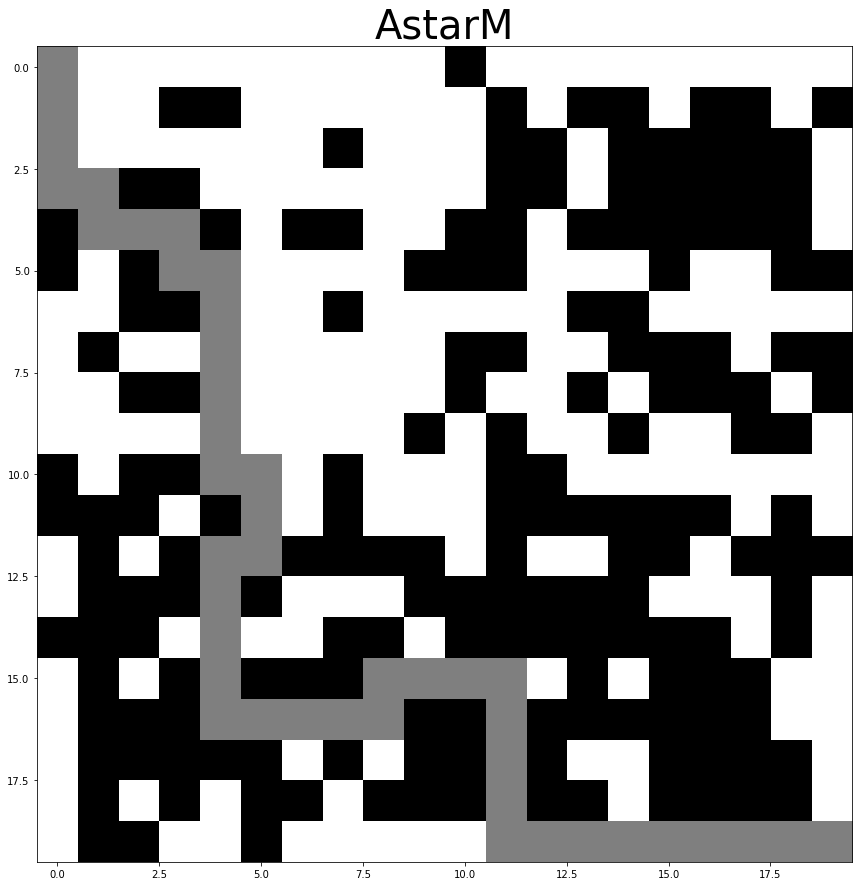

SOLUTION FOUND


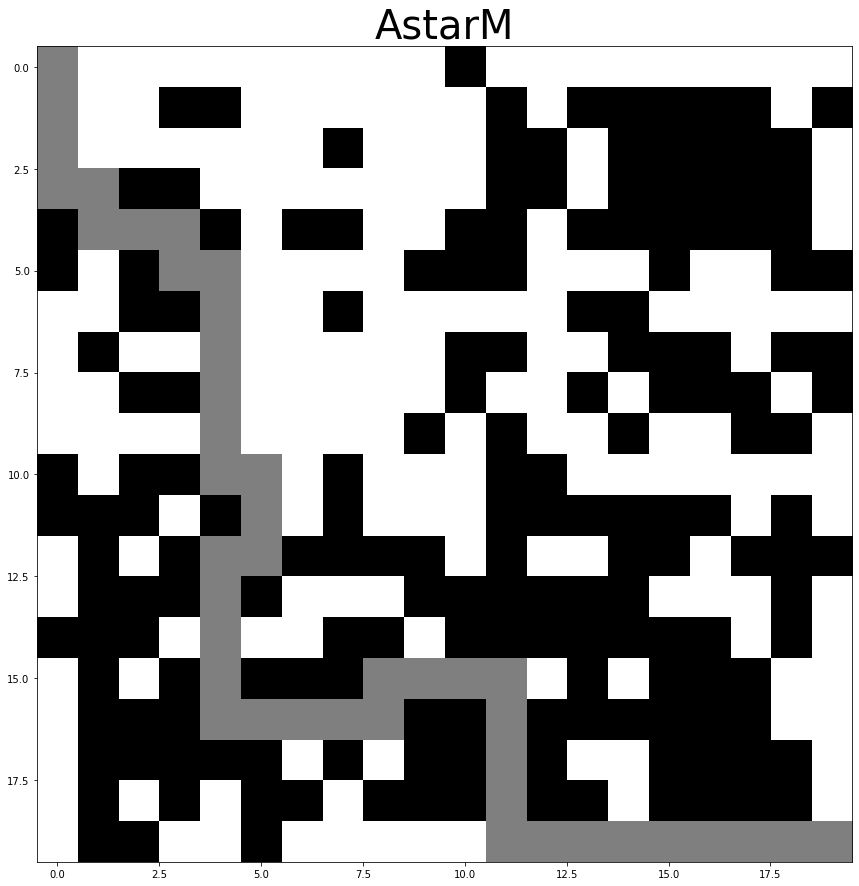

198 198
fails 0
SOLUTION FOUND


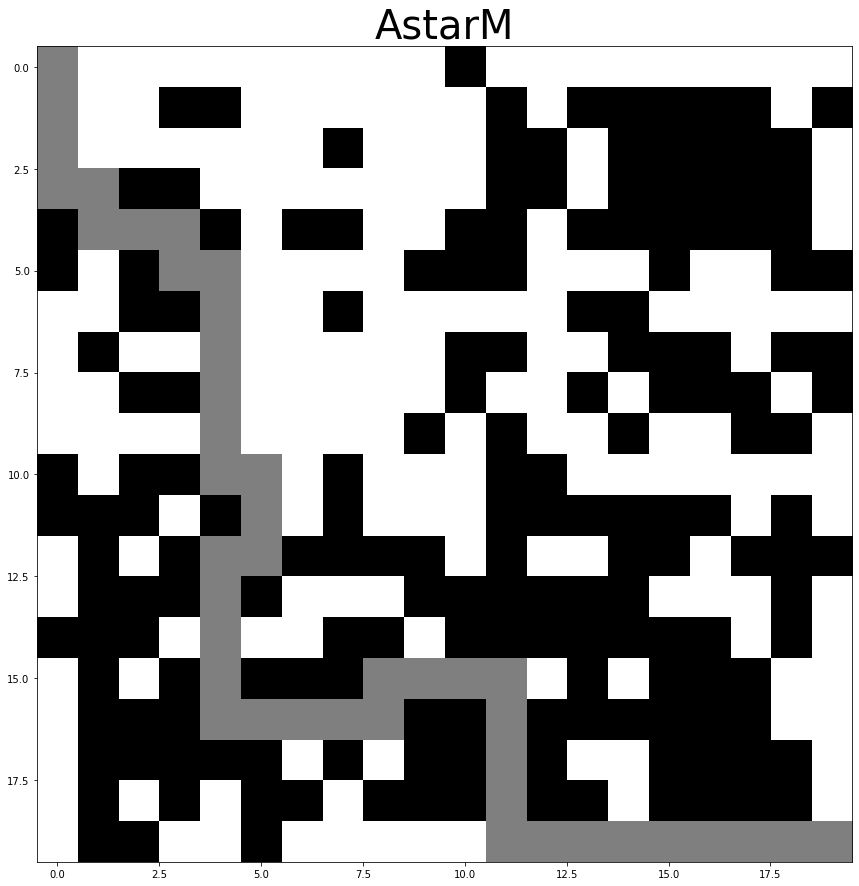

SOLUTION FOUND


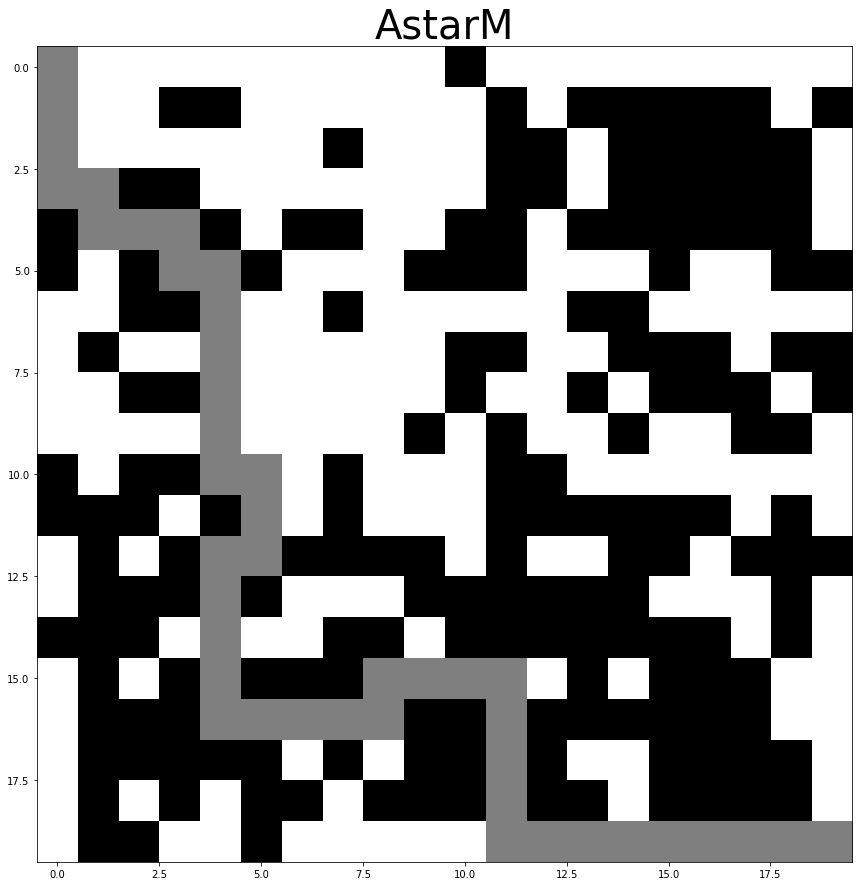

198 193
fails 1
SOLUTION FOUND


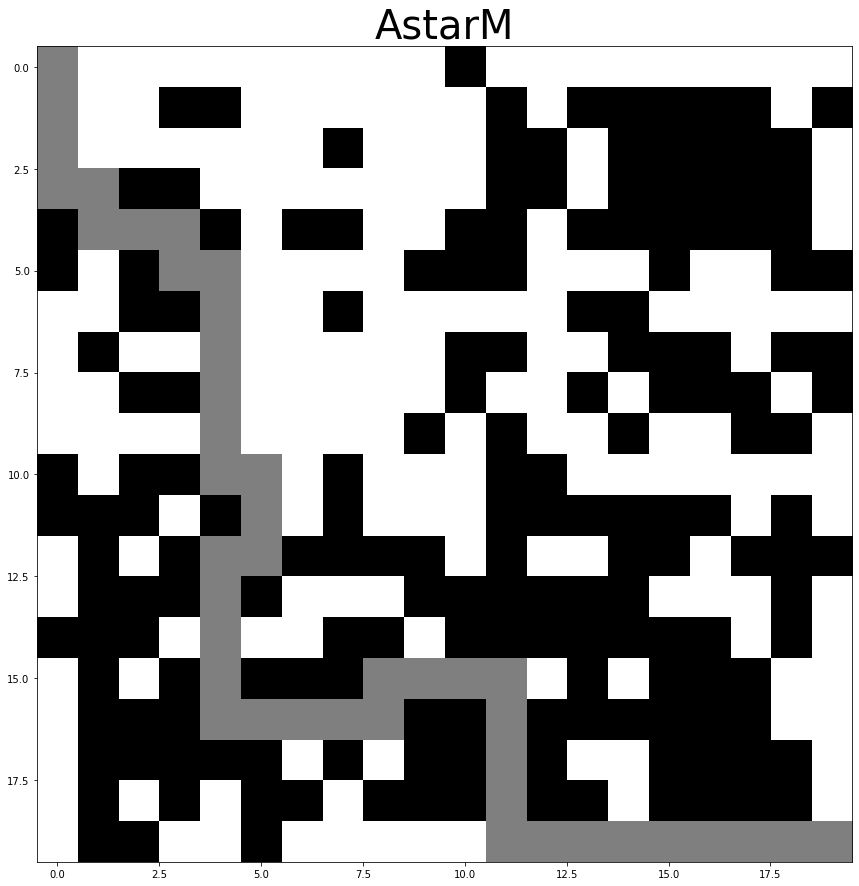

SOLUTION FOUND


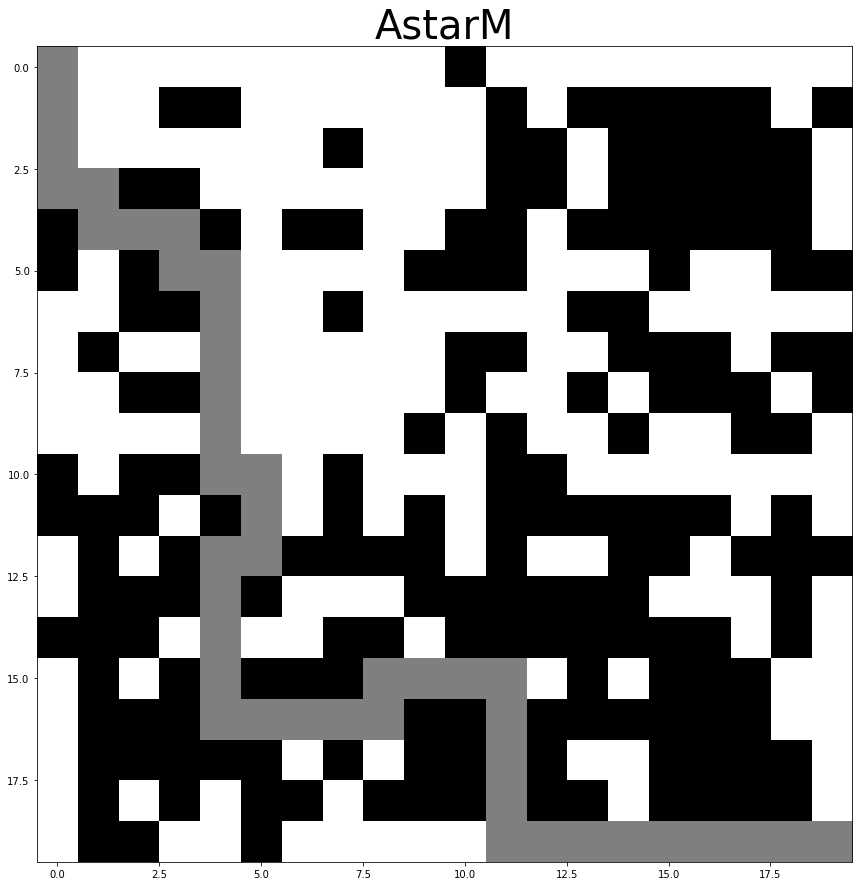

198 195
fails 2
SOLUTION FOUND


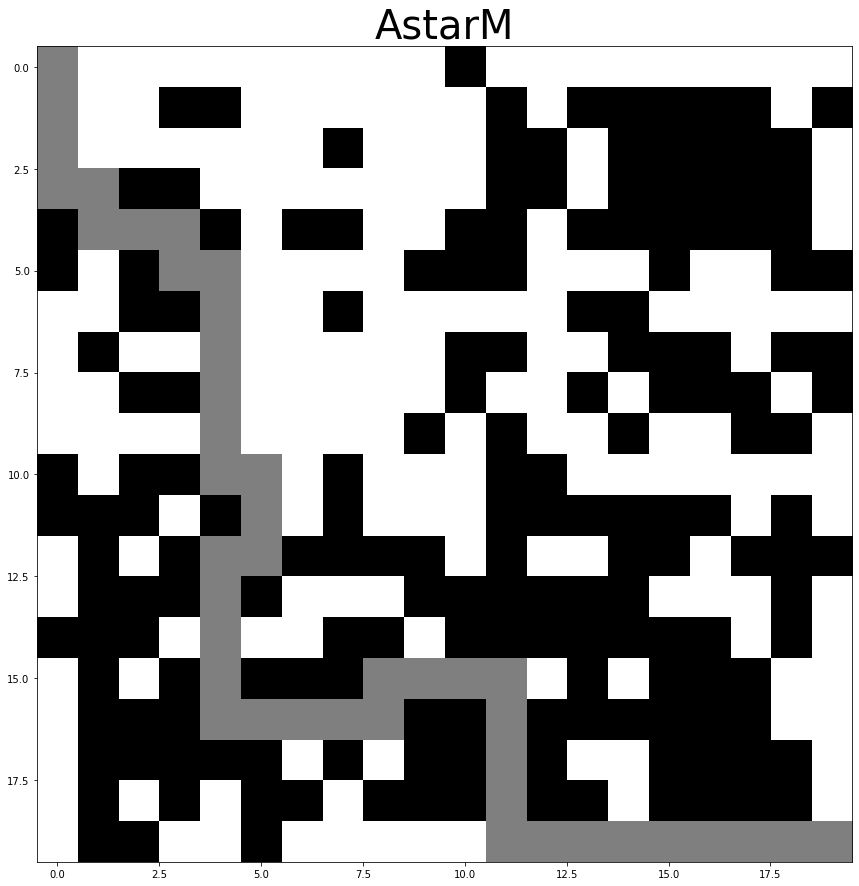

SOLUTION FOUND


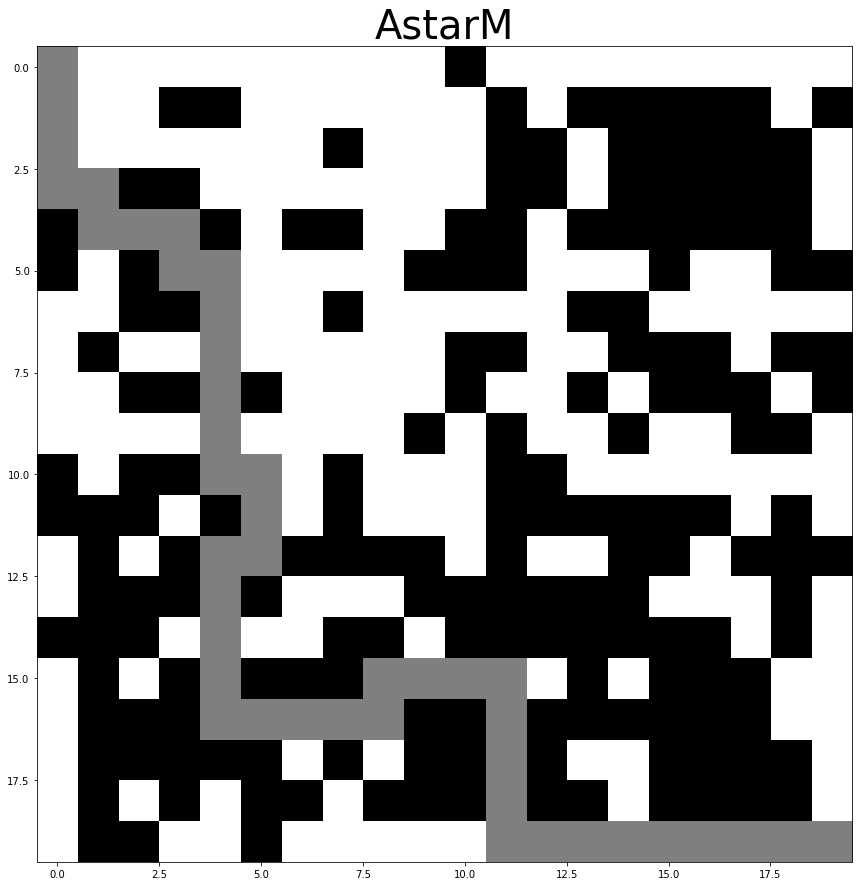

198 194
fails 3
SOLUTION FOUND


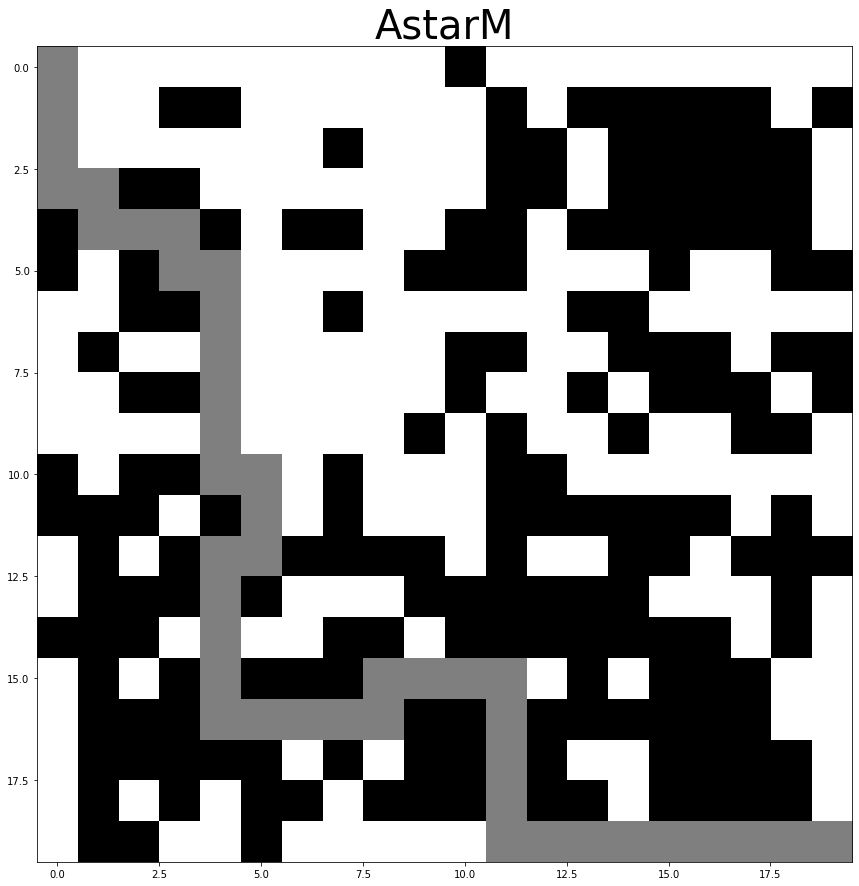

SOLUTION FOUND


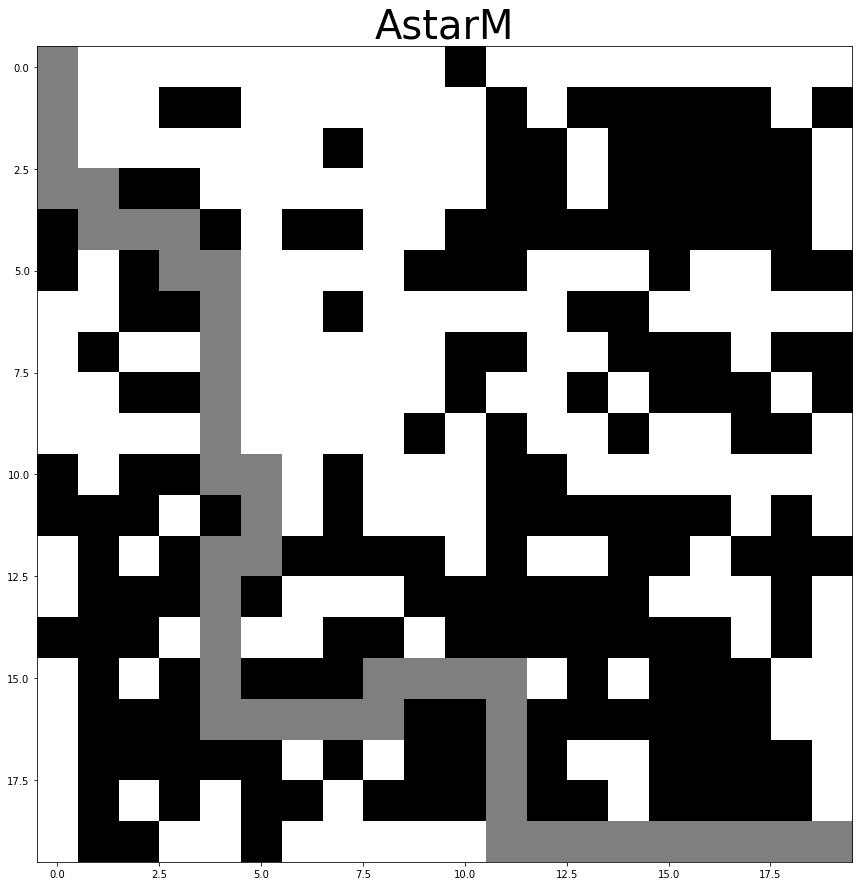

198 198
fails 0
SOLUTION FOUND


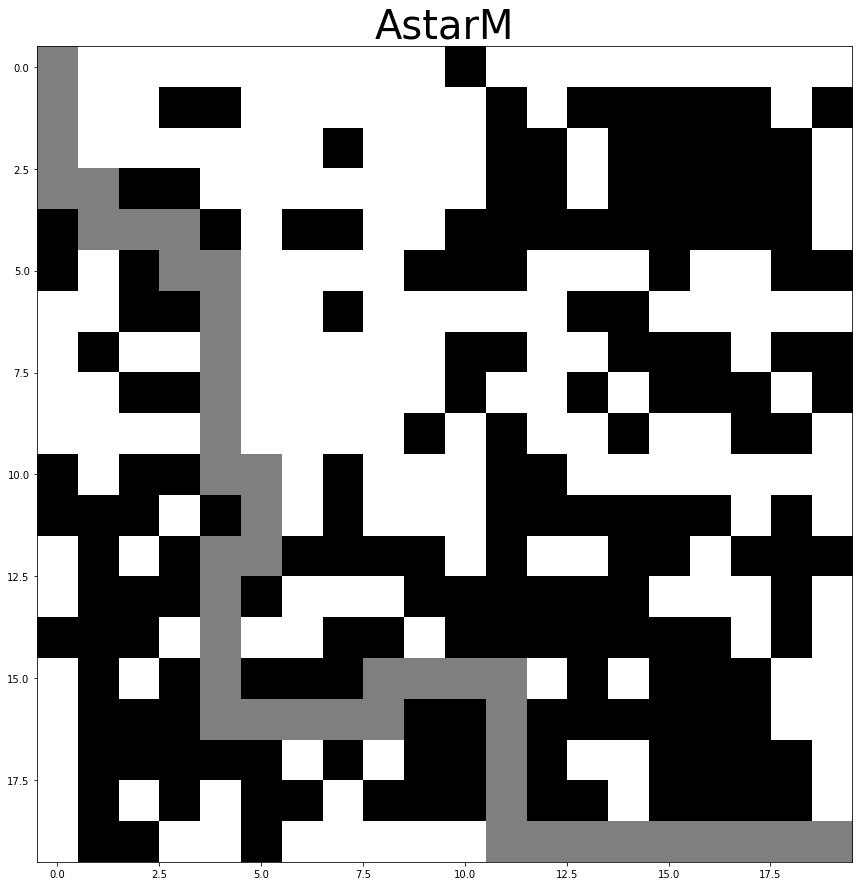

SOLUTION FOUND


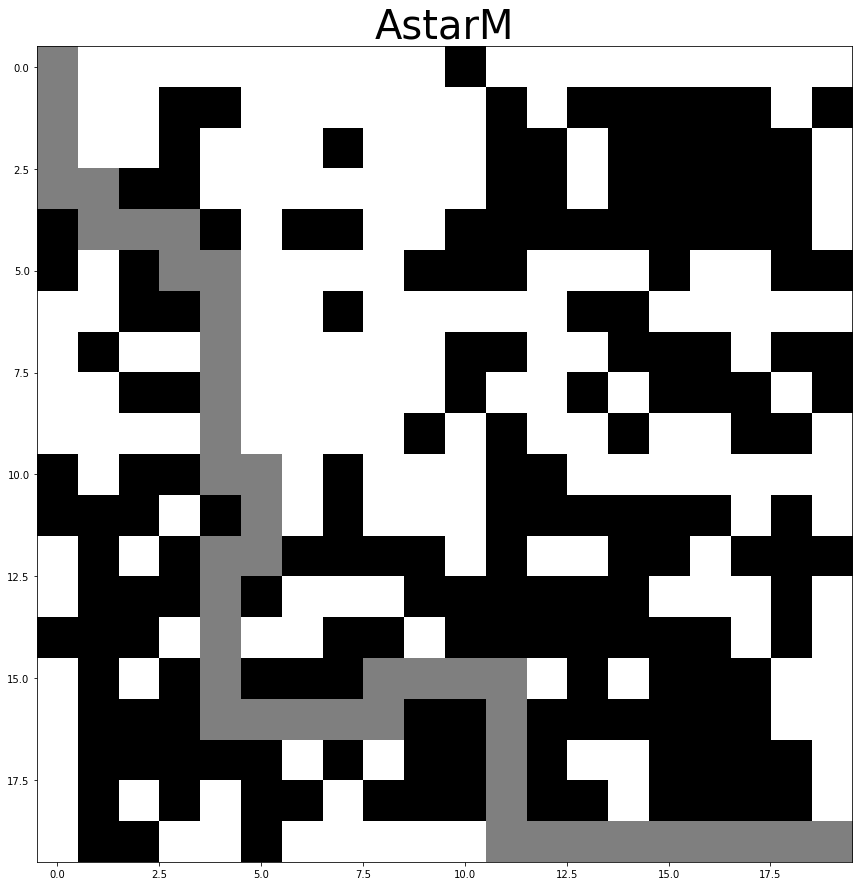

198 195
fails 1
SOLUTION FOUND


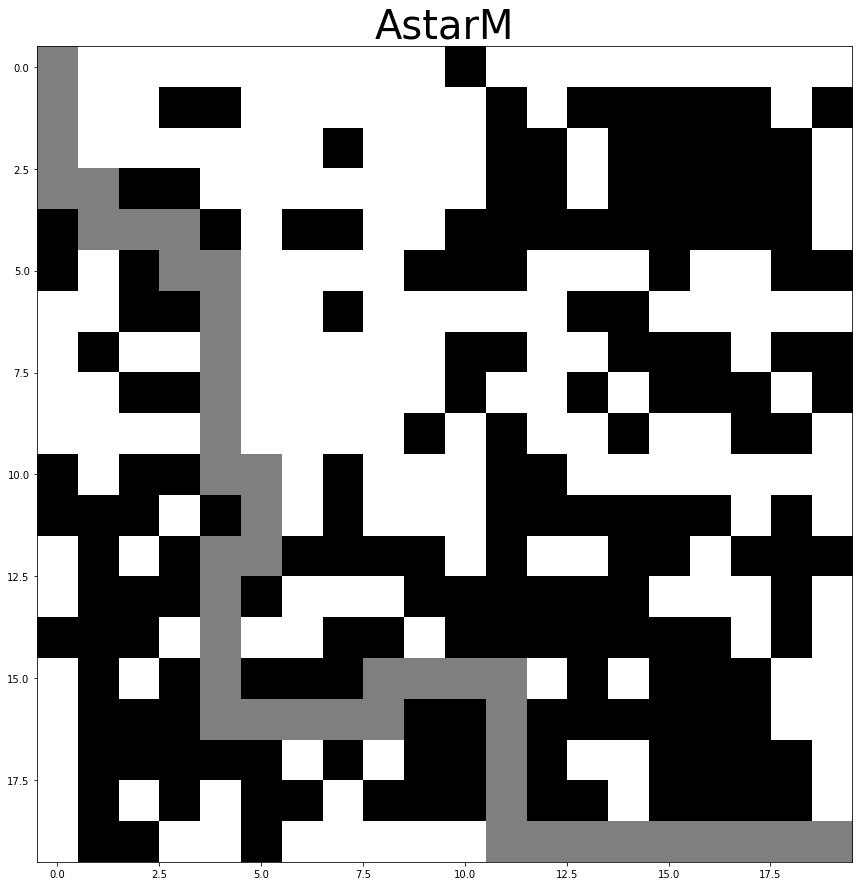

SOLUTION FOUND


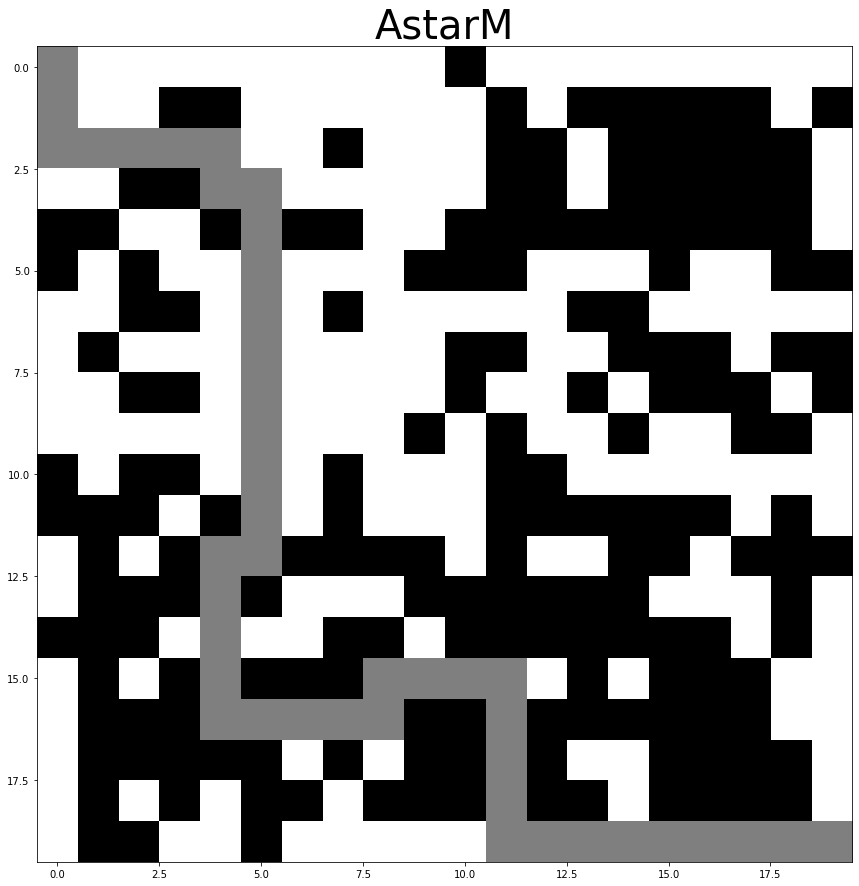

198 181
fails 2
SOLUTION FOUND


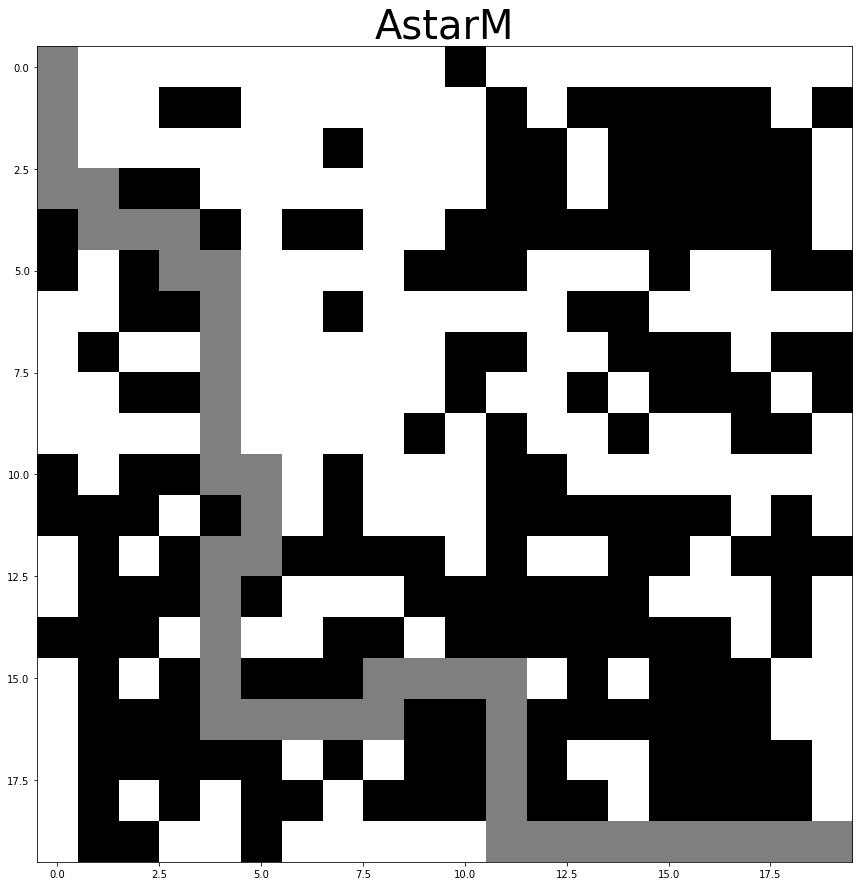

SOLUTION FOUND


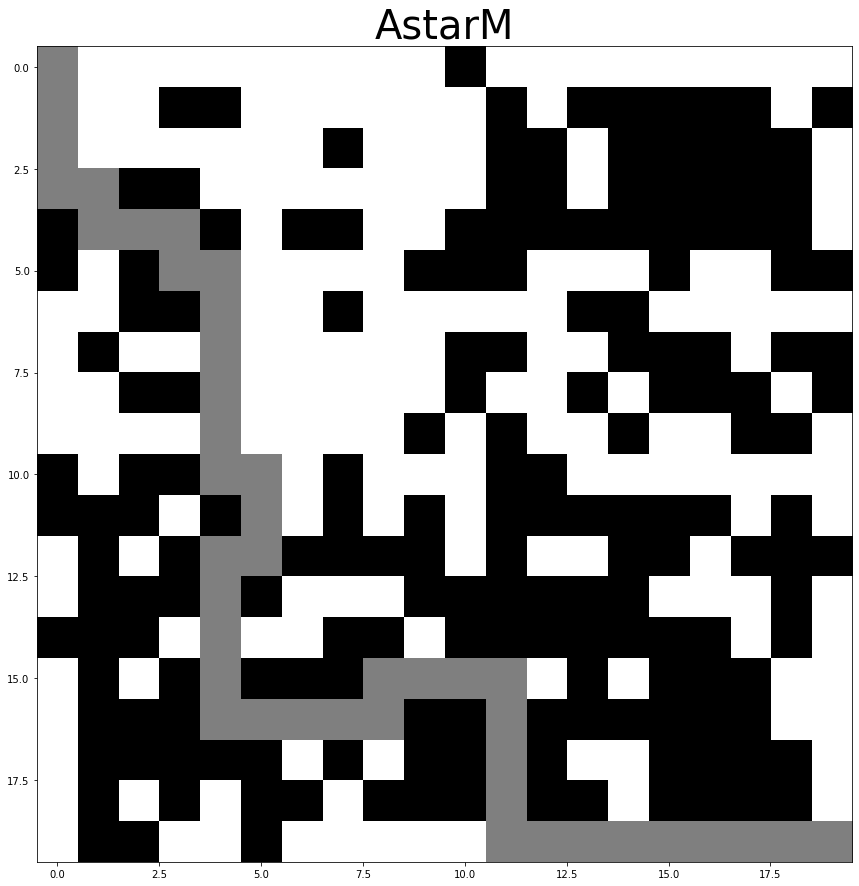

198 195
fails 3
SOLUTION FOUND


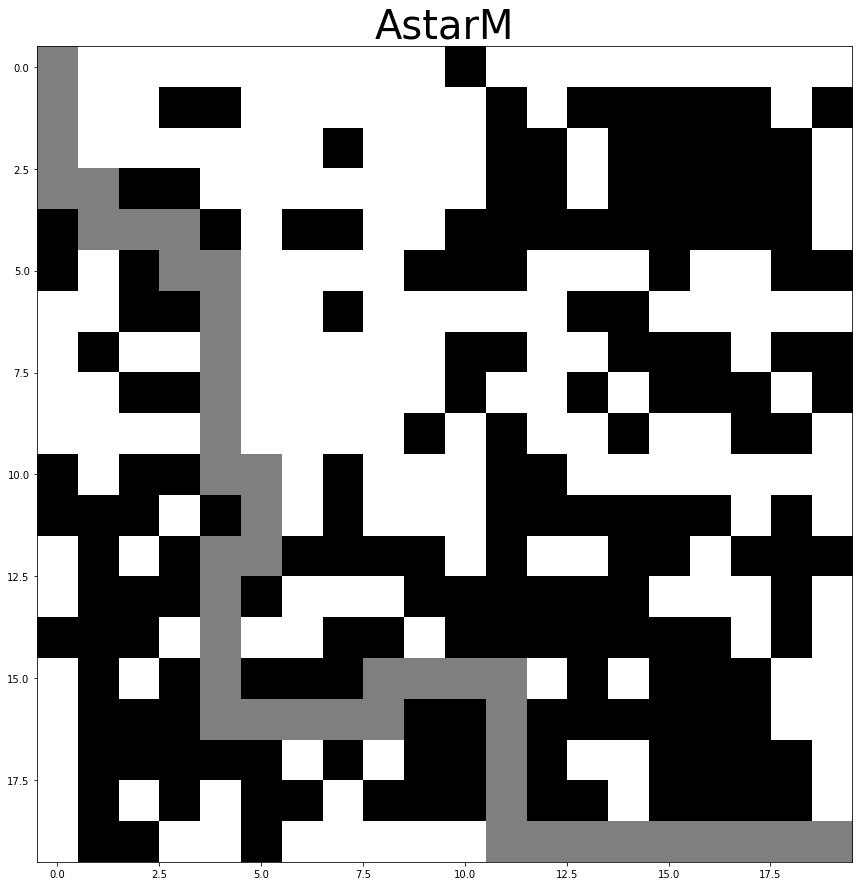

SOLUTION FOUND


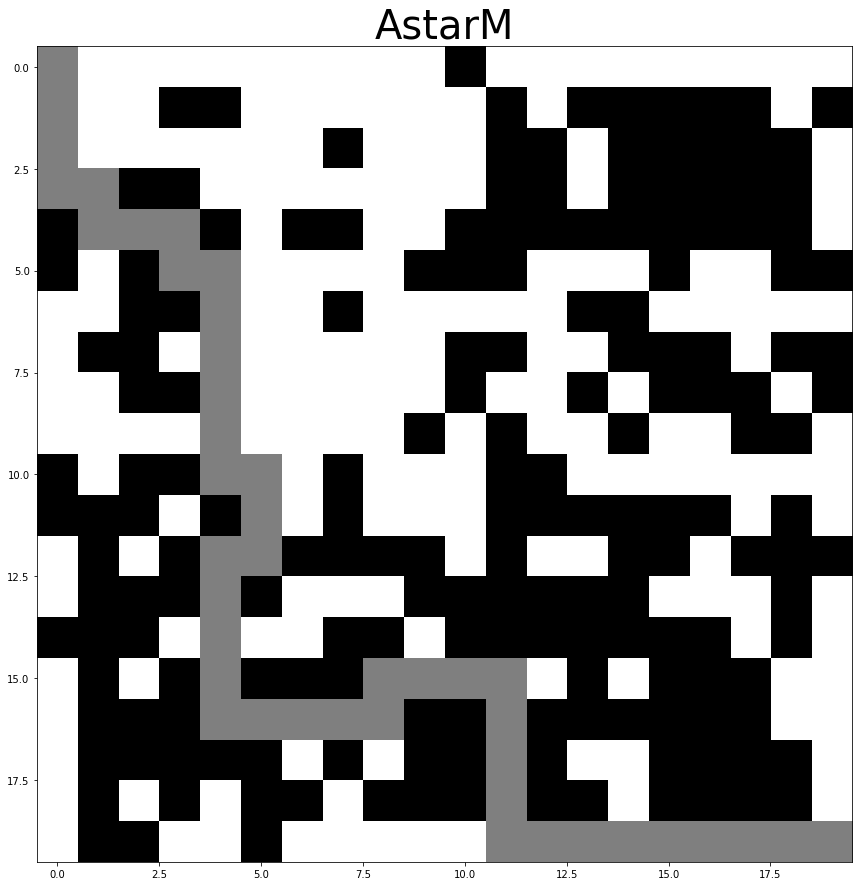

198 197
fails 4
SOLUTION FOUND


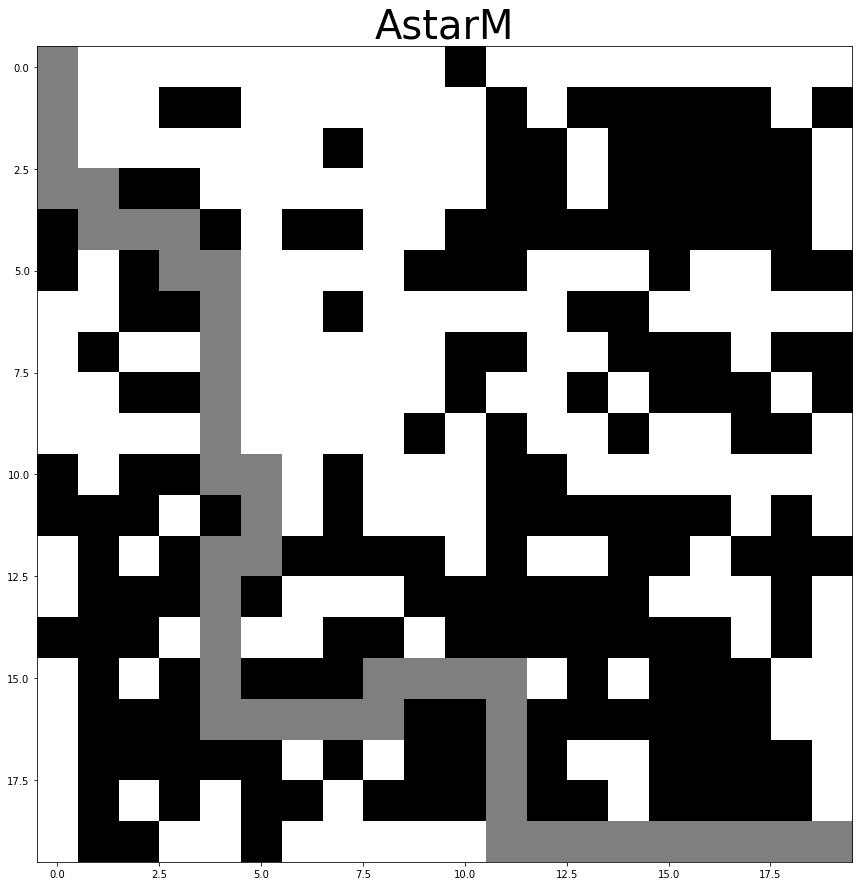

SOLUTION FOUND


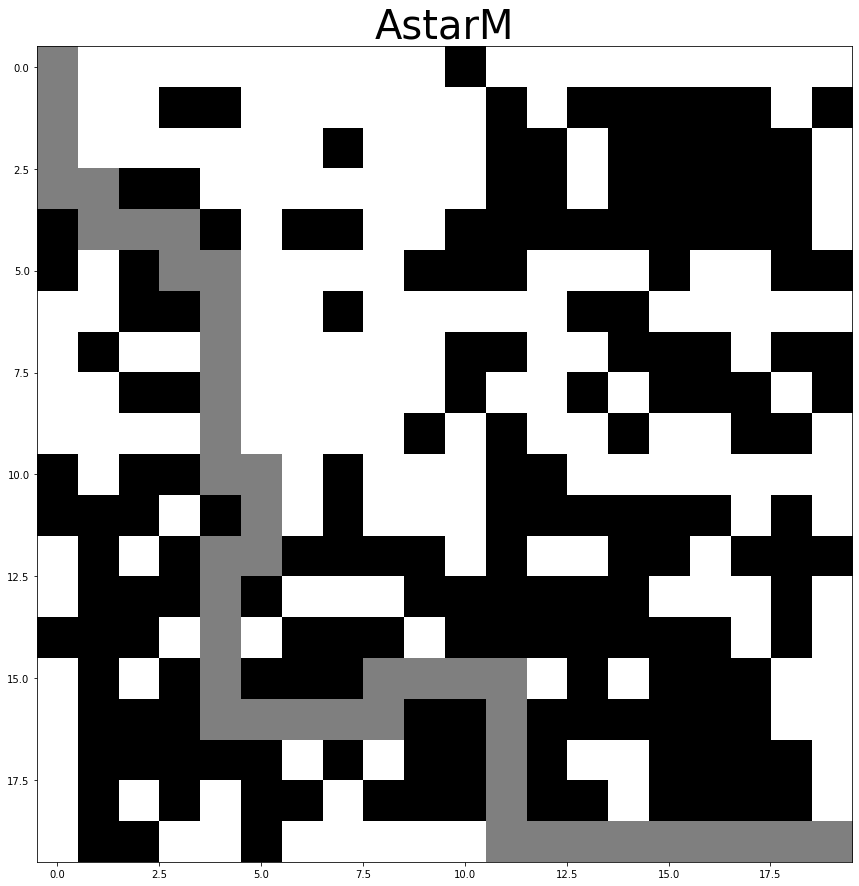

198 194
fails 5
SOLUTION FOUND


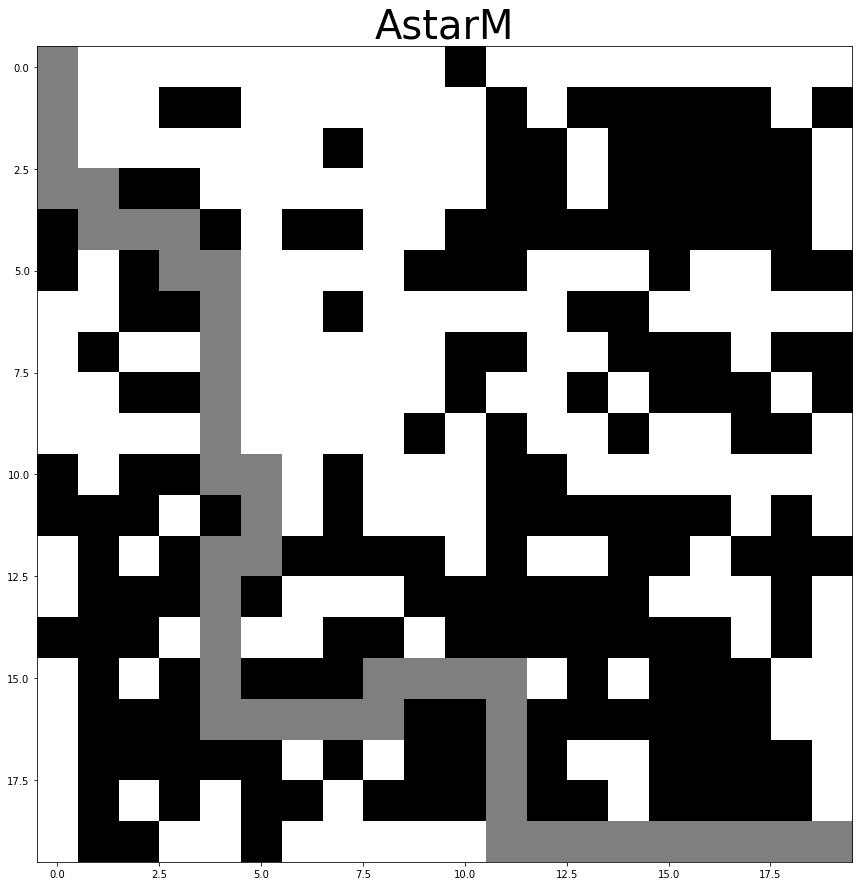

SOLUTION FOUND


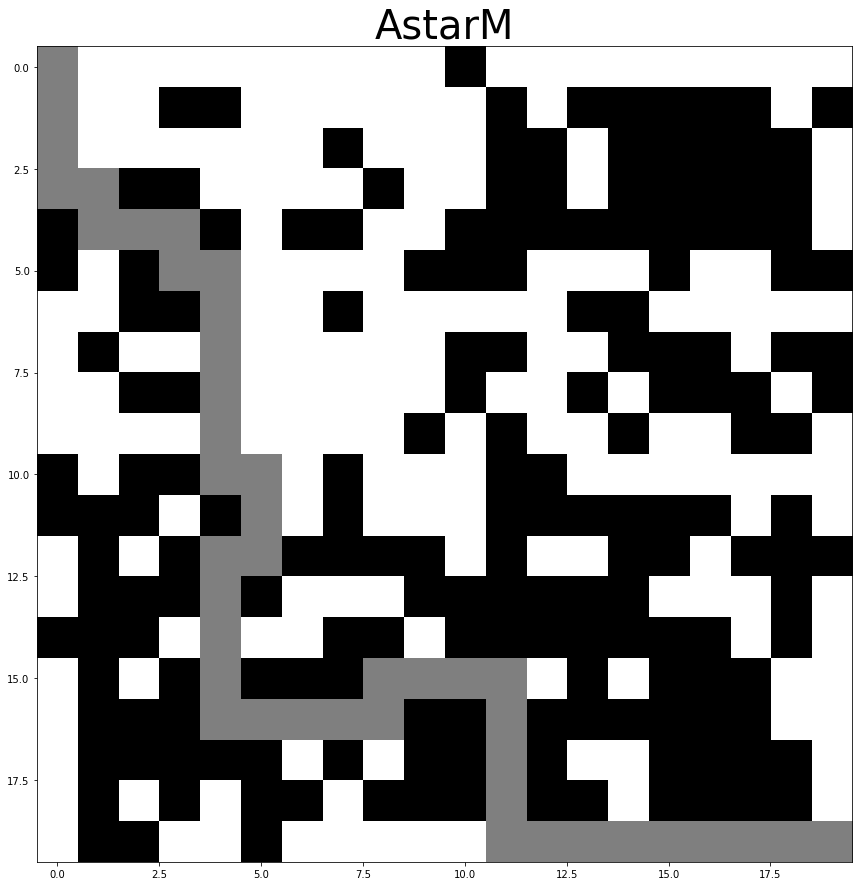

198 193
fails 6
SOLUTION FOUND


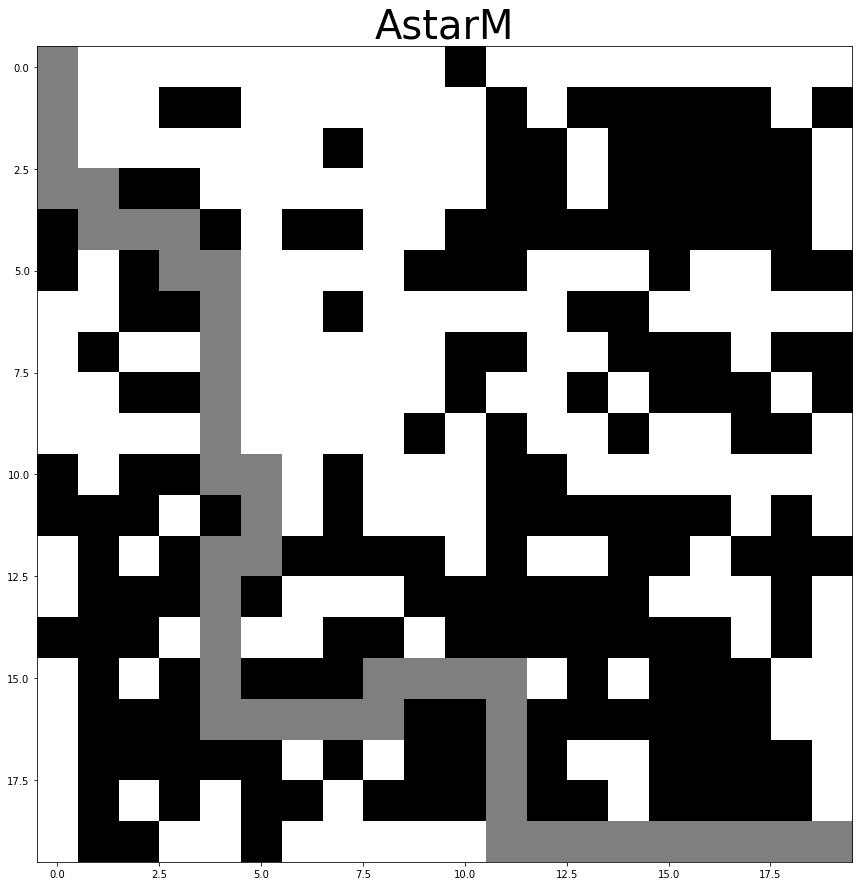

SOLUTION FOUND


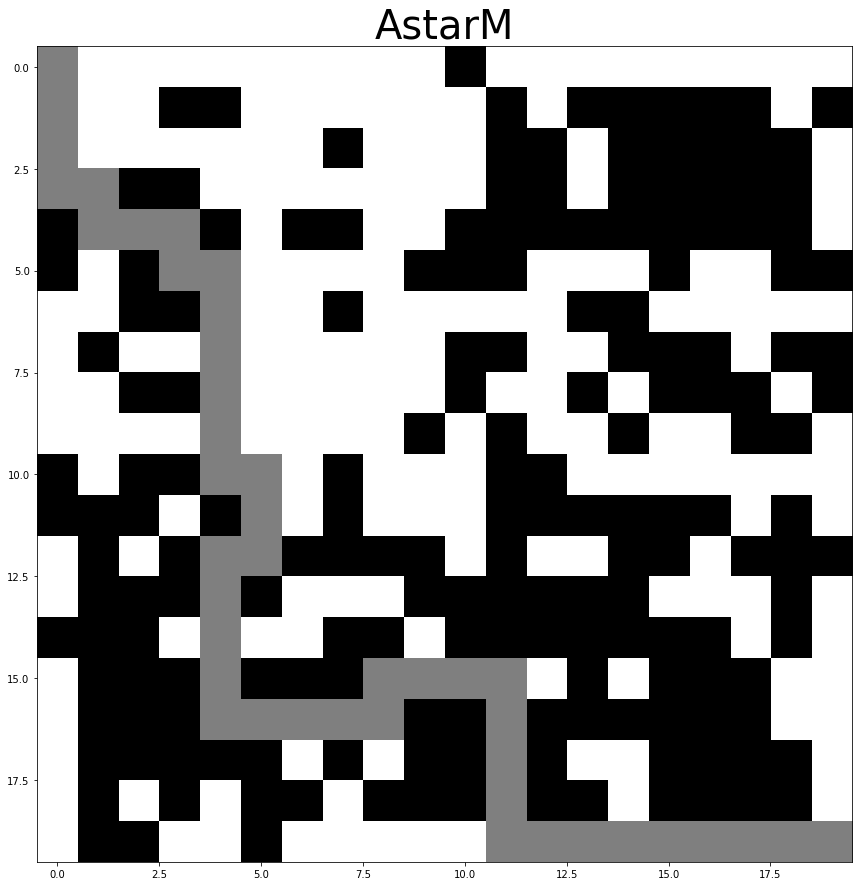

198 198
fails 0
SOLUTION FOUND


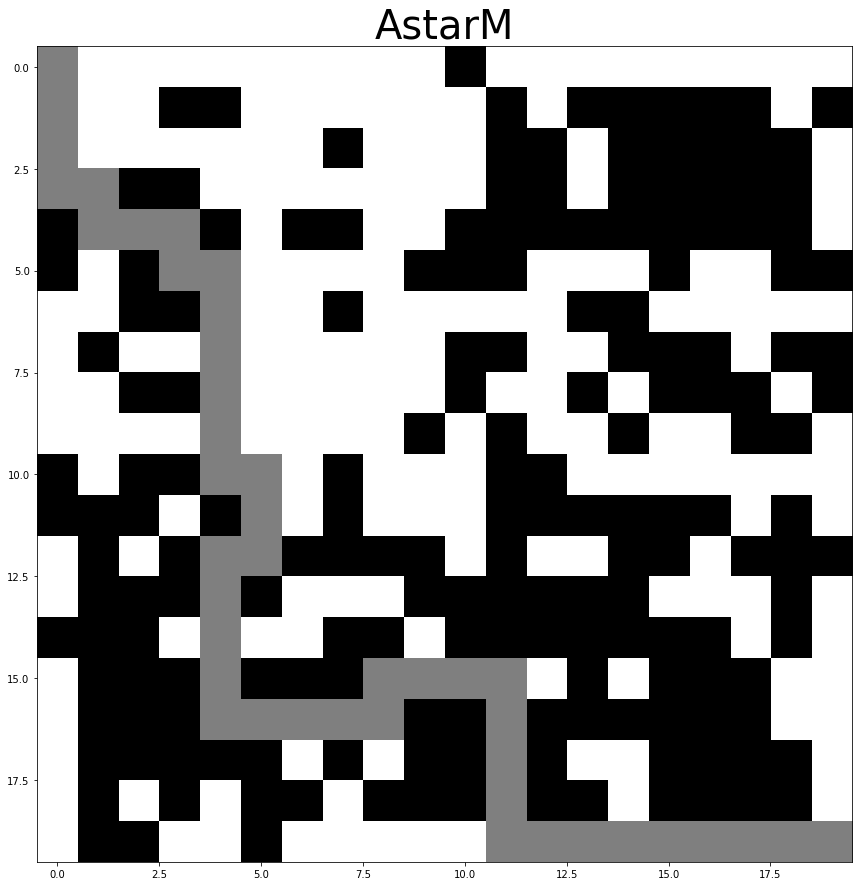

SOLUTION FOUND


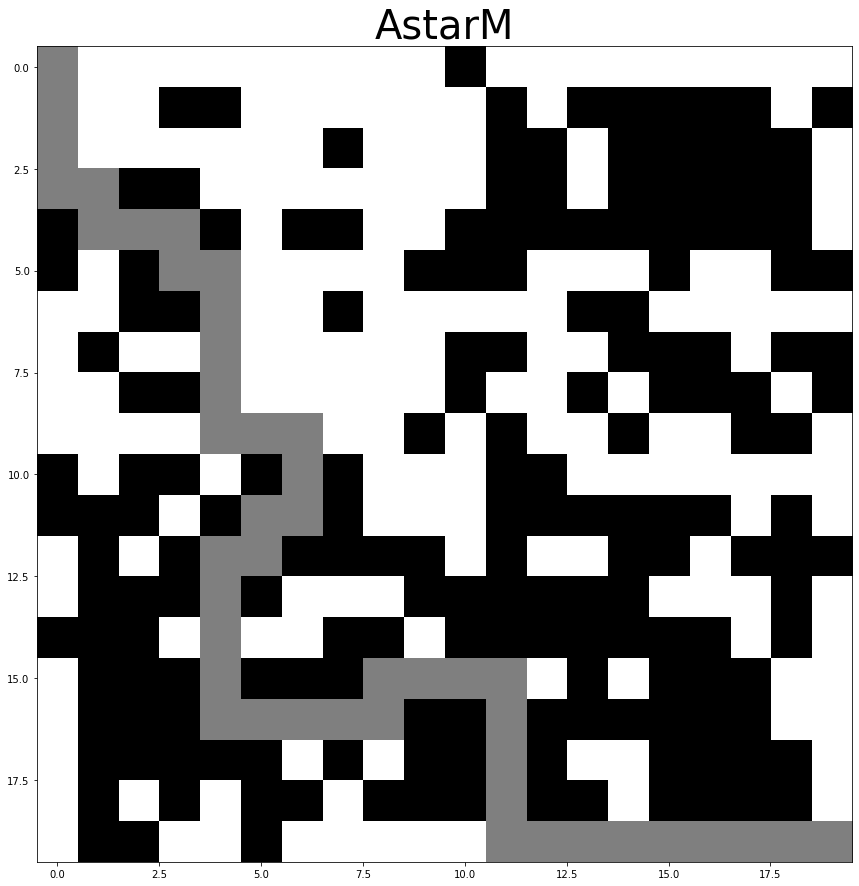

198 195
fails 1
SOLUTION FOUND


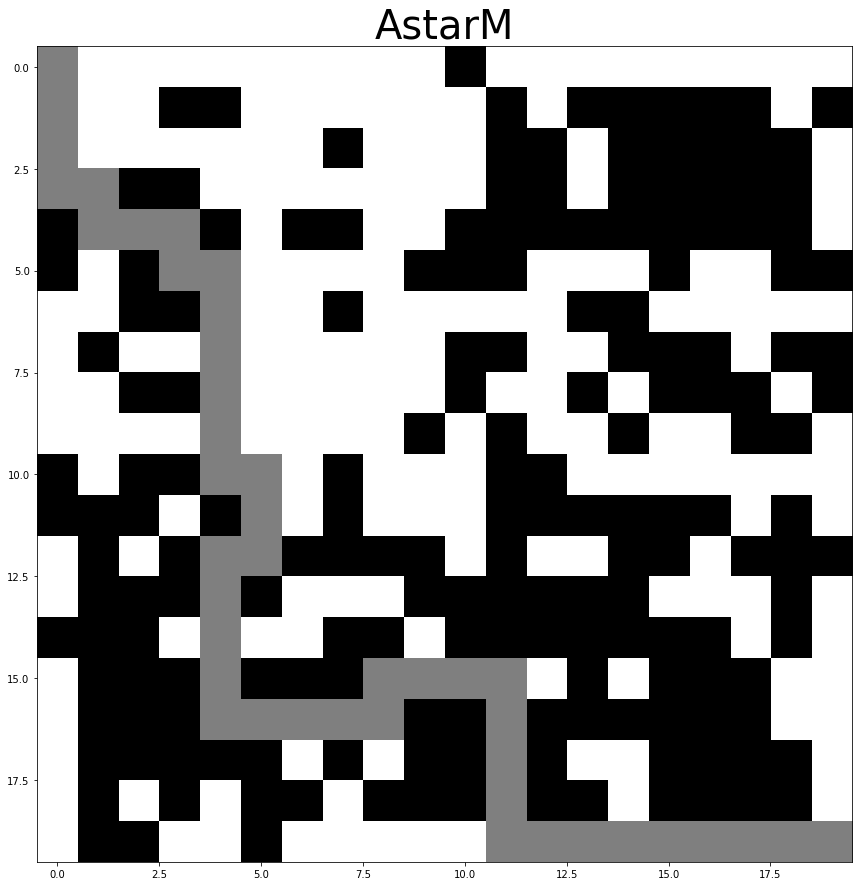

SOLUTION FOUND


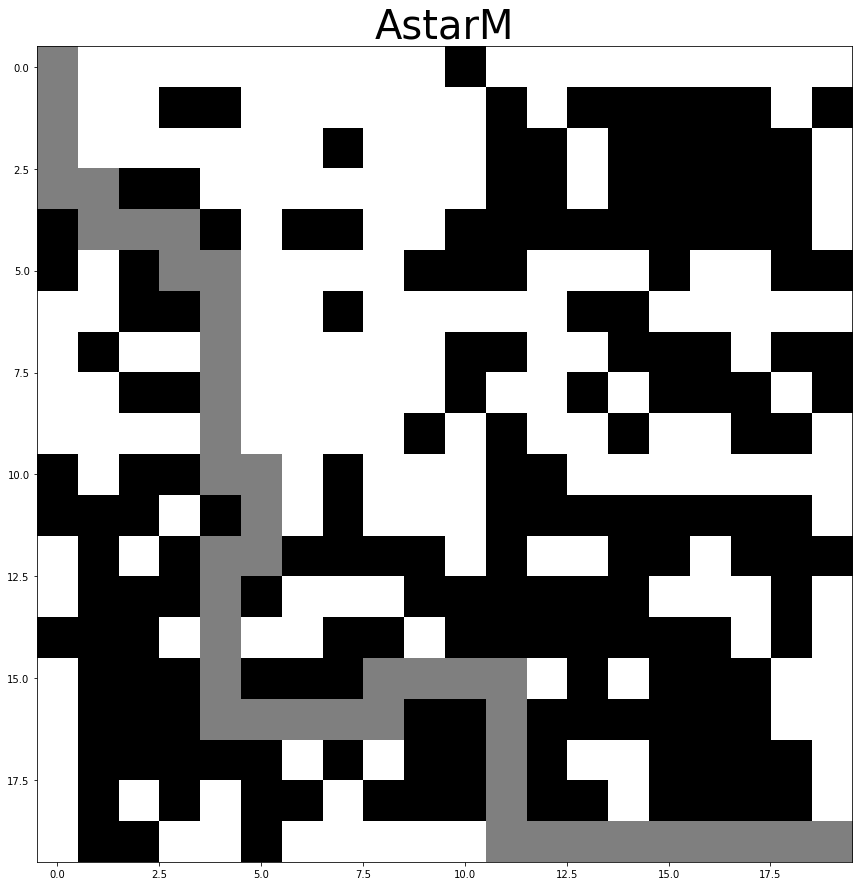

198 197
fails 2
SOLUTION FOUND


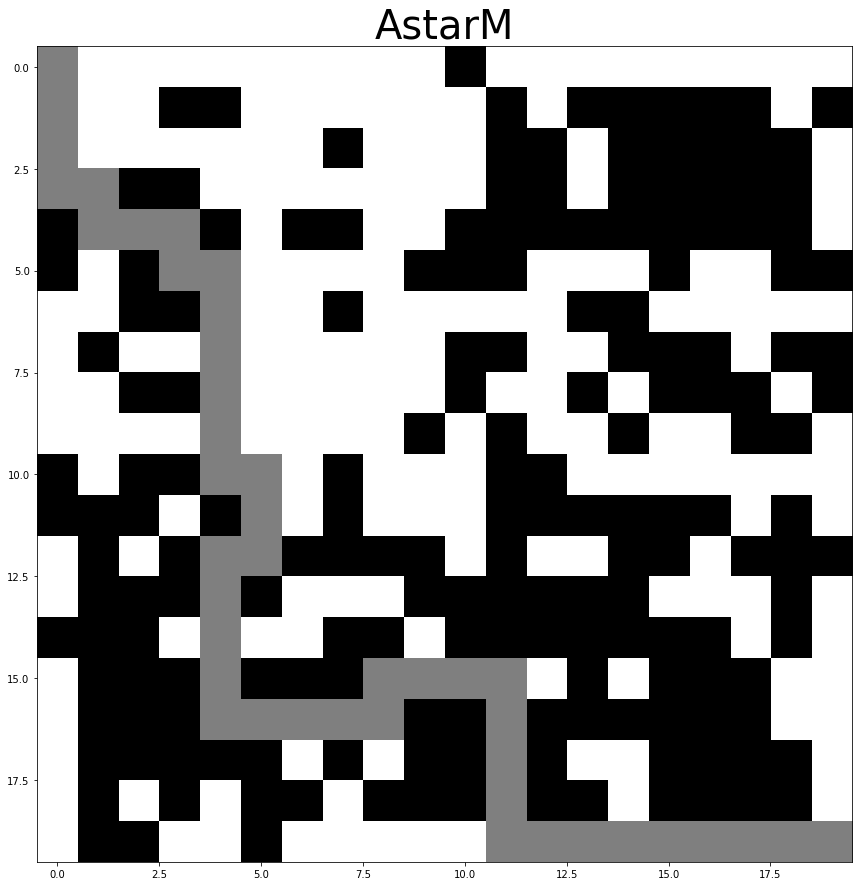

SOLUTION FOUND


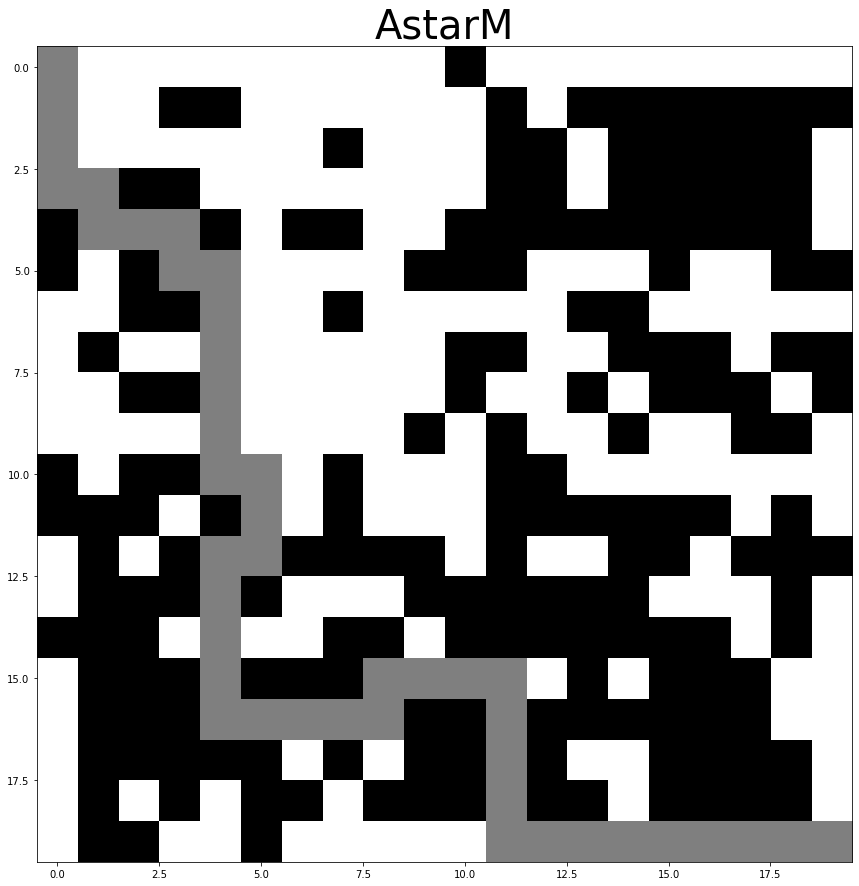

198 198
fails 0
SOLUTION FOUND


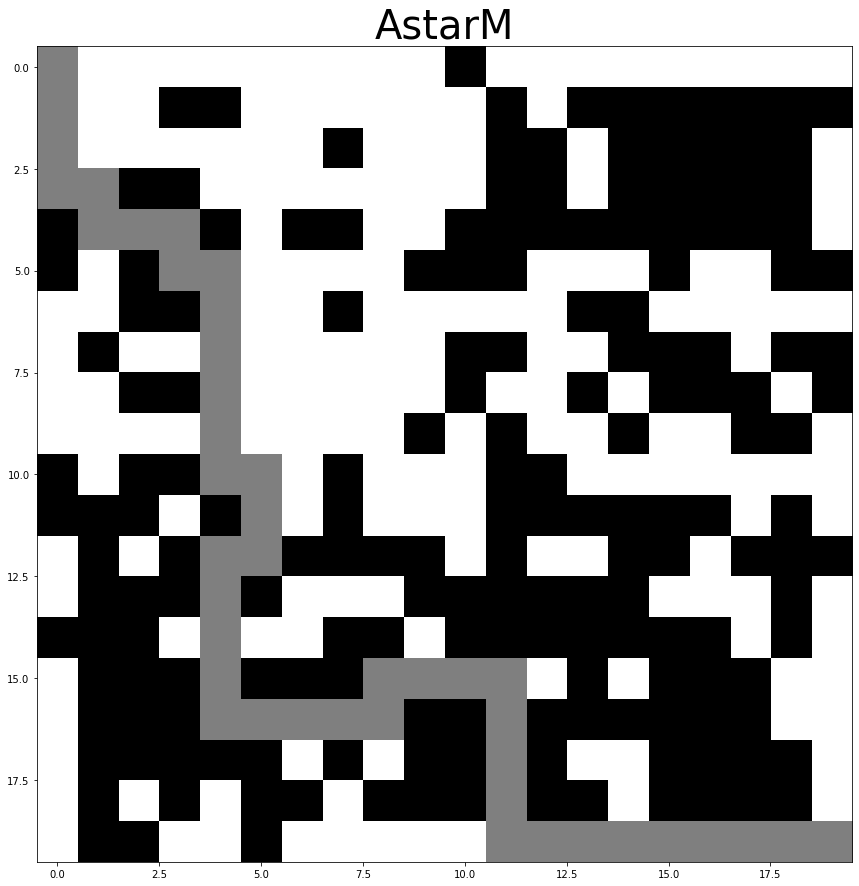

SOLUTION FOUND


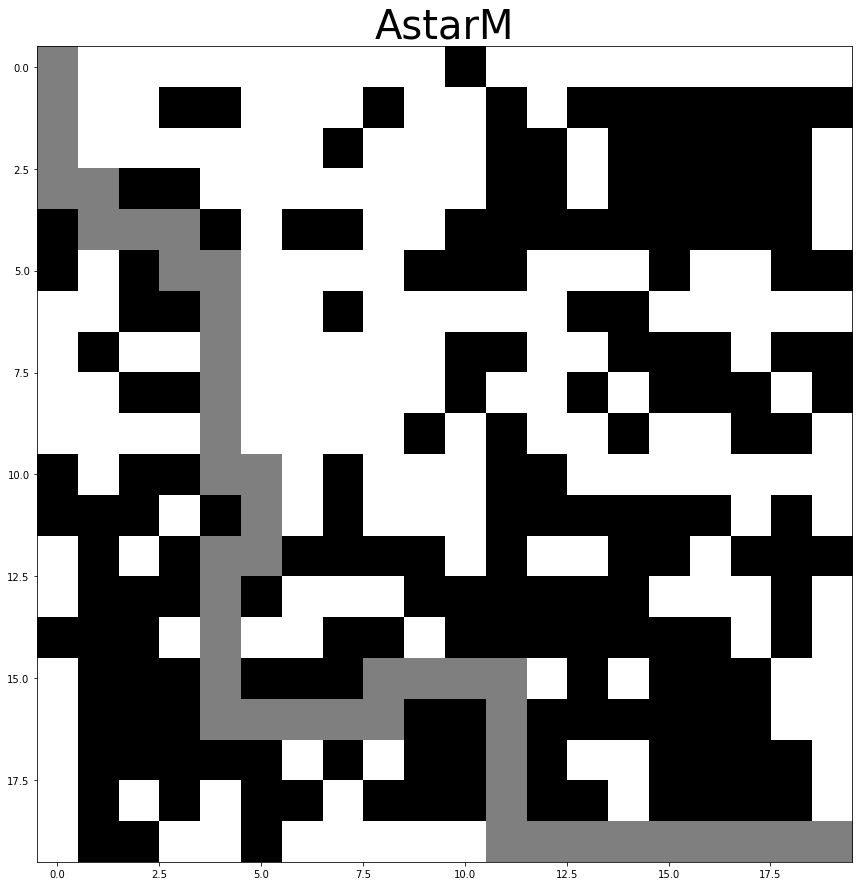

198 193
fails 1
SOLUTION FOUND


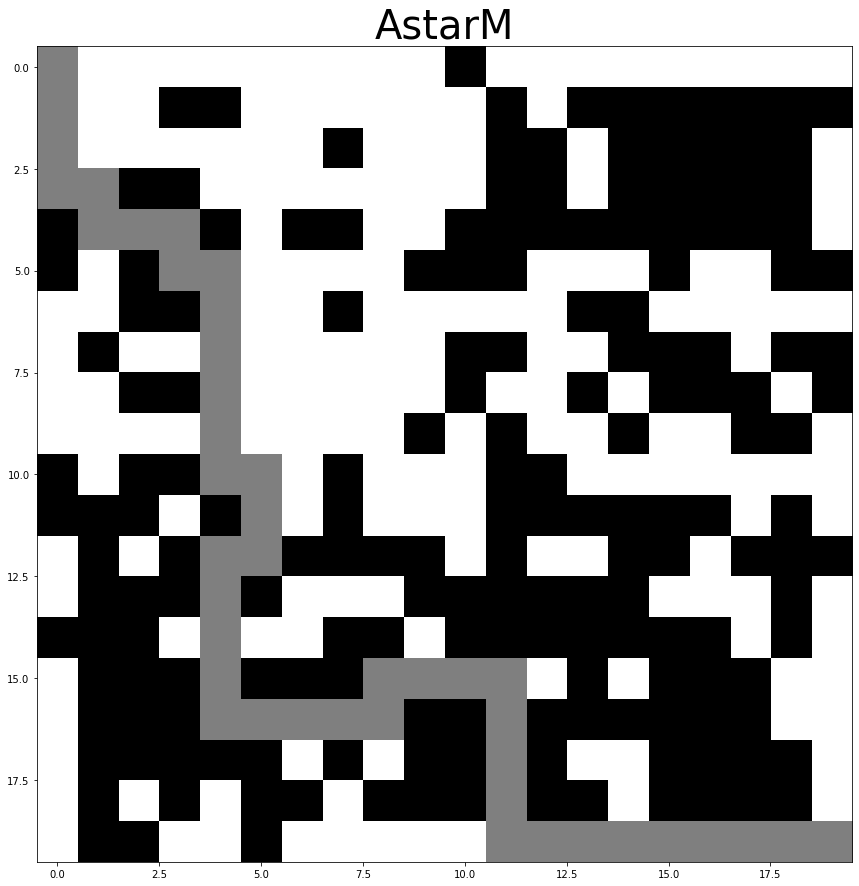

SOLUTION FOUND


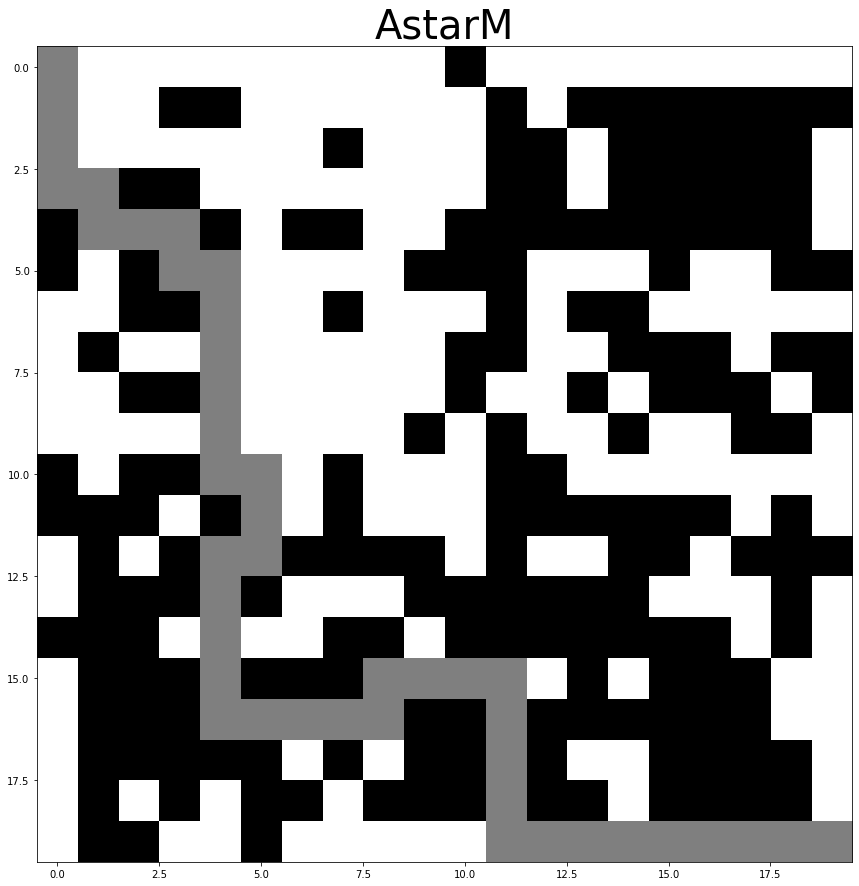

198 175
fails 2
SOLUTION FOUND


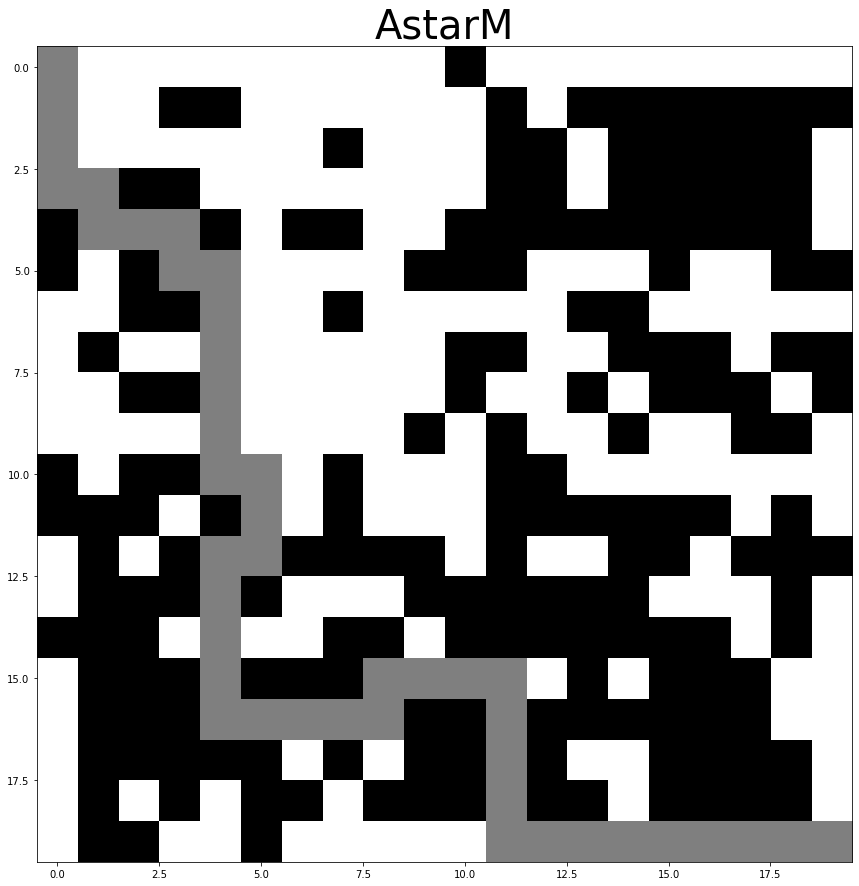

SOLUTION FOUND


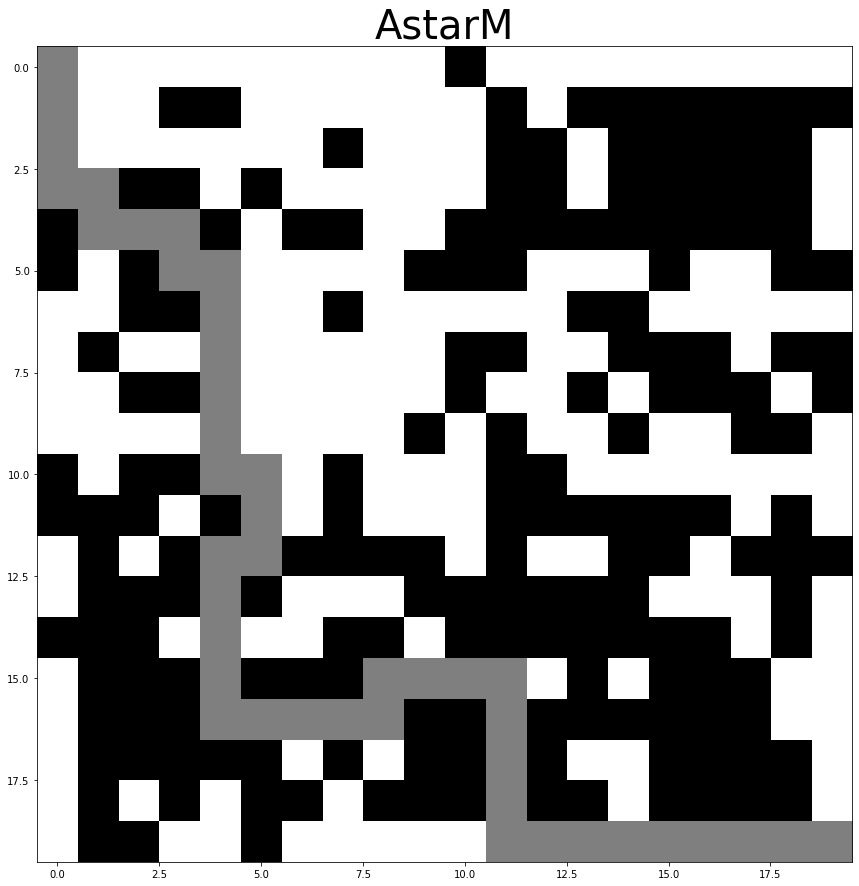

198 194
fails 3
SOLUTION FOUND


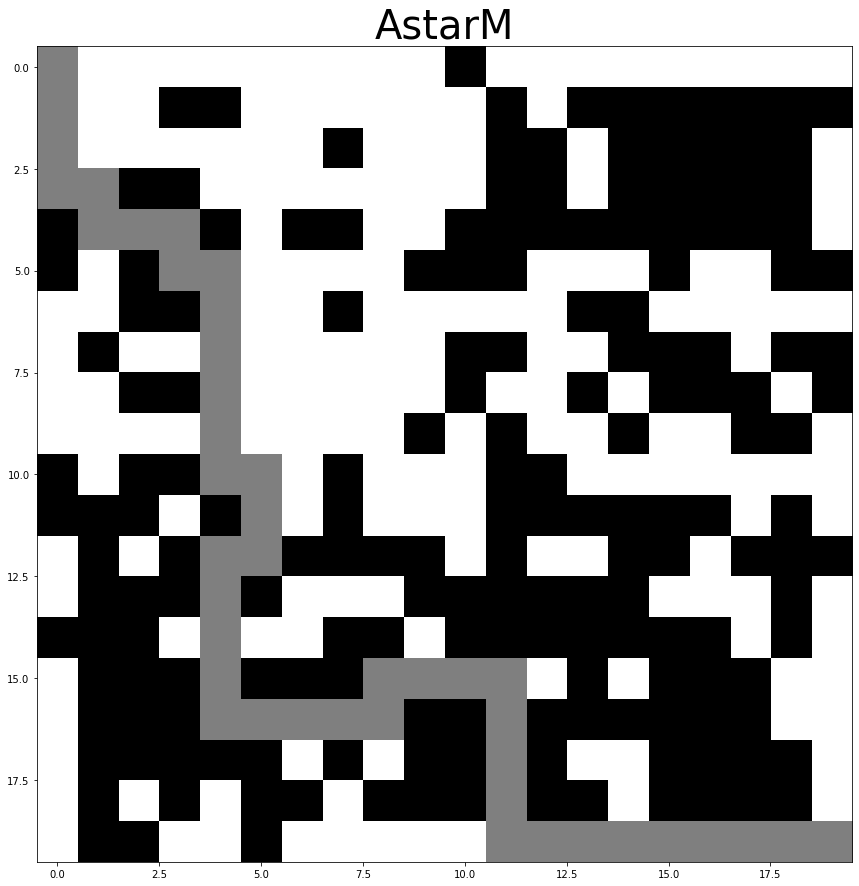

SOLUTION FOUND


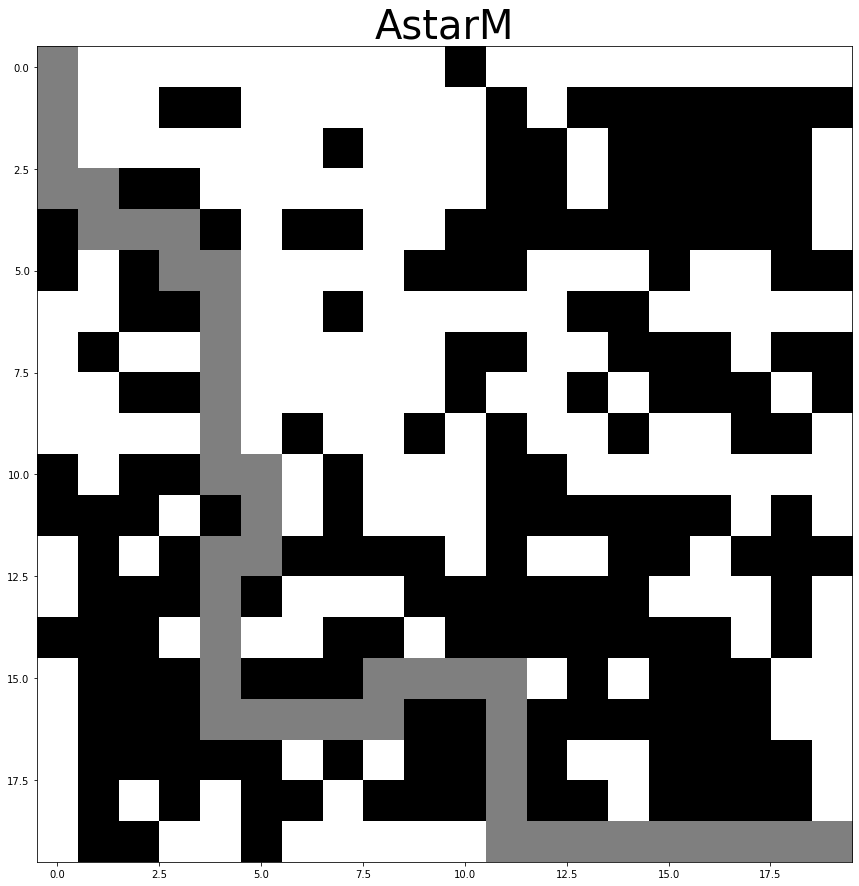

198 194
fails 4
SOLUTION FOUND


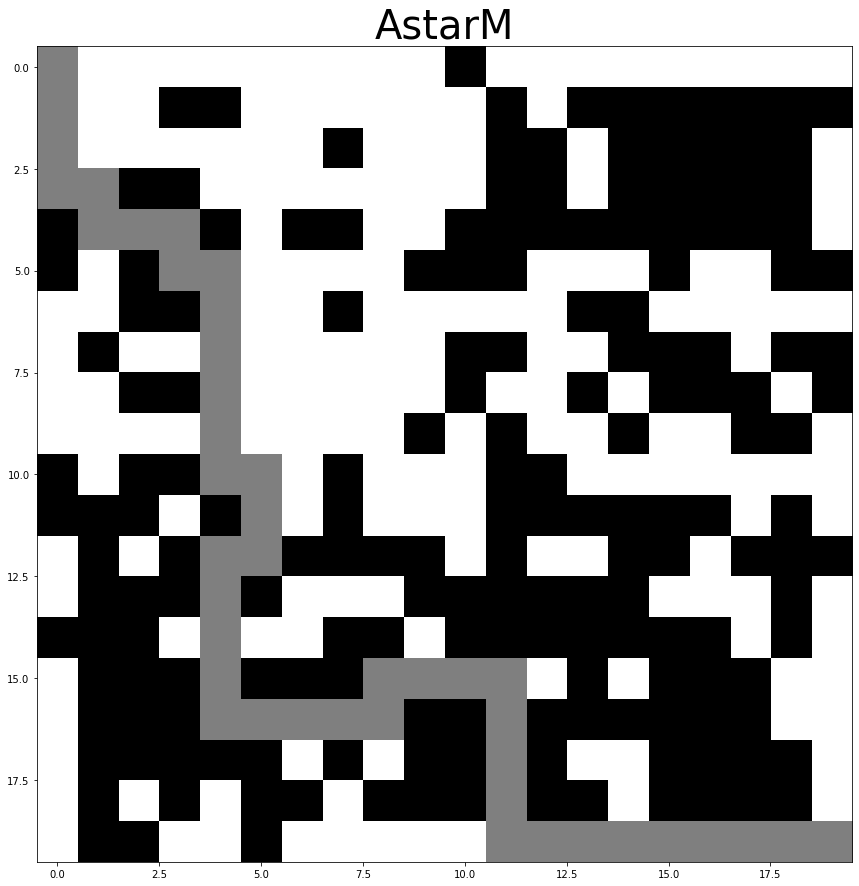

SOLUTION FOUND


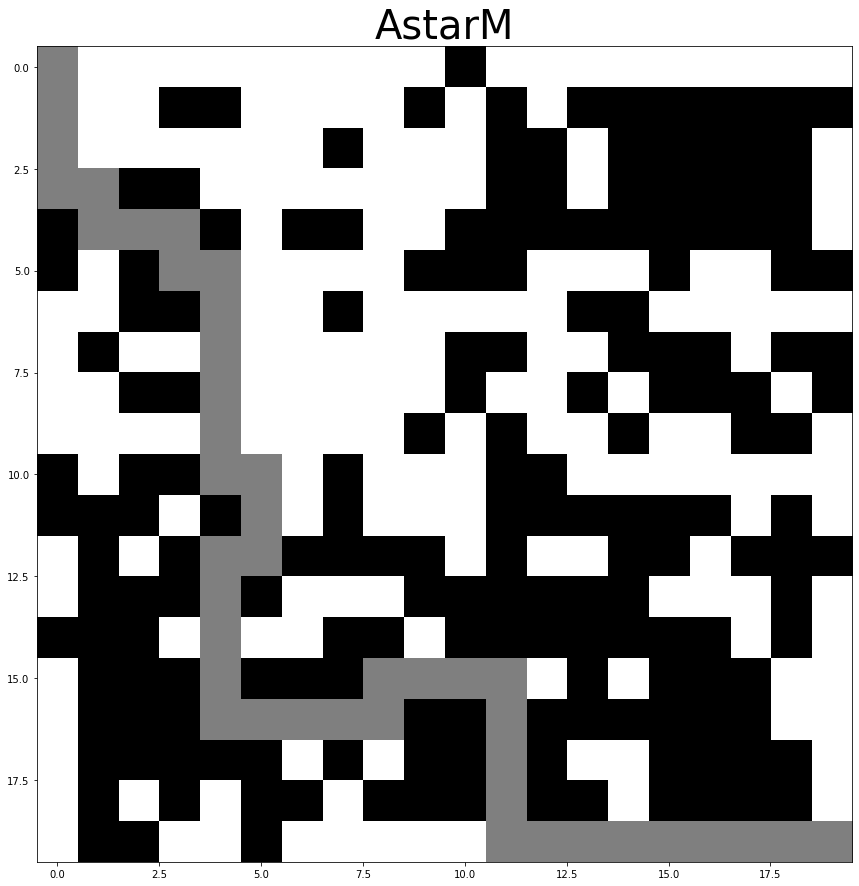

198 194
fails 5
SOLUTION FOUND


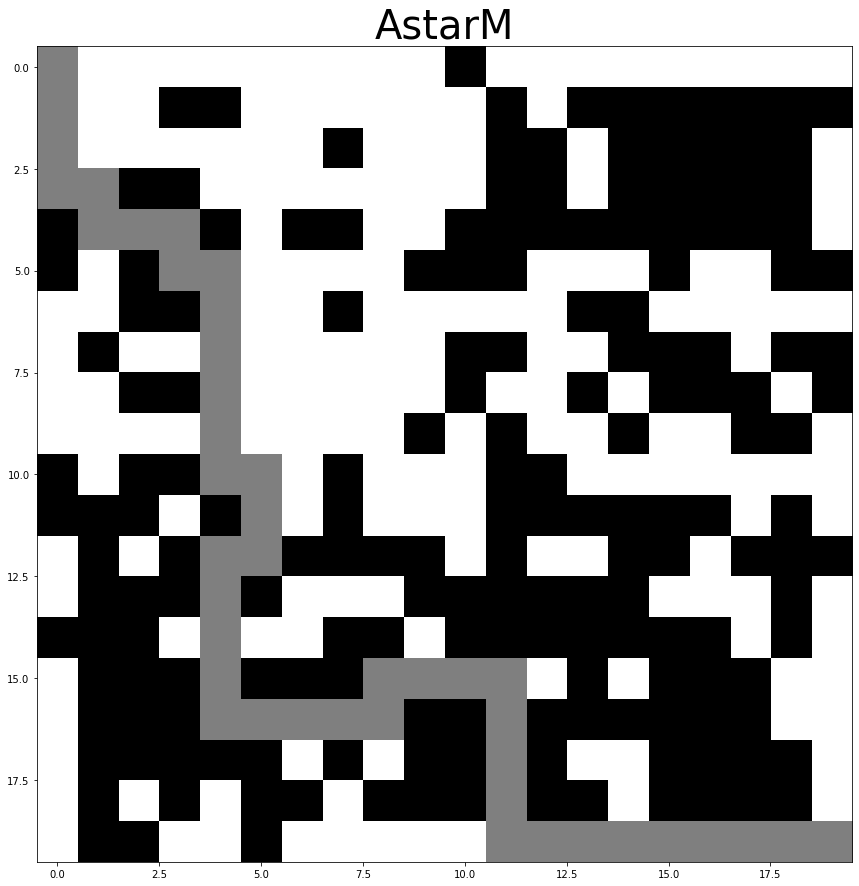

SOLUTION FOUND


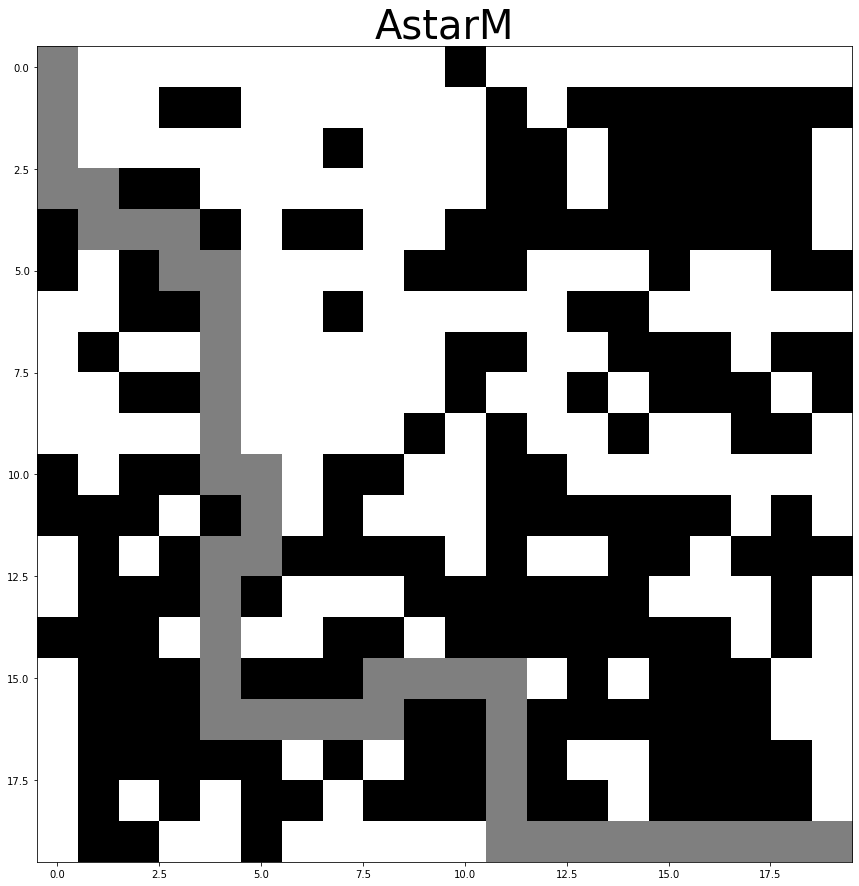

198 188
fails 6
SOLUTION FOUND


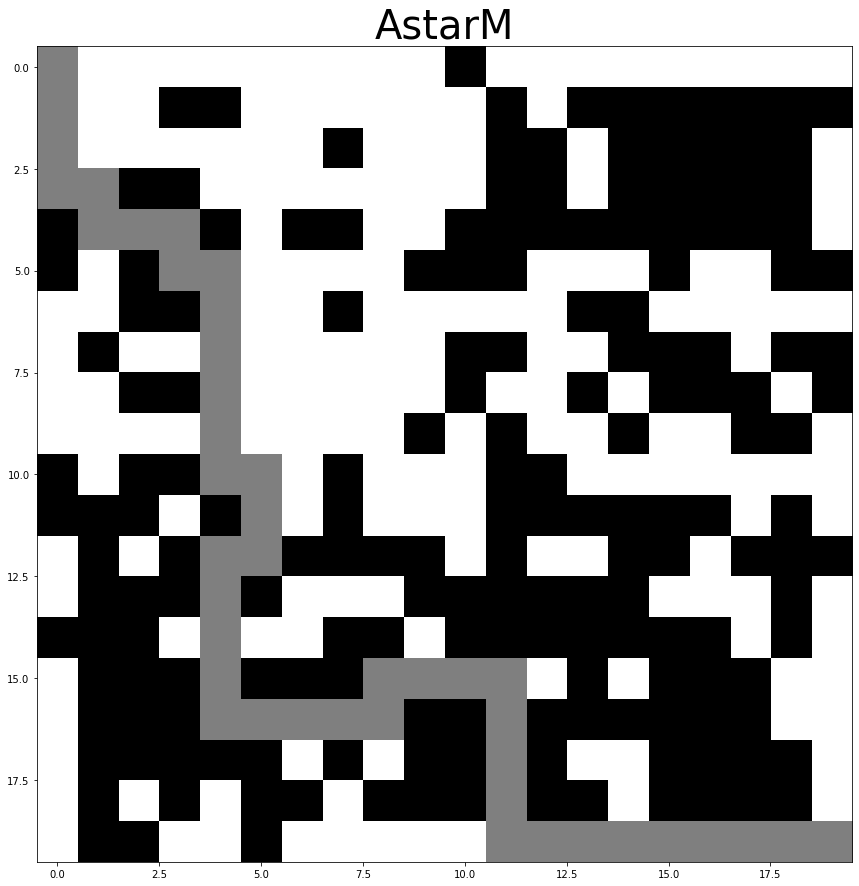

SOLUTION FOUND


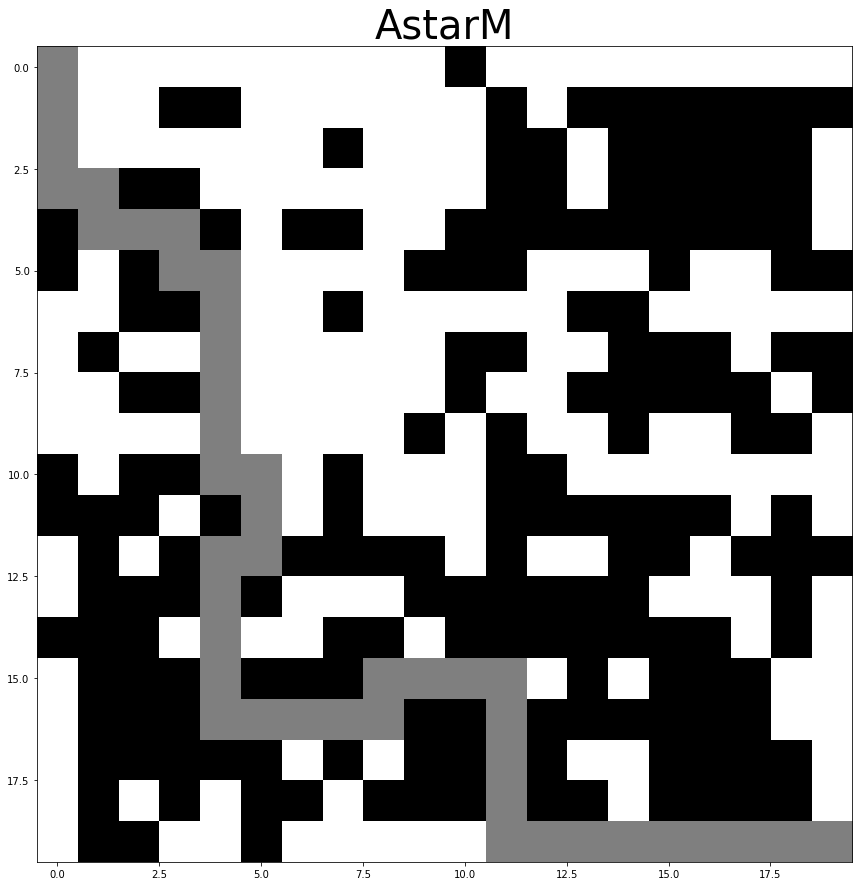

198 198
fails 0
SOLUTION FOUND


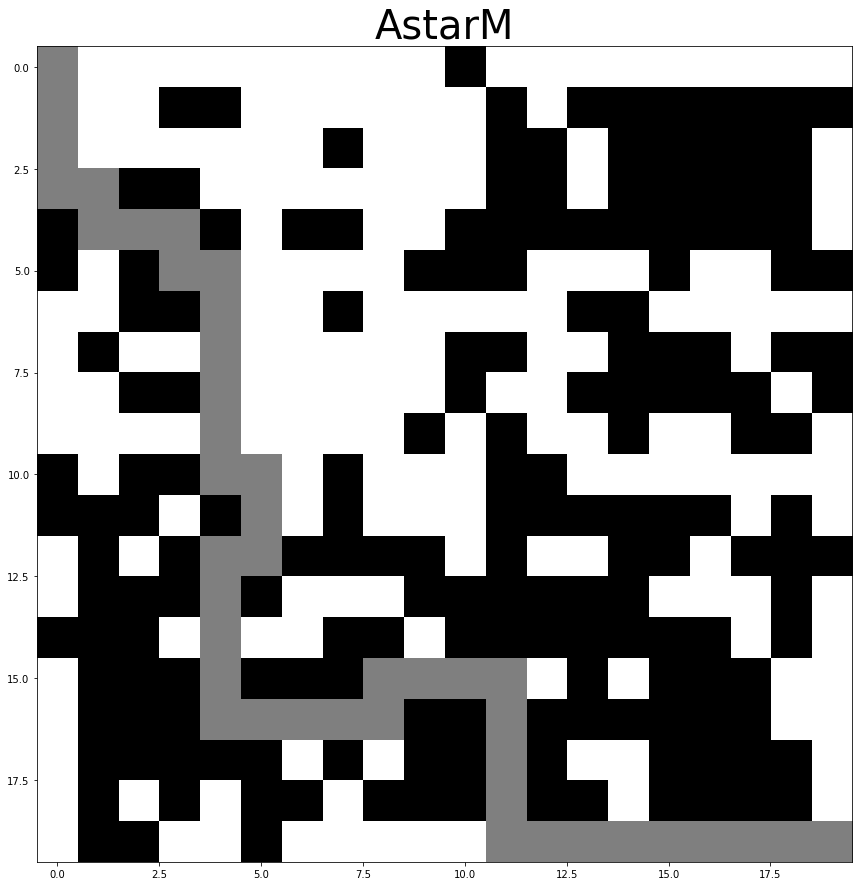

SOLUTION FOUND


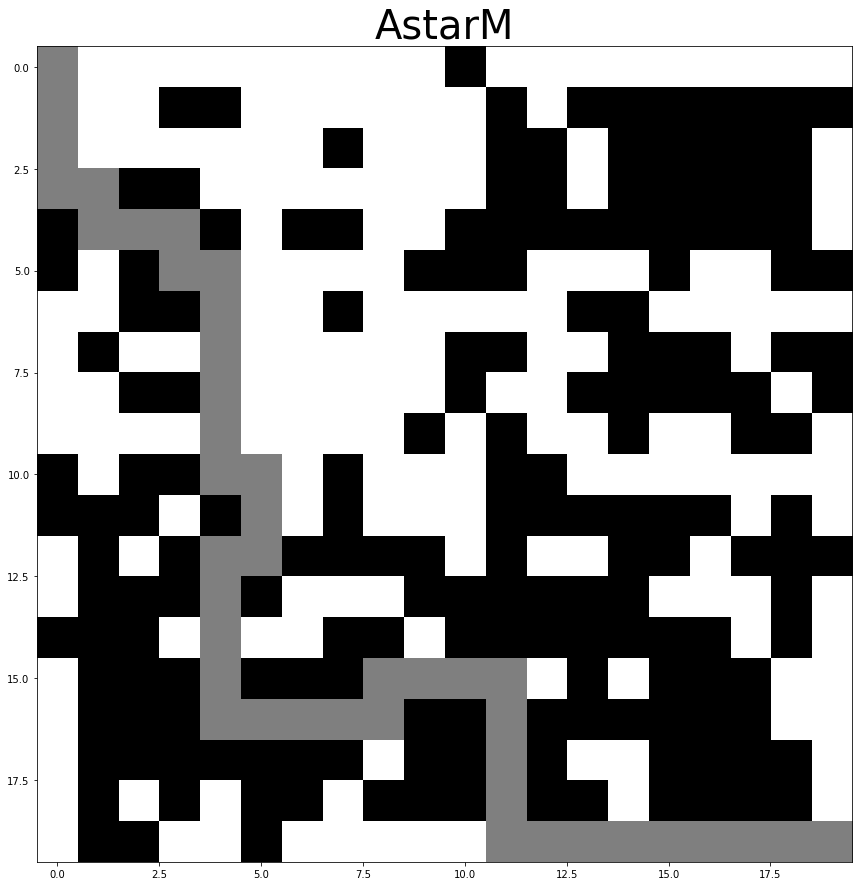

198 197
fails 1
SOLUTION FOUND


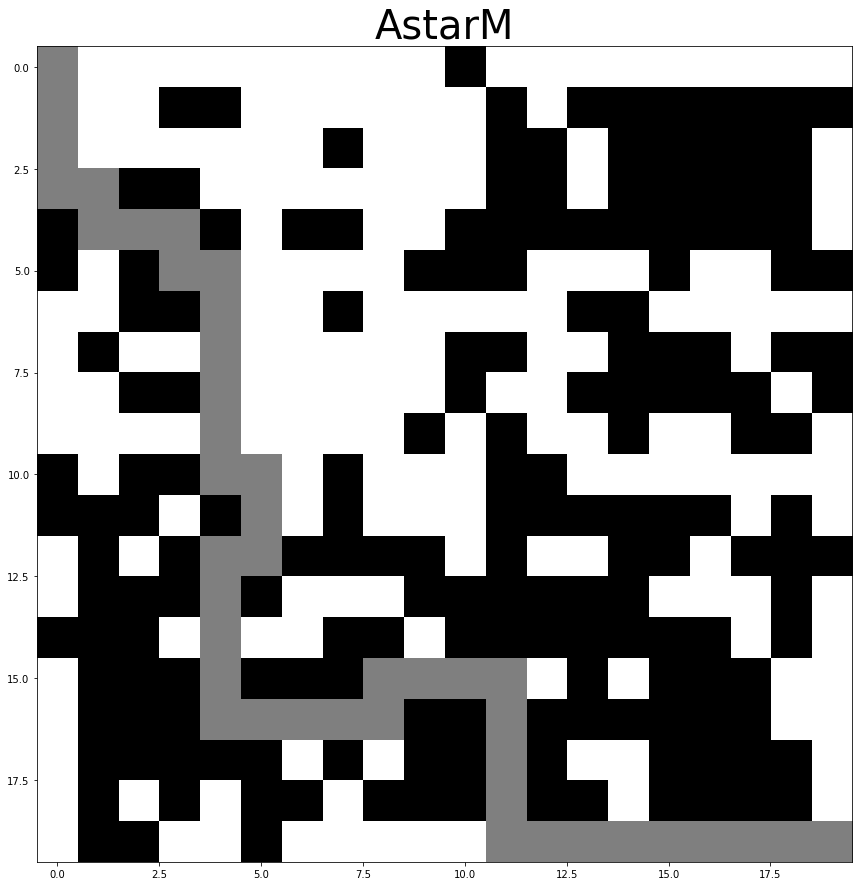

SOLUTION FOUND


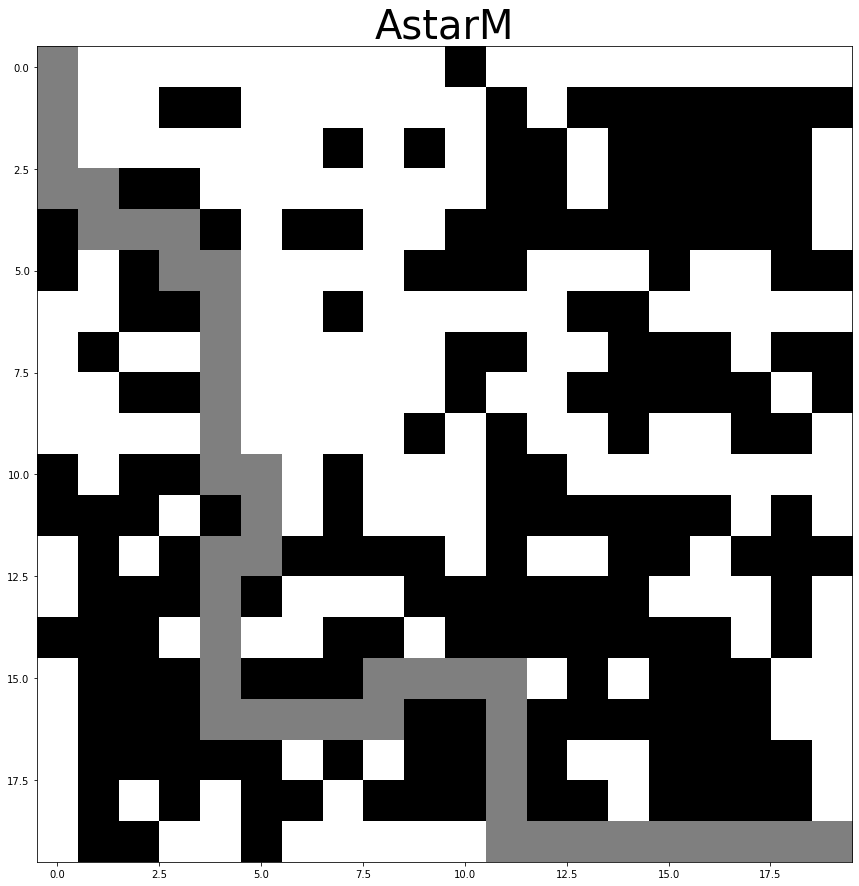

198 194
fails 2
SOLUTION FOUND


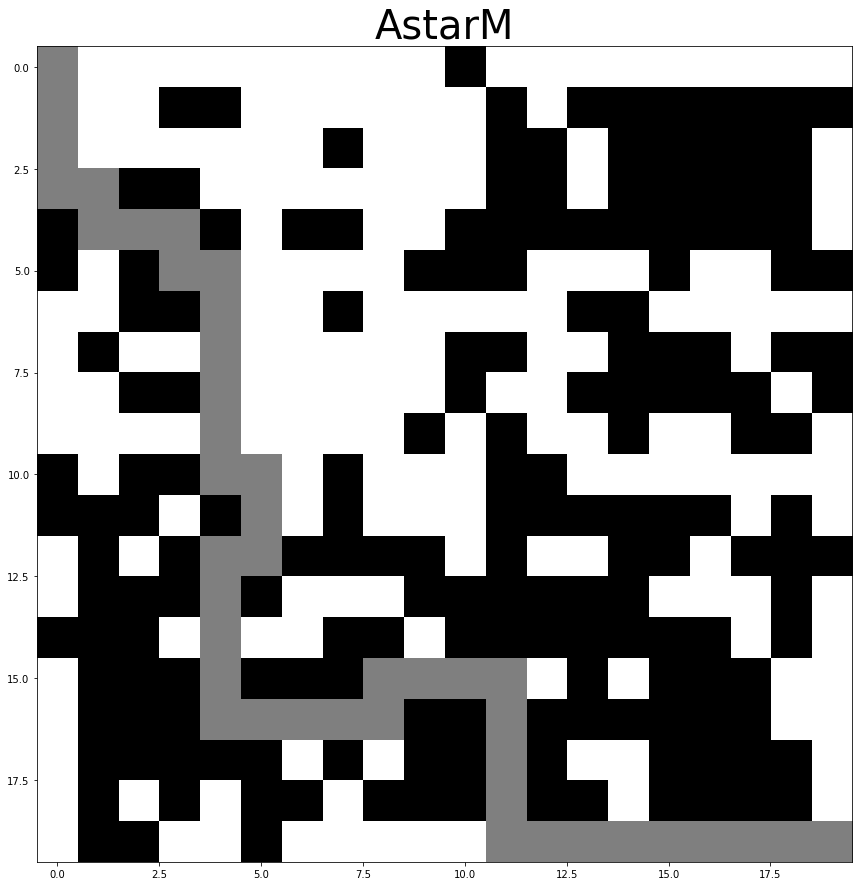

SOLUTION FOUND


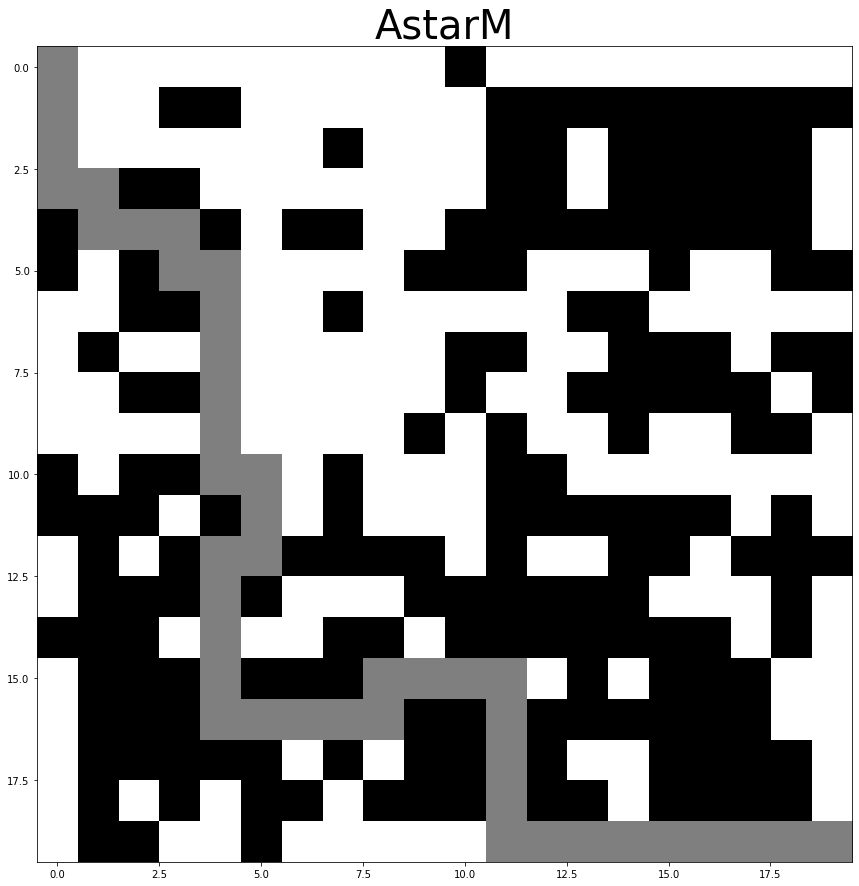

198 198
fails 0
SOLUTION FOUND


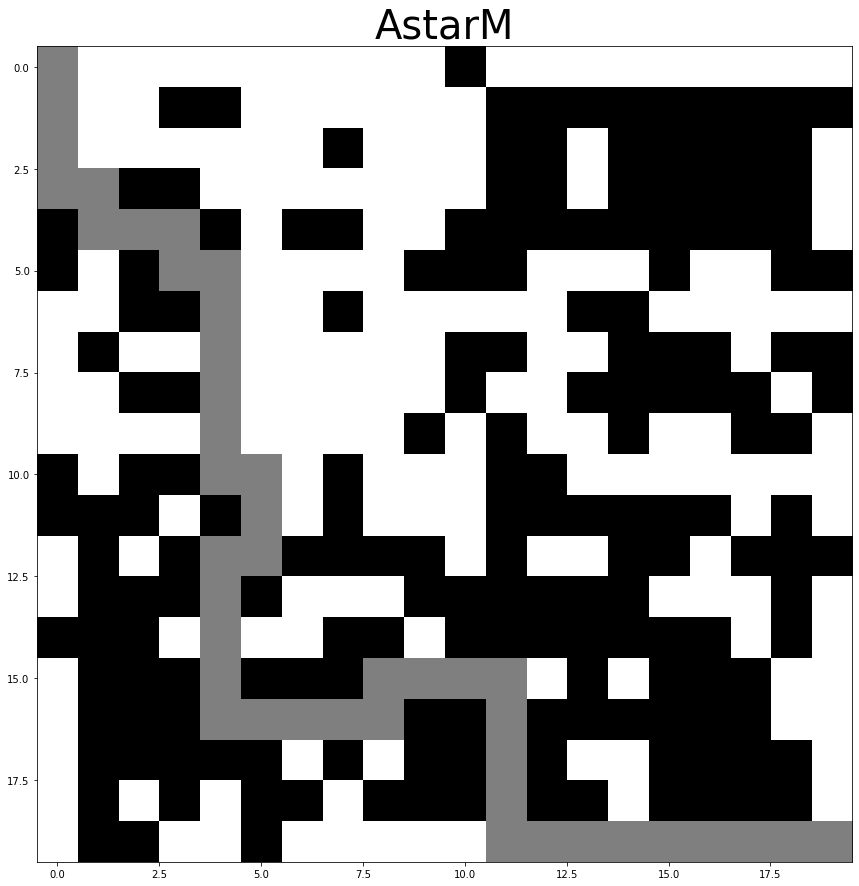

SOLUTION FOUND


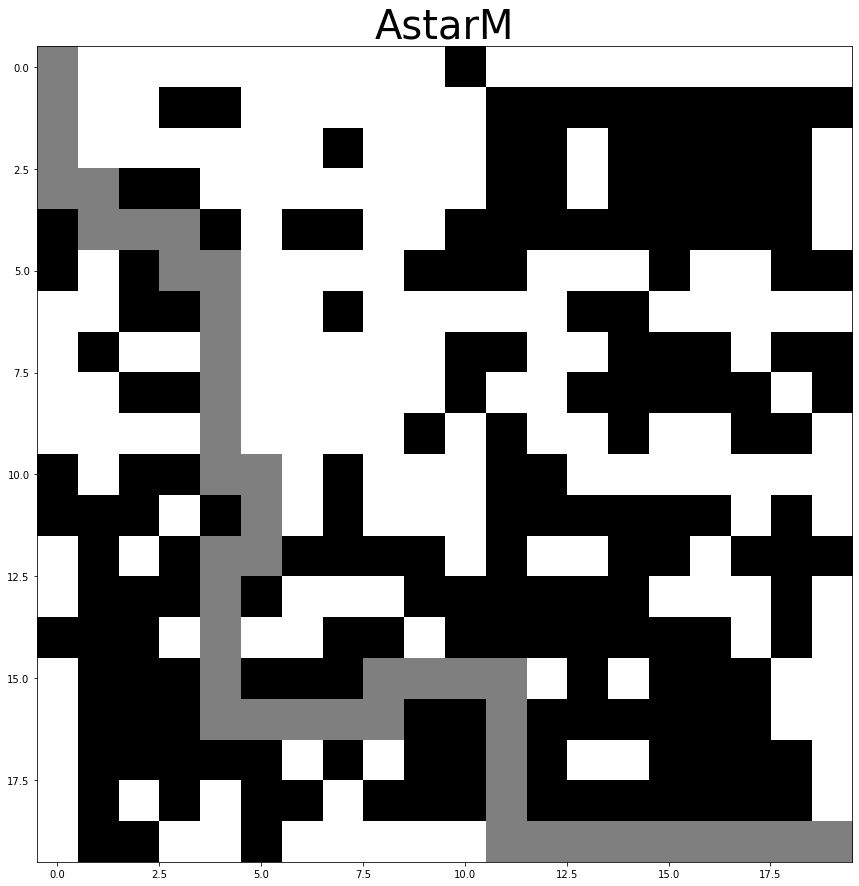

198 198
fails 0
SOLUTION FOUND


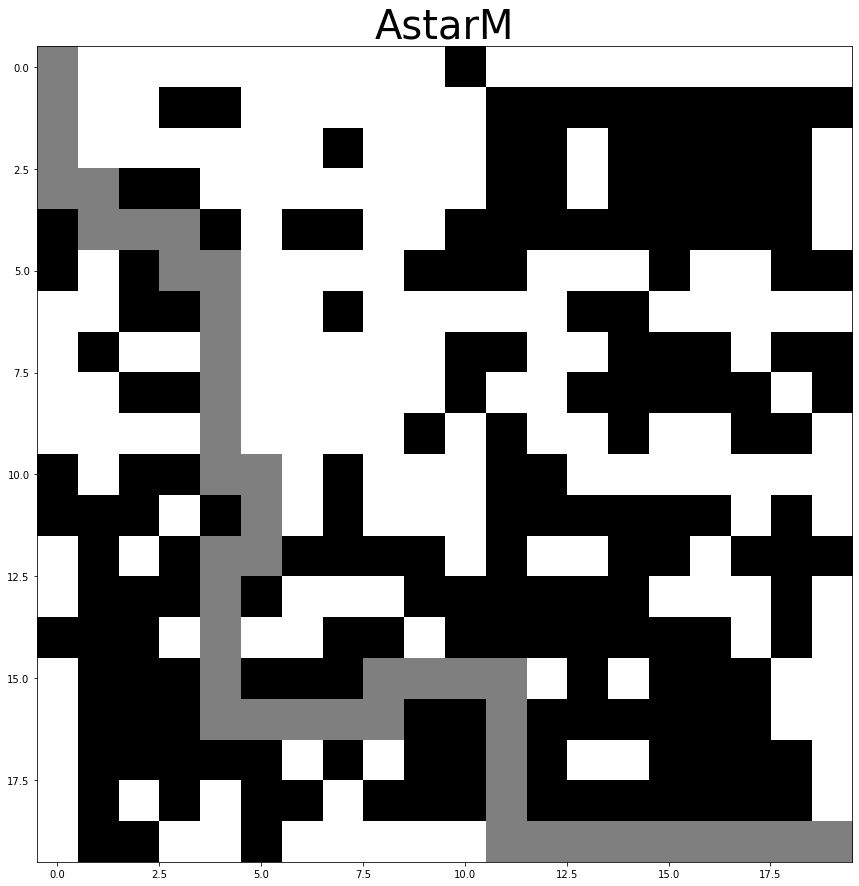

SOLUTION FOUND


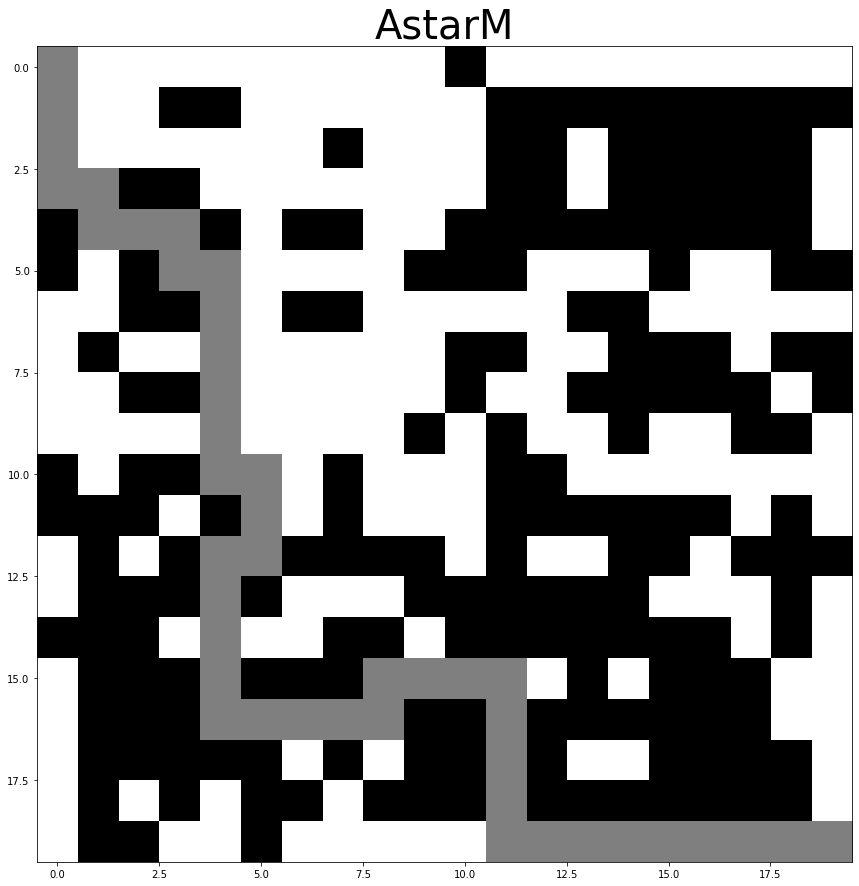

198 195
fails 1
SOLUTION FOUND


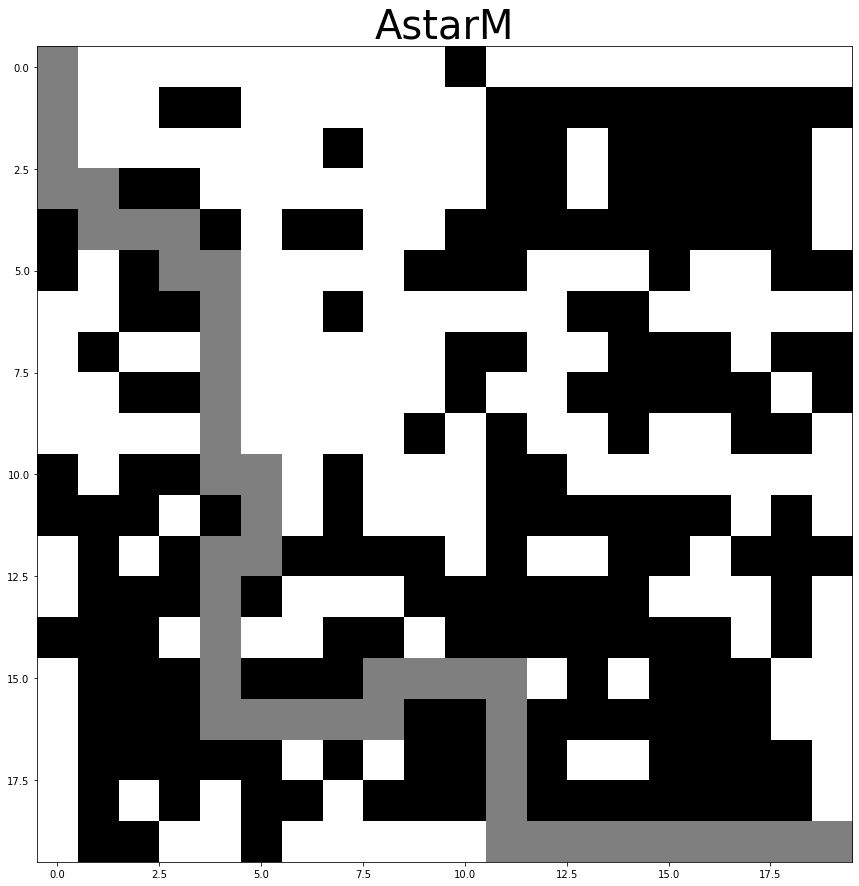

SOLUTION FOUND


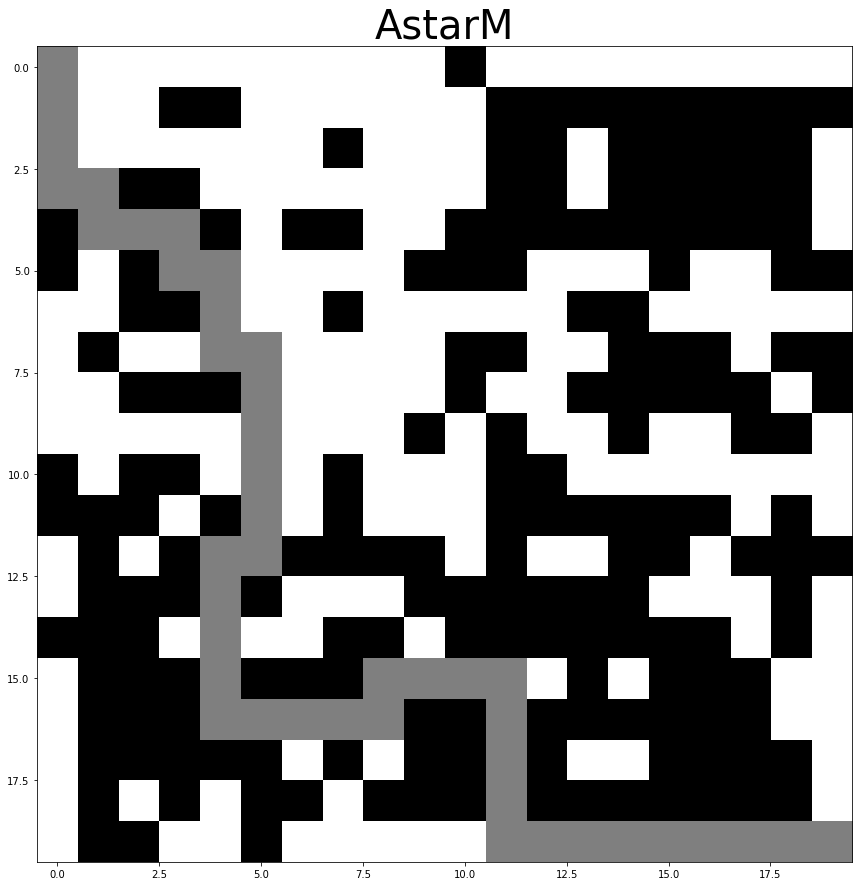

198 195
fails 2
SOLUTION FOUND


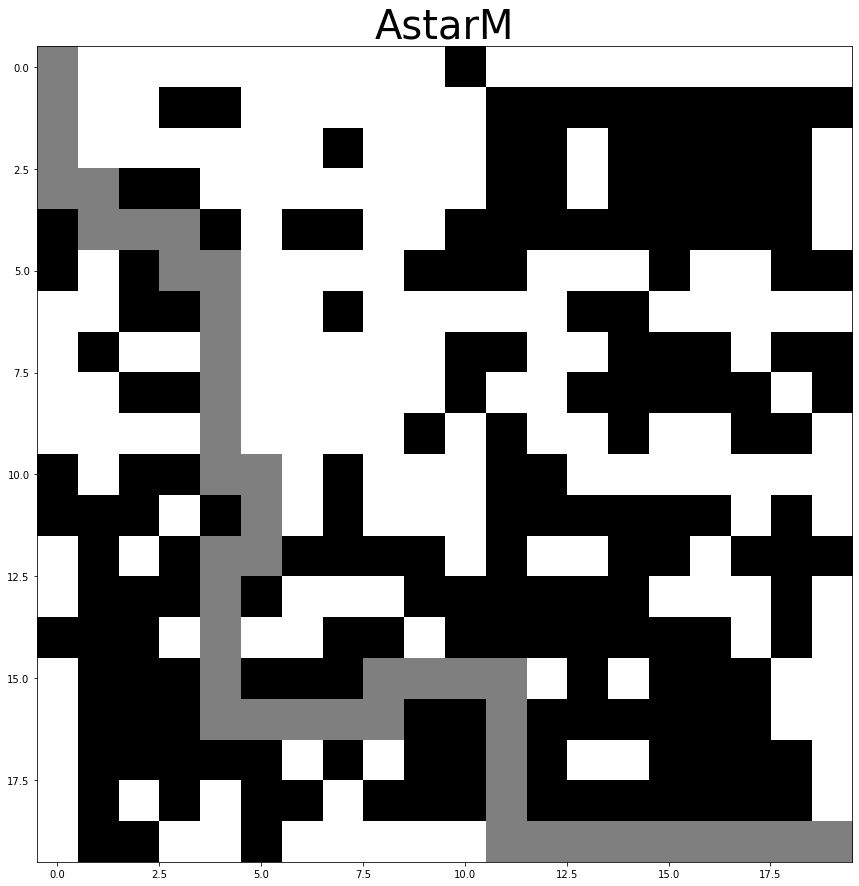

SOLUTION FOUND


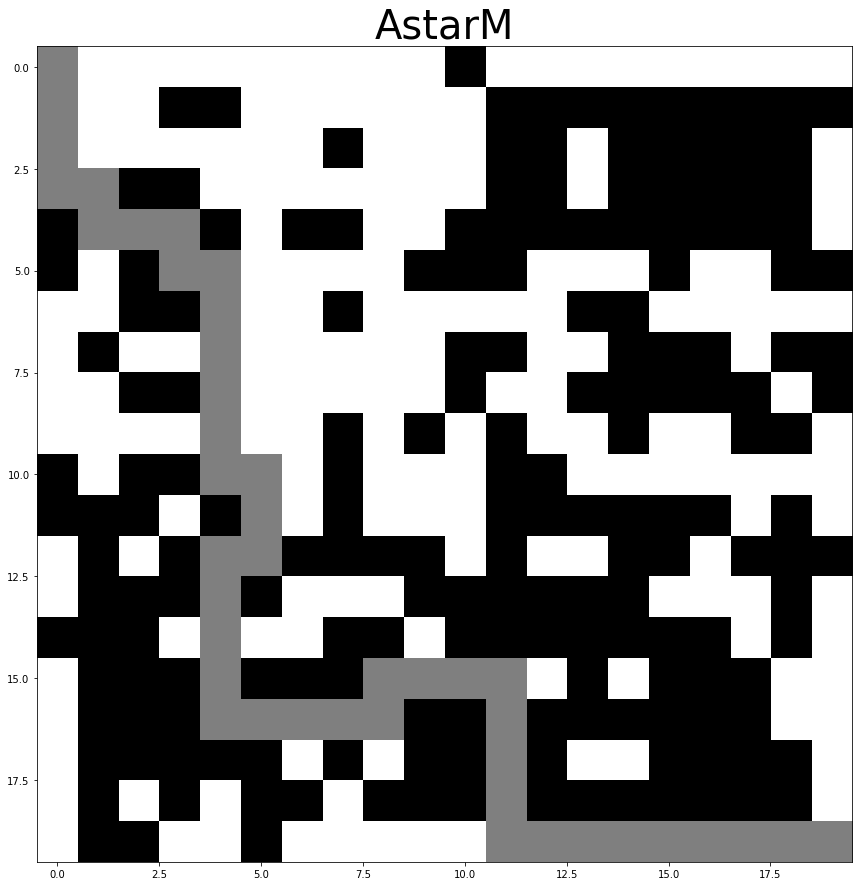

198 195
fails 3
SOLUTION FOUND


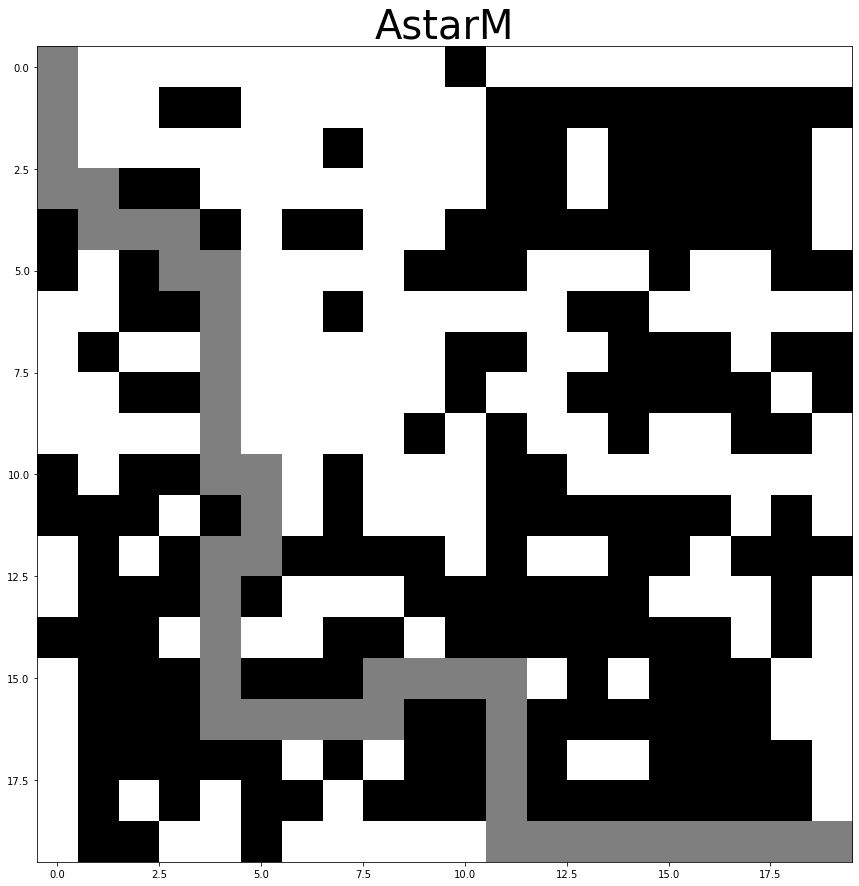

SOLUTION FOUND


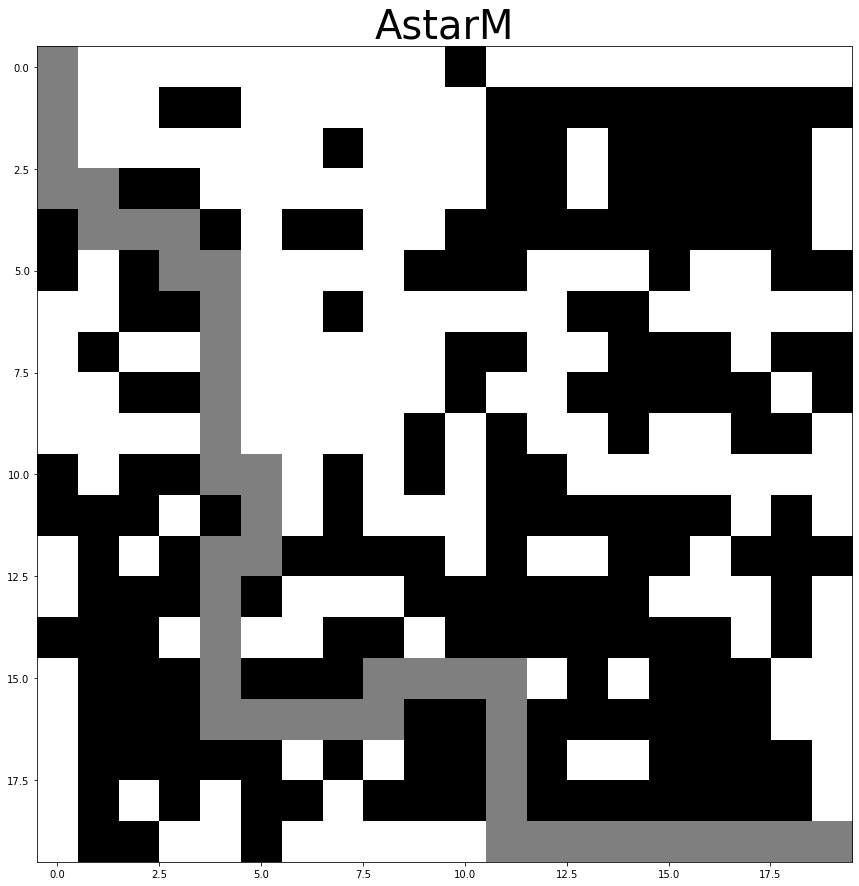

198 194
fails 4
SOLUTION FOUND


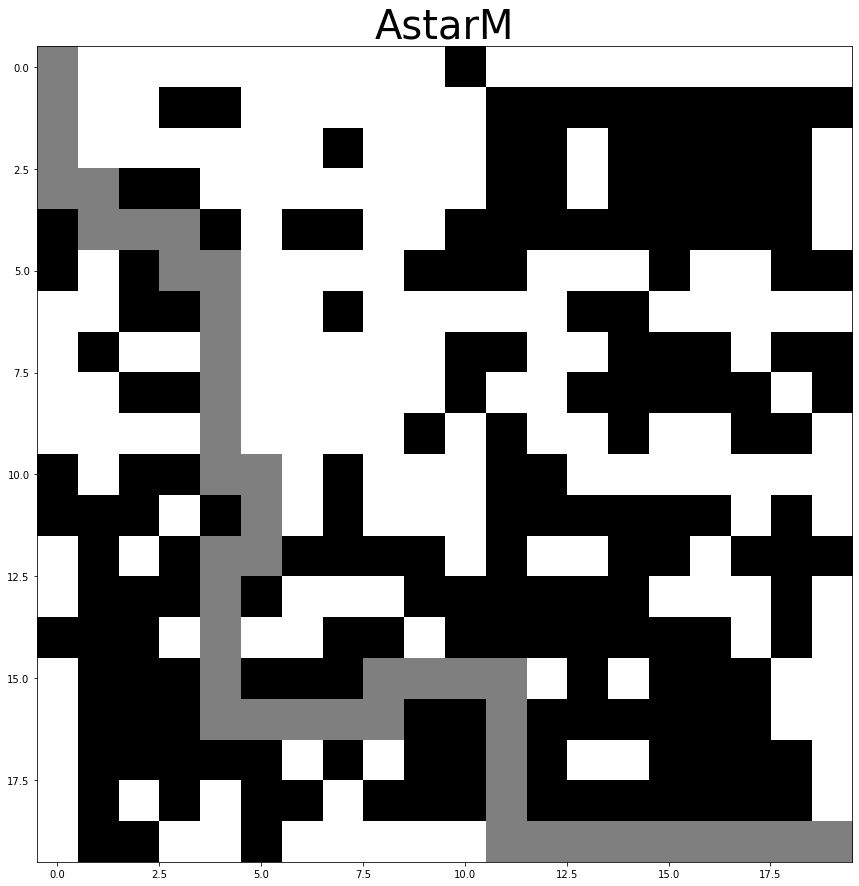

SOLUTION FOUND


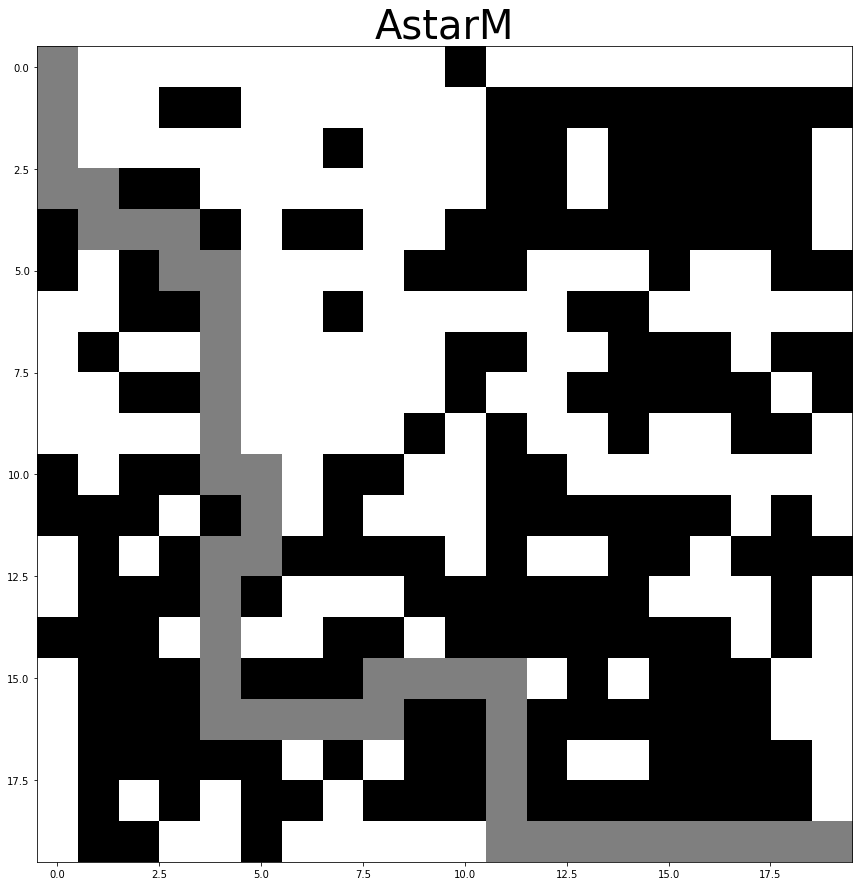

198 188
fails 5
SOLUTION FOUND


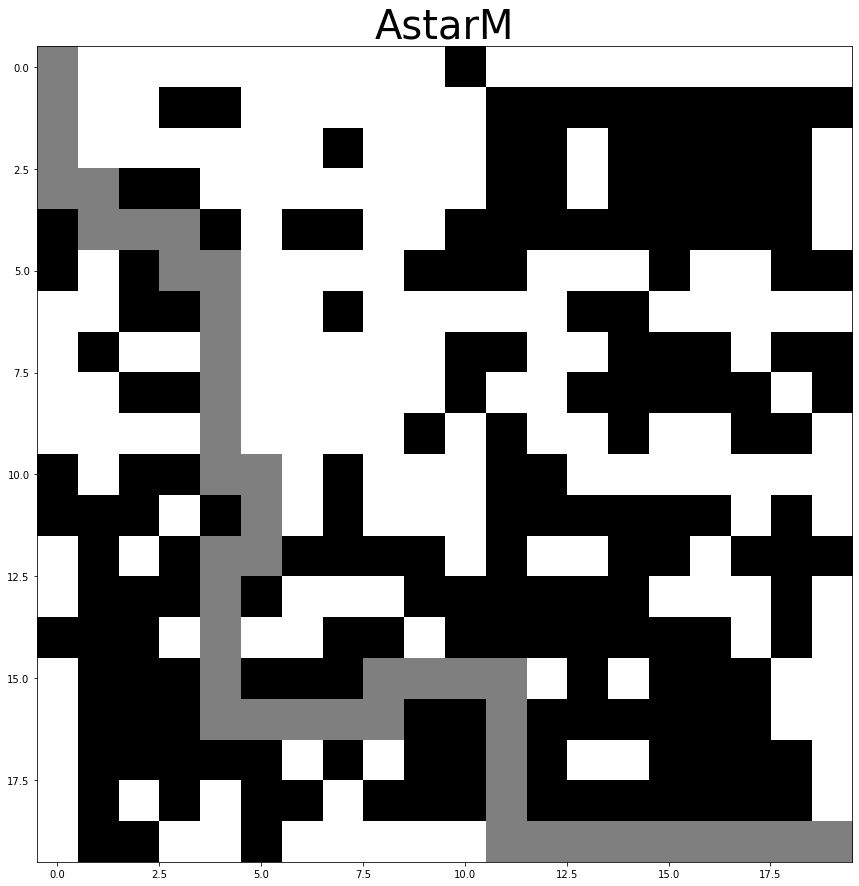

SOLUTION FOUND


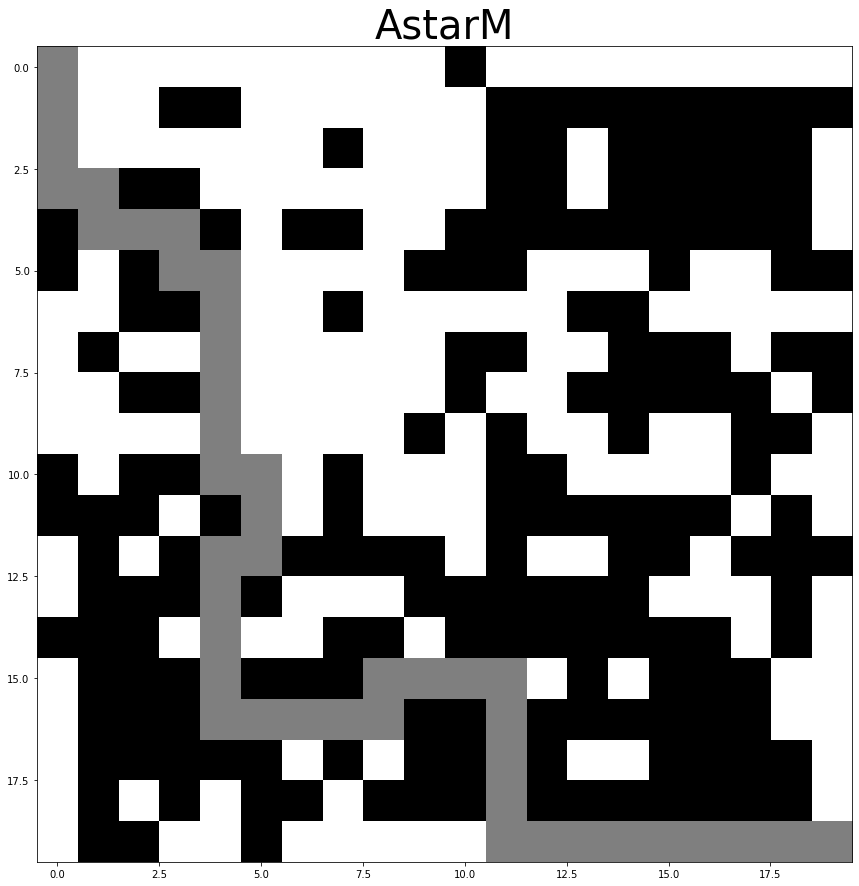

198 192
fails 6
SOLUTION FOUND


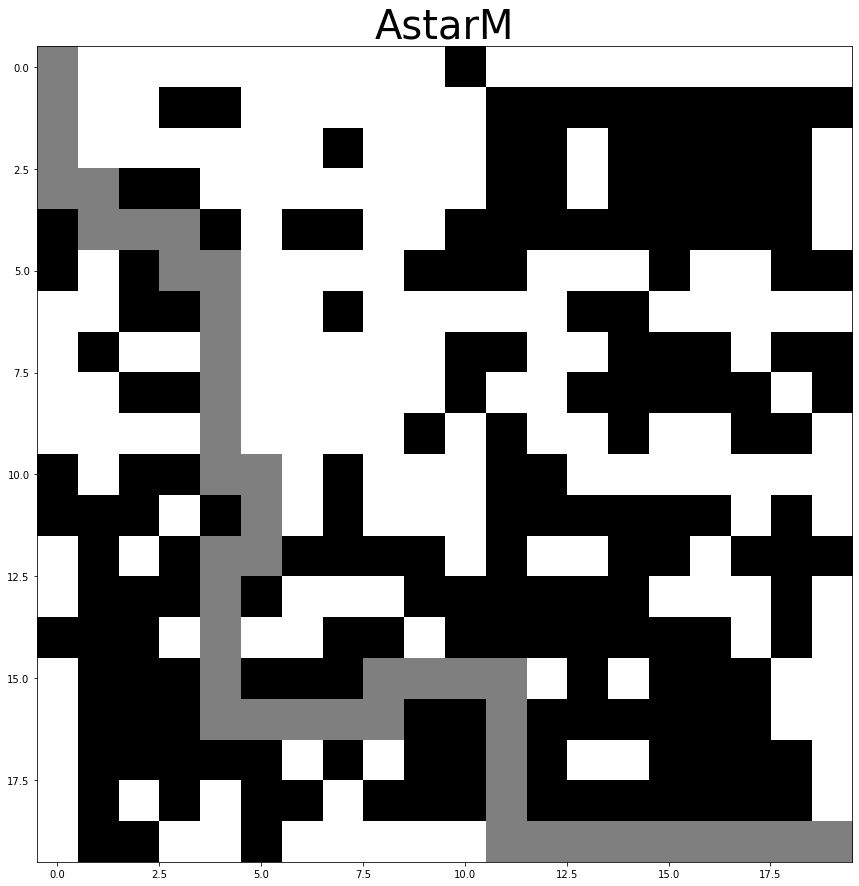

SOLUTION FOUND


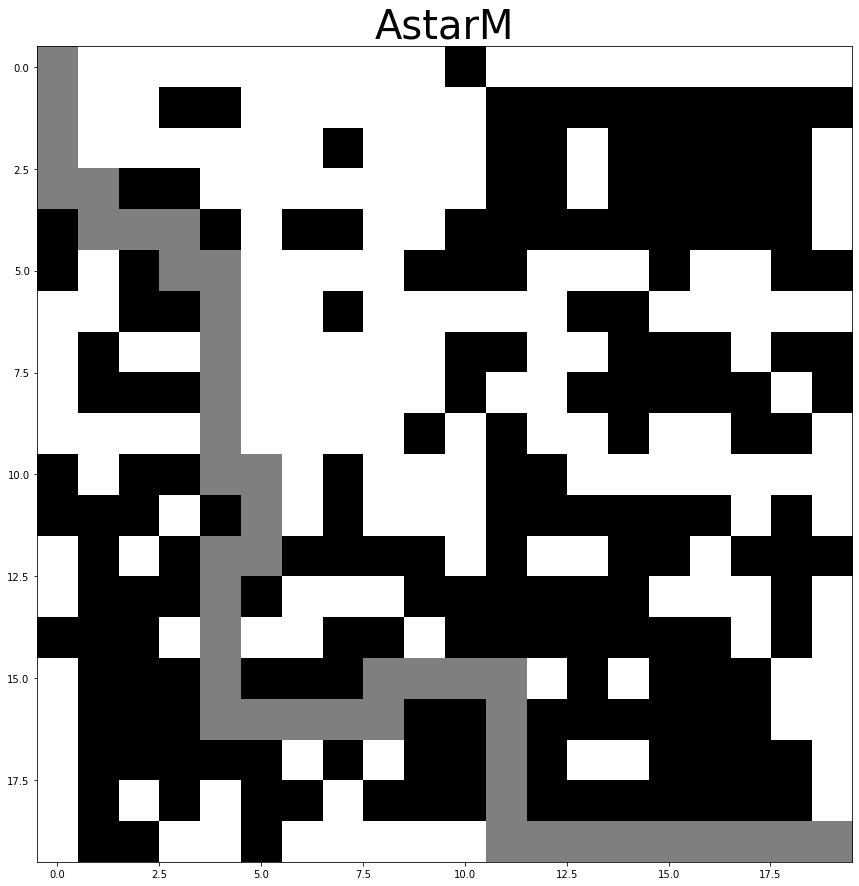

198 196
fails 7
SOLUTION FOUND


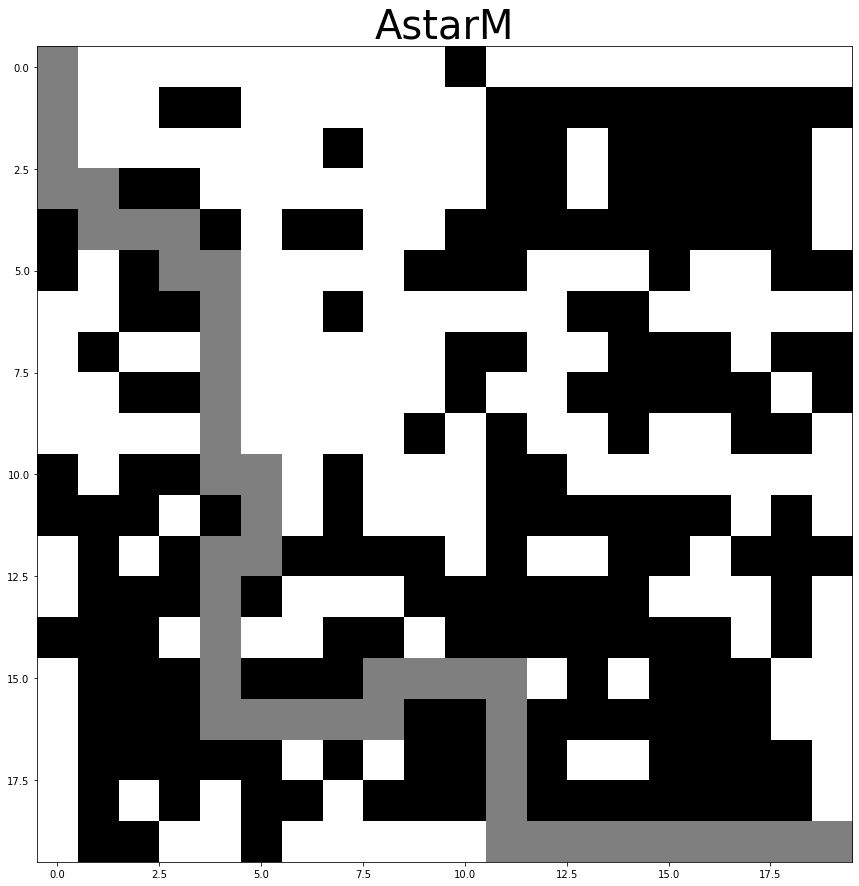

SOLUTION FOUND


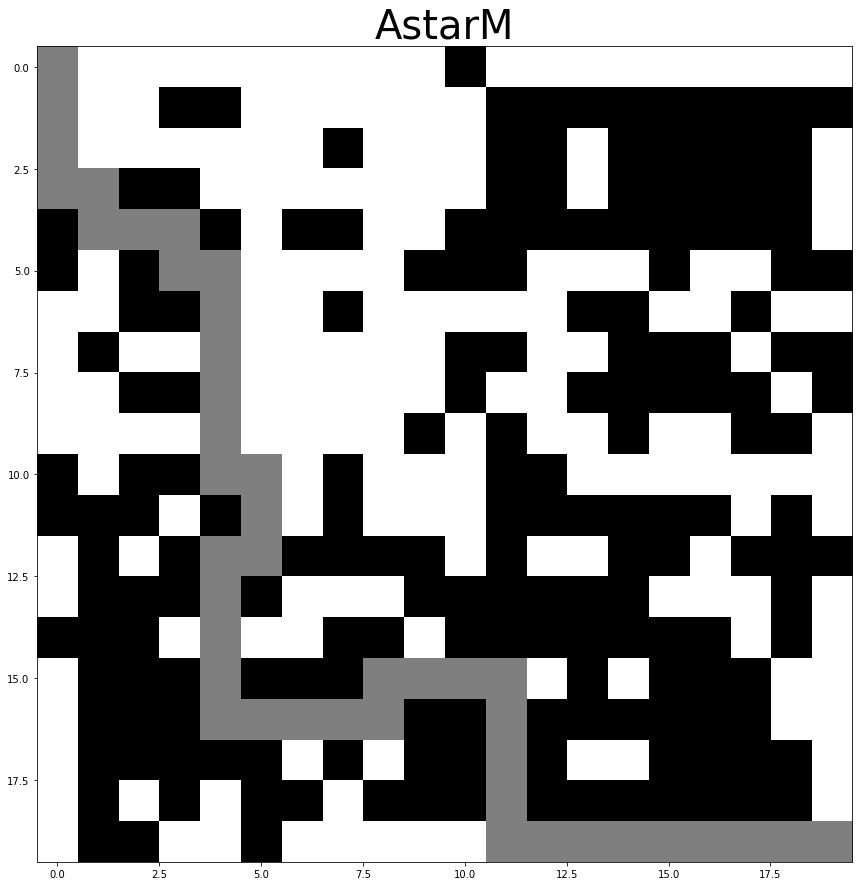

198 198
fails 0
SOLUTION FOUND


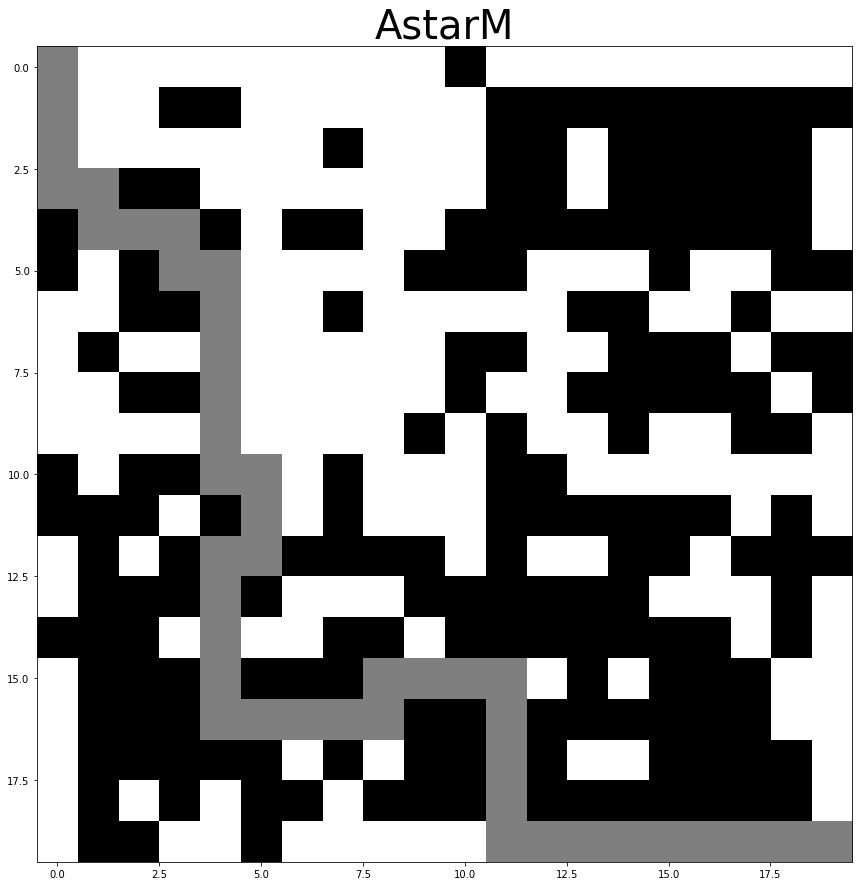

SOLUTION FOUND


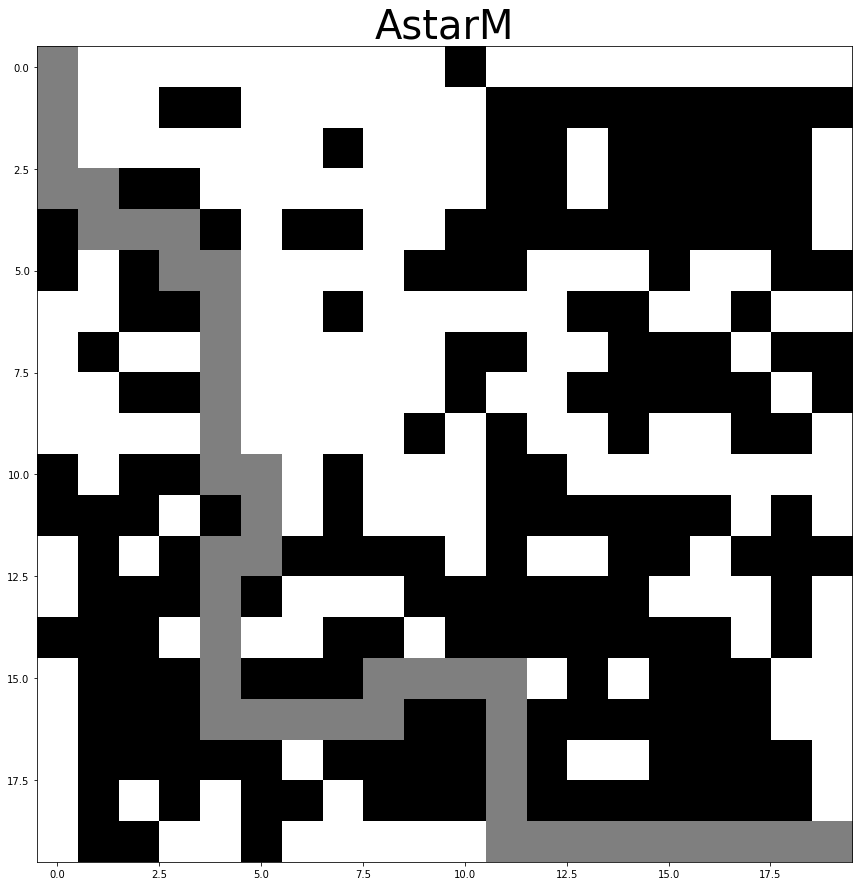

198 197
fails 1
SOLUTION FOUND


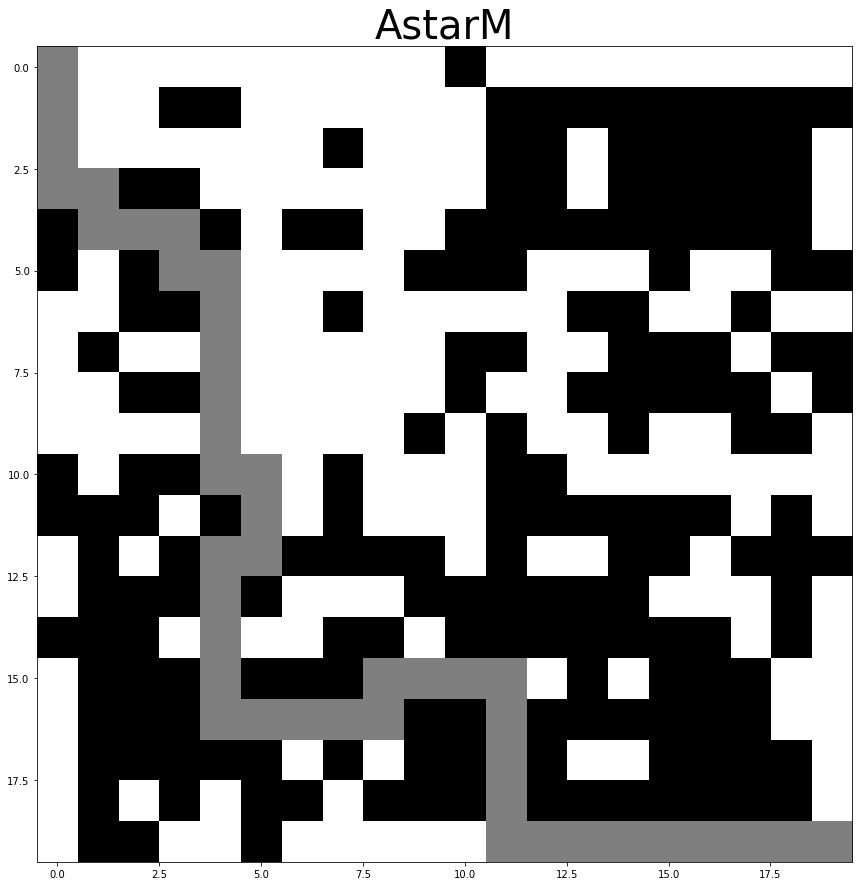

SOLUTION FOUND


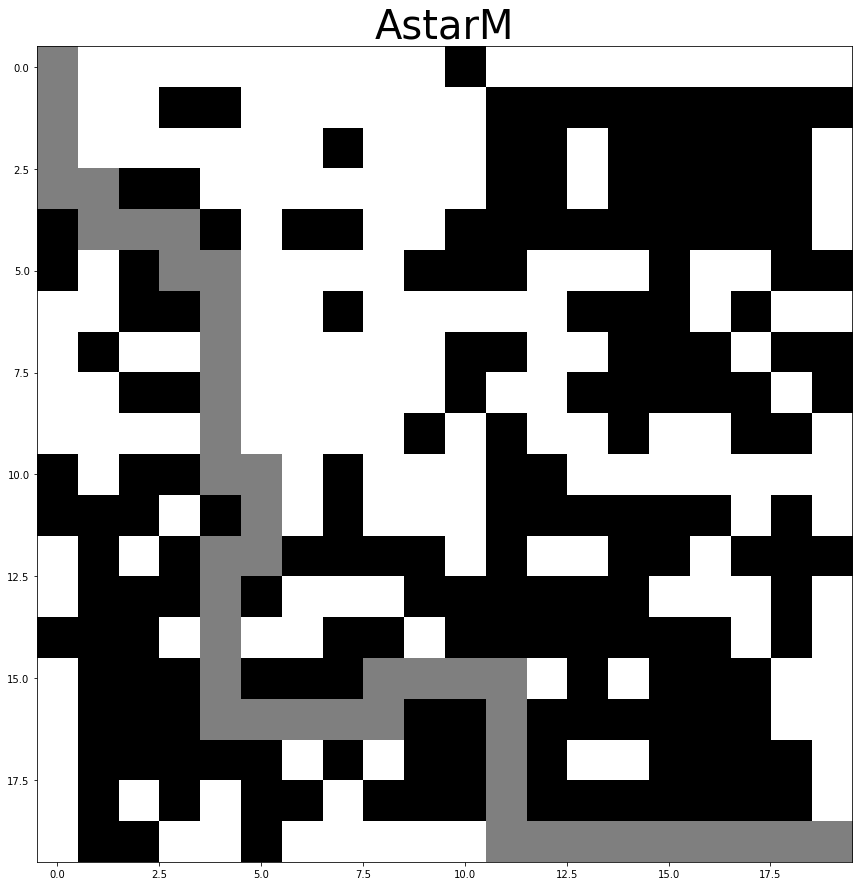

198 198
fails 0
SOLUTION FOUND


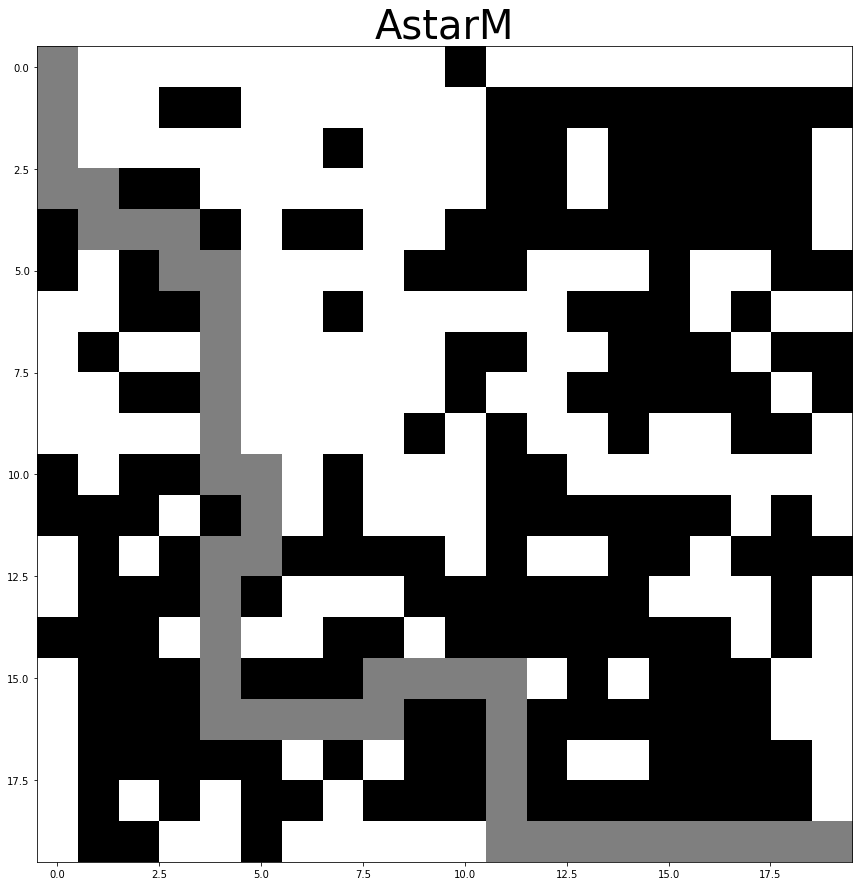

SOLUTION FOUND


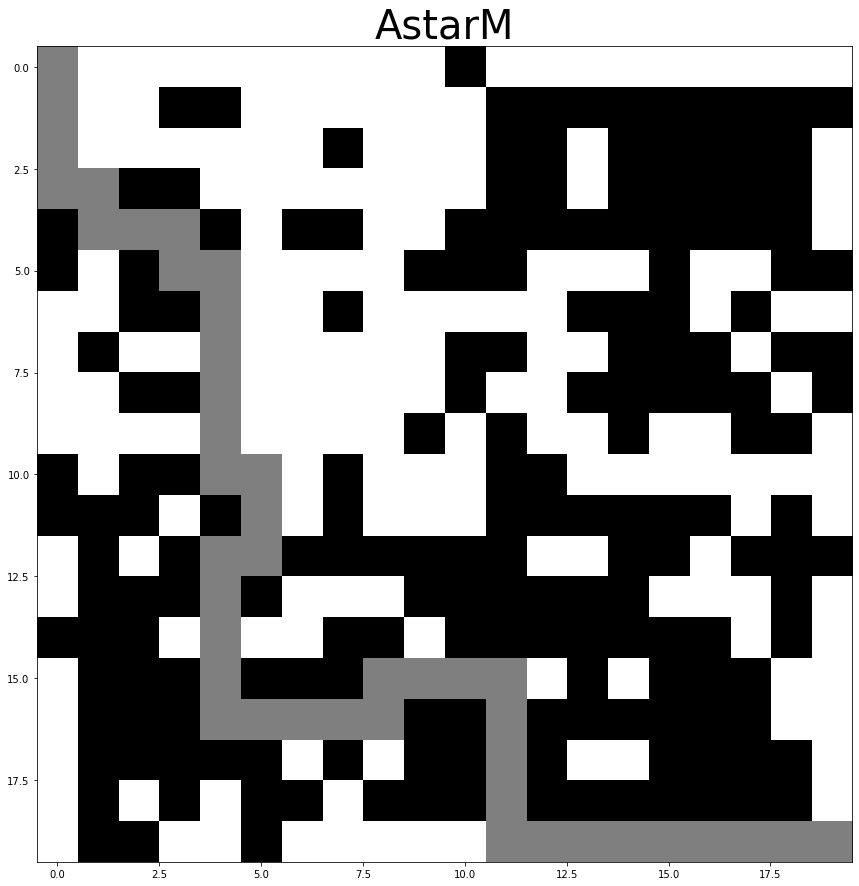

198 197
fails 1
SOLUTION FOUND


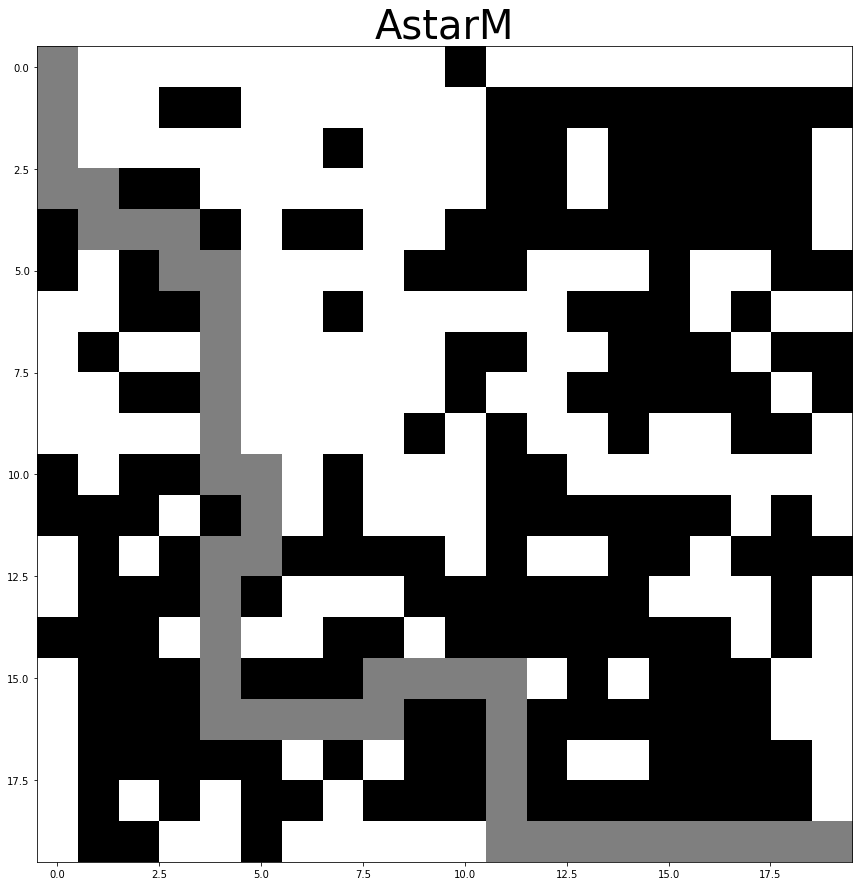

UNSOLVABLE


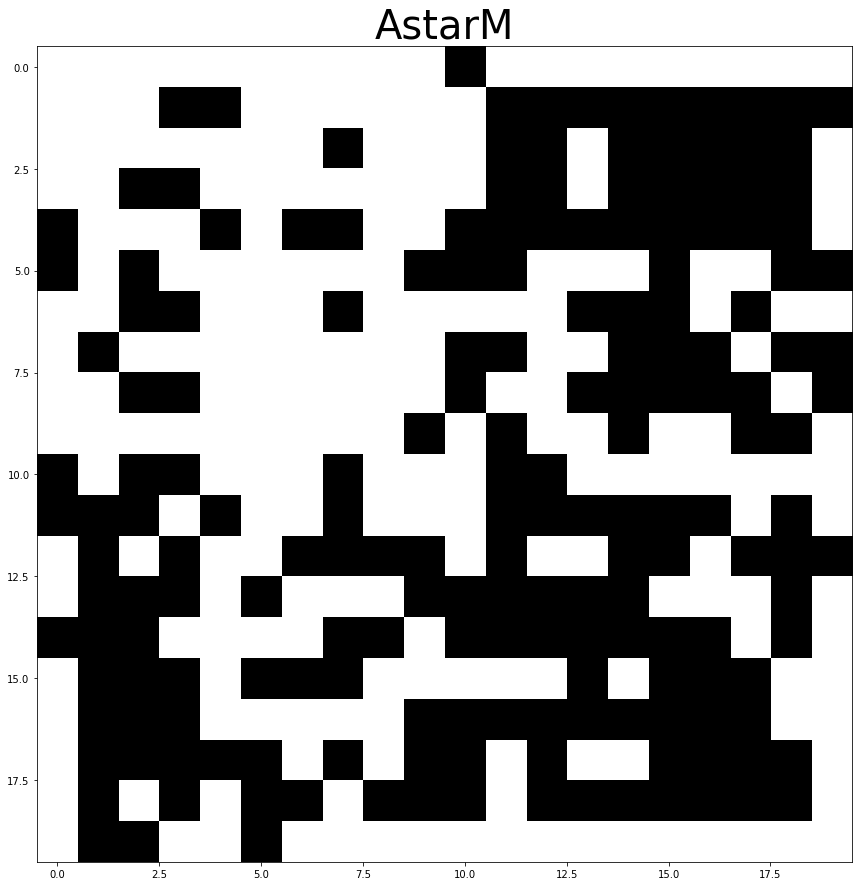

198 190
fails 2
SOLUTION FOUND


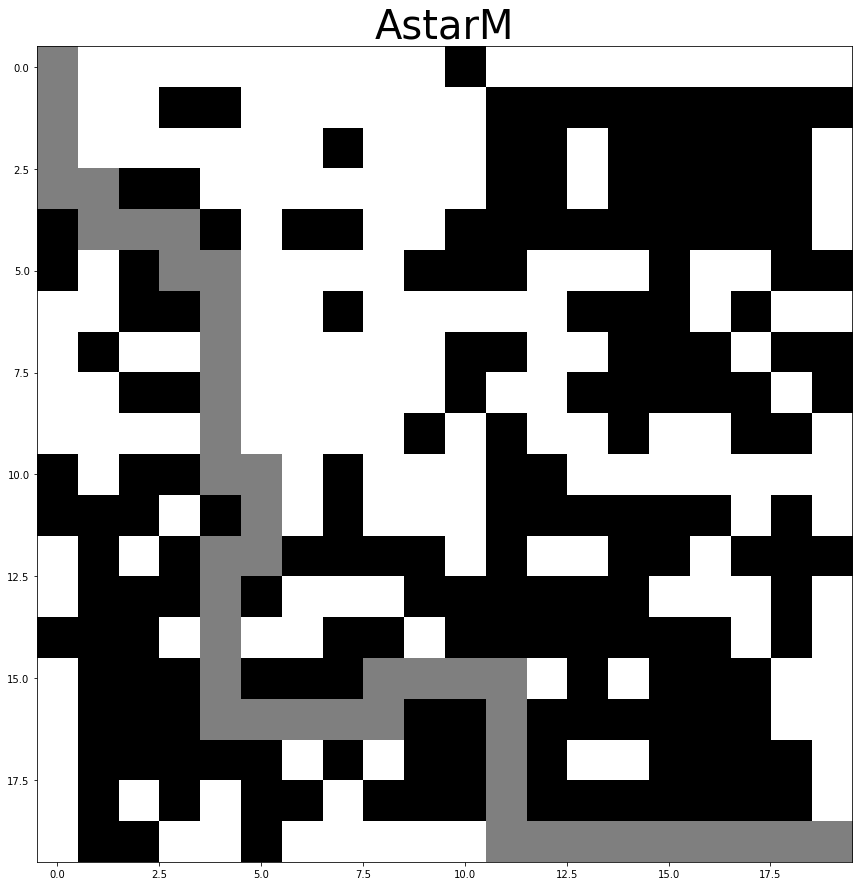

SOLUTION FOUND


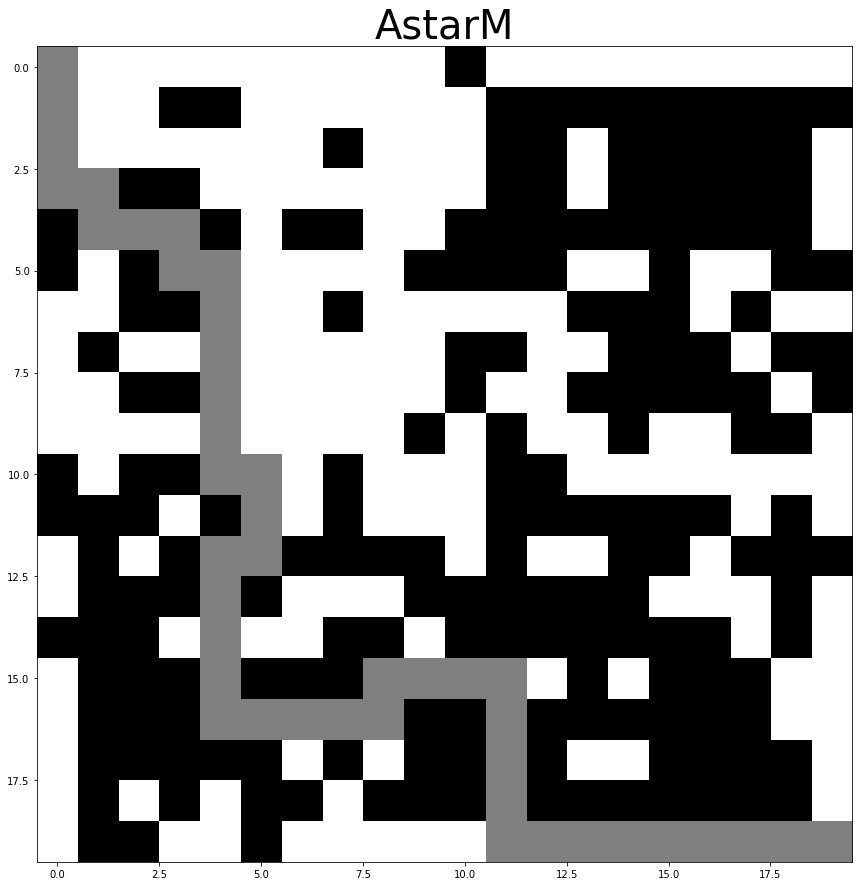

198 195
fails 3
SOLUTION FOUND


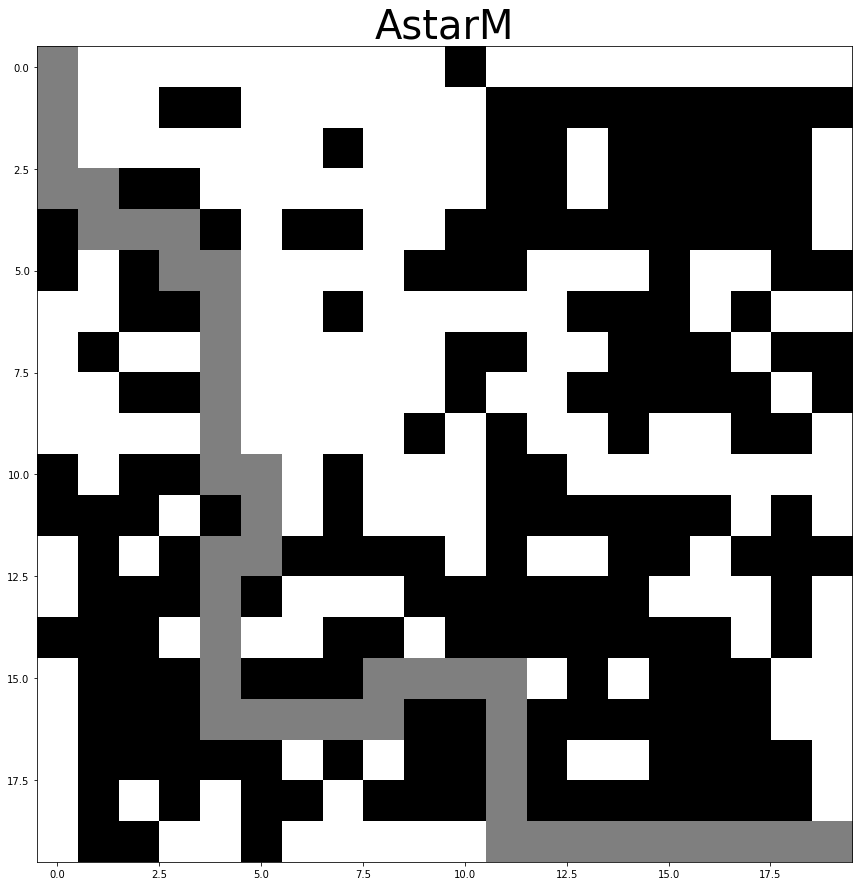

SOLUTION FOUND


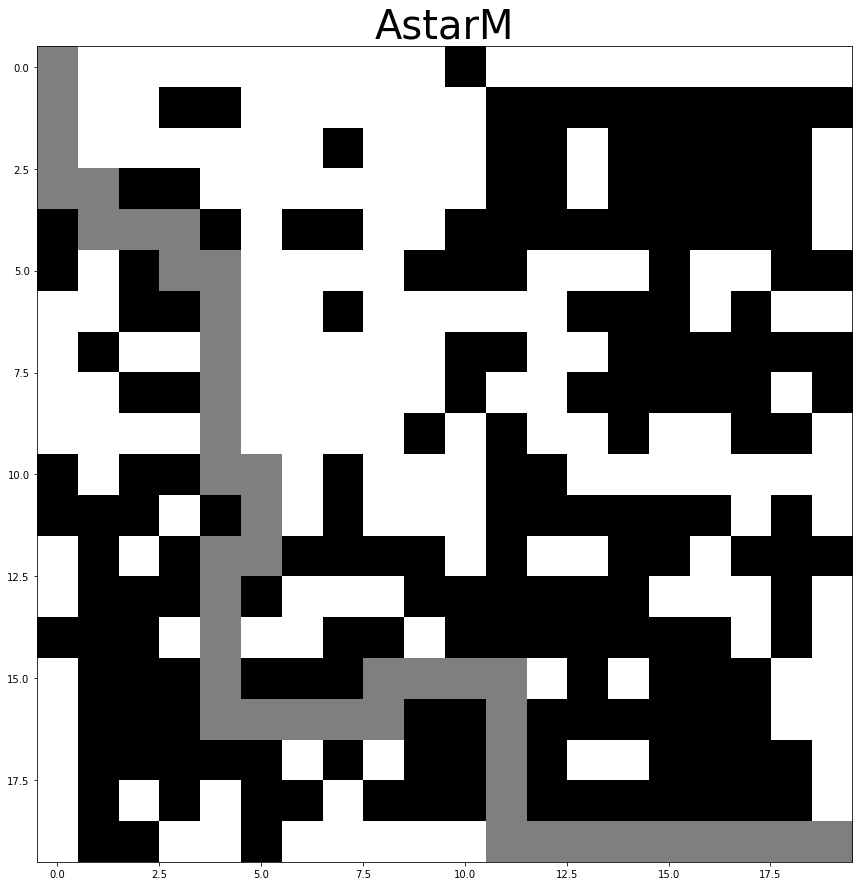

198 198
fails 0
SOLUTION FOUND


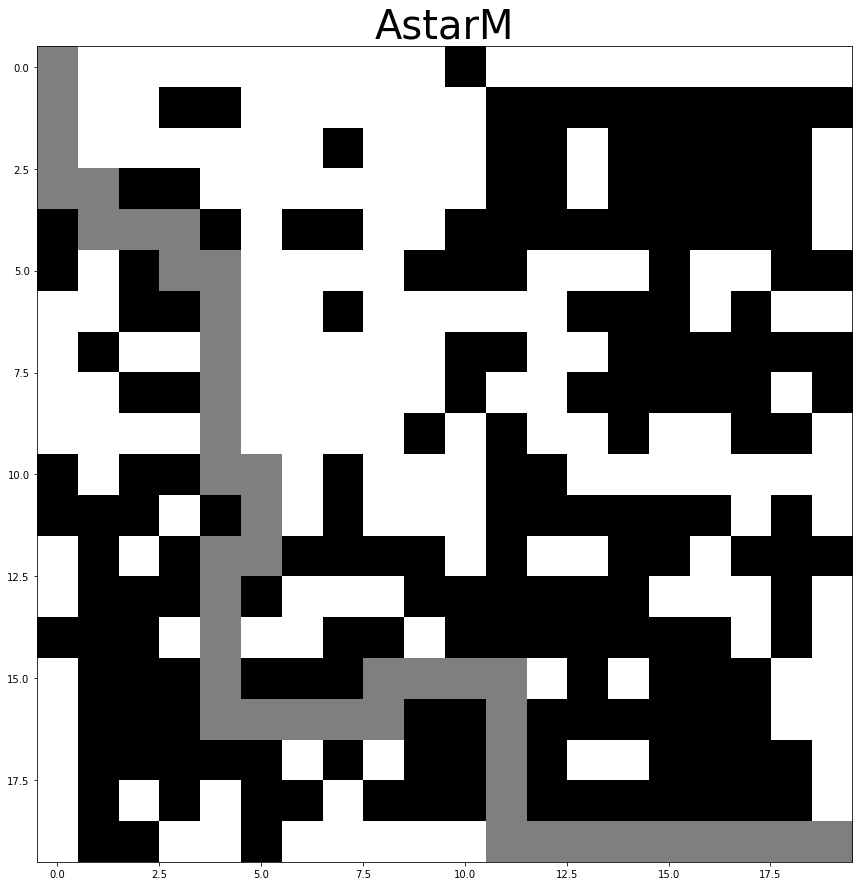

UNSOLVABLE


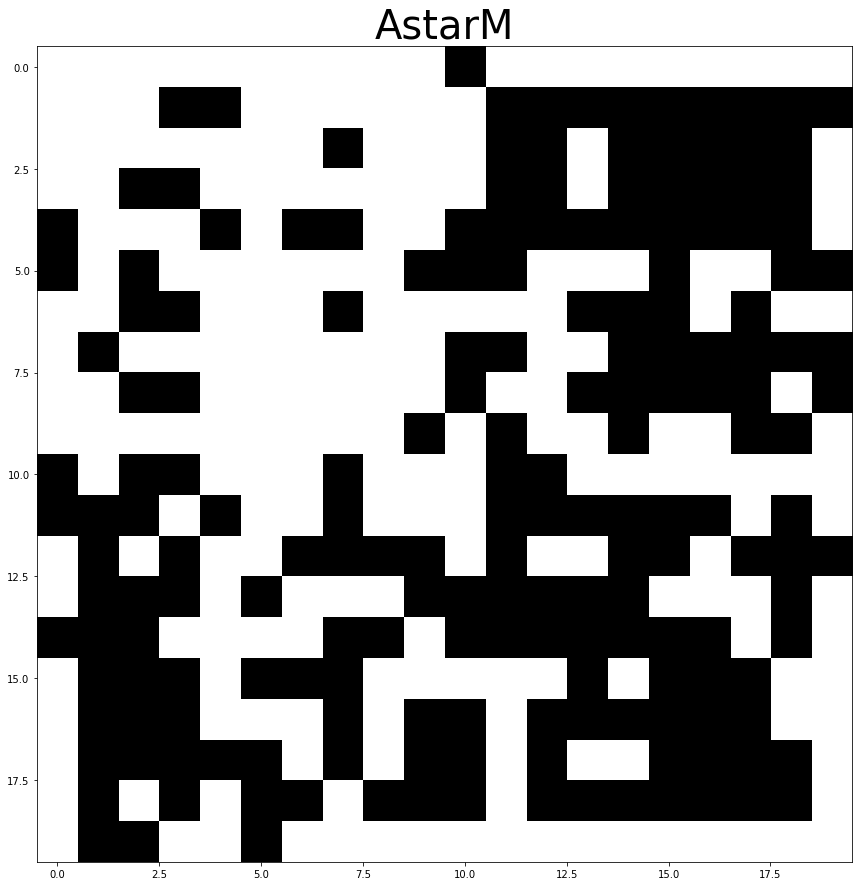

198 181
fails 1
SOLUTION FOUND


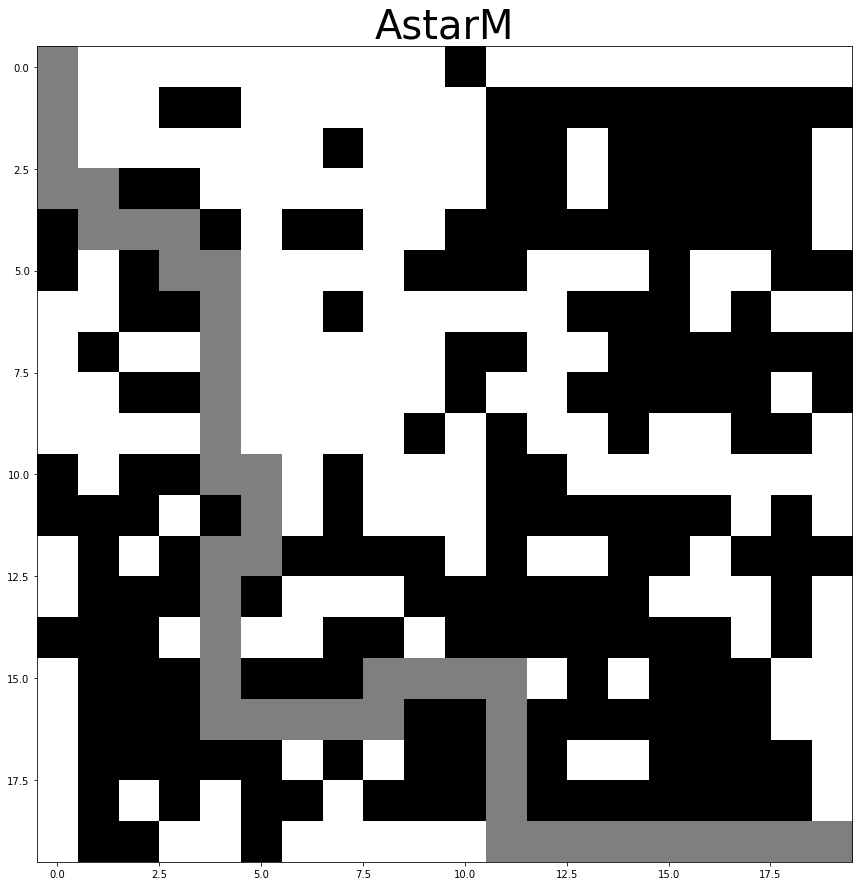

SOLUTION FOUND


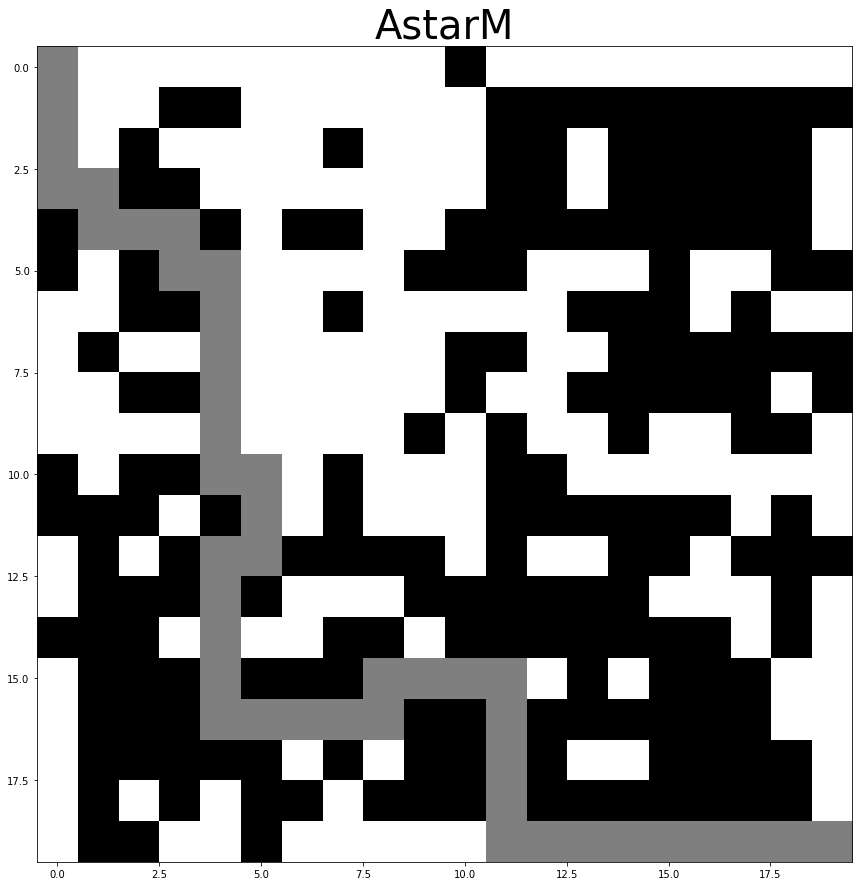

198 193
fails 2
SOLUTION FOUND


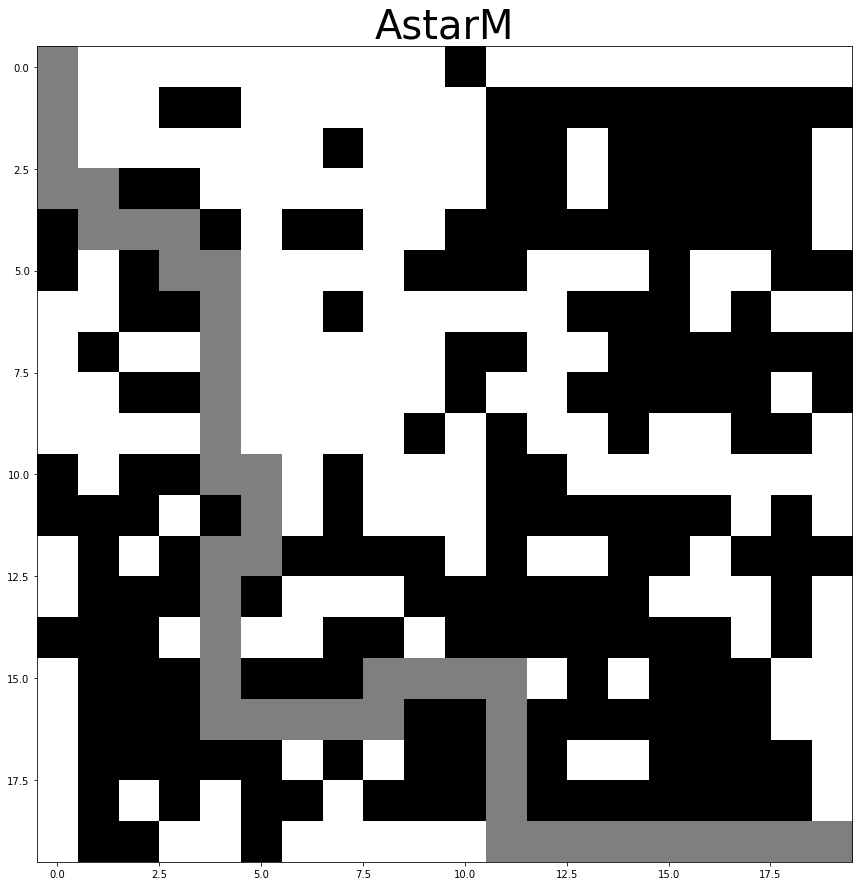

SOLUTION FOUND


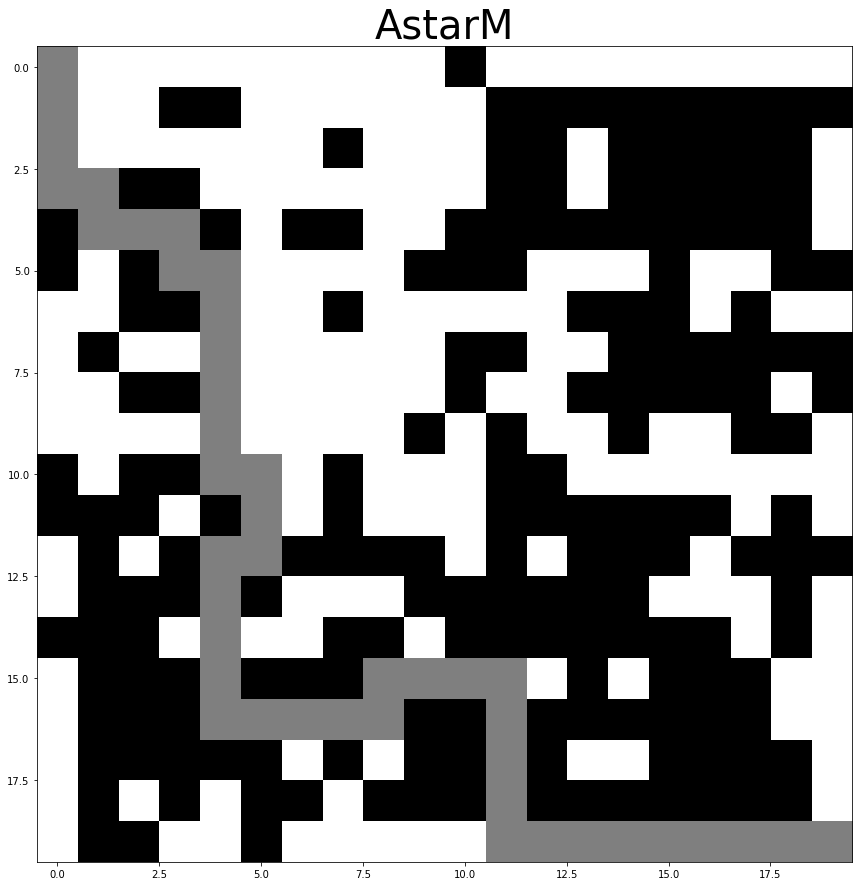

198 198
fails 0
SOLUTION FOUND


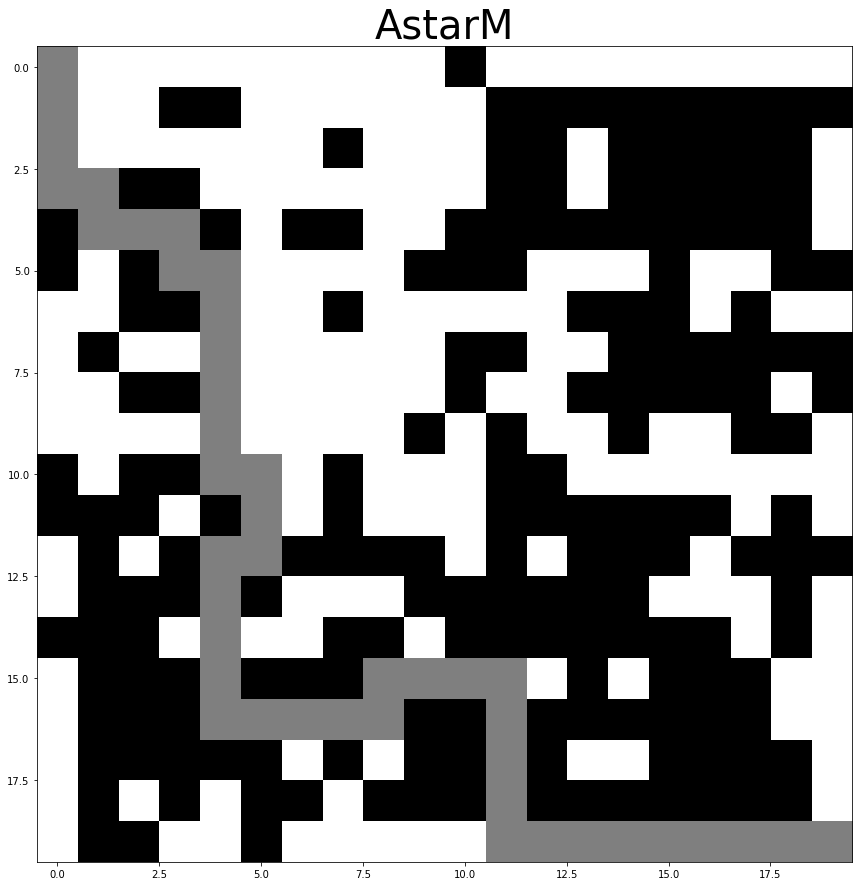

UNSOLVABLE


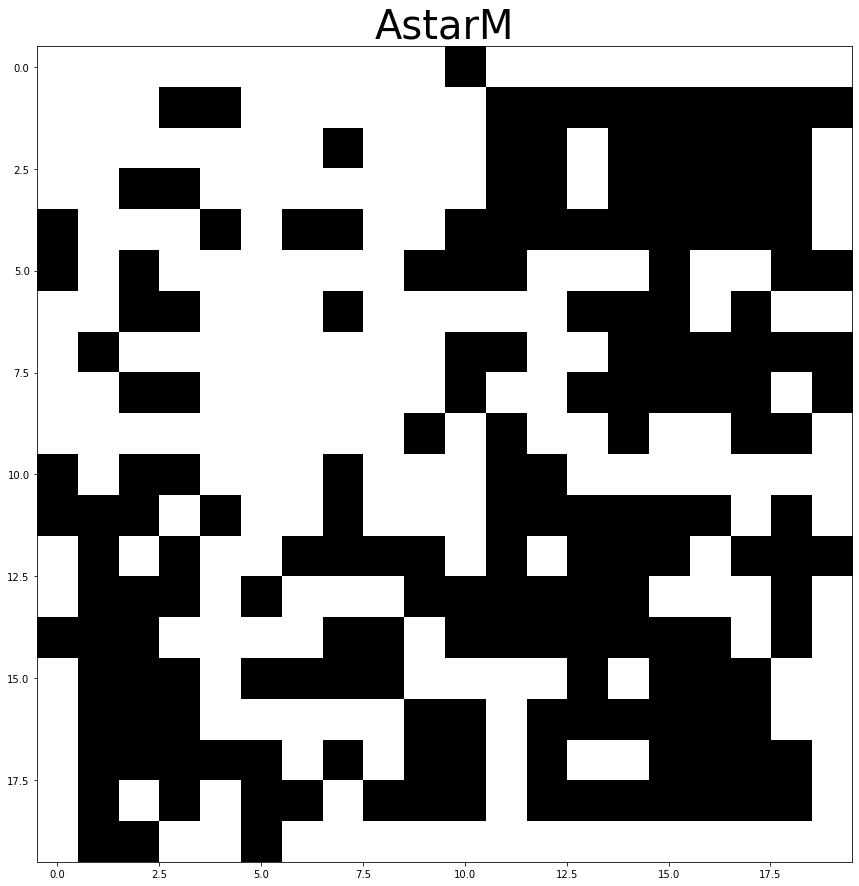

198 184
fails 1
SOLUTION FOUND


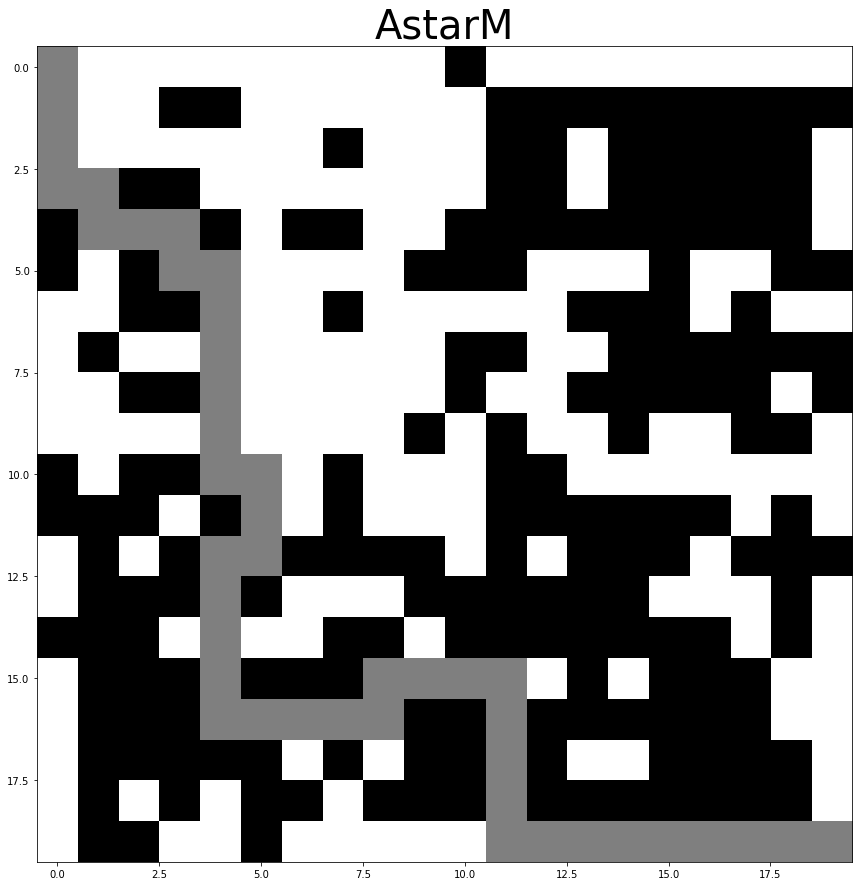

SOLUTION FOUND


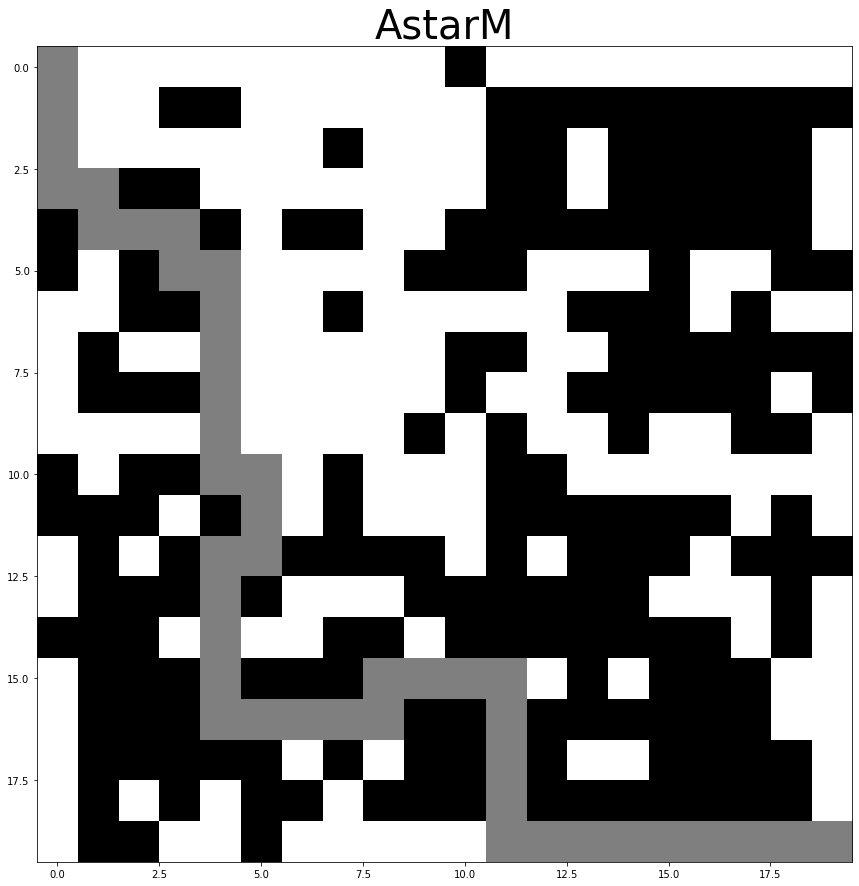

198 196
fails 2
SOLUTION FOUND


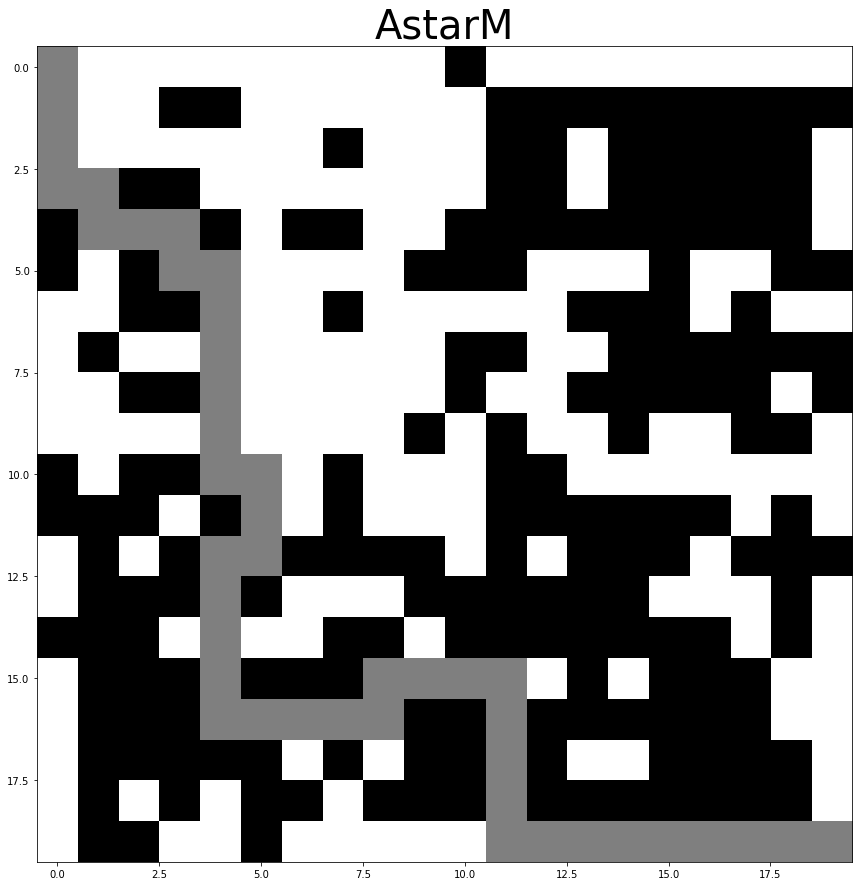

UNSOLVABLE


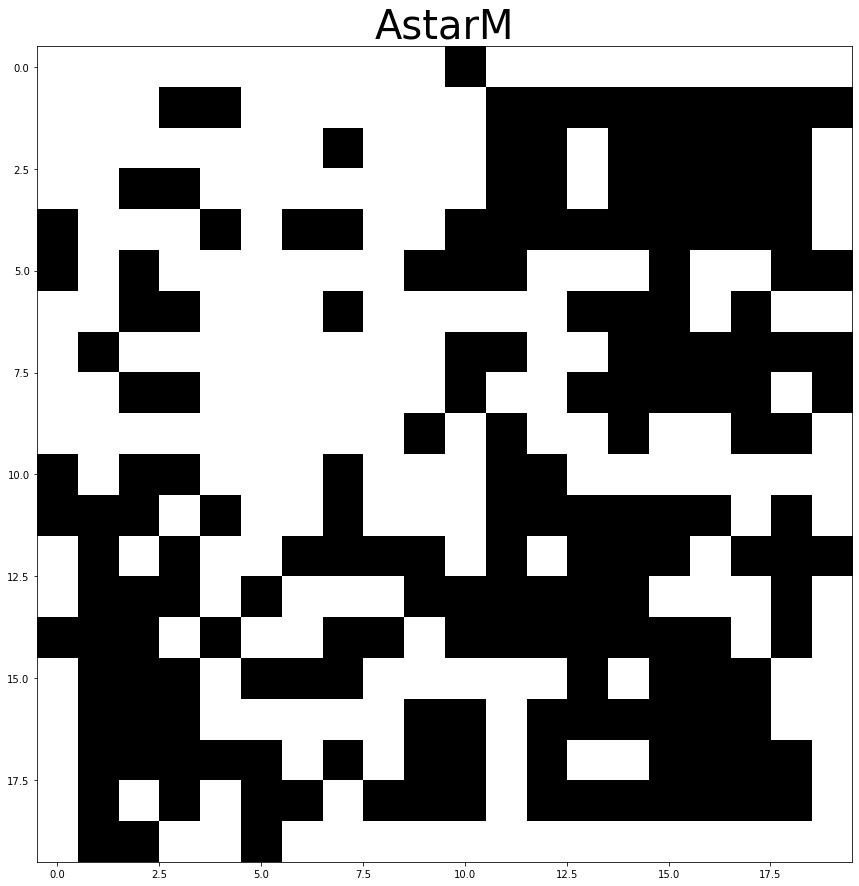

198 169
fails 3
SOLUTION FOUND


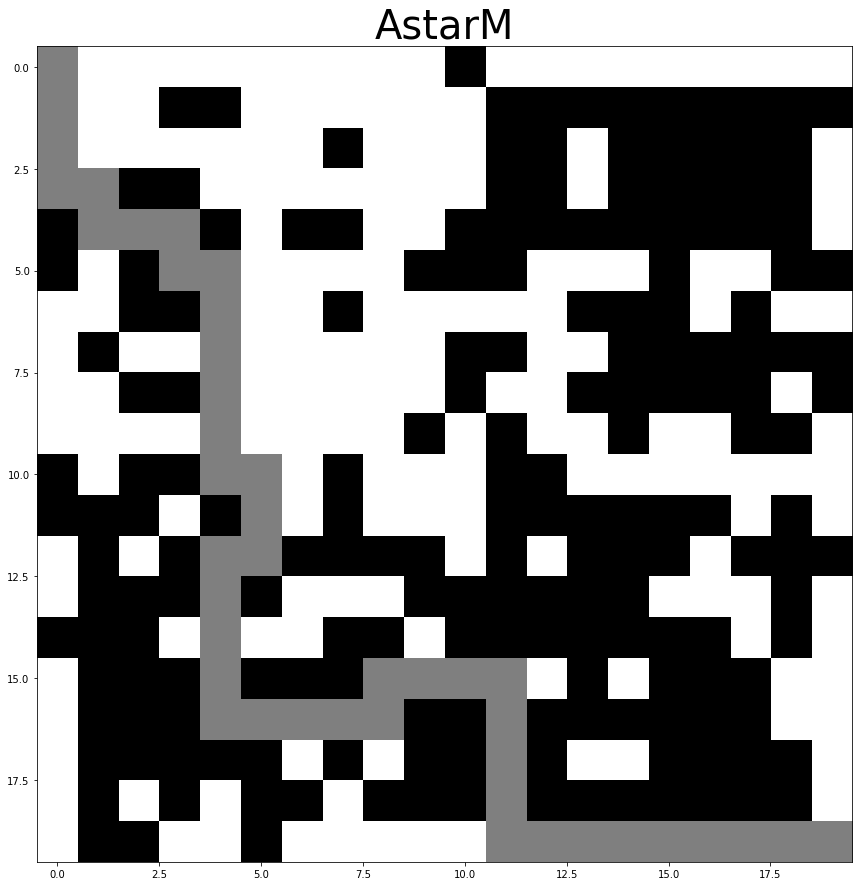

SOLUTION FOUND


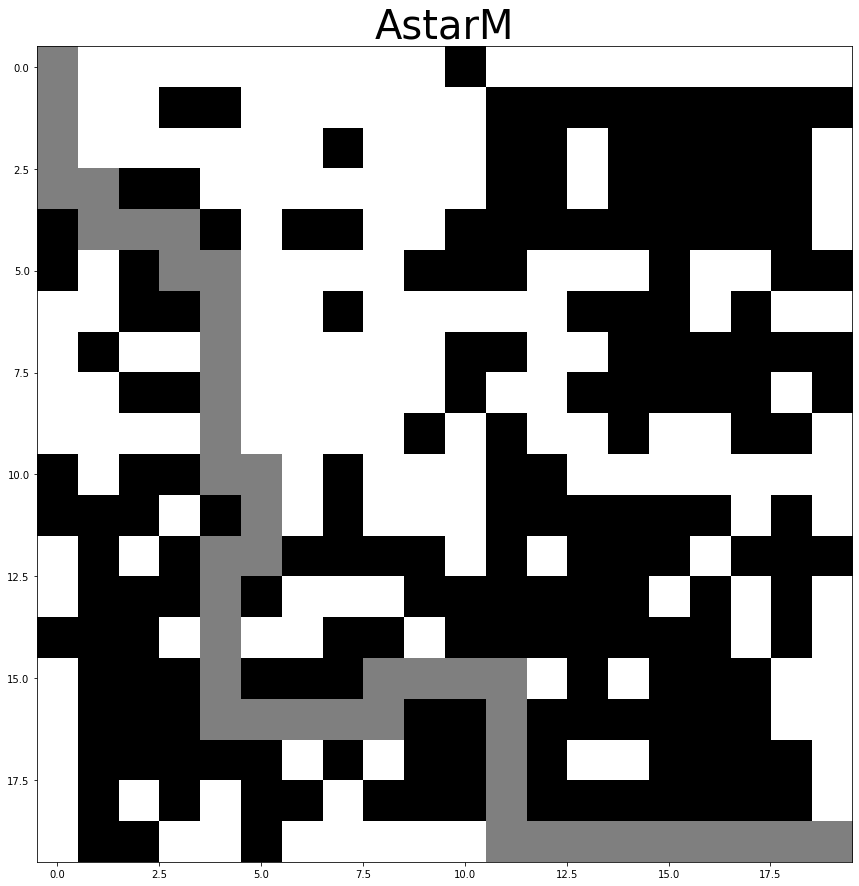

198 198
fails 0
SOLUTION FOUND


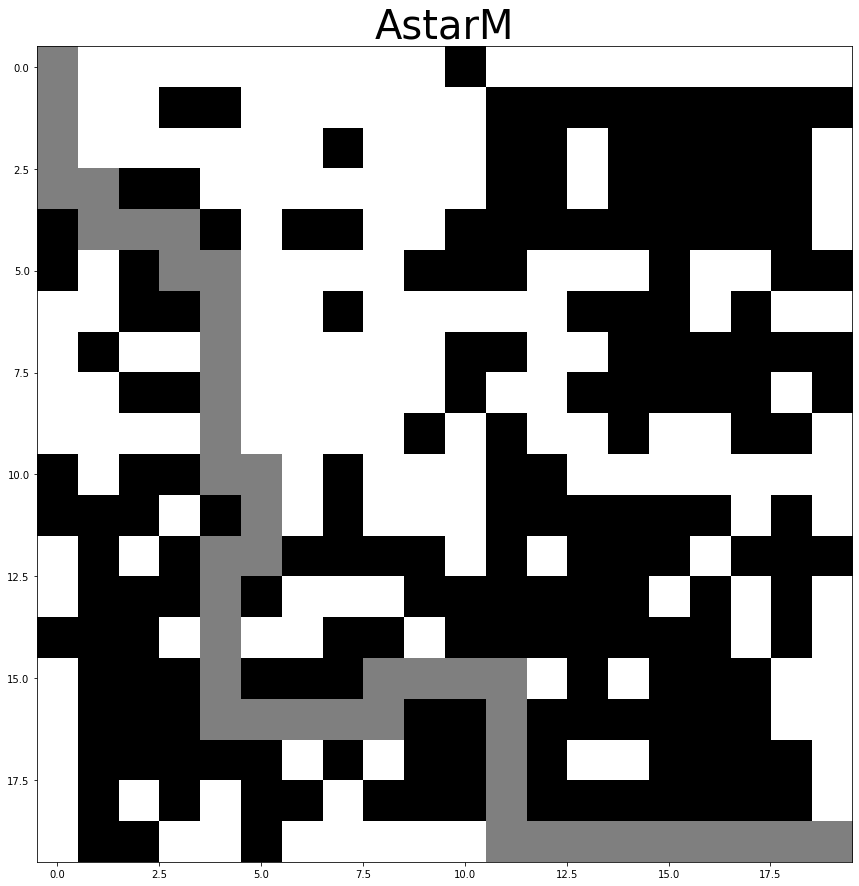

SOLUTION FOUND


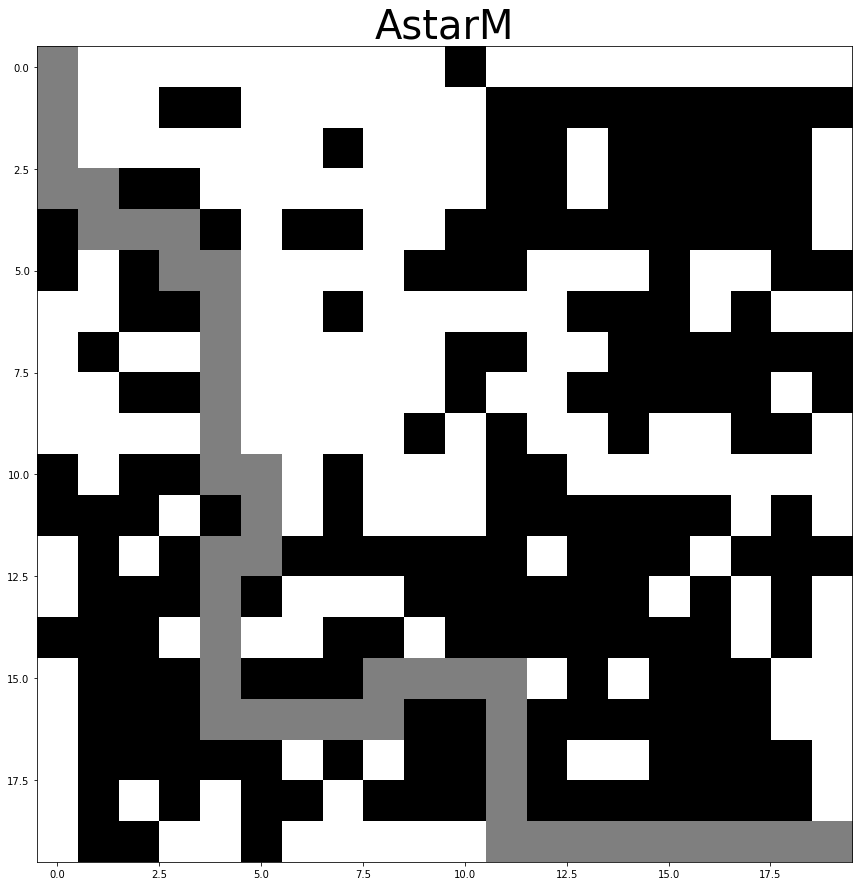

198 197
fails 1
SOLUTION FOUND


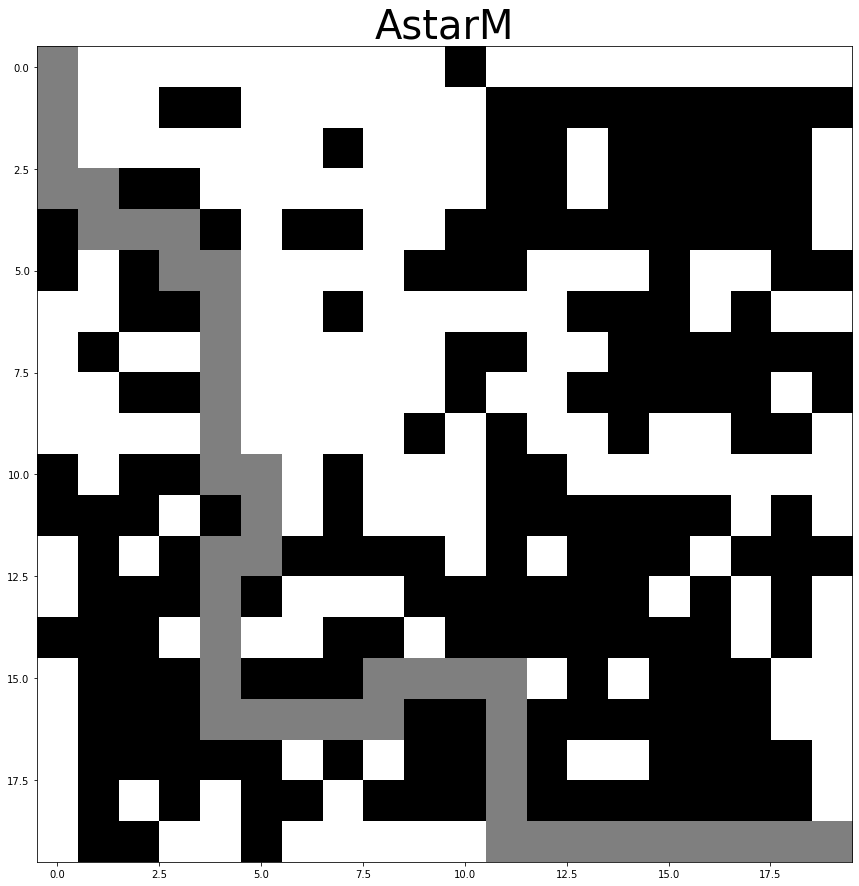

SOLUTION FOUND


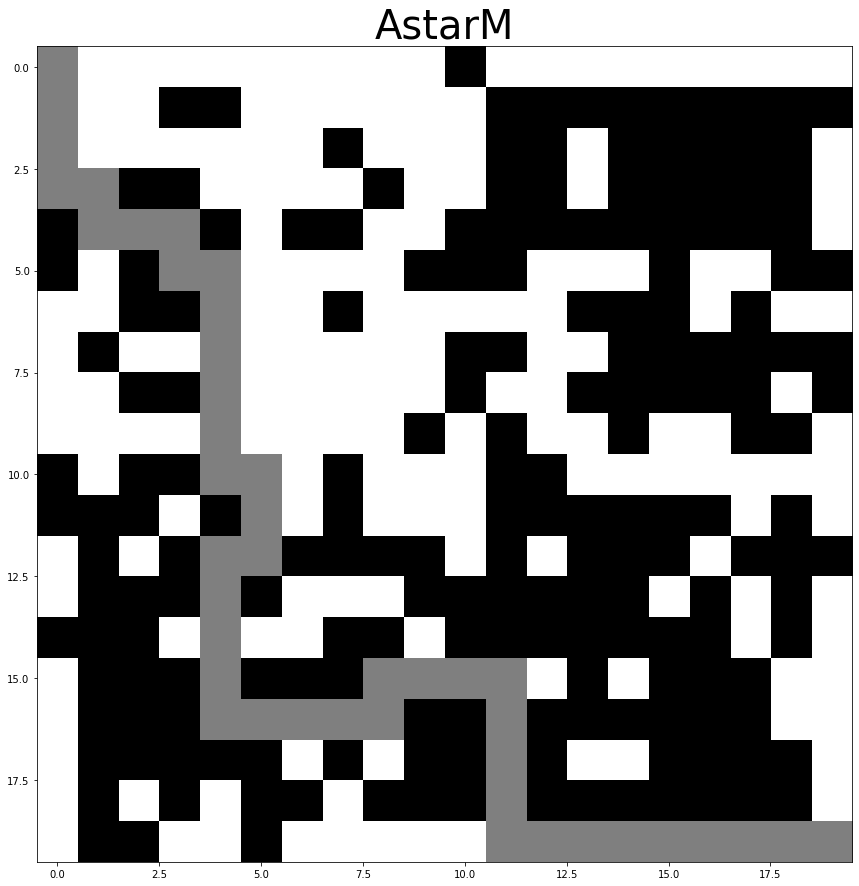

198 193
fails 2
SOLUTION FOUND


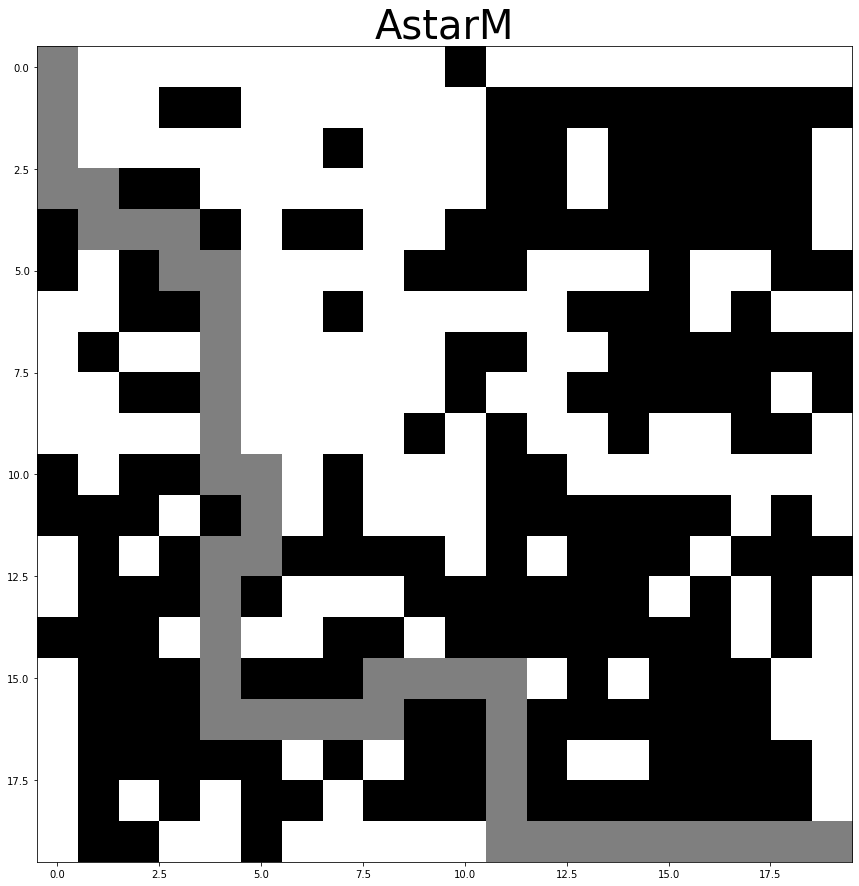

SOLUTION FOUND


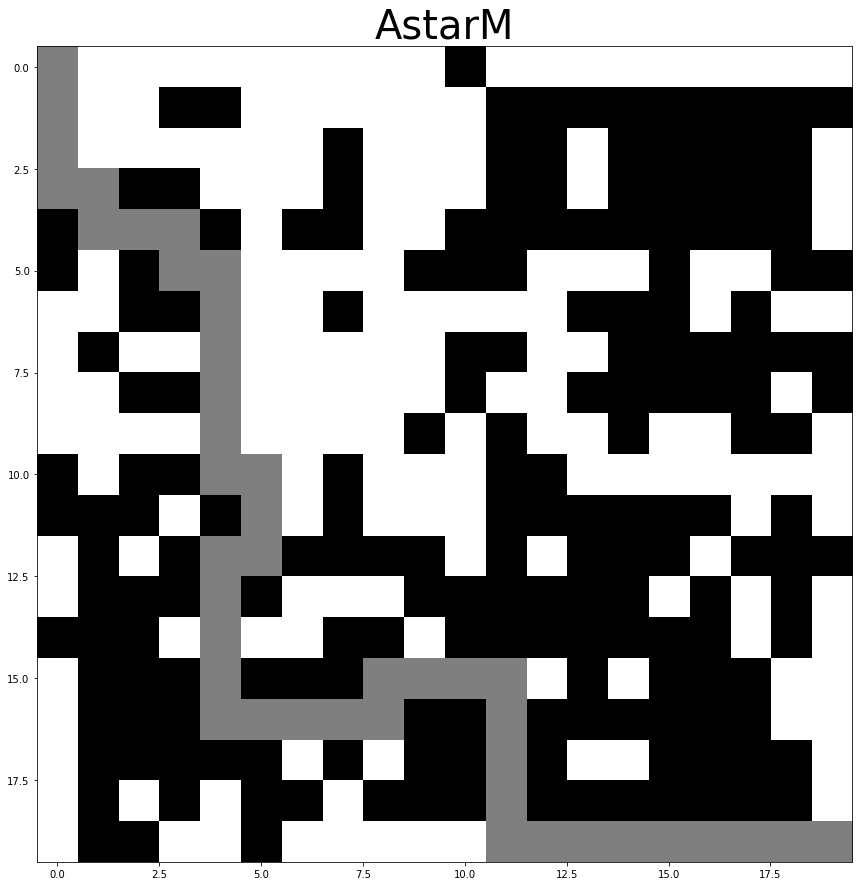

198 196
fails 3
SOLUTION FOUND


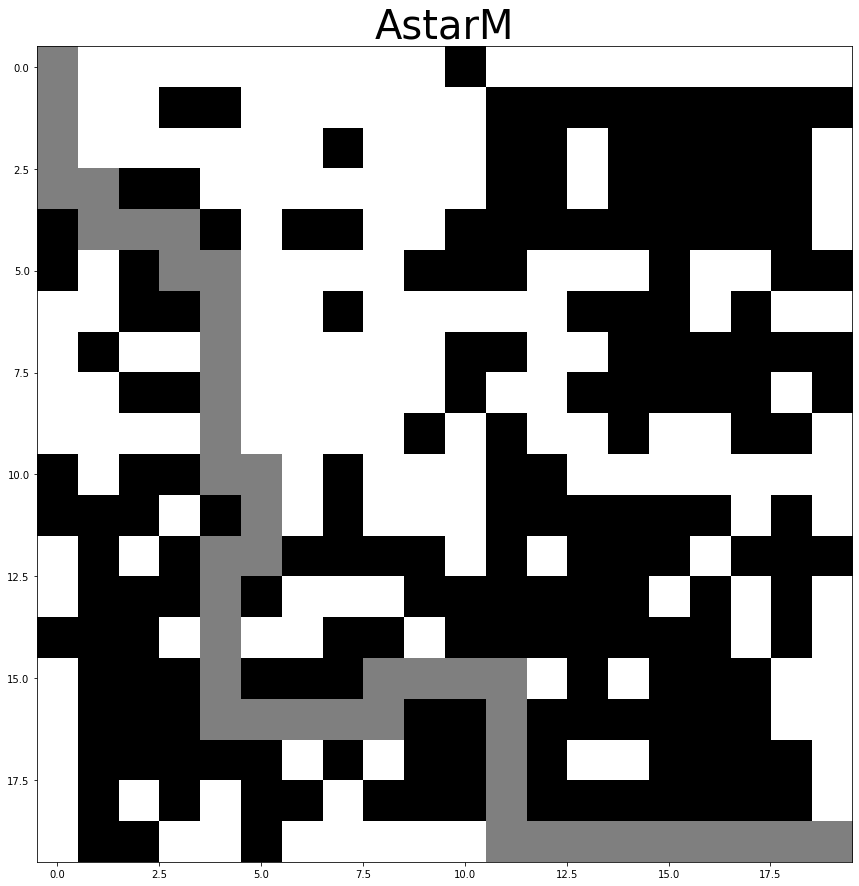

SOLUTION FOUND


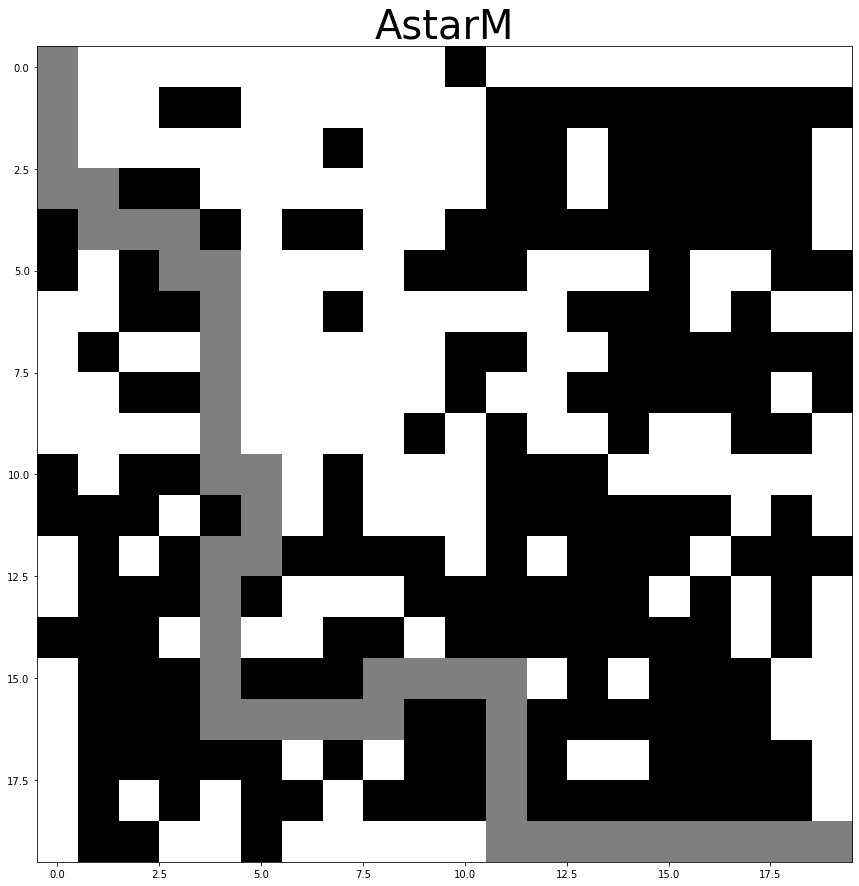

198 186
fails 4
SOLUTION FOUND


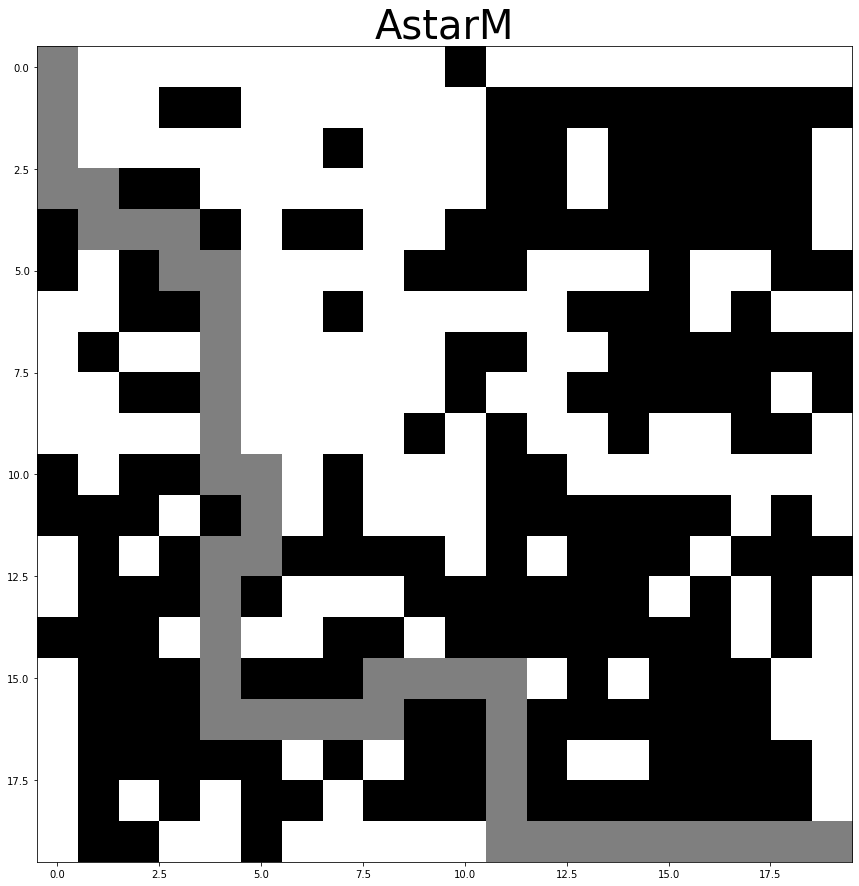

SOLUTION FOUND


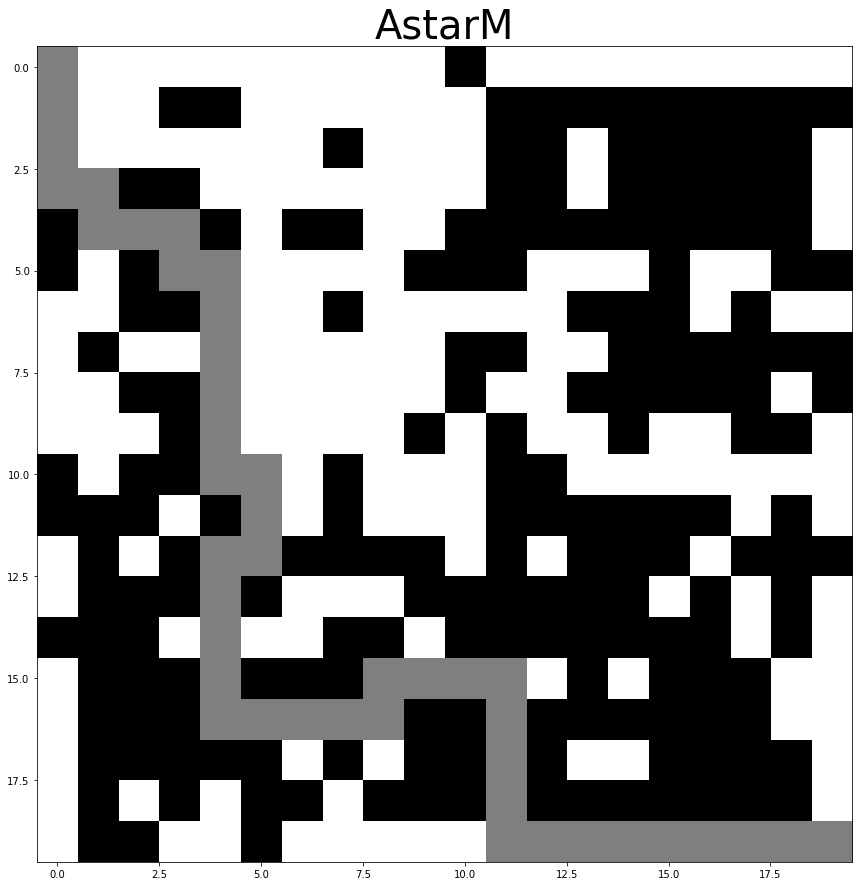

198 196
fails 5
SOLUTION FOUND


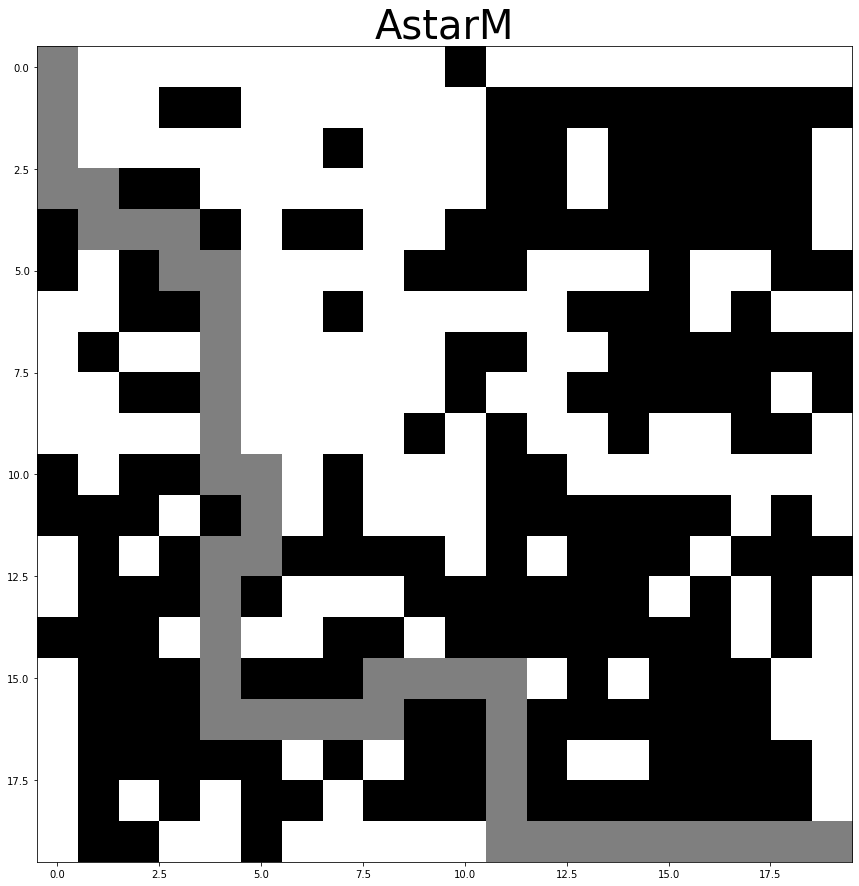

SOLUTION FOUND


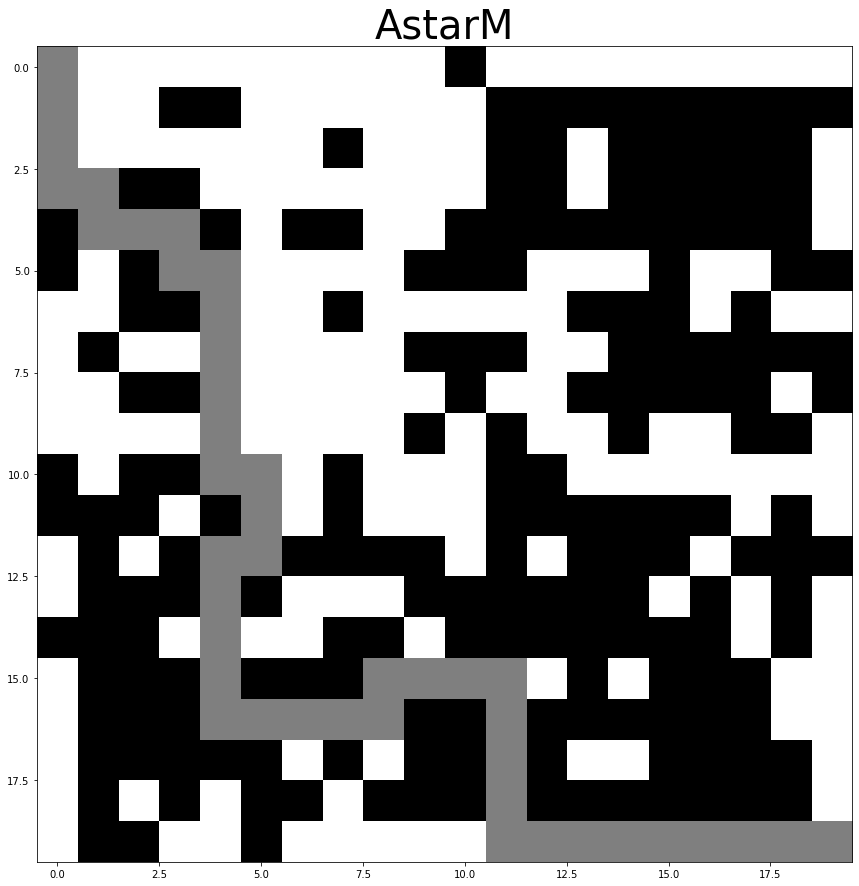

198 195
fails 6
SOLUTION FOUND


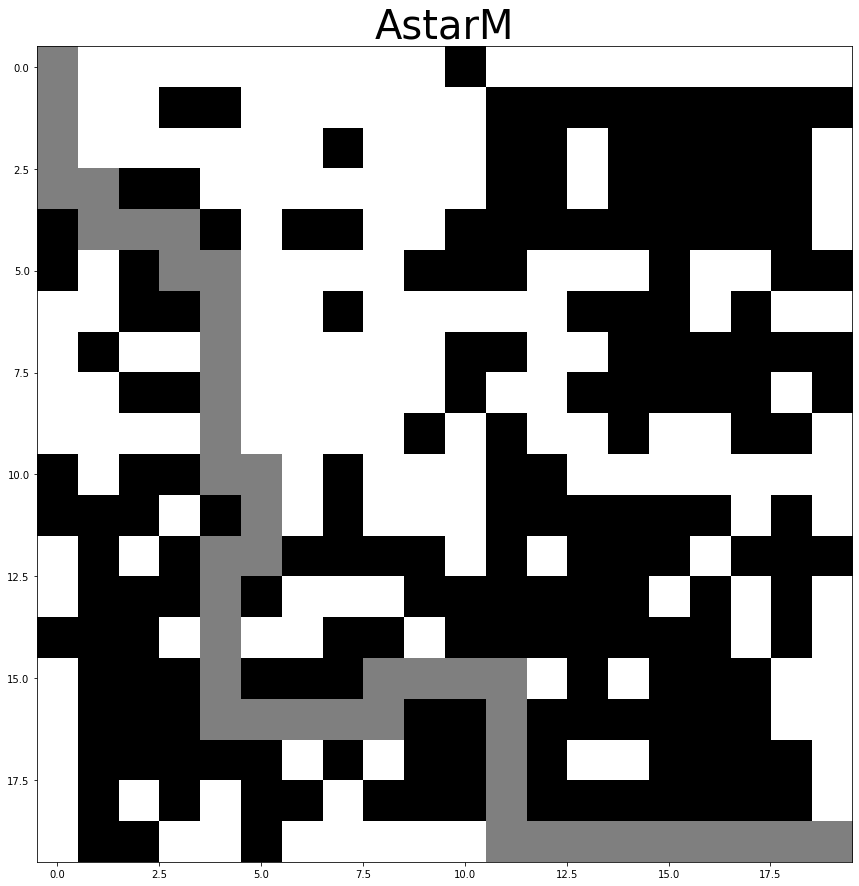

SOLUTION FOUND


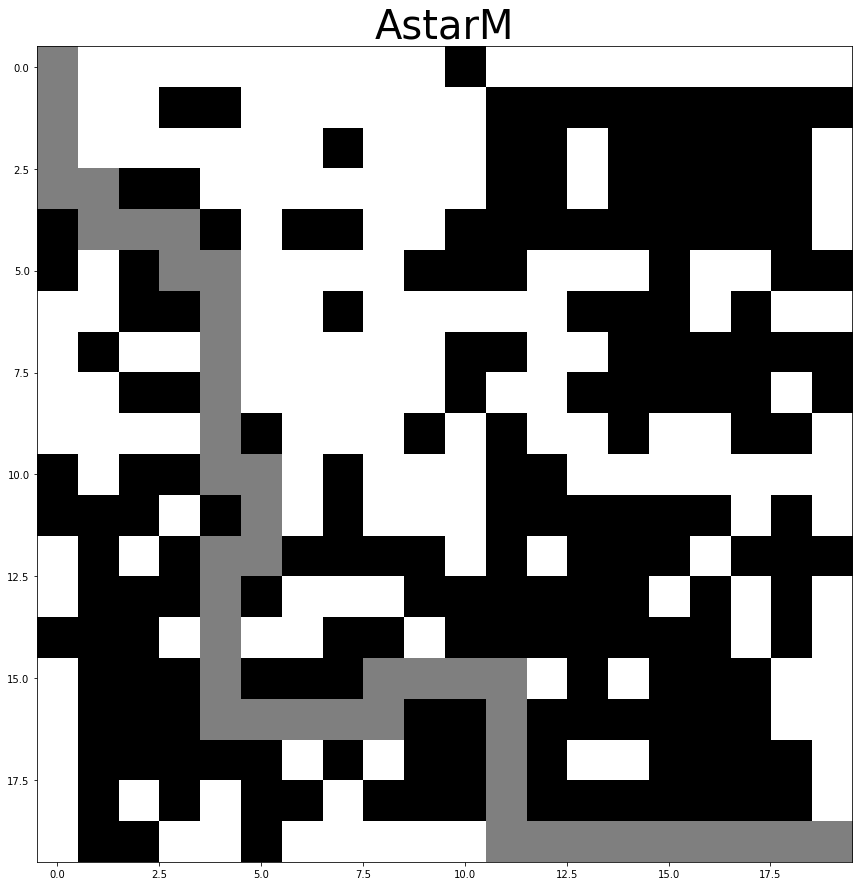

198 194
fails 7
SOLUTION FOUND


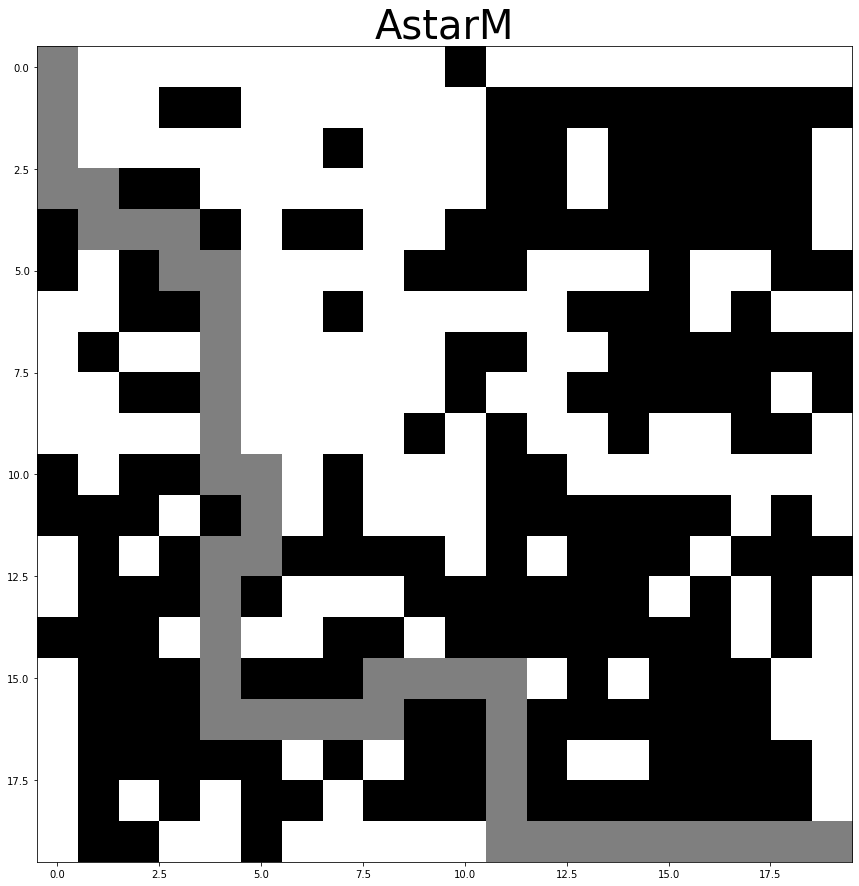

SOLUTION FOUND


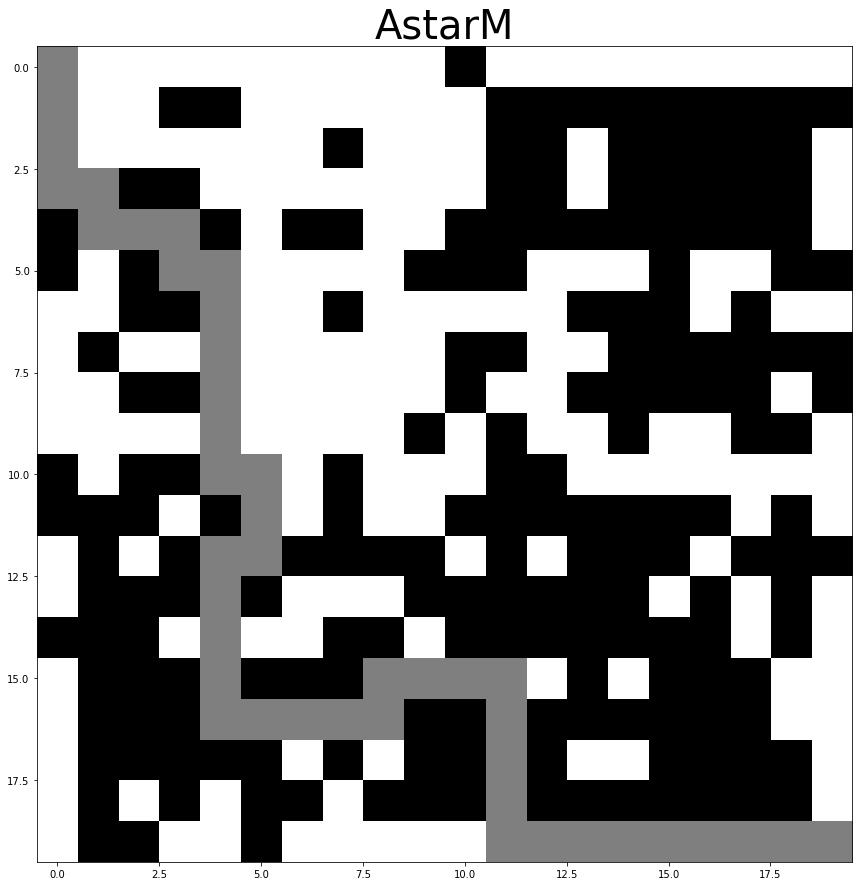

198 195
fails 8
SOLUTION FOUND


KeyboardInterrupt: 

In [72]:
#maze is filled with empty cells and obstacles
def hillClimbAstarM(maze,consec_fails):
    print('fails',consec_fails)
    #if more than 10 consecutive fails, we have reached local maxima 
    if consec_fails > 10:
        return maze
    else:
        mazeOriginal=np.copy(maze)
        maze2 = np.copy(maze)
        #call AstarM with original maze
        algo1=AstarM(maze2,video=False)
        #all nodes explored with original maze is stored into maxNode1
        maxNode1=algo1[2]
        #if AstarM is solvable
        if algo1[0]==1:
            y=random.random()
            #add obstacle
            while True:
                #find a cell at i,j 
                i=random.randint(1,len(maze)-2)
                j=random.randint(1,len(maze)-2)
                #if we pick a cell that already has obstacle, pass
                if maze[i][j]==1:
                    pass
                #if we pick an empty cell 
                else:
                    #obstacle added in empty cell
                    maze[i][j]=1
                    mazeEdited=np.copy(maze)
                    break
            
            #call AstarM with new maze
            algo2=AstarM(mazeEdited,video=False)
            #all nodes explored of edited maze
            maxNode2=algo2[2]
            print(maxNode1,maxNode2)
            #if manxNode of edited maze is more than that of original maze
            #and AstarM of edited maze is solvable, hillClimb with edited maze 
            if maxNode2>=maxNode1 and algo2[0] == 1:
                consec_fails=0
                return hillClimbAstarM(maze,consec_fails)
            else:
                #increase consecutive fails 
                consec_fails+=1
                return hillClimbAstarM(mazeOriginal,consec_fails)
    print('no solution')

a=hillClimbAstarM(grid(20,0.2),0)
print(a)

In [85]:
x = 2.66666666666
y='%.1f' % round(x, 1)
float(y)

2.7